### Transfer learning for Kaggle 120 dog breeds challenge
The goal for this project is to apply transfer learning using Pytorch to classify 120 dog breeds available on a Kaggle identification challenge (https://www.kaggle.com/c/dog-breed-identification). <br>

Ths notebook was based on Will Koehrsen Medium Article "Transfer Learning with Convolutional Network in Pytorch".(https://towardsdatascience.com/transfer-learning-with-convolutional-neural-networks-in-pytorch-dd09190245ce)

In [1]:
from IPython.core.interactiveshell import InteractiveShell
import seaborn as sns
# PyTorch
from torchvision import transforms, datasets, models
import torch
from torch import optim, cuda
from torch.utils.data import DataLoader, sampler
import torch.nn as nn

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Data science tools
import numpy as np
import pandas as pd
import os

# Image manipulations
from PIL import Image
# Useful for examining network
from torchsummary import summary
# Timing utility
from timeit import default_timer as timer

# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 14

# Printing out all outputs
InteractiveShell.ast_node_interactivity = 'all'

In [8]:
# Spliting the Dataset
datadir = "/home/gabriel/Dropbox/Dataset/dog-breed-identification/train"

In [9]:
import os
import shutil
os.chdir(datadir)

In [13]:
pwd

'/home/gabriel/Dropbox/Dataset/dog-breed-identification/train'

In [ ]:
# To split pictures only in train and valid

counter = 0
for file in os.listdir('.'):
    if counter < 15:
        if not os.path.isdir(f'../train_valid/valid/{folder}'):
            os.mkdir(f'../train_valid/valid/{folder}')
        shutil.copy(f'./{file}', f'../train_test_validate/valid/{folder}/{file}')
        counter += 1
    else:
        if not os.path.isdir(f'../train_valid/train/{folder}'):
            os.mkdir(f'../train_valid/train/{folder}')
        shutil.copy(f'./{file}', f'../train_test_validate/train/{folder}/{file}')


In [26]:
os.chdir('/home/gabriel/Documents/Datasets/stanford_dogs_dataset/images/stanford_images_processed')

In [27]:
pwd

'/home/gabriel/Documents/Datasets/stanford_dogs_dataset/images/stanford_images_processed'

In [31]:
for folder in os.listdir('.'):
    counter = 0
    for file in os.listdir(folder):
        
        if counter < 10:
            if not os.path.isdir(f'../train_test_valid/test/{folder}'):
                os.mkdir(f'../train_test_valid/test/{folder}')
            shutil.copy(f'{folder}/{file}', f'../train_test_valid/test/{folder}/{file}')
            counter += 1
        
        if counter < 20:
            if not os.path.isdir(f'../train_test_valid/valid/{folder}'):
                os.mkdir(f'../train_test_valid/valid/{folder}')
            shutil.copy(f'{folder}/{file}', f'../train_test_valid/valid/{folder}/{file}')
            counter += 1
        else:
            if not os.path.isdir(f'../train_test_valid/train/{folder}'):
                os.mkdir(f'../train_test_valid/train/{folder}')
            shutil.copy(f'{folder}/{file}', f'../train_test_valid/train/{folder}/{file}') 
            counter += 1


'../train_test_valid/test/schipperke/n02104365_6428.jpg'

'../train_test_valid/valid/schipperke/n02104365_6428.jpg'

'../train_test_valid/test/schipperke/n02104365_5781.jpg'

'../train_test_valid/valid/schipperke/n02104365_5781.jpg'

'../train_test_valid/test/schipperke/n02104365_7065.jpg'

'../train_test_valid/valid/schipperke/n02104365_7065.jpg'

'../train_test_valid/test/schipperke/n02104365_6575.jpg'

'../train_test_valid/valid/schipperke/n02104365_6575.jpg'

'../train_test_valid/test/schipperke/n02104365_2978.jpg'

'../train_test_valid/valid/schipperke/n02104365_2978.jpg'

'../train_test_valid/valid/schipperke/n02104365_7881.jpg'

'../train_test_valid/valid/schipperke/n02104365_8156.jpg'

'../train_test_valid/valid/schipperke/n02104365_9337.jpg'

'../train_test_valid/valid/schipperke/n02104365_4107.jpg'

'../train_test_valid/valid/schipperke/n02104365_8226.jpg'

'../train_test_valid/valid/schipperke/n02104365_6354.jpg'

'../train_test_valid/valid/schipperke/n02104365_9611.jpg'

'../train_test_valid/valid/schipperke/n02104365_8334.jpg'

'../train_test_valid/valid/schipperke/n02104365_740.jpg'

'../train_test_valid/valid/schipperke/n02104365_8161.jpg'

'../train_test_valid/train/schipperke/n02104365_2031.jpg'

'../train_test_valid/train/schipperke/n02104365_7643.jpg'

'../train_test_valid/train/schipperke/n02104365_481.jpg'

'../train_test_valid/train/schipperke/n02104365_10393.jpg'

'../train_test_valid/train/schipperke/n02104365_7409.jpg'

'../train_test_valid/train/schipperke/n02104365_6140.jpg'

'../train_test_valid/train/schipperke/n02104365_729.jpg'

'../train_test_valid/train/schipperke/n02104365_1166.jpg'

'../train_test_valid/train/schipperke/n02104365_169.jpg'

'../train_test_valid/train/schipperke/n02104365_9873.jpg'

'../train_test_valid/train/schipperke/n02104365_7629.jpg'

'../train_test_valid/train/schipperke/n02104365_2981.jpg'

'../train_test_valid/train/schipperke/n02104365_7518.jpg'

'../train_test_valid/train/schipperke/n02104365_5551.jpg'

'../train_test_valid/train/schipperke/n02104365_6693.jpg'

'../train_test_valid/train/schipperke/n02104365_4190.jpg'

'../train_test_valid/train/schipperke/n02104365_7158.jpg'

'../train_test_valid/train/schipperke/n02104365_3950.jpg'

'../train_test_valid/train/schipperke/n02104365_8398.jpg'

'../train_test_valid/train/schipperke/n02104365_9131.jpg'

'../train_test_valid/train/schipperke/n02104365_10282.jpg'

'../train_test_valid/train/schipperke/n02104365_8998.jpg'

'../train_test_valid/train/schipperke/n02104365_6927.jpg'

'../train_test_valid/train/schipperke/n02104365_2092.jpg'

'../train_test_valid/train/schipperke/n02104365_6625.jpg'

'../train_test_valid/train/schipperke/n02104365_1325.jpg'

'../train_test_valid/train/schipperke/n02104365_9248.jpg'

'../train_test_valid/train/schipperke/n02104365_6199.jpg'

'../train_test_valid/train/schipperke/n02104365_996.jpg'

'../train_test_valid/train/schipperke/n02104365_10606.jpg'

'../train_test_valid/train/schipperke/n02104365_6291.jpg'

'../train_test_valid/train/schipperke/n02104365_7906.jpg'

'../train_test_valid/train/schipperke/n02104365_6551.jpg'

'../train_test_valid/train/schipperke/n02104365_6755.jpg'

'../train_test_valid/train/schipperke/n02104365_10139.jpg'

'../train_test_valid/train/schipperke/n02104365_5970.jpg'

'../train_test_valid/train/schipperke/n02104365_6930.jpg'

'../train_test_valid/train/schipperke/n02104365_9309.jpg'

'../train_test_valid/train/schipperke/n02104365_2940.jpg'

'../train_test_valid/train/schipperke/n02104365_7018.jpg'

'../train_test_valid/train/schipperke/n02104365_6395.jpg'

'../train_test_valid/train/schipperke/n02104365_330.jpg'

'../train_test_valid/train/schipperke/n02104365_7887.jpg'

'../train_test_valid/train/schipperke/n02104365_9712.jpg'

'../train_test_valid/train/schipperke/n02104365_8451.jpg'

'../train_test_valid/train/schipperke/n02104365_10252.jpg'

'../train_test_valid/train/schipperke/n02104365_6527.jpg'

'../train_test_valid/train/schipperke/n02104365_6798.jpg'

'../train_test_valid/train/schipperke/n02104365_6800.jpg'

'../train_test_valid/train/schipperke/n02104365_9552.jpg'

'../train_test_valid/train/schipperke/n02104365_7892.jpg'

'../train_test_valid/train/schipperke/n02104365_6529.jpg'

'../train_test_valid/train/schipperke/n02104365_427.jpg'

'../train_test_valid/train/schipperke/n02104365_663.jpg'

'../train_test_valid/train/schipperke/n02104365_3383.jpg'

'../train_test_valid/train/schipperke/n02104365_9255.jpg'

'../train_test_valid/train/schipperke/n02104365_7377.jpg'

'../train_test_valid/train/schipperke/n02104365_9916.jpg'

'../train_test_valid/train/schipperke/n02104365_7366.jpg'

'../train_test_valid/train/schipperke/n02104365_9640.jpg'

'../train_test_valid/train/schipperke/n02104365_9639.jpg'

'../train_test_valid/train/schipperke/n02104365_465.jpg'

'../train_test_valid/train/schipperke/n02104365_9004.jpg'

'../train_test_valid/train/schipperke/n02104365_7927.jpg'

'../train_test_valid/train/schipperke/n02104365_3587.jpg'

'../train_test_valid/train/schipperke/n02104365_999.jpg'

'../train_test_valid/train/schipperke/n02104365_7368.jpg'

'../train_test_valid/train/schipperke/n02104365_5967.jpg'

'../train_test_valid/train/schipperke/n02104365_7768.jpg'

'../train_test_valid/train/schipperke/n02104365_8190.jpg'

'../train_test_valid/train/schipperke/n02104365_1158.jpg'

'../train_test_valid/train/schipperke/n02104365_9354.jpg'

'../train_test_valid/train/schipperke/n02104365_4258.jpg'

'../train_test_valid/train/schipperke/n02104365_3826.jpg'

'../train_test_valid/train/schipperke/n02104365_9954.jpg'

'../train_test_valid/train/schipperke/n02104365_6489.jpg'

'../train_test_valid/train/schipperke/n02104365_10514.jpg'

'../train_test_valid/train/schipperke/n02104365_7859.jpg'

'../train_test_valid/train/schipperke/n02104365_1822.jpg'

'../train_test_valid/train/schipperke/n02104365_6498.jpg'

'../train_test_valid/train/schipperke/n02104365_5411.jpg'

'../train_test_valid/train/schipperke/n02104365_10071.jpg'

'../train_test_valid/train/schipperke/n02104365_7431.jpg'

'../train_test_valid/train/schipperke/n02104365_8119.jpg'

'../train_test_valid/train/schipperke/n02104365_7546.jpg'

'../train_test_valid/train/schipperke/n02104365_10319.jpg'

'../train_test_valid/train/schipperke/n02104365_8466.jpg'

'../train_test_valid/train/schipperke/n02104365_9143.jpg'

'../train_test_valid/train/schipperke/n02104365_8525.jpg'

'../train_test_valid/train/schipperke/n02104365_6131.jpg'

'../train_test_valid/train/schipperke/n02104365_5670.jpg'

'../train_test_valid/train/schipperke/n02104365_6647.jpg'

'../train_test_valid/train/schipperke/n02104365_9399.jpg'

'../train_test_valid/train/schipperke/n02104365_1841.jpg'

'../train_test_valid/train/schipperke/n02104365_2263.jpg'

'../train_test_valid/train/schipperke/n02104365_7301.jpg'

'../train_test_valid/train/schipperke/n02104365_482.jpg'

'../train_test_valid/train/schipperke/n02104365_6384.jpg'

'../train_test_valid/train/schipperke/n02104365_2435.jpg'

'../train_test_valid/train/schipperke/n02104365_725.jpg'

'../train_test_valid/train/schipperke/n02104365_2424.jpg'

'../train_test_valid/train/schipperke/n02104365_8769.jpg'

'../train_test_valid/train/schipperke/n02104365_675.jpg'

'../train_test_valid/train/schipperke/n02104365_1151.jpg'

'../train_test_valid/train/schipperke/n02104365_9994.jpg'

'../train_test_valid/train/schipperke/n02104365_1837.jpg'

'../train_test_valid/train/schipperke/n02104365_7822.jpg'

'../train_test_valid/train/schipperke/n02104365_9595.jpg'

'../train_test_valid/train/schipperke/n02104365_3649.jpg'

'../train_test_valid/train/schipperke/n02104365_8630.jpg'

'../train_test_valid/train/schipperke/n02104365_7944.jpg'

'../train_test_valid/train/schipperke/n02104365_3963.jpg'

'../train_test_valid/train/schipperke/n02104365_7501.jpg'

'../train_test_valid/train/schipperke/n02104365_9238.jpg'

'../train_test_valid/train/schipperke/n02104365_7956.jpg'

'../train_test_valid/train/schipperke/n02104365_5740.jpg'

'../train_test_valid/train/schipperke/n02104365_67.jpg'

'../train_test_valid/train/schipperke/n02104365_8919.jpg'

'../train_test_valid/train/schipperke/n02104365_9041.jpg'

'../train_test_valid/train/schipperke/n02104365_8701.jpg'

'../train_test_valid/train/schipperke/n02104365_10399.jpg'

'../train_test_valid/train/schipperke/n02104365_6667.jpg'

'../train_test_valid/train/schipperke/n02104365_9369.jpg'

'../train_test_valid/train/schipperke/n02104365_8706.jpg'

'../train_test_valid/train/schipperke/n02104365_10598.jpg'

'../train_test_valid/train/schipperke/n02104365_10634.jpg'

'../train_test_valid/train/schipperke/n02104365_6601.jpg'

'../train_test_valid/train/schipperke/n02104365_9489.jpg'

'../train_test_valid/train/schipperke/n02104365_8548.jpg'

'../train_test_valid/train/schipperke/n02104365_10247.jpg'

'../train_test_valid/train/schipperke/n02104365_1104.jpg'

'../train_test_valid/train/schipperke/n02104365_7641.jpg'

'../train_test_valid/train/schipperke/n02104365_1852.jpg'

'../train_test_valid/train/schipperke/n02104365_7953.jpg'

'../train_test_valid/train/schipperke/n02104365_6732.jpg'

'../train_test_valid/train/schipperke/n02104365_7381.jpg'

'../train_test_valid/train/schipperke/n02104365_518.jpg'

'../train_test_valid/train/schipperke/n02104365_7791.jpg'

'../train_test_valid/train/schipperke/n02104365_1292.jpg'

'../train_test_valid/test/miniature_poodle/n02113712_2451.jpg'

'../train_test_valid/valid/miniature_poodle/n02113712_2451.jpg'

'../train_test_valid/test/miniature_poodle/n02113712_3079.jpg'

'../train_test_valid/valid/miniature_poodle/n02113712_3079.jpg'

'../train_test_valid/test/miniature_poodle/n02113712_6974.jpg'

'../train_test_valid/valid/miniature_poodle/n02113712_6974.jpg'

'../train_test_valid/test/miniature_poodle/n02113712_438.jpg'

'../train_test_valid/valid/miniature_poodle/n02113712_438.jpg'

'../train_test_valid/test/miniature_poodle/n02113712_9278.jpg'

'../train_test_valid/valid/miniature_poodle/n02113712_9278.jpg'

'../train_test_valid/valid/miniature_poodle/n02113712_3171.jpg'

'../train_test_valid/valid/miniature_poodle/n02113712_1077.jpg'

'../train_test_valid/valid/miniature_poodle/n02113712_325.jpg'

'../train_test_valid/valid/miniature_poodle/n02113712_2718.jpg'

'../train_test_valid/valid/miniature_poodle/n02113712_2136.jpg'

'../train_test_valid/valid/miniature_poodle/n02113712_1590.jpg'

'../train_test_valid/valid/miniature_poodle/n02113712_9682.jpg'

'../train_test_valid/valid/miniature_poodle/n02113712_2746.jpg'

'../train_test_valid/valid/miniature_poodle/n02113712_616.jpg'

'../train_test_valid/valid/miniature_poodle/n02113712_317.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_8788.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_885.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_2249.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_322.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_430.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_3272.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_5210.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_3300.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_166.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_3049.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_3120.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_3795.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_2568.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_160.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_2150.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_2274.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_2605.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_5675.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_1546.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_142.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_8487.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_1748.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_1897.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_9013.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_995.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_1310.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_8655.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_4170.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_584.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_3327.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_6384.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_574.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_8008.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_347.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_936.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_4526.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_6173.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_1572.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_7666.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_628.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_9752.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_3196.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_7710.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_448.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_2894.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_3261.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_1395.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_9546.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_1778.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_2585.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_2379.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_3212.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_612.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_1036.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_171.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_579.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_8177.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_2632.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_777.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_3207.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_3275.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_326.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_10433.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_421.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_48.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_3157.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_1331.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_1917.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_478.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_3155.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_580.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_8708.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_112.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_291.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_3161.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_109.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_8473.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_2784.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_566.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_8595.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_2653.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_2699.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_3138.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_1272.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_237.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_514.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_587.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_1795.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_3203.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_6697.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_1448.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_2502.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_352.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_1136.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_3117.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_2021.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_2045.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_163.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_3312.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_4233.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_3790.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_2107.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_9629.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_335.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_2726.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_3293.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_599.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_3289.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_1252.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_1226.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_2552.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_9159.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_2405.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_1558.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_3315.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_348.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_3303.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_1302.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_3109.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_230.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_743.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_919.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_8756.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_1554.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_211.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_3147.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_5289.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_1147.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_578.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_10525.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_5616.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_1805.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_9573.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_1541.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_459.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_1088.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_2732.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_212.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_243.jpg'

'../train_test_valid/train/miniature_poodle/n02113712_2596.jpg'

'../train_test_valid/test/Cardigan/n02113186_10431.jpg'

'../train_test_valid/valid/Cardigan/n02113186_10431.jpg'

'../train_test_valid/test/Cardigan/n02113186_225.jpg'

'../train_test_valid/valid/Cardigan/n02113186_225.jpg'

'../train_test_valid/test/Cardigan/n02113186_9208.jpg'

'../train_test_valid/valid/Cardigan/n02113186_9208.jpg'

'../train_test_valid/test/Cardigan/n02113186_2982.jpg'

'../train_test_valid/valid/Cardigan/n02113186_2982.jpg'

'../train_test_valid/test/Cardigan/n02113186_7443.jpg'

'../train_test_valid/valid/Cardigan/n02113186_7443.jpg'

'../train_test_valid/valid/Cardigan/n02113186_4563.jpg'

'../train_test_valid/valid/Cardigan/n02113186_13533.jpg'

'../train_test_valid/valid/Cardigan/n02113186_694.jpg'

'../train_test_valid/valid/Cardigan/n02113186_440.jpg'

'../train_test_valid/valid/Cardigan/n02113186_7220.jpg'

'../train_test_valid/valid/Cardigan/n02113186_11947.jpg'

'../train_test_valid/valid/Cardigan/n02113186_2994.jpg'

'../train_test_valid/valid/Cardigan/n02113186_9116.jpg'

'../train_test_valid/valid/Cardigan/n02113186_4859.jpg'

'../train_test_valid/valid/Cardigan/n02113186_5841.jpg'

'../train_test_valid/train/Cardigan/n02113186_5833.jpg'

'../train_test_valid/train/Cardigan/n02113186_7600.jpg'

'../train_test_valid/train/Cardigan/n02113186_13413.jpg'

'../train_test_valid/train/Cardigan/n02113186_10416.jpg'

'../train_test_valid/train/Cardigan/n02113186_4924.jpg'

'../train_test_valid/train/Cardigan/n02113186_4591.jpg'

'../train_test_valid/train/Cardigan/n02113186_7480.jpg'

'../train_test_valid/train/Cardigan/n02113186_4760.jpg'

'../train_test_valid/train/Cardigan/n02113186_11073.jpg'

'../train_test_valid/train/Cardigan/n02113186_2211.jpg'

'../train_test_valid/train/Cardigan/n02113186_9809.jpg'

'../train_test_valid/train/Cardigan/n02113186_7159.jpg'

'../train_test_valid/train/Cardigan/n02113186_2431.jpg'

'../train_test_valid/train/Cardigan/n02113186_10361.jpg'

'../train_test_valid/train/Cardigan/n02113186_1447.jpg'

'../train_test_valid/train/Cardigan/n02113186_11014.jpg'

'../train_test_valid/train/Cardigan/n02113186_11741.jpg'

'../train_test_valid/train/Cardigan/n02113186_982.jpg'

'../train_test_valid/train/Cardigan/n02113186_13102.jpg'

'../train_test_valid/train/Cardigan/n02113186_3118.jpg'

'../train_test_valid/train/Cardigan/n02113186_6547.jpg'

'../train_test_valid/train/Cardigan/n02113186_9935.jpg'

'../train_test_valid/train/Cardigan/n02113186_10475.jpg'

'../train_test_valid/train/Cardigan/n02113186_1695.jpg'

'../train_test_valid/train/Cardigan/n02113186_11704.jpg'

'../train_test_valid/train/Cardigan/n02113186_314.jpg'

'../train_test_valid/train/Cardigan/n02113186_1120.jpg'

'../train_test_valid/train/Cardigan/n02113186_2419.jpg'

'../train_test_valid/train/Cardigan/n02113186_8812.jpg'

'../train_test_valid/train/Cardigan/n02113186_13335.jpg'

'../train_test_valid/train/Cardigan/n02113186_612.jpg'

'../train_test_valid/train/Cardigan/n02113186_7114.jpg'

'../train_test_valid/train/Cardigan/n02113186_11559.jpg'

'../train_test_valid/train/Cardigan/n02113186_2635.jpg'

'../train_test_valid/train/Cardigan/n02113186_9579.jpg'

'../train_test_valid/train/Cardigan/n02113186_8932.jpg'

'../train_test_valid/train/Cardigan/n02113186_9902.jpg'

'../train_test_valid/train/Cardigan/n02113186_11222.jpg'

'../train_test_valid/train/Cardigan/n02113186_11789.jpg'

'../train_test_valid/train/Cardigan/n02113186_11685.jpg'

'../train_test_valid/train/Cardigan/n02113186_2617.jpg'

'../train_test_valid/train/Cardigan/n02113186_8414.jpg'

'../train_test_valid/train/Cardigan/n02113186_7145.jpg'

'../train_test_valid/train/Cardigan/n02113186_12316.jpg'

'../train_test_valid/train/Cardigan/n02113186_741.jpg'

'../train_test_valid/train/Cardigan/n02113186_3049.jpg'

'../train_test_valid/train/Cardigan/n02113186_4536.jpg'

'../train_test_valid/train/Cardigan/n02113186_10505.jpg'

'../train_test_valid/train/Cardigan/n02113186_3457.jpg'

'../train_test_valid/train/Cardigan/n02113186_9924.jpg'

'../train_test_valid/train/Cardigan/n02113186_10944.jpg'

'../train_test_valid/train/Cardigan/n02113186_1594.jpg'

'../train_test_valid/train/Cardigan/n02113186_7676.jpg'

'../train_test_valid/train/Cardigan/n02113186_12729.jpg'

'../train_test_valid/train/Cardigan/n02113186_4711.jpg'

'../train_test_valid/train/Cardigan/n02113186_9000.jpg'

'../train_test_valid/train/Cardigan/n02113186_4976.jpg'

'../train_test_valid/train/Cardigan/n02113186_1529.jpg'

'../train_test_valid/train/Cardigan/n02113186_2911.jpg'

'../train_test_valid/train/Cardigan/n02113186_6608.jpg'

'../train_test_valid/train/Cardigan/n02113186_6408.jpg'

'../train_test_valid/train/Cardigan/n02113186_11446.jpg'

'../train_test_valid/train/Cardigan/n02113186_6418.jpg'

'../train_test_valid/train/Cardigan/n02113186_2433.jpg'

'../train_test_valid/train/Cardigan/n02113186_10077.jpg'

'../train_test_valid/train/Cardigan/n02113186_3169.jpg'

'../train_test_valid/train/Cardigan/n02113186_1612.jpg'

'../train_test_valid/train/Cardigan/n02113186_3178.jpg'

'../train_test_valid/train/Cardigan/n02113186_9207.jpg'

'../train_test_valid/train/Cardigan/n02113186_13424.jpg'

'../train_test_valid/train/Cardigan/n02113186_11220.jpg'

'../train_test_valid/train/Cardigan/n02113186_6477.jpg'

'../train_test_valid/train/Cardigan/n02113186_6992.jpg'

'../train_test_valid/train/Cardigan/n02113186_6300.jpg'

'../train_test_valid/train/Cardigan/n02113186_3832.jpg'

'../train_test_valid/train/Cardigan/n02113186_6949.jpg'

'../train_test_valid/train/Cardigan/n02113186_11035.jpg'

'../train_test_valid/train/Cardigan/n02113186_5340.jpg'

'../train_test_valid/train/Cardigan/n02113186_13169.jpg'

'../train_test_valid/train/Cardigan/n02113186_5819.jpg'

'../train_test_valid/train/Cardigan/n02113186_13256.jpg'

'../train_test_valid/train/Cardigan/n02113186_9895.jpg'

'../train_test_valid/train/Cardigan/n02113186_377.jpg'

'../train_test_valid/train/Cardigan/n02113186_3857.jpg'

'../train_test_valid/train/Cardigan/n02113186_12499.jpg'

'../train_test_valid/train/Cardigan/n02113186_6415.jpg'

'../train_test_valid/train/Cardigan/n02113186_13333.jpg'

'../train_test_valid/train/Cardigan/n02113186_11400.jpg'

'../train_test_valid/train/Cardigan/n02113186_10535.jpg'

'../train_test_valid/train/Cardigan/n02113186_9666.jpg'

'../train_test_valid/train/Cardigan/n02113186_4628.jpg'

'../train_test_valid/train/Cardigan/n02113186_11334.jpg'

'../train_test_valid/train/Cardigan/n02113186_6539.jpg'

'../train_test_valid/train/Cardigan/n02113186_10816.jpg'

'../train_test_valid/train/Cardigan/n02113186_7608.jpg'

'../train_test_valid/train/Cardigan/n02113186_1016.jpg'

'../train_test_valid/train/Cardigan/n02113186_8846.jpg'

'../train_test_valid/train/Cardigan/n02113186_2499.jpg'

'../train_test_valid/train/Cardigan/n02113186_4422.jpg'

'../train_test_valid/train/Cardigan/n02113186_9024.jpg'

'../train_test_valid/train/Cardigan/n02113186_8794.jpg'

'../train_test_valid/train/Cardigan/n02113186_4480.jpg'

'../train_test_valid/train/Cardigan/n02113186_10519.jpg'

'../train_test_valid/train/Cardigan/n02113186_478.jpg'

'../train_test_valid/train/Cardigan/n02113186_7308.jpg'

'../train_test_valid/train/Cardigan/n02113186_6173.jpg'

'../train_test_valid/train/Cardigan/n02113186_9615.jpg'

'../train_test_valid/train/Cardigan/n02113186_12243.jpg'

'../train_test_valid/train/Cardigan/n02113186_13272.jpg'

'../train_test_valid/train/Cardigan/n02113186_10891.jpg'

'../train_test_valid/train/Cardigan/n02113186_12793.jpg'

'../train_test_valid/train/Cardigan/n02113186_13002.jpg'

'../train_test_valid/train/Cardigan/n02113186_9063.jpg'

'../train_test_valid/train/Cardigan/n02113186_7215.jpg'

'../train_test_valid/train/Cardigan/n02113186_11658.jpg'

'../train_test_valid/train/Cardigan/n02113186_7353.jpg'

'../train_test_valid/train/Cardigan/n02113186_4589.jpg'

'../train_test_valid/train/Cardigan/n02113186_50.jpg'

'../train_test_valid/train/Cardigan/n02113186_4902.jpg'

'../train_test_valid/train/Cardigan/n02113186_6775.jpg'

'../train_test_valid/train/Cardigan/n02113186_6194.jpg'

'../train_test_valid/train/Cardigan/n02113186_5242.jpg'

'../train_test_valid/train/Cardigan/n02113186_11037.jpg'

'../train_test_valid/train/Cardigan/n02113186_12419.jpg'

'../train_test_valid/train/Cardigan/n02113186_5618.jpg'

'../train_test_valid/train/Cardigan/n02113186_11371.jpg'

'../train_test_valid/train/Cardigan/n02113186_12093.jpg'

'../train_test_valid/train/Cardigan/n02113186_748.jpg'

'../train_test_valid/train/Cardigan/n02113186_11017.jpg'

'../train_test_valid/train/Cardigan/n02113186_12513.jpg'

'../train_test_valid/train/Cardigan/n02113186_13484.jpg'

'../train_test_valid/train/Cardigan/n02113186_2860.jpg'

'../train_test_valid/train/Cardigan/n02113186_6058.jpg'

'../train_test_valid/train/Cardigan/n02113186_7231.jpg'

'../train_test_valid/train/Cardigan/n02113186_8678.jpg'

'../train_test_valid/train/Cardigan/n02113186_9807.jpg'

'../train_test_valid/train/Cardigan/n02113186_1030.jpg'

'../train_test_valid/train/Cardigan/n02113186_10972.jpg'

'../train_test_valid/train/Cardigan/n02113186_2413.jpg'

'../train_test_valid/train/Cardigan/n02113186_6499.jpg'

'../train_test_valid/test/Appenzeller/n02107908_6019.jpg'

'../train_test_valid/valid/Appenzeller/n02107908_6019.jpg'

'../train_test_valid/test/Appenzeller/n02107908_1811.jpg'

'../train_test_valid/valid/Appenzeller/n02107908_1811.jpg'

'../train_test_valid/test/Appenzeller/n02107908_9.jpg'

'../train_test_valid/valid/Appenzeller/n02107908_9.jpg'

'../train_test_valid/test/Appenzeller/n02107908_4030.jpg'

'../train_test_valid/valid/Appenzeller/n02107908_4030.jpg'

'../train_test_valid/test/Appenzeller/n02107908_4895.jpg'

'../train_test_valid/valid/Appenzeller/n02107908_4895.jpg'

'../train_test_valid/valid/Appenzeller/n02107908_849.jpg'

'../train_test_valid/valid/Appenzeller/n02107908_2357.jpg'

'../train_test_valid/valid/Appenzeller/n02107908_2090.jpg'

'../train_test_valid/valid/Appenzeller/n02107908_1426.jpg'

'../train_test_valid/valid/Appenzeller/n02107908_599.jpg'

'../train_test_valid/valid/Appenzeller/n02107908_7443.jpg'

'../train_test_valid/valid/Appenzeller/n02107908_4806.jpg'

'../train_test_valid/valid/Appenzeller/n02107908_1195.jpg'

'../train_test_valid/valid/Appenzeller/n02107908_5534.jpg'

'../train_test_valid/valid/Appenzeller/n02107908_5002.jpg'

'../train_test_valid/train/Appenzeller/n02107908_4964.jpg'

'../train_test_valid/train/Appenzeller/n02107908_6751.jpg'

'../train_test_valid/train/Appenzeller/n02107908_2382.jpg'

'../train_test_valid/train/Appenzeller/n02107908_2534.jpg'

'../train_test_valid/train/Appenzeller/n02107908_6909.jpg'

'../train_test_valid/train/Appenzeller/n02107908_314.jpg'

'../train_test_valid/train/Appenzeller/n02107908_2092.jpg'

'../train_test_valid/train/Appenzeller/n02107908_7553.jpg'

'../train_test_valid/train/Appenzeller/n02107908_7183.jpg'

'../train_test_valid/train/Appenzeller/n02107908_7236.jpg'

'../train_test_valid/train/Appenzeller/n02107908_94.jpg'

'../train_test_valid/train/Appenzeller/n02107908_3105.jpg'

'../train_test_valid/train/Appenzeller/n02107908_2899.jpg'

'../train_test_valid/train/Appenzeller/n02107908_8207.jpg'

'../train_test_valid/train/Appenzeller/n02107908_585.jpg'

'../train_test_valid/train/Appenzeller/n02107908_47.jpg'

'../train_test_valid/train/Appenzeller/n02107908_754.jpg'

'../train_test_valid/train/Appenzeller/n02107908_7711.jpg'

'../train_test_valid/train/Appenzeller/n02107908_4903.jpg'

'../train_test_valid/train/Appenzeller/n02107908_1176.jpg'

'../train_test_valid/train/Appenzeller/n02107908_2085.jpg'

'../train_test_valid/train/Appenzeller/n02107908_406.jpg'

'../train_test_valid/train/Appenzeller/n02107908_2608.jpg'

'../train_test_valid/train/Appenzeller/n02107908_1575.jpg'

'../train_test_valid/train/Appenzeller/n02107908_3119.jpg'

'../train_test_valid/train/Appenzeller/n02107908_2365.jpg'

'../train_test_valid/train/Appenzeller/n02107908_2913.jpg'

'../train_test_valid/train/Appenzeller/n02107908_5654.jpg'

'../train_test_valid/train/Appenzeller/n02107908_4704.jpg'

'../train_test_valid/train/Appenzeller/n02107908_3311.jpg'

'../train_test_valid/train/Appenzeller/n02107908_4142.jpg'

'../train_test_valid/train/Appenzeller/n02107908_1783.jpg'

'../train_test_valid/train/Appenzeller/n02107908_691.jpg'

'../train_test_valid/train/Appenzeller/n02107908_4190.jpg'

'../train_test_valid/train/Appenzeller/n02107908_4402.jpg'

'../train_test_valid/train/Appenzeller/n02107908_7943.jpg'

'../train_test_valid/train/Appenzeller/n02107908_2666.jpg'

'../train_test_valid/train/Appenzeller/n02107908_1974.jpg'

'../train_test_valid/train/Appenzeller/n02107908_5662.jpg'

'../train_test_valid/train/Appenzeller/n02107908_2340.jpg'

'../train_test_valid/train/Appenzeller/n02107908_895.jpg'

'../train_test_valid/train/Appenzeller/n02107908_1030.jpg'

'../train_test_valid/train/Appenzeller/n02107908_7364.jpg'

'../train_test_valid/train/Appenzeller/n02107908_4891.jpg'

'../train_test_valid/train/Appenzeller/n02107908_3190.jpg'

'../train_test_valid/train/Appenzeller/n02107908_4296.jpg'

'../train_test_valid/train/Appenzeller/n02107908_4963.jpg'

'../train_test_valid/train/Appenzeller/n02107908_5254.jpg'

'../train_test_valid/train/Appenzeller/n02107908_24.jpg'

'../train_test_valid/train/Appenzeller/n02107908_7259.jpg'

'../train_test_valid/train/Appenzeller/n02107908_4816.jpg'

'../train_test_valid/train/Appenzeller/n02107908_6804.jpg'

'../train_test_valid/train/Appenzeller/n02107908_4079.jpg'

'../train_test_valid/train/Appenzeller/n02107908_4092.jpg'

'../train_test_valid/train/Appenzeller/n02107908_5112.jpg'

'../train_test_valid/train/Appenzeller/n02107908_5162.jpg'

'../train_test_valid/train/Appenzeller/n02107908_3991.jpg'

'../train_test_valid/train/Appenzeller/n02107908_6487.jpg'

'../train_test_valid/train/Appenzeller/n02107908_2858.jpg'

'../train_test_valid/train/Appenzeller/n02107908_6042.jpg'

'../train_test_valid/train/Appenzeller/n02107908_7232.jpg'

'../train_test_valid/train/Appenzeller/n02107908_4473.jpg'

'../train_test_valid/train/Appenzeller/n02107908_671.jpg'

'../train_test_valid/train/Appenzeller/n02107908_6093.jpg'

'../train_test_valid/train/Appenzeller/n02107908_6008.jpg'

'../train_test_valid/train/Appenzeller/n02107908_7643.jpg'

'../train_test_valid/train/Appenzeller/n02107908_7122.jpg'

'../train_test_valid/train/Appenzeller/n02107908_5851.jpg'

'../train_test_valid/train/Appenzeller/n02107908_3728.jpg'

'../train_test_valid/train/Appenzeller/n02107908_4669.jpg'

'../train_test_valid/train/Appenzeller/n02107908_4885.jpg'

'../train_test_valid/train/Appenzeller/n02107908_933.jpg'

'../train_test_valid/train/Appenzeller/n02107908_2313.jpg'

'../train_test_valid/train/Appenzeller/n02107908_2294.jpg'

'../train_test_valid/train/Appenzeller/n02107908_2272.jpg'

'../train_test_valid/train/Appenzeller/n02107908_3791.jpg'

'../train_test_valid/train/Appenzeller/n02107908_1344.jpg'

'../train_test_valid/train/Appenzeller/n02107908_5371.jpg'

'../train_test_valid/train/Appenzeller/n02107908_4247.jpg'

'../train_test_valid/train/Appenzeller/n02107908_3387.jpg'

'../train_test_valid/train/Appenzeller/n02107908_3188.jpg'

'../train_test_valid/train/Appenzeller/n02107908_3720.jpg'

'../train_test_valid/train/Appenzeller/n02107908_2151.jpg'

'../train_test_valid/train/Appenzeller/n02107908_6567.jpg'

'../train_test_valid/train/Appenzeller/n02107908_3155.jpg'

'../train_test_valid/train/Appenzeller/n02107908_2928.jpg'

'../train_test_valid/train/Appenzeller/n02107908_392.jpg'

'../train_test_valid/train/Appenzeller/n02107908_4301.jpg'

'../train_test_valid/train/Appenzeller/n02107908_5017.jpg'

'../train_test_valid/train/Appenzeller/n02107908_5312.jpg'

'../train_test_valid/train/Appenzeller/n02107908_6366.jpg'

'../train_test_valid/train/Appenzeller/n02107908_2227.jpg'

'../train_test_valid/train/Appenzeller/n02107908_3613.jpg'

'../train_test_valid/train/Appenzeller/n02107908_6045.jpg'

'../train_test_valid/train/Appenzeller/n02107908_7316.jpg'

'../train_test_valid/train/Appenzeller/n02107908_5964.jpg'

'../train_test_valid/train/Appenzeller/n02107908_4304.jpg'

'../train_test_valid/train/Appenzeller/n02107908_451.jpg'

'../train_test_valid/train/Appenzeller/n02107908_6649.jpg'

'../train_test_valid/train/Appenzeller/n02107908_3254.jpg'

'../train_test_valid/train/Appenzeller/n02107908_2723.jpg'

'../train_test_valid/train/Appenzeller/n02107908_2468.jpg'

'../train_test_valid/train/Appenzeller/n02107908_4159.jpg'

'../train_test_valid/train/Appenzeller/n02107908_7392.jpg'

'../train_test_valid/train/Appenzeller/n02107908_795.jpg'

'../train_test_valid/train/Appenzeller/n02107908_2719.jpg'

'../train_test_valid/train/Appenzeller/n02107908_3450.jpg'

'../train_test_valid/train/Appenzeller/n02107908_396.jpg'

'../train_test_valid/train/Appenzeller/n02107908_3971.jpg'

'../train_test_valid/train/Appenzeller/n02107908_5767.jpg'

'../train_test_valid/train/Appenzeller/n02107908_80.jpg'

'../train_test_valid/train/Appenzeller/n02107908_7690.jpg'

'../train_test_valid/train/Appenzeller/n02107908_3926.jpg'

'../train_test_valid/train/Appenzeller/n02107908_3531.jpg'

'../train_test_valid/train/Appenzeller/n02107908_4931.jpg'

'../train_test_valid/train/Appenzeller/n02107908_91.jpg'

'../train_test_valid/train/Appenzeller/n02107908_2154.jpg'

'../train_test_valid/train/Appenzeller/n02107908_2499.jpg'

'../train_test_valid/train/Appenzeller/n02107908_6683.jpg'

'../train_test_valid/train/Appenzeller/n02107908_2134.jpg'

'../train_test_valid/train/Appenzeller/n02107908_7700.jpg'

'../train_test_valid/train/Appenzeller/n02107908_5402.jpg'

'../train_test_valid/train/Appenzeller/n02107908_7205.jpg'

'../train_test_valid/train/Appenzeller/n02107908_2555.jpg'

'../train_test_valid/train/Appenzeller/n02107908_737.jpg'

'../train_test_valid/train/Appenzeller/n02107908_298.jpg'

'../train_test_valid/train/Appenzeller/n02107908_7267.jpg'

'../train_test_valid/train/Appenzeller/n02107908_2809.jpg'

'../train_test_valid/train/Appenzeller/n02107908_1777.jpg'

'../train_test_valid/train/Appenzeller/n02107908_1235.jpg'

'../train_test_valid/train/Appenzeller/n02107908_180.jpg'

'../train_test_valid/train/Appenzeller/n02107908_1855.jpg'

'../train_test_valid/train/Appenzeller/n02107908_2543.jpg'

'../train_test_valid/train/Appenzeller/n02107908_7567.jpg'

'../train_test_valid/train/Appenzeller/n02107908_5378.jpg'

'../train_test_valid/train/Appenzeller/n02107908_2963.jpg'

'../train_test_valid/test/French_bulldog/n02108915_5813.jpg'

'../train_test_valid/valid/French_bulldog/n02108915_5813.jpg'

'../train_test_valid/test/French_bulldog/n02108915_2166.jpg'

'../train_test_valid/valid/French_bulldog/n02108915_2166.jpg'

'../train_test_valid/test/French_bulldog/n02108915_5306.jpg'

'../train_test_valid/valid/French_bulldog/n02108915_5306.jpg'

'../train_test_valid/test/French_bulldog/n02108915_1114.jpg'

'../train_test_valid/valid/French_bulldog/n02108915_1114.jpg'

'../train_test_valid/test/French_bulldog/n02108915_1513.jpg'

'../train_test_valid/valid/French_bulldog/n02108915_1513.jpg'

'../train_test_valid/valid/French_bulldog/n02108915_1188.jpg'

'../train_test_valid/valid/French_bulldog/n02108915_3382.jpg'

'../train_test_valid/valid/French_bulldog/n02108915_656.jpg'

'../train_test_valid/valid/French_bulldog/n02108915_12317.jpg'

'../train_test_valid/valid/French_bulldog/n02108915_4214.jpg'

'../train_test_valid/valid/French_bulldog/n02108915_7266.jpg'

'../train_test_valid/valid/French_bulldog/n02108915_696.jpg'

'../train_test_valid/valid/French_bulldog/n02108915_2545.jpg'

'../train_test_valid/valid/French_bulldog/n02108915_8258.jpg'

'../train_test_valid/valid/French_bulldog/n02108915_9530.jpg'

'../train_test_valid/train/French_bulldog/n02108915_8604.jpg'

'../train_test_valid/train/French_bulldog/n02108915_3346.jpg'

'../train_test_valid/train/French_bulldog/n02108915_7883.jpg'

'../train_test_valid/train/French_bulldog/n02108915_3129.jpg'

'../train_test_valid/train/French_bulldog/n02108915_11220.jpg'

'../train_test_valid/train/French_bulldog/n02108915_2756.jpg'

'../train_test_valid/train/French_bulldog/n02108915_4133.jpg'

'../train_test_valid/train/French_bulldog/n02108915_2681.jpg'

'../train_test_valid/train/French_bulldog/n02108915_12288.jpg'

'../train_test_valid/train/French_bulldog/n02108915_3369.jpg'

'../train_test_valid/train/French_bulldog/n02108915_4372.jpg'

'../train_test_valid/train/French_bulldog/n02108915_6142.jpg'

'../train_test_valid/train/French_bulldog/n02108915_5201.jpg'

'../train_test_valid/train/French_bulldog/n02108915_2279.jpg'

'../train_test_valid/train/French_bulldog/n02108915_4731.jpg'

'../train_test_valid/train/French_bulldog/n02108915_3153.jpg'

'../train_test_valid/train/French_bulldog/n02108915_4066.jpg'

'../train_test_valid/train/French_bulldog/n02108915_11335.jpg'

'../train_test_valid/train/French_bulldog/n02108915_3520.jpg'

'../train_test_valid/train/French_bulldog/n02108915_3184.jpg'

'../train_test_valid/train/French_bulldog/n02108915_2946.jpg'

'../train_test_valid/train/French_bulldog/n02108915_142.jpg'

'../train_test_valid/train/French_bulldog/n02108915_38.jpg'

'../train_test_valid/train/French_bulldog/n02108915_1752.jpg'

'../train_test_valid/train/French_bulldog/n02108915_57.jpg'

'../train_test_valid/train/French_bulldog/n02108915_971.jpg'

'../train_test_valid/train/French_bulldog/n02108915_1137.jpg'

'../train_test_valid/train/French_bulldog/n02108915_9457.jpg'

'../train_test_valid/train/French_bulldog/n02108915_3988.jpg'

'../train_test_valid/train/French_bulldog/n02108915_5596.jpg'

'../train_test_valid/train/French_bulldog/n02108915_350.jpg'

'../train_test_valid/train/French_bulldog/n02108915_5458.jpg'

'../train_test_valid/train/French_bulldog/n02108915_7608.jpg'

'../train_test_valid/train/French_bulldog/n02108915_2899.jpg'

'../train_test_valid/train/French_bulldog/n02108915_653.jpg'

'../train_test_valid/train/French_bulldog/n02108915_12904.jpg'

'../train_test_valid/train/French_bulldog/n02108915_716.jpg'

'../train_test_valid/train/French_bulldog/n02108915_3527.jpg'

'../train_test_valid/train/French_bulldog/n02108915_759.jpg'

'../train_test_valid/train/French_bulldog/n02108915_3766.jpg'

'../train_test_valid/train/French_bulldog/n02108915_9202.jpg'

'../train_test_valid/train/French_bulldog/n02108915_3913.jpg'

'../train_test_valid/train/French_bulldog/n02108915_5096.jpg'

'../train_test_valid/train/French_bulldog/n02108915_1871.jpg'

'../train_test_valid/train/French_bulldog/n02108915_6008.jpg'

'../train_test_valid/train/French_bulldog/n02108915_3266.jpg'

'../train_test_valid/train/French_bulldog/n02108915_4776.jpg'

'../train_test_valid/train/French_bulldog/n02108915_10564.jpg'

'../train_test_valid/train/French_bulldog/n02108915_3098.jpg'

'../train_test_valid/train/French_bulldog/n02108915_6462.jpg'

'../train_test_valid/train/French_bulldog/n02108915_10204.jpg'

'../train_test_valid/train/French_bulldog/n02108915_4176.jpg'

'../train_test_valid/train/French_bulldog/n02108915_5087.jpg'

'../train_test_valid/train/French_bulldog/n02108915_12319.jpg'

'../train_test_valid/train/French_bulldog/n02108915_4901.jpg'

'../train_test_valid/train/French_bulldog/n02108915_481.jpg'

'../train_test_valid/train/French_bulldog/n02108915_1911.jpg'

'../train_test_valid/train/French_bulldog/n02108915_7115.jpg'

'../train_test_valid/train/French_bulldog/n02108915_7806.jpg'

'../train_test_valid/train/French_bulldog/n02108915_2835.jpg'

'../train_test_valid/train/French_bulldog/n02108915_1895.jpg'

'../train_test_valid/train/French_bulldog/n02108915_3219.jpg'

'../train_test_valid/train/French_bulldog/n02108915_2307.jpg'

'../train_test_valid/train/French_bulldog/n02108915_9666.jpg'

'../train_test_valid/train/French_bulldog/n02108915_3140.jpg'

'../train_test_valid/train/French_bulldog/n02108915_12139.jpg'

'../train_test_valid/train/French_bulldog/n02108915_3880.jpg'

'../train_test_valid/train/French_bulldog/n02108915_3258.jpg'

'../train_test_valid/train/French_bulldog/n02108915_5667.jpg'

'../train_test_valid/train/French_bulldog/n02108915_3083.jpg'

'../train_test_valid/train/French_bulldog/n02108915_8923.jpg'

'../train_test_valid/train/French_bulldog/n02108915_6270.jpg'

'../train_test_valid/train/French_bulldog/n02108915_1788.jpg'

'../train_test_valid/train/French_bulldog/n02108915_4193.jpg'

'../train_test_valid/train/French_bulldog/n02108915_4603.jpg'

'../train_test_valid/train/French_bulldog/n02108915_3544.jpg'

'../train_test_valid/train/French_bulldog/n02108915_3665.jpg'

'../train_test_valid/train/French_bulldog/n02108915_5319.jpg'

'../train_test_valid/train/French_bulldog/n02108915_3702.jpg'

'../train_test_valid/train/French_bulldog/n02108915_4860.jpg'

'../train_test_valid/train/French_bulldog/n02108915_644.jpg'

'../train_test_valid/train/French_bulldog/n02108915_2312.jpg'

'../train_test_valid/train/French_bulldog/n02108915_198.jpg'

'../train_test_valid/train/French_bulldog/n02108915_1119.jpg'

'../train_test_valid/train/French_bulldog/n02108915_6521.jpg'

'../train_test_valid/train/French_bulldog/n02108915_110.jpg'

'../train_test_valid/train/French_bulldog/n02108915_4160.jpg'

'../train_test_valid/train/French_bulldog/n02108915_9899.jpg'

'../train_test_valid/train/French_bulldog/n02108915_12618.jpg'

'../train_test_valid/train/French_bulldog/n02108915_8696.jpg'

'../train_test_valid/train/French_bulldog/n02108915_4474.jpg'

'../train_test_valid/train/French_bulldog/n02108915_11207.jpg'

'../train_test_valid/train/French_bulldog/n02108915_11550.jpg'

'../train_test_valid/train/French_bulldog/n02108915_225.jpg'

'../train_test_valid/train/French_bulldog/n02108915_3104.jpg'

'../train_test_valid/train/French_bulldog/n02108915_1612.jpg'

'../train_test_valid/train/French_bulldog/n02108915_3464.jpg'

'../train_test_valid/train/French_bulldog/n02108915_895.jpg'

'../train_test_valid/train/French_bulldog/n02108915_623.jpg'

'../train_test_valid/train/French_bulldog/n02108915_3640.jpg'

'../train_test_valid/train/French_bulldog/n02108915_3300.jpg'

'../train_test_valid/train/French_bulldog/n02108915_9399.jpg'

'../train_test_valid/train/French_bulldog/n02108915_11653.jpg'

'../train_test_valid/train/French_bulldog/n02108915_5337.jpg'

'../train_test_valid/train/French_bulldog/n02108915_12460.jpg'

'../train_test_valid/train/French_bulldog/n02108915_328.jpg'

'../train_test_valid/train/French_bulldog/n02108915_4991.jpg'

'../train_test_valid/train/French_bulldog/n02108915_1866.jpg'

'../train_test_valid/train/French_bulldog/n02108915_2570.jpg'

'../train_test_valid/train/French_bulldog/n02108915_1958.jpg'

'../train_test_valid/train/French_bulldog/n02108915_2326.jpg'

'../train_test_valid/train/French_bulldog/n02108915_2118.jpg'

'../train_test_valid/train/French_bulldog/n02108915_3202.jpg'

'../train_test_valid/train/French_bulldog/n02108915_11327.jpg'

'../train_test_valid/train/French_bulldog/n02108915_5367.jpg'

'../train_test_valid/train/French_bulldog/n02108915_1839.jpg'

'../train_test_valid/train/French_bulldog/n02108915_2391.jpg'

'../train_test_valid/train/French_bulldog/n02108915_11498.jpg'

'../train_test_valid/train/French_bulldog/n02108915_2380.jpg'

'../train_test_valid/train/French_bulldog/n02108915_341.jpg'

'../train_test_valid/train/French_bulldog/n02108915_571.jpg'

'../train_test_valid/train/French_bulldog/n02108915_311.jpg'

'../train_test_valid/train/French_bulldog/n02108915_977.jpg'

'../train_test_valid/train/French_bulldog/n02108915_2807.jpg'

'../train_test_valid/train/French_bulldog/n02108915_4303.jpg'

'../train_test_valid/train/French_bulldog/n02108915_4500.jpg'

'../train_test_valid/train/French_bulldog/n02108915_2926.jpg'

'../train_test_valid/train/French_bulldog/n02108915_2514.jpg'

'../train_test_valid/train/French_bulldog/n02108915_3557.jpg'

'../train_test_valid/train/French_bulldog/n02108915_160.jpg'

'../train_test_valid/train/French_bulldog/n02108915_9125.jpg'

'../train_test_valid/train/French_bulldog/n02108915_2980.jpg'

'../train_test_valid/train/French_bulldog/n02108915_1343.jpg'

'../train_test_valid/train/French_bulldog/n02108915_9804.jpg'

'../train_test_valid/train/French_bulldog/n02108915_2603.jpg'

'../train_test_valid/train/French_bulldog/n02108915_3398.jpg'

'../train_test_valid/train/French_bulldog/n02108915_1465.jpg'

'../train_test_valid/train/French_bulldog/n02108915_618.jpg'

'../train_test_valid/train/French_bulldog/n02108915_4477.jpg'

'../train_test_valid/train/French_bulldog/n02108915_8425.jpg'

'../train_test_valid/train/French_bulldog/n02108915_3575.jpg'

'../train_test_valid/train/French_bulldog/n02108915_720.jpg'

'../train_test_valid/train/French_bulldog/n02108915_553.jpg'

'../train_test_valid/train/French_bulldog/n02108915_5669.jpg'

'../train_test_valid/test/Bedlington_terrier/n02093647_3015.jpg'

'../train_test_valid/valid/Bedlington_terrier/n02093647_3015.jpg'

'../train_test_valid/test/Bedlington_terrier/n02093647_665.jpg'

'../train_test_valid/valid/Bedlington_terrier/n02093647_665.jpg'

'../train_test_valid/test/Bedlington_terrier/n02093647_2376.jpg'

'../train_test_valid/valid/Bedlington_terrier/n02093647_2376.jpg'

'../train_test_valid/test/Bedlington_terrier/n02093647_3209.jpg'

'../train_test_valid/valid/Bedlington_terrier/n02093647_3209.jpg'

'../train_test_valid/test/Bedlington_terrier/n02093647_2640.jpg'

'../train_test_valid/valid/Bedlington_terrier/n02093647_2640.jpg'

'../train_test_valid/valid/Bedlington_terrier/n02093647_2156.jpg'

'../train_test_valid/valid/Bedlington_terrier/n02093647_2316.jpg'

'../train_test_valid/valid/Bedlington_terrier/n02093647_185.jpg'

'../train_test_valid/valid/Bedlington_terrier/n02093647_322.jpg'

'../train_test_valid/valid/Bedlington_terrier/n02093647_2626.jpg'

'../train_test_valid/valid/Bedlington_terrier/n02093647_254.jpg'

'../train_test_valid/valid/Bedlington_terrier/n02093647_1412.jpg'

'../train_test_valid/valid/Bedlington_terrier/n02093647_1338.jpg'

'../train_test_valid/valid/Bedlington_terrier/n02093647_239.jpg'

'../train_test_valid/valid/Bedlington_terrier/n02093647_3154.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_2108.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_1263.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_1514.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_2756.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_2027.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_2321.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_3079.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_2698.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_680.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_2354.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_55.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_2951.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_2409.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_904.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_2313.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_1278.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_1630.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_3582.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_2909.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_3356.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_645.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_1621.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_289.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_1306.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_3192.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_1791.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_2743.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_1495.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_291.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_930.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_3114.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_3594.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_2388.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_1980.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_1433.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_534.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_630.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_1736.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_2420.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_3291.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_2616.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_1060.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_2706.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_1292.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_201.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_2068.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_1905.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_24.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_2477.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_768.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_227.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_655.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_3607.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_1380.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_1201.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_490.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_2763.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_1600.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_2306.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_3129.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_126.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_28.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_721.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_2326.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_1120.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_1249.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_2822.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_3169.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_1963.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_21.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_1759.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_1108.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_3150.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_3219.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_1030.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_356.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_1550.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_642.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_502.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_3464.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_1022.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_1247.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_172.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_3414.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_2279.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_3049.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_2941.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_99.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_3215.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_3166.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_3277.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_2162.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_562.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_2349.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_1558.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_1764.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_160.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_3543.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_722.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_2032.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_1081.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_316.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_1915.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_2433.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_1037.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_120.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_2633.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_2427.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_2343.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_2932.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_1538.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_933.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_1766.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_1556.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_1428.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_1564.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_1174.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_252.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_1101.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_1818.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_2488.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_1591.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_2779.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_577.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_2288.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_3515.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_2687.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_1161.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_2192.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_3335.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_2585.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_981.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_1228.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_518.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_1129.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_541.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_524.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_3058.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_79.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_1226.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_3235.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_1659.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_229.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_1071.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_529.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_1235.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_3473.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_2665.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_3453.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_684.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_1238.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_1393.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_271.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_1156.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_1575.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_3338.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_2294.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_2147.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_1346.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_1870.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_3232.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_2747.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_2673.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_2335.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_65.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_2531.jpg'

'../train_test_valid/train/Bedlington_terrier/n02093647_599.jpg'

'../train_test_valid/test/Japanese_spaniel/n02085782_665.jpg'

'../train_test_valid/valid/Japanese_spaniel/n02085782_665.jpg'

'../train_test_valid/test/Japanese_spaniel/n02085782_2874.jpg'

'../train_test_valid/valid/Japanese_spaniel/n02085782_2874.jpg'

'../train_test_valid/test/Japanese_spaniel/n02085782_1731.jpg'

'../train_test_valid/valid/Japanese_spaniel/n02085782_1731.jpg'

'../train_test_valid/test/Japanese_spaniel/n02085782_2690.jpg'

'../train_test_valid/valid/Japanese_spaniel/n02085782_2690.jpg'

'../train_test_valid/test/Japanese_spaniel/n02085782_2010.jpg'

'../train_test_valid/valid/Japanese_spaniel/n02085782_2010.jpg'

'../train_test_valid/valid/Japanese_spaniel/n02085782_940.jpg'

'../train_test_valid/valid/Japanese_spaniel/n02085782_3499.jpg'

'../train_test_valid/valid/Japanese_spaniel/n02085782_1600.jpg'

'../train_test_valid/valid/Japanese_spaniel/n02085782_4616.jpg'

'../train_test_valid/valid/Japanese_spaniel/n02085782_4574.jpg'

'../train_test_valid/valid/Japanese_spaniel/n02085782_2762.jpg'

'../train_test_valid/valid/Japanese_spaniel/n02085782_2640.jpg'

'../train_test_valid/valid/Japanese_spaniel/n02085782_4564.jpg'

'../train_test_valid/valid/Japanese_spaniel/n02085782_664.jpg'

'../train_test_valid/valid/Japanese_spaniel/n02085782_385.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_3889.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_3354.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_28.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_2695.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_309.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_1929.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_2635.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_1855.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_1224.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_2118.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_3744.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_935.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_2293.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_2459.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_1503.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_3019.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_1848.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_3855.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_3030.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_3578.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_1890.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_1782.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_4698.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_313.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_1143.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_3990.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_626.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_3052.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_1156.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_3400.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_2584.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_4511.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_2354.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_806.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_1085.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_435.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_3331.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_2796.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_4294.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_4042.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_749.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_2939.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_622.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_698.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_4351.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_3810.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_3979.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_845.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_1528.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_3387.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_2922.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_3720.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_82.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_4772.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_2.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_1691.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_38.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_1626.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_866.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_676.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_2100.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_3404.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_725.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_754.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_1460.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_1750.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_2549.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_919.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_1348.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_172.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_3065.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_3781.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_3071.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_3649.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_191.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_3870.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_1774.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_1665.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_2323.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_810.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_1191.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_1077.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_3121.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_4208.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_1836.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_874.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_3098.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_186.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_1353.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_1552.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_2886.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_2128.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_1284.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_1764.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_1610.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_1778.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_572.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_2491.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_1656.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_668.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_3158.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_4365.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_4798.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_230.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_80.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_4438.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_4579.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_2014.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_1425.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_2241.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_267.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_4780.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_2045.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_23.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_1521.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_1724.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_4590.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_4436.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_2074.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_564.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_381.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_697.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_3481.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_2655.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_50.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_2279.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_3420.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_3021.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_1267.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_3325.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_1059.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_143.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_2345.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_2250.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_4269.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_1401.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_2428.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_1058.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_2715.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_3148.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_2162.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_4458.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_518.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_3896.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_440.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_1949.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_126.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_3727.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_3516.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_3966.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_2255.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_1964.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_3215.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_1039.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_516.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_2914.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_1434.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_382.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_3031.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_757.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_3899.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_962.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_2182.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_4332.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_2207.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_1350.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_17.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_593.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_2978.jpg'

'../train_test_valid/train/Japanese_spaniel/n02085782_2269.jpg'

'../train_test_valid/test/giant_schnauzer/n02097130_1862.jpg'

'../train_test_valid/valid/giant_schnauzer/n02097130_1862.jpg'

'../train_test_valid/test/giant_schnauzer/n02097130_5618.jpg'

'../train_test_valid/valid/giant_schnauzer/n02097130_5618.jpg'

'../train_test_valid/test/giant_schnauzer/n02097130_2135.jpg'

'../train_test_valid/valid/giant_schnauzer/n02097130_2135.jpg'

'../train_test_valid/test/giant_schnauzer/n02097130_2904.jpg'

'../train_test_valid/valid/giant_schnauzer/n02097130_2904.jpg'

'../train_test_valid/test/giant_schnauzer/n02097130_1531.jpg'

'../train_test_valid/valid/giant_schnauzer/n02097130_1531.jpg'

'../train_test_valid/valid/giant_schnauzer/n02097130_5560.jpg'

'../train_test_valid/valid/giant_schnauzer/n02097130_2751.jpg'

'../train_test_valid/valid/giant_schnauzer/n02097130_589.jpg'

'../train_test_valid/valid/giant_schnauzer/n02097130_1978.jpg'

'../train_test_valid/valid/giant_schnauzer/n02097130_234.jpg'

'../train_test_valid/valid/giant_schnauzer/n02097130_4446.jpg'

'../train_test_valid/valid/giant_schnauzer/n02097130_5891.jpg'

'../train_test_valid/valid/giant_schnauzer/n02097130_982.jpg'

'../train_test_valid/valid/giant_schnauzer/n02097130_1792.jpg'

'../train_test_valid/valid/giant_schnauzer/n02097130_5432.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_5121.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_4467.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_5281.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_1213.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_6116.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_2574.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_1289.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_5347.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_2989.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_878.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_3046.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_1741.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_5882.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_3396.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_6087.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_3268.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_977.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_1345.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_2586.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_448.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_602.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_5765.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_2552.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_4265.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_1828.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_4193.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_4649.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_857.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_1463.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_4558.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_2149.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_978.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_1070.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_310.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_5708.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_2821.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_4511.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_1780.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_3005.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_1991.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_1999.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_1254.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_1193.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_572.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_6120.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_700.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_1032.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_5750.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_5609.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_6117.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_2866.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_5070.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_706.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_4236.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_6156.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_3018.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_3215.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_3674.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_4888.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_6044.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_4518.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_983.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_1197.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_4292.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_899.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_1438.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_262.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_5045.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_6125.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_3263.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_32.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_925.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_2942.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_603.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_1822.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_1599.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_4050.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_3452.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_4321.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_6056.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_5840.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_2728.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_3615.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_2091.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_1358.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_63.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_864.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_4740.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_2471.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_1791.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_1287.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_4336.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_3872.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_344.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_2164.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_4060.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_1823.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_4663.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_3628.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_1585.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_3359.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_1275.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_5175.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_5907.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_1235.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_5675.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_800.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_3245.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_3619.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_364.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_2487.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_2907.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_1649.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_4464.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_5453.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_1761.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_5668.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_3082.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_6182.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_1633.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_1699.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_5576.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_2421.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_3385.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_5709.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_1395.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_1653.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_609.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_2416.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_243.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_1119.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_4991.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_5117.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_1894.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_3489.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_888.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_3277.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_1159.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_3891.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_2969.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_2250.jpg'

'../train_test_valid/train/giant_schnauzer/n02097130_582.jpg'

'../train_test_valid/test/Tibetan_mastiff/n02108551_598.jpg'

'../train_test_valid/valid/Tibetan_mastiff/n02108551_598.jpg'

'../train_test_valid/test/Tibetan_mastiff/n02108551_4751.jpg'

'../train_test_valid/valid/Tibetan_mastiff/n02108551_4751.jpg'

'../train_test_valid/test/Tibetan_mastiff/n02108551_246.jpg'

'../train_test_valid/valid/Tibetan_mastiff/n02108551_246.jpg'

'../train_test_valid/test/Tibetan_mastiff/n02108551_1408.jpg'

'../train_test_valid/valid/Tibetan_mastiff/n02108551_1408.jpg'

'../train_test_valid/test/Tibetan_mastiff/n02108551_11671.jpg'

'../train_test_valid/valid/Tibetan_mastiff/n02108551_11671.jpg'

'../train_test_valid/valid/Tibetan_mastiff/n02108551_9132.jpg'

'../train_test_valid/valid/Tibetan_mastiff/n02108551_4769.jpg'

'../train_test_valid/valid/Tibetan_mastiff/n02108551_12438.jpg'

'../train_test_valid/valid/Tibetan_mastiff/n02108551_11271.jpg'

'../train_test_valid/valid/Tibetan_mastiff/n02108551_2850.jpg'

'../train_test_valid/valid/Tibetan_mastiff/n02108551_7523.jpg'

'../train_test_valid/valid/Tibetan_mastiff/n02108551_2122.jpg'

'../train_test_valid/valid/Tibetan_mastiff/n02108551_957.jpg'

'../train_test_valid/valid/Tibetan_mastiff/n02108551_968.jpg'

'../train_test_valid/valid/Tibetan_mastiff/n02108551_232.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_1451.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_1380.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_1409.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_4284.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_4379.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_227.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_262.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_3840.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_4340.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_2596.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_1091.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_2898.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_668.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_2658.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_13042.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_3522.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_9913.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_13756.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_660.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_2836.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_1991.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_4790.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_634.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_1104.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_4697.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_369.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_4286.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_4341.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_2301.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_211.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_433.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_146.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_4309.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_2921.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_1794.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_4421.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_1287.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_441.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_7788.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_1815.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_650.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_1155.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_103.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_2000.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_290.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_226.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_1725.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_640.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_6100.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_1326.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_5547.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_4426.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_2514.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_9391.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_1700.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_10182.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_2326.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_3501.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_2698.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_4698.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_154.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_728.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_3482.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_786.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_734.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_3222.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_1724.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_340.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_1705.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_9622.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_5682.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_899.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_1689.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_6295.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_5540.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_1743.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_4820.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_854.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_143.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_2240.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_4918.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_155.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_4507.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_3578.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_810.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_4392.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_240.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_1774.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_1553.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_2097.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_3305.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_5625.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_1719.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_1664.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_1968.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_4807.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_5216.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_658.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_3284.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_3662.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_2948.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_462.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_6179.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_2861.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_8370.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_3814.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_3980.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_5830.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_4310.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_1240.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_1025.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_2111.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_1121.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_4682.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_2025.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_2611.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_175.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_572.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_351.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_2667.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_5004.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_2778.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_239.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_832.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_5050.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_1506.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_2550.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_3147.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_2014.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_978.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_902.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_3737.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_1543.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_581.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_4236.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_4927.jpg'

'../train_test_valid/train/Tibetan_mastiff/n02108551_8943.jpg'

'../train_test_valid/test/basenji/n02110806_762.jpg'

'../train_test_valid/valid/basenji/n02110806_762.jpg'

'../train_test_valid/test/basenji/n02110806_4463.jpg'

'../train_test_valid/valid/basenji/n02110806_4463.jpg'

'../train_test_valid/test/basenji/n02110806_346.jpg'

'../train_test_valid/valid/basenji/n02110806_346.jpg'

'../train_test_valid/test/basenji/n02110806_17.jpg'

'../train_test_valid/valid/basenji/n02110806_17.jpg'

'../train_test_valid/test/basenji/n02110806_4196.jpg'

'../train_test_valid/valid/basenji/n02110806_4196.jpg'

'../train_test_valid/valid/basenji/n02110806_3138.jpg'

'../train_test_valid/valid/basenji/n02110806_318.jpg'

'../train_test_valid/valid/basenji/n02110806_1916.jpg'

'../train_test_valid/valid/basenji/n02110806_4307.jpg'

'../train_test_valid/valid/basenji/n02110806_3995.jpg'

'../train_test_valid/valid/basenji/n02110806_4218.jpg'

'../train_test_valid/valid/basenji/n02110806_4142.jpg'

'../train_test_valid/valid/basenji/n02110806_1514.jpg'

'../train_test_valid/valid/basenji/n02110806_1902.jpg'

'../train_test_valid/valid/basenji/n02110806_5051.jpg'

'../train_test_valid/train/basenji/n02110806_4179.jpg'

'../train_test_valid/train/basenji/n02110806_4280.jpg'

'../train_test_valid/train/basenji/n02110806_5971.jpg'

'../train_test_valid/train/basenji/n02110806_238.jpg'

'../train_test_valid/train/basenji/n02110806_759.jpg'

'../train_test_valid/train/basenji/n02110806_1826.jpg'

'../train_test_valid/train/basenji/n02110806_3484.jpg'

'../train_test_valid/train/basenji/n02110806_1228.jpg'

'../train_test_valid/train/basenji/n02110806_4062.jpg'

'../train_test_valid/train/basenji/n02110806_1674.jpg'

'../train_test_valid/train/basenji/n02110806_4244.jpg'

'../train_test_valid/train/basenji/n02110806_4289.jpg'

'../train_test_valid/train/basenji/n02110806_3781.jpg'

'../train_test_valid/train/basenji/n02110806_1637.jpg'

'../train_test_valid/train/basenji/n02110806_6016.jpg'

'../train_test_valid/train/basenji/n02110806_3711.jpg'

'../train_test_valid/train/basenji/n02110806_2957.jpg'

'../train_test_valid/train/basenji/n02110806_4122.jpg'

'../train_test_valid/train/basenji/n02110806_4966.jpg'

'../train_test_valid/train/basenji/n02110806_2497.jpg'

'../train_test_valid/train/basenji/n02110806_1102.jpg'

'../train_test_valid/train/basenji/n02110806_581.jpg'

'../train_test_valid/train/basenji/n02110806_469.jpg'

'../train_test_valid/train/basenji/n02110806_1013.jpg'

'../train_test_valid/train/basenji/n02110806_757.jpg'

'../train_test_valid/train/basenji/n02110806_4058.jpg'

'../train_test_valid/train/basenji/n02110806_1369.jpg'

'../train_test_valid/train/basenji/n02110806_2349.jpg'

'../train_test_valid/train/basenji/n02110806_6352.jpg'

'../train_test_valid/train/basenji/n02110806_5537.jpg'

'../train_test_valid/train/basenji/n02110806_3531.jpg'

'../train_test_valid/train/basenji/n02110806_5381.jpg'

'../train_test_valid/train/basenji/n02110806_4615.jpg'

'../train_test_valid/train/basenji/n02110806_3827.jpg'

'../train_test_valid/train/basenji/n02110806_3968.jpg'

'../train_test_valid/train/basenji/n02110806_1100.jpg'

'../train_test_valid/train/basenji/n02110806_1942.jpg'

'../train_test_valid/train/basenji/n02110806_6323.jpg'

'../train_test_valid/train/basenji/n02110806_673.jpg'

'../train_test_valid/train/basenji/n02110806_5663.jpg'

'../train_test_valid/train/basenji/n02110806_3966.jpg'

'../train_test_valid/train/basenji/n02110806_376.jpg'

'../train_test_valid/train/basenji/n02110806_2356.jpg'

'../train_test_valid/train/basenji/n02110806_6282.jpg'

'../train_test_valid/train/basenji/n02110806_3880.jpg'

'../train_test_valid/train/basenji/n02110806_3978.jpg'

'../train_test_valid/train/basenji/n02110806_4792.jpg'

'../train_test_valid/train/basenji/n02110806_513.jpg'

'../train_test_valid/train/basenji/n02110806_6156.jpg'

'../train_test_valid/train/basenji/n02110806_3956.jpg'

'../train_test_valid/train/basenji/n02110806_5343.jpg'

'../train_test_valid/train/basenji/n02110806_1359.jpg'

'../train_test_valid/train/basenji/n02110806_3981.jpg'

'../train_test_valid/train/basenji/n02110806_6066.jpg'

'../train_test_valid/train/basenji/n02110806_5114.jpg'

'../train_test_valid/train/basenji/n02110806_1033.jpg'

'../train_test_valid/train/basenji/n02110806_2365.jpg'

'../train_test_valid/train/basenji/n02110806_4105.jpg'

'../train_test_valid/train/basenji/n02110806_1396.jpg'

'../train_test_valid/train/basenji/n02110806_2860.jpg'

'../train_test_valid/train/basenji/n02110806_3056.jpg'

'../train_test_valid/train/basenji/n02110806_4627.jpg'

'../train_test_valid/train/basenji/n02110806_2627.jpg'

'../train_test_valid/train/basenji/n02110806_4291.jpg'

'../train_test_valid/train/basenji/n02110806_4550.jpg'

'../train_test_valid/train/basenji/n02110806_2995.jpg'

'../train_test_valid/train/basenji/n02110806_1841.jpg'

'../train_test_valid/train/basenji/n02110806_4322.jpg'

'../train_test_valid/train/basenji/n02110806_4370.jpg'

'../train_test_valid/train/basenji/n02110806_4400.jpg'

'../train_test_valid/train/basenji/n02110806_2100.jpg'

'../train_test_valid/train/basenji/n02110806_2580.jpg'

'../train_test_valid/train/basenji/n02110806_749.jpg'

'../train_test_valid/train/basenji/n02110806_3415.jpg'

'../train_test_valid/train/basenji/n02110806_1382.jpg'

'../train_test_valid/train/basenji/n02110806_1259.jpg'

'../train_test_valid/train/basenji/n02110806_1236.jpg'

'../train_test_valid/train/basenji/n02110806_1688.jpg'

'../train_test_valid/train/basenji/n02110806_4167.jpg'

'../train_test_valid/train/basenji/n02110806_4472.jpg'

'../train_test_valid/train/basenji/n02110806_4199.jpg'

'../train_test_valid/train/basenji/n02110806_3883.jpg'

'../train_test_valid/train/basenji/n02110806_979.jpg'

'../train_test_valid/train/basenji/n02110806_2630.jpg'

'../train_test_valid/train/basenji/n02110806_4711.jpg'

'../train_test_valid/train/basenji/n02110806_4055.jpg'

'../train_test_valid/train/basenji/n02110806_2774.jpg'

'../train_test_valid/train/basenji/n02110806_402.jpg'

'../train_test_valid/train/basenji/n02110806_3376.jpg'

'../train_test_valid/train/basenji/n02110806_5238.jpg'

'../train_test_valid/train/basenji/n02110806_4051.jpg'

'../train_test_valid/train/basenji/n02110806_6542.jpg'

'../train_test_valid/train/basenji/n02110806_2716.jpg'

'../train_test_valid/train/basenji/n02110806_1179.jpg'

'../train_test_valid/train/basenji/n02110806_6380.jpg'

'../train_test_valid/train/basenji/n02110806_5389.jpg'

'../train_test_valid/train/basenji/n02110806_5744.jpg'

'../train_test_valid/train/basenji/n02110806_3638.jpg'

'../train_test_valid/train/basenji/n02110806_5301.jpg'

'../train_test_valid/train/basenji/n02110806_582.jpg'

'../train_test_valid/train/basenji/n02110806_4488.jpg'

'../train_test_valid/train/basenji/n02110806_884.jpg'

'../train_test_valid/train/basenji/n02110806_4072.jpg'

'../train_test_valid/train/basenji/n02110806_1485.jpg'

'../train_test_valid/train/basenji/n02110806_3903.jpg'

'../train_test_valid/train/basenji/n02110806_3702.jpg'

'../train_test_valid/train/basenji/n02110806_5688.jpg'

'../train_test_valid/train/basenji/n02110806_4853.jpg'

'../train_test_valid/train/basenji/n02110806_1778.jpg'

'../train_test_valid/train/basenji/n02110806_6247.jpg'

'../train_test_valid/train/basenji/n02110806_3123.jpg'

'../train_test_valid/train/basenji/n02110806_1667.jpg'

'../train_test_valid/train/basenji/n02110806_6137.jpg'

'../train_test_valid/train/basenji/n02110806_18.jpg'

'../train_test_valid/train/basenji/n02110806_3937.jpg'

'../train_test_valid/train/basenji/n02110806_3673.jpg'

'../train_test_valid/train/basenji/n02110806_4483.jpg'

'../train_test_valid/train/basenji/n02110806_3911.jpg'

'../train_test_valid/train/basenji/n02110806_5312.jpg'

'../train_test_valid/train/basenji/n02110806_4156.jpg'

'../train_test_valid/train/basenji/n02110806_3135.jpg'

'../train_test_valid/train/basenji/n02110806_3006.jpg'

'../train_test_valid/train/basenji/n02110806_4994.jpg'

'../train_test_valid/train/basenji/n02110806_3955.jpg'

'../train_test_valid/train/basenji/n02110806_4242.jpg'

'../train_test_valid/train/basenji/n02110806_2421.jpg'

'../train_test_valid/train/basenji/n02110806_839.jpg'

'../train_test_valid/train/basenji/n02110806_3513.jpg'

'../train_test_valid/train/basenji/n02110806_3929.jpg'

'../train_test_valid/train/basenji/n02110806_5660.jpg'

'../train_test_valid/train/basenji/n02110806_1577.jpg'

'../train_test_valid/train/basenji/n02110806_3581.jpg'

'../train_test_valid/train/basenji/n02110806_3489.jpg'

'../train_test_valid/train/basenji/n02110806_3751.jpg'

'../train_test_valid/train/basenji/n02110806_2903.jpg'

'../train_test_valid/train/basenji/n02110806_4302.jpg'

'../train_test_valid/train/basenji/n02110806_4024.jpg'

'../train_test_valid/train/basenji/n02110806_5861.jpg'

'../train_test_valid/train/basenji/n02110806_3970.jpg'

'../train_test_valid/train/basenji/n02110806_3093.jpg'

'../train_test_valid/train/basenji/n02110806_1019.jpg'

'../train_test_valid/train/basenji/n02110806_2551.jpg'

'../train_test_valid/train/basenji/n02110806_3331.jpg'

'../train_test_valid/train/basenji/n02110806_6528.jpg'

'../train_test_valid/train/basenji/n02110806_2208.jpg'

'../train_test_valid/train/basenji/n02110806_2997.jpg'

'../train_test_valid/train/basenji/n02110806_4876.jpg'

'../train_test_valid/train/basenji/n02110806_3974.jpg'

'../train_test_valid/train/basenji/n02110806_6554.jpg'

'../train_test_valid/train/basenji/n02110806_2926.jpg'

'../train_test_valid/train/basenji/n02110806_1214.jpg'

'../train_test_valid/train/basenji/n02110806_4216.jpg'

'../train_test_valid/train/basenji/n02110806_6424.jpg'

'../train_test_valid/train/basenji/n02110806_3136.jpg'

'../train_test_valid/train/basenji/n02110806_4198.jpg'

'../train_test_valid/train/basenji/n02110806_5256.jpg'

'../train_test_valid/train/basenji/n02110806_2249.jpg'

'../train_test_valid/train/basenji/n02110806_6678.jpg'

'../train_test_valid/train/basenji/n02110806_3008.jpg'

'../train_test_valid/train/basenji/n02110806_761.jpg'

'../train_test_valid/train/basenji/n02110806_518.jpg'

'../train_test_valid/train/basenji/n02110806_6035.jpg'

'../train_test_valid/train/basenji/n02110806_479.jpg'

'../train_test_valid/train/basenji/n02110806_849.jpg'

'../train_test_valid/train/basenji/n02110806_563.jpg'

'../train_test_valid/train/basenji/n02110806_1525.jpg'

'../train_test_valid/train/basenji/n02110806_487.jpg'

'../train_test_valid/train/basenji/n02110806_4117.jpg'

'../train_test_valid/train/basenji/n02110806_3171.jpg'

'../train_test_valid/train/basenji/n02110806_2157.jpg'

'../train_test_valid/train/basenji/n02110806_2810.jpg'

'../train_test_valid/train/basenji/n02110806_4331.jpg'

'../train_test_valid/train/basenji/n02110806_1035.jpg'

'../train_test_valid/train/basenji/n02110806_2006.jpg'

'../train_test_valid/train/basenji/n02110806_111.jpg'

'../train_test_valid/train/basenji/n02110806_1845.jpg'

'../train_test_valid/train/basenji/n02110806_4012.jpg'

'../train_test_valid/train/basenji/n02110806_1404.jpg'

'../train_test_valid/train/basenji/n02110806_5692.jpg'

'../train_test_valid/train/basenji/n02110806_433.jpg'

'../train_test_valid/train/basenji/n02110806_4297.jpg'

'../train_test_valid/train/basenji/n02110806_4188.jpg'

'../train_test_valid/train/basenji/n02110806_6080.jpg'

'../train_test_valid/train/basenji/n02110806_4150.jpg'

'../train_test_valid/train/basenji/n02110806_1639.jpg'

'../train_test_valid/train/basenji/n02110806_4395.jpg'

'../train_test_valid/train/basenji/n02110806_4435.jpg'

'../train_test_valid/train/basenji/n02110806_4888.jpg'

'../train_test_valid/train/basenji/n02110806_3971.jpg'

'../train_test_valid/train/basenji/n02110806_5642.jpg'

'../train_test_valid/train/basenji/n02110806_4741.jpg'

'../train_test_valid/train/basenji/n02110806_1904.jpg'

'../train_test_valid/train/basenji/n02110806_4327.jpg'

'../train_test_valid/train/basenji/n02110806_919.jpg'

'../train_test_valid/test/Staffordshire_bullterrier/n02093256_1745.jpg'

'../train_test_valid/valid/Staffordshire_bullterrier/n02093256_1745.jpg'

'../train_test_valid/test/Staffordshire_bullterrier/n02093256_2542.jpg'

'../train_test_valid/valid/Staffordshire_bullterrier/n02093256_2542.jpg'

'../train_test_valid/test/Staffordshire_bullterrier/n02093256_5007.jpg'

'../train_test_valid/valid/Staffordshire_bullterrier/n02093256_5007.jpg'

'../train_test_valid/test/Staffordshire_bullterrier/n02093256_13858.jpg'

'../train_test_valid/valid/Staffordshire_bullterrier/n02093256_13858.jpg'

'../train_test_valid/test/Staffordshire_bullterrier/n02093256_2416.jpg'

'../train_test_valid/valid/Staffordshire_bullterrier/n02093256_2416.jpg'

'../train_test_valid/valid/Staffordshire_bullterrier/n02093256_1643.jpg'

'../train_test_valid/valid/Staffordshire_bullterrier/n02093256_5734.jpg'

'../train_test_valid/valid/Staffordshire_bullterrier/n02093256_7454.jpg'

'../train_test_valid/valid/Staffordshire_bullterrier/n02093256_11820.jpg'

'../train_test_valid/valid/Staffordshire_bullterrier/n02093256_1602.jpg'

'../train_test_valid/valid/Staffordshire_bullterrier/n02093256_1132.jpg'

'../train_test_valid/valid/Staffordshire_bullterrier/n02093256_6028.jpg'

'../train_test_valid/valid/Staffordshire_bullterrier/n02093256_718.jpg'

'../train_test_valid/valid/Staffordshire_bullterrier/n02093256_5808.jpg'

'../train_test_valid/valid/Staffordshire_bullterrier/n02093256_11732.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_1505.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_225.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_3323.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_14608.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_1384.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_8623.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_9796.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_5439.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_367.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_4452.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_1487.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_14807.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_3462.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_11836.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_8691.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_1923.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_3994.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_2748.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_269.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_7043.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_1546.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_1309.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_1757.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_6575.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_272.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_3877.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_6008.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_5733.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_14522.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_6158.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_5654.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_7075.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_1371.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_3325.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_759.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_2987.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_1134.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_3353.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_2557.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_4022.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_3190.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_4090.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_5134.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_13419.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_3872.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_774.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_6077.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_7577.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_417.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_5646.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_6397.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_4972.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_3306.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_2678.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_1489.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_6473.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_5325.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_2737.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_1183.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_5295.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_836.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_898.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_14933.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_6992.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_567.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_8541.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_1727.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_5428.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_4007.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_2073.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_2711.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_626.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_2405.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_5936.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_1638.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_7830.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_3906.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_3799.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_6821.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_911.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_8615.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_13267.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_5988.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_3582.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_5110.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_11569.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_2817.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_6665.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_2975.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_1826.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_2763.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_4874.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_1854.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_1939.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_3941.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_4058.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_1275.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_2780.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_1549.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_3614.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_291.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_14914.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_2513.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_3812.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_5820.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_5943.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_5791.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_4245.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_5327.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_3297.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_6177.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_12785.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_540.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_5711.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_9753.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_10078.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_264.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_12347.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_5600.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_4888.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_4374.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_6969.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_11023.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_12174.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_4997.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_4036.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_5139.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_11806.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_4658.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_3762.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_3378.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_1272.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_3529.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_3113.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_8205.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_5647.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_4263.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_4678.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_3595.jpg'

'../train_test_valid/train/Staffordshire_bullterrier/n02093256_2353.jpg'

'../train_test_valid/test/Tibetan_terrier/n02097474_8746.jpg'

'../train_test_valid/valid/Tibetan_terrier/n02097474_8746.jpg'

'../train_test_valid/test/Tibetan_terrier/n02097474_1582.jpg'

'../train_test_valid/valid/Tibetan_terrier/n02097474_1582.jpg'

'../train_test_valid/test/Tibetan_terrier/n02097474_8674.jpg'

'../train_test_valid/valid/Tibetan_terrier/n02097474_8674.jpg'

'../train_test_valid/test/Tibetan_terrier/n02097474_6298.jpg'

'../train_test_valid/valid/Tibetan_terrier/n02097474_6298.jpg'

'../train_test_valid/test/Tibetan_terrier/n02097474_1328.jpg'

'../train_test_valid/valid/Tibetan_terrier/n02097474_1328.jpg'

'../train_test_valid/valid/Tibetan_terrier/n02097474_2598.jpg'

'../train_test_valid/valid/Tibetan_terrier/n02097474_1747.jpg'

'../train_test_valid/valid/Tibetan_terrier/n02097474_36.jpg'

'../train_test_valid/valid/Tibetan_terrier/n02097474_1023.jpg'

'../train_test_valid/valid/Tibetan_terrier/n02097474_7343.jpg'

'../train_test_valid/valid/Tibetan_terrier/n02097474_5333.jpg'

'../train_test_valid/valid/Tibetan_terrier/n02097474_8052.jpg'

'../train_test_valid/valid/Tibetan_terrier/n02097474_4875.jpg'

'../train_test_valid/valid/Tibetan_terrier/n02097474_6021.jpg'

'../train_test_valid/valid/Tibetan_terrier/n02097474_6580.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_4266.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_4772.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_5851.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_6306.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_85.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_889.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_4801.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_5007.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_4106.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_728.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_7595.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_2115.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_393.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_1859.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_410.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_3259.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_3352.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_8434.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_32.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_6607.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_4053.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_3998.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_65.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_7766.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_7598.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_2797.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_5074.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_1967.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_8811.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_2113.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_1980.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_7572.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_401.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_3962.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_2778.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_2895.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_756.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_6617.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_124.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_8670.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_5208.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_6341.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_3661.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_7443.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_8814.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_7300.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_8609.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_5841.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_7374.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_1533.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_5656.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_1962.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_2525.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_40.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_8796.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_5786.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_2104.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_3058.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_5066.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_2318.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_2859.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_569.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_2012.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_2941.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_7609.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_8569.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_5782.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_7360.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_3461.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_8272.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_8583.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_2348.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_2913.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_4085.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_2652.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_3234.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_5343.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_7140.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_8666.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_2507.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_4795.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_2509.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_1095.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_1352.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_5758.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_5523.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_5091.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_3343.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_5765.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_2083.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_425.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_477.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_4929.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_5479.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_3226.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_5182.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_8589.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_8491.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_3055.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_2553.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_6035.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_86.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_16.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_1341.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_4815.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_2928.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_5280.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_8540.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_8517.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_1990.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_4131.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_4959.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_3147.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_2554.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_1741.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_2849.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_3355.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_5175.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_6671.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_523.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_5700.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_7244.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_1156.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_3991.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_4673.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_7267.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_875.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_7413.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_1830.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_4889.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_3910.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_1278.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_4713.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_7790.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_3570.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_529.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_8532.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_7132.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_7808.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_5662.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_5481.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_5571.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_1661.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_4907.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_7046.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_5820.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_2404.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_1728.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_3976.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_8132.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_1774.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_120.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_1763.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_5867.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_4589.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_7480.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_6102.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_8688.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_5342.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_6916.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_3177.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_494.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_7834.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_2700.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_4287.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_7545.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_5572.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_5334.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_6051.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_6280.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_1531.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_5140.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_5770.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_6290.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_904.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_7227.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_1614.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_1732.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_6113.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_7814.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_1070.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_3180.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_3914.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_978.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_5996.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_7508.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_3816.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_3314.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_1963.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_4404.jpg'

'../train_test_valid/train/Tibetan_terrier/n02097474_2763.jpg'

'../train_test_valid/test/borzoi/n02090622_7947.jpg'

'../train_test_valid/valid/borzoi/n02090622_7947.jpg'

'../train_test_valid/test/borzoi/n02090622_9708.jpg'

'../train_test_valid/valid/borzoi/n02090622_9708.jpg'

'../train_test_valid/test/borzoi/n02090622_7377.jpg'

'../train_test_valid/valid/borzoi/n02090622_7377.jpg'

'../train_test_valid/test/borzoi/n02090622_6894.jpg'

'../train_test_valid/valid/borzoi/n02090622_6894.jpg'

'../train_test_valid/test/borzoi/n02090622_4394.jpg'

'../train_test_valid/valid/borzoi/n02090622_4394.jpg'

'../train_test_valid/valid/borzoi/n02090622_82.jpg'

'../train_test_valid/valid/borzoi/n02090622_2987.jpg'

'../train_test_valid/valid/borzoi/n02090622_8380.jpg'

'../train_test_valid/valid/borzoi/n02090622_3763.jpg'

'../train_test_valid/valid/borzoi/n02090622_7677.jpg'

'../train_test_valid/valid/borzoi/n02090622_7489.jpg'

'../train_test_valid/valid/borzoi/n02090622_7799.jpg'

'../train_test_valid/valid/borzoi/n02090622_3586.jpg'

'../train_test_valid/valid/borzoi/n02090622_10343.jpg'

'../train_test_valid/valid/borzoi/n02090622_8009.jpg'

'../train_test_valid/train/borzoi/n02090622_8025.jpg'

'../train_test_valid/train/borzoi/n02090622_7739.jpg'

'../train_test_valid/train/borzoi/n02090622_10281.jpg'

'../train_test_valid/train/borzoi/n02090622_8753.jpg'

'../train_test_valid/train/borzoi/n02090622_7619.jpg'

'../train_test_valid/train/borzoi/n02090622_10492.jpg'

'../train_test_valid/train/borzoi/n02090622_391.jpg'

'../train_test_valid/train/borzoi/n02090622_8745.jpg'

'../train_test_valid/train/borzoi/n02090622_585.jpg'

'../train_test_valid/train/borzoi/n02090622_1047.jpg'

'../train_test_valid/train/borzoi/n02090622_5261.jpg'

'../train_test_valid/train/borzoi/n02090622_6565.jpg'

'../train_test_valid/train/borzoi/n02090622_3615.jpg'

'../train_test_valid/train/borzoi/n02090622_4873.jpg'

'../train_test_valid/train/borzoi/n02090622_6204.jpg'

'../train_test_valid/train/borzoi/n02090622_7172.jpg'

'../train_test_valid/train/borzoi/n02090622_7858.jpg'

'../train_test_valid/train/borzoi/n02090622_2968.jpg'

'../train_test_valid/train/borzoi/n02090622_7142.jpg'

'../train_test_valid/train/borzoi/n02090622_431.jpg'

'../train_test_valid/train/borzoi/n02090622_6293.jpg'

'../train_test_valid/train/borzoi/n02090622_8236.jpg'

'../train_test_valid/train/borzoi/n02090622_7961.jpg'

'../train_test_valid/train/borzoi/n02090622_8303.jpg'

'../train_test_valid/train/borzoi/n02090622_7174.jpg'

'../train_test_valid/train/borzoi/n02090622_6094.jpg'

'../train_test_valid/train/borzoi/n02090622_7960.jpg'

'../train_test_valid/train/borzoi/n02090622_6971.jpg'

'../train_test_valid/train/borzoi/n02090622_6449.jpg'

'../train_test_valid/train/borzoi/n02090622_9374.jpg'

'../train_test_valid/train/borzoi/n02090622_6639.jpg'

'../train_test_valid/train/borzoi/n02090622_7905.jpg'

'../train_test_valid/train/borzoi/n02090622_1086.jpg'

'../train_test_valid/train/borzoi/n02090622_8806.jpg'

'../train_test_valid/train/borzoi/n02090622_2055.jpg'

'../train_test_valid/train/borzoi/n02090622_3958.jpg'

'../train_test_valid/train/borzoi/n02090622_1391.jpg'

'../train_test_valid/train/borzoi/n02090622_6372.jpg'

'../train_test_valid/train/borzoi/n02090622_7615.jpg'

'../train_test_valid/train/borzoi/n02090622_7232.jpg'

'../train_test_valid/train/borzoi/n02090622_6123.jpg'

'../train_test_valid/train/borzoi/n02090622_4527.jpg'

'../train_test_valid/train/borzoi/n02090622_9278.jpg'

'../train_test_valid/train/borzoi/n02090622_7494.jpg'

'../train_test_valid/train/borzoi/n02090622_5775.jpg'

'../train_test_valid/train/borzoi/n02090622_5602.jpg'

'../train_test_valid/train/borzoi/n02090622_9883.jpg'

'../train_test_valid/train/borzoi/n02090622_9415.jpg'

'../train_test_valid/train/borzoi/n02090622_10619.jpg'

'../train_test_valid/train/borzoi/n02090622_8764.jpg'

'../train_test_valid/train/borzoi/n02090622_6172.jpg'

'../train_test_valid/train/borzoi/n02090622_7705.jpg'

'../train_test_valid/train/borzoi/n02090622_7351.jpg'

'../train_test_valid/train/borzoi/n02090622_10607.jpg'

'../train_test_valid/train/borzoi/n02090622_6026.jpg'

'../train_test_valid/train/borzoi/n02090622_5211.jpg'

'../train_test_valid/train/borzoi/n02090622_7307.jpg'

'../train_test_valid/train/borzoi/n02090622_9358.jpg'

'../train_test_valid/train/borzoi/n02090622_7663.jpg'

'../train_test_valid/train/borzoi/n02090622_8045.jpg'

'../train_test_valid/train/borzoi/n02090622_8610.jpg'

'../train_test_valid/train/borzoi/n02090622_4005.jpg'

'../train_test_valid/train/borzoi/n02090622_5098.jpg'

'../train_test_valid/train/borzoi/n02090622_2518.jpg'

'../train_test_valid/train/borzoi/n02090622_5524.jpg'

'../train_test_valid/train/borzoi/n02090622_7602.jpg'

'../train_test_valid/train/borzoi/n02090622_8849.jpg'

'../train_test_valid/train/borzoi/n02090622_6777.jpg'

'../train_test_valid/train/borzoi/n02090622_7100.jpg'

'../train_test_valid/train/borzoi/n02090622_266.jpg'

'../train_test_valid/train/borzoi/n02090622_6055.jpg'

'../train_test_valid/train/borzoi/n02090622_6106.jpg'

'../train_test_valid/train/borzoi/n02090622_8469.jpg'

'../train_test_valid/train/borzoi/n02090622_8509.jpg'

'../train_test_valid/train/borzoi/n02090622_5045.jpg'

'../train_test_valid/train/borzoi/n02090622_1726.jpg'

'../train_test_valid/train/borzoi/n02090622_6443.jpg'

'../train_test_valid/train/borzoi/n02090622_8240.jpg'

'../train_test_valid/train/borzoi/n02090622_10355.jpg'

'../train_test_valid/train/borzoi/n02090622_693.jpg'

'../train_test_valid/train/borzoi/n02090622_5956.jpg'

'../train_test_valid/train/borzoi/n02090622_8593.jpg'

'../train_test_valid/train/borzoi/n02090622_7292.jpg'

'../train_test_valid/train/borzoi/n02090622_5025.jpg'

'../train_test_valid/train/borzoi/n02090622_6131.jpg'

'../train_test_valid/train/borzoi/n02090622_9786.jpg'

'../train_test_valid/train/borzoi/n02090622_4552.jpg'

'../train_test_valid/train/borzoi/n02090622_9814.jpg'

'../train_test_valid/train/borzoi/n02090622_10302.jpg'

'../train_test_valid/train/borzoi/n02090622_7409.jpg'

'../train_test_valid/train/borzoi/n02090622_6771.jpg'

'../train_test_valid/train/borzoi/n02090622_6303.jpg'

'../train_test_valid/train/borzoi/n02090622_8145.jpg'

'../train_test_valid/train/borzoi/n02090622_8814.jpg'

'../train_test_valid/train/borzoi/n02090622_7069.jpg'

'../train_test_valid/train/borzoi/n02090622_906.jpg'

'../train_test_valid/train/borzoi/n02090622_1786.jpg'

'../train_test_valid/train/borzoi/n02090622_4038.jpg'

'../train_test_valid/train/borzoi/n02090622_3300.jpg'

'../train_test_valid/train/borzoi/n02090622_8634.jpg'

'../train_test_valid/train/borzoi/n02090622_2688.jpg'

'../train_test_valid/train/borzoi/n02090622_1082.jpg'

'../train_test_valid/train/borzoi/n02090622_5890.jpg'

'../train_test_valid/train/borzoi/n02090622_4103.jpg'

'../train_test_valid/train/borzoi/n02090622_5885.jpg'

'../train_test_valid/train/borzoi/n02090622_855.jpg'

'../train_test_valid/train/borzoi/n02090622_6495.jpg'

'../train_test_valid/train/borzoi/n02090622_1842.jpg'

'../train_test_valid/train/borzoi/n02090622_8057.jpg'

'../train_test_valid/train/borzoi/n02090622_6080.jpg'

'../train_test_valid/train/borzoi/n02090622_8703.jpg'

'../train_test_valid/train/borzoi/n02090622_6979.jpg'

'../train_test_valid/train/borzoi/n02090622_7732.jpg'

'../train_test_valid/train/borzoi/n02090622_8221.jpg'

'../train_test_valid/train/borzoi/n02090622_4797.jpg'

'../train_test_valid/train/borzoi/n02090622_8543.jpg'

'../train_test_valid/train/borzoi/n02090622_3156.jpg'

'../train_test_valid/train/borzoi/n02090622_2337.jpg'

'../train_test_valid/train/borzoi/n02090622_5057.jpg'

'../train_test_valid/train/borzoi/n02090622_7111.jpg'

'../train_test_valid/train/borzoi/n02090622_6588.jpg'

'../train_test_valid/train/borzoi/n02090622_8338.jpg'

'../train_test_valid/train/borzoi/n02090622_6976.jpg'

'../train_test_valid/train/borzoi/n02090622_6566.jpg'

'../train_test_valid/train/borzoi/n02090622_6408.jpg'

'../train_test_valid/train/borzoi/n02090622_5556.jpg'

'../train_test_valid/train/borzoi/n02090622_6713.jpg'

'../train_test_valid/train/borzoi/n02090622_6166.jpg'

'../train_test_valid/train/borzoi/n02090622_7962.jpg'

'../train_test_valid/train/borzoi/n02090622_8674.jpg'

'../train_test_valid/train/borzoi/n02090622_3210.jpg'

'../train_test_valid/train/borzoi/n02090622_5858.jpg'

'../train_test_valid/train/borzoi/n02090622_6851.jpg'

'../train_test_valid/train/borzoi/n02090622_9662.jpg'

'../train_test_valid/train/borzoi/n02090622_1253.jpg'

'../train_test_valid/train/borzoi/n02090622_7135.jpg'

'../train_test_valid/test/malinois/n02105162_6301.jpg'

'../train_test_valid/valid/malinois/n02105162_6301.jpg'

'../train_test_valid/test/malinois/n02105162_1357.jpg'

'../train_test_valid/valid/malinois/n02105162_1357.jpg'

'../train_test_valid/test/malinois/n02105162_5888.jpg'

'../train_test_valid/valid/malinois/n02105162_5888.jpg'

'../train_test_valid/test/malinois/n02105162_2168.jpg'

'../train_test_valid/valid/malinois/n02105162_2168.jpg'

'../train_test_valid/test/malinois/n02105162_8631.jpg'

'../train_test_valid/valid/malinois/n02105162_8631.jpg'

'../train_test_valid/valid/malinois/n02105162_957.jpg'

'../train_test_valid/valid/malinois/n02105162_2079.jpg'

'../train_test_valid/valid/malinois/n02105162_4200.jpg'

'../train_test_valid/valid/malinois/n02105162_7847.jpg'

'../train_test_valid/valid/malinois/n02105162_7041.jpg'

'../train_test_valid/valid/malinois/n02105162_7621.jpg'

'../train_test_valid/valid/malinois/n02105162_4361.jpg'

'../train_test_valid/valid/malinois/n02105162_6134.jpg'

'../train_test_valid/valid/malinois/n02105162_6343.jpg'

'../train_test_valid/valid/malinois/n02105162_5582.jpg'

'../train_test_valid/train/malinois/n02105162_6492.jpg'

'../train_test_valid/train/malinois/n02105162_6013.jpg'

'../train_test_valid/train/malinois/n02105162_9188.jpg'

'../train_test_valid/train/malinois/n02105162_4120.jpg'

'../train_test_valid/train/malinois/n02105162_2714.jpg'

'../train_test_valid/train/malinois/n02105162_5913.jpg'

'../train_test_valid/train/malinois/n02105162_7881.jpg'

'../train_test_valid/train/malinois/n02105162_5757.jpg'

'../train_test_valid/train/malinois/n02105162_6377.jpg'

'../train_test_valid/train/malinois/n02105162_2873.jpg'

'../train_test_valid/train/malinois/n02105162_5364.jpg'

'../train_test_valid/train/malinois/n02105162_7350.jpg'

'../train_test_valid/train/malinois/n02105162_7461.jpg'

'../train_test_valid/train/malinois/n02105162_9919.jpg'

'../train_test_valid/train/malinois/n02105162_1572.jpg'

'../train_test_valid/train/malinois/n02105162_6449.jpg'

'../train_test_valid/train/malinois/n02105162_3016.jpg'

'../train_test_valid/train/malinois/n02105162_8950.jpg'

'../train_test_valid/train/malinois/n02105162_7593.jpg'

'../train_test_valid/train/malinois/n02105162_10260.jpg'

'../train_test_valid/train/malinois/n02105162_5680.jpg'

'../train_test_valid/train/malinois/n02105162_2223.jpg'

'../train_test_valid/train/malinois/n02105162_4738.jpg'

'../train_test_valid/train/malinois/n02105162_8043.jpg'

'../train_test_valid/train/malinois/n02105162_854.jpg'

'../train_test_valid/train/malinois/n02105162_6942.jpg'

'../train_test_valid/train/malinois/n02105162_909.jpg'

'../train_test_valid/train/malinois/n02105162_5927.jpg'

'../train_test_valid/train/malinois/n02105162_10309.jpg'

'../train_test_valid/train/malinois/n02105162_4056.jpg'

'../train_test_valid/train/malinois/n02105162_5252.jpg'

'../train_test_valid/train/malinois/n02105162_10640.jpg'

'../train_test_valid/train/malinois/n02105162_5423.jpg'

'../train_test_valid/train/malinois/n02105162_688.jpg'

'../train_test_valid/train/malinois/n02105162_5327.jpg'

'../train_test_valid/train/malinois/n02105162_893.jpg'

'../train_test_valid/train/malinois/n02105162_7213.jpg'

'../train_test_valid/train/malinois/n02105162_6501.jpg'

'../train_test_valid/train/malinois/n02105162_5385.jpg'

'../train_test_valid/train/malinois/n02105162_9557.jpg'

'../train_test_valid/train/malinois/n02105162_5983.jpg'

'../train_test_valid/train/malinois/n02105162_6690.jpg'

'../train_test_valid/train/malinois/n02105162_154.jpg'

'../train_test_valid/train/malinois/n02105162_1378.jpg'

'../train_test_valid/train/malinois/n02105162_6625.jpg'

'../train_test_valid/train/malinois/n02105162_5557.jpg'

'../train_test_valid/train/malinois/n02105162_824.jpg'

'../train_test_valid/train/malinois/n02105162_5417.jpg'

'../train_test_valid/train/malinois/n02105162_6116.jpg'

'../train_test_valid/train/malinois/n02105162_5802.jpg'

'../train_test_valid/train/malinois/n02105162_2158.jpg'

'../train_test_valid/train/malinois/n02105162_6236.jpg'

'../train_test_valid/train/malinois/n02105162_7376.jpg'

'../train_test_valid/train/malinois/n02105162_5370.jpg'

'../train_test_valid/train/malinois/n02105162_9934.jpg'

'../train_test_valid/train/malinois/n02105162_2093.jpg'

'../train_test_valid/train/malinois/n02105162_6093.jpg'

'../train_test_valid/train/malinois/n02105162_10375.jpg'

'../train_test_valid/train/malinois/n02105162_6513.jpg'

'../train_test_valid/train/malinois/n02105162_7636.jpg'

'../train_test_valid/train/malinois/n02105162_8841.jpg'

'../train_test_valid/train/malinois/n02105162_8896.jpg'

'../train_test_valid/train/malinois/n02105162_5954.jpg'

'../train_test_valid/train/malinois/n02105162_6314.jpg'

'../train_test_valid/train/malinois/n02105162_6557.jpg'

'../train_test_valid/train/malinois/n02105162_5186.jpg'

'../train_test_valid/train/malinois/n02105162_10133.jpg'

'../train_test_valid/train/malinois/n02105162_299.jpg'

'../train_test_valid/train/malinois/n02105162_5731.jpg'

'../train_test_valid/train/malinois/n02105162_5470.jpg'

'../train_test_valid/train/malinois/n02105162_5547.jpg'

'../train_test_valid/train/malinois/n02105162_4569.jpg'

'../train_test_valid/train/malinois/n02105162_2896.jpg'

'../train_test_valid/train/malinois/n02105162_10351.jpg'

'../train_test_valid/train/malinois/n02105162_5519.jpg'

'../train_test_valid/train/malinois/n02105162_7790.jpg'

'../train_test_valid/train/malinois/n02105162_9368.jpg'

'../train_test_valid/train/malinois/n02105162_9821.jpg'

'../train_test_valid/train/malinois/n02105162_6220.jpg'

'../train_test_valid/train/malinois/n02105162_1366.jpg'

'../train_test_valid/train/malinois/n02105162_8242.jpg'

'../train_test_valid/train/malinois/n02105162_3346.jpg'

'../train_test_valid/train/malinois/n02105162_2830.jpg'

'../train_test_valid/train/malinois/n02105162_6489.jpg'

'../train_test_valid/train/malinois/n02105162_7751.jpg'

'../train_test_valid/train/malinois/n02105162_5800.jpg'

'../train_test_valid/train/malinois/n02105162_5924.jpg'

'../train_test_valid/train/malinois/n02105162_9410.jpg'

'../train_test_valid/train/malinois/n02105162_8072.jpg'

'../train_test_valid/train/malinois/n02105162_5667.jpg'

'../train_test_valid/train/malinois/n02105162_9927.jpg'

'../train_test_valid/train/malinois/n02105162_575.jpg'

'../train_test_valid/train/malinois/n02105162_2836.jpg'

'../train_test_valid/train/malinois/n02105162_5299.jpg'

'../train_test_valid/train/malinois/n02105162_3925.jpg'

'../train_test_valid/train/malinois/n02105162_9969.jpg'

'../train_test_valid/train/malinois/n02105162_5785.jpg'

'../train_test_valid/train/malinois/n02105162_5489.jpg'

'../train_test_valid/train/malinois/n02105162_6459.jpg'

'../train_test_valid/train/malinois/n02105162_10488.jpg'

'../train_test_valid/train/malinois/n02105162_6288.jpg'

'../train_test_valid/train/malinois/n02105162_6340.jpg'

'../train_test_valid/train/malinois/n02105162_6275.jpg'

'../train_test_valid/train/malinois/n02105162_5462.jpg'

'../train_test_valid/train/malinois/n02105162_5600.jpg'

'../train_test_valid/train/malinois/n02105162_4719.jpg'

'../train_test_valid/train/malinois/n02105162_5330.jpg'

'../train_test_valid/train/malinois/n02105162_1757.jpg'

'../train_test_valid/train/malinois/n02105162_6081.jpg'

'../train_test_valid/train/malinois/n02105162_6106.jpg'

'../train_test_valid/train/malinois/n02105162_5556.jpg'

'../train_test_valid/train/malinois/n02105162_4426.jpg'

'../train_test_valid/train/malinois/n02105162_6734.jpg'

'../train_test_valid/train/malinois/n02105162_8612.jpg'

'../train_test_valid/train/malinois/n02105162_2942.jpg'

'../train_test_valid/train/malinois/n02105162_7112.jpg'

'../train_test_valid/train/malinois/n02105162_5307.jpg'

'../train_test_valid/train/malinois/n02105162_6578.jpg'

'../train_test_valid/train/malinois/n02105162_3595.jpg'

'../train_test_valid/train/malinois/n02105162_5548.jpg'

'../train_test_valid/train/malinois/n02105162_5759.jpg'

'../train_test_valid/train/malinois/n02105162_5829.jpg'

'../train_test_valid/train/malinois/n02105162_2757.jpg'

'../train_test_valid/train/malinois/n02105162_10076.jpg'

'../train_test_valid/train/malinois/n02105162_6547.jpg'

'../train_test_valid/train/malinois/n02105162_694.jpg'

'../train_test_valid/train/malinois/n02105162_5706.jpg'

'../train_test_valid/train/malinois/n02105162_747.jpg'

'../train_test_valid/train/malinois/n02105162_5328.jpg'

'../train_test_valid/train/malinois/n02105162_5661.jpg'

'../train_test_valid/train/malinois/n02105162_9995.jpg'

'../train_test_valid/train/malinois/n02105162_2636.jpg'

'../train_test_valid/train/malinois/n02105162_6596.jpg'

'../train_test_valid/train/malinois/n02105162_175.jpg'

'../train_test_valid/train/malinois/n02105162_8830.jpg'

'../train_test_valid/test/standard_schnauzer/n02097209_3589.jpg'

'../train_test_valid/valid/standard_schnauzer/n02097209_3589.jpg'

'../train_test_valid/test/standard_schnauzer/n02097209_3281.jpg'

'../train_test_valid/valid/standard_schnauzer/n02097209_3281.jpg'

'../train_test_valid/test/standard_schnauzer/n02097209_2992.jpg'

'../train_test_valid/valid/standard_schnauzer/n02097209_2992.jpg'

'../train_test_valid/test/standard_schnauzer/n02097209_1240.jpg'

'../train_test_valid/valid/standard_schnauzer/n02097209_1240.jpg'

'../train_test_valid/test/standard_schnauzer/n02097209_2195.jpg'

'../train_test_valid/valid/standard_schnauzer/n02097209_2195.jpg'

'../train_test_valid/valid/standard_schnauzer/n02097209_1760.jpg'

'../train_test_valid/valid/standard_schnauzer/n02097209_597.jpg'

'../train_test_valid/valid/standard_schnauzer/n02097209_2468.jpg'

'../train_test_valid/valid/standard_schnauzer/n02097209_1170.jpg'

'../train_test_valid/valid/standard_schnauzer/n02097209_226.jpg'

'../train_test_valid/valid/standard_schnauzer/n02097209_1133.jpg'

'../train_test_valid/valid/standard_schnauzer/n02097209_4508.jpg'

'../train_test_valid/valid/standard_schnauzer/n02097209_1772.jpg'

'../train_test_valid/valid/standard_schnauzer/n02097209_1947.jpg'

'../train_test_valid/valid/standard_schnauzer/n02097209_2956.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_3665.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_3874.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_3202.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_944.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_3630.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_1531.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_3815.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_585.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_1560.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_3089.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_3151.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_2087.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_2196.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_4177.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_46.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_3880.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_2423.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_1923.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_3671.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_66.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_3928.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_2714.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_1353.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_1954.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_2998.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_3144.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_863.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_3383.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_3430.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_3470.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_3172.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_3366.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_1387.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_2365.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_1164.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_3811.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_1514.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_3652.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_15.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_737.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_2813.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_2793.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_1889.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_2924.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_920.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_1377.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_3936.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_3599.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_3831.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_2432.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_548.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_49.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_469.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_3543.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_1298.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_4178.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_2027.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_2276.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_1092.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_1.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_2845.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_5027.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_1363.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_632.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_4184.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_2347.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_3730.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_1536.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_2555.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_388.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_746.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_1063.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_445.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_2676.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_2194.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_1038.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_1831.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_1491.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_1303.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_675.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_1042.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_1807.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_3997.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_2214.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_1653.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_2684.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_4206.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_2502.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_1364.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_541.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_3534.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_908.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_2505.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_4148.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_2382.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_8.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_193.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_2629.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_169.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_2493.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_1337.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_2867.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_1101.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_2509.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_3423.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_479.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_384.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_3823.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_3428.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_743.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_3911.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_2084.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_2810.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_1004.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_2990.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_583.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_1963.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_283.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_213.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_4183.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_3447.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_3275.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_1839.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_4024.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_1500.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_396.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_991.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_2722.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_3401.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_2274.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_1247.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_221.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_4712.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_96.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_1186.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_3729.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_1517.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_367.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_2477.jpg'

'../train_test_valid/train/standard_schnauzer/n02097209_2205.jpg'

'../train_test_valid/test/affenpinscher/n02110627_8154.jpg'

'../train_test_valid/valid/affenpinscher/n02110627_8154.jpg'

'../train_test_valid/test/affenpinscher/n02110627_6414.jpg'

'../train_test_valid/valid/affenpinscher/n02110627_6414.jpg'

'../train_test_valid/test/affenpinscher/n02110627_12819.jpg'

'../train_test_valid/valid/affenpinscher/n02110627_12819.jpg'

'../train_test_valid/test/affenpinscher/n02110627_7694.jpg'

'../train_test_valid/valid/affenpinscher/n02110627_7694.jpg'

'../train_test_valid/test/affenpinscher/n02110627_12938.jpg'

'../train_test_valid/valid/affenpinscher/n02110627_12938.jpg'

'../train_test_valid/valid/affenpinscher/n02110627_10680.jpg'

'../train_test_valid/valid/affenpinscher/n02110627_4275.jpg'

'../train_test_valid/valid/affenpinscher/n02110627_12808.jpg'

'../train_test_valid/valid/affenpinscher/n02110627_12003.jpg'

'../train_test_valid/valid/affenpinscher/n02110627_11584.jpg'

'../train_test_valid/valid/affenpinscher/n02110627_13014.jpg'

'../train_test_valid/valid/affenpinscher/n02110627_8048.jpg'

'../train_test_valid/valid/affenpinscher/n02110627_10447.jpg'

'../train_test_valid/valid/affenpinscher/n02110627_946.jpg'

'../train_test_valid/valid/affenpinscher/n02110627_3730.jpg'

'../train_test_valid/train/affenpinscher/n02110627_1581.jpg'

'../train_test_valid/train/affenpinscher/n02110627_4607.jpg'

'../train_test_valid/train/affenpinscher/n02110627_6869.jpg'

'../train_test_valid/train/affenpinscher/n02110627_13553.jpg'

'../train_test_valid/train/affenpinscher/n02110627_8695.jpg'

'../train_test_valid/train/affenpinscher/n02110627_12025.jpg'

'../train_test_valid/train/affenpinscher/n02110627_11365.jpg'

'../train_test_valid/train/affenpinscher/n02110627_13665.jpg'

'../train_test_valid/train/affenpinscher/n02110627_5522.jpg'

'../train_test_valid/train/affenpinscher/n02110627_13654.jpg'

'../train_test_valid/train/affenpinscher/n02110627_1966.jpg'

'../train_test_valid/train/affenpinscher/n02110627_11819.jpg'

'../train_test_valid/train/affenpinscher/n02110627_11875.jpg'

'../train_test_valid/train/affenpinscher/n02110627_735.jpg'

'../train_test_valid/train/affenpinscher/n02110627_2997.jpg'

'../train_test_valid/train/affenpinscher/n02110627_11657.jpg'

'../train_test_valid/train/affenpinscher/n02110627_3001.jpg'

'../train_test_valid/train/affenpinscher/n02110627_12556.jpg'

'../train_test_valid/train/affenpinscher/n02110627_10859.jpg'

'../train_test_valid/train/affenpinscher/n02110627_2416.jpg'

'../train_test_valid/train/affenpinscher/n02110627_6991.jpg'

'../train_test_valid/train/affenpinscher/n02110627_11345.jpg'

'../train_test_valid/train/affenpinscher/n02110627_8714.jpg'

'../train_test_valid/train/affenpinscher/n02110627_3144.jpg'

'../train_test_valid/train/affenpinscher/n02110627_4839.jpg'

'../train_test_valid/train/affenpinscher/n02110627_12997.jpg'

'../train_test_valid/train/affenpinscher/n02110627_6670.jpg'

'../train_test_valid/train/affenpinscher/n02110627_11620.jpg'

'../train_test_valid/train/affenpinscher/n02110627_11853.jpg'

'../train_test_valid/train/affenpinscher/n02110627_2911.jpg'

'../train_test_valid/train/affenpinscher/n02110627_10787.jpg'

'../train_test_valid/train/affenpinscher/n02110627_1387.jpg'

'../train_test_valid/train/affenpinscher/n02110627_13221.jpg'

'../train_test_valid/train/affenpinscher/n02110627_10185.jpg'

'../train_test_valid/train/affenpinscher/n02110627_8071.jpg'

'../train_test_valid/train/affenpinscher/n02110627_3026.jpg'

'../train_test_valid/train/affenpinscher/n02110627_13590.jpg'

'../train_test_valid/train/affenpinscher/n02110627_5743.jpg'

'../train_test_valid/train/affenpinscher/n02110627_475.jpg'

'../train_test_valid/train/affenpinscher/n02110627_2327.jpg'

'../train_test_valid/train/affenpinscher/n02110627_10986.jpg'

'../train_test_valid/train/affenpinscher/n02110627_8856.jpg'

'../train_test_valid/train/affenpinscher/n02110627_8949.jpg'

'../train_test_valid/train/affenpinscher/n02110627_8099.jpg'

'../train_test_valid/train/affenpinscher/n02110627_8050.jpg'

'../train_test_valid/train/affenpinscher/n02110627_10225.jpg'

'../train_test_valid/train/affenpinscher/n02110627_13210.jpg'

'../train_test_valid/train/affenpinscher/n02110627_13020.jpg'

'../train_test_valid/train/affenpinscher/n02110627_7404.jpg'

'../train_test_valid/train/affenpinscher/n02110627_4542.jpg'

'../train_test_valid/train/affenpinscher/n02110627_12227.jpg'

'../train_test_valid/train/affenpinscher/n02110627_12431.jpg'

'../train_test_valid/train/affenpinscher/n02110627_11279.jpg'

'../train_test_valid/train/affenpinscher/n02110627_12272.jpg'

'../train_test_valid/train/affenpinscher/n02110627_10147.jpg'

'../train_test_valid/train/affenpinscher/n02110627_4130.jpg'

'../train_test_valid/train/affenpinscher/n02110627_13420.jpg'

'../train_test_valid/train/affenpinscher/n02110627_13453.jpg'

'../train_test_valid/train/affenpinscher/n02110627_12579.jpg'

'../train_test_valid/train/affenpinscher/n02110627_11783.jpg'

'../train_test_valid/train/affenpinscher/n02110627_13499.jpg'

'../train_test_valid/train/affenpinscher/n02110627_11858.jpg'

'../train_test_valid/train/affenpinscher/n02110627_13939.jpg'

'../train_test_valid/train/affenpinscher/n02110627_4457.jpg'

'../train_test_valid/train/affenpinscher/n02110627_12512.jpg'

'../train_test_valid/train/affenpinscher/n02110627_11211.jpg'

'../train_test_valid/train/affenpinscher/n02110627_7770.jpg'

'../train_test_valid/train/affenpinscher/n02110627_7013.jpg'

'../train_test_valid/train/affenpinscher/n02110627_13662.jpg'

'../train_test_valid/train/affenpinscher/n02110627_5186.jpg'

'../train_test_valid/train/affenpinscher/n02110627_12391.jpg'

'../train_test_valid/train/affenpinscher/n02110627_13417.jpg'

'../train_test_valid/train/affenpinscher/n02110627_12070.jpg'

'../train_test_valid/train/affenpinscher/n02110627_8250.jpg'

'../train_test_valid/train/affenpinscher/n02110627_6965.jpg'

'../train_test_valid/train/affenpinscher/n02110627_2383.jpg'

'../train_test_valid/train/affenpinscher/n02110627_11835.jpg'

'../train_test_valid/train/affenpinscher/n02110627_3409.jpg'

'../train_test_valid/train/affenpinscher/n02110627_6842.jpg'

'../train_test_valid/train/affenpinscher/n02110627_11782.jpg'

'../train_test_valid/train/affenpinscher/n02110627_7065.jpg'

'../train_test_valid/train/affenpinscher/n02110627_11435.jpg'

'../train_test_valid/train/affenpinscher/n02110627_3841.jpg'

'../train_test_valid/train/affenpinscher/n02110627_4433.jpg'

'../train_test_valid/train/affenpinscher/n02110627_1446.jpg'

'../train_test_valid/train/affenpinscher/n02110627_13060.jpg'

'../train_test_valid/train/affenpinscher/n02110627_11798.jpg'

'../train_test_valid/train/affenpinscher/n02110627_2748.jpg'

'../train_test_valid/train/affenpinscher/n02110627_12676.jpg'

'../train_test_valid/train/affenpinscher/n02110627_13211.jpg'

'../train_test_valid/train/affenpinscher/n02110627_8621.jpg'

'../train_test_valid/train/affenpinscher/n02110627_11263.jpg'

'../train_test_valid/train/affenpinscher/n02110627_6811.jpg'

'../train_test_valid/train/affenpinscher/n02110627_12973.jpg'

'../train_test_valid/train/affenpinscher/n02110627_233.jpg'

'../train_test_valid/train/affenpinscher/n02110627_12893.jpg'

'../train_test_valid/train/affenpinscher/n02110627_12913.jpg'

'../train_test_valid/train/affenpinscher/n02110627_5361.jpg'

'../train_test_valid/train/affenpinscher/n02110627_8519.jpg'

'../train_test_valid/train/affenpinscher/n02110627_11759.jpg'

'../train_test_valid/train/affenpinscher/n02110627_3561.jpg'

'../train_test_valid/train/affenpinscher/n02110627_7612.jpg'

'../train_test_valid/train/affenpinscher/n02110627_11422.jpg'

'../train_test_valid/train/affenpinscher/n02110627_6796.jpg'

'../train_test_valid/train/affenpinscher/n02110627_6069.jpg'

'../train_test_valid/train/affenpinscher/n02110627_641.jpg'

'../train_test_valid/train/affenpinscher/n02110627_3972.jpg'

'../train_test_valid/train/affenpinscher/n02110627_11811.jpg'

'../train_test_valid/train/affenpinscher/n02110627_10848.jpg'

'../train_test_valid/train/affenpinscher/n02110627_11614.jpg'

'../train_test_valid/train/affenpinscher/n02110627_1844.jpg'

'../train_test_valid/train/affenpinscher/n02110627_11262.jpg'

'../train_test_valid/train/affenpinscher/n02110627_10437.jpg'

'../train_test_valid/train/affenpinscher/n02110627_2894.jpg'

'../train_test_valid/train/affenpinscher/n02110627_13782.jpg'

'../train_test_valid/train/affenpinscher/n02110627_13710.jpg'

'../train_test_valid/train/affenpinscher/n02110627_13567.jpg'

'../train_test_valid/train/affenpinscher/n02110627_2157.jpg'

'../train_test_valid/train/affenpinscher/n02110627_10439.jpg'

'../train_test_valid/train/affenpinscher/n02110627_13032.jpg'

'../train_test_valid/train/affenpinscher/n02110627_3032.jpg'

'../train_test_valid/train/affenpinscher/n02110627_8033.jpg'

'../train_test_valid/train/affenpinscher/n02110627_11942.jpg'

'../train_test_valid/train/affenpinscher/n02110627_9822.jpg'

'../train_test_valid/train/affenpinscher/n02110627_9634.jpg'

'../train_test_valid/train/affenpinscher/n02110627_12077.jpg'

'../train_test_valid/train/affenpinscher/n02110627_4597.jpg'

'../train_test_valid/train/affenpinscher/n02110627_6310.jpg'

'../train_test_valid/train/affenpinscher/n02110627_7680.jpg'

'../train_test_valid/train/affenpinscher/n02110627_11283.jpg'

'../train_test_valid/train/affenpinscher/n02110627_3246.jpg'

'../train_test_valid/train/affenpinscher/n02110627_3286.jpg'

'../train_test_valid/train/affenpinscher/n02110627_4086.jpg'

'../train_test_valid/train/affenpinscher/n02110627_11663.jpg'

'../train_test_valid/train/affenpinscher/n02110627_1559.jpg'

'../train_test_valid/test/Sealyham_terrier/n02095889_2861.jpg'

'../train_test_valid/valid/Sealyham_terrier/n02095889_2861.jpg'

'../train_test_valid/test/Sealyham_terrier/n02095889_5221.jpg'

'../train_test_valid/valid/Sealyham_terrier/n02095889_5221.jpg'

'../train_test_valid/test/Sealyham_terrier/n02095889_396.jpg'

'../train_test_valid/valid/Sealyham_terrier/n02095889_396.jpg'

'../train_test_valid/test/Sealyham_terrier/n02095889_662.jpg'

'../train_test_valid/valid/Sealyham_terrier/n02095889_662.jpg'

'../train_test_valid/test/Sealyham_terrier/n02095889_3159.jpg'

'../train_test_valid/valid/Sealyham_terrier/n02095889_3159.jpg'

'../train_test_valid/valid/Sealyham_terrier/n02095889_1328.jpg'

'../train_test_valid/valid/Sealyham_terrier/n02095889_6232.jpg'

'../train_test_valid/valid/Sealyham_terrier/n02095889_6307.jpg'

'../train_test_valid/valid/Sealyham_terrier/n02095889_5537.jpg'

'../train_test_valid/valid/Sealyham_terrier/n02095889_1208.jpg'

'../train_test_valid/valid/Sealyham_terrier/n02095889_1677.jpg'

'../train_test_valid/valid/Sealyham_terrier/n02095889_5838.jpg'

'../train_test_valid/valid/Sealyham_terrier/n02095889_1854.jpg'

'../train_test_valid/valid/Sealyham_terrier/n02095889_2031.jpg'

'../train_test_valid/valid/Sealyham_terrier/n02095889_4969.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_5282.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_1323.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_4306.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_5609.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_3364.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_6445.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_298.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_2944.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_5759.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_1476.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_3110.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_3904.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_6458.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_1582.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_2019.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_784.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_2340.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_341.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_1736.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_61.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_4601.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_6039.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_2204.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_4056.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_2733.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_6442.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_4789.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_2363.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_2025.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_107.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_2847.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_4814.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_3642.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_1120.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_1916.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_1458.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_4030.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_1397.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_3694.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_4099.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_2897.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_4198.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_2134.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_1313.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_2539.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_3610.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_173.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_1445.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_1213.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_3493.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_4054.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_3651.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_4964.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_151.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_4923.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_3497.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_783.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_270.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_682.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_1820.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_4507.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_2162.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_5212.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_760.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_1914.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_588.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_4290.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_47.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_974.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_1723.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_4039.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_4165.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_4796.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_3788.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_310.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_199.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_4774.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_2395.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_4427.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_2512.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_6021.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_5203.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_2471.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_6096.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_4680.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_5141.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_539.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_1847.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_5628.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_1019.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_2851.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_2977.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_4899.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_431.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_1255.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_4263.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_6251.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_2187.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_4826.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_1290.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_5547.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_293.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_4343.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_231.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_1145.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_2299.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_2769.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_1544.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_6436.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_4078.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_2883.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_2873.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_347.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_10.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_673.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_3522.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_5543.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_6485.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_1794.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_2532.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_4762.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_41.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_3972.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_931.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_1886.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_2319.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_353.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_1044.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_3150.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_25.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_6583.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_4077.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_4116.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_975.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_3354.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_660.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_5718.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_5958.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_1003.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_2927.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_3968.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_3926.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_3990.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_941.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_4522.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_6382.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_6531.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_1724.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_6519.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_5781.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_1241.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_6106.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_2542.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_471.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_3734.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_5899.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_5856.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_371.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_6045.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_2925.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_1175.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_5255.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_4725.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_5528.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_4951.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_2955.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_3047.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_610.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_2074.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_5241.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_4432.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_4074.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_4159.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_5593.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_4649.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_3964.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_5554.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_1348.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_3799.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_5611.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_5011.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_4034.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_4416.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_136.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_2138.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_6387.jpg'

'../train_test_valid/train/Sealyham_terrier/n02095889_5431.jpg'

'../train_test_valid/test/pug/n02110958_13364.jpg'

'../train_test_valid/valid/pug/n02110958_13364.jpg'

'../train_test_valid/test/pug/n02110958_13812.jpg'

'../train_test_valid/valid/pug/n02110958_13812.jpg'

'../train_test_valid/test/pug/n02110958_7915.jpg'

'../train_test_valid/valid/pug/n02110958_7915.jpg'

'../train_test_valid/test/pug/n02110958_16492.jpg'

'../train_test_valid/valid/pug/n02110958_16492.jpg'

'../train_test_valid/test/pug/n02110958_11977.jpg'

'../train_test_valid/valid/pug/n02110958_11977.jpg'

'../train_test_valid/valid/pug/n02110958_11725.jpg'

'../train_test_valid/valid/pug/n02110958_16337.jpg'

'../train_test_valid/valid/pug/n02110958_14594.jpg'

'../train_test_valid/valid/pug/n02110958_5834.jpg'

'../train_test_valid/valid/pug/n02110958_15538.jpg'

'../train_test_valid/valid/pug/n02110958_1636.jpg'

'../train_test_valid/valid/pug/n02110958_12275.jpg'

'../train_test_valid/valid/pug/n02110958_13256.jpg'

'../train_test_valid/valid/pug/n02110958_2154.jpg'

'../train_test_valid/valid/pug/n02110958_4993.jpg'

'../train_test_valid/train/pug/n02110958_15877.jpg'

'../train_test_valid/train/pug/n02110958_6598.jpg'

'../train_test_valid/train/pug/n02110958_14832.jpg'

'../train_test_valid/train/pug/n02110958_15615.jpg'

'../train_test_valid/train/pug/n02110958_9929.jpg'

'../train_test_valid/train/pug/n02110958_6966.jpg'

'../train_test_valid/train/pug/n02110958_9008.jpg'

'../train_test_valid/train/pug/n02110958_11632.jpg'

'../train_test_valid/train/pug/n02110958_15932.jpg'

'../train_test_valid/train/pug/n02110958_6627.jpg'

'../train_test_valid/train/pug/n02110958_12761.jpg'

'../train_test_valid/train/pug/n02110958_13439.jpg'

'../train_test_valid/train/pug/n02110958_16087.jpg'

'../train_test_valid/train/pug/n02110958_6792.jpg'

'../train_test_valid/train/pug/n02110958_11870.jpg'

'../train_test_valid/train/pug/n02110958_12224.jpg'

'../train_test_valid/train/pug/n02110958_13993.jpg'

'../train_test_valid/train/pug/n02110958_15422.jpg'

'../train_test_valid/train/pug/n02110958_5555.jpg'

'../train_test_valid/train/pug/n02110958_12130.jpg'

'../train_test_valid/train/pug/n02110958_11958.jpg'

'../train_test_valid/train/pug/n02110958_13721.jpg'

'../train_test_valid/train/pug/n02110958_11732.jpg'

'../train_test_valid/train/pug/n02110958_7801.jpg'

'../train_test_valid/train/pug/n02110958_3938.jpg'

'../train_test_valid/train/pug/n02110958_483.jpg'

'../train_test_valid/train/pug/n02110958_12350.jpg'

'../train_test_valid/train/pug/n02110958_340.jpg'

'../train_test_valid/train/pug/n02110958_12432.jpg'

'../train_test_valid/train/pug/n02110958_15766.jpg'

'../train_test_valid/train/pug/n02110958_4189.jpg'

'../train_test_valid/train/pug/n02110958_15873.jpg'

'../train_test_valid/train/pug/n02110958_11256.jpg'

'../train_test_valid/train/pug/n02110958_8627.jpg'

'../train_test_valid/train/pug/n02110958_11675.jpg'

'../train_test_valid/train/pug/n02110958_12025.jpg'

'../train_test_valid/train/pug/n02110958_14683.jpg'

'../train_test_valid/train/pug/n02110958_10378.jpg'

'../train_test_valid/train/pug/n02110958_11288.jpg'

'../train_test_valid/train/pug/n02110958_237.jpg'

'../train_test_valid/train/pug/n02110958_771.jpg'

'../train_test_valid/train/pug/n02110958_476.jpg'

'../train_test_valid/train/pug/n02110958_14549.jpg'

'../train_test_valid/train/pug/n02110958_630.jpg'

'../train_test_valid/train/pug/n02110958_11458.jpg'

'../train_test_valid/train/pug/n02110958_13224.jpg'

'../train_test_valid/train/pug/n02110958_13002.jpg'

'../train_test_valid/train/pug/n02110958_2009.jpg'

'../train_test_valid/train/pug/n02110958_14768.jpg'

'../train_test_valid/train/pug/n02110958_4030.jpg'

'../train_test_valid/train/pug/n02110958_13469.jpg'

'../train_test_valid/train/pug/n02110958_16334.jpg'

'../train_test_valid/train/pug/n02110958_2611.jpg'

'../train_test_valid/train/pug/n02110958_14996.jpg'

'../train_test_valid/train/pug/n02110958_14142.jpg'

'../train_test_valid/train/pug/n02110958_16178.jpg'

'../train_test_valid/train/pug/n02110958_13263.jpg'

'../train_test_valid/train/pug/n02110958_1639.jpg'

'../train_test_valid/train/pug/n02110958_2745.jpg'

'../train_test_valid/train/pug/n02110958_589.jpg'

'../train_test_valid/train/pug/n02110958_13276.jpg'

'../train_test_valid/train/pug/n02110958_11979.jpg'

'../train_test_valid/train/pug/n02110958_353.jpg'

'../train_test_valid/train/pug/n02110958_16426.jpg'

'../train_test_valid/train/pug/n02110958_13455.jpg'

'../train_test_valid/train/pug/n02110958_13560.jpg'

'../train_test_valid/train/pug/n02110958_10186.jpg'

'../train_test_valid/train/pug/n02110958_8513.jpg'

'../train_test_valid/train/pug/n02110958_15216.jpg'

'../train_test_valid/train/pug/n02110958_8979.jpg'

'../train_test_valid/train/pug/n02110958_7255.jpg'

'../train_test_valid/train/pug/n02110958_16447.jpg'

'../train_test_valid/train/pug/n02110958_15120.jpg'

'../train_test_valid/train/pug/n02110958_11359.jpg'

'../train_test_valid/train/pug/n02110958_11239.jpg'

'../train_test_valid/train/pug/n02110958_12808.jpg'

'../train_test_valid/train/pug/n02110958_481.jpg'

'../train_test_valid/train/pug/n02110958_14449.jpg'

'../train_test_valid/train/pug/n02110958_8887.jpg'

'../train_test_valid/train/pug/n02110958_14711.jpg'

'../train_test_valid/train/pug/n02110958_13340.jpg'

'../train_test_valid/train/pug/n02110958_12589.jpg'

'../train_test_valid/train/pug/n02110958_13051.jpg'

'../train_test_valid/train/pug/n02110958_1108.jpg'

'../train_test_valid/train/pug/n02110958_11194.jpg'

'../train_test_valid/train/pug/n02110958_9642.jpg'

'../train_test_valid/train/pug/n02110958_15171.jpg'

'../train_test_valid/train/pug/n02110958_14017.jpg'

'../train_test_valid/train/pug/n02110958_8583.jpg'

'../train_test_valid/train/pug/n02110958_2144.jpg'

'../train_test_valid/train/pug/n02110958_14984.jpg'

'../train_test_valid/train/pug/n02110958_152.jpg'

'../train_test_valid/train/pug/n02110958_15449.jpg'

'../train_test_valid/train/pug/n02110958_15015.jpg'

'../train_test_valid/train/pug/n02110958_4043.jpg'

'../train_test_valid/train/pug/n02110958_12447.jpg'

'../train_test_valid/train/pug/n02110958_3338.jpg'

'../train_test_valid/train/pug/n02110958_15969.jpg'

'../train_test_valid/train/pug/n02110958_4036.jpg'

'../train_test_valid/train/pug/n02110958_14265.jpg'

'../train_test_valid/train/pug/n02110958_15626.jpg'

'../train_test_valid/train/pug/n02110958_326.jpg'

'../train_test_valid/train/pug/n02110958_12781.jpg'

'../train_test_valid/train/pug/n02110958_10193.jpg'

'../train_test_valid/train/pug/n02110958_11825.jpg'

'../train_test_valid/train/pug/n02110958_13506.jpg'

'../train_test_valid/train/pug/n02110958_12625.jpg'

'../train_test_valid/train/pug/n02110958_13023.jpg'

'../train_test_valid/train/pug/n02110958_15550.jpg'

'../train_test_valid/train/pug/n02110958_15014.jpg'

'../train_test_valid/train/pug/n02110958_609.jpg'

'../train_test_valid/train/pug/n02110958_12260.jpg'

'../train_test_valid/train/pug/n02110958_13581.jpg'

'../train_test_valid/train/pug/n02110958_8724.jpg'

'../train_test_valid/train/pug/n02110958_5621.jpg'

'../train_test_valid/train/pug/n02110958_14154.jpg'

'../train_test_valid/train/pug/n02110958_13597.jpg'

'../train_test_valid/train/pug/n02110958_15734.jpg'

'../train_test_valid/train/pug/n02110958_14563.jpg'

'../train_test_valid/train/pug/n02110958_15981.jpg'

'../train_test_valid/train/pug/n02110958_10842.jpg'

'../train_test_valid/train/pug/n02110958_13342.jpg'

'../train_test_valid/train/pug/n02110958_25.jpg'

'../train_test_valid/train/pug/n02110958_10.jpg'

'../train_test_valid/train/pug/n02110958_14647.jpg'

'../train_test_valid/train/pug/n02110958_3644.jpg'

'../train_test_valid/train/pug/n02110958_15129.jpg'

'../train_test_valid/train/pug/n02110958_12934.jpg'

'../train_test_valid/train/pug/n02110958_16471.jpg'

'../train_test_valid/train/pug/n02110958_15217.jpg'

'../train_test_valid/train/pug/n02110958_13391.jpg'

'../train_test_valid/train/pug/n02110958_11083.jpg'

'../train_test_valid/train/pug/n02110958_13042.jpg'

'../train_test_valid/train/pug/n02110958_12120.jpg'

'../train_test_valid/train/pug/n02110958_15746.jpg'

'../train_test_valid/train/pug/n02110958_5788.jpg'

'../train_test_valid/train/pug/n02110958_14179.jpg'

'../train_test_valid/train/pug/n02110958_5976.jpg'

'../train_test_valid/train/pug/n02110958_2777.jpg'

'../train_test_valid/train/pug/n02110958_16434.jpg'

'../train_test_valid/train/pug/n02110958_14311.jpg'

'../train_test_valid/train/pug/n02110958_16150.jpg'

'../train_test_valid/train/pug/n02110958_7698.jpg'

'../train_test_valid/train/pug/n02110958_16217.jpg'

'../train_test_valid/train/pug/n02110958_12080.jpg'

'../train_test_valid/train/pug/n02110958_6098.jpg'

'../train_test_valid/train/pug/n02110958_16082.jpg'

'../train_test_valid/train/pug/n02110958_13930.jpg'

'../train_test_valid/train/pug/n02110958_15130.jpg'

'../train_test_valid/train/pug/n02110958_14654.jpg'

'../train_test_valid/train/pug/n02110958_15722.jpg'

'../train_test_valid/train/pug/n02110958_11261.jpg'

'../train_test_valid/train/pug/n02110958_1975.jpg'

'../train_test_valid/train/pug/n02110958_15364.jpg'

'../train_test_valid/train/pug/n02110958_13794.jpg'

'../train_test_valid/train/pug/n02110958_13995.jpg'

'../train_test_valid/train/pug/n02110958_8075.jpg'

'../train_test_valid/train/pug/n02110958_15351.jpg'

'../train_test_valid/train/pug/n02110958_12149.jpg'

'../train_test_valid/train/pug/n02110958_2041.jpg'

'../train_test_valid/train/pug/n02110958_5069.jpg'

'../train_test_valid/train/pug/n02110958_5912.jpg'

'../train_test_valid/train/pug/n02110958_2410.jpg'

'../train_test_valid/train/pug/n02110958_12128.jpg'

'../train_test_valid/train/pug/n02110958_15663.jpg'

'../train_test_valid/train/pug/n02110958_6274.jpg'

'../train_test_valid/train/pug/n02110958_12860.jpg'

'../train_test_valid/train/pug/n02110958_12611.jpg'

'../train_test_valid/train/pug/n02110958_12807.jpg'

'../train_test_valid/train/pug/n02110958_16330.jpg'

'../train_test_valid/train/pug/n02110958_11306.jpg'

'../train_test_valid/train/pug/n02110958_16433.jpg'

'../train_test_valid/train/pug/n02110958_15352.jpg'

'../train_test_valid/train/pug/n02110958_11209.jpg'

'../train_test_valid/train/pug/n02110958_8814.jpg'

'../train_test_valid/train/pug/n02110958_14927.jpg'

'../train_test_valid/train/pug/n02110958_16132.jpg'

'../train_test_valid/train/pug/n02110958_7027.jpg'

'../train_test_valid/train/pug/n02110958_3795.jpg'

'../train_test_valid/train/pug/n02110958_15527.jpg'

'../train_test_valid/train/pug/n02110958_12819.jpg'

'../train_test_valid/train/pug/n02110958_16453.jpg'

'../train_test_valid/train/pug/n02110958_14111.jpg'

'../train_test_valid/train/pug/n02110958_9505.jpg'

'../train_test_valid/train/pug/n02110958_14536.jpg'

'../train_test_valid/test/Norwich_terrier/n02094258_1760.jpg'

'../train_test_valid/valid/Norwich_terrier/n02094258_1760.jpg'

'../train_test_valid/test/Norwich_terrier/n02094258_1717.jpg'

'../train_test_valid/valid/Norwich_terrier/n02094258_1717.jpg'

'../train_test_valid/test/Norwich_terrier/n02094258_3392.jpg'

'../train_test_valid/valid/Norwich_terrier/n02094258_3392.jpg'

'../train_test_valid/test/Norwich_terrier/n02094258_1840.jpg'

'../train_test_valid/valid/Norwich_terrier/n02094258_1840.jpg'

'../train_test_valid/test/Norwich_terrier/n02094258_2409.jpg'

'../train_test_valid/valid/Norwich_terrier/n02094258_2409.jpg'

'../train_test_valid/valid/Norwich_terrier/n02094258_3197.jpg'

'../train_test_valid/valid/Norwich_terrier/n02094258_2058.jpg'

'../train_test_valid/valid/Norwich_terrier/n02094258_936.jpg'

'../train_test_valid/valid/Norwich_terrier/n02094258_2908.jpg'

'../train_test_valid/valid/Norwich_terrier/n02094258_3493.jpg'

'../train_test_valid/valid/Norwich_terrier/n02094258_2732.jpg'

'../train_test_valid/valid/Norwich_terrier/n02094258_3298.jpg'

'../train_test_valid/valid/Norwich_terrier/n02094258_739.jpg'

'../train_test_valid/valid/Norwich_terrier/n02094258_778.jpg'

'../train_test_valid/valid/Norwich_terrier/n02094258_1614.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_2694.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_2956.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_1036.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_279.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_73.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_237.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_2032.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_95.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_1897.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_1408.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_847.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_1278.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_1594.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_752.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_3165.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_3008.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_3376.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_3630.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_2870.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_3464.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_3488.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_848.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_2463.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_404.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_648.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_355.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_3253.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_3425.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_2751.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_1106.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_2711.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_645.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_72.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_1775.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_130.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_1219.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_1918.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_307.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_2070.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_3167.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_3329.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_90.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_866.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_188.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_3467.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_2708.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_880.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_1985.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_3020.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_2841.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_1091.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_2816.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_2359.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_1864.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_2583.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_1641.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_366.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_3598.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_2047.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_2159.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_1579.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_262.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_990.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_3287.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_871.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_61.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_860.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_1281.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_2559.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_1805.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_3153.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_103.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_1004.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_251.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_1404.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_219.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_1825.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_81.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_1460.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_2277.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_1510.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_2525.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_2767.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_3315.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_1823.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_1678.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_928.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_146.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_969.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_554.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_3036.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_992.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_1386.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_112.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_50.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_977.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_230.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_3339.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_439.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_1187.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_221.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_2506.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_1665.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_1156.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_2842.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_52.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_897.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_257.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_1132.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_1150.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_247.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_1862.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_773.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_3610.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_2475.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_322.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_1770.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_2801.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_2312.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_125.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_1691.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_1947.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_3555.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_2539.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_2617.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_905.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_1065.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_2668.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_2672.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_726.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_530.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_3435.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_2107.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_3685.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_2981.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_619.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_1345.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_1220.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_1003.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_2911.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_1664.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_2667.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_1192.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_3758.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_1996.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_2633.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_1783.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_1469.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_792.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_1704.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_1130.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_3138.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_1407.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_1778.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_2513.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_312.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_807.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_69.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_1291.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_310.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_1340.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_3438.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_2191.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_1703.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_2116.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_2730.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_1368.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_201.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_2380.jpg'

'../train_test_valid/train/Norwich_terrier/n02094258_166.jpg'

'../train_test_valid/test/Norfolk_terrier/n02094114_1490.jpg'

'../train_test_valid/valid/Norfolk_terrier/n02094114_1490.jpg'

'../train_test_valid/test/Norfolk_terrier/n02094114_2911.jpg'

'../train_test_valid/valid/Norfolk_terrier/n02094114_2911.jpg'

'../train_test_valid/test/Norfolk_terrier/n02094114_3199.jpg'

'../train_test_valid/valid/Norfolk_terrier/n02094114_3199.jpg'

'../train_test_valid/test/Norfolk_terrier/n02094114_947.jpg'

'../train_test_valid/valid/Norfolk_terrier/n02094114_947.jpg'

'../train_test_valid/test/Norfolk_terrier/n02094114_281.jpg'

'../train_test_valid/valid/Norfolk_terrier/n02094114_281.jpg'

'../train_test_valid/valid/Norfolk_terrier/n02094114_1467.jpg'

'../train_test_valid/valid/Norfolk_terrier/n02094114_3177.jpg'

'../train_test_valid/valid/Norfolk_terrier/n02094114_297.jpg'

'../train_test_valid/valid/Norfolk_terrier/n02094114_4158.jpg'

'../train_test_valid/valid/Norfolk_terrier/n02094114_1230.jpg'

'../train_test_valid/valid/Norfolk_terrier/n02094114_2537.jpg'

'../train_test_valid/valid/Norfolk_terrier/n02094114_1330.jpg'

'../train_test_valid/valid/Norfolk_terrier/n02094114_346.jpg'

'../train_test_valid/valid/Norfolk_terrier/n02094114_3060.jpg'

'../train_test_valid/valid/Norfolk_terrier/n02094114_1020.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_986.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_4501.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_2169.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_3409.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_1601.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_1826.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_2785.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_1812.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_1610.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_3733.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_907.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_3172.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_4294.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_2691.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_1457.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_2211.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_3425.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_1847.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_1745.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_4518.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_1519.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_3925.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_1459.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_3935.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_2990.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_1497.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_2955.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_2245.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_2414.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_895.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_1790.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_1743.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_4506.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_699.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_1832.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_4332.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_2206.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_3404.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_3864.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_3890.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_347.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_1416.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_3920.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_838.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_3288.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_1734.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_3667.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_4127.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_2394.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_513.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_745.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_1907.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_1676.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_3187.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_566.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_1913.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_876.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_1665.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_3458.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_3928.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_2573.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_1448.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_2165.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_1852.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_550.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_4142.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_1198.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_1076.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_2008.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_981.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_4266.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_4305.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_1696.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_409.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_1595.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_1637.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_3737.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_1232.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_2040.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_563.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_2125.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_363.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_2923.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_1540.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_754.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_113.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_1464.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_2625.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_2084.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_140.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_487.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_1267.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_4445.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_2440.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_1944.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_3826.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_815.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_1986.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_1984.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_1498.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_3686.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_3477.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_3253.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_694.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_2779.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_2454.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_4397.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_1985.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_4611.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_192.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_4537.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_1136.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_4361.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_3378.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_348.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_2526.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_61.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_315.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_787.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_1353.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_1505.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_4238.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_2819.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_1179.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_2739.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_2449.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_3130.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_3222.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_1860.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_99.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_496.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_2823.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_680.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_3248.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_3036.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_2706.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_445.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_382.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_1698.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_1641.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_1173.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_4519.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_2158.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_3970.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_3435.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_1972.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_2129.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_2631.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_3545.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_161.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_4394.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_2428.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_482.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_252.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_515.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_4165.jpg'

'../train_test_valid/train/Norfolk_terrier/n02094114_1444.jpg'

'../train_test_valid/test/Border_terrier/n02093754_5190.jpg'

'../train_test_valid/valid/Border_terrier/n02093754_5190.jpg'

'../train_test_valid/test/Border_terrier/n02093754_5192.jpg'

'../train_test_valid/valid/Border_terrier/n02093754_5192.jpg'

'../train_test_valid/test/Border_terrier/n02093754_1460.jpg'

'../train_test_valid/valid/Border_terrier/n02093754_1460.jpg'

'../train_test_valid/test/Border_terrier/n02093754_6221.jpg'

'../train_test_valid/valid/Border_terrier/n02093754_6221.jpg'

'../train_test_valid/test/Border_terrier/n02093754_5342.jpg'

'../train_test_valid/valid/Border_terrier/n02093754_5342.jpg'

'../train_test_valid/valid/Border_terrier/n02093754_897.jpg'

'../train_test_valid/valid/Border_terrier/n02093754_2207.jpg'

'../train_test_valid/valid/Border_terrier/n02093754_687.jpg'

'../train_test_valid/valid/Border_terrier/n02093754_6817.jpg'

'../train_test_valid/valid/Border_terrier/n02093754_367.jpg'

'../train_test_valid/valid/Border_terrier/n02093754_186.jpg'

'../train_test_valid/valid/Border_terrier/n02093754_7091.jpg'

'../train_test_valid/valid/Border_terrier/n02093754_1111.jpg'

'../train_test_valid/valid/Border_terrier/n02093754_5266.jpg'

'../train_test_valid/valid/Border_terrier/n02093754_5298.jpg'

'../train_test_valid/train/Border_terrier/n02093754_2959.jpg'

'../train_test_valid/train/Border_terrier/n02093754_7297.jpg'

'../train_test_valid/train/Border_terrier/n02093754_5391.jpg'

'../train_test_valid/train/Border_terrier/n02093754_180.jpg'

'../train_test_valid/train/Border_terrier/n02093754_2425.jpg'

'../train_test_valid/train/Border_terrier/n02093754_5975.jpg'

'../train_test_valid/train/Border_terrier/n02093754_7788.jpg'

'../train_test_valid/train/Border_terrier/n02093754_785.jpg'

'../train_test_valid/train/Border_terrier/n02093754_815.jpg'

'../train_test_valid/train/Border_terrier/n02093754_5238.jpg'

'../train_test_valid/train/Border_terrier/n02093754_7908.jpg'

'../train_test_valid/train/Border_terrier/n02093754_6767.jpg'

'../train_test_valid/train/Border_terrier/n02093754_7707.jpg'

'../train_test_valid/train/Border_terrier/n02093754_8047.jpg'

'../train_test_valid/train/Border_terrier/n02093754_7014.jpg'

'../train_test_valid/train/Border_terrier/n02093754_5029.jpg'

'../train_test_valid/train/Border_terrier/n02093754_6257.jpg'

'../train_test_valid/train/Border_terrier/n02093754_5195.jpg'

'../train_test_valid/train/Border_terrier/n02093754_5522.jpg'

'../train_test_valid/train/Border_terrier/n02093754_2276.jpg'

'../train_test_valid/train/Border_terrier/n02093754_1652.jpg'

'../train_test_valid/train/Border_terrier/n02093754_6760.jpg'

'../train_test_valid/train/Border_terrier/n02093754_7198.jpg'

'../train_test_valid/train/Border_terrier/n02093754_6501.jpg'

'../train_test_valid/train/Border_terrier/n02093754_6548.jpg'

'../train_test_valid/train/Border_terrier/n02093754_5261.jpg'

'../train_test_valid/train/Border_terrier/n02093754_218.jpg'

'../train_test_valid/train/Border_terrier/n02093754_5662.jpg'

'../train_test_valid/train/Border_terrier/n02093754_6992.jpg'

'../train_test_valid/train/Border_terrier/n02093754_6437.jpg'

'../train_test_valid/train/Border_terrier/n02093754_1062.jpg'

'../train_test_valid/train/Border_terrier/n02093754_6098.jpg'

'../train_test_valid/train/Border_terrier/n02093754_7820.jpg'

'../train_test_valid/train/Border_terrier/n02093754_1422.jpg'

'../train_test_valid/train/Border_terrier/n02093754_2123.jpg'

'../train_test_valid/train/Border_terrier/n02093754_4332.jpg'

'../train_test_valid/train/Border_terrier/n02093754_7356.jpg'

'../train_test_valid/train/Border_terrier/n02093754_6574.jpg'

'../train_test_valid/train/Border_terrier/n02093754_5594.jpg'

'../train_test_valid/train/Border_terrier/n02093754_7028.jpg'

'../train_test_valid/train/Border_terrier/n02093754_3749.jpg'

'../train_test_valid/train/Border_terrier/n02093754_5038.jpg'

'../train_test_valid/train/Border_terrier/n02093754_2453.jpg'

'../train_test_valid/train/Border_terrier/n02093754_5660.jpg'

'../train_test_valid/train/Border_terrier/n02093754_7726.jpg'

'../train_test_valid/train/Border_terrier/n02093754_4868.jpg'

'../train_test_valid/train/Border_terrier/n02093754_3428.jpg'

'../train_test_valid/train/Border_terrier/n02093754_6082.jpg'

'../train_test_valid/train/Border_terrier/n02093754_1954.jpg'

'../train_test_valid/train/Border_terrier/n02093754_5037.jpg'

'../train_test_valid/train/Border_terrier/n02093754_1722.jpg'

'../train_test_valid/train/Border_terrier/n02093754_1861.jpg'

'../train_test_valid/train/Border_terrier/n02093754_4582.jpg'

'../train_test_valid/train/Border_terrier/n02093754_7701.jpg'

'../train_test_valid/train/Border_terrier/n02093754_6646.jpg'

'../train_test_valid/train/Border_terrier/n02093754_4043.jpg'

'../train_test_valid/train/Border_terrier/n02093754_717.jpg'

'../train_test_valid/train/Border_terrier/n02093754_2799.jpg'

'../train_test_valid/train/Border_terrier/n02093754_2742.jpg'

'../train_test_valid/train/Border_terrier/n02093754_4448.jpg'

'../train_test_valid/train/Border_terrier/n02093754_175.jpg'

'../train_test_valid/train/Border_terrier/n02093754_3152.jpg'

'../train_test_valid/train/Border_terrier/n02093754_4879.jpg'

'../train_test_valid/train/Border_terrier/n02093754_874.jpg'

'../train_test_valid/train/Border_terrier/n02093754_4418.jpg'

'../train_test_valid/train/Border_terrier/n02093754_6453.jpg'

'../train_test_valid/train/Border_terrier/n02093754_667.jpg'

'../train_test_valid/train/Border_terrier/n02093754_5971.jpg'

'../train_test_valid/train/Border_terrier/n02093754_7575.jpg'

'../train_test_valid/train/Border_terrier/n02093754_2281.jpg'

'../train_test_valid/train/Border_terrier/n02093754_4110.jpg'

'../train_test_valid/train/Border_terrier/n02093754_1895.jpg'

'../train_test_valid/train/Border_terrier/n02093754_5606.jpg'

'../train_test_valid/train/Border_terrier/n02093754_5656.jpg'

'../train_test_valid/train/Border_terrier/n02093754_8106.jpg'

'../train_test_valid/train/Border_terrier/n02093754_2457.jpg'

'../train_test_valid/train/Border_terrier/n02093754_7902.jpg'

'../train_test_valid/train/Border_terrier/n02093754_1256.jpg'

'../train_test_valid/train/Border_terrier/n02093754_773.jpg'

'../train_test_valid/train/Border_terrier/n02093754_5260.jpg'

'../train_test_valid/train/Border_terrier/n02093754_1557.jpg'

'../train_test_valid/train/Border_terrier/n02093754_8019.jpg'

'../train_test_valid/train/Border_terrier/n02093754_6623.jpg'

'../train_test_valid/train/Border_terrier/n02093754_4213.jpg'

'../train_test_valid/train/Border_terrier/n02093754_4374.jpg'

'../train_test_valid/train/Border_terrier/n02093754_234.jpg'

'../train_test_valid/train/Border_terrier/n02093754_6089.jpg'

'../train_test_valid/train/Border_terrier/n02093754_1833.jpg'

'../train_test_valid/train/Border_terrier/n02093754_5928.jpg'

'../train_test_valid/train/Border_terrier/n02093754_1464.jpg'

'../train_test_valid/train/Border_terrier/n02093754_2687.jpg'

'../train_test_valid/train/Border_terrier/n02093754_875.jpg'

'../train_test_valid/train/Border_terrier/n02093754_7532.jpg'

'../train_test_valid/train/Border_terrier/n02093754_4271.jpg'

'../train_test_valid/train/Border_terrier/n02093754_5891.jpg'

'../train_test_valid/train/Border_terrier/n02093754_7403.jpg'

'../train_test_valid/train/Border_terrier/n02093754_1536.jpg'

'../train_test_valid/train/Border_terrier/n02093754_4354.jpg'

'../train_test_valid/train/Border_terrier/n02093754_6483.jpg'

'../train_test_valid/train/Border_terrier/n02093754_7552.jpg'

'../train_test_valid/train/Border_terrier/n02093754_51.jpg'

'../train_test_valid/train/Border_terrier/n02093754_3888.jpg'

'../train_test_valid/train/Border_terrier/n02093754_3634.jpg'

'../train_test_valid/train/Border_terrier/n02093754_7923.jpg'

'../train_test_valid/train/Border_terrier/n02093754_6402.jpg'

'../train_test_valid/train/Border_terrier/n02093754_2887.jpg'

'../train_test_valid/train/Border_terrier/n02093754_1247.jpg'

'../train_test_valid/train/Border_terrier/n02093754_5639.jpg'

'../train_test_valid/train/Border_terrier/n02093754_909.jpg'

'../train_test_valid/train/Border_terrier/n02093754_521.jpg'

'../train_test_valid/train/Border_terrier/n02093754_3113.jpg'

'../train_test_valid/train/Border_terrier/n02093754_476.jpg'

'../train_test_valid/train/Border_terrier/n02093754_329.jpg'

'../train_test_valid/train/Border_terrier/n02093754_7109.jpg'

'../train_test_valid/train/Border_terrier/n02093754_6432.jpg'

'../train_test_valid/train/Border_terrier/n02093754_373.jpg'

'../train_test_valid/train/Border_terrier/n02093754_4564.jpg'

'../train_test_valid/train/Border_terrier/n02093754_4285.jpg'

'../train_test_valid/train/Border_terrier/n02093754_6189.jpg'

'../train_test_valid/train/Border_terrier/n02093754_4949.jpg'

'../train_test_valid/train/Border_terrier/n02093754_1283.jpg'

'../train_test_valid/train/Border_terrier/n02093754_8093.jpg'

'../train_test_valid/train/Border_terrier/n02093754_1310.jpg'

'../train_test_valid/train/Border_terrier/n02093754_4669.jpg'

'../train_test_valid/train/Border_terrier/n02093754_3339.jpg'

'../train_test_valid/train/Border_terrier/n02093754_4452.jpg'

'../train_test_valid/train/Border_terrier/n02093754_4072.jpg'

'../train_test_valid/train/Border_terrier/n02093754_115.jpg'

'../train_test_valid/train/Border_terrier/n02093754_5170.jpg'

'../train_test_valid/train/Border_terrier/n02093754_2801.jpg'

'../train_test_valid/train/Border_terrier/n02093754_1100.jpg'

'../train_test_valid/train/Border_terrier/n02093754_7025.jpg'

'../train_test_valid/train/Border_terrier/n02093754_1845.jpg'

'../train_test_valid/train/Border_terrier/n02093754_5315.jpg'

'../train_test_valid/train/Border_terrier/n02093754_4859.jpg'

'../train_test_valid/train/Border_terrier/n02093754_6061.jpg'

'../train_test_valid/train/Border_terrier/n02093754_1329.jpg'

'../train_test_valid/train/Border_terrier/n02093754_2189.jpg'

'../train_test_valid/train/Border_terrier/n02093754_3176.jpg'

'../train_test_valid/train/Border_terrier/n02093754_123.jpg'

'../train_test_valid/train/Border_terrier/n02093754_4730.jpg'

'../train_test_valid/train/Border_terrier/n02093754_1102.jpg'

'../train_test_valid/train/Border_terrier/n02093754_4721.jpg'

'../train_test_valid/train/Border_terrier/n02093754_5175.jpg'

'../train_test_valid/train/Border_terrier/n02093754_5404.jpg'

'../train_test_valid/train/Border_terrier/n02093754_3442.jpg'

'../train_test_valid/train/Border_terrier/n02093754_6106.jpg'

'../train_test_valid/train/Border_terrier/n02093754_2847.jpg'

'../train_test_valid/train/Border_terrier/n02093754_656.jpg'

'../train_test_valid/train/Border_terrier/n02093754_7117.jpg'

'../train_test_valid/train/Border_terrier/n02093754_1148.jpg'

'../train_test_valid/train/Border_terrier/n02093754_6248.jpg'

'../train_test_valid/train/Border_terrier/n02093754_3725.jpg'

'../train_test_valid/train/Border_terrier/n02093754_7440.jpg'

'../train_test_valid/train/Border_terrier/n02093754_4697.jpg'

'../train_test_valid/train/Border_terrier/n02093754_7390.jpg'

'../train_test_valid/train/Border_terrier/n02093754_5297.jpg'

'../train_test_valid/test/Gordon_setter/n02101006_2842.jpg'

'../train_test_valid/valid/Gordon_setter/n02101006_2842.jpg'

'../train_test_valid/test/Gordon_setter/n02101006_6126.jpg'

'../train_test_valid/valid/Gordon_setter/n02101006_6126.jpg'

'../train_test_valid/test/Gordon_setter/n02101006_772.jpg'

'../train_test_valid/valid/Gordon_setter/n02101006_772.jpg'

'../train_test_valid/test/Gordon_setter/n02101006_2414.jpg'

'../train_test_valid/valid/Gordon_setter/n02101006_2414.jpg'

'../train_test_valid/test/Gordon_setter/n02101006_1440.jpg'

'../train_test_valid/valid/Gordon_setter/n02101006_1440.jpg'

'../train_test_valid/valid/Gordon_setter/n02101006_3422.jpg'

'../train_test_valid/valid/Gordon_setter/n02101006_8020.jpg'

'../train_test_valid/valid/Gordon_setter/n02101006_283.jpg'

'../train_test_valid/valid/Gordon_setter/n02101006_7022.jpg'

'../train_test_valid/valid/Gordon_setter/n02101006_1249.jpg'

'../train_test_valid/valid/Gordon_setter/n02101006_751.jpg'

'../train_test_valid/valid/Gordon_setter/n02101006_3985.jpg'

'../train_test_valid/valid/Gordon_setter/n02101006_1814.jpg'

'../train_test_valid/valid/Gordon_setter/n02101006_4470.jpg'

'../train_test_valid/valid/Gordon_setter/n02101006_3062.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_1126.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_2397.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_627.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_335.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_3450.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_3667.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_4341.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_922.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_2065.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_3933.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_4491.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_4271.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_1681.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_1160.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_3288.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_12.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_299.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_2113.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_3354.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_2316.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_3335.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_3026.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_114.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_3807.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_18.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_1660.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_1948.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_4065.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_3766.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_338.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_680.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_2629.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_2232.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_1435.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_1205.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_677.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_897.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_1202.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_761.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_1637.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_8651.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_709.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_2742.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_1888.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_266.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_714.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_1707.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_296.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_8271.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_1476.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_4253.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_267.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_1506.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_2501.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_4510.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_1580.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_134.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_8067.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_3938.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_2902.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_635.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_4807.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_2954.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_2516.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_135.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_4961.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_3954.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_3506.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_1934.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_6152.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_22.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_2907.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_3439.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_2468.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_2540.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_1297.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_2445.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_776.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_2513.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_2918.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_2613.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_6949.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_795.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_3442.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_1016.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_493.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_1804.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_591.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_2092.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_4223.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_1059.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_1918.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_4203.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_158.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_3748.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_3868.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_2703.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_638.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_489.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_3125.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_581.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_561.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_585.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_2031.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_521.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_2275.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_1153.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_1551.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_1871.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_3103.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_6342.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_615.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_6178.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_1963.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_4418.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_1308.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_7867.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_4757.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_4488.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_3424.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_6069.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_3467.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_2794.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_1678.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_1832.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_3379.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_1389.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_3882.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_3239.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_679.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_3914.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_2026.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_4988.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_228.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_1354.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_1208.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_208.jpg'

'../train_test_valid/train/Gordon_setter/n02101006_2776.jpg'

'../train_test_valid/test/Lakeland_terrier/n02095570_2972.jpg'

'../train_test_valid/valid/Lakeland_terrier/n02095570_2972.jpg'

'../train_test_valid/test/Lakeland_terrier/n02095570_2139.jpg'

'../train_test_valid/valid/Lakeland_terrier/n02095570_2139.jpg'

'../train_test_valid/test/Lakeland_terrier/n02095570_2127.jpg'

'../train_test_valid/valid/Lakeland_terrier/n02095570_2127.jpg'

'../train_test_valid/test/Lakeland_terrier/n02095570_4407.jpg'

'../train_test_valid/valid/Lakeland_terrier/n02095570_4407.jpg'

'../train_test_valid/test/Lakeland_terrier/n02095570_2936.jpg'

'../train_test_valid/valid/Lakeland_terrier/n02095570_2936.jpg'

'../train_test_valid/valid/Lakeland_terrier/n02095570_95.jpg'

'../train_test_valid/valid/Lakeland_terrier/n02095570_2230.jpg'

'../train_test_valid/valid/Lakeland_terrier/n02095570_4560.jpg'

'../train_test_valid/valid/Lakeland_terrier/n02095570_1031.jpg'

'../train_test_valid/valid/Lakeland_terrier/n02095570_4724.jpg'

'../train_test_valid/valid/Lakeland_terrier/n02095570_2418.jpg'

'../train_test_valid/valid/Lakeland_terrier/n02095570_4279.jpg'

'../train_test_valid/valid/Lakeland_terrier/n02095570_2177.jpg'

'../train_test_valid/valid/Lakeland_terrier/n02095570_1609.jpg'

'../train_test_valid/valid/Lakeland_terrier/n02095570_2524.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_5641.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_3323.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_1171.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_585.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_3132.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_601.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_1438.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_4237.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_2569.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_1148.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_5404.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_4846.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_4650.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_6171.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_3142.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_427.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_1437.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_1461.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_280.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_126.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_4226.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_4985.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_324.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_816.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_1057.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_1149.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_763.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_199.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_510.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_1445.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_563.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_6175.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_5316.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_429.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_4343.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_5148.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_5068.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_2748.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_4436.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_3981.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_4042.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_889.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_3527.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_6443.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_4331.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_845.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_3101.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_1816.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_2494.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_1547.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_774.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_3798.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_3908.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_337.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_3253.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_1068.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_3137.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_2634.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_5796.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_4854.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_5038.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_4625.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_5159.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_373.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_2026.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_838.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_1663.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_3963.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_862.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_1969.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_4259.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_2282.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_2087.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_5276.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_2304.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_895.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_6471.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_1310.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_3021.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_6194.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_6176.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_284.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_434.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_5365.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_3881.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_5761.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_2884.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_2521.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_4171.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_6192.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_5074.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_477.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_2815.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_6190.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_375.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_4188.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_1088.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_916.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_1947.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_1372.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_6222.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_6114.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_3433.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_5024.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_1765.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_3711.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_1867.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_1489.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_1482.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_3113.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_2732.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_3777.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_4256.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_5719.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_1157.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_315.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_5955.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_2738.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_2872.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_1590.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_163.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_5880.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_3102.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_3699.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_3089.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_4626.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_2285.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_5484.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_471.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_3213.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_3735.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_3493.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_3035.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_5010.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_4183.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_4656.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_4511.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_539.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_3224.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_4762.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_2767.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_1575.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_3152.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_6339.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_956.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_2882.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_687.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_393.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_1131.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_2354.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_104.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_3457.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_5970.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_2840.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_3284.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_1283.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_5800.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_2480.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_2937.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_1208.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_1270.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_4161.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_5820.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_918.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_3391.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_586.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_3745.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_1752.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_3146.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_6265.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_6085.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_6390.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_1176.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_269.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_4782.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_3534.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_6093.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_457.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_4347.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_532.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_201.jpg'

'../train_test_valid/train/Lakeland_terrier/n02095570_2639.jpg'

'../train_test_valid/test/keeshond/n02112350_251.jpg'

'../train_test_valid/valid/keeshond/n02112350_251.jpg'

'../train_test_valid/test/keeshond/n02112350_7618.jpg'

'../train_test_valid/valid/keeshond/n02112350_7618.jpg'

'../train_test_valid/test/keeshond/n02112350_8077.jpg'

'../train_test_valid/valid/keeshond/n02112350_8077.jpg'

'../train_test_valid/test/keeshond/n02112350_9780.jpg'

'../train_test_valid/valid/keeshond/n02112350_9780.jpg'

'../train_test_valid/test/keeshond/n02112350_9886.jpg'

'../train_test_valid/valid/keeshond/n02112350_9886.jpg'

'../train_test_valid/valid/keeshond/n02112350_7952.jpg'

'../train_test_valid/valid/keeshond/n02112350_6952.jpg'

'../train_test_valid/valid/keeshond/n02112350_1982.jpg'

'../train_test_valid/valid/keeshond/n02112350_9908.jpg'

'../train_test_valid/valid/keeshond/n02112350_10128.jpg'

'../train_test_valid/valid/keeshond/n02112350_10023.jpg'

'../train_test_valid/valid/keeshond/n02112350_7185.jpg'

'../train_test_valid/valid/keeshond/n02112350_2709.jpg'

'../train_test_valid/valid/keeshond/n02112350_1861.jpg'

'../train_test_valid/valid/keeshond/n02112350_8310.jpg'

'../train_test_valid/train/keeshond/n02112350_2188.jpg'

'../train_test_valid/train/keeshond/n02112350_8875.jpg'

'../train_test_valid/train/keeshond/n02112350_6916.jpg'

'../train_test_valid/train/keeshond/n02112350_10239.jpg'

'../train_test_valid/train/keeshond/n02112350_8593.jpg'

'../train_test_valid/train/keeshond/n02112350_9889.jpg'

'../train_test_valid/train/keeshond/n02112350_8631.jpg'

'../train_test_valid/train/keeshond/n02112350_8850.jpg'

'../train_test_valid/train/keeshond/n02112350_6659.jpg'

'../train_test_valid/train/keeshond/n02112350_8572.jpg'

'../train_test_valid/train/keeshond/n02112350_8045.jpg'

'../train_test_valid/train/keeshond/n02112350_5904.jpg'

'../train_test_valid/train/keeshond/n02112350_9008.jpg'

'../train_test_valid/train/keeshond/n02112350_9536.jpg'

'../train_test_valid/train/keeshond/n02112350_7699.jpg'

'../train_test_valid/train/keeshond/n02112350_8278.jpg'

'../train_test_valid/train/keeshond/n02112350_9418.jpg'

'../train_test_valid/train/keeshond/n02112350_8849.jpg'

'../train_test_valid/train/keeshond/n02112350_8124.jpg'

'../train_test_valid/train/keeshond/n02112350_9545.jpg'

'../train_test_valid/train/keeshond/n02112350_1199.jpg'

'../train_test_valid/train/keeshond/n02112350_9782.jpg'

'../train_test_valid/train/keeshond/n02112350_4806.jpg'

'../train_test_valid/train/keeshond/n02112350_9232.jpg'

'../train_test_valid/train/keeshond/n02112350_8791.jpg'

'../train_test_valid/train/keeshond/n02112350_7126.jpg'

'../train_test_valid/train/keeshond/n02112350_8341.jpg'

'../train_test_valid/train/keeshond/n02112350_9112.jpg'

'../train_test_valid/train/keeshond/n02112350_10338.jpg'

'../train_test_valid/train/keeshond/n02112350_7169.jpg'

'../train_test_valid/train/keeshond/n02112350_7856.jpg'

'../train_test_valid/train/keeshond/n02112350_2640.jpg'

'../train_test_valid/train/keeshond/n02112350_7789.jpg'

'../train_test_valid/train/keeshond/n02112350_9580.jpg'

'../train_test_valid/train/keeshond/n02112350_8434.jpg'

'../train_test_valid/train/keeshond/n02112350_4122.jpg'

'../train_test_valid/train/keeshond/n02112350_4117.jpg'

'../train_test_valid/train/keeshond/n02112350_7168.jpg'

'../train_test_valid/train/keeshond/n02112350_6693.jpg'

'../train_test_valid/train/keeshond/n02112350_7733.jpg'

'../train_test_valid/train/keeshond/n02112350_8201.jpg'

'../train_test_valid/train/keeshond/n02112350_8628.jpg'

'../train_test_valid/train/keeshond/n02112350_7257.jpg'

'../train_test_valid/train/keeshond/n02112350_7335.jpg'

'../train_test_valid/train/keeshond/n02112350_9987.jpg'

'../train_test_valid/train/keeshond/n02112350_9717.jpg'

'../train_test_valid/train/keeshond/n02112350_9431.jpg'

'../train_test_valid/train/keeshond/n02112350_3824.jpg'

'../train_test_valid/train/keeshond/n02112350_3955.jpg'

'../train_test_valid/train/keeshond/n02112350_2211.jpg'

'../train_test_valid/train/keeshond/n02112350_225.jpg'

'../train_test_valid/train/keeshond/n02112350_8177.jpg'

'../train_test_valid/train/keeshond/n02112350_7037.jpg'

'../train_test_valid/train/keeshond/n02112350_9643.jpg'

'../train_test_valid/train/keeshond/n02112350_7573.jpg'

'../train_test_valid/train/keeshond/n02112350_4282.jpg'

'../train_test_valid/train/keeshond/n02112350_6959.jpg'

'../train_test_valid/train/keeshond/n02112350_9680.jpg'

'../train_test_valid/train/keeshond/n02112350_3888.jpg'

'../train_test_valid/train/keeshond/n02112350_6861.jpg'

'../train_test_valid/train/keeshond/n02112350_464.jpg'

'../train_test_valid/train/keeshond/n02112350_1456.jpg'

'../train_test_valid/train/keeshond/n02112350_9255.jpg'

'../train_test_valid/train/keeshond/n02112350_9131.jpg'

'../train_test_valid/train/keeshond/n02112350_177.jpg'

'../train_test_valid/train/keeshond/n02112350_2279.jpg'

'../train_test_valid/train/keeshond/n02112350_4368.jpg'

'../train_test_valid/train/keeshond/n02112350_9898.jpg'

'../train_test_valid/train/keeshond/n02112350_9461.jpg'

'../train_test_valid/train/keeshond/n02112350_7955.jpg'

'../train_test_valid/train/keeshond/n02112350_6964.jpg'

'../train_test_valid/train/keeshond/n02112350_7038.jpg'

'../train_test_valid/train/keeshond/n02112350_1050.jpg'

'../train_test_valid/train/keeshond/n02112350_8976.jpg'

'../train_test_valid/train/keeshond/n02112350_6007.jpg'

'../train_test_valid/train/keeshond/n02112350_6947.jpg'

'../train_test_valid/train/keeshond/n02112350_1572.jpg'

'../train_test_valid/train/keeshond/n02112350_7141.jpg'

'../train_test_valid/train/keeshond/n02112350_7115.jpg'

'../train_test_valid/train/keeshond/n02112350_9518.jpg'

'../train_test_valid/train/keeshond/n02112350_4590.jpg'

'../train_test_valid/train/keeshond/n02112350_9300.jpg'

'../train_test_valid/train/keeshond/n02112350_212.jpg'

'../train_test_valid/train/keeshond/n02112350_8409.jpg'

'../train_test_valid/train/keeshond/n02112350_6701.jpg'

'../train_test_valid/train/keeshond/n02112350_7862.jpg'

'../train_test_valid/train/keeshond/n02112350_7253.jpg'

'../train_test_valid/train/keeshond/n02112350_6601.jpg'

'../train_test_valid/train/keeshond/n02112350_3314.jpg'

'../train_test_valid/train/keeshond/n02112350_7893.jpg'

'../train_test_valid/train/keeshond/n02112350_8734.jpg'

'../train_test_valid/train/keeshond/n02112350_7157.jpg'

'../train_test_valid/train/keeshond/n02112350_7837.jpg'

'../train_test_valid/train/keeshond/n02112350_6980.jpg'

'../train_test_valid/train/keeshond/n02112350_7317.jpg'

'../train_test_valid/train/keeshond/n02112350_6855.jpg'

'../train_test_valid/train/keeshond/n02112350_9896.jpg'

'../train_test_valid/train/keeshond/n02112350_10184.jpg'

'../train_test_valid/train/keeshond/n02112350_8184.jpg'

'../train_test_valid/train/keeshond/n02112350_8279.jpg'

'../train_test_valid/train/keeshond/n02112350_8234.jpg'

'../train_test_valid/train/keeshond/n02112350_8270.jpg'

'../train_test_valid/train/keeshond/n02112350_10283.jpg'

'../train_test_valid/train/keeshond/n02112350_10177.jpg'

'../train_test_valid/train/keeshond/n02112350_8604.jpg'

'../train_test_valid/train/keeshond/n02112350_10343.jpg'

'../train_test_valid/train/keeshond/n02112350_7219.jpg'

'../train_test_valid/train/keeshond/n02112350_10322.jpg'

'../train_test_valid/train/keeshond/n02112350_8484.jpg'

'../train_test_valid/train/keeshond/n02112350_223.jpg'

'../train_test_valid/train/keeshond/n02112350_9195.jpg'

'../train_test_valid/train/keeshond/n02112350_7826.jpg'

'../train_test_valid/train/keeshond/n02112350_10079.jpg'

'../train_test_valid/train/keeshond/n02112350_7112.jpg'

'../train_test_valid/train/keeshond/n02112350_7312.jpg'

'../train_test_valid/train/keeshond/n02112350_9052.jpg'

'../train_test_valid/train/keeshond/n02112350_7368.jpg'

'../train_test_valid/train/keeshond/n02112350_6906.jpg'

'../train_test_valid/train/keeshond/n02112350_10085.jpg'

'../train_test_valid/train/keeshond/n02112350_8251.jpg'

'../train_test_valid/train/keeshond/n02112350_7087.jpg'

'../train_test_valid/train/keeshond/n02112350_6927.jpg'

'../train_test_valid/train/keeshond/n02112350_8391.jpg'

'../train_test_valid/train/keeshond/n02112350_7445.jpg'

'../train_test_valid/train/keeshond/n02112350_9071.jpg'

'../train_test_valid/train/keeshond/n02112350_4801.jpg'

'../train_test_valid/train/keeshond/n02112350_7708.jpg'

'../train_test_valid/train/keeshond/n02112350_7271.jpg'

'../train_test_valid/train/keeshond/n02112350_8713.jpg'

'../train_test_valid/train/keeshond/n02112350_8986.jpg'

'../train_test_valid/train/keeshond/n02112350_7566.jpg'

'../train_test_valid/train/keeshond/n02112350_10254.jpg'

'../train_test_valid/train/keeshond/n02112350_8454.jpg'

'../train_test_valid/train/keeshond/n02112350_6928.jpg'

'../train_test_valid/train/keeshond/n02112350_9227.jpg'

'../train_test_valid/train/keeshond/n02112350_4005.jpg'

'../train_test_valid/train/keeshond/n02112350_1312.jpg'

'../train_test_valid/train/keeshond/n02112350_7246.jpg'

'../train_test_valid/train/keeshond/n02112350_8390.jpg'

'../train_test_valid/train/keeshond/n02112350_10100.jpg'

'../train_test_valid/train/keeshond/n02112350_9769.jpg'

'../train_test_valid/train/keeshond/n02112350_9791.jpg'

'../train_test_valid/train/keeshond/n02112350_8469.jpg'

'../train_test_valid/test/Brabancon_griffon/n02112706_1814.jpg'

'../train_test_valid/valid/Brabancon_griffon/n02112706_1814.jpg'

'../train_test_valid/test/Brabancon_griffon/n02112706_643.jpg'

'../train_test_valid/valid/Brabancon_griffon/n02112706_643.jpg'

'../train_test_valid/test/Brabancon_griffon/n02112706_2467.jpg'

'../train_test_valid/valid/Brabancon_griffon/n02112706_2467.jpg'

'../train_test_valid/test/Brabancon_griffon/n02112706_1925.jpg'

'../train_test_valid/valid/Brabancon_griffon/n02112706_1925.jpg'

'../train_test_valid/test/Brabancon_griffon/n02112706_637.jpg'

'../train_test_valid/valid/Brabancon_griffon/n02112706_637.jpg'

'../train_test_valid/valid/Brabancon_griffon/n02112706_2448.jpg'

'../train_test_valid/valid/Brabancon_griffon/n02112706_1418.jpg'

'../train_test_valid/valid/Brabancon_griffon/n02112706_1306.jpg'

'../train_test_valid/valid/Brabancon_griffon/n02112706_350.jpg'

'../train_test_valid/valid/Brabancon_griffon/n02112706_1546.jpg'

'../train_test_valid/valid/Brabancon_griffon/n02112706_602.jpg'

'../train_test_valid/valid/Brabancon_griffon/n02112706_605.jpg'

'../train_test_valid/valid/Brabancon_griffon/n02112706_2155.jpg'

'../train_test_valid/valid/Brabancon_griffon/n02112706_426.jpg'

'../train_test_valid/valid/Brabancon_griffon/n02112706_1180.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_37.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_1530.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_1072.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_2191.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_2123.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_400.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_977.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_1237.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_1882.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_2390.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_2184.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_105.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_549.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_154.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_1561.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_1644.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_396.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_607.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_762.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_417.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_442.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_2070.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_866.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_106.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_793.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_2269.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_256.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_1805.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_1712.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_2169.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_970.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_1080.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_1700.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_108.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_1307.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_68.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_2441.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_1833.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_16.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_1541.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_1336.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_1755.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_2456.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_1303.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_2149.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_2391.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_1586.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_286.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_663.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_2042.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_362.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_346.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_726.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_735.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_1230.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_1102.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_62.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_1430.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_449.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_1552.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_2156.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_1298.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_1065.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_292.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_1899.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_1117.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_1368.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_2087.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_231.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_235.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_420.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_967.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_539.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_1684.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_237.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_1554.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_220.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_1869.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_2161.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_2133.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_107.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_1518.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_204.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_1145.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_1041.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_2137.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_1995.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_1419.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_517.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_381.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_888.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_835.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_1202.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_898.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_1453.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_86.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_1569.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_1379.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_2188.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_31.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_475.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_277.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_1057.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_1568.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_781.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_363.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_223.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_1983.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_1688.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_600.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_1394.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_1922.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_1165.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_2295.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_1409.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_1970.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_1862.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_1875.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_1731.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_540.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_2027.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_2074.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_1860.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_1292.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_1598.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_678.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_1971.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_1558.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_360.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_377.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_473.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_1172.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_895.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_1251.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_2550.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_1087.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_1764.jpg'

'../train_test_valid/train/Brabancon_griffon/n02112706_1114.jpg'

'../train_test_valid/test/Irish_setter/n02100877_6030.jpg'

'../train_test_valid/valid/Irish_setter/n02100877_6030.jpg'

'../train_test_valid/test/Irish_setter/n02100877_2443.jpg'

'../train_test_valid/valid/Irish_setter/n02100877_2443.jpg'

'../train_test_valid/test/Irish_setter/n02100877_6453.jpg'

'../train_test_valid/valid/Irish_setter/n02100877_6453.jpg'

'../train_test_valid/test/Irish_setter/n02100877_5686.jpg'

'../train_test_valid/valid/Irish_setter/n02100877_5686.jpg'

'../train_test_valid/test/Irish_setter/n02100877_370.jpg'

'../train_test_valid/valid/Irish_setter/n02100877_370.jpg'

'../train_test_valid/valid/Irish_setter/n02100877_6749.jpg'

'../train_test_valid/valid/Irish_setter/n02100877_1776.jpg'

'../train_test_valid/valid/Irish_setter/n02100877_3936.jpg'

'../train_test_valid/valid/Irish_setter/n02100877_6926.jpg'

'../train_test_valid/valid/Irish_setter/n02100877_5916.jpg'

'../train_test_valid/valid/Irish_setter/n02100877_2298.jpg'

'../train_test_valid/valid/Irish_setter/n02100877_7493.jpg'

'../train_test_valid/valid/Irish_setter/n02100877_427.jpg'

'../train_test_valid/valid/Irish_setter/n02100877_3865.jpg'

'../train_test_valid/valid/Irish_setter/n02100877_2793.jpg'

'../train_test_valid/train/Irish_setter/n02100877_2481.jpg'

'../train_test_valid/train/Irish_setter/n02100877_1542.jpg'

'../train_test_valid/train/Irish_setter/n02100877_18.jpg'

'../train_test_valid/train/Irish_setter/n02100877_2599.jpg'

'../train_test_valid/train/Irish_setter/n02100877_4898.jpg'

'../train_test_valid/train/Irish_setter/n02100877_5033.jpg'

'../train_test_valid/train/Irish_setter/n02100877_5925.jpg'

'../train_test_valid/train/Irish_setter/n02100877_7519.jpg'

'../train_test_valid/train/Irish_setter/n02100877_3310.jpg'

'../train_test_valid/train/Irish_setter/n02100877_4639.jpg'

'../train_test_valid/train/Irish_setter/n02100877_1069.jpg'

'../train_test_valid/train/Irish_setter/n02100877_3006.jpg'

'../train_test_valid/train/Irish_setter/n02100877_788.jpg'

'../train_test_valid/train/Irish_setter/n02100877_1913.jpg'

'../train_test_valid/train/Irish_setter/n02100877_6747.jpg'

'../train_test_valid/train/Irish_setter/n02100877_602.jpg'

'../train_test_valid/train/Irish_setter/n02100877_5861.jpg'

'../train_test_valid/train/Irish_setter/n02100877_2389.jpg'

'../train_test_valid/train/Irish_setter/n02100877_14.jpg'

'../train_test_valid/train/Irish_setter/n02100877_5799.jpg'

'../train_test_valid/train/Irish_setter/n02100877_2971.jpg'

'../train_test_valid/train/Irish_setter/n02100877_7636.jpg'

'../train_test_valid/train/Irish_setter/n02100877_102.jpg'

'../train_test_valid/train/Irish_setter/n02100877_5764.jpg'

'../train_test_valid/train/Irish_setter/n02100877_6852.jpg'

'../train_test_valid/train/Irish_setter/n02100877_3306.jpg'

'../train_test_valid/train/Irish_setter/n02100877_4332.jpg'

'../train_test_valid/train/Irish_setter/n02100877_3056.jpg'

'../train_test_valid/train/Irish_setter/n02100877_6683.jpg'

'../train_test_valid/train/Irish_setter/n02100877_4099.jpg'

'../train_test_valid/train/Irish_setter/n02100877_1020.jpg'

'../train_test_valid/train/Irish_setter/n02100877_172.jpg'

'../train_test_valid/train/Irish_setter/n02100877_6917.jpg'

'../train_test_valid/train/Irish_setter/n02100877_4700.jpg'

'../train_test_valid/train/Irish_setter/n02100877_722.jpg'

'../train_test_valid/train/Irish_setter/n02100877_229.jpg'

'../train_test_valid/train/Irish_setter/n02100877_6724.jpg'

'../train_test_valid/train/Irish_setter/n02100877_378.jpg'

'../train_test_valid/train/Irish_setter/n02100877_1669.jpg'

'../train_test_valid/train/Irish_setter/n02100877_5998.jpg'

'../train_test_valid/train/Irish_setter/n02100877_7033.jpg'

'../train_test_valid/train/Irish_setter/n02100877_6417.jpg'

'../train_test_valid/train/Irish_setter/n02100877_5883.jpg'

'../train_test_valid/train/Irish_setter/n02100877_4716.jpg'

'../train_test_valid/train/Irish_setter/n02100877_4159.jpg'

'../train_test_valid/train/Irish_setter/n02100877_2675.jpg'

'../train_test_valid/train/Irish_setter/n02100877_648.jpg'

'../train_test_valid/train/Irish_setter/n02100877_1062.jpg'

'../train_test_valid/train/Irish_setter/n02100877_123.jpg'

'../train_test_valid/train/Irish_setter/n02100877_2989.jpg'

'../train_test_valid/train/Irish_setter/n02100877_71.jpg'

'../train_test_valid/train/Irish_setter/n02100877_4895.jpg'

'../train_test_valid/train/Irish_setter/n02100877_185.jpg'

'../train_test_valid/train/Irish_setter/n02100877_156.jpg'

'../train_test_valid/train/Irish_setter/n02100877_3804.jpg'

'../train_test_valid/train/Irish_setter/n02100877_239.jpg'

'../train_test_valid/train/Irish_setter/n02100877_838.jpg'

'../train_test_valid/train/Irish_setter/n02100877_2970.jpg'

'../train_test_valid/train/Irish_setter/n02100877_306.jpg'

'../train_test_valid/train/Irish_setter/n02100877_1749.jpg'

'../train_test_valid/train/Irish_setter/n02100877_4704.jpg'

'../train_test_valid/train/Irish_setter/n02100877_2952.jpg'

'../train_test_valid/train/Irish_setter/n02100877_1165.jpg'

'../train_test_valid/train/Irish_setter/n02100877_2142.jpg'

'../train_test_valid/train/Irish_setter/n02100877_6436.jpg'

'../train_test_valid/train/Irish_setter/n02100877_738.jpg'

'../train_test_valid/train/Irish_setter/n02100877_6642.jpg'

'../train_test_valid/train/Irish_setter/n02100877_3141.jpg'

'../train_test_valid/train/Irish_setter/n02100877_1787.jpg'

'../train_test_valid/train/Irish_setter/n02100877_5286.jpg'

'../train_test_valid/train/Irish_setter/n02100877_2939.jpg'

'../train_test_valid/train/Irish_setter/n02100877_985.jpg'

'../train_test_valid/train/Irish_setter/n02100877_1061.jpg'

'../train_test_valid/train/Irish_setter/n02100877_5404.jpg'

'../train_test_valid/train/Irish_setter/n02100877_585.jpg'

'../train_test_valid/train/Irish_setter/n02100877_6160.jpg'

'../train_test_valid/train/Irish_setter/n02100877_916.jpg'

'../train_test_valid/train/Irish_setter/n02100877_2551.jpg'

'../train_test_valid/train/Irish_setter/n02100877_863.jpg'

'../train_test_valid/train/Irish_setter/n02100877_2199.jpg'

'../train_test_valid/train/Irish_setter/n02100877_3463.jpg'

'../train_test_valid/train/Irish_setter/n02100877_5184.jpg'

'../train_test_valid/train/Irish_setter/n02100877_6375.jpg'

'../train_test_valid/train/Irish_setter/n02100877_3417.jpg'

'../train_test_valid/train/Irish_setter/n02100877_4852.jpg'

'../train_test_valid/train/Irish_setter/n02100877_6462.jpg'

'../train_test_valid/train/Irish_setter/n02100877_151.jpg'

'../train_test_valid/train/Irish_setter/n02100877_4371.jpg'

'../train_test_valid/train/Irish_setter/n02100877_1803.jpg'

'../train_test_valid/train/Irish_setter/n02100877_3826.jpg'

'../train_test_valid/train/Irish_setter/n02100877_2832.jpg'

'../train_test_valid/train/Irish_setter/n02100877_7943.jpg'

'../train_test_valid/train/Irish_setter/n02100877_6728.jpg'

'../train_test_valid/train/Irish_setter/n02100877_295.jpg'

'../train_test_valid/train/Irish_setter/n02100877_5229.jpg'

'../train_test_valid/train/Irish_setter/n02100877_2588.jpg'

'../train_test_valid/train/Irish_setter/n02100877_5489.jpg'

'../train_test_valid/train/Irish_setter/n02100877_4508.jpg'

'../train_test_valid/train/Irish_setter/n02100877_8321.jpg'

'../train_test_valid/train/Irish_setter/n02100877_4764.jpg'

'../train_test_valid/train/Irish_setter/n02100877_6411.jpg'

'../train_test_valid/train/Irish_setter/n02100877_131.jpg'

'../train_test_valid/train/Irish_setter/n02100877_4259.jpg'

'../train_test_valid/train/Irish_setter/n02100877_1201.jpg'

'../train_test_valid/train/Irish_setter/n02100877_4506.jpg'

'../train_test_valid/train/Irish_setter/n02100877_2732.jpg'

'../train_test_valid/train/Irish_setter/n02100877_6214.jpg'

'../train_test_valid/train/Irish_setter/n02100877_1453.jpg'

'../train_test_valid/train/Irish_setter/n02100877_4699.jpg'

'../train_test_valid/train/Irish_setter/n02100877_237.jpg'

'../train_test_valid/train/Irish_setter/n02100877_8800.jpg'

'../train_test_valid/train/Irish_setter/n02100877_2899.jpg'

'../train_test_valid/train/Irish_setter/n02100877_3017.jpg'

'../train_test_valid/train/Irish_setter/n02100877_2686.jpg'

'../train_test_valid/train/Irish_setter/n02100877_5986.jpg'

'../train_test_valid/train/Irish_setter/n02100877_4406.jpg'

'../train_test_valid/train/Irish_setter/n02100877_8507.jpg'

'../train_test_valid/train/Irish_setter/n02100877_8900.jpg'

'../train_test_valid/train/Irish_setter/n02100877_828.jpg'

'../train_test_valid/train/Irish_setter/n02100877_7560.jpg'

'../train_test_valid/train/Irish_setter/n02100877_92.jpg'

'../train_test_valid/train/Irish_setter/n02100877_257.jpg'

'../train_test_valid/train/Irish_setter/n02100877_8595.jpg'

'../train_test_valid/train/Irish_setter/n02100877_511.jpg'

'../train_test_valid/train/Irish_setter/n02100877_2741.jpg'

'../train_test_valid/train/Irish_setter/n02100877_384.jpg'

'../train_test_valid/train/Irish_setter/n02100877_3195.jpg'

'../train_test_valid/train/Irish_setter/n02100877_5231.jpg'

'../train_test_valid/train/Irish_setter/n02100877_1965.jpg'

'../train_test_valid/train/Irish_setter/n02100877_592.jpg'

'../train_test_valid/train/Irish_setter/n02100877_856.jpg'

'../train_test_valid/train/Irish_setter/n02100877_356.jpg'

'../train_test_valid/train/Irish_setter/n02100877_407.jpg'

'../train_test_valid/train/Irish_setter/n02100877_797.jpg'

'../train_test_valid/train/Irish_setter/n02100877_6998.jpg'

'../train_test_valid/train/Irish_setter/n02100877_6183.jpg'

'../train_test_valid/train/Irish_setter/n02100877_2283.jpg'

'../train_test_valid/train/Irish_setter/n02100877_4724.jpg'

'../train_test_valid/train/Irish_setter/n02100877_309.jpg'

'../train_test_valid/train/Irish_setter/n02100877_2824.jpg'

'../train_test_valid/test/vizsla/n02100583_12468.jpg'

'../train_test_valid/valid/vizsla/n02100583_12468.jpg'

'../train_test_valid/test/vizsla/n02100583_12358.jpg'

'../train_test_valid/valid/vizsla/n02100583_12358.jpg'

'../train_test_valid/test/vizsla/n02100583_4473.jpg'

'../train_test_valid/valid/vizsla/n02100583_4473.jpg'

'../train_test_valid/test/vizsla/n02100583_9956.jpg'

'../train_test_valid/valid/vizsla/n02100583_9956.jpg'

'../train_test_valid/test/vizsla/n02100583_3309.jpg'

'../train_test_valid/valid/vizsla/n02100583_3309.jpg'

'../train_test_valid/valid/vizsla/n02100583_216.jpg'

'../train_test_valid/valid/vizsla/n02100583_9844.jpg'

'../train_test_valid/valid/vizsla/n02100583_1214.jpg'

'../train_test_valid/valid/vizsla/n02100583_12639.jpg'

'../train_test_valid/valid/vizsla/n02100583_11888.jpg'

'../train_test_valid/valid/vizsla/n02100583_7467.jpg'

'../train_test_valid/valid/vizsla/n02100583_3713.jpg'

'../train_test_valid/valid/vizsla/n02100583_2824.jpg'

'../train_test_valid/valid/vizsla/n02100583_2681.jpg'

'../train_test_valid/valid/vizsla/n02100583_12793.jpg'

'../train_test_valid/train/vizsla/n02100583_1600.jpg'

'../train_test_valid/train/vizsla/n02100583_10249.jpg'

'../train_test_valid/train/vizsla/n02100583_13642.jpg'

'../train_test_valid/train/vizsla/n02100583_12466.jpg'

'../train_test_valid/train/vizsla/n02100583_10698.jpg'

'../train_test_valid/train/vizsla/n02100583_264.jpg'

'../train_test_valid/train/vizsla/n02100583_12904.jpg'

'../train_test_valid/train/vizsla/n02100583_10844.jpg'

'../train_test_valid/train/vizsla/n02100583_10388.jpg'

'../train_test_valid/train/vizsla/n02100583_2465.jpg'

'../train_test_valid/train/vizsla/n02100583_9960.jpg'

'../train_test_valid/train/vizsla/n02100583_4670.jpg'

'../train_test_valid/train/vizsla/n02100583_13524.jpg'

'../train_test_valid/train/vizsla/n02100583_11785.jpg'

'../train_test_valid/train/vizsla/n02100583_12240.jpg'

'../train_test_valid/train/vizsla/n02100583_220.jpg'

'../train_test_valid/train/vizsla/n02100583_516.jpg'

'../train_test_valid/train/vizsla/n02100583_12676.jpg'

'../train_test_valid/train/vizsla/n02100583_12394.jpg'

'../train_test_valid/train/vizsla/n02100583_830.jpg'

'../train_test_valid/train/vizsla/n02100583_13353.jpg'

'../train_test_valid/train/vizsla/n02100583_7522.jpg'

'../train_test_valid/train/vizsla/n02100583_854.jpg'

'../train_test_valid/train/vizsla/n02100583_12308.jpg'

'../train_test_valid/train/vizsla/n02100583_5792.jpg'

'../train_test_valid/train/vizsla/n02100583_2251.jpg'

'../train_test_valid/train/vizsla/n02100583_9522.jpg'

'../train_test_valid/train/vizsla/n02100583_14017.jpg'

'../train_test_valid/train/vizsla/n02100583_9902.jpg'

'../train_test_valid/train/vizsla/n02100583_917.jpg'

'../train_test_valid/train/vizsla/n02100583_14231.jpg'

'../train_test_valid/train/vizsla/n02100583_7122.jpg'

'../train_test_valid/train/vizsla/n02100583_14018.jpg'

'../train_test_valid/train/vizsla/n02100583_2885.jpg'

'../train_test_valid/train/vizsla/n02100583_5028.jpg'

'../train_test_valid/train/vizsla/n02100583_10960.jpg'

'../train_test_valid/train/vizsla/n02100583_1318.jpg'

'../train_test_valid/train/vizsla/n02100583_13292.jpg'

'../train_test_valid/train/vizsla/n02100583_453.jpg'

'../train_test_valid/train/vizsla/n02100583_11450.jpg'

'../train_test_valid/train/vizsla/n02100583_11163.jpg'

'../train_test_valid/train/vizsla/n02100583_12413.jpg'

'../train_test_valid/train/vizsla/n02100583_3944.jpg'

'../train_test_valid/train/vizsla/n02100583_6994.jpg'

'../train_test_valid/train/vizsla/n02100583_11119.jpg'

'../train_test_valid/train/vizsla/n02100583_9922.jpg'

'../train_test_valid/train/vizsla/n02100583_12090.jpg'

'../train_test_valid/train/vizsla/n02100583_4439.jpg'

'../train_test_valid/train/vizsla/n02100583_11553.jpg'

'../train_test_valid/train/vizsla/n02100583_11665.jpg'

'../train_test_valid/train/vizsla/n02100583_1908.jpg'

'../train_test_valid/train/vizsla/n02100583_6155.jpg'

'../train_test_valid/train/vizsla/n02100583_6521.jpg'

'../train_test_valid/train/vizsla/n02100583_9435.jpg'

'../train_test_valid/train/vizsla/n02100583_1451.jpg'

'../train_test_valid/train/vizsla/n02100583_9969.jpg'

'../train_test_valid/train/vizsla/n02100583_473.jpg'

'../train_test_valid/train/vizsla/n02100583_2797.jpg'

'../train_test_valid/train/vizsla/n02100583_10358.jpg'

'../train_test_valid/train/vizsla/n02100583_10721.jpg'

'../train_test_valid/train/vizsla/n02100583_12663.jpg'

'../train_test_valid/train/vizsla/n02100583_14082.jpg'

'../train_test_valid/train/vizsla/n02100583_9933.jpg'

'../train_test_valid/train/vizsla/n02100583_3383.jpg'

'../train_test_valid/train/vizsla/n02100583_5785.jpg'

'../train_test_valid/train/vizsla/n02100583_10787.jpg'

'../train_test_valid/train/vizsla/n02100583_2119.jpg'

'../train_test_valid/train/vizsla/n02100583_2707.jpg'

'../train_test_valid/train/vizsla/n02100583_4228.jpg'

'../train_test_valid/train/vizsla/n02100583_12097.jpg'

'../train_test_valid/train/vizsla/n02100583_12880.jpg'

'../train_test_valid/train/vizsla/n02100583_6040.jpg'

'../train_test_valid/train/vizsla/n02100583_702.jpg'

'../train_test_valid/train/vizsla/n02100583_11143.jpg'

'../train_test_valid/train/vizsla/n02100583_3008.jpg'

'../train_test_valid/train/vizsla/n02100583_11231.jpg'

'../train_test_valid/train/vizsla/n02100583_3274.jpg'

'../train_test_valid/train/vizsla/n02100583_3027.jpg'

'../train_test_valid/train/vizsla/n02100583_543.jpg'

'../train_test_valid/train/vizsla/n02100583_12614.jpg'

'../train_test_valid/train/vizsla/n02100583_14267.jpg'

'../train_test_valid/train/vizsla/n02100583_12784.jpg'

'../train_test_valid/train/vizsla/n02100583_14166.jpg'

'../train_test_valid/train/vizsla/n02100583_6266.jpg'

'../train_test_valid/train/vizsla/n02100583_12216.jpg'

'../train_test_valid/train/vizsla/n02100583_13798.jpg'

'../train_test_valid/train/vizsla/n02100583_6740.jpg'

'../train_test_valid/train/vizsla/n02100583_2744.jpg'

'../train_test_valid/train/vizsla/n02100583_66.jpg'

'../train_test_valid/train/vizsla/n02100583_12.jpg'

'../train_test_valid/train/vizsla/n02100583_12601.jpg'

'../train_test_valid/train/vizsla/n02100583_3263.jpg'

'../train_test_valid/train/vizsla/n02100583_6003.jpg'

'../train_test_valid/train/vizsla/n02100583_1560.jpg'

'../train_test_valid/train/vizsla/n02100583_9112.jpg'

'../train_test_valid/train/vizsla/n02100583_2086.jpg'

'../train_test_valid/train/vizsla/n02100583_3021.jpg'

'../train_test_valid/train/vizsla/n02100583_3987.jpg'

'../train_test_valid/train/vizsla/n02100583_125.jpg'

'../train_test_valid/train/vizsla/n02100583_899.jpg'

'../train_test_valid/train/vizsla/n02100583_12660.jpg'

'../train_test_valid/train/vizsla/n02100583_13007.jpg'

'../train_test_valid/train/vizsla/n02100583_11473.jpg'

'../train_test_valid/train/vizsla/n02100583_12122.jpg'

'../train_test_valid/train/vizsla/n02100583_1969.jpg'

'../train_test_valid/train/vizsla/n02100583_11289.jpg'

'../train_test_valid/train/vizsla/n02100583_3132.jpg'

'../train_test_valid/train/vizsla/n02100583_14263.jpg'

'../train_test_valid/train/vizsla/n02100583_1475.jpg'

'../train_test_valid/train/vizsla/n02100583_10425.jpg'

'../train_test_valid/train/vizsla/n02100583_7904.jpg'

'../train_test_valid/train/vizsla/n02100583_18.jpg'

'../train_test_valid/train/vizsla/n02100583_13189.jpg'

'../train_test_valid/train/vizsla/n02100583_11710.jpg'

'../train_test_valid/train/vizsla/n02100583_12047.jpg'

'../train_test_valid/train/vizsla/n02100583_3413.jpg'

'../train_test_valid/train/vizsla/n02100583_9794.jpg'

'../train_test_valid/train/vizsla/n02100583_10433.jpg'

'../train_test_valid/train/vizsla/n02100583_2265.jpg'

'../train_test_valid/train/vizsla/n02100583_10834.jpg'

'../train_test_valid/train/vizsla/n02100583_2736.jpg'

'../train_test_valid/train/vizsla/n02100583_13297.jpg'

'../train_test_valid/train/vizsla/n02100583_9884.jpg'

'../train_test_valid/train/vizsla/n02100583_9799.jpg'

'../train_test_valid/train/vizsla/n02100583_11701.jpg'

'../train_test_valid/train/vizsla/n02100583_3748.jpg'

'../train_test_valid/train/vizsla/n02100583_2985.jpg'

'../train_test_valid/train/vizsla/n02100583_13008.jpg'

'../train_test_valid/train/vizsla/n02100583_81.jpg'

'../train_test_valid/train/vizsla/n02100583_12253.jpg'

'../train_test_valid/train/vizsla/n02100583_10367.jpg'

'../train_test_valid/train/vizsla/n02100583_7239.jpg'

'../train_test_valid/train/vizsla/n02100583_6000.jpg'

'../train_test_valid/train/vizsla/n02100583_5829.jpg'

'../train_test_valid/train/vizsla/n02100583_13035.jpg'

'../train_test_valid/train/vizsla/n02100583_5921.jpg'

'../train_test_valid/train/vizsla/n02100583_13656.jpg'

'../train_test_valid/train/vizsla/n02100583_11752.jpg'

'../train_test_valid/train/vizsla/n02100583_11072.jpg'

'../train_test_valid/test/Saluki/n02091831_2391.jpg'

'../train_test_valid/valid/Saluki/n02091831_2391.jpg'

'../train_test_valid/test/Saluki/n02091831_2779.jpg'

'../train_test_valid/valid/Saluki/n02091831_2779.jpg'

'../train_test_valid/test/Saluki/n02091831_3643.jpg'

'../train_test_valid/valid/Saluki/n02091831_3643.jpg'

'../train_test_valid/test/Saluki/n02091831_355.jpg'

'../train_test_valid/valid/Saluki/n02091831_355.jpg'

'../train_test_valid/test/Saluki/n02091831_5216.jpg'

'../train_test_valid/valid/Saluki/n02091831_5216.jpg'

'../train_test_valid/valid/Saluki/n02091831_4030.jpg'

'../train_test_valid/valid/Saluki/n02091831_1387.jpg'

'../train_test_valid/valid/Saluki/n02091831_3400.jpg'

'../train_test_valid/valid/Saluki/n02091831_2586.jpg'

'../train_test_valid/valid/Saluki/n02091831_2245.jpg'

'../train_test_valid/valid/Saluki/n02091831_151.jpg'

'../train_test_valid/valid/Saluki/n02091831_3180.jpg'

'../train_test_valid/valid/Saluki/n02091831_10722.jpg'

'../train_test_valid/valid/Saluki/n02091831_4626.jpg'

'../train_test_valid/valid/Saluki/n02091831_3108.jpg'

'../train_test_valid/train/Saluki/n02091831_8633.jpg'

'../train_test_valid/train/Saluki/n02091831_55.jpg'

'../train_test_valid/train/Saluki/n02091831_8401.jpg'

'../train_test_valid/train/Saluki/n02091831_4283.jpg'

'../train_test_valid/train/Saluki/n02091831_4644.jpg'

'../train_test_valid/train/Saluki/n02091831_1801.jpg'

'../train_test_valid/train/Saluki/n02091831_3675.jpg'

'../train_test_valid/train/Saluki/n02091831_1036.jpg'

'../train_test_valid/train/Saluki/n02091831_10978.jpg'

'../train_test_valid/train/Saluki/n02091831_10822.jpg'

'../train_test_valid/train/Saluki/n02091831_6114.jpg'

'../train_test_valid/train/Saluki/n02091831_5692.jpg'

'../train_test_valid/train/Saluki/n02091831_801.jpg'

'../train_test_valid/train/Saluki/n02091831_4119.jpg'

'../train_test_valid/train/Saluki/n02091831_4980.jpg'

'../train_test_valid/train/Saluki/n02091831_2858.jpg'

'../train_test_valid/train/Saluki/n02091831_1594.jpg'

'../train_test_valid/train/Saluki/n02091831_2962.jpg'

'../train_test_valid/train/Saluki/n02091831_4667.jpg'

'../train_test_valid/train/Saluki/n02091831_3594.jpg'

'../train_test_valid/train/Saluki/n02091831_2076.jpg'

'../train_test_valid/train/Saluki/n02091831_8028.jpg'

'../train_test_valid/train/Saluki/n02091831_1730.jpg'

'../train_test_valid/train/Saluki/n02091831_3433.jpg'

'../train_test_valid/train/Saluki/n02091831_3616.jpg'

'../train_test_valid/train/Saluki/n02091831_13566.jpg'

'../train_test_valid/train/Saluki/n02091831_3061.jpg'

'../train_test_valid/train/Saluki/n02091831_2288.jpg'

'../train_test_valid/train/Saluki/n02091831_2344.jpg'

'../train_test_valid/train/Saluki/n02091831_1507.jpg'

'../train_test_valid/train/Saluki/n02091831_7957.jpg'

'../train_test_valid/train/Saluki/n02091831_6427.jpg'

'../train_test_valid/train/Saluki/n02091831_5482.jpg'

'../train_test_valid/train/Saluki/n02091831_3846.jpg'

'../train_test_valid/train/Saluki/n02091831_3334.jpg'

'../train_test_valid/train/Saluki/n02091831_878.jpg'

'../train_test_valid/train/Saluki/n02091831_7393.jpg'

'../train_test_valid/train/Saluki/n02091831_2638.jpg'

'../train_test_valid/train/Saluki/n02091831_97.jpg'

'../train_test_valid/train/Saluki/n02091831_8223.jpg'

'../train_test_valid/train/Saluki/n02091831_5654.jpg'

'../train_test_valid/train/Saluki/n02091831_1118.jpg'

'../train_test_valid/train/Saluki/n02091831_10823.jpg'

'../train_test_valid/train/Saluki/n02091831_2290.jpg'

'../train_test_valid/train/Saluki/n02091831_2094.jpg'

'../train_test_valid/train/Saluki/n02091831_6308.jpg'

'../train_test_valid/train/Saluki/n02091831_11021.jpg'

'../train_test_valid/train/Saluki/n02091831_956.jpg'

'../train_test_valid/train/Saluki/n02091831_627.jpg'

'../train_test_valid/train/Saluki/n02091831_10733.jpg'

'../train_test_valid/train/Saluki/n02091831_256.jpg'

'../train_test_valid/train/Saluki/n02091831_213.jpg'

'../train_test_valid/train/Saluki/n02091831_9731.jpg'

'../train_test_valid/train/Saluki/n02091831_749.jpg'

'../train_test_valid/train/Saluki/n02091831_6323.jpg'

'../train_test_valid/train/Saluki/n02091831_2362.jpg'

'../train_test_valid/train/Saluki/n02091831_5369.jpg'

'../train_test_valid/train/Saluki/n02091831_3052.jpg'

'../train_test_valid/train/Saluki/n02091831_848.jpg'

'../train_test_valid/train/Saluki/n02091831_2880.jpg'

'../train_test_valid/train/Saluki/n02091831_10593.jpg'

'../train_test_valid/train/Saluki/n02091831_7066.jpg'

'../train_test_valid/train/Saluki/n02091831_7287.jpg'

'../train_test_valid/train/Saluki/n02091831_8404.jpg'

'../train_test_valid/train/Saluki/n02091831_5596.jpg'

'../train_test_valid/train/Saluki/n02091831_3254.jpg'

'../train_test_valid/train/Saluki/n02091831_509.jpg'

'../train_test_valid/train/Saluki/n02091831_10639.jpg'

'../train_test_valid/train/Saluki/n02091831_5123.jpg'

'../train_test_valid/train/Saluki/n02091831_3899.jpg'

'../train_test_valid/train/Saluki/n02091831_2232.jpg'

'../train_test_valid/train/Saluki/n02091831_961.jpg'

'../train_test_valid/train/Saluki/n02091831_10215.jpg'

'../train_test_valid/train/Saluki/n02091831_573.jpg'

'../train_test_valid/train/Saluki/n02091831_1182.jpg'

'../train_test_valid/train/Saluki/n02091831_3222.jpg'

'../train_test_valid/train/Saluki/n02091831_5020.jpg'

'../train_test_valid/train/Saluki/n02091831_2315.jpg'

'../train_test_valid/train/Saluki/n02091831_5436.jpg'

'../train_test_valid/train/Saluki/n02091831_38.jpg'

'../train_test_valid/train/Saluki/n02091831_1852.jpg'

'../train_test_valid/train/Saluki/n02091831_13486.jpg'

'../train_test_valid/train/Saluki/n02091831_7030.jpg'

'../train_test_valid/train/Saluki/n02091831_2592.jpg'

'../train_test_valid/train/Saluki/n02091831_3430.jpg'

'../train_test_valid/train/Saluki/n02091831_2838.jpg'

'../train_test_valid/train/Saluki/n02091831_699.jpg'

'../train_test_valid/train/Saluki/n02091831_11177.jpg'

'../train_test_valid/train/Saluki/n02091831_7977.jpg'

'../train_test_valid/train/Saluki/n02091831_3152.jpg'

'../train_test_valid/train/Saluki/n02091831_8843.jpg'

'../train_test_valid/train/Saluki/n02091831_5384.jpg'

'../train_test_valid/train/Saluki/n02091831_6139.jpg'

'../train_test_valid/train/Saluki/n02091831_4463.jpg'

'../train_test_valid/train/Saluki/n02091831_11421.jpg'

'../train_test_valid/train/Saluki/n02091831_735.jpg'

'../train_test_valid/train/Saluki/n02091831_9190.jpg'

'../train_test_valid/train/Saluki/n02091831_4142.jpg'

'../train_test_valid/train/Saluki/n02091831_648.jpg'

'../train_test_valid/train/Saluki/n02091831_12945.jpg'

'../train_test_valid/train/Saluki/n02091831_843.jpg'

'../train_test_valid/train/Saluki/n02091831_3339.jpg'

'../train_test_valid/train/Saluki/n02091831_1696.jpg'

'../train_test_valid/train/Saluki/n02091831_3038.jpg'

'../train_test_valid/train/Saluki/n02091831_13935.jpg'

'../train_test_valid/train/Saluki/n02091831_12653.jpg'

'../train_test_valid/train/Saluki/n02091831_304.jpg'

'../train_test_valid/train/Saluki/n02091831_566.jpg'

'../train_test_valid/train/Saluki/n02091831_3310.jpg'

'../train_test_valid/train/Saluki/n02091831_8847.jpg'

'../train_test_valid/train/Saluki/n02091831_1110.jpg'

'../train_test_valid/train/Saluki/n02091831_346.jpg'

'../train_test_valid/train/Saluki/n02091831_4966.jpg'

'../train_test_valid/train/Saluki/n02091831_2606.jpg'

'../train_test_valid/train/Saluki/n02091831_7237.jpg'

'../train_test_valid/train/Saluki/n02091831_6757.jpg'

'../train_test_valid/train/Saluki/n02091831_2911.jpg'

'../train_test_valid/train/Saluki/n02091831_6451.jpg'

'../train_test_valid/train/Saluki/n02091831_1400.jpg'

'../train_test_valid/train/Saluki/n02091831_4087.jpg'

'../train_test_valid/train/Saluki/n02091831_3875.jpg'

'../train_test_valid/train/Saluki/n02091831_9263.jpg'

'../train_test_valid/train/Saluki/n02091831_2108.jpg'

'../train_test_valid/train/Saluki/n02091831_11224.jpg'

'../train_test_valid/train/Saluki/n02091831_5879.jpg'

'../train_test_valid/train/Saluki/n02091831_2338.jpg'

'../train_test_valid/train/Saluki/n02091831_3067.jpg'

'../train_test_valid/train/Saluki/n02091831_12881.jpg'

'../train_test_valid/train/Saluki/n02091831_3847.jpg'

'../train_test_valid/train/Saluki/n02091831_10803.jpg'

'../train_test_valid/train/Saluki/n02091831_4755.jpg'

'../train_test_valid/train/Saluki/n02091831_7244.jpg'

'../train_test_valid/train/Saluki/n02091831_1439.jpg'

'../train_test_valid/train/Saluki/n02091831_11498.jpg'

'../train_test_valid/train/Saluki/n02091831_6406.jpg'

'../train_test_valid/train/Saluki/n02091831_13536.jpg'

'../train_test_valid/train/Saluki/n02091831_9856.jpg'

'../train_test_valid/train/Saluki/n02091831_3760.jpg'

'../train_test_valid/train/Saluki/n02091831_410.jpg'

'../train_test_valid/train/Saluki/n02091831_13774.jpg'

'../train_test_valid/train/Saluki/n02091831_7846.jpg'

'../train_test_valid/train/Saluki/n02091831_7051.jpg'

'../train_test_valid/train/Saluki/n02091831_3054.jpg'

'../train_test_valid/train/Saluki/n02091831_725.jpg'

'../train_test_valid/train/Saluki/n02091831_1623.jpg'

'../train_test_valid/train/Saluki/n02091831_7665.jpg'

'../train_test_valid/train/Saluki/n02091831_7769.jpg'

'../train_test_valid/train/Saluki/n02091831_7895.jpg'

'../train_test_valid/train/Saluki/n02091831_2995.jpg'

'../train_test_valid/train/Saluki/n02091831_4846.jpg'

'../train_test_valid/train/Saluki/n02091831_4259.jpg'

'../train_test_valid/train/Saluki/n02091831_4487.jpg'

'../train_test_valid/train/Saluki/n02091831_1563.jpg'

'../train_test_valid/train/Saluki/n02091831_13354.jpg'

'../train_test_valid/train/Saluki/n02091831_3962.jpg'

'../train_test_valid/train/Saluki/n02091831_10290.jpg'

'../train_test_valid/train/Saluki/n02091831_3042.jpg'

'../train_test_valid/train/Saluki/n02091831_3797.jpg'

'../train_test_valid/train/Saluki/n02091831_10576.jpg'

'../train_test_valid/train/Saluki/n02091831_3300.jpg'

'../train_test_valid/train/Saluki/n02091831_351.jpg'

'../train_test_valid/train/Saluki/n02091831_3242.jpg'

'../train_test_valid/train/Saluki/n02091831_1512.jpg'

'../train_test_valid/train/Saluki/n02091831_3064.jpg'

'../train_test_valid/train/Saluki/n02091831_7169.jpg'

'../train_test_valid/train/Saluki/n02091831_1495.jpg'

'../train_test_valid/train/Saluki/n02091831_13361.jpg'

'../train_test_valid/train/Saluki/n02091831_5244.jpg'

'../train_test_valid/train/Saluki/n02091831_4246.jpg'

'../train_test_valid/train/Saluki/n02091831_8160.jpg'

'../train_test_valid/train/Saluki/n02091831_764.jpg'

'../train_test_valid/train/Saluki/n02091831_5745.jpg'

'../train_test_valid/train/Saluki/n02091831_11553.jpg'

'../train_test_valid/train/Saluki/n02091831_736.jpg'

'../train_test_valid/train/Saluki/n02091831_5359.jpg'

'../train_test_valid/train/Saluki/n02091831_3909.jpg'

'../train_test_valid/train/Saluki/n02091831_6582.jpg'

'../train_test_valid/train/Saluki/n02091831_1565.jpg'

'../train_test_valid/train/Saluki/n02091831_13640.jpg'

'../train_test_valid/train/Saluki/n02091831_7497.jpg'

'../train_test_valid/train/Saluki/n02091831_13507.jpg'

'../train_test_valid/train/Saluki/n02091831_5712.jpg'

'../train_test_valid/train/Saluki/n02091831_3238.jpg'

'../train_test_valid/train/Saluki/n02091831_4057.jpg'

'../train_test_valid/train/Saluki/n02091831_13767.jpg'

'../train_test_valid/test/Sussex_spaniel/n02102480_5760.jpg'

'../train_test_valid/valid/Sussex_spaniel/n02102480_5760.jpg'

'../train_test_valid/test/Sussex_spaniel/n02102480_4244.jpg'

'../train_test_valid/valid/Sussex_spaniel/n02102480_4244.jpg'

'../train_test_valid/test/Sussex_spaniel/n02102480_424.jpg'

'../train_test_valid/valid/Sussex_spaniel/n02102480_424.jpg'

'../train_test_valid/test/Sussex_spaniel/n02102480_6620.jpg'

'../train_test_valid/valid/Sussex_spaniel/n02102480_6620.jpg'

'../train_test_valid/test/Sussex_spaniel/n02102480_5805.jpg'

'../train_test_valid/valid/Sussex_spaniel/n02102480_5805.jpg'

'../train_test_valid/valid/Sussex_spaniel/n02102480_7189.jpg'

'../train_test_valid/valid/Sussex_spaniel/n02102480_6027.jpg'

'../train_test_valid/valid/Sussex_spaniel/n02102480_7850.jpg'

'../train_test_valid/valid/Sussex_spaniel/n02102480_1748.jpg'

'../train_test_valid/valid/Sussex_spaniel/n02102480_2875.jpg'

'../train_test_valid/valid/Sussex_spaniel/n02102480_5440.jpg'

'../train_test_valid/valid/Sussex_spaniel/n02102480_6998.jpg'

'../train_test_valid/valid/Sussex_spaniel/n02102480_1676.jpg'

'../train_test_valid/valid/Sussex_spaniel/n02102480_6569.jpg'

'../train_test_valid/valid/Sussex_spaniel/n02102480_2423.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_7238.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_8240.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_7371.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_6167.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_6257.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_6514.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_6390.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_4030.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_6229.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_101.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_7580.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_8081.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_5651.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_7723.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_276.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_5391.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_105.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_4132.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_8002.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_7854.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_1849.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_7591.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_6593.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_3685.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_2198.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_6020.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_5706.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_5808.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_4769.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_5070.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_1838.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_4937.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_7625.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_4295.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_4322.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_7417.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_7690.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_5158.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_3436.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_5873.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_41.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_7449.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_8187.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_1810.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_6922.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_4365.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_7313.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_7629.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_5733.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_5021.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_5442.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_5906.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_308.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_7676.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_6179.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_5452.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_6047.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_2041.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_6105.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_8279.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_5380.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_4570.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_5065.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_4217.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_4670.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_6174.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_4737.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_4380.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_4415.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_1525.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_4698.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_7212.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_7126.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_267.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_582.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_5734.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_4392.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_6842.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_8269.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_8030.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_4270.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_8117.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_6374.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_5514.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_633.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_2622.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_4373.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_2648.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_4134.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_4910.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_2224.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_3588.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_6780.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_7929.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_4743.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_2899.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_5430.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_7641.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_5234.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_4773.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_5354.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_5792.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_842.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_3717.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_5010.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_6483.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_2045.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_4564.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_4640.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_6995.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_6651.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_7831.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_3762.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_7472.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_5084.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_7025.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_4150.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_142.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_4388.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_4923.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_366.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_5703.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_1965.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_147.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_4179.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_5937.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_2385.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_7981.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_5031.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_1649.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_4544.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_6283.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_576.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_3771.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_3108.jpg'

'../train_test_valid/train/Sussex_spaniel/n02102480_2192.jpg'

'../train_test_valid/test/Scottish_deerhound/n02092002_296.jpg'

'../train_test_valid/valid/Scottish_deerhound/n02092002_296.jpg'

'../train_test_valid/test/Scottish_deerhound/n02092002_15215.jpg'

'../train_test_valid/valid/Scottish_deerhound/n02092002_15215.jpg'

'../train_test_valid/test/Scottish_deerhound/n02092002_11390.jpg'

'../train_test_valid/valid/Scottish_deerhound/n02092002_11390.jpg'

'../train_test_valid/test/Scottish_deerhound/n02092002_1029.jpg'

'../train_test_valid/valid/Scottish_deerhound/n02092002_1029.jpg'

'../train_test_valid/test/Scottish_deerhound/n02092002_2129.jpg'

'../train_test_valid/valid/Scottish_deerhound/n02092002_2129.jpg'

'../train_test_valid/valid/Scottish_deerhound/n02092002_15112.jpg'

'../train_test_valid/valid/Scottish_deerhound/n02092002_4337.jpg'

'../train_test_valid/valid/Scottish_deerhound/n02092002_6915.jpg'

'../train_test_valid/valid/Scottish_deerhound/n02092002_1242.jpg'

'../train_test_valid/valid/Scottish_deerhound/n02092002_1698.jpg'

'../train_test_valid/valid/Scottish_deerhound/n02092002_7791.jpg'

'../train_test_valid/valid/Scottish_deerhound/n02092002_5222.jpg'

'../train_test_valid/valid/Scottish_deerhound/n02092002_14369.jpg'

'../train_test_valid/valid/Scottish_deerhound/n02092002_6955.jpg'

'../train_test_valid/valid/Scottish_deerhound/n02092002_3.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_5246.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_2981.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_5226.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_2008.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_2217.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_1727.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_7743.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_9895.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_4169.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_2097.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_14858.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_692.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_5462.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_49.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_6585.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_6180.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_120.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_2184.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_6575.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_7825.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_4394.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_11428.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_5916.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_983.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_6729.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_4921.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_15010.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_14917.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_1890.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_6114.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_305.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_6780.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_6735.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_3460.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_1253.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_6914.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_6978.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_817.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_11105.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_7160.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_1937.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_4545.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_847.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_6339.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_1130.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_4131.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_9224.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_5664.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_3861.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_14102.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_7890.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_3271.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_2723.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_1438.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_15198.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_6895.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_6723.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_14315.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_6609.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_5008.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_7473.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_1551.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_7165.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_3500.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_759.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_11087.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_2558.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_4218.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_4296.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_1583.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_15064.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_149.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_5377.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_7181.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_6618.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_2666.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_7835.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_1564.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_2294.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_2311.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_1170.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_12595.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_7206.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_1608.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_10693.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_7268.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_5668.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_6040.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_3867.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_198.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_6001.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_854.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_662.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_4596.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_1601.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_8952.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_6534.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_3988.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_11459.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_498.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_6508.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_9862.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_525.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_1451.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_12544.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_3400.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_5202.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_6963.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_6907.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_14825.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_2257.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_6503.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_3968.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_5915.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_15354.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_109.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_7314.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_12414.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_6007.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_13380.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_6827.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_7696.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_9863.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_10699.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_6702.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_6621.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_13565.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_228.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_7667.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_6625.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_3494.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_1339.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_12977.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_14567.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_1439.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_86.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_11088.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_12828.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_5152.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_1693.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_14771.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_13372.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_4258.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_9071.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_2269.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_2590.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_942.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_7537.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_6574.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_2372.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_2851.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_15342.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_6302.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_1828.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_15096.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_6698.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_4898.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_1646.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_3856.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_3314.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_5746.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_5617.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_10060.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_700.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_885.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_4657.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_5437.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_1147.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_3343.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_4118.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_6041.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_4134.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_9785.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_1592.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_7751.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_10911.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_1730.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_6695.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_7172.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_2859.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_5504.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_13159.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_6226.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_1962.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_5652.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_2448.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_1153.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_7099.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_846.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_6518.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_4338.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_14540.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_3485.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_7539.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_5960.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_3301.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_4745.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_1086.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_6380.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_4555.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_11245.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_293.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_4230.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_6953.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_4517.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_1767.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_348.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_4220.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_1200.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_6003.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_9656.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_5335.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_5557.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_11131.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_5936.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_15165.jpg'

'../train_test_valid/train/Scottish_deerhound/n02092002_12394.jpg'

'../train_test_valid/test/Maltese_dog/n02085936_24178.jpg'

'../train_test_valid/valid/Maltese_dog/n02085936_24178.jpg'

'../train_test_valid/test/Maltese_dog/n02085936_1739.jpg'

'../train_test_valid/valid/Maltese_dog/n02085936_1739.jpg'

'../train_test_valid/test/Maltese_dog/n02085936_3217.jpg'

'../train_test_valid/valid/Maltese_dog/n02085936_3217.jpg'

'../train_test_valid/test/Maltese_dog/n02085936_3677.jpg'

'../train_test_valid/valid/Maltese_dog/n02085936_3677.jpg'

'../train_test_valid/test/Maltese_dog/n02085936_4506.jpg'

'../train_test_valid/valid/Maltese_dog/n02085936_4506.jpg'

'../train_test_valid/valid/Maltese_dog/n02085936_7198.jpg'

'../train_test_valid/valid/Maltese_dog/n02085936_899.jpg'

'../train_test_valid/valid/Maltese_dog/n02085936_8350.jpg'

'../train_test_valid/valid/Maltese_dog/n02085936_4894.jpg'

'../train_test_valid/valid/Maltese_dog/n02085936_16014.jpg'

'../train_test_valid/valid/Maltese_dog/n02085936_2905.jpg'

'../train_test_valid/valid/Maltese_dog/n02085936_3326.jpg'

'../train_test_valid/valid/Maltese_dog/n02085936_10197.jpg'

'../train_test_valid/valid/Maltese_dog/n02085936_8365.jpg'

'../train_test_valid/valid/Maltese_dog/n02085936_10397.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_10130.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_6034.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_420.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_3678.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_3470.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_4343.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_4608.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_7345.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_4480.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_5067.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_3108.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_3947.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_3000.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_3391.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_8767.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_16355.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_1799.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_2458.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_14432.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_851.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_11744.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_4262.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_1515.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_6921.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_8735.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_4070.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_719.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_7394.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_6278.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_850.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_9037.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_7941.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_296.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_19133.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_13944.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_17990.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_3394.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_24464.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_8756.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_4713.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_2889.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_1244.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_18114.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_7793.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_17116.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_22127.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_7515.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_4188.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_233.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_5012.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_2465.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_5789.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_8867.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_426.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_1288.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_8089.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_4474.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_548.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_7865.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_9742.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_338.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_8449.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_6650.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_20076.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_4897.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_10719.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_5545.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_2318.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_5596.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_2999.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_5107.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_13013.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_5250.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_3313.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_21320.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_5582.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_137.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_2741.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_1556.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_7465.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_8447.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_4921.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_1549.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_4396.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_771.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_4916.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_37.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_807.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_3348.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_17059.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_3698.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_4490.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_2536.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_8658.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_4695.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_6405.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_8616.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_10307.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_10199.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_6927.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_9086.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_804.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_4004.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_5010.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_2543.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_7004.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_2927.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_7253.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_8981.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_10447.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_10625.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_544.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_10148.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_10377.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_14595.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_1325.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_16188.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_4257.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_1155.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_6464.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_5202.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_1424.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_2976.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_2154.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_500.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_2020.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_2693.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_7537.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_6348.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_10646.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_352.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_3239.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_9927.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_16190.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_9812.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_2573.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_797.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_17631.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_7755.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_66.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_6514.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_5645.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_7442.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_5103.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_10661.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_5068.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_2135.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_9632.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_2167.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_1390.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_5404.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_18640.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_1247.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_11653.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_9136.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_10073.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_3207.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_5466.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_3396.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_9590.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_19805.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_3863.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_4192.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_5728.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_20102.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_7272.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_7364.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_8507.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_6077.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_22167.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_2627.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_20610.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_9270.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_461.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_20313.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_19731.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_7172.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_2832.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_4924.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_4271.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_6071.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_5435.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_8745.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_10273.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_5488.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_8248.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_4245.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_6424.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_3994.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_9481.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_8224.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_10610.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_4929.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_8417.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_3292.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_7142.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_7574.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_5766.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_7311.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_2422.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_11541.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_517.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_4797.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_25908.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_2636.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_22666.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_2760.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_6942.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_6569.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_16998.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_6892.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_5609.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_6671.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_13378.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_126.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_4569.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_9310.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_8900.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_19558.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_9088.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_4351.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_3451.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_9141.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_3580.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_6746.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_5459.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_16331.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_5023.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_3315.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_4318.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_22439.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_2203.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_16565.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_10297.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_6656.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_9367.jpg'

'../train_test_valid/train/Maltese_dog/n02085936_4781.jpg'

'../train_test_valid/test/Irish_terrier/n02093991_2989.jpg'

'../train_test_valid/valid/Irish_terrier/n02093991_2989.jpg'

'../train_test_valid/test/Irish_terrier/n02093991_2451.jpg'

'../train_test_valid/valid/Irish_terrier/n02093991_2451.jpg'

'../train_test_valid/test/Irish_terrier/n02093991_130.jpg'

'../train_test_valid/valid/Irish_terrier/n02093991_130.jpg'

'../train_test_valid/test/Irish_terrier/n02093991_4287.jpg'

'../train_test_valid/valid/Irish_terrier/n02093991_4287.jpg'

'../train_test_valid/test/Irish_terrier/n02093991_2250.jpg'

'../train_test_valid/valid/Irish_terrier/n02093991_2250.jpg'

'../train_test_valid/valid/Irish_terrier/n02093991_1407.jpg'

'../train_test_valid/valid/Irish_terrier/n02093991_4449.jpg'

'../train_test_valid/valid/Irish_terrier/n02093991_4396.jpg'

'../train_test_valid/valid/Irish_terrier/n02093991_877.jpg'

'../train_test_valid/valid/Irish_terrier/n02093991_4171.jpg'

'../train_test_valid/valid/Irish_terrier/n02093991_942.jpg'

'../train_test_valid/valid/Irish_terrier/n02093991_2518.jpg'

'../train_test_valid/valid/Irish_terrier/n02093991_1805.jpg'

'../train_test_valid/valid/Irish_terrier/n02093991_50.jpg'

'../train_test_valid/valid/Irish_terrier/n02093991_3020.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_3453.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_1581.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_2725.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_3952.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_3623.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_3314.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_2056.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_913.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_114.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_2101.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_168.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_3424.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_4524.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_652.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_3935.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_4627.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_3604.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_1310.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_716.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_2126.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_2005.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_75.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_3464.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_1635.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_3673.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_2995.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_1142.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_3061.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_281.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_4356.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_2663.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_4501.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_2698.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_2923.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_1026.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_4052.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_122.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_686.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_4819.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_2442.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_434.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_4140.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_4404.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_1339.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_1243.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_1202.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_2973.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_1105.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_3174.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_3838.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_4678.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_86.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_1565.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_202.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_1179.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_247.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_4441.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_199.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_4462.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_2765.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_4490.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_3735.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_3095.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_373.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_403.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_89.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_1335.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_3824.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_4866.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_3330.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_1679.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_3807.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_812.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_3302.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_3918.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_3082.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_3034.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_1534.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_1883.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_4670.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_4872.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_2762.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_3243.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_594.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_3968.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_1895.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_1038.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_592.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_1397.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_3536.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_5001.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_2502.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_467.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_4675.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_2874.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_2969.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_805.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_3403.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_4147.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_287.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_3300.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_4515.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_1315.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_3383.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_946.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_3022.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_837.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_4766.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_4506.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_4626.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_2437.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_4482.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_2322.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_1529.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_1321.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_3603.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_727.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_4589.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_3905.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_5067.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_756.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_2822.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_1276.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_1684.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_4306.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_2716.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_4169.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_2759.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_3516.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_3653.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_4282.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_551.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_1282.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_2498.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_3002.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_3234.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_2123.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_2850.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_3695.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_3783.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_4711.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_3144.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_3339.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_278.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_2533.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_4791.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_180.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_3830.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_1394.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_118.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_4151.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_3812.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_863.jpg'

'../train_test_valid/train/Irish_terrier/n02093991_1978.jpg'

'../train_test_valid/test/Great_Dane/n02109047_25719.jpg'

'../train_test_valid/valid/Great_Dane/n02109047_25719.jpg'

'../train_test_valid/test/Great_Dane/n02109047_12899.jpg'

'../train_test_valid/valid/Great_Dane/n02109047_12899.jpg'

'../train_test_valid/test/Great_Dane/n02109047_12193.jpg'

'../train_test_valid/valid/Great_Dane/n02109047_12193.jpg'

'../train_test_valid/test/Great_Dane/n02109047_6008.jpg'

'../train_test_valid/valid/Great_Dane/n02109047_6008.jpg'

'../train_test_valid/test/Great_Dane/n02109047_17050.jpg'

'../train_test_valid/valid/Great_Dane/n02109047_17050.jpg'

'../train_test_valid/valid/Great_Dane/n02109047_33588.jpg'

'../train_test_valid/valid/Great_Dane/n02109047_9396.jpg'

'../train_test_valid/valid/Great_Dane/n02109047_941.jpg'

'../train_test_valid/valid/Great_Dane/n02109047_5588.jpg'

'../train_test_valid/valid/Great_Dane/n02109047_6680.jpg'

'../train_test_valid/valid/Great_Dane/n02109047_33029.jpg'

'../train_test_valid/valid/Great_Dane/n02109047_25603.jpg'

'../train_test_valid/valid/Great_Dane/n02109047_1260.jpg'

'../train_test_valid/valid/Great_Dane/n02109047_32010.jpg'

'../train_test_valid/valid/Great_Dane/n02109047_12467.jpg'

'../train_test_valid/train/Great_Dane/n02109047_1533.jpg'

'../train_test_valid/train/Great_Dane/n02109047_5618.jpg'

'../train_test_valid/train/Great_Dane/n02109047_30923.jpg'

'../train_test_valid/train/Great_Dane/n02109047_744.jpg'

'../train_test_valid/train/Great_Dane/n02109047_26134.jpg'

'../train_test_valid/train/Great_Dane/n02109047_16735.jpg'

'../train_test_valid/train/Great_Dane/n02109047_20770.jpg'

'../train_test_valid/train/Great_Dane/n02109047_906.jpg'

'../train_test_valid/train/Great_Dane/n02109047_13868.jpg'

'../train_test_valid/train/Great_Dane/n02109047_11184.jpg'

'../train_test_valid/train/Great_Dane/n02109047_481.jpg'

'../train_test_valid/train/Great_Dane/n02109047_17874.jpg'

'../train_test_valid/train/Great_Dane/n02109047_13040.jpg'

'../train_test_valid/train/Great_Dane/n02109047_34148.jpg'

'../train_test_valid/train/Great_Dane/n02109047_33047.jpg'

'../train_test_valid/train/Great_Dane/n02109047_1480.jpg'

'../train_test_valid/train/Great_Dane/n02109047_6061.jpg'

'../train_test_valid/train/Great_Dane/n02109047_28208.jpg'

'../train_test_valid/train/Great_Dane/n02109047_33651.jpg'

'../train_test_valid/train/Great_Dane/n02109047_25277.jpg'

'../train_test_valid/train/Great_Dane/n02109047_2072.jpg'

'../train_test_valid/train/Great_Dane/n02109047_2248.jpg'

'../train_test_valid/train/Great_Dane/n02109047_25291.jpg'

'../train_test_valid/train/Great_Dane/n02109047_13211.jpg'

'../train_test_valid/train/Great_Dane/n02109047_5822.jpg'

'../train_test_valid/train/Great_Dane/n02109047_13744.jpg'

'../train_test_valid/train/Great_Dane/n02109047_1449.jpg'

'../train_test_valid/train/Great_Dane/n02109047_17629.jpg'

'../train_test_valid/train/Great_Dane/n02109047_6276.jpg'

'../train_test_valid/train/Great_Dane/n02109047_1672.jpg'

'../train_test_valid/train/Great_Dane/n02109047_8139.jpg'

'../train_test_valid/train/Great_Dane/n02109047_2465.jpg'

'../train_test_valid/train/Great_Dane/n02109047_31117.jpg'

'../train_test_valid/train/Great_Dane/n02109047_26729.jpg'

'../train_test_valid/train/Great_Dane/n02109047_24340.jpg'

'../train_test_valid/train/Great_Dane/n02109047_5326.jpg'

'../train_test_valid/train/Great_Dane/n02109047_562.jpg'

'../train_test_valid/train/Great_Dane/n02109047_10160.jpg'

'../train_test_valid/train/Great_Dane/n02109047_5910.jpg'

'../train_test_valid/train/Great_Dane/n02109047_34162.jpg'

'../train_test_valid/train/Great_Dane/n02109047_31830.jpg'

'../train_test_valid/train/Great_Dane/n02109047_23814.jpg'

'../train_test_valid/train/Great_Dane/n02109047_7156.jpg'

'../train_test_valid/train/Great_Dane/n02109047_27409.jpg'

'../train_test_valid/train/Great_Dane/n02109047_28433.jpg'

'../train_test_valid/train/Great_Dane/n02109047_31049.jpg'

'../train_test_valid/train/Great_Dane/n02109047_2009.jpg'

'../train_test_valid/train/Great_Dane/n02109047_21903.jpg'

'../train_test_valid/train/Great_Dane/n02109047_2810.jpg'

'../train_test_valid/train/Great_Dane/n02109047_34022.jpg'

'../train_test_valid/train/Great_Dane/n02109047_23058.jpg'

'../train_test_valid/train/Great_Dane/n02109047_19775.jpg'

'../train_test_valid/train/Great_Dane/n02109047_2851.jpg'

'../train_test_valid/train/Great_Dane/n02109047_13016.jpg'

'../train_test_valid/train/Great_Dane/n02109047_5181.jpg'

'../train_test_valid/train/Great_Dane/n02109047_34175.jpg'

'../train_test_valid/train/Great_Dane/n02109047_10112.jpg'

'../train_test_valid/train/Great_Dane/n02109047_2553.jpg'

'../train_test_valid/train/Great_Dane/n02109047_18490.jpg'

'../train_test_valid/train/Great_Dane/n02109047_9164.jpg'

'../train_test_valid/train/Great_Dane/n02109047_14013.jpg'

'../train_test_valid/train/Great_Dane/n02109047_946.jpg'

'../train_test_valid/train/Great_Dane/n02109047_2630.jpg'

'../train_test_valid/train/Great_Dane/n02109047_6265.jpg'

'../train_test_valid/train/Great_Dane/n02109047_1876.jpg'

'../train_test_valid/train/Great_Dane/n02109047_888.jpg'

'../train_test_valid/train/Great_Dane/n02109047_11472.jpg'

'../train_test_valid/train/Great_Dane/n02109047_12916.jpg'

'../train_test_valid/train/Great_Dane/n02109047_13977.jpg'

'../train_test_valid/train/Great_Dane/n02109047_2527.jpg'

'../train_test_valid/train/Great_Dane/n02109047_22193.jpg'

'../train_test_valid/train/Great_Dane/n02109047_21589.jpg'

'../train_test_valid/train/Great_Dane/n02109047_22955.jpg'

'../train_test_valid/train/Great_Dane/n02109047_4267.jpg'

'../train_test_valid/train/Great_Dane/n02109047_32692.jpg'

'../train_test_valid/train/Great_Dane/n02109047_21692.jpg'

'../train_test_valid/train/Great_Dane/n02109047_6447.jpg'

'../train_test_valid/train/Great_Dane/n02109047_2475.jpg'

'../train_test_valid/train/Great_Dane/n02109047_22006.jpg'

'../train_test_valid/train/Great_Dane/n02109047_8912.jpg'

'../train_test_valid/train/Great_Dane/n02109047_1284.jpg'

'../train_test_valid/train/Great_Dane/n02109047_94.jpg'

'../train_test_valid/train/Great_Dane/n02109047_9604.jpg'

'../train_test_valid/train/Great_Dane/n02109047_11178.jpg'

'../train_test_valid/train/Great_Dane/n02109047_27131.jpg'

'../train_test_valid/train/Great_Dane/n02109047_22413.jpg'

'../train_test_valid/train/Great_Dane/n02109047_23852.jpg'

'../train_test_valid/train/Great_Dane/n02109047_31376.jpg'

'../train_test_valid/train/Great_Dane/n02109047_9503.jpg'

'../train_test_valid/train/Great_Dane/n02109047_13730.jpg'

'../train_test_valid/train/Great_Dane/n02109047_23483.jpg'

'../train_test_valid/train/Great_Dane/n02109047_18614.jpg'

'../train_test_valid/train/Great_Dane/n02109047_7072.jpg'

'../train_test_valid/train/Great_Dane/n02109047_34209.jpg'

'../train_test_valid/train/Great_Dane/n02109047_22481.jpg'

'../train_test_valid/train/Great_Dane/n02109047_19984.jpg'

'../train_test_valid/train/Great_Dane/n02109047_2859.jpg'

'../train_test_valid/train/Great_Dane/n02109047_1005.jpg'

'../train_test_valid/train/Great_Dane/n02109047_638.jpg'

'../train_test_valid/train/Great_Dane/n02109047_27476.jpg'

'../train_test_valid/train/Great_Dane/n02109047_10414.jpg'

'../train_test_valid/train/Great_Dane/n02109047_3643.jpg'

'../train_test_valid/train/Great_Dane/n02109047_1659.jpg'

'../train_test_valid/train/Great_Dane/n02109047_5331.jpg'

'../train_test_valid/train/Great_Dane/n02109047_12726.jpg'

'../train_test_valid/train/Great_Dane/n02109047_5894.jpg'

'../train_test_valid/train/Great_Dane/n02109047_4884.jpg'

'../train_test_valid/train/Great_Dane/n02109047_25342.jpg'

'../train_test_valid/train/Great_Dane/n02109047_6042.jpg'

'../train_test_valid/train/Great_Dane/n02109047_31522.jpg'

'../train_test_valid/train/Great_Dane/n02109047_5936.jpg'

'../train_test_valid/train/Great_Dane/n02109047_34102.jpg'

'../train_test_valid/train/Great_Dane/n02109047_12678.jpg'

'../train_test_valid/train/Great_Dane/n02109047_20023.jpg'

'../train_test_valid/train/Great_Dane/n02109047_13072.jpg'

'../train_test_valid/train/Great_Dane/n02109047_12569.jpg'

'../train_test_valid/train/Great_Dane/n02109047_2358.jpg'

'../train_test_valid/train/Great_Dane/n02109047_8090.jpg'

'../train_test_valid/train/Great_Dane/n02109047_24773.jpg'

'../train_test_valid/train/Great_Dane/n02109047_1371.jpg'

'../train_test_valid/train/Great_Dane/n02109047_34093.jpg'

'../train_test_valid/train/Great_Dane/n02109047_26860.jpg'

'../train_test_valid/train/Great_Dane/n02109047_926.jpg'

'../train_test_valid/train/Great_Dane/n02109047_1813.jpg'

'../train_test_valid/train/Great_Dane/n02109047_20229.jpg'

'../train_test_valid/train/Great_Dane/n02109047_7227.jpg'

'../train_test_valid/train/Great_Dane/n02109047_5675.jpg'

'../train_test_valid/train/Great_Dane/n02109047_6093.jpg'

'../train_test_valid/train/Great_Dane/n02109047_31274.jpg'

'../train_test_valid/train/Great_Dane/n02109047_25779.jpg'

'../train_test_valid/train/Great_Dane/n02109047_12966.jpg'

'../train_test_valid/train/Great_Dane/n02109047_5005.jpg'

'../train_test_valid/train/Great_Dane/n02109047_5573.jpg'

'../train_test_valid/train/Great_Dane/n02109047_875.jpg'

'../train_test_valid/train/Great_Dane/n02109047_24710.jpg'

'../train_test_valid/train/Great_Dane/n02109047_24258.jpg'

'../train_test_valid/train/Great_Dane/n02109047_3001.jpg'

'../train_test_valid/train/Great_Dane/n02109047_21567.jpg'

'../train_test_valid/train/Great_Dane/n02109047_12085.jpg'

'../train_test_valid/train/Great_Dane/n02109047_32635.jpg'

'../train_test_valid/train/Great_Dane/n02109047_282.jpg'

'../train_test_valid/test/curly/n02099429_664.jpg'

'../train_test_valid/valid/curly/n02099429_664.jpg'

'../train_test_valid/test/curly/n02099429_1178.jpg'

'../train_test_valid/valid/curly/n02099429_1178.jpg'

'../train_test_valid/test/curly/n02099429_2991.jpg'

'../train_test_valid/valid/curly/n02099429_2991.jpg'

'../train_test_valid/test/curly/n02099429_448.jpg'

'../train_test_valid/valid/curly/n02099429_448.jpg'

'../train_test_valid/test/curly/n02099429_433.jpg'

'../train_test_valid/valid/curly/n02099429_433.jpg'

'../train_test_valid/valid/curly/n02099429_1773.jpg'

'../train_test_valid/valid/curly/n02099429_1236.jpg'

'../train_test_valid/valid/curly/n02099429_3234.jpg'

'../train_test_valid/valid/curly/n02099429_1430.jpg'

'../train_test_valid/valid/curly/n02099429_2263.jpg'

'../train_test_valid/valid/curly/n02099429_1593.jpg'

'../train_test_valid/valid/curly/n02099429_961.jpg'

'../train_test_valid/valid/curly/n02099429_2393.jpg'

'../train_test_valid/valid/curly/n02099429_841.jpg'

'../train_test_valid/valid/curly/n02099429_1412.jpg'

'../train_test_valid/train/curly/n02099429_2608.jpg'

'../train_test_valid/train/curly/n02099429_1744.jpg'

'../train_test_valid/train/curly/n02099429_2930.jpg'

'../train_test_valid/train/curly/n02099429_2776.jpg'

'../train_test_valid/train/curly/n02099429_946.jpg'

'../train_test_valid/train/curly/n02099429_2335.jpg'

'../train_test_valid/train/curly/n02099429_1150.jpg'

'../train_test_valid/train/curly/n02099429_2374.jpg'

'../train_test_valid/train/curly/n02099429_1758.jpg'

'../train_test_valid/train/curly/n02099429_2839.jpg'

'../train_test_valid/train/curly/n02099429_1039.jpg'

'../train_test_valid/train/curly/n02099429_249.jpg'

'../train_test_valid/train/curly/n02099429_2936.jpg'

'../train_test_valid/train/curly/n02099429_109.jpg'

'../train_test_valid/train/curly/n02099429_1122.jpg'

'../train_test_valid/train/curly/n02099429_3024.jpg'

'../train_test_valid/train/curly/n02099429_708.jpg'

'../train_test_valid/train/curly/n02099429_2570.jpg'

'../train_test_valid/train/curly/n02099429_853.jpg'

'../train_test_valid/train/curly/n02099429_68.jpg'

'../train_test_valid/train/curly/n02099429_1883.jpg'

'../train_test_valid/train/curly/n02099429_2767.jpg'

'../train_test_valid/train/curly/n02099429_1165.jpg'

'../train_test_valid/train/curly/n02099429_2504.jpg'

'../train_test_valid/train/curly/n02099429_896.jpg'

'../train_test_valid/train/curly/n02099429_313.jpg'

'../train_test_valid/train/curly/n02099429_425.jpg'

'../train_test_valid/train/curly/n02099429_121.jpg'

'../train_test_valid/train/curly/n02099429_2236.jpg'

'../train_test_valid/train/curly/n02099429_1328.jpg'

'../train_test_valid/train/curly/n02099429_817.jpg'

'../train_test_valid/train/curly/n02099429_2281.jpg'

'../train_test_valid/train/curly/n02099429_3077.jpg'

'../train_test_valid/train/curly/n02099429_1372.jpg'

'../train_test_valid/train/curly/n02099429_1468.jpg'

'../train_test_valid/train/curly/n02099429_273.jpg'

'../train_test_valid/train/curly/n02099429_411.jpg'

'../train_test_valid/train/curly/n02099429_1966.jpg'

'../train_test_valid/train/curly/n02099429_1662.jpg'

'../train_test_valid/train/curly/n02099429_745.jpg'

'../train_test_valid/train/curly/n02099429_120.jpg'

'../train_test_valid/train/curly/n02099429_1759.jpg'

'../train_test_valid/train/curly/n02099429_2698.jpg'

'../train_test_valid/train/curly/n02099429_833.jpg'

'../train_test_valid/train/curly/n02099429_2119.jpg'

'../train_test_valid/train/curly/n02099429_1793.jpg'

'../train_test_valid/train/curly/n02099429_2287.jpg'

'../train_test_valid/train/curly/n02099429_1950.jpg'

'../train_test_valid/train/curly/n02099429_16.jpg'

'../train_test_valid/train/curly/n02099429_3191.jpg'

'../train_test_valid/train/curly/n02099429_198.jpg'

'../train_test_valid/train/curly/n02099429_212.jpg'

'../train_test_valid/train/curly/n02099429_1239.jpg'

'../train_test_valid/train/curly/n02099429_910.jpg'

'../train_test_valid/train/curly/n02099429_1627.jpg'

'../train_test_valid/train/curly/n02099429_2838.jpg'

'../train_test_valid/train/curly/n02099429_2934.jpg'

'../train_test_valid/train/curly/n02099429_3396.jpg'

'../train_test_valid/train/curly/n02099429_3023.jpg'

'../train_test_valid/train/curly/n02099429_1954.jpg'

'../train_test_valid/train/curly/n02099429_1472.jpg'

'../train_test_valid/train/curly/n02099429_3276.jpg'

'../train_test_valid/train/curly/n02099429_3119.jpg'

'../train_test_valid/train/curly/n02099429_3516.jpg'

'../train_test_valid/train/curly/n02099429_3513.jpg'

'../train_test_valid/train/curly/n02099429_915.jpg'

'../train_test_valid/train/curly/n02099429_3103.jpg'

'../train_test_valid/train/curly/n02099429_814.jpg'

'../train_test_valid/train/curly/n02099429_2392.jpg'

'../train_test_valid/train/curly/n02099429_3253.jpg'

'../train_test_valid/train/curly/n02099429_355.jpg'

'../train_test_valid/train/curly/n02099429_2650.jpg'

'../train_test_valid/train/curly/n02099429_1259.jpg'

'../train_test_valid/train/curly/n02099429_869.jpg'

'../train_test_valid/train/curly/n02099429_2149.jpg'

'../train_test_valid/train/curly/n02099429_2227.jpg'

'../train_test_valid/train/curly/n02099429_2699.jpg'

'../train_test_valid/train/curly/n02099429_3371.jpg'

'../train_test_valid/train/curly/n02099429_1068.jpg'

'../train_test_valid/train/curly/n02099429_227.jpg'

'../train_test_valid/train/curly/n02099429_630.jpg'

'../train_test_valid/train/curly/n02099429_458.jpg'

'../train_test_valid/train/curly/n02099429_3193.jpg'

'../train_test_valid/train/curly/n02099429_3249.jpg'

'../train_test_valid/train/curly/n02099429_3159.jpg'

'../train_test_valid/train/curly/n02099429_2915.jpg'

'../train_test_valid/train/curly/n02099429_416.jpg'

'../train_test_valid/train/curly/n02099429_244.jpg'

'../train_test_valid/train/curly/n02099429_1405.jpg'

'../train_test_valid/train/curly/n02099429_3029.jpg'

'../train_test_valid/train/curly/n02099429_2291.jpg'

'../train_test_valid/train/curly/n02099429_2170.jpg'

'../train_test_valid/train/curly/n02099429_878.jpg'

'../train_test_valid/train/curly/n02099429_398.jpg'

'../train_test_valid/train/curly/n02099429_618.jpg'

'../train_test_valid/train/curly/n02099429_1304.jpg'

'../train_test_valid/train/curly/n02099429_2122.jpg'

'../train_test_valid/train/curly/n02099429_3033.jpg'

'../train_test_valid/train/curly/n02099429_907.jpg'

'../train_test_valid/train/curly/n02099429_3188.jpg'

'../train_test_valid/train/curly/n02099429_1200.jpg'

'../train_test_valid/train/curly/n02099429_282.jpg'

'../train_test_valid/train/curly/n02099429_248.jpg'

'../train_test_valid/train/curly/n02099429_1804.jpg'

'../train_test_valid/train/curly/n02099429_1696.jpg'

'../train_test_valid/train/curly/n02099429_159.jpg'

'../train_test_valid/train/curly/n02099429_2559.jpg'

'../train_test_valid/train/curly/n02099429_2925.jpg'

'../train_test_valid/train/curly/n02099429_1504.jpg'

'../train_test_valid/train/curly/n02099429_935.jpg'

'../train_test_valid/train/curly/n02099429_3402.jpg'

'../train_test_valid/train/curly/n02099429_2733.jpg'

'../train_test_valid/train/curly/n02099429_674.jpg'

'../train_test_valid/train/curly/n02099429_583.jpg'

'../train_test_valid/train/curly/n02099429_1465.jpg'

'../train_test_valid/train/curly/n02099429_2756.jpg'

'../train_test_valid/train/curly/n02099429_537.jpg'

'../train_test_valid/train/curly/n02099429_1876.jpg'

'../train_test_valid/train/curly/n02099429_1234.jpg'

'../train_test_valid/train/curly/n02099429_1654.jpg'

'../train_test_valid/train/curly/n02099429_402.jpg'

'../train_test_valid/train/curly/n02099429_1433.jpg'

'../train_test_valid/train/curly/n02099429_3026.jpg'

'../train_test_valid/train/curly/n02099429_2186.jpg'

'../train_test_valid/train/curly/n02099429_363.jpg'

'../train_test_valid/train/curly/n02099429_3194.jpg'

'../train_test_valid/train/curly/n02099429_738.jpg'

'../train_test_valid/train/curly/n02099429_3187.jpg'

'../train_test_valid/train/curly/n02099429_2264.jpg'

'../train_test_valid/train/curly/n02099429_1359.jpg'

'../train_test_valid/train/curly/n02099429_1701.jpg'

'../train_test_valid/train/curly/n02099429_1342.jpg'

'../train_test_valid/train/curly/n02099429_258.jpg'

'../train_test_valid/train/curly/n02099429_1377.jpg'

'../train_test_valid/train/curly/n02099429_3213.jpg'

'../train_test_valid/train/curly/n02099429_569.jpg'

'../train_test_valid/test/Greater_Swiss_Mountain_dog/n02107574_2361.jpg'

'../train_test_valid/valid/Greater_Swiss_Mountain_dog/n02107574_2361.jpg'

'../train_test_valid/test/Greater_Swiss_Mountain_dog/n02107574_2527.jpg'

'../train_test_valid/valid/Greater_Swiss_Mountain_dog/n02107574_2527.jpg'

'../train_test_valid/test/Greater_Swiss_Mountain_dog/n02107574_261.jpg'

'../train_test_valid/valid/Greater_Swiss_Mountain_dog/n02107574_261.jpg'

'../train_test_valid/test/Greater_Swiss_Mountain_dog/n02107574_431.jpg'

'../train_test_valid/valid/Greater_Swiss_Mountain_dog/n02107574_431.jpg'

'../train_test_valid/test/Greater_Swiss_Mountain_dog/n02107574_2259.jpg'

'../train_test_valid/valid/Greater_Swiss_Mountain_dog/n02107574_2259.jpg'

'../train_test_valid/valid/Greater_Swiss_Mountain_dog/n02107574_1055.jpg'

'../train_test_valid/valid/Greater_Swiss_Mountain_dog/n02107574_2523.jpg'

'../train_test_valid/valid/Greater_Swiss_Mountain_dog/n02107574_1459.jpg'

'../train_test_valid/valid/Greater_Swiss_Mountain_dog/n02107574_15.jpg'

'../train_test_valid/valid/Greater_Swiss_Mountain_dog/n02107574_1968.jpg'

'../train_test_valid/valid/Greater_Swiss_Mountain_dog/n02107574_1499.jpg'

'../train_test_valid/valid/Greater_Swiss_Mountain_dog/n02107574_1426.jpg'

'../train_test_valid/valid/Greater_Swiss_Mountain_dog/n02107574_1174.jpg'

'../train_test_valid/valid/Greater_Swiss_Mountain_dog/n02107574_2651.jpg'

'../train_test_valid/valid/Greater_Swiss_Mountain_dog/n02107574_743.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_225.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_434.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_267.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_1118.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_785.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_1033.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_2370.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_445.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_1390.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_1531.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_1026.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_955.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_1467.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_926.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_3270.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_481.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_1097.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_888.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_2582.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_298.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_798.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_2356.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_2998.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_1920.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_1491.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_2727.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_1180.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_640.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_2577.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_2436.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_2100.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_3001.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_1954.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_549.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_976.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_2662.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_656.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_497.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_2650.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_2325.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_3132.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_2806.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_581.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_1249.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_140.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_1083.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_2339.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_3113.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_1953.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_819.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_266.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_3274.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_2724.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_750.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_306.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_2477.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_1041.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_1866.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_1246.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_530.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_678.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_2033.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_1817.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_2912.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_534.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_2773.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_380.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_2086.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_1706.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_1825.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_344.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_492.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_1077.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_1007.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_778.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_2960.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_618.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_1387.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_1059.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_972.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_988.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_2222.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_1597.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_1051.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_1261.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_2164.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_330.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_215.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_97.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_1028.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_2290.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_2276.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_3289.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_627.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_854.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_1569.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_2383.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_2066.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_1415.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_2191.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_1437.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_1871.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_322.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_592.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_2005.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_1494.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_169.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_910.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_835.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_1032.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_2954.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_1126.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_1441.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_467.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_2386.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_1019.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_1315.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_2335.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_1132.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_509.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_3236.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_753.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_2665.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_3099.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_2283.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_51.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_426.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_402.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_173.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_2579.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_1101.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_2474.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_1092.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_1010.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_579.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_1214.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_2065.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_2377.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_599.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_2905.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_986.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_2574.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_417.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_1952.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_2633.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_1669.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_2795.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_2352.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_1472.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_1661.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_2994.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_1927.jpg'

'../train_test_valid/train/Greater_Swiss_Mountain_dog/n02107574_870.jpg'

'../train_test_valid/test/boxer/n02108089_1748.jpg'

'../train_test_valid/valid/boxer/n02108089_1748.jpg'

'../train_test_valid/test/boxer/n02108089_2355.jpg'

'../train_test_valid/valid/boxer/n02108089_2355.jpg'

'../train_test_valid/test/boxer/n02108089_2815.jpg'

'../train_test_valid/valid/boxer/n02108089_2815.jpg'

'../train_test_valid/test/boxer/n02108089_7853.jpg'

'../train_test_valid/valid/boxer/n02108089_7853.jpg'

'../train_test_valid/test/boxer/n02108089_2917.jpg'

'../train_test_valid/valid/boxer/n02108089_2917.jpg'

'../train_test_valid/valid/boxer/n02108089_2740.jpg'

'../train_test_valid/valid/boxer/n02108089_2106.jpg'

'../train_test_valid/valid/boxer/n02108089_3557.jpg'

'../train_test_valid/valid/boxer/n02108089_1104.jpg'

'../train_test_valid/valid/boxer/n02108089_3236.jpg'

'../train_test_valid/valid/boxer/n02108089_2670.jpg'

'../train_test_valid/valid/boxer/n02108089_14074.jpg'

'../train_test_valid/valid/boxer/n02108089_11122.jpg'

'../train_test_valid/valid/boxer/n02108089_11001.jpg'

'../train_test_valid/valid/boxer/n02108089_1619.jpg'

'../train_test_valid/train/boxer/n02108089_1418.jpg'

'../train_test_valid/train/boxer/n02108089_200.jpg'

'../train_test_valid/train/boxer/n02108089_5266.jpg'

'../train_test_valid/train/boxer/n02108089_5753.jpg'

'../train_test_valid/train/boxer/n02108089_4119.jpg'

'../train_test_valid/train/boxer/n02108089_5614.jpg'

'../train_test_valid/train/boxer/n02108089_1675.jpg'

'../train_test_valid/train/boxer/n02108089_14112.jpg'

'../train_test_valid/train/boxer/n02108089_540.jpg'

'../train_test_valid/train/boxer/n02108089_2432.jpg'

'../train_test_valid/train/boxer/n02108089_3258.jpg'

'../train_test_valid/train/boxer/n02108089_2653.jpg'

'../train_test_valid/train/boxer/n02108089_3028.jpg'

'../train_test_valid/train/boxer/n02108089_268.jpg'

'../train_test_valid/train/boxer/n02108089_1031.jpg'

'../train_test_valid/train/boxer/n02108089_1159.jpg'

'../train_test_valid/train/boxer/n02108089_9076.jpg'

'../train_test_valid/train/boxer/n02108089_5977.jpg'

'../train_test_valid/train/boxer/n02108089_3400.jpg'

'../train_test_valid/train/boxer/n02108089_959.jpg'

'../train_test_valid/train/boxer/n02108089_6008.jpg'

'../train_test_valid/train/boxer/n02108089_4042.jpg'

'../train_test_valid/train/boxer/n02108089_11032.jpg'

'../train_test_valid/train/boxer/n02108089_1560.jpg'

'../train_test_valid/train/boxer/n02108089_2367.jpg'

'../train_test_valid/train/boxer/n02108089_117.jpg'

'../train_test_valid/train/boxer/n02108089_2723.jpg'

'../train_test_valid/train/boxer/n02108089_3269.jpg'

'../train_test_valid/train/boxer/n02108089_11875.jpg'

'../train_test_valid/train/boxer/n02108089_12738.jpg'

'../train_test_valid/train/boxer/n02108089_931.jpg'

'../train_test_valid/train/boxer/n02108089_2007.jpg'

'../train_test_valid/train/boxer/n02108089_8739.jpg'

'../train_test_valid/train/boxer/n02108089_1357.jpg'

'../train_test_valid/train/boxer/n02108089_2791.jpg'

'../train_test_valid/train/boxer/n02108089_5423.jpg'

'../train_test_valid/train/boxer/n02108089_7259.jpg'

'../train_test_valid/train/boxer/n02108089_13898.jpg'

'../train_test_valid/train/boxer/n02108089_6583.jpg'

'../train_test_valid/train/boxer/n02108089_3365.jpg'

'../train_test_valid/train/boxer/n02108089_4076.jpg'

'../train_test_valid/train/boxer/n02108089_9045.jpg'

'../train_test_valid/train/boxer/n02108089_10229.jpg'

'../train_test_valid/train/boxer/n02108089_5301.jpg'

'../train_test_valid/train/boxer/n02108089_13340.jpg'

'../train_test_valid/train/boxer/n02108089_4681.jpg'

'../train_test_valid/train/boxer/n02108089_4440.jpg'

'../train_test_valid/train/boxer/n02108089_2953.jpg'

'../train_test_valid/train/boxer/n02108089_3899.jpg'

'../train_test_valid/train/boxer/n02108089_3669.jpg'

'../train_test_valid/train/boxer/n02108089_1410.jpg'

'../train_test_valid/train/boxer/n02108089_4989.jpg'

'../train_test_valid/train/boxer/n02108089_6223.jpg'

'../train_test_valid/train/boxer/n02108089_625.jpg'

'../train_test_valid/train/boxer/n02108089_1353.jpg'

'../train_test_valid/train/boxer/n02108089_5599.jpg'

'../train_test_valid/train/boxer/n02108089_770.jpg'

'../train_test_valid/train/boxer/n02108089_926.jpg'

'../train_test_valid/train/boxer/n02108089_9778.jpg'

'../train_test_valid/train/boxer/n02108089_2608.jpg'

'../train_test_valid/train/boxer/n02108089_522.jpg'

'../train_test_valid/train/boxer/n02108089_2831.jpg'

'../train_test_valid/train/boxer/n02108089_7431.jpg'

'../train_test_valid/train/boxer/n02108089_7456.jpg'

'../train_test_valid/train/boxer/n02108089_2796.jpg'

'../train_test_valid/train/boxer/n02108089_9724.jpg'

'../train_test_valid/train/boxer/n02108089_11807.jpg'

'../train_test_valid/train/boxer/n02108089_1956.jpg'

'../train_test_valid/train/boxer/n02108089_3248.jpg'

'../train_test_valid/train/boxer/n02108089_1511.jpg'

'../train_test_valid/train/boxer/n02108089_813.jpg'

'../train_test_valid/train/boxer/n02108089_3412.jpg'

'../train_test_valid/train/boxer/n02108089_11687.jpg'

'../train_test_valid/train/boxer/n02108089_3395.jpg'

'../train_test_valid/train/boxer/n02108089_2056.jpg'

'../train_test_valid/train/boxer/n02108089_149.jpg'

'../train_test_valid/train/boxer/n02108089_13738.jpg'

'../train_test_valid/train/boxer/n02108089_2741.jpg'

'../train_test_valid/train/boxer/n02108089_5043.jpg'

'../train_test_valid/train/boxer/n02108089_485.jpg'

'../train_test_valid/train/boxer/n02108089_78.jpg'

'../train_test_valid/train/boxer/n02108089_10939.jpg'

'../train_test_valid/train/boxer/n02108089_15702.jpg'

'../train_test_valid/train/boxer/n02108089_1912.jpg'

'../train_test_valid/train/boxer/n02108089_15432.jpg'

'../train_test_valid/train/boxer/n02108089_1690.jpg'

'../train_test_valid/train/boxer/n02108089_922.jpg'

'../train_test_valid/train/boxer/n02108089_11074.jpg'

'../train_test_valid/train/boxer/n02108089_995.jpg'

'../train_test_valid/train/boxer/n02108089_1571.jpg'

'../train_test_valid/train/boxer/n02108089_14659.jpg'

'../train_test_valid/train/boxer/n02108089_11154.jpg'

'../train_test_valid/train/boxer/n02108089_3162.jpg'

'../train_test_valid/train/boxer/n02108089_2718.jpg'

'../train_test_valid/train/boxer/n02108089_1367.jpg'

'../train_test_valid/train/boxer/n02108089_6418.jpg'

'../train_test_valid/train/boxer/n02108089_122.jpg'

'../train_test_valid/train/boxer/n02108089_1072.jpg'

'../train_test_valid/train/boxer/n02108089_12232.jpg'

'../train_test_valid/train/boxer/n02108089_1672.jpg'

'../train_test_valid/train/boxer/n02108089_2526.jpg'

'../train_test_valid/train/boxer/n02108089_4865.jpg'

'../train_test_valid/train/boxer/n02108089_1003.jpg'

'../train_test_valid/train/boxer/n02108089_4730.jpg'

'../train_test_valid/train/boxer/n02108089_1775.jpg'

'../train_test_valid/train/boxer/n02108089_1.jpg'

'../train_test_valid/train/boxer/n02108089_12739.jpg'

'../train_test_valid/train/boxer/n02108089_1626.jpg'

'../train_test_valid/train/boxer/n02108089_395.jpg'

'../train_test_valid/train/boxer/n02108089_3547.jpg'

'../train_test_valid/train/boxer/n02108089_1654.jpg'

'../train_test_valid/train/boxer/n02108089_1355.jpg'

'../train_test_valid/train/boxer/n02108089_1575.jpg'

'../train_test_valid/train/boxer/n02108089_14719.jpg'

'../train_test_valid/train/boxer/n02108089_4002.jpg'

'../train_test_valid/train/boxer/n02108089_69.jpg'

'../train_test_valid/train/boxer/n02108089_1757.jpg'

'../train_test_valid/train/boxer/n02108089_2482.jpg'

'../train_test_valid/train/boxer/n02108089_8969.jpg'

'../train_test_valid/train/boxer/n02108089_125.jpg'

'../train_test_valid/train/boxer/n02108089_11616.jpg'

'../train_test_valid/train/boxer/n02108089_6429.jpg'

'../train_test_valid/train/boxer/n02108089_849.jpg'

'../train_test_valid/train/boxer/n02108089_1859.jpg'

'../train_test_valid/train/boxer/n02108089_530.jpg'

'../train_test_valid/train/boxer/n02108089_7319.jpg'

'../train_test_valid/train/boxer/n02108089_10774.jpg'

'../train_test_valid/train/boxer/n02108089_4158.jpg'

'../train_test_valid/train/boxer/n02108089_836.jpg'

'../train_test_valid/train/boxer/n02108089_4486.jpg'

'../train_test_valid/train/boxer/n02108089_10901.jpg'

'../train_test_valid/train/boxer/n02108089_2360.jpg'

'../train_test_valid/train/boxer/n02108089_13839.jpg'

'../train_test_valid/train/boxer/n02108089_13526.jpg'

'../train_test_valid/train/boxer/n02108089_12827.jpg'

'../train_test_valid/train/boxer/n02108089_6295.jpg'

'../train_test_valid/test/Welsh_springer_spaniel/n02102177_671.jpg'

'../train_test_valid/valid/Welsh_springer_spaniel/n02102177_671.jpg'

'../train_test_valid/test/Welsh_springer_spaniel/n02102177_1999.jpg'

'../train_test_valid/valid/Welsh_springer_spaniel/n02102177_1999.jpg'

'../train_test_valid/test/Welsh_springer_spaniel/n02102177_2426.jpg'

'../train_test_valid/valid/Welsh_springer_spaniel/n02102177_2426.jpg'

'../train_test_valid/test/Welsh_springer_spaniel/n02102177_1509.jpg'

'../train_test_valid/valid/Welsh_springer_spaniel/n02102177_1509.jpg'

'../train_test_valid/test/Welsh_springer_spaniel/n02102177_3660.jpg'

'../train_test_valid/valid/Welsh_springer_spaniel/n02102177_3660.jpg'

'../train_test_valid/valid/Welsh_springer_spaniel/n02102177_1874.jpg'

'../train_test_valid/valid/Welsh_springer_spaniel/n02102177_4181.jpg'

'../train_test_valid/valid/Welsh_springer_spaniel/n02102177_4292.jpg'

'../train_test_valid/valid/Welsh_springer_spaniel/n02102177_1914.jpg'

'../train_test_valid/valid/Welsh_springer_spaniel/n02102177_3917.jpg'

'../train_test_valid/valid/Welsh_springer_spaniel/n02102177_2001.jpg'

'../train_test_valid/valid/Welsh_springer_spaniel/n02102177_3524.jpg'

'../train_test_valid/valid/Welsh_springer_spaniel/n02102177_2766.jpg'

'../train_test_valid/valid/Welsh_springer_spaniel/n02102177_2532.jpg'

'../train_test_valid/valid/Welsh_springer_spaniel/n02102177_1833.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_3603.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_3658.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_236.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_3686.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_1980.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_1386.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_3607.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_3289.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_108.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_2177.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_1520.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_656.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_3737.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_3295.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_2524.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_2055.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_1055.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_2945.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_2412.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_881.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_2666.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_555.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_1187.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_453.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_2755.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_4211.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_1039.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_922.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_501.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_1175.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_3875.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_3032.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_616.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_661.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_2405.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_3438.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_2056.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_4294.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_408.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_702.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_715.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_3388.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_1028.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_3142.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_210.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_2621.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_4311.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_1546.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_2464.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_3729.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_1471.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_1022.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_3974.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_1922.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_3447.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_2148.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_415.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_2388.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_4102.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_2260.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_1998.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_626.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_3374.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_4202.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_2586.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_964.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_2349.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_1242.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_3187.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_2875.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_1760.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_4232.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_2852.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_3995.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_2447.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_1160.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_1210.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_1472.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_2910.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_4255.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_392.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_248.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_1702.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_48.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_66.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_2631.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_1643.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_1257.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_707.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_3377.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_803.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_67.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_24.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_1128.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_1361.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_2054.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_839.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_716.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_2628.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_4024.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_2365.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_368.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_1567.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_3114.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_1681.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_3371.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_3710.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_818.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_3947.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_2010.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_2891.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_3916.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_1241.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_2737.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_1798.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_528.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_30.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_2611.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_47.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_1476.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_1707.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_2677.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_1423.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_3928.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_4090.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_4225.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_2911.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_466.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_4332.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_1763.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_575.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_859.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_3639.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_2018.jpg'

'../train_test_valid/train/Welsh_springer_spaniel/n02102177_967.jpg'

'../train_test_valid/test/Afghan_hound/n02088094_4434.jpg'

'../train_test_valid/valid/Afghan_hound/n02088094_4434.jpg'

'../train_test_valid/test/Afghan_hound/n02088094_4143.jpg'

'../train_test_valid/valid/Afghan_hound/n02088094_4143.jpg'

'../train_test_valid/test/Afghan_hound/n02088094_8631.jpg'

'../train_test_valid/valid/Afghan_hound/n02088094_8631.jpg'

'../train_test_valid/test/Afghan_hound/n02088094_26.jpg'

'../train_test_valid/valid/Afghan_hound/n02088094_26.jpg'

'../train_test_valid/test/Afghan_hound/n02088094_649.jpg'

'../train_test_valid/valid/Afghan_hound/n02088094_649.jpg'

'../train_test_valid/valid/Afghan_hound/n02088094_2822.jpg'

'../train_test_valid/valid/Afghan_hound/n02088094_791.jpg'

'../train_test_valid/valid/Afghan_hound/n02088094_3596.jpg'

'../train_test_valid/valid/Afghan_hound/n02088094_10982.jpg'

'../train_test_valid/valid/Afghan_hound/n02088094_4450.jpg'

'../train_test_valid/valid/Afghan_hound/n02088094_3858.jpg'

'../train_test_valid/valid/Afghan_hound/n02088094_3564.jpg'

'../train_test_valid/valid/Afghan_hound/n02088094_4310.jpg'

'../train_test_valid/valid/Afghan_hound/n02088094_1357.jpg'

'../train_test_valid/valid/Afghan_hound/n02088094_4583.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_6035.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_8362.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_8315.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_342.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_4290.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_5504.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_3920.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_11432.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_1430.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_3630.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_4195.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_1370.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_1459.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_3075.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_7131.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_1270.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_4501.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_13742.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_2803.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_2131.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_231.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_115.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_4870.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_4678.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_6241.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_4307.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_392.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_3159.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_8465.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_13502.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_7260.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_11584.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_3374.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_4049.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_227.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_1259.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_5150.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_3949.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_3793.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_60.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_12867.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_3641.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_4467.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_2726.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_13270.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_3396.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_3201.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_11570.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_2738.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_515.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_4586.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_13909.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_3051.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_93.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_2458.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_13442.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_5413.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_1126.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_4426.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_10832.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_1128.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_1301.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_986.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_1534.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_913.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_13011.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_5559.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_1611.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_3593.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_3989.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_13145.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_11953.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_3252.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_713.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_10715.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_7894.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_522.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_9197.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_3620.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_908.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_3850.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_3944.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_4759.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_3982.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_688.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_988.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_5265.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_4037.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_4406.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_5381.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_1924.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_266.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_4219.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_472.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_4598.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_3059.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_1841.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_4027.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_4768.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_5939.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_1618.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_1335.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_5355.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_2641.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_1254.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_12563.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_5855.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_732.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_305.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_4114.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_11006.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_13907.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_1222.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_185.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_5436.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_1145.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_1592.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_12664.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_357.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_1007.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_2798.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_294.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_8063.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_1234.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_1475.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_10263.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_1932.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_7683.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_4635.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_2700.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_2292.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_6485.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_3531.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_1823.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_2879.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_4314.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_2626.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_899.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_5517.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_7106.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_482.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_2062.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_1882.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_1150.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_2173.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_6430.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_11182.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_7636.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_4837.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_1023.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_272.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_4420.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_4352.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_3233.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_9220.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_3836.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_11172.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_12364.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_5326.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_3653.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_907.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_5080.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_875.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_173.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_2522.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_537.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_3588.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_8764.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_1907.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_1661.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_4072.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_12945.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_5812.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_10822.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_980.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_4511.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_1406.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_5244.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_3629.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_4396.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_5345.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_1917.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_5488.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_3613.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_890.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_1186.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_3400.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_3582.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_1829.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_8682.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_4521.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_3119.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_9523.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_6690.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_8290.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_2732.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_5285.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_6493.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_6372.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_3500.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_3856.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_3937.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_1410.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_7146.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_13879.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_5521.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_1724.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_4497.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_3057.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_5927.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_1003.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_4230.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_12879.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_1479.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_2545.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_4464.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_7229.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_9229.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_1167.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_2559.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_3749.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_4517.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_3080.jpg'

'../train_test_valid/train/Afghan_hound/n02088094_251.jpg'

'../train_test_valid/test/Ibizan_hound/n02091244_4367.jpg'

'../train_test_valid/valid/Ibizan_hound/n02091244_4367.jpg'

'../train_test_valid/test/Ibizan_hound/n02091244_440.jpg'

'../train_test_valid/valid/Ibizan_hound/n02091244_440.jpg'

'../train_test_valid/test/Ibizan_hound/n02091244_569.jpg'

'../train_test_valid/valid/Ibizan_hound/n02091244_569.jpg'

'../train_test_valid/test/Ibizan_hound/n02091244_487.jpg'

'../train_test_valid/valid/Ibizan_hound/n02091244_487.jpg'

'../train_test_valid/test/Ibizan_hound/n02091244_327.jpg'

'../train_test_valid/valid/Ibizan_hound/n02091244_327.jpg'

'../train_test_valid/valid/Ibizan_hound/n02091244_1072.jpg'

'../train_test_valid/valid/Ibizan_hound/n02091244_5038.jpg'

'../train_test_valid/valid/Ibizan_hound/n02091244_2198.jpg'

'../train_test_valid/valid/Ibizan_hound/n02091244_5718.jpg'

'../train_test_valid/valid/Ibizan_hound/n02091244_86.jpg'

'../train_test_valid/valid/Ibizan_hound/n02091244_4395.jpg'

'../train_test_valid/valid/Ibizan_hound/n02091244_5818.jpg'

'../train_test_valid/valid/Ibizan_hound/n02091244_283.jpg'

'../train_test_valid/valid/Ibizan_hound/n02091244_3157.jpg'

'../train_test_valid/valid/Ibizan_hound/n02091244_3707.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_3373.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_61.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_3939.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_3042.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_822.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_3874.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_4394.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_448.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_4107.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_1714.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_2275.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_5238.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_2542.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_289.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_3383.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_4110.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_2838.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_3748.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_430.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_5982.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_3425.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_5943.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_4948.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_85.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_2653.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_4015.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_1938.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_879.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_5400.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_486.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_169.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_2512.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_3319.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_3369.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_3911.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_2115.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_583.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_4914.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_5989.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_4221.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_5774.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_1371.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_2820.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_596.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_3822.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_226.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_1045.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_2427.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_4031.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_3735.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_5601.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_2293.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_177.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_5895.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_2941.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_6041.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_1690.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_443.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_175.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_1737.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_465.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_5571.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_1025.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_3161.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_2760.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_497.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_5769.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_4986.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_485.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_5637.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_2871.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_1525.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_156.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_2919.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_1856.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_1496.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_3153.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_5488.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_387.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_119.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_1948.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_1076.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_1120.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_2062.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_2782.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_5638.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_966.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_5517.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_3631.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_3240.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_4861.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_645.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_595.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_3438.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_784.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_2601.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_4778.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_110.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_1396.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_1340.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_3864.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_756.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_589.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_3552.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_1030.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_3289.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_5180.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_1541.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_4281.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_736.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_2709.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_1917.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_1488.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_3005.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_100.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_2323.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_2648.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_1635.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_4885.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_3840.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_1265.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_2993.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_25.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_1283.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_227.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_3321.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_873.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_4086.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_147.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_2625.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_3921.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_5639.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_291.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_2050.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_4669.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_678.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_2902.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_142.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_3800.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_2132.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_2742.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_2934.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_4879.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_746.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_3315.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_716.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_530.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_4177.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_1238.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_2747.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_1252.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_5491.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_3075.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_1438.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_939.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_4644.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_1037.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_4242.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_4033.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_3320.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_4268.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_1000.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_2118.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_2407.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_3346.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_1182.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_2464.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_150.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_743.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_3278.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_2038.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_2207.jpg'

'../train_test_valid/train/Ibizan_hound/n02091244_2695.jpg'

'../train_test_valid/test/Bouvier_des_Flandres/n02106382_419.jpg'

'../train_test_valid/valid/Bouvier_des_Flandres/n02106382_419.jpg'

'../train_test_valid/test/Bouvier_des_Flandres/n02106382_1440.jpg'

'../train_test_valid/valid/Bouvier_des_Flandres/n02106382_1440.jpg'

'../train_test_valid/test/Bouvier_des_Flandres/n02106382_742.jpg'

'../train_test_valid/valid/Bouvier_des_Flandres/n02106382_742.jpg'

'../train_test_valid/test/Bouvier_des_Flandres/n02106382_4060.jpg'

'../train_test_valid/valid/Bouvier_des_Flandres/n02106382_4060.jpg'

'../train_test_valid/test/Bouvier_des_Flandres/n02106382_1806.jpg'

'../train_test_valid/valid/Bouvier_des_Flandres/n02106382_1806.jpg'

'../train_test_valid/valid/Bouvier_des_Flandres/n02106382_2087.jpg'

'../train_test_valid/valid/Bouvier_des_Flandres/n02106382_1470.jpg'

'../train_test_valid/valid/Bouvier_des_Flandres/n02106382_112.jpg'

'../train_test_valid/valid/Bouvier_des_Flandres/n02106382_3713.jpg'

'../train_test_valid/valid/Bouvier_des_Flandres/n02106382_3840.jpg'

'../train_test_valid/valid/Bouvier_des_Flandres/n02106382_2553.jpg'

'../train_test_valid/valid/Bouvier_des_Flandres/n02106382_7656.jpg'

'../train_test_valid/valid/Bouvier_des_Flandres/n02106382_748.jpg'

'../train_test_valid/valid/Bouvier_des_Flandres/n02106382_1131.jpg'

'../train_test_valid/valid/Bouvier_des_Flandres/n02106382_3848.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_1946.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_4469.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_4177.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_1365.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_2105.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_2543.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_4551.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_2083.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_1036.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_1381.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_3437.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_759.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_2676.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_1173.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_9317.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_4393.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_2533.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_314.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_3048.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_29.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_3704.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_2195.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_501.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_4291.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_1623.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_1598.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_1048.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_5553.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_2456.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_1486.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_3425.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_108.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_829.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_312.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_2322.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_413.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_4568.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_3202.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_1673.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_2679.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_1893.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_1861.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_886.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_7088.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_4629.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_4602.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_1452.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_3080.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_2401.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_788.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_1963.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_117.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_1800.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_3802.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_2417.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_1399.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_1454.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_1925.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_1648.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_2730.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_3756.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_3014.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_1151.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_2365.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_2343.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_1311.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_2715.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_3095.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_865.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_952.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_3571.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_855.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_472.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_1736.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_4671.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_2021.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_1828.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_1016.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_2535.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_1787.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_9651.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_1229.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_834.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_4760.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_442.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_2012.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_2502.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_653.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_2740.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_6601.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_152.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_1700.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_787.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_590.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_8289.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_2658.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_6381.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_4503.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_2323.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_154.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_4247.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_2763.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_4504.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_1731.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_3692.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_4789.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_704.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_469.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_2305.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_611.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_1633.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_709.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_4532.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_3770.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_1005.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_3803.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_4163.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_2529.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_4034.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_276.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_4421.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_680.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_1000.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_2536.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_3124.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_241.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_4243.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_4609.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_1123.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_2370.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_2922.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_1316.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_3856.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_2663.jpg'

'../train_test_valid/train/Bouvier_des_Flandres/n02106382_752.jpg'

'../train_test_valid/test/German_shepherd/n02106662_104.jpg'

'../train_test_valid/valid/German_shepherd/n02106662_104.jpg'

'../train_test_valid/test/German_shepherd/n02106662_6966.jpg'

'../train_test_valid/valid/German_shepherd/n02106662_6966.jpg'

'../train_test_valid/test/German_shepherd/n02106662_22456.jpg'

'../train_test_valid/valid/German_shepherd/n02106662_22456.jpg'

'../train_test_valid/test/German_shepherd/n02106662_808.jpg'

'../train_test_valid/valid/German_shepherd/n02106662_808.jpg'

'../train_test_valid/test/German_shepherd/n02106662_3815.jpg'

'../train_test_valid/valid/German_shepherd/n02106662_3815.jpg'

'../train_test_valid/valid/German_shepherd/n02106662_15107.jpg'

'../train_test_valid/valid/German_shepherd/n02106662_1094.jpg'

'../train_test_valid/valid/German_shepherd/n02106662_5795.jpg'

'../train_test_valid/valid/German_shepherd/n02106662_13123.jpg'

'../train_test_valid/valid/German_shepherd/n02106662_3953.jpg'

'../train_test_valid/valid/German_shepherd/n02106662_18065.jpg'

'../train_test_valid/valid/German_shepherd/n02106662_24758.jpg'

'../train_test_valid/valid/German_shepherd/n02106662_695.jpg'

'../train_test_valid/valid/German_shepherd/n02106662_2358.jpg'

'../train_test_valid/valid/German_shepherd/n02106662_6088.jpg'

'../train_test_valid/train/German_shepherd/n02106662_7238.jpg'

'../train_test_valid/train/German_shepherd/n02106662_16418.jpg'

'../train_test_valid/train/German_shepherd/n02106662_24774.jpg'

'../train_test_valid/train/German_shepherd/n02106662_1637.jpg'

'../train_test_valid/train/German_shepherd/n02106662_27393.jpg'

'../train_test_valid/train/German_shepherd/n02106662_4059.jpg'

'../train_test_valid/train/German_shepherd/n02106662_24110.jpg'

'../train_test_valid/train/German_shepherd/n02106662_13178.jpg'

'../train_test_valid/train/German_shepherd/n02106662_1451.jpg'

'../train_test_valid/train/German_shepherd/n02106662_13599.jpg'

'../train_test_valid/train/German_shepherd/n02106662_146.jpg'

'../train_test_valid/train/German_shepherd/n02106662_4498.jpg'

'../train_test_valid/train/German_shepherd/n02106662_6889.jpg'

'../train_test_valid/train/German_shepherd/n02106662_14842.jpg'

'../train_test_valid/train/German_shepherd/n02106662_3431.jpg'

'../train_test_valid/train/German_shepherd/n02106662_712.jpg'

'../train_test_valid/train/German_shepherd/n02106662_21432.jpg'

'../train_test_valid/train/German_shepherd/n02106662_8002.jpg'

'../train_test_valid/train/German_shepherd/n02106662_13912.jpg'

'../train_test_valid/train/German_shepherd/n02106662_15666.jpg'

'../train_test_valid/train/German_shepherd/n02106662_12116.jpg'

'../train_test_valid/train/German_shepherd/n02106662_9226.jpg'

'../train_test_valid/train/German_shepherd/n02106662_9556.jpg'

'../train_test_valid/train/German_shepherd/n02106662_15647.jpg'

'../train_test_valid/train/German_shepherd/n02106662_17449.jpg'

'../train_test_valid/train/German_shepherd/n02106662_684.jpg'

'../train_test_valid/train/German_shepherd/n02106662_14247.jpg'

'../train_test_valid/train/German_shepherd/n02106662_10552.jpg'

'../train_test_valid/train/German_shepherd/n02106662_15398.jpg'

'../train_test_valid/train/German_shepherd/n02106662_7122.jpg'

'../train_test_valid/train/German_shepherd/n02106662_9292.jpg'

'../train_test_valid/train/German_shepherd/n02106662_2337.jpg'

'../train_test_valid/train/German_shepherd/n02106662_23996.jpg'

'../train_test_valid/train/German_shepherd/n02106662_20711.jpg'

'../train_test_valid/train/German_shepherd/n02106662_26549.jpg'

'../train_test_valid/train/German_shepherd/n02106662_5169.jpg'

'../train_test_valid/train/German_shepherd/n02106662_16014.jpg'

'../train_test_valid/train/German_shepherd/n02106662_18405.jpg'

'../train_test_valid/train/German_shepherd/n02106662_4201.jpg'

'../train_test_valid/train/German_shepherd/n02106662_8246.jpg'

'../train_test_valid/train/German_shepherd/n02106662_7960.jpg'

'../train_test_valid/train/German_shepherd/n02106662_24786.jpg'

'../train_test_valid/train/German_shepherd/n02106662_13380.jpg'

'../train_test_valid/train/German_shepherd/n02106662_18922.jpg'

'../train_test_valid/train/German_shepherd/n02106662_17240.jpg'

'../train_test_valid/train/German_shepherd/n02106662_26335.jpg'

'../train_test_valid/train/German_shepherd/n02106662_7545.jpg'

'../train_test_valid/train/German_shepherd/n02106662_4402.jpg'

'../train_test_valid/train/German_shepherd/n02106662_1841.jpg'

'../train_test_valid/train/German_shepherd/n02106662_17446.jpg'

'../train_test_valid/train/German_shepherd/n02106662_12969.jpg'

'../train_test_valid/train/German_shepherd/n02106662_2058.jpg'

'../train_test_valid/train/German_shepherd/n02106662_320.jpg'

'../train_test_valid/train/German_shepherd/n02106662_25986.jpg'

'../train_test_valid/train/German_shepherd/n02106662_855.jpg'

'../train_test_valid/train/German_shepherd/n02106662_16891.jpg'

'../train_test_valid/train/German_shepherd/n02106662_19641.jpg'

'../train_test_valid/train/German_shepherd/n02106662_7212.jpg'

'../train_test_valid/train/German_shepherd/n02106662_7313.jpg'

'../train_test_valid/train/German_shepherd/n02106662_3116.jpg'

'../train_test_valid/train/German_shepherd/n02106662_22245.jpg'

'../train_test_valid/train/German_shepherd/n02106662_7885.jpg'

'../train_test_valid/train/German_shepherd/n02106662_11620.jpg'

'../train_test_valid/train/German_shepherd/n02106662_11808.jpg'

'../train_test_valid/train/German_shepherd/n02106662_23691.jpg'

'../train_test_valid/train/German_shepherd/n02106662_10715.jpg'

'../train_test_valid/train/German_shepherd/n02106662_2810.jpg'

'../train_test_valid/train/German_shepherd/n02106662_19801.jpg'

'../train_test_valid/train/German_shepherd/n02106662_620.jpg'

'../train_test_valid/train/German_shepherd/n02106662_25917.jpg'

'../train_test_valid/train/German_shepherd/n02106662_16163.jpg'

'../train_test_valid/train/German_shepherd/n02106662_27251.jpg'

'../train_test_valid/train/German_shepherd/n02106662_16129.jpg'

'../train_test_valid/train/German_shepherd/n02106662_4522.jpg'

'../train_test_valid/train/German_shepherd/n02106662_3260.jpg'

'../train_test_valid/train/German_shepherd/n02106662_597.jpg'

'../train_test_valid/train/German_shepherd/n02106662_2740.jpg'

'../train_test_valid/train/German_shepherd/n02106662_13368.jpg'

'../train_test_valid/train/German_shepherd/n02106662_22764.jpg'

'../train_test_valid/train/German_shepherd/n02106662_20036.jpg'

'../train_test_valid/train/German_shepherd/n02106662_248.jpg'

'../train_test_valid/train/German_shepherd/n02106662_6931.jpg'

'../train_test_valid/train/German_shepherd/n02106662_12028.jpg'

'../train_test_valid/train/German_shepherd/n02106662_16149.jpg'

'../train_test_valid/train/German_shepherd/n02106662_19791.jpg'

'../train_test_valid/train/German_shepherd/n02106662_7168.jpg'

'../train_test_valid/train/German_shepherd/n02106662_21094.jpg'

'../train_test_valid/train/German_shepherd/n02106662_9936.jpg'

'../train_test_valid/train/German_shepherd/n02106662_21348.jpg'

'../train_test_valid/train/German_shepherd/n02106662_23196.jpg'

'../train_test_valid/train/German_shepherd/n02106662_3781.jpg'

'../train_test_valid/train/German_shepherd/n02106662_2631.jpg'

'../train_test_valid/train/German_shepherd/n02106662_5929.jpg'

'../train_test_valid/train/German_shepherd/n02106662_14930.jpg'

'../train_test_valid/train/German_shepherd/n02106662_662.jpg'

'../train_test_valid/train/German_shepherd/n02106662_25775.jpg'

'../train_test_valid/train/German_shepherd/n02106662_16342.jpg'

'../train_test_valid/train/German_shepherd/n02106662_13904.jpg'

'../train_test_valid/train/German_shepherd/n02106662_15429.jpg'

'../train_test_valid/train/German_shepherd/n02106662_10122.jpg'

'../train_test_valid/train/German_shepherd/n02106662_12906.jpg'

'../train_test_valid/train/German_shepherd/n02106662_22394.jpg'

'../train_test_valid/train/German_shepherd/n02106662_2924.jpg'

'../train_test_valid/train/German_shepherd/n02106662_9735.jpg'

'../train_test_valid/train/German_shepherd/n02106662_15858.jpg'

'../train_test_valid/train/German_shepherd/n02106662_16817.jpg'

'../train_test_valid/train/German_shepherd/n02106662_22854.jpg'

'../train_test_valid/train/German_shepherd/n02106662_2884.jpg'

'../train_test_valid/train/German_shepherd/n02106662_19720.jpg'

'../train_test_valid/train/German_shepherd/n02106662_9625.jpg'

'../train_test_valid/train/German_shepherd/n02106662_10858.jpg'

'../train_test_valid/train/German_shepherd/n02106662_10676.jpg'

'../train_test_valid/train/German_shepherd/n02106662_10338.jpg'

'../train_test_valid/train/German_shepherd/n02106662_6443.jpg'

'../train_test_valid/train/German_shepherd/n02106662_13050.jpg'

'../train_test_valid/train/German_shepherd/n02106662_2753.jpg'

'../train_test_valid/train/German_shepherd/n02106662_9481.jpg'

'../train_test_valid/train/German_shepherd/n02106662_22730.jpg'

'../train_test_valid/train/German_shepherd/n02106662_2659.jpg'

'../train_test_valid/train/German_shepherd/n02106662_9994.jpg'

'../train_test_valid/train/German_shepherd/n02106662_20732.jpg'

'../train_test_valid/train/German_shepherd/n02106662_8870.jpg'

'../train_test_valid/train/German_shepherd/n02106662_590.jpg'

'../train_test_valid/train/German_shepherd/n02106662_27186.jpg'

'../train_test_valid/train/German_shepherd/n02106662_29517.jpg'

'../train_test_valid/train/German_shepherd/n02106662_18268.jpg'

'../train_test_valid/train/German_shepherd/n02106662_20546.jpg'

'../train_test_valid/train/German_shepherd/n02106662_23360.jpg'

'../train_test_valid/train/German_shepherd/n02106662_466.jpg'

'../train_test_valid/train/German_shepherd/n02106662_18113.jpg'

'../train_test_valid/train/German_shepherd/n02106662_4021.jpg'

'../train_test_valid/train/German_shepherd/n02106662_21715.jpg'

'../train_test_valid/train/German_shepherd/n02106662_24768.jpg'

'../train_test_valid/train/German_shepherd/n02106662_10490.jpg'

'../train_test_valid/train/German_shepherd/n02106662_15813.jpg'

'../train_test_valid/train/German_shepherd/n02106662_24577.jpg'

'../train_test_valid/train/German_shepherd/n02106662_1812.jpg'

'../train_test_valid/test/Siberian_husky/n02110185_10273.jpg'

'../train_test_valid/valid/Siberian_husky/n02110185_10273.jpg'

'../train_test_valid/test/Siberian_husky/n02110185_931.jpg'

'../train_test_valid/valid/Siberian_husky/n02110185_931.jpg'

'../train_test_valid/test/Siberian_husky/n02110185_1469.jpg'

'../train_test_valid/valid/Siberian_husky/n02110185_1469.jpg'

'../train_test_valid/test/Siberian_husky/n02110185_1497.jpg'

'../train_test_valid/valid/Siberian_husky/n02110185_1497.jpg'

'../train_test_valid/test/Siberian_husky/n02110185_1066.jpg'

'../train_test_valid/valid/Siberian_husky/n02110185_1066.jpg'

'../train_test_valid/valid/Siberian_husky/n02110185_13423.jpg'

'../train_test_valid/valid/Siberian_husky/n02110185_13942.jpg'

'../train_test_valid/valid/Siberian_husky/n02110185_353.jpg'

'../train_test_valid/valid/Siberian_husky/n02110185_1289.jpg'

'../train_test_valid/valid/Siberian_husky/n02110185_10116.jpg'

'../train_test_valid/valid/Siberian_husky/n02110185_13794.jpg'

'../train_test_valid/valid/Siberian_husky/n02110185_1748.jpg'

'../train_test_valid/valid/Siberian_husky/n02110185_7117.jpg'

'../train_test_valid/valid/Siberian_husky/n02110185_14650.jpg'

'../train_test_valid/valid/Siberian_husky/n02110185_2368.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_10597.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_9194.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_248.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_9334.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_8005.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_56.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_11114.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_8360.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_4294.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_9086.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_12656.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_10175.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_12441.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_11131.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_8327.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_1614.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_14523.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_8162.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_7413.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_6438.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_15063.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_14766.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_4030.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_4677.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_11626.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_14061.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_12380.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_1130.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_2941.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_6351.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_12678.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_7044.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_184.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_11580.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_10844.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_10902.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_2728.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_1446.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_8708.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_13127.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_8860.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_10360.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_11841.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_11636.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_7564.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_5973.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_2446.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_1511.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_4060.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_2593.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_5624.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_2736.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_815.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_3808.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_13434.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_9846.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_1338.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_7329.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_8748.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_14560.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_7762.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_5159.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_3589.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_1164.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_10849.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_14594.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_6780.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_9975.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_1552.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_6409.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_5030.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_14056.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_4906.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_8397.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_3302.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_712.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_7879.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_7980.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_632.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_11783.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_7379.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_14289.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_6094.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_10047.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_698.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_8923.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_1178.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_9396.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_699.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_6775.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_725.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_5716.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_8966.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_3291.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_4133.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_10898.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_13855.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_8154.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_9461.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_6105.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_13282.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_9712.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_6564.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_12498.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_6746.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_2701.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_7246.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_8216.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_5392.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_12120.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_5628.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_1598.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_9833.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_58.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_1534.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_11773.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_3540.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_10171.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_10967.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_2604.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_3651.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_4115.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_5622.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_11409.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_9001.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_14479.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_7888.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_388.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_13704.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_519.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_8564.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_7936.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_14283.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_13197.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_3039.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_11287.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_5495.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_14906.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_2672.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_8600.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_8749.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_13187.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_9855.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_5143.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_12478.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_5172.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_5871.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_1439.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_9429.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_13158.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_1532.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_10955.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_6473.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_3328.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_3406.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_11635.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_4186.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_1794.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_4694.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_11138.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_9177.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_12748.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_2820.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_15019.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_4522.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_6263.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_11445.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_11396.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_6850.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_14597.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_7210.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_6411.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_120.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_13821.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_2614.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_10875.jpg'

'../train_test_valid/train/Siberian_husky/n02110185_7594.jpg'

'../train_test_valid/test/Doberman/n02107142_3741.jpg'

'../train_test_valid/valid/Doberman/n02107142_3741.jpg'

'../train_test_valid/test/Doberman/n02107142_2779.jpg'

'../train_test_valid/valid/Doberman/n02107142_2779.jpg'

'../train_test_valid/test/Doberman/n02107142_6816.jpg'

'../train_test_valid/valid/Doberman/n02107142_6816.jpg'

'../train_test_valid/test/Doberman/n02107142_10036.jpg'

'../train_test_valid/valid/Doberman/n02107142_10036.jpg'

'../train_test_valid/test/Doberman/n02107142_18020.jpg'

'../train_test_valid/valid/Doberman/n02107142_18020.jpg'

'../train_test_valid/valid/Doberman/n02107142_208.jpg'

'../train_test_valid/valid/Doberman/n02107142_12739.jpg'

'../train_test_valid/valid/Doberman/n02107142_814.jpg'

'../train_test_valid/valid/Doberman/n02107142_16429.jpg'

'../train_test_valid/valid/Doberman/n02107142_15936.jpg'

'../train_test_valid/valid/Doberman/n02107142_4013.jpg'

'../train_test_valid/valid/Doberman/n02107142_4314.jpg'

'../train_test_valid/valid/Doberman/n02107142_3488.jpg'

'../train_test_valid/valid/Doberman/n02107142_4725.jpg'

'../train_test_valid/valid/Doberman/n02107142_6439.jpg'

'../train_test_valid/train/Doberman/n02107142_1193.jpg'

'../train_test_valid/train/Doberman/n02107142_13483.jpg'

'../train_test_valid/train/Doberman/n02107142_17450.jpg'

'../train_test_valid/train/Doberman/n02107142_18413.jpg'

'../train_test_valid/train/Doberman/n02107142_5196.jpg'

'../train_test_valid/train/Doberman/n02107142_10070.jpg'

'../train_test_valid/train/Doberman/n02107142_12076.jpg'

'../train_test_valid/train/Doberman/n02107142_3412.jpg'

'../train_test_valid/train/Doberman/n02107142_3033.jpg'

'../train_test_valid/train/Doberman/n02107142_3094.jpg'

'../train_test_valid/train/Doberman/n02107142_3227.jpg'

'../train_test_valid/train/Doberman/n02107142_5395.jpg'

'../train_test_valid/train/Doberman/n02107142_17575.jpg'

'../train_test_valid/train/Doberman/n02107142_2654.jpg'

'../train_test_valid/train/Doberman/n02107142_18214.jpg'

'../train_test_valid/train/Doberman/n02107142_4663.jpg'

'../train_test_valid/train/Doberman/n02107142_6395.jpg'

'../train_test_valid/train/Doberman/n02107142_11757.jpg'

'../train_test_valid/train/Doberman/n02107142_1251.jpg'

'../train_test_valid/train/Doberman/n02107142_34.jpg'

'../train_test_valid/train/Doberman/n02107142_7300.jpg'

'../train_test_valid/train/Doberman/n02107142_21.jpg'

'../train_test_valid/train/Doberman/n02107142_11717.jpg'

'../train_test_valid/train/Doberman/n02107142_7206.jpg'

'../train_test_valid/train/Doberman/n02107142_3171.jpg'

'../train_test_valid/train/Doberman/n02107142_971.jpg'

'../train_test_valid/train/Doberman/n02107142_4632.jpg'

'../train_test_valid/train/Doberman/n02107142_10009.jpg'

'../train_test_valid/train/Doberman/n02107142_2553.jpg'

'../train_test_valid/train/Doberman/n02107142_7238.jpg'

'../train_test_valid/train/Doberman/n02107142_15334.jpg'

'../train_test_valid/train/Doberman/n02107142_473.jpg'

'../train_test_valid/train/Doberman/n02107142_7205.jpg'

'../train_test_valid/train/Doberman/n02107142_9090.jpg'

'../train_test_valid/train/Doberman/n02107142_10647.jpg'

'../train_test_valid/train/Doberman/n02107142_4017.jpg'

'../train_test_valid/train/Doberman/n02107142_4462.jpg'

'../train_test_valid/train/Doberman/n02107142_248.jpg'

'../train_test_valid/train/Doberman/n02107142_8675.jpg'

'../train_test_valid/train/Doberman/n02107142_1886.jpg'

'../train_test_valid/train/Doberman/n02107142_18610.jpg'

'../train_test_valid/train/Doberman/n02107142_6383.jpg'

'../train_test_valid/train/Doberman/n02107142_1074.jpg'

'../train_test_valid/train/Doberman/n02107142_5783.jpg'

'../train_test_valid/train/Doberman/n02107142_16400.jpg'

'../train_test_valid/train/Doberman/n02107142_15436.jpg'

'../train_test_valid/train/Doberman/n02107142_13356.jpg'

'../train_test_valid/train/Doberman/n02107142_7237.jpg'

'../train_test_valid/train/Doberman/n02107142_413.jpg'

'../train_test_valid/train/Doberman/n02107142_1694.jpg'

'../train_test_valid/train/Doberman/n02107142_4148.jpg'

'../train_test_valid/train/Doberman/n02107142_11493.jpg'

'../train_test_valid/train/Doberman/n02107142_9362.jpg'

'../train_test_valid/train/Doberman/n02107142_3575.jpg'

'../train_test_valid/train/Doberman/n02107142_14813.jpg'

'../train_test_valid/train/Doberman/n02107142_8331.jpg'

'../train_test_valid/train/Doberman/n02107142_7703.jpg'

'../train_test_valid/train/Doberman/n02107142_10952.jpg'

'../train_test_valid/train/Doberman/n02107142_12191.jpg'

'../train_test_valid/train/Doberman/n02107142_3236.jpg'

'../train_test_valid/train/Doberman/n02107142_7731.jpg'

'../train_test_valid/train/Doberman/n02107142_8568.jpg'

'../train_test_valid/train/Doberman/n02107142_13011.jpg'

'../train_test_valid/train/Doberman/n02107142_2213.jpg'

'../train_test_valid/train/Doberman/n02107142_5766.jpg'

'../train_test_valid/train/Doberman/n02107142_3556.jpg'

'../train_test_valid/train/Doberman/n02107142_2418.jpg'

'../train_test_valid/train/Doberman/n02107142_1306.jpg'

'../train_test_valid/train/Doberman/n02107142_7143.jpg'

'../train_test_valid/train/Doberman/n02107142_7402.jpg'

'../train_test_valid/train/Doberman/n02107142_5517.jpg'

'../train_test_valid/train/Doberman/n02107142_30.jpg'

'../train_test_valid/train/Doberman/n02107142_4763.jpg'

'../train_test_valid/train/Doberman/n02107142_5570.jpg'

'../train_test_valid/train/Doberman/n02107142_17147.jpg'

'../train_test_valid/train/Doberman/n02107142_385.jpg'

'../train_test_valid/train/Doberman/n02107142_534.jpg'

'../train_test_valid/train/Doberman/n02107142_4255.jpg'

'../train_test_valid/train/Doberman/n02107142_11042.jpg'

'../train_test_valid/train/Doberman/n02107142_9621.jpg'

'../train_test_valid/train/Doberman/n02107142_16512.jpg'

'../train_test_valid/train/Doberman/n02107142_278.jpg'

'../train_test_valid/train/Doberman/n02107142_8399.jpg'

'../train_test_valid/train/Doberman/n02107142_7311.jpg'

'../train_test_valid/train/Doberman/n02107142_8834.jpg'

'../train_test_valid/train/Doberman/n02107142_18779.jpg'

'../train_test_valid/train/Doberman/n02107142_5144.jpg'

'../train_test_valid/train/Doberman/n02107142_607.jpg'

'../train_test_valid/train/Doberman/n02107142_5296.jpg'

'../train_test_valid/train/Doberman/n02107142_699.jpg'

'../train_test_valid/train/Doberman/n02107142_12182.jpg'

'../train_test_valid/train/Doberman/n02107142_7102.jpg'

'../train_test_valid/train/Doberman/n02107142_14636.jpg'

'../train_test_valid/train/Doberman/n02107142_4790.jpg'

'../train_test_valid/train/Doberman/n02107142_9772.jpg'

'../train_test_valid/train/Doberman/n02107142_4653.jpg'

'../train_test_valid/train/Doberman/n02107142_5181.jpg'

'../train_test_valid/train/Doberman/n02107142_3621.jpg'

'../train_test_valid/train/Doberman/n02107142_788.jpg'

'../train_test_valid/train/Doberman/n02107142_1073.jpg'

'../train_test_valid/train/Doberman/n02107142_1901.jpg'

'../train_test_valid/train/Doberman/n02107142_5166.jpg'

'../train_test_valid/train/Doberman/n02107142_15810.jpg'

'../train_test_valid/train/Doberman/n02107142_9282.jpg'

'../train_test_valid/train/Doberman/n02107142_17564.jpg'

'../train_test_valid/train/Doberman/n02107142_3709.jpg'

'../train_test_valid/train/Doberman/n02107142_12488.jpg'

'../train_test_valid/train/Doberman/n02107142_12749.jpg'

'../train_test_valid/train/Doberman/n02107142_16917.jpg'

'../train_test_valid/train/Doberman/n02107142_2153.jpg'

'../train_test_valid/train/Doberman/n02107142_13677.jpg'

'../train_test_valid/train/Doberman/n02107142_15377.jpg'

'../train_test_valid/train/Doberman/n02107142_17899.jpg'

'../train_test_valid/train/Doberman/n02107142_790.jpg'

'../train_test_valid/train/Doberman/n02107142_18582.jpg'

'../train_test_valid/train/Doberman/n02107142_2314.jpg'

'../train_test_valid/train/Doberman/n02107142_16316.jpg'

'../train_test_valid/train/Doberman/n02107142_5284.jpg'

'../train_test_valid/train/Doberman/n02107142_14425.jpg'

'../train_test_valid/train/Doberman/n02107142_5663.jpg'

'../train_test_valid/train/Doberman/n02107142_9597.jpg'

'../train_test_valid/train/Doberman/n02107142_18196.jpg'

'../train_test_valid/train/Doberman/n02107142_11226.jpg'

'../train_test_valid/train/Doberman/n02107142_17788.jpg'

'../train_test_valid/train/Doberman/n02107142_14066.jpg'

'../train_test_valid/train/Doberman/n02107142_17111.jpg'

'../train_test_valid/train/Doberman/n02107142_3073.jpg'

'../train_test_valid/train/Doberman/n02107142_7459.jpg'

'../train_test_valid/train/Doberman/n02107142_16217.jpg'

'../train_test_valid/train/Doberman/n02107142_16424.jpg'

'../train_test_valid/train/Doberman/n02107142_8437.jpg'

'../train_test_valid/train/Doberman/n02107142_9379.jpg'

'../train_test_valid/train/Doberman/n02107142_6859.jpg'

'../train_test_valid/train/Doberman/n02107142_7841.jpg'

'../train_test_valid/train/Doberman/n02107142_15003.jpg'

'../train_test_valid/test/Scotch_terrier/n02097298_6313.jpg'

'../train_test_valid/valid/Scotch_terrier/n02097298_6313.jpg'

'../train_test_valid/test/Scotch_terrier/n02097298_7694.jpg'

'../train_test_valid/valid/Scotch_terrier/n02097298_7694.jpg'

'../train_test_valid/test/Scotch_terrier/n02097298_1152.jpg'

'../train_test_valid/valid/Scotch_terrier/n02097298_1152.jpg'

'../train_test_valid/test/Scotch_terrier/n02097298_1410.jpg'

'../train_test_valid/valid/Scotch_terrier/n02097298_1410.jpg'

'../train_test_valid/test/Scotch_terrier/n02097298_4872.jpg'

'../train_test_valid/valid/Scotch_terrier/n02097298_4872.jpg'

'../train_test_valid/valid/Scotch_terrier/n02097298_2227.jpg'

'../train_test_valid/valid/Scotch_terrier/n02097298_3641.jpg'

'../train_test_valid/valid/Scotch_terrier/n02097298_195.jpg'

'../train_test_valid/valid/Scotch_terrier/n02097298_13452.jpg'

'../train_test_valid/valid/Scotch_terrier/n02097298_15251.jpg'

'../train_test_valid/valid/Scotch_terrier/n02097298_15174.jpg'

'../train_test_valid/valid/Scotch_terrier/n02097298_7900.jpg'

'../train_test_valid/valid/Scotch_terrier/n02097298_1790.jpg'

'../train_test_valid/valid/Scotch_terrier/n02097298_231.jpg'

'../train_test_valid/valid/Scotch_terrier/n02097298_6110.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_8558.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_8191.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_4126.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_2957.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_6077.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_2132.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_5074.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_3589.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_8432.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_3521.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_2083.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_2722.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_6276.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_8918.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_2279.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_9471.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_8552.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_9756.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_4701.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_3483.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_7115.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_8046.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_132.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_8262.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_6261.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_39.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_3516.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_946.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_2287.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_7932.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_4485.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_3238.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_2868.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_8101.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_7631.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_9499.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_1327.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_6980.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_14092.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_256.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_8146.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_3301.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_7629.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_8427.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_2792.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_759.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_2583.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_9721.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_1319.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_7442.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_344.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_3342.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_3780.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_4565.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_7639.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_161.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_8911.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_4162.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_12001.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_7517.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_8278.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_8974.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_9677.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_3968.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_6740.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_12063.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_91.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_378.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_9293.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_1941.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_15004.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_8301.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_3522.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_2468.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_10676.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_200.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_2671.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_2500.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_1451.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_6781.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_2420.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_809.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_9206.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_6732.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_6681.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_6462.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_4092.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_2184.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_7835.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_3618.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_3611.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_8038.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_6474.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_4882.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_2443.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_9651.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_7371.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_4628.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_8858.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_8689.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_2998.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_8224.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_8416.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_14007.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_2135.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_10965.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_8178.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_6383.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_4909.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_1007.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_6084.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_825.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_998.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_9251.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_9085.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_2492.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_11133.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_13186.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_4020.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_6863.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_508.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_16738.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_3579.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_432.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_2609.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_8392.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_9059.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_7262.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_78.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_4640.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_65.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_11702.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_9217.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_9432.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_2863.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_11346.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_8353.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_1315.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_8452.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_8322.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_7143.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_92.jpg'

'../train_test_valid/train/Scotch_terrier/n02097298_2976.jpg'

'../train_test_valid/test/kelpie/n02105412_43.jpg'

'../train_test_valid/valid/kelpie/n02105412_43.jpg'

'../train_test_valid/test/kelpie/n02105412_2451.jpg'

'../train_test_valid/valid/kelpie/n02105412_2451.jpg'

'../train_test_valid/test/kelpie/n02105412_855.jpg'

'../train_test_valid/valid/kelpie/n02105412_855.jpg'

'../train_test_valid/test/kelpie/n02105412_7785.jpg'

'../train_test_valid/valid/kelpie/n02105412_7785.jpg'

'../train_test_valid/test/kelpie/n02105412_5288.jpg'

'../train_test_valid/valid/kelpie/n02105412_5288.jpg'

'../train_test_valid/valid/kelpie/n02105412_4873.jpg'

'../train_test_valid/valid/kelpie/n02105412_3218.jpg'

'../train_test_valid/valid/kelpie/n02105412_3812.jpg'

'../train_test_valid/valid/kelpie/n02105412_1968.jpg'

'../train_test_valid/valid/kelpie/n02105412_2212.jpg'

'../train_test_valid/valid/kelpie/n02105412_2650.jpg'

'../train_test_valid/valid/kelpie/n02105412_2333.jpg'

'../train_test_valid/valid/kelpie/n02105412_1201.jpg'

'../train_test_valid/valid/kelpie/n02105412_7514.jpg'

'../train_test_valid/valid/kelpie/n02105412_8018.jpg'

'../train_test_valid/train/kelpie/n02105412_3779.jpg'

'../train_test_valid/train/kelpie/n02105412_1925.jpg'

'../train_test_valid/train/kelpie/n02105412_1217.jpg'

'../train_test_valid/train/kelpie/n02105412_3075.jpg'

'../train_test_valid/train/kelpie/n02105412_2915.jpg'

'../train_test_valid/train/kelpie/n02105412_4674.jpg'

'../train_test_valid/train/kelpie/n02105412_1366.jpg'

'../train_test_valid/train/kelpie/n02105412_7866.jpg'

'../train_test_valid/train/kelpie/n02105412_3528.jpg'

'../train_test_valid/train/kelpie/n02105412_2496.jpg'

'../train_test_valid/train/kelpie/n02105412_4948.jpg'

'../train_test_valid/train/kelpie/n02105412_3645.jpg'

'../train_test_valid/train/kelpie/n02105412_5381.jpg'

'../train_test_valid/train/kelpie/n02105412_3084.jpg'

'../train_test_valid/train/kelpie/n02105412_7293.jpg'

'../train_test_valid/train/kelpie/n02105412_7843.jpg'

'../train_test_valid/train/kelpie/n02105412_150.jpg'

'../train_test_valid/train/kelpie/n02105412_1530.jpg'

'../train_test_valid/train/kelpie/n02105412_715.jpg'

'../train_test_valid/train/kelpie/n02105412_6120.jpg'

'../train_test_valid/train/kelpie/n02105412_3979.jpg'

'../train_test_valid/train/kelpie/n02105412_1757.jpg'

'../train_test_valid/train/kelpie/n02105412_1222.jpg'

'../train_test_valid/train/kelpie/n02105412_730.jpg'

'../train_test_valid/train/kelpie/n02105412_7700.jpg'

'../train_test_valid/train/kelpie/n02105412_2386.jpg'

'../train_test_valid/train/kelpie/n02105412_1464.jpg'

'../train_test_valid/train/kelpie/n02105412_5737.jpg'

'../train_test_valid/train/kelpie/n02105412_2700.jpg'

'../train_test_valid/train/kelpie/n02105412_417.jpg'

'../train_test_valid/train/kelpie/n02105412_1371.jpg'

'../train_test_valid/train/kelpie/n02105412_5282.jpg'

'../train_test_valid/train/kelpie/n02105412_4932.jpg'

'../train_test_valid/train/kelpie/n02105412_216.jpg'

'../train_test_valid/train/kelpie/n02105412_4669.jpg'

'../train_test_valid/train/kelpie/n02105412_3065.jpg'

'../train_test_valid/train/kelpie/n02105412_7533.jpg'

'../train_test_valid/train/kelpie/n02105412_7256.jpg'

'../train_test_valid/train/kelpie/n02105412_3416.jpg'

'../train_test_valid/train/kelpie/n02105412_3329.jpg'

'../train_test_valid/train/kelpie/n02105412_2067.jpg'

'../train_test_valid/train/kelpie/n02105412_893.jpg'

'../train_test_valid/train/kelpie/n02105412_6431.jpg'

'../train_test_valid/train/kelpie/n02105412_146.jpg'

'../train_test_valid/train/kelpie/n02105412_4061.jpg'

'../train_test_valid/train/kelpie/n02105412_729.jpg'

'../train_test_valid/train/kelpie/n02105412_2800.jpg'

'../train_test_valid/train/kelpie/n02105412_3628.jpg'

'../train_test_valid/train/kelpie/n02105412_7211.jpg'

'../train_test_valid/train/kelpie/n02105412_5961.jpg'

'../train_test_valid/train/kelpie/n02105412_2803.jpg'

'../train_test_valid/train/kelpie/n02105412_4778.jpg'

'../train_test_valid/train/kelpie/n02105412_7513.jpg'

'../train_test_valid/train/kelpie/n02105412_6429.jpg'

'../train_test_valid/train/kelpie/n02105412_1159.jpg'

'../train_test_valid/train/kelpie/n02105412_2638.jpg'

'../train_test_valid/train/kelpie/n02105412_3786.jpg'

'../train_test_valid/train/kelpie/n02105412_2249.jpg'

'../train_test_valid/train/kelpie/n02105412_5395.jpg'

'../train_test_valid/train/kelpie/n02105412_1795.jpg'

'../train_test_valid/train/kelpie/n02105412_1211.jpg'

'../train_test_valid/train/kelpie/n02105412_6741.jpg'

'../train_test_valid/train/kelpie/n02105412_452.jpg'

'../train_test_valid/train/kelpie/n02105412_327.jpg'

'../train_test_valid/train/kelpie/n02105412_3031.jpg'

'../train_test_valid/train/kelpie/n02105412_7370.jpg'

'../train_test_valid/train/kelpie/n02105412_2183.jpg'

'../train_test_valid/train/kelpie/n02105412_4140.jpg'

'../train_test_valid/train/kelpie/n02105412_1106.jpg'

'../train_test_valid/train/kelpie/n02105412_2355.jpg'

'../train_test_valid/train/kelpie/n02105412_7965.jpg'

'../train_test_valid/train/kelpie/n02105412_545.jpg'

'../train_test_valid/train/kelpie/n02105412_7264.jpg'

'../train_test_valid/train/kelpie/n02105412_7819.jpg'

'../train_test_valid/train/kelpie/n02105412_369.jpg'

'../train_test_valid/train/kelpie/n02105412_4556.jpg'

'../train_test_valid/train/kelpie/n02105412_5138.jpg'

'../train_test_valid/train/kelpie/n02105412_2620.jpg'

'../train_test_valid/train/kelpie/n02105412_652.jpg'

'../train_test_valid/train/kelpie/n02105412_7026.jpg'

'../train_test_valid/train/kelpie/n02105412_6349.jpg'

'../train_test_valid/train/kelpie/n02105412_6166.jpg'

'../train_test_valid/train/kelpie/n02105412_1834.jpg'

'../train_test_valid/train/kelpie/n02105412_5926.jpg'

'../train_test_valid/train/kelpie/n02105412_1398.jpg'

'../train_test_valid/train/kelpie/n02105412_6154.jpg'

'../train_test_valid/train/kelpie/n02105412_1973.jpg'

'../train_test_valid/train/kelpie/n02105412_123.jpg'

'../train_test_valid/train/kelpie/n02105412_676.jpg'

'../train_test_valid/train/kelpie/n02105412_1078.jpg'

'../train_test_valid/train/kelpie/n02105412_5373.jpg'

'../train_test_valid/train/kelpie/n02105412_4038.jpg'

'../train_test_valid/train/kelpie/n02105412_2301.jpg'

'../train_test_valid/train/kelpie/n02105412_3766.jpg'

'../train_test_valid/train/kelpie/n02105412_2599.jpg'

'../train_test_valid/train/kelpie/n02105412_3335.jpg'

'../train_test_valid/train/kelpie/n02105412_3905.jpg'

'../train_test_valid/train/kelpie/n02105412_1031.jpg'

'../train_test_valid/train/kelpie/n02105412_4629.jpg'

'../train_test_valid/train/kelpie/n02105412_7504.jpg'

'../train_test_valid/train/kelpie/n02105412_6169.jpg'

'../train_test_valid/train/kelpie/n02105412_3116.jpg'

'../train_test_valid/train/kelpie/n02105412_2164.jpg'

'../train_test_valid/train/kelpie/n02105412_511.jpg'

'../train_test_valid/train/kelpie/n02105412_5702.jpg'

'../train_test_valid/train/kelpie/n02105412_1555.jpg'

'../train_test_valid/train/kelpie/n02105412_1952.jpg'

'../train_test_valid/train/kelpie/n02105412_6385.jpg'

'../train_test_valid/train/kelpie/n02105412_5156.jpg'

'../train_test_valid/train/kelpie/n02105412_7634.jpg'

'../train_test_valid/train/kelpie/n02105412_1920.jpg'

'../train_test_valid/train/kelpie/n02105412_468.jpg'

'../train_test_valid/train/kelpie/n02105412_530.jpg'

'../train_test_valid/train/kelpie/n02105412_5135.jpg'

'../train_test_valid/train/kelpie/n02105412_251.jpg'

'../train_test_valid/train/kelpie/n02105412_4569.jpg'

'../train_test_valid/train/kelpie/n02105412_6009.jpg'

'../train_test_valid/train/kelpie/n02105412_3078.jpg'

'../train_test_valid/train/kelpie/n02105412_7810.jpg'

'../train_test_valid/train/kelpie/n02105412_133.jpg'

'../train_test_valid/train/kelpie/n02105412_5983.jpg'

'../train_test_valid/train/kelpie/n02105412_2589.jpg'

'../train_test_valid/train/kelpie/n02105412_6070.jpg'

'../train_test_valid/train/kelpie/n02105412_7326.jpg'

'../train_test_valid/train/kelpie/n02105412_2631.jpg'

'../train_test_valid/train/kelpie/n02105412_2085.jpg'

'../train_test_valid/train/kelpie/n02105412_2320.jpg'

'../train_test_valid/train/kelpie/n02105412_8166.jpg'

'../train_test_valid/train/kelpie/n02105412_3693.jpg'

'../train_test_valid/train/kelpie/n02105412_7849.jpg'

'../train_test_valid/train/kelpie/n02105412_5175.jpg'

'../train_test_valid/train/kelpie/n02105412_6770.jpg'

'../train_test_valid/train/kelpie/n02105412_2454.jpg'

'../train_test_valid/train/kelpie/n02105412_5263.jpg'

'../train_test_valid/train/kelpie/n02105412_2391.jpg'

'../train_test_valid/train/kelpie/n02105412_6873.jpg'

'../train_test_valid/train/kelpie/n02105412_6476.jpg'

'../train_test_valid/train/kelpie/n02105412_7017.jpg'

'../train_test_valid/test/miniature_pinscher/n02107312_7408.jpg'

'../train_test_valid/valid/miniature_pinscher/n02107312_7408.jpg'

'../train_test_valid/test/miniature_pinscher/n02107312_5188.jpg'

'../train_test_valid/valid/miniature_pinscher/n02107312_5188.jpg'

'../train_test_valid/test/miniature_pinscher/n02107312_1590.jpg'

'../train_test_valid/valid/miniature_pinscher/n02107312_1590.jpg'

'../train_test_valid/test/miniature_pinscher/n02107312_3888.jpg'

'../train_test_valid/valid/miniature_pinscher/n02107312_3888.jpg'

'../train_test_valid/test/miniature_pinscher/n02107312_7725.jpg'

'../train_test_valid/valid/miniature_pinscher/n02107312_7725.jpg'

'../train_test_valid/valid/miniature_pinscher/n02107312_3238.jpg'

'../train_test_valid/valid/miniature_pinscher/n02107312_7128.jpg'

'../train_test_valid/valid/miniature_pinscher/n02107312_7168.jpg'

'../train_test_valid/valid/miniature_pinscher/n02107312_3227.jpg'

'../train_test_valid/valid/miniature_pinscher/n02107312_4355.jpg'

'../train_test_valid/valid/miniature_pinscher/n02107312_7578.jpg'

'../train_test_valid/valid/miniature_pinscher/n02107312_4269.jpg'

'../train_test_valid/valid/miniature_pinscher/n02107312_5816.jpg'

'../train_test_valid/valid/miniature_pinscher/n02107312_4741.jpg'

'../train_test_valid/valid/miniature_pinscher/n02107312_5077.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_4996.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_5287.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_6098.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_5407.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_6029.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_5968.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_262.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_7076.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_5719.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_4167.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_579.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_281.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_3667.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_46.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_3592.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_7717.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_957.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_6617.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_5299.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_4586.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_3994.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_6186.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_6598.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_1586.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_5431.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_6487.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_5776.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_612.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_5798.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_6136.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_4613.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_5114.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_4456.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_3673.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_2571.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_6823.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_2893.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_6695.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_6275.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_5055.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_458.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_4540.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_2706.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_5474.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_3456.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_496.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_4057.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_759.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_2945.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_6650.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_5567.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_6680.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_254.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_6246.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_6375.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_7029.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_7018.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_471.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_190.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_3426.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_7212.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_5281.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_6541.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_6380.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_105.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_5792.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_1154.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_1233.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_4979.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_2948.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_3368.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_2958.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_3474.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_398.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_3864.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_5599.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_5625.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_3470.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_3603.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_1716.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_2967.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_3823.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_7677.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_2072.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_4234.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_1794.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_5987.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_4845.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_2487.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_4972.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_27.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_2716.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_2295.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_4750.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_1608.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_6003.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_1885.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_4997.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_7235.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_2453.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_6129.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_1803.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_2468.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_2300.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_3020.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_67.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_3636.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_5862.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_3449.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_5752.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_1195.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_811.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_4929.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_2702.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_2478.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_1971.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_33.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_3841.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_4692.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_6706.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_6049.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_1207.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_1520.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_4907.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_7214.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_7338.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_5604.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_7095.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_5113.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_854.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_7528.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_1724.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_2203.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_3071.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_4943.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_4650.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_3980.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_6080.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_7147.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_4065.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_3009.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_5686.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_7391.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_6151.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_5357.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_744.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_1842.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_5452.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_3624.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_7703.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_4049.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_5290.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_843.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_711.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_6051.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_5059.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_7.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_2709.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_5385.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_867.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_546.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_4730.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_6926.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_6683.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_5665.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_1316.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_6924.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_7007.jpg'

'../train_test_valid/train/miniature_pinscher/n02107312_6580.jpg'

'../train_test_valid/test/toy_poodle/n02113624_1302.jpg'

'../train_test_valid/valid/toy_poodle/n02113624_1302.jpg'

'../train_test_valid/test/toy_poodle/n02113624_7996.jpg'

'../train_test_valid/valid/toy_poodle/n02113624_7996.jpg'

'../train_test_valid/test/toy_poodle/n02113624_274.jpg'

'../train_test_valid/valid/toy_poodle/n02113624_274.jpg'

'../train_test_valid/test/toy_poodle/n02113624_8304.jpg'

'../train_test_valid/valid/toy_poodle/n02113624_8304.jpg'

'../train_test_valid/test/toy_poodle/n02113624_720.jpg'

'../train_test_valid/valid/toy_poodle/n02113624_720.jpg'

'../train_test_valid/valid/toy_poodle/n02113624_629.jpg'

'../train_test_valid/valid/toy_poodle/n02113624_1050.jpg'

'../train_test_valid/valid/toy_poodle/n02113624_300.jpg'

'../train_test_valid/valid/toy_poodle/n02113624_1077.jpg'

'../train_test_valid/valid/toy_poodle/n02113624_2240.jpg'

'../train_test_valid/valid/toy_poodle/n02113624_2639.jpg'

'../train_test_valid/valid/toy_poodle/n02113624_2521.jpg'

'../train_test_valid/valid/toy_poodle/n02113624_3165.jpg'

'../train_test_valid/valid/toy_poodle/n02113624_1582.jpg'

'../train_test_valid/valid/toy_poodle/n02113624_479.jpg'

'../train_test_valid/train/toy_poodle/n02113624_1008.jpg'

'../train_test_valid/train/toy_poodle/n02113624_1293.jpg'

'../train_test_valid/train/toy_poodle/n02113624_1879.jpg'

'../train_test_valid/train/toy_poodle/n02113624_6813.jpg'

'../train_test_valid/train/toy_poodle/n02113624_2427.jpg'

'../train_test_valid/train/toy_poodle/n02113624_681.jpg'

'../train_test_valid/train/toy_poodle/n02113624_1461.jpg'

'../train_test_valid/train/toy_poodle/n02113624_2609.jpg'

'../train_test_valid/train/toy_poodle/n02113624_454.jpg'

'../train_test_valid/train/toy_poodle/n02113624_1844.jpg'

'../train_test_valid/train/toy_poodle/n02113624_7448.jpg'

'../train_test_valid/train/toy_poodle/n02113624_4112.jpg'

'../train_test_valid/train/toy_poodle/n02113624_5386.jpg'

'../train_test_valid/train/toy_poodle/n02113624_7997.jpg'

'../train_test_valid/train/toy_poodle/n02113624_333.jpg'

'../train_test_valid/train/toy_poodle/n02113624_8940.jpg'

'../train_test_valid/train/toy_poodle/n02113624_2727.jpg'

'../train_test_valid/train/toy_poodle/n02113624_2258.jpg'

'../train_test_valid/train/toy_poodle/n02113624_9229.jpg'

'../train_test_valid/train/toy_poodle/n02113624_429.jpg'

'../train_test_valid/train/toy_poodle/n02113624_9574.jpg'

'../train_test_valid/train/toy_poodle/n02113624_3460.jpg'

'../train_test_valid/train/toy_poodle/n02113624_3808.jpg'

'../train_test_valid/train/toy_poodle/n02113624_6587.jpg'

'../train_test_valid/train/toy_poodle/n02113624_3093.jpg'

'../train_test_valid/train/toy_poodle/n02113624_4589.jpg'

'../train_test_valid/train/toy_poodle/n02113624_367.jpg'

'../train_test_valid/train/toy_poodle/n02113624_2908.jpg'

'../train_test_valid/train/toy_poodle/n02113624_9199.jpg'

'../train_test_valid/train/toy_poodle/n02113624_1559.jpg'

'../train_test_valid/train/toy_poodle/n02113624_3462.jpg'

'../train_test_valid/train/toy_poodle/n02113624_3344.jpg'

'../train_test_valid/train/toy_poodle/n02113624_6248.jpg'

'../train_test_valid/train/toy_poodle/n02113624_876.jpg'

'../train_test_valid/train/toy_poodle/n02113624_8963.jpg'

'../train_test_valid/train/toy_poodle/n02113624_5367.jpg'

'../train_test_valid/train/toy_poodle/n02113624_665.jpg'

'../train_test_valid/train/toy_poodle/n02113624_2242.jpg'

'../train_test_valid/train/toy_poodle/n02113624_1576.jpg'

'../train_test_valid/train/toy_poodle/n02113624_7964.jpg'

'../train_test_valid/train/toy_poodle/n02113624_6060.jpg'

'../train_test_valid/train/toy_poodle/n02113624_836.jpg'

'../train_test_valid/train/toy_poodle/n02113624_6868.jpg'

'../train_test_valid/train/toy_poodle/n02113624_5523.jpg'

'../train_test_valid/train/toy_poodle/n02113624_2270.jpg'

'../train_test_valid/train/toy_poodle/n02113624_4087.jpg'

'../train_test_valid/train/toy_poodle/n02113624_3103.jpg'

'../train_test_valid/train/toy_poodle/n02113624_1606.jpg'

'../train_test_valid/train/toy_poodle/n02113624_942.jpg'

'../train_test_valid/train/toy_poodle/n02113624_2883.jpg'

'../train_test_valid/train/toy_poodle/n02113624_764.jpg'

'../train_test_valid/train/toy_poodle/n02113624_4221.jpg'

'../train_test_valid/train/toy_poodle/n02113624_8943.jpg'

'../train_test_valid/train/toy_poodle/n02113624_4349.jpg'

'../train_test_valid/train/toy_poodle/n02113624_6921.jpg'

'../train_test_valid/train/toy_poodle/n02113624_2305.jpg'

'../train_test_valid/train/toy_poodle/n02113624_213.jpg'

'../train_test_valid/train/toy_poodle/n02113624_2816.jpg'

'../train_test_valid/train/toy_poodle/n02113624_3639.jpg'

'../train_test_valid/train/toy_poodle/n02113624_3887.jpg'

'../train_test_valid/train/toy_poodle/n02113624_3341.jpg'

'../train_test_valid/train/toy_poodle/n02113624_619.jpg'

'../train_test_valid/train/toy_poodle/n02113624_3297.jpg'

'../train_test_valid/train/toy_poodle/n02113624_253.jpg'

'../train_test_valid/train/toy_poodle/n02113624_223.jpg'

'../train_test_valid/train/toy_poodle/n02113624_7986.jpg'

'../train_test_valid/train/toy_poodle/n02113624_5442.jpg'

'../train_test_valid/train/toy_poodle/n02113624_3960.jpg'

'../train_test_valid/train/toy_poodle/n02113624_3691.jpg'

'../train_test_valid/train/toy_poodle/n02113624_166.jpg'

'../train_test_valid/train/toy_poodle/n02113624_1785.jpg'

'../train_test_valid/train/toy_poodle/n02113624_5278.jpg'

'../train_test_valid/train/toy_poodle/n02113624_1596.jpg'

'../train_test_valid/train/toy_poodle/n02113624_2595.jpg'

'../train_test_valid/train/toy_poodle/n02113624_9550.jpg'

'../train_test_valid/train/toy_poodle/n02113624_1756.jpg'

'../train_test_valid/train/toy_poodle/n02113624_189.jpg'

'../train_test_valid/train/toy_poodle/n02113624_2508.jpg'

'../train_test_valid/train/toy_poodle/n02113624_1220.jpg'

'../train_test_valid/train/toy_poodle/n02113624_265.jpg'

'../train_test_valid/train/toy_poodle/n02113624_5584.jpg'

'../train_test_valid/train/toy_poodle/n02113624_6652.jpg'

'../train_test_valid/train/toy_poodle/n02113624_7504.jpg'

'../train_test_valid/train/toy_poodle/n02113624_8444.jpg'

'../train_test_valid/train/toy_poodle/n02113624_6684.jpg'

'../train_test_valid/train/toy_poodle/n02113624_2934.jpg'

'../train_test_valid/train/toy_poodle/n02113624_1639.jpg'

'../train_test_valid/train/toy_poodle/n02113624_8880.jpg'

'../train_test_valid/train/toy_poodle/n02113624_9105.jpg'

'../train_test_valid/train/toy_poodle/n02113624_1063.jpg'

'../train_test_valid/train/toy_poodle/n02113624_2311.jpg'

'../train_test_valid/train/toy_poodle/n02113624_1804.jpg'

'../train_test_valid/train/toy_poodle/n02113624_3517.jpg'

'../train_test_valid/train/toy_poodle/n02113624_7888.jpg'

'../train_test_valid/train/toy_poodle/n02113624_6683.jpg'

'../train_test_valid/train/toy_poodle/n02113624_2308.jpg'

'../train_test_valid/train/toy_poodle/n02113624_7102.jpg'

'../train_test_valid/train/toy_poodle/n02113624_10203.jpg'

'../train_test_valid/train/toy_poodle/n02113624_6230.jpg'

'../train_test_valid/train/toy_poodle/n02113624_952.jpg'

'../train_test_valid/train/toy_poodle/n02113624_5723.jpg'

'../train_test_valid/train/toy_poodle/n02113624_3796.jpg'

'../train_test_valid/train/toy_poodle/n02113624_1832.jpg'

'../train_test_valid/train/toy_poodle/n02113624_1929.jpg'

'../train_test_valid/train/toy_poodle/n02113624_5459.jpg'

'../train_test_valid/train/toy_poodle/n02113624_3061.jpg'

'../train_test_valid/train/toy_poodle/n02113624_530.jpg'

'../train_test_valid/train/toy_poodle/n02113624_4045.jpg'

'../train_test_valid/train/toy_poodle/n02113624_1023.jpg'

'../train_test_valid/train/toy_poodle/n02113624_8890.jpg'

'../train_test_valid/train/toy_poodle/n02113624_239.jpg'

'../train_test_valid/train/toy_poodle/n02113624_6456.jpg'

'../train_test_valid/train/toy_poodle/n02113624_3864.jpg'

'../train_test_valid/train/toy_poodle/n02113624_35.jpg'

'../train_test_valid/train/toy_poodle/n02113624_8951.jpg'

'../train_test_valid/train/toy_poodle/n02113624_3624.jpg'

'../train_test_valid/train/toy_poodle/n02113624_320.jpg'

'../train_test_valid/train/toy_poodle/n02113624_2019.jpg'

'../train_test_valid/train/toy_poodle/n02113624_288.jpg'

'../train_test_valid/train/toy_poodle/n02113624_8936.jpg'

'../train_test_valid/train/toy_poodle/n02113624_5659.jpg'

'../train_test_valid/train/toy_poodle/n02113624_70.jpg'

'../train_test_valid/train/toy_poodle/n02113624_2905.jpg'

'../train_test_valid/train/toy_poodle/n02113624_3159.jpg'

'../train_test_valid/train/toy_poodle/n02113624_2244.jpg'

'../train_test_valid/train/toy_poodle/n02113624_1178.jpg'

'../train_test_valid/train/toy_poodle/n02113624_2784.jpg'

'../train_test_valid/train/toy_poodle/n02113624_2224.jpg'

'../train_test_valid/train/toy_poodle/n02113624_9828.jpg'

'../train_test_valid/train/toy_poodle/n02113624_2223.jpg'

'../train_test_valid/train/toy_poodle/n02113624_2785.jpg'

'../train_test_valid/train/toy_poodle/n02113624_983.jpg'

'../train_test_valid/train/toy_poodle/n02113624_925.jpg'

'../train_test_valid/train/toy_poodle/n02113624_528.jpg'

'../train_test_valid/train/toy_poodle/n02113624_3714.jpg'

'../train_test_valid/train/toy_poodle/n02113624_1801.jpg'

'../train_test_valid/test/Lhasa/n02098413_10285.jpg'

'../train_test_valid/valid/Lhasa/n02098413_10285.jpg'

'../train_test_valid/test/Lhasa/n02098413_3798.jpg'

'../train_test_valid/valid/Lhasa/n02098413_3798.jpg'

'../train_test_valid/test/Lhasa/n02098413_2607.jpg'

'../train_test_valid/valid/Lhasa/n02098413_2607.jpg'

'../train_test_valid/test/Lhasa/n02098413_3095.jpg'

'../train_test_valid/valid/Lhasa/n02098413_3095.jpg'

'../train_test_valid/test/Lhasa/n02098413_611.jpg'

'../train_test_valid/valid/Lhasa/n02098413_611.jpg'

'../train_test_valid/valid/Lhasa/n02098413_10590.jpg'

'../train_test_valid/valid/Lhasa/n02098413_7441.jpg'

'../train_test_valid/valid/Lhasa/n02098413_6348.jpg'

'../train_test_valid/valid/Lhasa/n02098413_12117.jpg'

'../train_test_valid/valid/Lhasa/n02098413_9550.jpg'

'../train_test_valid/valid/Lhasa/n02098413_7916.jpg'

'../train_test_valid/valid/Lhasa/n02098413_20356.jpg'

'../train_test_valid/valid/Lhasa/n02098413_7163.jpg'

'../train_test_valid/valid/Lhasa/n02098413_2199.jpg'

'../train_test_valid/valid/Lhasa/n02098413_3033.jpg'

'../train_test_valid/train/Lhasa/n02098413_1552.jpg'

'../train_test_valid/train/Lhasa/n02098413_4531.jpg'

'../train_test_valid/train/Lhasa/n02098413_4926.jpg'

'../train_test_valid/train/Lhasa/n02098413_2441.jpg'

'../train_test_valid/train/Lhasa/n02098413_5476.jpg'

'../train_test_valid/train/Lhasa/n02098413_13405.jpg'

'../train_test_valid/train/Lhasa/n02098413_8151.jpg'

'../train_test_valid/train/Lhasa/n02098413_1137.jpg'

'../train_test_valid/train/Lhasa/n02098413_18706.jpg'

'../train_test_valid/train/Lhasa/n02098413_11048.jpg'

'../train_test_valid/train/Lhasa/n02098413_6923.jpg'

'../train_test_valid/train/Lhasa/n02098413_20398.jpg'

'../train_test_valid/train/Lhasa/n02098413_8575.jpg'

'../train_test_valid/train/Lhasa/n02098413_20499.jpg'

'../train_test_valid/train/Lhasa/n02098413_3995.jpg'

'../train_test_valid/train/Lhasa/n02098413_7267.jpg'

'../train_test_valid/train/Lhasa/n02098413_8734.jpg'

'../train_test_valid/train/Lhasa/n02098413_7286.jpg'

'../train_test_valid/train/Lhasa/n02098413_17364.jpg'

'../train_test_valid/train/Lhasa/n02098413_1454.jpg'

'../train_test_valid/train/Lhasa/n02098413_6535.jpg'

'../train_test_valid/train/Lhasa/n02098413_1702.jpg'

'../train_test_valid/train/Lhasa/n02098413_14328.jpg'

'../train_test_valid/train/Lhasa/n02098413_2536.jpg'

'../train_test_valid/train/Lhasa/n02098413_2400.jpg'

'../train_test_valid/train/Lhasa/n02098413_8379.jpg'

'../train_test_valid/train/Lhasa/n02098413_11385.jpg'

'../train_test_valid/train/Lhasa/n02098413_2584.jpg'

'../train_test_valid/train/Lhasa/n02098413_1279.jpg'

'../train_test_valid/train/Lhasa/n02098413_18647.jpg'

'../train_test_valid/train/Lhasa/n02098413_7389.jpg'

'../train_test_valid/train/Lhasa/n02098413_7571.jpg'

'../train_test_valid/train/Lhasa/n02098413_16076.jpg'

'../train_test_valid/train/Lhasa/n02098413_8273.jpg'

'../train_test_valid/train/Lhasa/n02098413_8687.jpg'

'../train_test_valid/train/Lhasa/n02098413_3285.jpg'

'../train_test_valid/train/Lhasa/n02098413_2974.jpg'

'../train_test_valid/train/Lhasa/n02098413_7979.jpg'

'../train_test_valid/train/Lhasa/n02098413_13638.jpg'

'../train_test_valid/train/Lhasa/n02098413_21040.jpg'

'../train_test_valid/train/Lhasa/n02098413_14785.jpg'

'../train_test_valid/train/Lhasa/n02098413_333.jpg'

'../train_test_valid/train/Lhasa/n02098413_6737.jpg'

'../train_test_valid/train/Lhasa/n02098413_8771.jpg'

'../train_test_valid/train/Lhasa/n02098413_16322.jpg'

'../train_test_valid/train/Lhasa/n02098413_18307.jpg'

'../train_test_valid/train/Lhasa/n02098413_1668.jpg'

'../train_test_valid/train/Lhasa/n02098413_18663.jpg'

'../train_test_valid/train/Lhasa/n02098413_20830.jpg'

'../train_test_valid/train/Lhasa/n02098413_2700.jpg'

'../train_test_valid/train/Lhasa/n02098413_17895.jpg'

'../train_test_valid/train/Lhasa/n02098413_5802.jpg'

'../train_test_valid/train/Lhasa/n02098413_18317.jpg'

'../train_test_valid/train/Lhasa/n02098413_3470.jpg'

'../train_test_valid/train/Lhasa/n02098413_14953.jpg'

'../train_test_valid/train/Lhasa/n02098413_13083.jpg'

'../train_test_valid/train/Lhasa/n02098413_1480.jpg'

'../train_test_valid/train/Lhasa/n02098413_20657.jpg'

'../train_test_valid/train/Lhasa/n02098413_8297.jpg'

'../train_test_valid/train/Lhasa/n02098413_2639.jpg'

'../train_test_valid/train/Lhasa/n02098413_1784.jpg'

'../train_test_valid/train/Lhasa/n02098413_17369.jpg'

'../train_test_valid/train/Lhasa/n02098413_1471.jpg'

'../train_test_valid/train/Lhasa/n02098413_5360.jpg'

'../train_test_valid/train/Lhasa/n02098413_5138.jpg'

'../train_test_valid/train/Lhasa/n02098413_5382.jpg'

'../train_test_valid/train/Lhasa/n02098413_11519.jpg'

'../train_test_valid/train/Lhasa/n02098413_2047.jpg'

'../train_test_valid/train/Lhasa/n02098413_3411.jpg'

'../train_test_valid/train/Lhasa/n02098413_1713.jpg'

'../train_test_valid/train/Lhasa/n02098413_1268.jpg'

'../train_test_valid/train/Lhasa/n02098413_178.jpg'

'../train_test_valid/train/Lhasa/n02098413_1473.jpg'

'../train_test_valid/train/Lhasa/n02098413_14565.jpg'

'../train_test_valid/train/Lhasa/n02098413_5594.jpg'

'../train_test_valid/train/Lhasa/n02098413_2954.jpg'

'../train_test_valid/train/Lhasa/n02098413_17946.jpg'

'../train_test_valid/train/Lhasa/n02098413_21411.jpg'

'../train_test_valid/train/Lhasa/n02098413_1355.jpg'

'../train_test_valid/train/Lhasa/n02098413_2582.jpg'

'../train_test_valid/train/Lhasa/n02098413_387.jpg'

'../train_test_valid/train/Lhasa/n02098413_5409.jpg'

'../train_test_valid/train/Lhasa/n02098413_49.jpg'

'../train_test_valid/train/Lhasa/n02098413_2911.jpg'

'../train_test_valid/train/Lhasa/n02098413_3114.jpg'

'../train_test_valid/train/Lhasa/n02098413_6612.jpg'

'../train_test_valid/train/Lhasa/n02098413_2620.jpg'

'../train_test_valid/train/Lhasa/n02098413_2402.jpg'

'../train_test_valid/train/Lhasa/n02098413_7910.jpg'

'../train_test_valid/train/Lhasa/n02098413_7358.jpg'

'../train_test_valid/train/Lhasa/n02098413_1718.jpg'

'../train_test_valid/train/Lhasa/n02098413_244.jpg'

'../train_test_valid/train/Lhasa/n02098413_20774.jpg'

'../train_test_valid/train/Lhasa/n02098413_4115.jpg'

'../train_test_valid/train/Lhasa/n02098413_5474.jpg'

'../train_test_valid/train/Lhasa/n02098413_643.jpg'

'../train_test_valid/train/Lhasa/n02098413_6039.jpg'

'../train_test_valid/train/Lhasa/n02098413_9008.jpg'

'../train_test_valid/train/Lhasa/n02098413_14264.jpg'

'../train_test_valid/train/Lhasa/n02098413_12198.jpg'

'../train_test_valid/train/Lhasa/n02098413_5806.jpg'

'../train_test_valid/train/Lhasa/n02098413_6162.jpg'

'../train_test_valid/train/Lhasa/n02098413_161.jpg'

'../train_test_valid/train/Lhasa/n02098413_20614.jpg'

'../train_test_valid/train/Lhasa/n02098413_342.jpg'

'../train_test_valid/train/Lhasa/n02098413_1693.jpg'

'../train_test_valid/train/Lhasa/n02098413_1457.jpg'

'../train_test_valid/train/Lhasa/n02098413_7144.jpg'

'../train_test_valid/train/Lhasa/n02098413_3741.jpg'

'../train_test_valid/train/Lhasa/n02098413_754.jpg'

'../train_test_valid/train/Lhasa/n02098413_1492.jpg'

'../train_test_valid/train/Lhasa/n02098413_2308.jpg'

'../train_test_valid/train/Lhasa/n02098413_6837.jpg'

'../train_test_valid/train/Lhasa/n02098413_5142.jpg'

'../train_test_valid/train/Lhasa/n02098413_2851.jpg'

'../train_test_valid/train/Lhasa/n02098413_4033.jpg'

'../train_test_valid/train/Lhasa/n02098413_16861.jpg'

'../train_test_valid/train/Lhasa/n02098413_624.jpg'

'../train_test_valid/train/Lhasa/n02098413_4316.jpg'

'../train_test_valid/train/Lhasa/n02098413_10144.jpg'

'../train_test_valid/train/Lhasa/n02098413_3899.jpg'

'../train_test_valid/train/Lhasa/n02098413_3428.jpg'

'../train_test_valid/train/Lhasa/n02098413_7546.jpg'

'../train_test_valid/train/Lhasa/n02098413_8397.jpg'

'../train_test_valid/train/Lhasa/n02098413_1107.jpg'

'../train_test_valid/train/Lhasa/n02098413_9810.jpg'

'../train_test_valid/train/Lhasa/n02098413_5638.jpg'

'../train_test_valid/train/Lhasa/n02098413_3561.jpg'

'../train_test_valid/train/Lhasa/n02098413_16009.jpg'

'../train_test_valid/train/Lhasa/n02098413_4100.jpg'

'../train_test_valid/train/Lhasa/n02098413_14191.jpg'

'../train_test_valid/train/Lhasa/n02098413_8468.jpg'

'../train_test_valid/train/Lhasa/n02098413_20677.jpg'

'../train_test_valid/train/Lhasa/n02098413_4651.jpg'

'../train_test_valid/train/Lhasa/n02098413_20304.jpg'

'../train_test_valid/train/Lhasa/n02098413_19649.jpg'

'../train_test_valid/train/Lhasa/n02098413_2908.jpg'

'../train_test_valid/train/Lhasa/n02098413_9304.jpg'

'../train_test_valid/train/Lhasa/n02098413_3007.jpg'

'../train_test_valid/train/Lhasa/n02098413_5201.jpg'

'../train_test_valid/train/Lhasa/n02098413_15855.jpg'

'../train_test_valid/train/Lhasa/n02098413_1719.jpg'

'../train_test_valid/train/Lhasa/n02098413_2490.jpg'

'../train_test_valid/train/Lhasa/n02098413_14748.jpg'

'../train_test_valid/train/Lhasa/n02098413_7598.jpg'

'../train_test_valid/train/Lhasa/n02098413_8001.jpg'

'../train_test_valid/train/Lhasa/n02098413_2169.jpg'

'../train_test_valid/train/Lhasa/n02098413_1655.jpg'

'../train_test_valid/train/Lhasa/n02098413_18548.jpg'

'../train_test_valid/train/Lhasa/n02098413_932.jpg'

'../train_test_valid/train/Lhasa/n02098413_575.jpg'

'../train_test_valid/train/Lhasa/n02098413_6354.jpg'

'../train_test_valid/train/Lhasa/n02098413_20034.jpg'

'../train_test_valid/train/Lhasa/n02098413_4141.jpg'

'../train_test_valid/train/Lhasa/n02098413_6113.jpg'

'../train_test_valid/train/Lhasa/n02098413_4238.jpg'

'../train_test_valid/train/Lhasa/n02098413_4667.jpg'

'../train_test_valid/train/Lhasa/n02098413_10966.jpg'

'../train_test_valid/train/Lhasa/n02098413_5658.jpg'

'../train_test_valid/train/Lhasa/n02098413_631.jpg'

'../train_test_valid/train/Lhasa/n02098413_3152.jpg'

'../train_test_valid/train/Lhasa/n02098413_1522.jpg'

'../train_test_valid/train/Lhasa/n02098413_8685.jpg'

'../train_test_valid/train/Lhasa/n02098413_8214.jpg'

'../train_test_valid/train/Lhasa/n02098413_1396.jpg'

'../train_test_valid/train/Lhasa/n02098413_14608.jpg'

'../train_test_valid/train/Lhasa/n02098413_751.jpg'

'../train_test_valid/train/Lhasa/n02098413_11467.jpg'

'../train_test_valid/train/Lhasa/n02098413_9259.jpg'

'../train_test_valid/train/Lhasa/n02098413_17759.jpg'

'../train_test_valid/train/Lhasa/n02098413_4592.jpg'

'../train_test_valid/test/malamute/n02110063_17622.jpg'

'../train_test_valid/valid/malamute/n02110063_17622.jpg'

'../train_test_valid/test/malamute/n02110063_15481.jpg'

'../train_test_valid/valid/malamute/n02110063_15481.jpg'

'../train_test_valid/test/malamute/n02110063_4629.jpg'

'../train_test_valid/valid/malamute/n02110063_4629.jpg'

'../train_test_valid/test/malamute/n02110063_17485.jpg'

'../train_test_valid/valid/malamute/n02110063_17485.jpg'

'../train_test_valid/test/malamute/n02110063_1643.jpg'

'../train_test_valid/valid/malamute/n02110063_1643.jpg'

'../train_test_valid/valid/malamute/n02110063_7636.jpg'

'../train_test_valid/valid/malamute/n02110063_10567.jpg'

'../train_test_valid/valid/malamute/n02110063_17190.jpg'

'../train_test_valid/valid/malamute/n02110063_12843.jpg'

'../train_test_valid/valid/malamute/n02110063_8514.jpg'

'../train_test_valid/valid/malamute/n02110063_18180.jpg'

'../train_test_valid/valid/malamute/n02110063_7810.jpg'

'../train_test_valid/valid/malamute/n02110063_14782.jpg'

'../train_test_valid/valid/malamute/n02110063_650.jpg'

'../train_test_valid/valid/malamute/n02110063_15332.jpg'

'../train_test_valid/train/malamute/n02110063_14491.jpg'

'../train_test_valid/train/malamute/n02110063_12292.jpg'

'../train_test_valid/train/malamute/n02110063_1880.jpg'

'../train_test_valid/train/malamute/n02110063_8757.jpg'

'../train_test_valid/train/malamute/n02110063_18663.jpg'

'../train_test_valid/train/malamute/n02110063_11106.jpg'

'../train_test_valid/train/malamute/n02110063_838.jpg'

'../train_test_valid/train/malamute/n02110063_18632.jpg'

'../train_test_valid/train/malamute/n02110063_899.jpg'

'../train_test_valid/train/malamute/n02110063_16630.jpg'

'../train_test_valid/train/malamute/n02110063_17572.jpg'

'../train_test_valid/train/malamute/n02110063_540.jpg'

'../train_test_valid/train/malamute/n02110063_2850.jpg'

'../train_test_valid/train/malamute/n02110063_11052.jpg'

'../train_test_valid/train/malamute/n02110063_15949.jpg'

'../train_test_valid/train/malamute/n02110063_13798.jpg'

'../train_test_valid/train/malamute/n02110063_798.jpg'

'../train_test_valid/train/malamute/n02110063_18782.jpg'

'../train_test_valid/train/malamute/n02110063_12334.jpg'

'../train_test_valid/train/malamute/n02110063_16713.jpg'

'../train_test_valid/train/malamute/n02110063_6508.jpg'

'../train_test_valid/train/malamute/n02110063_12447.jpg'

'../train_test_valid/train/malamute/n02110063_6083.jpg'

'../train_test_valid/train/malamute/n02110063_7037.jpg'

'../train_test_valid/train/malamute/n02110063_9259.jpg'

'../train_test_valid/train/malamute/n02110063_11838.jpg'

'../train_test_valid/train/malamute/n02110063_15727.jpg'

'../train_test_valid/train/malamute/n02110063_2390.jpg'

'../train_test_valid/train/malamute/n02110063_16966.jpg'

'../train_test_valid/train/malamute/n02110063_17962.jpg'

'../train_test_valid/train/malamute/n02110063_4302.jpg'

'../train_test_valid/train/malamute/n02110063_8019.jpg'

'../train_test_valid/train/malamute/n02110063_13962.jpg'

'../train_test_valid/train/malamute/n02110063_18750.jpg'

'../train_test_valid/train/malamute/n02110063_12449.jpg'

'../train_test_valid/train/malamute/n02110063_6391.jpg'

'../train_test_valid/train/malamute/n02110063_11822.jpg'

'../train_test_valid/train/malamute/n02110063_16533.jpg'

'../train_test_valid/train/malamute/n02110063_11887.jpg'

'../train_test_valid/train/malamute/n02110063_18412.jpg'

'../train_test_valid/train/malamute/n02110063_5828.jpg'

'../train_test_valid/train/malamute/n02110063_9363.jpg'

'../train_test_valid/train/malamute/n02110063_609.jpg'

'../train_test_valid/train/malamute/n02110063_1104.jpg'

'../train_test_valid/train/malamute/n02110063_16696.jpg'

'../train_test_valid/train/malamute/n02110063_210.jpg'

'../train_test_valid/train/malamute/n02110063_10787.jpg'

'../train_test_valid/train/malamute/n02110063_13625.jpg'

'../train_test_valid/train/malamute/n02110063_13075.jpg'

'../train_test_valid/train/malamute/n02110063_8359.jpg'

'../train_test_valid/train/malamute/n02110063_3722.jpg'

'../train_test_valid/train/malamute/n02110063_10785.jpg'

'../train_test_valid/train/malamute/n02110063_15160.jpg'

'../train_test_valid/train/malamute/n02110063_11709.jpg'

'../train_test_valid/train/malamute/n02110063_15327.jpg'

'../train_test_valid/train/malamute/n02110063_17936.jpg'

'../train_test_valid/train/malamute/n02110063_11585.jpg'

'../train_test_valid/train/malamute/n02110063_14434.jpg'

'../train_test_valid/train/malamute/n02110063_17995.jpg'

'../train_test_valid/train/malamute/n02110063_9112.jpg'

'../train_test_valid/train/malamute/n02110063_10751.jpg'

'../train_test_valid/train/malamute/n02110063_14141.jpg'

'../train_test_valid/train/malamute/n02110063_17548.jpg'

'../train_test_valid/train/malamute/n02110063_11892.jpg'

'../train_test_valid/train/malamute/n02110063_7630.jpg'

'../train_test_valid/train/malamute/n02110063_12269.jpg'

'../train_test_valid/train/malamute/n02110063_19390.jpg'

'../train_test_valid/train/malamute/n02110063_12632.jpg'

'../train_test_valid/train/malamute/n02110063_14591.jpg'

'../train_test_valid/train/malamute/n02110063_13837.jpg'

'../train_test_valid/train/malamute/n02110063_5829.jpg'

'../train_test_valid/train/malamute/n02110063_9861.jpg'

'../train_test_valid/train/malamute/n02110063_17138.jpg'

'../train_test_valid/train/malamute/n02110063_4873.jpg'

'../train_test_valid/train/malamute/n02110063_8007.jpg'

'../train_test_valid/train/malamute/n02110063_7325.jpg'

'../train_test_valid/train/malamute/n02110063_642.jpg'

'../train_test_valid/train/malamute/n02110063_6458.jpg'

'../train_test_valid/train/malamute/n02110063_14425.jpg'

'../train_test_valid/train/malamute/n02110063_11756.jpg'

'../train_test_valid/train/malamute/n02110063_16612.jpg'

'../train_test_valid/train/malamute/n02110063_5676.jpg'

'../train_test_valid/train/malamute/n02110063_13228.jpg'

'../train_test_valid/train/malamute/n02110063_11814.jpg'

'../train_test_valid/train/malamute/n02110063_49.jpg'

'../train_test_valid/train/malamute/n02110063_12514.jpg'

'../train_test_valid/train/malamute/n02110063_8320.jpg'

'../train_test_valid/train/malamute/n02110063_14381.jpg'

'../train_test_valid/train/malamute/n02110063_12597.jpg'

'../train_test_valid/train/malamute/n02110063_4432.jpg'

'../train_test_valid/train/malamute/n02110063_12970.jpg'

'../train_test_valid/train/malamute/n02110063_10589.jpg'

'../train_test_valid/train/malamute/n02110063_17533.jpg'

'../train_test_valid/train/malamute/n02110063_938.jpg'

'../train_test_valid/train/malamute/n02110063_12656.jpg'

'../train_test_valid/train/malamute/n02110063_14327.jpg'

'../train_test_valid/train/malamute/n02110063_17766.jpg'

'../train_test_valid/train/malamute/n02110063_13541.jpg'

'../train_test_valid/train/malamute/n02110063_6174.jpg'

'../train_test_valid/train/malamute/n02110063_13126.jpg'

'../train_test_valid/train/malamute/n02110063_7911.jpg'

'../train_test_valid/train/malamute/n02110063_11105.jpg'

'../train_test_valid/train/malamute/n02110063_17656.jpg'

'../train_test_valid/train/malamute/n02110063_9360.jpg'

'../train_test_valid/train/malamute/n02110063_6276.jpg'

'../train_test_valid/train/malamute/n02110063_15416.jpg'

'../train_test_valid/train/malamute/n02110063_10965.jpg'

'../train_test_valid/train/malamute/n02110063_11227.jpg'

'../train_test_valid/train/malamute/n02110063_16539.jpg'

'../train_test_valid/train/malamute/n02110063_15110.jpg'

'../train_test_valid/train/malamute/n02110063_15580.jpg'

'../train_test_valid/train/malamute/n02110063_17474.jpg'

'../train_test_valid/train/malamute/n02110063_1994.jpg'

'../train_test_valid/train/malamute/n02110063_18538.jpg'

'../train_test_valid/train/malamute/n02110063_97.jpg'

'../train_test_valid/train/malamute/n02110063_7198.jpg'

'../train_test_valid/train/malamute/n02110063_1034.jpg'

'../train_test_valid/train/malamute/n02110063_3853.jpg'

'../train_test_valid/train/malamute/n02110063_17917.jpg'

'../train_test_valid/train/malamute/n02110063_17446.jpg'

'../train_test_valid/train/malamute/n02110063_13550.jpg'

'../train_test_valid/train/malamute/n02110063_10025.jpg'

'../train_test_valid/train/malamute/n02110063_11495.jpg'

'../train_test_valid/train/malamute/n02110063_17903.jpg'

'../train_test_valid/train/malamute/n02110063_8977.jpg'

'../train_test_valid/train/malamute/n02110063_17073.jpg'

'../train_test_valid/train/malamute/n02110063_1058.jpg'

'../train_test_valid/train/malamute/n02110063_11034.jpg'

'../train_test_valid/train/malamute/n02110063_12139.jpg'

'../train_test_valid/train/malamute/n02110063_1581.jpg'

'../train_test_valid/train/malamute/n02110063_11658.jpg'

'../train_test_valid/train/malamute/n02110063_16763.jpg'

'../train_test_valid/train/malamute/n02110063_14230.jpg'

'../train_test_valid/train/malamute/n02110063_3899.jpg'

'../train_test_valid/train/malamute/n02110063_12330.jpg'

'../train_test_valid/train/malamute/n02110063_9496.jpg'

'../train_test_valid/train/malamute/n02110063_14743.jpg'

'../train_test_valid/train/malamute/n02110063_12634.jpg'

'../train_test_valid/train/malamute/n02110063_12694.jpg'

'../train_test_valid/train/malamute/n02110063_13413.jpg'

'../train_test_valid/train/malamute/n02110063_14922.jpg'

'../train_test_valid/train/malamute/n02110063_16310.jpg'

'../train_test_valid/train/malamute/n02110063_16029.jpg'

'../train_test_valid/train/malamute/n02110063_4739.jpg'

'../train_test_valid/train/malamute/n02110063_12326.jpg'

'../train_test_valid/train/malamute/n02110063_11668.jpg'

'../train_test_valid/train/malamute/n02110063_10768.jpg'

'../train_test_valid/train/malamute/n02110063_6746.jpg'

'../train_test_valid/train/malamute/n02110063_15163.jpg'

'../train_test_valid/train/malamute/n02110063_9703.jpg'

'../train_test_valid/train/malamute/n02110063_17378.jpg'

'../train_test_valid/train/malamute/n02110063_3670.jpg'

'../train_test_valid/train/malamute/n02110063_11431.jpg'

'../train_test_valid/train/malamute/n02110063_13152.jpg'

'../train_test_valid/train/malamute/n02110063_12294.jpg'

'../train_test_valid/train/malamute/n02110063_14382.jpg'

'../train_test_valid/train/malamute/n02110063_16752.jpg'

'../train_test_valid/train/malamute/n02110063_5727.jpg'

'../train_test_valid/train/malamute/n02110063_6636.jpg'

'../train_test_valid/train/malamute/n02110063_566.jpg'

'../train_test_valid/train/malamute/n02110063_1791.jpg'

'../train_test_valid/train/malamute/n02110063_6518.jpg'

'../train_test_valid/train/malamute/n02110063_2481.jpg'

'../train_test_valid/test/chow/n02112137_13330.jpg'

'../train_test_valid/valid/chow/n02112137_13330.jpg'

'../train_test_valid/test/chow/n02112137_16817.jpg'

'../train_test_valid/valid/chow/n02112137_16817.jpg'

'../train_test_valid/test/chow/n02112137_2028.jpg'

'../train_test_valid/valid/chow/n02112137_2028.jpg'

'../train_test_valid/test/chow/n02112137_3337.jpg'

'../train_test_valid/valid/chow/n02112137_3337.jpg'

'../train_test_valid/test/chow/n02112137_7594.jpg'

'../train_test_valid/valid/chow/n02112137_7594.jpg'

'../train_test_valid/valid/chow/n02112137_7668.jpg'

'../train_test_valid/valid/chow/n02112137_17733.jpg'

'../train_test_valid/valid/chow/n02112137_5664.jpg'

'../train_test_valid/valid/chow/n02112137_7645.jpg'

'../train_test_valid/valid/chow/n02112137_126.jpg'

'../train_test_valid/valid/chow/n02112137_8769.jpg'

'../train_test_valid/valid/chow/n02112137_14255.jpg'

'../train_test_valid/valid/chow/n02112137_14448.jpg'

'../train_test_valid/valid/chow/n02112137_10654.jpg'

'../train_test_valid/valid/chow/n02112137_9146.jpg'

'../train_test_valid/train/chow/n02112137_6964.jpg'

'../train_test_valid/train/chow/n02112137_10457.jpg'

'../train_test_valid/train/chow/n02112137_2521.jpg'

'../train_test_valid/train/chow/n02112137_6350.jpg'

'../train_test_valid/train/chow/n02112137_7706.jpg'

'../train_test_valid/train/chow/n02112137_16533.jpg'

'../train_test_valid/train/chow/n02112137_16777.jpg'

'../train_test_valid/train/chow/n02112137_12792.jpg'

'../train_test_valid/train/chow/n02112137_4956.jpg'

'../train_test_valid/train/chow/n02112137_16270.jpg'

'../train_test_valid/train/chow/n02112137_1733.jpg'

'../train_test_valid/train/chow/n02112137_5548.jpg'

'../train_test_valid/train/chow/n02112137_7522.jpg'

'../train_test_valid/train/chow/n02112137_9074.jpg'

'../train_test_valid/train/chow/n02112137_528.jpg'

'../train_test_valid/train/chow/n02112137_1830.jpg'

'../train_test_valid/train/chow/n02112137_8492.jpg'

'../train_test_valid/train/chow/n02112137_2231.jpg'

'../train_test_valid/train/chow/n02112137_8986.jpg'

'../train_test_valid/train/chow/n02112137_12741.jpg'

'../train_test_valid/train/chow/n02112137_13075.jpg'

'../train_test_valid/train/chow/n02112137_13649.jpg'

'../train_test_valid/train/chow/n02112137_10815.jpg'

'../train_test_valid/train/chow/n02112137_11549.jpg'

'../train_test_valid/train/chow/n02112137_1795.jpg'

'../train_test_valid/train/chow/n02112137_1005.jpg'

'../train_test_valid/train/chow/n02112137_6808.jpg'

'../train_test_valid/train/chow/n02112137_16109.jpg'

'../train_test_valid/train/chow/n02112137_16520.jpg'

'../train_test_valid/train/chow/n02112137_6282.jpg'

'../train_test_valid/train/chow/n02112137_6160.jpg'

'../train_test_valid/train/chow/n02112137_16830.jpg'

'../train_test_valid/train/chow/n02112137_18174.jpg'

'../train_test_valid/train/chow/n02112137_6506.jpg'

'../train_test_valid/train/chow/n02112137_7991.jpg'

'../train_test_valid/train/chow/n02112137_6108.jpg'

'../train_test_valid/train/chow/n02112137_10762.jpg'

'../train_test_valid/train/chow/n02112137_4434.jpg'

'../train_test_valid/train/chow/n02112137_12685.jpg'

'../train_test_valid/train/chow/n02112137_13232.jpg'

'../train_test_valid/train/chow/n02112137_4760.jpg'

'../train_test_valid/train/chow/n02112137_1976.jpg'

'../train_test_valid/train/chow/n02112137_9405.jpg'

'../train_test_valid/train/chow/n02112137_12579.jpg'

'../train_test_valid/train/chow/n02112137_6709.jpg'

'../train_test_valid/train/chow/n02112137_112.jpg'

'../train_test_valid/train/chow/n02112137_2250.jpg'

'../train_test_valid/train/chow/n02112137_16354.jpg'

'../train_test_valid/train/chow/n02112137_2475.jpg'

'../train_test_valid/train/chow/n02112137_3439.jpg'

'../train_test_valid/train/chow/n02112137_13415.jpg'

'../train_test_valid/train/chow/n02112137_2845.jpg'

'../train_test_valid/train/chow/n02112137_17437.jpg'

'../train_test_valid/train/chow/n02112137_7751.jpg'

'../train_test_valid/train/chow/n02112137_9131.jpg'

'../train_test_valid/train/chow/n02112137_6334.jpg'

'../train_test_valid/train/chow/n02112137_8407.jpg'

'../train_test_valid/train/chow/n02112137_10792.jpg'

'../train_test_valid/train/chow/n02112137_8825.jpg'

'../train_test_valid/train/chow/n02112137_2998.jpg'

'../train_test_valid/train/chow/n02112137_14751.jpg'

'../train_test_valid/train/chow/n02112137_9212.jpg'

'../train_test_valid/train/chow/n02112137_12819.jpg'

'../train_test_valid/train/chow/n02112137_517.jpg'

'../train_test_valid/train/chow/n02112137_15770.jpg'

'../train_test_valid/train/chow/n02112137_11261.jpg'

'../train_test_valid/train/chow/n02112137_1374.jpg'

'../train_test_valid/train/chow/n02112137_12594.jpg'

'../train_test_valid/train/chow/n02112137_16665.jpg'

'../train_test_valid/train/chow/n02112137_13499.jpg'

'../train_test_valid/train/chow/n02112137_2106.jpg'

'../train_test_valid/train/chow/n02112137_2791.jpg'

'../train_test_valid/train/chow/n02112137_11830.jpg'

'../train_test_valid/train/chow/n02112137_9598.jpg'

'../train_test_valid/train/chow/n02112137_3032.jpg'

'../train_test_valid/train/chow/n02112137_1015.jpg'

'../train_test_valid/train/chow/n02112137_9280.jpg'

'../train_test_valid/train/chow/n02112137_1687.jpg'

'../train_test_valid/train/chow/n02112137_3484.jpg'

'../train_test_valid/train/chow/n02112137_11732.jpg'

'../train_test_valid/train/chow/n02112137_10176.jpg'

'../train_test_valid/train/chow/n02112137_6898.jpg'

'../train_test_valid/train/chow/n02112137_2133.jpg'

'../train_test_valid/train/chow/n02112137_2809.jpg'

'../train_test_valid/train/chow/n02112137_15277.jpg'

'../train_test_valid/train/chow/n02112137_7340.jpg'

'../train_test_valid/train/chow/n02112137_2376.jpg'

'../train_test_valid/train/chow/n02112137_6190.jpg'

'../train_test_valid/train/chow/n02112137_1704.jpg'

'../train_test_valid/train/chow/n02112137_1401.jpg'

'../train_test_valid/train/chow/n02112137_2745.jpg'

'../train_test_valid/train/chow/n02112137_11550.jpg'

'../train_test_valid/train/chow/n02112137_2850.jpg'

'../train_test_valid/train/chow/n02112137_5114.jpg'

'../train_test_valid/train/chow/n02112137_14369.jpg'

'../train_test_valid/train/chow/n02112137_15792.jpg'

'../train_test_valid/train/chow/n02112137_10134.jpg'

'../train_test_valid/train/chow/n02112137_7302.jpg'

'../train_test_valid/train/chow/n02112137_11536.jpg'

'../train_test_valid/train/chow/n02112137_6213.jpg'

'../train_test_valid/train/chow/n02112137_2825.jpg'

'../train_test_valid/train/chow/n02112137_2411.jpg'

'../train_test_valid/train/chow/n02112137_6314.jpg'

'../train_test_valid/train/chow/n02112137_16815.jpg'

'../train_test_valid/train/chow/n02112137_11927.jpg'

'../train_test_valid/train/chow/n02112137_6164.jpg'

'../train_test_valid/train/chow/n02112137_9591.jpg'

'../train_test_valid/train/chow/n02112137_8862.jpg'

'../train_test_valid/train/chow/n02112137_3706.jpg'

'../train_test_valid/train/chow/n02112137_8637.jpg'

'../train_test_valid/train/chow/n02112137_8212.jpg'

'../train_test_valid/train/chow/n02112137_16162.jpg'

'../train_test_valid/train/chow/n02112137_9159.jpg'

'../train_test_valid/train/chow/n02112137_1614.jpg'

'../train_test_valid/train/chow/n02112137_7109.jpg'

'../train_test_valid/train/chow/n02112137_7616.jpg'

'../train_test_valid/train/chow/n02112137_9156.jpg'

'../train_test_valid/train/chow/n02112137_4447.jpg'

'../train_test_valid/train/chow/n02112137_6458.jpg'

'../train_test_valid/train/chow/n02112137_8595.jpg'

'../train_test_valid/train/chow/n02112137_5742.jpg'

'../train_test_valid/train/chow/n02112137_2453.jpg'

'../train_test_valid/train/chow/n02112137_8759.jpg'

'../train_test_valid/train/chow/n02112137_9082.jpg'

'../train_test_valid/train/chow/n02112137_8195.jpg'

'../train_test_valid/train/chow/n02112137_10677.jpg'

'../train_test_valid/train/chow/n02112137_11938.jpg'

'../train_test_valid/train/chow/n02112137_1251.jpg'

'../train_test_valid/train/chow/n02112137_15929.jpg'

'../train_test_valid/train/chow/n02112137_2058.jpg'

'../train_test_valid/train/chow/n02112137_10430.jpg'

'../train_test_valid/train/chow/n02112137_5945.jpg'

'../train_test_valid/train/chow/n02112137_2020.jpg'

'../train_test_valid/train/chow/n02112137_3467.jpg'

'../train_test_valid/train/chow/n02112137_11472.jpg'

'../train_test_valid/train/chow/n02112137_11858.jpg'

'../train_test_valid/train/chow/n02112137_5601.jpg'

'../train_test_valid/train/chow/n02112137_6857.jpg'

'../train_test_valid/train/chow/n02112137_347.jpg'

'../train_test_valid/train/chow/n02112137_2181.jpg'

'../train_test_valid/train/chow/n02112137_2739.jpg'

'../train_test_valid/train/chow/n02112137_9708.jpg'

'../train_test_valid/train/chow/n02112137_4650.jpg'

'../train_test_valid/train/chow/n02112137_2220.jpg'

'../train_test_valid/train/chow/n02112137_6016.jpg'

'../train_test_valid/train/chow/n02112137_14004.jpg'

'../train_test_valid/train/chow/n02112137_3570.jpg'

'../train_test_valid/train/chow/n02112137_3237.jpg'

'../train_test_valid/train/chow/n02112137_9415.jpg'

'../train_test_valid/train/chow/n02112137_2290.jpg'

'../train_test_valid/train/chow/n02112137_10731.jpg'

'../train_test_valid/train/chow/n02112137_5966.jpg'

'../train_test_valid/train/chow/n02112137_8161.jpg'

'../train_test_valid/train/chow/n02112137_10605.jpg'

'../train_test_valid/train/chow/n02112137_8083.jpg'

'../train_test_valid/train/chow/n02112137_5240.jpg'

'../train_test_valid/train/chow/n02112137_7798.jpg'

'../train_test_valid/train/chow/n02112137_3523.jpg'

'../train_test_valid/train/chow/n02112137_11273.jpg'

'../train_test_valid/train/chow/n02112137_8983.jpg'

'../train_test_valid/train/chow/n02112137_5022.jpg'

'../train_test_valid/train/chow/n02112137_14881.jpg'

'../train_test_valid/train/chow/n02112137_1589.jpg'

'../train_test_valid/train/chow/n02112137_5089.jpg'

'../train_test_valid/train/chow/n02112137_8410.jpg'

'../train_test_valid/train/chow/n02112137_8504.jpg'

'../train_test_valid/train/chow/n02112137_2724.jpg'

'../train_test_valid/train/chow/n02112137_12766.jpg'

'../train_test_valid/train/chow/n02112137_16388.jpg'

'../train_test_valid/train/chow/n02112137_2757.jpg'

'../train_test_valid/train/chow/n02112137_2619.jpg'

'../train_test_valid/train/chow/n02112137_7428.jpg'

'../train_test_valid/train/chow/n02112137_2319.jpg'

'../train_test_valid/train/chow/n02112137_9866.jpg'

'../train_test_valid/train/chow/n02112137_9761.jpg'

'../train_test_valid/train/chow/n02112137_161.jpg'

'../train_test_valid/train/chow/n02112137_6627.jpg'

'../train_test_valid/train/chow/n02112137_2664.jpg'

'../train_test_valid/train/chow/n02112137_2947.jpg'

'../train_test_valid/train/chow/n02112137_5420.jpg'

'../train_test_valid/train/chow/n02112137_7988.jpg'

'../train_test_valid/test/toy_terrier/n02087046_1577.jpg'

'../train_test_valid/valid/toy_terrier/n02087046_1577.jpg'

'../train_test_valid/test/toy_terrier/n02087046_1658.jpg'

'../train_test_valid/valid/toy_terrier/n02087046_1658.jpg'

'../train_test_valid/test/toy_terrier/n02087046_2141.jpg'

'../train_test_valid/valid/toy_terrier/n02087046_2141.jpg'

'../train_test_valid/test/toy_terrier/n02087046_5499.jpg'

'../train_test_valid/valid/toy_terrier/n02087046_5499.jpg'

'../train_test_valid/test/toy_terrier/n02087046_6266.jpg'

'../train_test_valid/valid/toy_terrier/n02087046_6266.jpg'

'../train_test_valid/valid/toy_terrier/n02087046_2058.jpg'

'../train_test_valid/valid/toy_terrier/n02087046_4066.jpg'

'../train_test_valid/valid/toy_terrier/n02087046_336.jpg'

'../train_test_valid/valid/toy_terrier/n02087046_693.jpg'

'../train_test_valid/valid/toy_terrier/n02087046_3462.jpg'

'../train_test_valid/valid/toy_terrier/n02087046_1989.jpg'

'../train_test_valid/valid/toy_terrier/n02087046_7365.jpg'

'../train_test_valid/valid/toy_terrier/n02087046_296.jpg'

'../train_test_valid/valid/toy_terrier/n02087046_5224.jpg'

'../train_test_valid/valid/toy_terrier/n02087046_4614.jpg'

'../train_test_valid/train/toy_terrier/n02087046_2551.jpg'

'../train_test_valid/train/toy_terrier/n02087046_5840.jpg'

'../train_test_valid/train/toy_terrier/n02087046_4832.jpg'

'../train_test_valid/train/toy_terrier/n02087046_4315.jpg'

'../train_test_valid/train/toy_terrier/n02087046_5661.jpg'

'../train_test_valid/train/toy_terrier/n02087046_6211.jpg'

'../train_test_valid/train/toy_terrier/n02087046_4338.jpg'

'../train_test_valid/train/toy_terrier/n02087046_7204.jpg'

'../train_test_valid/train/toy_terrier/n02087046_4856.jpg'

'../train_test_valid/train/toy_terrier/n02087046_3211.jpg'

'../train_test_valid/train/toy_terrier/n02087046_2279.jpg'

'../train_test_valid/train/toy_terrier/n02087046_8379.jpg'

'../train_test_valid/train/toy_terrier/n02087046_4751.jpg'

'../train_test_valid/train/toy_terrier/n02087046_7214.jpg'

'../train_test_valid/train/toy_terrier/n02087046_3543.jpg'

'../train_test_valid/train/toy_terrier/n02087046_5701.jpg'

'../train_test_valid/train/toy_terrier/n02087046_6812.jpg'

'../train_test_valid/train/toy_terrier/n02087046_3735.jpg'

'../train_test_valid/train/toy_terrier/n02087046_6513.jpg'

'../train_test_valid/train/toy_terrier/n02087046_6370.jpg'

'../train_test_valid/train/toy_terrier/n02087046_3470.jpg'

'../train_test_valid/train/toy_terrier/n02087046_7492.jpg'

'../train_test_valid/train/toy_terrier/n02087046_5626.jpg'

'../train_test_valid/train/toy_terrier/n02087046_4647.jpg'

'../train_test_valid/train/toy_terrier/n02087046_5325.jpg'

'../train_test_valid/train/toy_terrier/n02087046_7245.jpg'

'../train_test_valid/train/toy_terrier/n02087046_2316.jpg'

'../train_test_valid/train/toy_terrier/n02087046_5407.jpg'

'../train_test_valid/train/toy_terrier/n02087046_6857.jpg'

'../train_test_valid/train/toy_terrier/n02087046_178.jpg'

'../train_test_valid/train/toy_terrier/n02087046_2158.jpg'

'../train_test_valid/train/toy_terrier/n02087046_4129.jpg'

'../train_test_valid/train/toy_terrier/n02087046_5219.jpg'

'../train_test_valid/train/toy_terrier/n02087046_7149.jpg'

'../train_test_valid/train/toy_terrier/n02087046_505.jpg'

'../train_test_valid/train/toy_terrier/n02087046_4808.jpg'

'../train_test_valid/train/toy_terrier/n02087046_4102.jpg'

'../train_test_valid/train/toy_terrier/n02087046_7015.jpg'

'../train_test_valid/train/toy_terrier/n02087046_2969.jpg'

'../train_test_valid/train/toy_terrier/n02087046_4235.jpg'

'../train_test_valid/train/toy_terrier/n02087046_5756.jpg'

'../train_test_valid/train/toy_terrier/n02087046_924.jpg'

'../train_test_valid/train/toy_terrier/n02087046_3311.jpg'

'../train_test_valid/train/toy_terrier/n02087046_2752.jpg'

'../train_test_valid/train/toy_terrier/n02087046_4039.jpg'

'../train_test_valid/train/toy_terrier/n02087046_6324.jpg'

'../train_test_valid/train/toy_terrier/n02087046_4426.jpg'

'../train_test_valid/train/toy_terrier/n02087046_217.jpg'

'../train_test_valid/train/toy_terrier/n02087046_2168.jpg'

'../train_test_valid/train/toy_terrier/n02087046_3560.jpg'

'../train_test_valid/train/toy_terrier/n02087046_4506.jpg'

'../train_test_valid/train/toy_terrier/n02087046_4906.jpg'

'../train_test_valid/train/toy_terrier/n02087046_4851.jpg'

'../train_test_valid/train/toy_terrier/n02087046_133.jpg'

'../train_test_valid/train/toy_terrier/n02087046_8471.jpg'

'../train_test_valid/train/toy_terrier/n02087046_2140.jpg'

'../train_test_valid/train/toy_terrier/n02087046_568.jpg'

'../train_test_valid/train/toy_terrier/n02087046_1468.jpg'

'../train_test_valid/train/toy_terrier/n02087046_7960.jpg'

'../train_test_valid/train/toy_terrier/n02087046_1724.jpg'

'../train_test_valid/train/toy_terrier/n02087046_3490.jpg'

'../train_test_valid/train/toy_terrier/n02087046_7191.jpg'

'../train_test_valid/train/toy_terrier/n02087046_4402.jpg'

'../train_test_valid/train/toy_terrier/n02087046_406.jpg'

'../train_test_valid/train/toy_terrier/n02087046_2843.jpg'

'../train_test_valid/train/toy_terrier/n02087046_7166.jpg'

'../train_test_valid/train/toy_terrier/n02087046_1792.jpg'

'../train_test_valid/train/toy_terrier/n02087046_4401.jpg'

'../train_test_valid/train/toy_terrier/n02087046_5843.jpg'

'../train_test_valid/train/toy_terrier/n02087046_3923.jpg'

'../train_test_valid/train/toy_terrier/n02087046_2744.jpg'

'../train_test_valid/train/toy_terrier/n02087046_5347.jpg'

'../train_test_valid/train/toy_terrier/n02087046_309.jpg'

'../train_test_valid/train/toy_terrier/n02087046_4370.jpg'

'../train_test_valid/train/toy_terrier/n02087046_9864.jpg'

'../train_test_valid/train/toy_terrier/n02087046_6443.jpg'

'../train_test_valid/train/toy_terrier/n02087046_1482.jpg'

'../train_test_valid/train/toy_terrier/n02087046_4394.jpg'

'../train_test_valid/train/toy_terrier/n02087046_357.jpg'

'../train_test_valid/train/toy_terrier/n02087046_1703.jpg'

'../train_test_valid/train/toy_terrier/n02087046_2485.jpg'

'../train_test_valid/train/toy_terrier/n02087046_2614.jpg'

'../train_test_valid/train/toy_terrier/n02087046_5305.jpg'

'../train_test_valid/train/toy_terrier/n02087046_81.jpg'

'../train_test_valid/train/toy_terrier/n02087046_6166.jpg'

'../train_test_valid/train/toy_terrier/n02087046_5017.jpg'

'../train_test_valid/train/toy_terrier/n02087046_5887.jpg'

'../train_test_valid/train/toy_terrier/n02087046_5383.jpg'

'../train_test_valid/train/toy_terrier/n02087046_6205.jpg'

'../train_test_valid/train/toy_terrier/n02087046_4001.jpg'

'../train_test_valid/train/toy_terrier/n02087046_3103.jpg'

'../train_test_valid/train/toy_terrier/n02087046_4575.jpg'

'../train_test_valid/train/toy_terrier/n02087046_3439.jpg'

'../train_test_valid/train/toy_terrier/n02087046_420.jpg'

'../train_test_valid/train/toy_terrier/n02087046_1386.jpg'

'../train_test_valid/train/toy_terrier/n02087046_3953.jpg'

'../train_test_valid/train/toy_terrier/n02087046_5890.jpg'

'../train_test_valid/train/toy_terrier/n02087046_833.jpg'

'../train_test_valid/train/toy_terrier/n02087046_2276.jpg'

'../train_test_valid/train/toy_terrier/n02087046_7037.jpg'

'../train_test_valid/train/toy_terrier/n02087046_6179.jpg'

'../train_test_valid/train/toy_terrier/n02087046_6902.jpg'

'../train_test_valid/train/toy_terrier/n02087046_4455.jpg'

'../train_test_valid/train/toy_terrier/n02087046_2199.jpg'

'../train_test_valid/train/toy_terrier/n02087046_6029.jpg'

'../train_test_valid/train/toy_terrier/n02087046_6986.jpg'

'../train_test_valid/train/toy_terrier/n02087046_4987.jpg'

'../train_test_valid/train/toy_terrier/n02087046_5203.jpg'

'../train_test_valid/train/toy_terrier/n02087046_7469.jpg'

'../train_test_valid/train/toy_terrier/n02087046_224.jpg'

'../train_test_valid/train/toy_terrier/n02087046_4409.jpg'

'../train_test_valid/train/toy_terrier/n02087046_2127.jpg'

'../train_test_valid/train/toy_terrier/n02087046_5386.jpg'

'../train_test_valid/train/toy_terrier/n02087046_4809.jpg'

'../train_test_valid/train/toy_terrier/n02087046_2193.jpg'

'../train_test_valid/train/toy_terrier/n02087046_1206.jpg'

'../train_test_valid/train/toy_terrier/n02087046_3471.jpg'

'../train_test_valid/train/toy_terrier/n02087046_4155.jpg'

'../train_test_valid/train/toy_terrier/n02087046_1666.jpg'

'../train_test_valid/train/toy_terrier/n02087046_8206.jpg'

'../train_test_valid/train/toy_terrier/n02087046_6522.jpg'

'../train_test_valid/train/toy_terrier/n02087046_2819.jpg'

'../train_test_valid/train/toy_terrier/n02087046_5847.jpg'

'../train_test_valid/train/toy_terrier/n02087046_7293.jpg'

'../train_test_valid/train/toy_terrier/n02087046_3724.jpg'

'../train_test_valid/train/toy_terrier/n02087046_4135.jpg'

'../train_test_valid/train/toy_terrier/n02087046_267.jpg'

'../train_test_valid/train/toy_terrier/n02087046_6152.jpg'

'../train_test_valid/train/toy_terrier/n02087046_5838.jpg'

'../train_test_valid/train/toy_terrier/n02087046_1520.jpg'

'../train_test_valid/train/toy_terrier/n02087046_4346.jpg'

'../train_test_valid/train/toy_terrier/n02087046_3843.jpg'

'../train_test_valid/train/toy_terrier/n02087046_228.jpg'

'../train_test_valid/train/toy_terrier/n02087046_4058.jpg'

'../train_test_valid/train/toy_terrier/n02087046_2185.jpg'

'../train_test_valid/train/toy_terrier/n02087046_430.jpg'

'../train_test_valid/train/toy_terrier/n02087046_1004.jpg'

'../train_test_valid/train/toy_terrier/n02087046_4127.jpg'

'../train_test_valid/train/toy_terrier/n02087046_538.jpg'

'../train_test_valid/train/toy_terrier/n02087046_2419.jpg'

'../train_test_valid/train/toy_terrier/n02087046_3944.jpg'

'../train_test_valid/train/toy_terrier/n02087046_6357.jpg'

'../train_test_valid/train/toy_terrier/n02087046_7400.jpg'

'../train_test_valid/train/toy_terrier/n02087046_5860.jpg'

'../train_test_valid/train/toy_terrier/n02087046_4350.jpg'

'../train_test_valid/train/toy_terrier/n02087046_5849.jpg'

'../train_test_valid/train/toy_terrier/n02087046_6003.jpg'

'../train_test_valid/train/toy_terrier/n02087046_3608.jpg'

'../train_test_valid/train/toy_terrier/n02087046_3651.jpg'

'../train_test_valid/train/toy_terrier/n02087046_5541.jpg'

'../train_test_valid/train/toy_terrier/n02087046_2957.jpg'

'../train_test_valid/train/toy_terrier/n02087046_2152.jpg'

'../train_test_valid/train/toy_terrier/n02087046_2315.jpg'

'../train_test_valid/train/toy_terrier/n02087046_5306.jpg'

'../train_test_valid/train/toy_terrier/n02087046_5439.jpg'

'../train_test_valid/train/toy_terrier/n02087046_5196.jpg'

'../train_test_valid/train/toy_terrier/n02087046_6476.jpg'

'../train_test_valid/test/dingo/n02115641_9110.jpg'

'../train_test_valid/valid/dingo/n02115641_9110.jpg'

'../train_test_valid/test/dingo/n02115641_4830.jpg'

'../train_test_valid/valid/dingo/n02115641_4830.jpg'

'../train_test_valid/test/dingo/n02115641_8474.jpg'

'../train_test_valid/valid/dingo/n02115641_8474.jpg'

'../train_test_valid/test/dingo/n02115641_1574.jpg'

'../train_test_valid/valid/dingo/n02115641_1574.jpg'

'../train_test_valid/test/dingo/n02115641_4674.jpg'

'../train_test_valid/valid/dingo/n02115641_4674.jpg'

'../train_test_valid/valid/dingo/n02115641_3110.jpg'

'../train_test_valid/valid/dingo/n02115641_4677.jpg'

'../train_test_valid/valid/dingo/n02115641_12922.jpg'

'../train_test_valid/valid/dingo/n02115641_7109.jpg'

'../train_test_valid/valid/dingo/n02115641_6309.jpg'

'../train_test_valid/valid/dingo/n02115641_4970.jpg'

'../train_test_valid/valid/dingo/n02115641_6639.jpg'

'../train_test_valid/valid/dingo/n02115641_6772.jpg'

'../train_test_valid/valid/dingo/n02115641_7355.jpg'

'../train_test_valid/valid/dingo/n02115641_504.jpg'

'../train_test_valid/train/dingo/n02115641_8682.jpg'

'../train_test_valid/train/dingo/n02115641_1513.jpg'

'../train_test_valid/train/dingo/n02115641_6228.jpg'

'../train_test_valid/train/dingo/n02115641_8150.jpg'

'../train_test_valid/train/dingo/n02115641_4951.jpg'

'../train_test_valid/train/dingo/n02115641_14117.jpg'

'../train_test_valid/train/dingo/n02115641_6627.jpg'

'../train_test_valid/train/dingo/n02115641_5815.jpg'

'../train_test_valid/train/dingo/n02115641_8871.jpg'

'../train_test_valid/train/dingo/n02115641_1154.jpg'

'../train_test_valid/train/dingo/n02115641_7106.jpg'

'../train_test_valid/train/dingo/n02115641_7679.jpg'

'../train_test_valid/train/dingo/n02115641_7898.jpg'

'../train_test_valid/train/dingo/n02115641_4563.jpg'

'../train_test_valid/train/dingo/n02115641_9396.jpg'

'../train_test_valid/train/dingo/n02115641_4851.jpg'

'../train_test_valid/train/dingo/n02115641_1215.jpg'

'../train_test_valid/train/dingo/n02115641_14495.jpg'

'../train_test_valid/train/dingo/n02115641_10286.jpg'

'../train_test_valid/train/dingo/n02115641_6575.jpg'

'../train_test_valid/train/dingo/n02115641_9763.jpg'

'../train_test_valid/train/dingo/n02115641_7119.jpg'

'../train_test_valid/train/dingo/n02115641_970.jpg'

'../train_test_valid/train/dingo/n02115641_9272.jpg'

'../train_test_valid/train/dingo/n02115641_6250.jpg'

'../train_test_valid/train/dingo/n02115641_6380.jpg'

'../train_test_valid/train/dingo/n02115641_6974.jpg'

'../train_test_valid/train/dingo/n02115641_3995.jpg'

'../train_test_valid/train/dingo/n02115641_9067.jpg'

'../train_test_valid/train/dingo/n02115641_6183.jpg'

'../train_test_valid/train/dingo/n02115641_4818.jpg'

'../train_test_valid/train/dingo/n02115641_4601.jpg'

'../train_test_valid/train/dingo/n02115641_136.jpg'

'../train_test_valid/train/dingo/n02115641_7222.jpg'

'../train_test_valid/train/dingo/n02115641_2701.jpg'

'../train_test_valid/train/dingo/n02115641_1380.jpg'

'../train_test_valid/train/dingo/n02115641_10021.jpg'

'../train_test_valid/train/dingo/n02115641_12148.jpg'

'../train_test_valid/train/dingo/n02115641_6577.jpg'

'../train_test_valid/train/dingo/n02115641_8168.jpg'

'../train_test_valid/train/dingo/n02115641_4800.jpg'

'../train_test_valid/train/dingo/n02115641_8746.jpg'

'../train_test_valid/train/dingo/n02115641_13253.jpg'

'../train_test_valid/train/dingo/n02115641_2953.jpg'

'../train_test_valid/train/dingo/n02115641_5823.jpg'

'../train_test_valid/train/dingo/n02115641_12836.jpg'

'../train_test_valid/train/dingo/n02115641_670.jpg'

'../train_test_valid/train/dingo/n02115641_7071.jpg'

'../train_test_valid/train/dingo/n02115641_3862.jpg'

'../train_test_valid/train/dingo/n02115641_11668.jpg'

'../train_test_valid/train/dingo/n02115641_13269.jpg'

'../train_test_valid/train/dingo/n02115641_6716.jpg'

'../train_test_valid/train/dingo/n02115641_2424.jpg'

'../train_test_valid/train/dingo/n02115641_7549.jpg'

'../train_test_valid/train/dingo/n02115641_12709.jpg'

'../train_test_valid/train/dingo/n02115641_2096.jpg'

'../train_test_valid/train/dingo/n02115641_14084.jpg'

'../train_test_valid/train/dingo/n02115641_4527.jpg'

'../train_test_valid/train/dingo/n02115641_5033.jpg'

'../train_test_valid/train/dingo/n02115641_6579.jpg'

'../train_test_valid/train/dingo/n02115641_7013.jpg'

'../train_test_valid/train/dingo/n02115641_5492.jpg'

'../train_test_valid/train/dingo/n02115641_10992.jpg'

'../train_test_valid/train/dingo/n02115641_4262.jpg'

'../train_test_valid/train/dingo/n02115641_13450.jpg'

'../train_test_valid/train/dingo/n02115641_11220.jpg'

'../train_test_valid/train/dingo/n02115641_2440.jpg'

'../train_test_valid/train/dingo/n02115641_9455.jpg'

'../train_test_valid/train/dingo/n02115641_2764.jpg'

'../train_test_valid/train/dingo/n02115641_10604.jpg'

'../train_test_valid/train/dingo/n02115641_1674.jpg'

'../train_test_valid/train/dingo/n02115641_2871.jpg'

'../train_test_valid/train/dingo/n02115641_9348.jpg'

'../train_test_valid/train/dingo/n02115641_9686.jpg'

'../train_test_valid/train/dingo/n02115641_7237.jpg'

'../train_test_valid/train/dingo/n02115641_2636.jpg'

'../train_test_valid/train/dingo/n02115641_6490.jpg'

'../train_test_valid/train/dingo/n02115641_2513.jpg'

'../train_test_valid/train/dingo/n02115641_7181.jpg'

'../train_test_valid/train/dingo/n02115641_3494.jpg'

'../train_test_valid/train/dingo/n02115641_630.jpg'

'../train_test_valid/train/dingo/n02115641_12544.jpg'

'../train_test_valid/train/dingo/n02115641_8463.jpg'

'../train_test_valid/train/dingo/n02115641_12981.jpg'

'../train_test_valid/train/dingo/n02115641_9302.jpg'

'../train_test_valid/train/dingo/n02115641_726.jpg'

'../train_test_valid/train/dingo/n02115641_6509.jpg'

'../train_test_valid/train/dingo/n02115641_4737.jpg'

'../train_test_valid/train/dingo/n02115641_6407.jpg'

'../train_test_valid/train/dingo/n02115641_9977.jpg'

'../train_test_valid/train/dingo/n02115641_3977.jpg'

'../train_test_valid/train/dingo/n02115641_4607.jpg'

'../train_test_valid/train/dingo/n02115641_9675.jpg'

'../train_test_valid/train/dingo/n02115641_1969.jpg'

'../train_test_valid/train/dingo/n02115641_13839.jpg'

'../train_test_valid/train/dingo/n02115641_1327.jpg'

'../train_test_valid/train/dingo/n02115641_3214.jpg'

'../train_test_valid/train/dingo/n02115641_592.jpg'

'../train_test_valid/train/dingo/n02115641_5320.jpg'

'../train_test_valid/train/dingo/n02115641_7400.jpg'

'../train_test_valid/train/dingo/n02115641_7158.jpg'

'../train_test_valid/train/dingo/n02115641_10261.jpg'

'../train_test_valid/train/dingo/n02115641_8798.jpg'

'../train_test_valid/train/dingo/n02115641_5798.jpg'

'../train_test_valid/train/dingo/n02115641_10506.jpg'

'../train_test_valid/train/dingo/n02115641_6844.jpg'

'../train_test_valid/train/dingo/n02115641_1560.jpg'

'../train_test_valid/train/dingo/n02115641_11604.jpg'

'../train_test_valid/train/dingo/n02115641_11699.jpg'

'../train_test_valid/train/dingo/n02115641_925.jpg'

'../train_test_valid/train/dingo/n02115641_3360.jpg'

'../train_test_valid/train/dingo/n02115641_13237.jpg'

'../train_test_valid/train/dingo/n02115641_4265.jpg'

'../train_test_valid/train/dingo/n02115641_4692.jpg'

'../train_test_valid/train/dingo/n02115641_7620.jpg'

'../train_test_valid/train/dingo/n02115641_10395.jpg'

'../train_test_valid/train/dingo/n02115641_266.jpg'

'../train_test_valid/train/dingo/n02115641_1228.jpg'

'../train_test_valid/train/dingo/n02115641_9065.jpg'

'../train_test_valid/train/dingo/n02115641_12541.jpg'

'../train_test_valid/train/dingo/n02115641_2500.jpg'

'../train_test_valid/train/dingo/n02115641_877.jpg'

'../train_test_valid/train/dingo/n02115641_6747.jpg'

'../train_test_valid/train/dingo/n02115641_5178.jpg'

'../train_test_valid/train/dingo/n02115641_13565.jpg'

'../train_test_valid/train/dingo/n02115641_5687.jpg'

'../train_test_valid/train/dingo/n02115641_8492.jpg'

'../train_test_valid/train/dingo/n02115641_11717.jpg'

'../train_test_valid/train/dingo/n02115641_10570.jpg'

'../train_test_valid/train/dingo/n02115641_10561.jpg'

'../train_test_valid/train/dingo/n02115641_8578.jpg'

'../train_test_valid/train/dingo/n02115641_3736.jpg'

'../train_test_valid/train/dingo/n02115641_13295.jpg'

'../train_test_valid/train/dingo/n02115641_1145.jpg'

'../train_test_valid/train/dingo/n02115641_2041.jpg'

'../train_test_valid/train/dingo/n02115641_13605.jpg'

'../train_test_valid/train/dingo/n02115641_7203.jpg'

'../train_test_valid/train/dingo/n02115641_1940.jpg'

'../train_test_valid/train/dingo/n02115641_2788.jpg'

'../train_test_valid/train/dingo/n02115641_6707.jpg'

'../train_test_valid/train/dingo/n02115641_12634.jpg'

'../train_test_valid/test/groenendael/n02105056_7068.jpg'

'../train_test_valid/valid/groenendael/n02105056_7068.jpg'

'../train_test_valid/test/groenendael/n02105056_1960.jpg'

'../train_test_valid/valid/groenendael/n02105056_1960.jpg'

'../train_test_valid/test/groenendael/n02105056_5193.jpg'

'../train_test_valid/valid/groenendael/n02105056_5193.jpg'

'../train_test_valid/test/groenendael/n02105056_5757.jpg'

'../train_test_valid/valid/groenendael/n02105056_5757.jpg'

'../train_test_valid/test/groenendael/n02105056_4873.jpg'

'../train_test_valid/valid/groenendael/n02105056_4873.jpg'

'../train_test_valid/valid/groenendael/n02105056_2556.jpg'

'../train_test_valid/valid/groenendael/n02105056_1050.jpg'

'../train_test_valid/valid/groenendael/n02105056_98.jpg'

'../train_test_valid/valid/groenendael/n02105056_5855.jpg'

'../train_test_valid/valid/groenendael/n02105056_6387.jpg'

'../train_test_valid/valid/groenendael/n02105056_3679.jpg'

'../train_test_valid/valid/groenendael/n02105056_537.jpg'

'../train_test_valid/valid/groenendael/n02105056_2194.jpg'

'../train_test_valid/valid/groenendael/n02105056_5515.jpg'

'../train_test_valid/valid/groenendael/n02105056_6639.jpg'

'../train_test_valid/train/groenendael/n02105056_6600.jpg'

'../train_test_valid/train/groenendael/n02105056_26.jpg'

'../train_test_valid/train/groenendael/n02105056_4600.jpg'

'../train_test_valid/train/groenendael/n02105056_2649.jpg'

'../train_test_valid/train/groenendael/n02105056_4356.jpg'

'../train_test_valid/train/groenendael/n02105056_7381.jpg'

'../train_test_valid/train/groenendael/n02105056_7291.jpg'

'../train_test_valid/train/groenendael/n02105056_3666.jpg'

'../train_test_valid/train/groenendael/n02105056_4334.jpg'

'../train_test_valid/train/groenendael/n02105056_6024.jpg'

'../train_test_valid/train/groenendael/n02105056_3754.jpg'

'../train_test_valid/train/groenendael/n02105056_3309.jpg'

'../train_test_valid/train/groenendael/n02105056_5668.jpg'

'../train_test_valid/train/groenendael/n02105056_4842.jpg'

'../train_test_valid/train/groenendael/n02105056_3530.jpg'

'../train_test_valid/train/groenendael/n02105056_1067.jpg'

'../train_test_valid/train/groenendael/n02105056_4173.jpg'

'../train_test_valid/train/groenendael/n02105056_3123.jpg'

'../train_test_valid/train/groenendael/n02105056_3741.jpg'

'../train_test_valid/train/groenendael/n02105056_5638.jpg'

'../train_test_valid/train/groenendael/n02105056_2195.jpg'

'../train_test_valid/train/groenendael/n02105056_6055.jpg'

'../train_test_valid/train/groenendael/n02105056_4486.jpg'

'../train_test_valid/train/groenendael/n02105056_5212.jpg'

'../train_test_valid/train/groenendael/n02105056_1910.jpg'

'../train_test_valid/train/groenendael/n02105056_4601.jpg'

'../train_test_valid/train/groenendael/n02105056_961.jpg'

'../train_test_valid/train/groenendael/n02105056_6038.jpg'

'../train_test_valid/train/groenendael/n02105056_4139.jpg'

'../train_test_valid/train/groenendael/n02105056_5550.jpg'

'../train_test_valid/train/groenendael/n02105056_3348.jpg'

'../train_test_valid/train/groenendael/n02105056_6523.jpg'

'../train_test_valid/train/groenendael/n02105056_5869.jpg'

'../train_test_valid/train/groenendael/n02105056_4526.jpg'

'../train_test_valid/train/groenendael/n02105056_5276.jpg'

'../train_test_valid/train/groenendael/n02105056_4766.jpg'

'../train_test_valid/train/groenendael/n02105056_3294.jpg'

'../train_test_valid/train/groenendael/n02105056_5100.jpg'

'../train_test_valid/train/groenendael/n02105056_7435.jpg'

'../train_test_valid/train/groenendael/n02105056_933.jpg'

'../train_test_valid/train/groenendael/n02105056_6363.jpg'

'../train_test_valid/train/groenendael/n02105056_5726.jpg'

'../train_test_valid/train/groenendael/n02105056_5365.jpg'

'../train_test_valid/train/groenendael/n02105056_4283.jpg'

'../train_test_valid/train/groenendael/n02105056_6567.jpg'

'../train_test_valid/train/groenendael/n02105056_4066.jpg'

'../train_test_valid/train/groenendael/n02105056_143.jpg'

'../train_test_valid/train/groenendael/n02105056_2685.jpg'

'../train_test_valid/train/groenendael/n02105056_5299.jpg'

'../train_test_valid/train/groenendael/n02105056_7112.jpg'

'../train_test_valid/train/groenendael/n02105056_6381.jpg'

'../train_test_valid/train/groenendael/n02105056_5146.jpg'

'../train_test_valid/train/groenendael/n02105056_67.jpg'

'../train_test_valid/train/groenendael/n02105056_3599.jpg'

'../train_test_valid/train/groenendael/n02105056_6827.jpg'

'../train_test_valid/train/groenendael/n02105056_5145.jpg'

'../train_test_valid/train/groenendael/n02105056_6899.jpg'

'../train_test_valid/train/groenendael/n02105056_4904.jpg'

'../train_test_valid/train/groenendael/n02105056_4527.jpg'

'../train_test_valid/train/groenendael/n02105056_6338.jpg'

'../train_test_valid/train/groenendael/n02105056_785.jpg'

'../train_test_valid/train/groenendael/n02105056_3767.jpg'

'../train_test_valid/train/groenendael/n02105056_1071.jpg'

'../train_test_valid/train/groenendael/n02105056_1613.jpg'

'../train_test_valid/train/groenendael/n02105056_6661.jpg'

'../train_test_valid/train/groenendael/n02105056_5352.jpg'

'../train_test_valid/train/groenendael/n02105056_5700.jpg'

'../train_test_valid/train/groenendael/n02105056_2200.jpg'

'../train_test_valid/train/groenendael/n02105056_7355.jpg'

'../train_test_valid/train/groenendael/n02105056_6534.jpg'

'../train_test_valid/train/groenendael/n02105056_3445.jpg'

'../train_test_valid/train/groenendael/n02105056_4407.jpg'

'../train_test_valid/train/groenendael/n02105056_2639.jpg'

'../train_test_valid/train/groenendael/n02105056_2894.jpg'

'../train_test_valid/train/groenendael/n02105056_3107.jpg'

'../train_test_valid/train/groenendael/n02105056_6474.jpg'

'../train_test_valid/train/groenendael/n02105056_4631.jpg'

'../train_test_valid/train/groenendael/n02105056_4469.jpg'

'../train_test_valid/train/groenendael/n02105056_2834.jpg'

'../train_test_valid/train/groenendael/n02105056_3394.jpg'

'../train_test_valid/train/groenendael/n02105056_3540.jpg'

'../train_test_valid/train/groenendael/n02105056_5290.jpg'

'../train_test_valid/train/groenendael/n02105056_3908.jpg'

'../train_test_valid/train/groenendael/n02105056_7285.jpg'

'../train_test_valid/train/groenendael/n02105056_4770.jpg'

'../train_test_valid/train/groenendael/n02105056_4713.jpg'

'../train_test_valid/train/groenendael/n02105056_6790.jpg'

'../train_test_valid/train/groenendael/n02105056_3499.jpg'

'../train_test_valid/train/groenendael/n02105056_3091.jpg'

'../train_test_valid/train/groenendael/n02105056_4787.jpg'

'../train_test_valid/train/groenendael/n02105056_7305.jpg'

'../train_test_valid/train/groenendael/n02105056_4640.jpg'

'../train_test_valid/train/groenendael/n02105056_2836.jpg'

'../train_test_valid/train/groenendael/n02105056_3322.jpg'

'../train_test_valid/train/groenendael/n02105056_4956.jpg'

'../train_test_valid/train/groenendael/n02105056_6824.jpg'

'../train_test_valid/train/groenendael/n02105056_7407.jpg'

'../train_test_valid/train/groenendael/n02105056_4205.jpg'

'../train_test_valid/train/groenendael/n02105056_2525.jpg'

'../train_test_valid/train/groenendael/n02105056_4535.jpg'

'../train_test_valid/train/groenendael/n02105056_2552.jpg'

'../train_test_valid/train/groenendael/n02105056_6759.jpg'

'../train_test_valid/train/groenendael/n02105056_6778.jpg'

'../train_test_valid/train/groenendael/n02105056_5371.jpg'

'../train_test_valid/train/groenendael/n02105056_2802.jpg'

'../train_test_valid/train/groenendael/n02105056_4335.jpg'

'../train_test_valid/train/groenendael/n02105056_3541.jpg'

'../train_test_valid/train/groenendael/n02105056_1018.jpg'

'../train_test_valid/train/groenendael/n02105056_4533.jpg'

'../train_test_valid/train/groenendael/n02105056_4918.jpg'

'../train_test_valid/train/groenendael/n02105056_1294.jpg'

'../train_test_valid/train/groenendael/n02105056_2678.jpg'

'../train_test_valid/train/groenendael/n02105056_1061.jpg'

'../train_test_valid/train/groenendael/n02105056_5111.jpg'

'../train_test_valid/train/groenendael/n02105056_3896.jpg'

'../train_test_valid/train/groenendael/n02105056_4361.jpg'

'../train_test_valid/train/groenendael/n02105056_3640.jpg'

'../train_test_valid/train/groenendael/n02105056_2036.jpg'

'../train_test_valid/train/groenendael/n02105056_1165.jpg'

'../train_test_valid/train/groenendael/n02105056_6614.jpg'

'../train_test_valid/train/groenendael/n02105056_3471.jpg'

'../train_test_valid/train/groenendael/n02105056_6684.jpg'

'../train_test_valid/train/groenendael/n02105056_3714.jpg'

'../train_test_valid/train/groenendael/n02105056_4846.jpg'

'../train_test_valid/train/groenendael/n02105056_1523.jpg'

'../train_test_valid/train/groenendael/n02105056_4102.jpg'

'../train_test_valid/train/groenendael/n02105056_2798.jpg'

'../train_test_valid/train/groenendael/n02105056_7010.jpg'

'../train_test_valid/train/groenendael/n02105056_3538.jpg'

'../train_test_valid/train/groenendael/n02105056_3745.jpg'

'../train_test_valid/train/groenendael/n02105056_7314.jpg'

'../train_test_valid/train/groenendael/n02105056_6998.jpg'

'../train_test_valid/train/groenendael/n02105056_6127.jpg'

'../train_test_valid/train/groenendael/n02105056_6596.jpg'

'../train_test_valid/train/groenendael/n02105056_4591.jpg'

'../train_test_valid/test/Rhodesian_ridgeback/n02087394_5474.jpg'

'../train_test_valid/valid/Rhodesian_ridgeback/n02087394_5474.jpg'

'../train_test_valid/test/Rhodesian_ridgeback/n02087394_1352.jpg'

'../train_test_valid/valid/Rhodesian_ridgeback/n02087394_1352.jpg'

'../train_test_valid/test/Rhodesian_ridgeback/n02087394_9343.jpg'

'../train_test_valid/valid/Rhodesian_ridgeback/n02087394_9343.jpg'

'../train_test_valid/test/Rhodesian_ridgeback/n02087394_11149.jpg'

'../train_test_valid/valid/Rhodesian_ridgeback/n02087394_11149.jpg'

'../train_test_valid/test/Rhodesian_ridgeback/n02087394_2364.jpg'

'../train_test_valid/valid/Rhodesian_ridgeback/n02087394_2364.jpg'

'../train_test_valid/valid/Rhodesian_ridgeback/n02087394_11174.jpg'

'../train_test_valid/valid/Rhodesian_ridgeback/n02087394_1137.jpg'

'../train_test_valid/valid/Rhodesian_ridgeback/n02087394_4410.jpg'

'../train_test_valid/valid/Rhodesian_ridgeback/n02087394_9686.jpg'

'../train_test_valid/valid/Rhodesian_ridgeback/n02087394_3515.jpg'

'../train_test_valid/valid/Rhodesian_ridgeback/n02087394_7143.jpg'

'../train_test_valid/valid/Rhodesian_ridgeback/n02087394_5044.jpg'

'../train_test_valid/valid/Rhodesian_ridgeback/n02087394_4681.jpg'

'../train_test_valid/valid/Rhodesian_ridgeback/n02087394_7219.jpg'

'../train_test_valid/valid/Rhodesian_ridgeback/n02087394_5578.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_9040.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_8456.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_2990.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_9352.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_1964.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_7019.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_7913.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_10014.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_7459.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_6050.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_6371.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_2319.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_4761.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_8570.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_9369.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_4603.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_9128.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_16736.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_1963.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_8591.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_8260.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_6506.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_310.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_9712.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_8044.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_2972.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_3673.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_1706.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_8716.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_7008.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_3015.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_10683.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_5161.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_8152.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_2253.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_7777.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_5806.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_9695.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_7449.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_10939.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_7263.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_7025.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_9922.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_9361.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_261.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_11713.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_8903.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_3314.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_7612.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_3663.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_9520.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_1099.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_10418.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_6039.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_8868.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_9313.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_7875.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_11710.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_6993.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_10238.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_5552.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_9511.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_138.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_10351.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_8266.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_8823.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_1729.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_7644.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_3048.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_9261.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_9698.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_11718.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_7507.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_9189.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_4147.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_889.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_2324.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_9855.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_7418.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_6495.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_9564.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_7467.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_11139.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_10588.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_7480.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_3477.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_7544.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_9446.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_7579.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_8573.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_9272.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_4364.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_381.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_7254.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_101.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_7771.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_8935.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_9126.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_7724.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_6884.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_2427.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_514.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_9678.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_6382.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_4459.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_3311.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_3677.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_7495.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_7439.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_1161.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_8630.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_4741.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_4931.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_9973.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_3256.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_8742.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_681.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_11238.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_6863.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_1274.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_1743.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_9891.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_10591.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_36.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_1336.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_4443.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_1925.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_5859.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_8339.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_7719.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_3458.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_1874.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_11442.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_531.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_4602.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_11337.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_3619.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_7056.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_909.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_760.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_831.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_3450.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_3072.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_330.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_1722.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_5945.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_11541.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_3139.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_9462.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_3795.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_8993.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_613.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_7186.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_2445.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_3159.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_3275.jpg'

'../train_test_valid/train/Rhodesian_ridgeback/n02087394_11116.jpg'

'../train_test_valid/test/papillon/n02086910_8091.jpg'

'../train_test_valid/valid/papillon/n02086910_8091.jpg'

'../train_test_valid/test/papillon/n02086910_557.jpg'

'../train_test_valid/valid/papillon/n02086910_557.jpg'

'../train_test_valid/test/papillon/n02086910_592.jpg'

'../train_test_valid/valid/papillon/n02086910_592.jpg'

'../train_test_valid/test/papillon/n02086910_8342.jpg'

'../train_test_valid/valid/papillon/n02086910_8342.jpg'

'../train_test_valid/test/papillon/n02086910_3455.jpg'

'../train_test_valid/valid/papillon/n02086910_3455.jpg'

'../train_test_valid/valid/papillon/n02086910_2897.jpg'

'../train_test_valid/valid/papillon/n02086910_334.jpg'

'../train_test_valid/valid/papillon/n02086910_5560.jpg'

'../train_test_valid/valid/papillon/n02086910_7609.jpg'

'../train_test_valid/valid/papillon/n02086910_26.jpg'

'../train_test_valid/valid/papillon/n02086910_5598.jpg'

'../train_test_valid/valid/papillon/n02086910_7868.jpg'

'../train_test_valid/valid/papillon/n02086910_7909.jpg'

'../train_test_valid/valid/papillon/n02086910_1048.jpg'

'../train_test_valid/valid/papillon/n02086910_3991.jpg'

'../train_test_valid/train/papillon/n02086910_9579.jpg'

'../train_test_valid/train/papillon/n02086910_2909.jpg'

'../train_test_valid/train/papillon/n02086910_2670.jpg'

'../train_test_valid/train/papillon/n02086910_7842.jpg'

'../train_test_valid/train/papillon/n02086910_10147.jpg'

'../train_test_valid/train/papillon/n02086910_1957.jpg'

'../train_test_valid/train/papillon/n02086910_6475.jpg'

'../train_test_valid/train/papillon/n02086910_7606.jpg'

'../train_test_valid/train/papillon/n02086910_2016.jpg'

'../train_test_valid/train/papillon/n02086910_3714.jpg'

'../train_test_valid/train/papillon/n02086910_1199.jpg'

'../train_test_valid/train/papillon/n02086910_5547.jpg'

'../train_test_valid/train/papillon/n02086910_3671.jpg'

'../train_test_valid/train/papillon/n02086910_7514.jpg'

'../train_test_valid/train/papillon/n02086910_2035.jpg'

'../train_test_valid/train/papillon/n02086910_7949.jpg'

'../train_test_valid/train/papillon/n02086910_5707.jpg'

'../train_test_valid/train/papillon/n02086910_1613.jpg'

'../train_test_valid/train/papillon/n02086910_7456.jpg'

'../train_test_valid/train/papillon/n02086910_3140.jpg'

'../train_test_valid/train/papillon/n02086910_7156.jpg'

'../train_test_valid/train/papillon/n02086910_2574.jpg'

'../train_test_valid/train/papillon/n02086910_6373.jpg'

'../train_test_valid/train/papillon/n02086910_2168.jpg'

'../train_test_valid/train/papillon/n02086910_5932.jpg'

'../train_test_valid/train/papillon/n02086910_8047.jpg'

'../train_test_valid/train/papillon/n02086910_8354.jpg'

'../train_test_valid/train/papillon/n02086910_685.jpg'

'../train_test_valid/train/papillon/n02086910_3795.jpg'

'../train_test_valid/train/papillon/n02086910_6317.jpg'

'../train_test_valid/train/papillon/n02086910_2900.jpg'

'../train_test_valid/train/papillon/n02086910_2691.jpg'

'../train_test_valid/train/papillon/n02086910_7752.jpg'

'../train_test_valid/train/papillon/n02086910_8872.jpg'

'../train_test_valid/train/papillon/n02086910_7019.jpg'

'../train_test_valid/train/papillon/n02086910_5530.jpg'

'../train_test_valid/train/papillon/n02086910_4011.jpg'

'../train_test_valid/train/papillon/n02086910_2579.jpg'

'../train_test_valid/train/papillon/n02086910_4623.jpg'

'../train_test_valid/train/papillon/n02086910_9710.jpg'

'../train_test_valid/train/papillon/n02086910_3616.jpg'

'../train_test_valid/train/papillon/n02086910_2188.jpg'

'../train_test_valid/train/papillon/n02086910_2380.jpg'

'../train_test_valid/train/papillon/n02086910_5995.jpg'

'../train_test_valid/train/papillon/n02086910_7999.jpg'

'../train_test_valid/train/papillon/n02086910_6293.jpg'

'../train_test_valid/train/papillon/n02086910_4488.jpg'

'../train_test_valid/train/papillon/n02086910_2671.jpg'

'../train_test_valid/train/papillon/n02086910_5063.jpg'

'../train_test_valid/train/papillon/n02086910_7857.jpg'

'../train_test_valid/train/papillon/n02086910_6306.jpg'

'../train_test_valid/train/papillon/n02086910_9056.jpg'

'../train_test_valid/train/papillon/n02086910_9527.jpg'

'../train_test_valid/train/papillon/n02086910_21.jpg'

'../train_test_valid/train/papillon/n02086910_54.jpg'

'../train_test_valid/train/papillon/n02086910_1933.jpg'

'../train_test_valid/train/papillon/n02086910_4182.jpg'

'../train_test_valid/train/papillon/n02086910_3769.jpg'

'../train_test_valid/train/papillon/n02086910_336.jpg'

'../train_test_valid/train/papillon/n02086910_1409.jpg'

'../train_test_valid/train/papillon/n02086910_5942.jpg'

'../train_test_valid/train/papillon/n02086910_1921.jpg'

'../train_test_valid/train/papillon/n02086910_1659.jpg'

'../train_test_valid/train/papillon/n02086910_1052.jpg'

'../train_test_valid/train/papillon/n02086910_1626.jpg'

'../train_test_valid/train/papillon/n02086910_4609.jpg'

'../train_test_valid/train/papillon/n02086910_847.jpg'

'../train_test_valid/train/papillon/n02086910_2999.jpg'

'../train_test_valid/train/papillon/n02086910_7321.jpg'

'../train_test_valid/train/papillon/n02086910_2399.jpg'

'../train_test_valid/train/papillon/n02086910_2466.jpg'

'../train_test_valid/train/papillon/n02086910_1475.jpg'

'../train_test_valid/train/papillon/n02086910_9317.jpg'

'../train_test_valid/train/papillon/n02086910_4551.jpg'

'../train_test_valid/train/papillon/n02086910_3020.jpg'

'../train_test_valid/train/papillon/n02086910_695.jpg'

'../train_test_valid/train/papillon/n02086910_5488.jpg'

'../train_test_valid/train/papillon/n02086910_5037.jpg'

'../train_test_valid/train/papillon/n02086910_7280.jpg'

'../train_test_valid/train/papillon/n02086910_3136.jpg'

'../train_test_valid/train/papillon/n02086910_2084.jpg'

'../train_test_valid/train/papillon/n02086910_984.jpg'

'../train_test_valid/train/papillon/n02086910_4210.jpg'

'../train_test_valid/train/papillon/n02086910_399.jpg'

'../train_test_valid/train/papillon/n02086910_881.jpg'

'../train_test_valid/train/papillon/n02086910_8120.jpg'

'../train_test_valid/train/papillon/n02086910_2474.jpg'

'../train_test_valid/train/papillon/n02086910_9041.jpg'

'../train_test_valid/train/papillon/n02086910_4424.jpg'

'../train_test_valid/train/papillon/n02086910_797.jpg'

'../train_test_valid/train/papillon/n02086910_6931.jpg'

'../train_test_valid/train/papillon/n02086910_4790.jpg'

'../train_test_valid/train/papillon/n02086910_1501.jpg'

'../train_test_valid/train/papillon/n02086910_4441.jpg'

'../train_test_valid/train/papillon/n02086910_3523.jpg'

'../train_test_valid/train/papillon/n02086910_7516.jpg'

'../train_test_valid/train/papillon/n02086910_9000.jpg'

'../train_test_valid/train/papillon/n02086910_9883.jpg'

'../train_test_valid/train/papillon/n02086910_9355.jpg'

'../train_test_valid/train/papillon/n02086910_2335.jpg'

'../train_test_valid/train/papillon/n02086910_5031.jpg'

'../train_test_valid/train/papillon/n02086910_1971.jpg'

'../train_test_valid/train/papillon/n02086910_3633.jpg'

'../train_test_valid/train/papillon/n02086910_6483.jpg'

'../train_test_valid/train/papillon/n02086910_8241.jpg'

'../train_test_valid/train/papillon/n02086910_4505.jpg'

'../train_test_valid/train/papillon/n02086910_4999.jpg'

'../train_test_valid/train/papillon/n02086910_1826.jpg'

'../train_test_valid/train/papillon/n02086910_7301.jpg'

'../train_test_valid/train/papillon/n02086910_6089.jpg'

'../train_test_valid/train/papillon/n02086910_4514.jpg'

'../train_test_valid/train/papillon/n02086910_3117.jpg'

'../train_test_valid/train/papillon/n02086910_5023.jpg'

'../train_test_valid/train/papillon/n02086910_1449.jpg'

'../train_test_valid/train/papillon/n02086910_8866.jpg'

'../train_test_valid/train/papillon/n02086910_4330.jpg'

'../train_test_valid/train/papillon/n02086910_2359.jpg'

'../train_test_valid/train/papillon/n02086910_933.jpg'

'../train_test_valid/train/papillon/n02086910_3338.jpg'

'../train_test_valid/train/papillon/n02086910_2235.jpg'

'../train_test_valid/train/papillon/n02086910_4607.jpg'

'../train_test_valid/train/papillon/n02086910_5396.jpg'

'../train_test_valid/train/papillon/n02086910_3262.jpg'

'../train_test_valid/train/papillon/n02086910_2724.jpg'

'../train_test_valid/train/papillon/n02086910_7837.jpg'

'../train_test_valid/train/papillon/n02086910_5399.jpg'

'../train_test_valid/train/papillon/n02086910_7698.jpg'

'../train_test_valid/train/papillon/n02086910_9084.jpg'

'../train_test_valid/train/papillon/n02086910_9128.jpg'

'../train_test_valid/train/papillon/n02086910_6682.jpg'

'../train_test_valid/train/papillon/n02086910_8573.jpg'

'../train_test_valid/train/papillon/n02086910_6207.jpg'

'../train_test_valid/train/papillon/n02086910_4296.jpg'

'../train_test_valid/train/papillon/n02086910_6882.jpg'

'../train_test_valid/train/papillon/n02086910_1729.jpg'

'../train_test_valid/train/papillon/n02086910_10204.jpg'

'../train_test_valid/train/papillon/n02086910_2240.jpg'

'../train_test_valid/train/papillon/n02086910_8194.jpg'

'../train_test_valid/train/papillon/n02086910_2550.jpg'

'../train_test_valid/train/papillon/n02086910_4373.jpg'

'../train_test_valid/train/papillon/n02086910_9408.jpg'

'../train_test_valid/train/papillon/n02086910_8590.jpg'

'../train_test_valid/train/papillon/n02086910_8613.jpg'

'../train_test_valid/train/papillon/n02086910_5017.jpg'

'../train_test_valid/train/papillon/n02086910_9296.jpg'

'../train_test_valid/train/papillon/n02086910_8209.jpg'

'../train_test_valid/train/papillon/n02086910_3553.jpg'

'../train_test_valid/train/papillon/n02086910_3866.jpg'

'../train_test_valid/train/papillon/n02086910_5408.jpg'

'../train_test_valid/train/papillon/n02086910_2454.jpg'

'../train_test_valid/train/papillon/n02086910_7405.jpg'

'../train_test_valid/train/papillon/n02086910_2994.jpg'

'../train_test_valid/train/papillon/n02086910_5010.jpg'

'../train_test_valid/train/papillon/n02086910_4388.jpg'

'../train_test_valid/train/papillon/n02086910_2875.jpg'

'../train_test_valid/train/papillon/n02086910_6305.jpg'

'../train_test_valid/train/papillon/n02086910_1775.jpg'

'../train_test_valid/train/papillon/n02086910_865.jpg'

'../train_test_valid/train/papillon/n02086910_3320.jpg'

'../train_test_valid/train/papillon/n02086910_2410.jpg'

'../train_test_valid/train/papillon/n02086910_2556.jpg'

'../train_test_valid/train/papillon/n02086910_4883.jpg'

'../train_test_valid/train/papillon/n02086910_7998.jpg'

'../train_test_valid/train/papillon/n02086910_7766.jpg'

'../train_test_valid/train/papillon/n02086910_3974.jpg'

'../train_test_valid/train/papillon/n02086910_8606.jpg'

'../train_test_valid/train/papillon/n02086910_4518.jpg'

'../train_test_valid/train/papillon/n02086910_6087.jpg'

'../train_test_valid/train/papillon/n02086910_7412.jpg'

'../train_test_valid/train/papillon/n02086910_2698.jpg'

'../train_test_valid/train/papillon/n02086910_2648.jpg'

'../train_test_valid/train/papillon/n02086910_485.jpg'

'../train_test_valid/train/papillon/n02086910_862.jpg'

'../train_test_valid/train/papillon/n02086910_4542.jpg'

'../train_test_valid/train/papillon/n02086910_3478.jpg'

'../train_test_valid/train/papillon/n02086910_1492.jpg'

'../train_test_valid/train/papillon/n02086910_103.jpg'

'../train_test_valid/train/papillon/n02086910_7426.jpg'

'../train_test_valid/train/papillon/n02086910_2455.jpg'

'../train_test_valid/train/papillon/n02086910_6509.jpg'

'../train_test_valid/train/papillon/n02086910_3924.jpg'

'../train_test_valid/test/Mexican_hairless/n02113978_1868.jpg'

'../train_test_valid/valid/Mexican_hairless/n02113978_1868.jpg'

'../train_test_valid/test/Mexican_hairless/n02113978_3349.jpg'

'../train_test_valid/valid/Mexican_hairless/n02113978_3349.jpg'

'../train_test_valid/test/Mexican_hairless/n02113978_1773.jpg'

'../train_test_valid/valid/Mexican_hairless/n02113978_1773.jpg'

'../train_test_valid/test/Mexican_hairless/n02113978_118.jpg'

'../train_test_valid/valid/Mexican_hairless/n02113978_118.jpg'

'../train_test_valid/test/Mexican_hairless/n02113978_1994.jpg'

'../train_test_valid/valid/Mexican_hairless/n02113978_1994.jpg'

'../train_test_valid/valid/Mexican_hairless/n02113978_1317.jpg'

'../train_test_valid/valid/Mexican_hairless/n02113978_1632.jpg'

'../train_test_valid/valid/Mexican_hairless/n02113978_1391.jpg'

'../train_test_valid/valid/Mexican_hairless/n02113978_1238.jpg'

'../train_test_valid/valid/Mexican_hairless/n02113978_304.jpg'

'../train_test_valid/valid/Mexican_hairless/n02113978_341.jpg'

'../train_test_valid/valid/Mexican_hairless/n02113978_183.jpg'

'../train_test_valid/valid/Mexican_hairless/n02113978_2996.jpg'

'../train_test_valid/valid/Mexican_hairless/n02113978_2709.jpg'

'../train_test_valid/valid/Mexican_hairless/n02113978_153.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_3743.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_3101.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_1189.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_573.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_3184.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_3864.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_1595.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_1034.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_3375.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_3249.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_857.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_937.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_2441.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_1551.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_124.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_1970.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_2261.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_697.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_1983.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_996.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_838.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_147.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_759.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_1653.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_3790.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_1006.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_2189.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_3727.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_451.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_839.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_1746.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_1069.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_2003.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_1823.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_3921.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_143.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_1535.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_2143.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_3714.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_2888.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_1957.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_3134.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_3419.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_632.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_1325.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_1939.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_2606.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_131.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_3504.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_3318.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_2979.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_530.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_605.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_2306.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_2726.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_1482.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_3092.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_961.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_3822.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_2727.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_3391.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_1867.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_2572.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_2276.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_3722.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_3866.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_1088.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_2508.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_3655.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_3804.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_2141.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_2073.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_2337.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_1854.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_2145.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_2121.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_1956.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_3220.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_3670.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_2167.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_468.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_1349.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_2787.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_1891.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_356.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_2966.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_375.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_1480.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_2677.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_2054.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_310.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_2446.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_386.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_1620.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_3197.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_2938.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_2128.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_3474.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_3832.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_216.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_903.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_272.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_3071.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_1787.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_870.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_471.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_700.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_2286.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_553.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_206.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_3843.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_3178.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_3723.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_3056.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_3734.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_773.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_1323.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_2695.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_3480.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_3746.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_2798.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_2804.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_2552.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_1954.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_3794.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_505.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_3640.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_1030.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_1478.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_1924.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_2707.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_177.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_2474.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_2793.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_593.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_737.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_3823.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_1999.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_2546.jpg'

'../train_test_valid/train/Mexican_hairless/n02113978_2425.jpg'

'../train_test_valid/test/Brittany_spaniel/n02101388_2667.jpg'

'../train_test_valid/valid/Brittany_spaniel/n02101388_2667.jpg'

'../train_test_valid/test/Brittany_spaniel/n02101388_2021.jpg'

'../train_test_valid/valid/Brittany_spaniel/n02101388_2021.jpg'

'../train_test_valid/test/Brittany_spaniel/n02101388_183.jpg'

'../train_test_valid/valid/Brittany_spaniel/n02101388_183.jpg'

'../train_test_valid/test/Brittany_spaniel/n02101388_9968.jpg'

'../train_test_valid/valid/Brittany_spaniel/n02101388_9968.jpg'

'../train_test_valid/test/Brittany_spaniel/n02101388_9593.jpg'

'../train_test_valid/valid/Brittany_spaniel/n02101388_9593.jpg'

'../train_test_valid/valid/Brittany_spaniel/n02101388_560.jpg'

'../train_test_valid/valid/Brittany_spaniel/n02101388_733.jpg'

'../train_test_valid/valid/Brittany_spaniel/n02101388_3003.jpg'

'../train_test_valid/valid/Brittany_spaniel/n02101388_4422.jpg'

'../train_test_valid/valid/Brittany_spaniel/n02101388_2076.jpg'

'../train_test_valid/valid/Brittany_spaniel/n02101388_758.jpg'

'../train_test_valid/valid/Brittany_spaniel/n02101388_7643.jpg'

'../train_test_valid/valid/Brittany_spaniel/n02101388_3927.jpg'

'../train_test_valid/valid/Brittany_spaniel/n02101388_1242.jpg'

'../train_test_valid/valid/Brittany_spaniel/n02101388_2064.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_8914.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_10348.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_3762.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_9127.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_2177.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_1517.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_2888.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_2645.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_5625.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_149.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_1941.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_9859.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_5179.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_3195.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_1262.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_5745.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_3497.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_5867.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_2689.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_3294.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_3280.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_2970.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_5541.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_6077.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_990.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_4628.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_2142.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_9585.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_4875.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_4131.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_3365.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_2737.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_5998.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_5807.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_2324.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_3344.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_3357.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_10290.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_1060.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_9320.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_1842.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_6538.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_4333.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_6797.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_10502.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_5149.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_96.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_190.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_3416.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_1965.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_1050.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_892.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_4240.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_4406.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_3023.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_2565.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_3036.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_3320.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_348.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_3710.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_9972.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_1252.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_7275.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_2671.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_74.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_1456.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_197.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_7835.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_881.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_2429.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_6057.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_4038.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_6153.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_4762.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_2522.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_3098.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_5801.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_2862.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_10527.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_10373.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_5783.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_2597.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_5512.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_2889.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_4632.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_4113.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_3673.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_5274.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_9999.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_6494.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_1445.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_4556.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_8691.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_4229.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_2529.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_746.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_2773.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_6282.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_4879.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_9597.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_4002.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_5977.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_5395.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_192.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_1249.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_6143.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_4342.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_10509.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_5816.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_6564.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_4110.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_6329.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_2833.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_3697.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_10107.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_3064.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_454.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_10470.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_4358.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_3536.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_6065.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_2999.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_10017.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_3518.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_6377.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_6200.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_1222.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_1803.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_6081.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_9801.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_2159.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_9691.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_4808.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_1524.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_4737.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_2171.jpg'

'../train_test_valid/train/Brittany_spaniel/n02101388_7113.jpg'

'../train_test_valid/test/flat/n02099267_2314.jpg'

'../train_test_valid/valid/flat/n02099267_2314.jpg'

'../train_test_valid/test/flat/n02099267_3335.jpg'

'../train_test_valid/valid/flat/n02099267_3335.jpg'

'../train_test_valid/test/flat/n02099267_721.jpg'

'../train_test_valid/valid/flat/n02099267_721.jpg'

'../train_test_valid/test/flat/n02099267_3097.jpg'

'../train_test_valid/valid/flat/n02099267_3097.jpg'

'../train_test_valid/test/flat/n02099267_4681.jpg'

'../train_test_valid/valid/flat/n02099267_4681.jpg'

'../train_test_valid/valid/flat/n02099267_997.jpg'

'../train_test_valid/valid/flat/n02099267_2607.jpg'

'../train_test_valid/valid/flat/n02099267_2375.jpg'

'../train_test_valid/valid/flat/n02099267_1909.jpg'

'../train_test_valid/valid/flat/n02099267_1095.jpg'

'../train_test_valid/valid/flat/n02099267_2268.jpg'

'../train_test_valid/valid/flat/n02099267_3493.jpg'

'../train_test_valid/valid/flat/n02099267_957.jpg'

'../train_test_valid/valid/flat/n02099267_3597.jpg'

'../train_test_valid/valid/flat/n02099267_1943.jpg'

'../train_test_valid/train/flat/n02099267_2453.jpg'

'../train_test_valid/train/flat/n02099267_2040.jpg'

'../train_test_valid/train/flat/n02099267_1624.jpg'

'../train_test_valid/train/flat/n02099267_488.jpg'

'../train_test_valid/train/flat/n02099267_2792.jpg'

'../train_test_valid/train/flat/n02099267_3431.jpg'

'../train_test_valid/train/flat/n02099267_3965.jpg'

'../train_test_valid/train/flat/n02099267_2786.jpg'

'../train_test_valid/train/flat/n02099267_3609.jpg'

'../train_test_valid/train/flat/n02099267_4311.jpg'

'../train_test_valid/train/flat/n02099267_3494.jpg'

'../train_test_valid/train/flat/n02099267_2987.jpg'

'../train_test_valid/train/flat/n02099267_3077.jpg'

'../train_test_valid/train/flat/n02099267_3433.jpg'

'../train_test_valid/train/flat/n02099267_730.jpg'

'../train_test_valid/train/flat/n02099267_5540.jpg'

'../train_test_valid/train/flat/n02099267_1573.jpg'

'../train_test_valid/train/flat/n02099267_5001.jpg'

'../train_test_valid/train/flat/n02099267_3087.jpg'

'../train_test_valid/train/flat/n02099267_3130.jpg'

'../train_test_valid/train/flat/n02099267_3868.jpg'

'../train_test_valid/train/flat/n02099267_720.jpg'

'../train_test_valid/train/flat/n02099267_2284.jpg'

'../train_test_valid/train/flat/n02099267_2160.jpg'

'../train_test_valid/train/flat/n02099267_3605.jpg'

'../train_test_valid/train/flat/n02099267_4331.jpg'

'../train_test_valid/train/flat/n02099267_3185.jpg'

'../train_test_valid/train/flat/n02099267_862.jpg'

'../train_test_valid/train/flat/n02099267_1596.jpg'

'../train_test_valid/train/flat/n02099267_1118.jpg'

'../train_test_valid/train/flat/n02099267_3290.jpg'

'../train_test_valid/train/flat/n02099267_931.jpg'

'../train_test_valid/train/flat/n02099267_2269.jpg'

'../train_test_valid/train/flat/n02099267_1184.jpg'

'../train_test_valid/train/flat/n02099267_4506.jpg'

'../train_test_valid/train/flat/n02099267_3255.jpg'

'../train_test_valid/train/flat/n02099267_3900.jpg'

'../train_test_valid/train/flat/n02099267_882.jpg'

'../train_test_valid/train/flat/n02099267_1723.jpg'

'../train_test_valid/train/flat/n02099267_40.jpg'

'../train_test_valid/train/flat/n02099267_5155.jpg'

'../train_test_valid/train/flat/n02099267_3272.jpg'

'../train_test_valid/train/flat/n02099267_353.jpg'

'../train_test_valid/train/flat/n02099267_566.jpg'

'../train_test_valid/train/flat/n02099267_5587.jpg'

'../train_test_valid/train/flat/n02099267_494.jpg'

'../train_test_valid/train/flat/n02099267_1860.jpg'

'../train_test_valid/train/flat/n02099267_3240.jpg'

'../train_test_valid/train/flat/n02099267_3787.jpg'

'../train_test_valid/train/flat/n02099267_1533.jpg'

'../train_test_valid/train/flat/n02099267_5427.jpg'

'../train_test_valid/train/flat/n02099267_1274.jpg'

'../train_test_valid/train/flat/n02099267_1142.jpg'

'../train_test_valid/train/flat/n02099267_4167.jpg'

'../train_test_valid/train/flat/n02099267_4525.jpg'

'../train_test_valid/train/flat/n02099267_4236.jpg'

'../train_test_valid/train/flat/n02099267_2259.jpg'

'../train_test_valid/train/flat/n02099267_5073.jpg'

'../train_test_valid/train/flat/n02099267_3390.jpg'

'../train_test_valid/train/flat/n02099267_1272.jpg'

'../train_test_valid/train/flat/n02099267_487.jpg'

'../train_test_valid/train/flat/n02099267_375.jpg'

'../train_test_valid/train/flat/n02099267_4494.jpg'

'../train_test_valid/train/flat/n02099267_3957.jpg'

'../train_test_valid/train/flat/n02099267_5549.jpg'

'../train_test_valid/train/flat/n02099267_1547.jpg'

'../train_test_valid/train/flat/n02099267_4887.jpg'

'../train_test_valid/train/flat/n02099267_2447.jpg'

'../train_test_valid/train/flat/n02099267_1961.jpg'

'../train_test_valid/train/flat/n02099267_3490.jpg'

'../train_test_valid/train/flat/n02099267_4530.jpg'

'../train_test_valid/train/flat/n02099267_3092.jpg'

'../train_test_valid/train/flat/n02099267_3441.jpg'

'../train_test_valid/train/flat/n02099267_4812.jpg'

'../train_test_valid/train/flat/n02099267_2347.jpg'

'../train_test_valid/train/flat/n02099267_2379.jpg'

'../train_test_valid/train/flat/n02099267_580.jpg'

'../train_test_valid/train/flat/n02099267_1470.jpg'

'../train_test_valid/train/flat/n02099267_2608.jpg'

'../train_test_valid/train/flat/n02099267_5415.jpg'

'../train_test_valid/train/flat/n02099267_1989.jpg'

'../train_test_valid/train/flat/n02099267_3044.jpg'

'../train_test_valid/train/flat/n02099267_2427.jpg'

'../train_test_valid/train/flat/n02099267_4359.jpg'

'../train_test_valid/train/flat/n02099267_5352.jpg'

'../train_test_valid/train/flat/n02099267_3660.jpg'

'../train_test_valid/train/flat/n02099267_5306.jpg'

'../train_test_valid/train/flat/n02099267_838.jpg'

'../train_test_valid/train/flat/n02099267_2121.jpg'

'../train_test_valid/train/flat/n02099267_2419.jpg'

'../train_test_valid/train/flat/n02099267_3973.jpg'

'../train_test_valid/train/flat/n02099267_4278.jpg'

'../train_test_valid/train/flat/n02099267_5669.jpg'

'../train_test_valid/train/flat/n02099267_3018.jpg'

'../train_test_valid/train/flat/n02099267_4906.jpg'

'../train_test_valid/train/flat/n02099267_911.jpg'

'../train_test_valid/train/flat/n02099267_1922.jpg'

'../train_test_valid/train/flat/n02099267_4048.jpg'

'../train_test_valid/train/flat/n02099267_913.jpg'

'../train_test_valid/train/flat/n02099267_3405.jpg'

'../train_test_valid/train/flat/n02099267_4562.jpg'

'../train_test_valid/train/flat/n02099267_443.jpg'

'../train_test_valid/train/flat/n02099267_1018.jpg'

'../train_test_valid/train/flat/n02099267_5551.jpg'

'../train_test_valid/train/flat/n02099267_3611.jpg'

'../train_test_valid/train/flat/n02099267_731.jpg'

'../train_test_valid/train/flat/n02099267_482.jpg'

'../train_test_valid/train/flat/n02099267_5089.jpg'

'../train_test_valid/train/flat/n02099267_5552.jpg'

'../train_test_valid/train/flat/n02099267_4303.jpg'

'../train_test_valid/train/flat/n02099267_2127.jpg'

'../train_test_valid/train/flat/n02099267_1753.jpg'

'../train_test_valid/train/flat/n02099267_5745.jpg'

'../train_test_valid/train/flat/n02099267_3843.jpg'

'../train_test_valid/train/flat/n02099267_2630.jpg'

'../train_test_valid/train/flat/n02099267_198.jpg'

'../train_test_valid/train/flat/n02099267_1862.jpg'

'../train_test_valid/train/flat/n02099267_3864.jpg'

'../train_test_valid/train/flat/n02099267_1942.jpg'

'../train_test_valid/train/flat/n02099267_808.jpg'

'../train_test_valid/train/flat/n02099267_1451.jpg'

'../train_test_valid/train/flat/n02099267_1906.jpg'

'../train_test_valid/train/flat/n02099267_921.jpg'

'../train_test_valid/train/flat/n02099267_3948.jpg'

'../train_test_valid/train/flat/n02099267_1639.jpg'

'../train_test_valid/train/flat/n02099267_706.jpg'

'../train_test_valid/train/flat/n02099267_3768.jpg'

'../train_test_valid/train/flat/n02099267_4546.jpg'

'../train_test_valid/train/flat/n02099267_1358.jpg'

'../train_test_valid/train/flat/n02099267_3913.jpg'

'../train_test_valid/train/flat/n02099267_1069.jpg'

'../train_test_valid/train/flat/n02099267_3588.jpg'

'../train_test_valid/train/flat/n02099267_693.jpg'

'../train_test_valid/train/flat/n02099267_1205.jpg'

'../train_test_valid/train/flat/n02099267_4098.jpg'

'../train_test_valid/train/flat/n02099267_979.jpg'

'../train_test_valid/train/flat/n02099267_3428.jpg'

'../train_test_valid/test/kuvasz/n02104029_4660.jpg'

'../train_test_valid/valid/kuvasz/n02104029_4660.jpg'

'../train_test_valid/test/kuvasz/n02104029_2417.jpg'

'../train_test_valid/valid/kuvasz/n02104029_2417.jpg'

'../train_test_valid/test/kuvasz/n02104029_4261.jpg'

'../train_test_valid/valid/kuvasz/n02104029_4261.jpg'

'../train_test_valid/test/kuvasz/n02104029_3526.jpg'

'../train_test_valid/valid/kuvasz/n02104029_3526.jpg'

'../train_test_valid/test/kuvasz/n02104029_903.jpg'

'../train_test_valid/valid/kuvasz/n02104029_903.jpg'

'../train_test_valid/valid/kuvasz/n02104029_1313.jpg'

'../train_test_valid/valid/kuvasz/n02104029_1107.jpg'

'../train_test_valid/valid/kuvasz/n02104029_1781.jpg'

'../train_test_valid/valid/kuvasz/n02104029_4340.jpg'

'../train_test_valid/valid/kuvasz/n02104029_31.jpg'

'../train_test_valid/valid/kuvasz/n02104029_3758.jpg'

'../train_test_valid/valid/kuvasz/n02104029_4450.jpg'

'../train_test_valid/valid/kuvasz/n02104029_3578.jpg'

'../train_test_valid/valid/kuvasz/n02104029_2656.jpg'

'../train_test_valid/valid/kuvasz/n02104029_2582.jpg'

'../train_test_valid/train/kuvasz/n02104029_525.jpg'

'../train_test_valid/train/kuvasz/n02104029_1510.jpg'

'../train_test_valid/train/kuvasz/n02104029_3491.jpg'

'../train_test_valid/train/kuvasz/n02104029_4392.jpg'

'../train_test_valid/train/kuvasz/n02104029_4366.jpg'

'../train_test_valid/train/kuvasz/n02104029_3378.jpg'

'../train_test_valid/train/kuvasz/n02104029_3756.jpg'

'../train_test_valid/train/kuvasz/n02104029_1988.jpg'

'../train_test_valid/train/kuvasz/n02104029_4223.jpg'

'../train_test_valid/train/kuvasz/n02104029_1599.jpg'

'../train_test_valid/train/kuvasz/n02104029_2323.jpg'

'../train_test_valid/train/kuvasz/n02104029_1289.jpg'

'../train_test_valid/train/kuvasz/n02104029_4709.jpg'

'../train_test_valid/train/kuvasz/n02104029_2992.jpg'

'../train_test_valid/train/kuvasz/n02104029_247.jpg'

'../train_test_valid/train/kuvasz/n02104029_1369.jpg'

'../train_test_valid/train/kuvasz/n02104029_3493.jpg'

'../train_test_valid/train/kuvasz/n02104029_4777.jpg'

'../train_test_valid/train/kuvasz/n02104029_4672.jpg'

'../train_test_valid/train/kuvasz/n02104029_1709.jpg'

'../train_test_valid/train/kuvasz/n02104029_1278.jpg'

'../train_test_valid/train/kuvasz/n02104029_2501.jpg'

'../train_test_valid/train/kuvasz/n02104029_3570.jpg'

'../train_test_valid/train/kuvasz/n02104029_4277.jpg'

'../train_test_valid/train/kuvasz/n02104029_4667.jpg'

'../train_test_valid/train/kuvasz/n02104029_2540.jpg'

'../train_test_valid/train/kuvasz/n02104029_4800.jpg'

'../train_test_valid/train/kuvasz/n02104029_3734.jpg'

'../train_test_valid/train/kuvasz/n02104029_455.jpg'

'../train_test_valid/train/kuvasz/n02104029_1492.jpg'

'../train_test_valid/train/kuvasz/n02104029_1396.jpg'

'../train_test_valid/train/kuvasz/n02104029_3991.jpg'

'../train_test_valid/train/kuvasz/n02104029_1612.jpg'

'../train_test_valid/train/kuvasz/n02104029_1375.jpg'

'../train_test_valid/train/kuvasz/n02104029_1268.jpg'

'../train_test_valid/train/kuvasz/n02104029_4494.jpg'

'../train_test_valid/train/kuvasz/n02104029_235.jpg'

'../train_test_valid/train/kuvasz/n02104029_2424.jpg'

'../train_test_valid/train/kuvasz/n02104029_4815.jpg'

'../train_test_valid/train/kuvasz/n02104029_4431.jpg'

'../train_test_valid/train/kuvasz/n02104029_792.jpg'

'../train_test_valid/train/kuvasz/n02104029_685.jpg'

'../train_test_valid/train/kuvasz/n02104029_4104.jpg'

'../train_test_valid/train/kuvasz/n02104029_2500.jpg'

'../train_test_valid/train/kuvasz/n02104029_3505.jpg'

'../train_test_valid/train/kuvasz/n02104029_897.jpg'

'../train_test_valid/train/kuvasz/n02104029_3942.jpg'

'../train_test_valid/train/kuvasz/n02104029_1138.jpg'

'../train_test_valid/train/kuvasz/n02104029_4415.jpg'

'../train_test_valid/train/kuvasz/n02104029_4557.jpg'

'../train_test_valid/train/kuvasz/n02104029_1757.jpg'

'../train_test_valid/train/kuvasz/n02104029_2071.jpg'

'../train_test_valid/train/kuvasz/n02104029_593.jpg'

'../train_test_valid/train/kuvasz/n02104029_1794.jpg'

'../train_test_valid/train/kuvasz/n02104029_852.jpg'

'../train_test_valid/train/kuvasz/n02104029_3564.jpg'

'../train_test_valid/train/kuvasz/n02104029_4571.jpg'

'../train_test_valid/train/kuvasz/n02104029_1150.jpg'

'../train_test_valid/train/kuvasz/n02104029_4581.jpg'

'../train_test_valid/train/kuvasz/n02104029_4059.jpg'

'../train_test_valid/train/kuvasz/n02104029_690.jpg'

'../train_test_valid/train/kuvasz/n02104029_4317.jpg'

'../train_test_valid/train/kuvasz/n02104029_413.jpg'

'../train_test_valid/train/kuvasz/n02104029_3900.jpg'

'../train_test_valid/train/kuvasz/n02104029_371.jpg'

'../train_test_valid/train/kuvasz/n02104029_4463.jpg'

'../train_test_valid/train/kuvasz/n02104029_1370.jpg'

'../train_test_valid/train/kuvasz/n02104029_3769.jpg'

'../train_test_valid/train/kuvasz/n02104029_4091.jpg'

'../train_test_valid/train/kuvasz/n02104029_3207.jpg'

'../train_test_valid/train/kuvasz/n02104029_4791.jpg'

'../train_test_valid/train/kuvasz/n02104029_4585.jpg'

'../train_test_valid/train/kuvasz/n02104029_262.jpg'

'../train_test_valid/train/kuvasz/n02104029_2931.jpg'

'../train_test_valid/train/kuvasz/n02104029_4466.jpg'

'../train_test_valid/train/kuvasz/n02104029_2087.jpg'

'../train_test_valid/train/kuvasz/n02104029_2150.jpg'

'../train_test_valid/train/kuvasz/n02104029_4696.jpg'

'../train_test_valid/train/kuvasz/n02104029_4492.jpg'

'../train_test_valid/train/kuvasz/n02104029_1791.jpg'

'../train_test_valid/train/kuvasz/n02104029_4131.jpg'

'../train_test_valid/train/kuvasz/n02104029_2861.jpg'

'../train_test_valid/train/kuvasz/n02104029_1779.jpg'

'../train_test_valid/train/kuvasz/n02104029_2504.jpg'

'../train_test_valid/train/kuvasz/n02104029_4789.jpg'

'../train_test_valid/train/kuvasz/n02104029_4513.jpg'

'../train_test_valid/train/kuvasz/n02104029_1075.jpg'

'../train_test_valid/train/kuvasz/n02104029_1400.jpg'

'../train_test_valid/train/kuvasz/n02104029_157.jpg'

'../train_test_valid/train/kuvasz/n02104029_1287.jpg'

'../train_test_valid/train/kuvasz/n02104029_110.jpg'

'../train_test_valid/train/kuvasz/n02104029_4746.jpg'

'../train_test_valid/train/kuvasz/n02104029_1484.jpg'

'../train_test_valid/train/kuvasz/n02104029_4002.jpg'

'../train_test_valid/train/kuvasz/n02104029_986.jpg'

'../train_test_valid/train/kuvasz/n02104029_3353.jpg'

'../train_test_valid/train/kuvasz/n02104029_3217.jpg'

'../train_test_valid/train/kuvasz/n02104029_133.jpg'

'../train_test_valid/train/kuvasz/n02104029_1324.jpg'

'../train_test_valid/train/kuvasz/n02104029_2246.jpg'

'../train_test_valid/train/kuvasz/n02104029_4704.jpg'

'../train_test_valid/train/kuvasz/n02104029_1214.jpg'

'../train_test_valid/train/kuvasz/n02104029_1816.jpg'

'../train_test_valid/train/kuvasz/n02104029_1713.jpg'

'../train_test_valid/train/kuvasz/n02104029_4679.jpg'

'../train_test_valid/train/kuvasz/n02104029_3427.jpg'

'../train_test_valid/train/kuvasz/n02104029_4814.jpg'

'../train_test_valid/train/kuvasz/n02104029_3166.jpg'

'../train_test_valid/train/kuvasz/n02104029_4666.jpg'

'../train_test_valid/train/kuvasz/n02104029_3766.jpg'

'../train_test_valid/train/kuvasz/n02104029_662.jpg'

'../train_test_valid/train/kuvasz/n02104029_409.jpg'

'../train_test_valid/train/kuvasz/n02104029_4473.jpg'

'../train_test_valid/train/kuvasz/n02104029_1435.jpg'

'../train_test_valid/train/kuvasz/n02104029_2467.jpg'

'../train_test_valid/train/kuvasz/n02104029_4534.jpg'

'../train_test_valid/train/kuvasz/n02104029_170.jpg'

'../train_test_valid/train/kuvasz/n02104029_185.jpg'

'../train_test_valid/train/kuvasz/n02104029_766.jpg'

'../train_test_valid/train/kuvasz/n02104029_1423.jpg'

'../train_test_valid/train/kuvasz/n02104029_2964.jpg'

'../train_test_valid/train/kuvasz/n02104029_2769.jpg'

'../train_test_valid/train/kuvasz/n02104029_63.jpg'

'../train_test_valid/train/kuvasz/n02104029_2328.jpg'

'../train_test_valid/train/kuvasz/n02104029_4079.jpg'

'../train_test_valid/train/kuvasz/n02104029_3397.jpg'

'../train_test_valid/train/kuvasz/n02104029_898.jpg'

'../train_test_valid/train/kuvasz/n02104029_4456.jpg'

'../train_test_valid/train/kuvasz/n02104029_3787.jpg'

'../train_test_valid/train/kuvasz/n02104029_951.jpg'

'../train_test_valid/train/kuvasz/n02104029_1206.jpg'

'../train_test_valid/train/kuvasz/n02104029_1646.jpg'

'../train_test_valid/train/kuvasz/n02104029_2659.jpg'

'../train_test_valid/train/kuvasz/n02104029_992.jpg'

'../train_test_valid/train/kuvasz/n02104029_1218.jpg'

'../train_test_valid/test/briard/n02105251_4802.jpg'

'../train_test_valid/valid/briard/n02105251_4802.jpg'

'../train_test_valid/test/briard/n02105251_7127.jpg'

'../train_test_valid/valid/briard/n02105251_7127.jpg'

'../train_test_valid/test/briard/n02105251_8161.jpg'

'../train_test_valid/valid/briard/n02105251_8161.jpg'

'../train_test_valid/test/briard/n02105251_8848.jpg'

'../train_test_valid/valid/briard/n02105251_8848.jpg'

'../train_test_valid/test/briard/n02105251_6580.jpg'

'../train_test_valid/valid/briard/n02105251_6580.jpg'

'../train_test_valid/valid/briard/n02105251_12.jpg'

'../train_test_valid/valid/briard/n02105251_8240.jpg'

'../train_test_valid/valid/briard/n02105251_7056.jpg'

'../train_test_valid/valid/briard/n02105251_8854.jpg'

'../train_test_valid/valid/briard/n02105251_8629.jpg'

'../train_test_valid/valid/briard/n02105251_5649.jpg'

'../train_test_valid/valid/briard/n02105251_2983.jpg'

'../train_test_valid/valid/briard/n02105251_1588.jpg'

'../train_test_valid/valid/briard/n02105251_7058.jpg'

'../train_test_valid/valid/briard/n02105251_8075.jpg'

'../train_test_valid/train/briard/n02105251_7816.jpg'

'../train_test_valid/train/briard/n02105251_6572.jpg'

'../train_test_valid/train/briard/n02105251_7627.jpg'

'../train_test_valid/train/briard/n02105251_7600.jpg'

'../train_test_valid/train/briard/n02105251_2317.jpg'

'../train_test_valid/train/briard/n02105251_8857.jpg'

'../train_test_valid/train/briard/n02105251_7805.jpg'

'../train_test_valid/train/briard/n02105251_5065.jpg'

'../train_test_valid/train/briard/n02105251_5309.jpg'

'../train_test_valid/train/briard/n02105251_5706.jpg'

'../train_test_valid/train/briard/n02105251_7349.jpg'

'../train_test_valid/train/briard/n02105251_1240.jpg'

'../train_test_valid/train/briard/n02105251_5775.jpg'

'../train_test_valid/train/briard/n02105251_7086.jpg'

'../train_test_valid/train/briard/n02105251_3407.jpg'

'../train_test_valid/train/briard/n02105251_6138.jpg'

'../train_test_valid/train/briard/n02105251_6995.jpg'

'../train_test_valid/train/briard/n02105251_6387.jpg'

'../train_test_valid/train/briard/n02105251_7593.jpg'

'../train_test_valid/train/briard/n02105251_2626.jpg'

'../train_test_valid/train/briard/n02105251_8082.jpg'

'../train_test_valid/train/briard/n02105251_5677.jpg'

'../train_test_valid/train/briard/n02105251_8743.jpg'

'../train_test_valid/train/briard/n02105251_7171.jpg'

'../train_test_valid/train/briard/n02105251_8540.jpg'

'../train_test_valid/train/briard/n02105251_2656.jpg'

'../train_test_valid/train/briard/n02105251_5641.jpg'

'../train_test_valid/train/briard/n02105251_4996.jpg'

'../train_test_valid/train/briard/n02105251_8296.jpg'

'../train_test_valid/train/briard/n02105251_5985.jpg'

'../train_test_valid/train/briard/n02105251_8027.jpg'

'../train_test_valid/train/briard/n02105251_7950.jpg'

'../train_test_valid/train/briard/n02105251_8560.jpg'

'../train_test_valid/train/briard/n02105251_3729.jpg'

'../train_test_valid/train/briard/n02105251_4569.jpg'

'../train_test_valid/train/briard/n02105251_5175.jpg'

'../train_test_valid/train/briard/n02105251_853.jpg'

'../train_test_valid/train/briard/n02105251_7170.jpg'

'../train_test_valid/train/briard/n02105251_7223.jpg'

'../train_test_valid/train/briard/n02105251_7348.jpg'

'../train_test_valid/train/briard/n02105251_8870.jpg'

'../train_test_valid/train/briard/n02105251_3265.jpg'

'../train_test_valid/train/briard/n02105251_3436.jpg'

'../train_test_valid/train/briard/n02105251_5864.jpg'

'../train_test_valid/train/briard/n02105251_6942.jpg'

'../train_test_valid/train/briard/n02105251_6146.jpg'

'../train_test_valid/train/briard/n02105251_6984.jpg'

'../train_test_valid/train/briard/n02105251_7723.jpg'

'../train_test_valid/train/briard/n02105251_7797.jpg'

'../train_test_valid/train/briard/n02105251_8229.jpg'

'../train_test_valid/train/briard/n02105251_8896.jpg'

'../train_test_valid/train/briard/n02105251_6705.jpg'

'../train_test_valid/train/briard/n02105251_8210.jpg'

'../train_test_valid/train/briard/n02105251_7044.jpg'

'../train_test_valid/train/briard/n02105251_7996.jpg'

'../train_test_valid/train/briard/n02105251_6161.jpg'

'../train_test_valid/train/briard/n02105251_4027.jpg'

'../train_test_valid/train/briard/n02105251_7654.jpg'

'../train_test_valid/train/briard/n02105251_6805.jpg'

'../train_test_valid/train/briard/n02105251_7178.jpg'

'../train_test_valid/train/briard/n02105251_1725.jpg'

'../train_test_valid/train/briard/n02105251_7207.jpg'

'../train_test_valid/train/briard/n02105251_8384.jpg'

'../train_test_valid/train/briard/n02105251_2591.jpg'

'../train_test_valid/train/briard/n02105251_5156.jpg'

'../train_test_valid/train/briard/n02105251_685.jpg'

'../train_test_valid/train/briard/n02105251_866.jpg'

'../train_test_valid/train/briard/n02105251_8930.jpg'

'../train_test_valid/train/briard/n02105251_6883.jpg'

'../train_test_valid/train/briard/n02105251_2480.jpg'

'../train_test_valid/train/briard/n02105251_9020.jpg'

'../train_test_valid/train/briard/n02105251_8345.jpg'

'../train_test_valid/train/briard/n02105251_8552.jpg'

'../train_test_valid/train/briard/n02105251_8094.jpg'

'../train_test_valid/train/briard/n02105251_7430.jpg'

'../train_test_valid/train/briard/n02105251_3718.jpg'

'../train_test_valid/train/briard/n02105251_5630.jpg'

'../train_test_valid/train/briard/n02105251_5408.jpg'

'../train_test_valid/train/briard/n02105251_7579.jpg'

'../train_test_valid/train/briard/n02105251_4223.jpg'

'../train_test_valid/train/briard/n02105251_6335.jpg'

'../train_test_valid/train/briard/n02105251_7977.jpg'

'../train_test_valid/train/briard/n02105251_1382.jpg'

'../train_test_valid/train/briard/n02105251_6907.jpg'

'../train_test_valid/train/briard/n02105251_224.jpg'

'../train_test_valid/train/briard/n02105251_1201.jpg'

'../train_test_valid/train/briard/n02105251_7090.jpg'

'../train_test_valid/train/briard/n02105251_7115.jpg'

'../train_test_valid/train/briard/n02105251_8951.jpg'

'../train_test_valid/train/briard/n02105251_2439.jpg'

'../train_test_valid/train/briard/n02105251_2406.jpg'

'../train_test_valid/train/briard/n02105251_6667.jpg'

'../train_test_valid/train/briard/n02105251_6366.jpg'

'../train_test_valid/train/briard/n02105251_252.jpg'

'../train_test_valid/train/briard/n02105251_5074.jpg'

'../train_test_valid/train/briard/n02105251_7750.jpg'

'../train_test_valid/train/briard/n02105251_8570.jpg'

'../train_test_valid/train/briard/n02105251_8911.jpg'

'../train_test_valid/train/briard/n02105251_8643.jpg'

'../train_test_valid/train/briard/n02105251_3551.jpg'

'../train_test_valid/train/briard/n02105251_4893.jpg'

'../train_test_valid/train/briard/n02105251_6301.jpg'

'../train_test_valid/train/briard/n02105251_917.jpg'

'../train_test_valid/train/briard/n02105251_8587.jpg'

'../train_test_valid/train/briard/n02105251_5337.jpg'

'../train_test_valid/train/briard/n02105251_8543.jpg'

'../train_test_valid/train/briard/n02105251_6867.jpg'

'../train_test_valid/train/briard/n02105251_5384.jpg'

'../train_test_valid/train/briard/n02105251_7434.jpg'

'../train_test_valid/train/briard/n02105251_5471.jpg'

'../train_test_valid/train/briard/n02105251_7294.jpg'

'../train_test_valid/train/briard/n02105251_673.jpg'

'../train_test_valid/train/briard/n02105251_7356.jpg'

'../train_test_valid/train/briard/n02105251_3389.jpg'

'../train_test_valid/train/briard/n02105251_7647.jpg'

'../train_test_valid/train/briard/n02105251_6945.jpg'

'../train_test_valid/train/briard/n02105251_7738.jpg'

'../train_test_valid/train/briard/n02105251_8859.jpg'

'../train_test_valid/train/briard/n02105251_7666.jpg'

'../train_test_valid/train/briard/n02105251_7772.jpg'

'../train_test_valid/train/briard/n02105251_1676.jpg'

'../train_test_valid/train/briard/n02105251_6394.jpg'

'../train_test_valid/train/briard/n02105251_7233.jpg'

'../train_test_valid/train/briard/n02105251_8078.jpg'

'../train_test_valid/train/briard/n02105251_4659.jpg'

'../train_test_valid/train/briard/n02105251_6206.jpg'

'../train_test_valid/train/briard/n02105251_5556.jpg'

'../train_test_valid/train/briard/n02105251_8194.jpg'

'../train_test_valid/train/briard/n02105251_8725.jpg'

'../train_test_valid/train/briard/n02105251_5570.jpg'

'../train_test_valid/train/briard/n02105251_6376.jpg'

'../train_test_valid/train/briard/n02105251_6300.jpg'

'../train_test_valid/train/briard/n02105251_7745.jpg'

'../train_test_valid/train/briard/n02105251_5304.jpg'

'../train_test_valid/train/briard/n02105251_6840.jpg'

'../train_test_valid/train/briard/n02105251_3746.jpg'

'../train_test_valid/train/briard/n02105251_5303.jpg'

'../train_test_valid/test/English_springer/n02102040_3867.jpg'

'../train_test_valid/valid/English_springer/n02102040_3867.jpg'

'../train_test_valid/test/English_springer/n02102040_2764.jpg'

'../train_test_valid/valid/English_springer/n02102040_2764.jpg'

'../train_test_valid/test/English_springer/n02102040_6313.jpg'

'../train_test_valid/valid/English_springer/n02102040_6313.jpg'

'../train_test_valid/test/English_springer/n02102040_5283.jpg'

'../train_test_valid/valid/English_springer/n02102040_5283.jpg'

'../train_test_valid/test/English_springer/n02102040_3228.jpg'

'../train_test_valid/valid/English_springer/n02102040_3228.jpg'

'../train_test_valid/valid/English_springer/n02102040_97.jpg'

'../train_test_valid/valid/English_springer/n02102040_196.jpg'

'../train_test_valid/valid/English_springer/n02102040_5145.jpg'

'../train_test_valid/valid/English_springer/n02102040_2481.jpg'

'../train_test_valid/valid/English_springer/n02102040_5449.jpg'

'../train_test_valid/valid/English_springer/n02102040_2743.jpg'

'../train_test_valid/valid/English_springer/n02102040_835.jpg'

'../train_test_valid/valid/English_springer/n02102040_1082.jpg'

'../train_test_valid/valid/English_springer/n02102040_5641.jpg'

'../train_test_valid/valid/English_springer/n02102040_7056.jpg'

'../train_test_valid/train/English_springer/n02102040_8210.jpg'

'../train_test_valid/train/English_springer/n02102040_7262.jpg'

'../train_test_valid/train/English_springer/n02102040_2986.jpg'

'../train_test_valid/train/English_springer/n02102040_639.jpg'

'../train_test_valid/train/English_springer/n02102040_1983.jpg'

'../train_test_valid/train/English_springer/n02102040_7886.jpg'

'../train_test_valid/train/English_springer/n02102040_6890.jpg'

'../train_test_valid/train/English_springer/n02102040_1495.jpg'

'../train_test_valid/train/English_springer/n02102040_3767.jpg'

'../train_test_valid/train/English_springer/n02102040_6248.jpg'

'../train_test_valid/train/English_springer/n02102040_3887.jpg'

'../train_test_valid/train/English_springer/n02102040_3462.jpg'

'../train_test_valid/train/English_springer/n02102040_5604.jpg'

'../train_test_valid/train/English_springer/n02102040_1153.jpg'

'../train_test_valid/train/English_springer/n02102040_6603.jpg'

'../train_test_valid/train/English_springer/n02102040_1579.jpg'

'../train_test_valid/train/English_springer/n02102040_7169.jpg'

'../train_test_valid/train/English_springer/n02102040_629.jpg'

'../train_test_valid/train/English_springer/n02102040_4956.jpg'

'../train_test_valid/train/English_springer/n02102040_902.jpg'

'../train_test_valid/train/English_springer/n02102040_986.jpg'

'../train_test_valid/train/English_springer/n02102040_3668.jpg'

'../train_test_valid/train/English_springer/n02102040_312.jpg'

'../train_test_valid/train/English_springer/n02102040_403.jpg'

'../train_test_valid/train/English_springer/n02102040_3993.jpg'

'../train_test_valid/train/English_springer/n02102040_3562.jpg'

'../train_test_valid/train/English_springer/n02102040_1201.jpg'

'../train_test_valid/train/English_springer/n02102040_3610.jpg'

'../train_test_valid/train/English_springer/n02102040_2959.jpg'

'../train_test_valid/train/English_springer/n02102040_265.jpg'

'../train_test_valid/train/English_springer/n02102040_228.jpg'

'../train_test_valid/train/English_springer/n02102040_1259.jpg'

'../train_test_valid/train/English_springer/n02102040_2036.jpg'

'../train_test_valid/train/English_springer/n02102040_6843.jpg'

'../train_test_valid/train/English_springer/n02102040_988.jpg'

'../train_test_valid/train/English_springer/n02102040_1263.jpg'

'../train_test_valid/train/English_springer/n02102040_1519.jpg'

'../train_test_valid/train/English_springer/n02102040_1976.jpg'

'../train_test_valid/train/English_springer/n02102040_1178.jpg'

'../train_test_valid/train/English_springer/n02102040_4250.jpg'

'../train_test_valid/train/English_springer/n02102040_3693.jpg'

'../train_test_valid/train/English_springer/n02102040_1230.jpg'

'../train_test_valid/train/English_springer/n02102040_3156.jpg'

'../train_test_valid/train/English_springer/n02102040_4738.jpg'

'../train_test_valid/train/English_springer/n02102040_5429.jpg'

'../train_test_valid/train/English_springer/n02102040_1515.jpg'

'../train_test_valid/train/English_springer/n02102040_682.jpg'

'../train_test_valid/train/English_springer/n02102040_1147.jpg'

'../train_test_valid/train/English_springer/n02102040_4037.jpg'

'../train_test_valid/train/English_springer/n02102040_4295.jpg'

'../train_test_valid/train/English_springer/n02102040_3963.jpg'

'../train_test_valid/train/English_springer/n02102040_1719.jpg'

'../train_test_valid/train/English_springer/n02102040_7328.jpg'

'../train_test_valid/train/English_springer/n02102040_1157.jpg'

'../train_test_valid/train/English_springer/n02102040_5133.jpg'

'../train_test_valid/train/English_springer/n02102040_3950.jpg'

'../train_test_valid/train/English_springer/n02102040_535.jpg'

'../train_test_valid/train/English_springer/n02102040_3798.jpg'

'../train_test_valid/train/English_springer/n02102040_3157.jpg'

'../train_test_valid/train/English_springer/n02102040_5096.jpg'

'../train_test_valid/train/English_springer/n02102040_1300.jpg'

'../train_test_valid/train/English_springer/n02102040_3335.jpg'

'../train_test_valid/train/English_springer/n02102040_3476.jpg'

'../train_test_valid/train/English_springer/n02102040_661.jpg'

'../train_test_valid/train/English_springer/n02102040_6552.jpg'

'../train_test_valid/train/English_springer/n02102040_6566.jpg'

'../train_test_valid/train/English_springer/n02102040_3260.jpg'

'../train_test_valid/train/English_springer/n02102040_113.jpg'

'../train_test_valid/train/English_springer/n02102040_6400.jpg'

'../train_test_valid/train/English_springer/n02102040_995.jpg'

'../train_test_valid/train/English_springer/n02102040_7091.jpg'

'../train_test_valid/train/English_springer/n02102040_4644.jpg'

'../train_test_valid/train/English_springer/n02102040_1276.jpg'

'../train_test_valid/train/English_springer/n02102040_4625.jpg'

'../train_test_valid/train/English_springer/n02102040_3225.jpg'

'../train_test_valid/train/English_springer/n02102040_7555.jpg'

'../train_test_valid/train/English_springer/n02102040_5754.jpg'

'../train_test_valid/train/English_springer/n02102040_2792.jpg'

'../train_test_valid/train/English_springer/n02102040_571.jpg'

'../train_test_valid/train/English_springer/n02102040_2836.jpg'

'../train_test_valid/train/English_springer/n02102040_825.jpg'

'../train_test_valid/train/English_springer/n02102040_4821.jpg'

'../train_test_valid/train/English_springer/n02102040_1306.jpg'

'../train_test_valid/train/English_springer/n02102040_3621.jpg'

'../train_test_valid/train/English_springer/n02102040_2099.jpg'

'../train_test_valid/train/English_springer/n02102040_1217.jpg'

'../train_test_valid/train/English_springer/n02102040_3006.jpg'

'../train_test_valid/train/English_springer/n02102040_1055.jpg'

'../train_test_valid/train/English_springer/n02102040_7484.jpg'

'../train_test_valid/train/English_springer/n02102040_690.jpg'

'../train_test_valid/train/English_springer/n02102040_5388.jpg'

'../train_test_valid/train/English_springer/n02102040_358.jpg'

'../train_test_valid/train/English_springer/n02102040_251.jpg'

'../train_test_valid/train/English_springer/n02102040_3586.jpg'

'../train_test_valid/train/English_springer/n02102040_1266.jpg'

'../train_test_valid/train/English_springer/n02102040_1249.jpg'

'../train_test_valid/train/English_springer/n02102040_1487.jpg'

'../train_test_valid/train/English_springer/n02102040_742.jpg'

'../train_test_valid/train/English_springer/n02102040_350.jpg'

'../train_test_valid/train/English_springer/n02102040_3096.jpg'

'../train_test_valid/train/English_springer/n02102040_7011.jpg'

'../train_test_valid/train/English_springer/n02102040_4835.jpg'

'../train_test_valid/train/English_springer/n02102040_688.jpg'

'../train_test_valid/train/English_springer/n02102040_3984.jpg'

'../train_test_valid/train/English_springer/n02102040_3207.jpg'

'../train_test_valid/train/English_springer/n02102040_3371.jpg'

'../train_test_valid/train/English_springer/n02102040_2762.jpg'

'../train_test_valid/train/English_springer/n02102040_2635.jpg'

'../train_test_valid/train/English_springer/n02102040_1244.jpg'

'../train_test_valid/train/English_springer/n02102040_4256.jpg'

'../train_test_valid/train/English_springer/n02102040_1289.jpg'

'../train_test_valid/train/English_springer/n02102040_735.jpg'

'../train_test_valid/train/English_springer/n02102040_6109.jpg'

'../train_test_valid/train/English_springer/n02102040_2163.jpg'

'../train_test_valid/train/English_springer/n02102040_841.jpg'

'../train_test_valid/train/English_springer/n02102040_6846.jpg'

'../train_test_valid/train/English_springer/n02102040_6786.jpg'

'../train_test_valid/train/English_springer/n02102040_7659.jpg'

'../train_test_valid/train/English_springer/n02102040_171.jpg'

'../train_test_valid/train/English_springer/n02102040_797.jpg'

'../train_test_valid/train/English_springer/n02102040_3640.jpg'

'../train_test_valid/train/English_springer/n02102040_35.jpg'

'../train_test_valid/train/English_springer/n02102040_6335.jpg'

'../train_test_valid/train/English_springer/n02102040_702.jpg'

'../train_test_valid/train/English_springer/n02102040_6763.jpg'

'../train_test_valid/train/English_springer/n02102040_709.jpg'

'../train_test_valid/train/English_springer/n02102040_7124.jpg'

'../train_test_valid/train/English_springer/n02102040_876.jpg'

'../train_test_valid/train/English_springer/n02102040_6473.jpg'

'../train_test_valid/train/English_springer/n02102040_1674.jpg'

'../train_test_valid/train/English_springer/n02102040_6622.jpg'

'../train_test_valid/train/English_springer/n02102040_539.jpg'

'../train_test_valid/train/English_springer/n02102040_7596.jpg'

'../train_test_valid/train/English_springer/n02102040_7868.jpg'

'../train_test_valid/train/English_springer/n02102040_3974.jpg'

'../train_test_valid/train/English_springer/n02102040_858.jpg'

'../train_test_valid/train/English_springer/n02102040_7195.jpg'

'../train_test_valid/train/English_springer/n02102040_6050.jpg'

'../train_test_valid/train/English_springer/n02102040_8463.jpg'

'../train_test_valid/train/English_springer/n02102040_5308.jpg'

'../train_test_valid/train/English_springer/n02102040_7670.jpg'

'../train_test_valid/train/English_springer/n02102040_95.jpg'

'../train_test_valid/train/English_springer/n02102040_763.jpg'

'../train_test_valid/train/English_springer/n02102040_7895.jpg'

'../train_test_valid/test/miniature_schnauzer/n02097047_1352.jpg'

'../train_test_valid/valid/miniature_schnauzer/n02097047_1352.jpg'

'../train_test_valid/test/miniature_schnauzer/n02097047_3233.jpg'

'../train_test_valid/valid/miniature_schnauzer/n02097047_3233.jpg'

'../train_test_valid/test/miniature_schnauzer/n02097047_4563.jpg'

'../train_test_valid/valid/miniature_schnauzer/n02097047_4563.jpg'

'../train_test_valid/test/miniature_schnauzer/n02097047_2917.jpg'

'../train_test_valid/valid/miniature_schnauzer/n02097047_2917.jpg'

'../train_test_valid/test/miniature_schnauzer/n02097047_6328.jpg'

'../train_test_valid/valid/miniature_schnauzer/n02097047_6328.jpg'

'../train_test_valid/valid/miniature_schnauzer/n02097047_1798.jpg'

'../train_test_valid/valid/miniature_schnauzer/n02097047_2871.jpg'

'../train_test_valid/valid/miniature_schnauzer/n02097047_6627.jpg'

'../train_test_valid/valid/miniature_schnauzer/n02097047_2984.jpg'

'../train_test_valid/valid/miniature_schnauzer/n02097047_6534.jpg'

'../train_test_valid/valid/miniature_schnauzer/n02097047_731.jpg'

'../train_test_valid/valid/miniature_schnauzer/n02097047_674.jpg'

'../train_test_valid/valid/miniature_schnauzer/n02097047_1093.jpg'

'../train_test_valid/valid/miniature_schnauzer/n02097047_1921.jpg'

'../train_test_valid/valid/miniature_schnauzer/n02097047_1589.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_162.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_1626.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_232.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_5644.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_1791.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_6936.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_2605.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_1523.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_157.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_4634.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_2126.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_1553.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_4400.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_1705.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_2178.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_124.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_6884.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_1399.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_1721.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_4018.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_6503.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_1917.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_1028.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_5806.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_35.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_2487.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_2417.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_2634.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_3429.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_2565.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_1482.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_5989.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_60.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_2470.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_752.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_6434.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_37.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_2604.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_6701.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_581.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_2910.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_6567.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_328.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_2769.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_2865.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_1956.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_2701.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_3978.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_6836.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_271.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_1532.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_1392.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_1412.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_2466.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_2002.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_1545.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_2511.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_509.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_610.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_1936.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_1601.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_5308.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_151.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_4443.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_1327.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_3074.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_4644.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_3035.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_1556.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_6813.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_3534.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_728.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_6188.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_4929.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_3093.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_3458.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_5046.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_255.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_5581.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_1539.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_1866.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_2439.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_2596.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_1443.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_2418.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_4274.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_6203.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_1820.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_2233.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_2463.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_2663.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_5030.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_73.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_2551.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_1825.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_951.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_1394.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_1260.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_5869.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_2649.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_5223.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_635.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_535.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_1115.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_2409.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_2426.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_1287.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_5205.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_5257.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_3103.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_1495.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_1368.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_6744.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_6553.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_1527.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_946.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_4440.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_2235.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_1535.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_1913.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_724.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_1419.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_1418.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_263.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_5253.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_2937.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_2497.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_3579.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_14.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_2776.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_2190.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_4844.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_2146.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_2289.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_2472.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_834.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_2589.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_5837.jpg'

'../train_test_valid/train/miniature_schnauzer/n02097047_1487.jpg'

'../train_test_valid/test/Border_collie/n02106166_4966.jpg'

'../train_test_valid/valid/Border_collie/n02106166_4966.jpg'

'../train_test_valid/test/Border_collie/n02106166_1204.jpg'

'../train_test_valid/valid/Border_collie/n02106166_1204.jpg'

'../train_test_valid/test/Border_collie/n02106166_1663.jpg'

'../train_test_valid/valid/Border_collie/n02106166_1663.jpg'

'../train_test_valid/test/Border_collie/n02106166_7454.jpg'

'../train_test_valid/valid/Border_collie/n02106166_7454.jpg'

'../train_test_valid/test/Border_collie/n02106166_243.jpg'

'../train_test_valid/valid/Border_collie/n02106166_243.jpg'

'../train_test_valid/valid/Border_collie/n02106166_1452.jpg'

'../train_test_valid/valid/Border_collie/n02106166_6833.jpg'

'../train_test_valid/valid/Border_collie/n02106166_3253.jpg'

'../train_test_valid/valid/Border_collie/n02106166_59.jpg'

'../train_test_valid/valid/Border_collie/n02106166_2660.jpg'

'../train_test_valid/valid/Border_collie/n02106166_6084.jpg'

'../train_test_valid/valid/Border_collie/n02106166_76.jpg'

'../train_test_valid/valid/Border_collie/n02106166_152.jpg'

'../train_test_valid/valid/Border_collie/n02106166_3416.jpg'

'../train_test_valid/valid/Border_collie/n02106166_6710.jpg'

'../train_test_valid/train/Border_collie/n02106166_180.jpg'

'../train_test_valid/train/Border_collie/n02106166_340.jpg'

'../train_test_valid/train/Border_collie/n02106166_1990.jpg'

'../train_test_valid/train/Border_collie/n02106166_1975.jpg'

'../train_test_valid/train/Border_collie/n02106166_401.jpg'

'../train_test_valid/train/Border_collie/n02106166_3996.jpg'

'../train_test_valid/train/Border_collie/n02106166_346.jpg'

'../train_test_valid/train/Border_collie/n02106166_4450.jpg'

'../train_test_valid/train/Border_collie/n02106166_361.jpg'

'../train_test_valid/train/Border_collie/n02106166_930.jpg'

'../train_test_valid/train/Border_collie/n02106166_1845.jpg'

'../train_test_valid/train/Border_collie/n02106166_6698.jpg'

'../train_test_valid/train/Border_collie/n02106166_4412.jpg'

'../train_test_valid/train/Border_collie/n02106166_6824.jpg'

'../train_test_valid/train/Border_collie/n02106166_135.jpg'

'../train_test_valid/train/Border_collie/n02106166_549.jpg'

'../train_test_valid/train/Border_collie/n02106166_416.jpg'

'../train_test_valid/train/Border_collie/n02106166_75.jpg'

'../train_test_valid/train/Border_collie/n02106166_7329.jpg'

'../train_test_valid/train/Border_collie/n02106166_1705.jpg'

'../train_test_valid/train/Border_collie/n02106166_1637.jpg'

'../train_test_valid/train/Border_collie/n02106166_3434.jpg'

'../train_test_valid/train/Border_collie/n02106166_3296.jpg'

'../train_test_valid/train/Border_collie/n02106166_5818.jpg'

'../train_test_valid/train/Border_collie/n02106166_6569.jpg'

'../train_test_valid/train/Border_collie/n02106166_1822.jpg'

'../train_test_valid/train/Border_collie/n02106166_924.jpg'

'../train_test_valid/train/Border_collie/n02106166_6415.jpg'

'../train_test_valid/train/Border_collie/n02106166_1796.jpg'

'../train_test_valid/train/Border_collie/n02106166_855.jpg'

'../train_test_valid/train/Border_collie/n02106166_5607.jpg'

'../train_test_valid/train/Border_collie/n02106166_1460.jpg'

'../train_test_valid/train/Border_collie/n02106166_2186.jpg'

'../train_test_valid/train/Border_collie/n02106166_5073.jpg'

'../train_test_valid/train/Border_collie/n02106166_1539.jpg'

'../train_test_valid/train/Border_collie/n02106166_204.jpg'

'../train_test_valid/train/Border_collie/n02106166_1056.jpg'

'../train_test_valid/train/Border_collie/n02106166_4107.jpg'

'../train_test_valid/train/Border_collie/n02106166_331.jpg'

'../train_test_valid/train/Border_collie/n02106166_355.jpg'

'../train_test_valid/train/Border_collie/n02106166_1429.jpg'

'../train_test_valid/train/Border_collie/n02106166_2961.jpg'

'../train_test_valid/train/Border_collie/n02106166_2006.jpg'

'../train_test_valid/train/Border_collie/n02106166_7074.jpg'

'../train_test_valid/train/Border_collie/n02106166_321.jpg'

'../train_test_valid/train/Border_collie/n02106166_90.jpg'

'../train_test_valid/train/Border_collie/n02106166_1674.jpg'

'../train_test_valid/train/Border_collie/n02106166_3882.jpg'

'../train_test_valid/train/Border_collie/n02106166_1936.jpg'

'../train_test_valid/train/Border_collie/n02106166_3447.jpg'

'../train_test_valid/train/Border_collie/n02106166_3019.jpg'

'../train_test_valid/train/Border_collie/n02106166_1128.jpg'

'../train_test_valid/train/Border_collie/n02106166_884.jpg'

'../train_test_valid/train/Border_collie/n02106166_1205.jpg'

'../train_test_valid/train/Border_collie/n02106166_1246.jpg'

'../train_test_valid/train/Border_collie/n02106166_7105.jpg'

'../train_test_valid/train/Border_collie/n02106166_7447.jpg'

'../train_test_valid/train/Border_collie/n02106166_1244.jpg'

'../train_test_valid/train/Border_collie/n02106166_1133.jpg'

'../train_test_valid/train/Border_collie/n02106166_1729.jpg'

'../train_test_valid/train/Border_collie/n02106166_1874.jpg'

'../train_test_valid/train/Border_collie/n02106166_3515.jpg'

'../train_test_valid/train/Border_collie/n02106166_950.jpg'

'../train_test_valid/train/Border_collie/n02106166_5.jpg'

'../train_test_valid/train/Border_collie/n02106166_6659.jpg'

'../train_test_valid/train/Border_collie/n02106166_2345.jpg'

'../train_test_valid/train/Border_collie/n02106166_2837.jpg'

'../train_test_valid/train/Border_collie/n02106166_3850.jpg'

'../train_test_valid/train/Border_collie/n02106166_4733.jpg'

'../train_test_valid/train/Border_collie/n02106166_3473.jpg'

'../train_test_valid/train/Border_collie/n02106166_6879.jpg'

'../train_test_valid/train/Border_collie/n02106166_2595.jpg'

'../train_test_valid/train/Border_collie/n02106166_654.jpg'

'../train_test_valid/train/Border_collie/n02106166_1684.jpg'

'../train_test_valid/train/Border_collie/n02106166_1506.jpg'

'../train_test_valid/train/Border_collie/n02106166_26.jpg'

'../train_test_valid/train/Border_collie/n02106166_615.jpg'

'../train_test_valid/train/Border_collie/n02106166_1059.jpg'

'../train_test_valid/train/Border_collie/n02106166_1311.jpg'

'../train_test_valid/train/Border_collie/n02106166_1754.jpg'

'../train_test_valid/train/Border_collie/n02106166_1236.jpg'

'../train_test_valid/train/Border_collie/n02106166_731.jpg'

'../train_test_valid/train/Border_collie/n02106166_2596.jpg'

'../train_test_valid/train/Border_collie/n02106166_2043.jpg'

'../train_test_valid/train/Border_collie/n02106166_1776.jpg'

'../train_test_valid/train/Border_collie/n02106166_117.jpg'

'../train_test_valid/train/Border_collie/n02106166_1055.jpg'

'../train_test_valid/train/Border_collie/n02106166_1854.jpg'

'../train_test_valid/train/Border_collie/n02106166_678.jpg'

'../train_test_valid/train/Border_collie/n02106166_1032.jpg'

'../train_test_valid/train/Border_collie/n02106166_2072.jpg'

'../train_test_valid/train/Border_collie/n02106166_6545.jpg'

'../train_test_valid/train/Border_collie/n02106166_1284.jpg'

'../train_test_valid/train/Border_collie/n02106166_324.jpg'

'../train_test_valid/train/Border_collie/n02106166_5057.jpg'

'../train_test_valid/train/Border_collie/n02106166_943.jpg'

'../train_test_valid/train/Border_collie/n02106166_1842.jpg'

'../train_test_valid/train/Border_collie/n02106166_7804.jpg'

'../train_test_valid/train/Border_collie/n02106166_5047.jpg'

'../train_test_valid/train/Border_collie/n02106166_7803.jpg'

'../train_test_valid/train/Border_collie/n02106166_8068.jpg'

'../train_test_valid/train/Border_collie/n02106166_4625.jpg'

'../train_test_valid/train/Border_collie/n02106166_1983.jpg'

'../train_test_valid/train/Border_collie/n02106166_459.jpg'

'../train_test_valid/train/Border_collie/n02106166_2111.jpg'

'../train_test_valid/train/Border_collie/n02106166_4753.jpg'

'../train_test_valid/train/Border_collie/n02106166_1031.jpg'

'../train_test_valid/train/Border_collie/n02106166_6512.jpg'

'../train_test_valid/train/Border_collie/n02106166_2198.jpg'

'../train_test_valid/train/Border_collie/n02106166_3429.jpg'

'../train_test_valid/train/Border_collie/n02106166_476.jpg'

'../train_test_valid/train/Border_collie/n02106166_2000.jpg'

'../train_test_valid/train/Border_collie/n02106166_3033.jpg'

'../train_test_valid/train/Border_collie/n02106166_5097.jpg'

'../train_test_valid/train/Border_collie/n02106166_2996.jpg'

'../train_test_valid/train/Border_collie/n02106166_2458.jpg'

'../train_test_valid/train/Border_collie/n02106166_6437.jpg'

'../train_test_valid/train/Border_collie/n02106166_739.jpg'

'../train_test_valid/train/Border_collie/n02106166_7.jpg'

'../train_test_valid/train/Border_collie/n02106166_3395.jpg'

'../train_test_valid/train/Border_collie/n02106166_4957.jpg'

'../train_test_valid/train/Border_collie/n02106166_18.jpg'

'../train_test_valid/train/Border_collie/n02106166_7282.jpg'

'../train_test_valid/train/Border_collie/n02106166_3865.jpg'

'../train_test_valid/train/Border_collie/n02106166_1426.jpg'

'../train_test_valid/train/Border_collie/n02106166_913.jpg'

'../train_test_valid/train/Border_collie/n02106166_2419.jpg'

'../train_test_valid/train/Border_collie/n02106166_2685.jpg'

'../train_test_valid/train/Border_collie/n02106166_5869.jpg'

'../train_test_valid/train/Border_collie/n02106166_2477.jpg'

'../train_test_valid/train/Border_collie/n02106166_470.jpg'

'../train_test_valid/train/Border_collie/n02106166_7543.jpg'

'../train_test_valid/train/Border_collie/n02106166_402.jpg'

'../train_test_valid/train/Border_collie/n02106166_685.jpg'

'../train_test_valid/train/Border_collie/n02106166_8037.jpg'

'../train_test_valid/test/Rottweiler/n02106550_11323.jpg'

'../train_test_valid/valid/Rottweiler/n02106550_11323.jpg'

'../train_test_valid/test/Rottweiler/n02106550_6599.jpg'

'../train_test_valid/valid/Rottweiler/n02106550_6599.jpg'

'../train_test_valid/test/Rottweiler/n02106550_8166.jpg'

'../train_test_valid/valid/Rottweiler/n02106550_8166.jpg'

'../train_test_valid/test/Rottweiler/n02106550_895.jpg'

'../train_test_valid/valid/Rottweiler/n02106550_895.jpg'

'../train_test_valid/test/Rottweiler/n02106550_8116.jpg'

'../train_test_valid/valid/Rottweiler/n02106550_8116.jpg'

'../train_test_valid/valid/Rottweiler/n02106550_12409.jpg'

'../train_test_valid/valid/Rottweiler/n02106550_4910.jpg'

'../train_test_valid/valid/Rottweiler/n02106550_12760.jpg'

'../train_test_valid/valid/Rottweiler/n02106550_13213.jpg'

'../train_test_valid/valid/Rottweiler/n02106550_208.jpg'

'../train_test_valid/valid/Rottweiler/n02106550_6074.jpg'

'../train_test_valid/valid/Rottweiler/n02106550_6900.jpg'

'../train_test_valid/valid/Rottweiler/n02106550_4072.jpg'

'../train_test_valid/valid/Rottweiler/n02106550_4785.jpg'

'../train_test_valid/valid/Rottweiler/n02106550_11444.jpg'

'../train_test_valid/train/Rottweiler/n02106550_6286.jpg'

'../train_test_valid/train/Rottweiler/n02106550_982.jpg'

'../train_test_valid/train/Rottweiler/n02106550_10635.jpg'

'../train_test_valid/train/Rottweiler/n02106550_1388.jpg'

'../train_test_valid/train/Rottweiler/n02106550_12438.jpg'

'../train_test_valid/train/Rottweiler/n02106550_10651.jpg'

'../train_test_valid/train/Rottweiler/n02106550_11203.jpg'

'../train_test_valid/train/Rottweiler/n02106550_11097.jpg'

'../train_test_valid/train/Rottweiler/n02106550_6978.jpg'

'../train_test_valid/train/Rottweiler/n02106550_4955.jpg'

'../train_test_valid/train/Rottweiler/n02106550_11465.jpg'

'../train_test_valid/train/Rottweiler/n02106550_12948.jpg'

'../train_test_valid/train/Rottweiler/n02106550_7608.jpg'

'../train_test_valid/train/Rottweiler/n02106550_2197.jpg'

'../train_test_valid/train/Rottweiler/n02106550_10552.jpg'

'../train_test_valid/train/Rottweiler/n02106550_11002.jpg'

'../train_test_valid/train/Rottweiler/n02106550_7473.jpg'

'../train_test_valid/train/Rottweiler/n02106550_4150.jpg'

'../train_test_valid/train/Rottweiler/n02106550_4239.jpg'

'../train_test_valid/train/Rottweiler/n02106550_6965.jpg'

'../train_test_valid/train/Rottweiler/n02106550_8146.jpg'

'../train_test_valid/train/Rottweiler/n02106550_1366.jpg'

'../train_test_valid/train/Rottweiler/n02106550_10952.jpg'

'../train_test_valid/train/Rottweiler/n02106550_8437.jpg'

'../train_test_valid/train/Rottweiler/n02106550_6910.jpg'

'../train_test_valid/train/Rottweiler/n02106550_10048.jpg'

'../train_test_valid/train/Rottweiler/n02106550_3930.jpg'

'../train_test_valid/train/Rottweiler/n02106550_10222.jpg'

'../train_test_valid/train/Rottweiler/n02106550_6130.jpg'

'../train_test_valid/train/Rottweiler/n02106550_12160.jpg'

'../train_test_valid/train/Rottweiler/n02106550_8383.jpg'

'../train_test_valid/train/Rottweiler/n02106550_4138.jpg'

'../train_test_valid/train/Rottweiler/n02106550_8595.jpg'

'../train_test_valid/train/Rottweiler/n02106550_2052.jpg'

'../train_test_valid/train/Rottweiler/n02106550_6926.jpg'

'../train_test_valid/train/Rottweiler/n02106550_5311.jpg'

'../train_test_valid/train/Rottweiler/n02106550_10706.jpg'

'../train_test_valid/train/Rottweiler/n02106550_1591.jpg'

'../train_test_valid/train/Rottweiler/n02106550_11354.jpg'

'../train_test_valid/train/Rottweiler/n02106550_13226.jpg'

'../train_test_valid/train/Rottweiler/n02106550_8064.jpg'

'../train_test_valid/train/Rottweiler/n02106550_8887.jpg'

'../train_test_valid/train/Rottweiler/n02106550_8652.jpg'

'../train_test_valid/train/Rottweiler/n02106550_7419.jpg'

'../train_test_valid/train/Rottweiler/n02106550_5271.jpg'

'../train_test_valid/train/Rottweiler/n02106550_11870.jpg'

'../train_test_valid/train/Rottweiler/n02106550_9508.jpg'

'../train_test_valid/train/Rottweiler/n02106550_3969.jpg'

'../train_test_valid/train/Rottweiler/n02106550_7393.jpg'

'../train_test_valid/train/Rottweiler/n02106550_4962.jpg'

'../train_test_valid/train/Rottweiler/n02106550_3313.jpg'

'../train_test_valid/train/Rottweiler/n02106550_2323.jpg'

'../train_test_valid/train/Rottweiler/n02106550_4254.jpg'

'../train_test_valid/train/Rottweiler/n02106550_11244.jpg'

'../train_test_valid/train/Rottweiler/n02106550_9432.jpg'

'../train_test_valid/train/Rottweiler/n02106550_11433.jpg'

'../train_test_valid/train/Rottweiler/n02106550_7767.jpg'

'../train_test_valid/train/Rottweiler/n02106550_5752.jpg'

'../train_test_valid/train/Rottweiler/n02106550_1323.jpg'

'../train_test_valid/train/Rottweiler/n02106550_11762.jpg'

'../train_test_valid/train/Rottweiler/n02106550_5754.jpg'

'../train_test_valid/train/Rottweiler/n02106550_4987.jpg'

'../train_test_valid/train/Rottweiler/n02106550_10588.jpg'

'../train_test_valid/train/Rottweiler/n02106550_193.jpg'

'../train_test_valid/train/Rottweiler/n02106550_4191.jpg'

'../train_test_valid/train/Rottweiler/n02106550_5133.jpg'

'../train_test_valid/train/Rottweiler/n02106550_12129.jpg'

'../train_test_valid/train/Rottweiler/n02106550_3931.jpg'

'../train_test_valid/train/Rottweiler/n02106550_4397.jpg'

'../train_test_valid/train/Rottweiler/n02106550_11105.jpg'

'../train_test_valid/train/Rottweiler/n02106550_4217.jpg'

'../train_test_valid/train/Rottweiler/n02106550_1974.jpg'

'../train_test_valid/train/Rottweiler/n02106550_3886.jpg'

'../train_test_valid/train/Rottweiler/n02106550_11564.jpg'

'../train_test_valid/train/Rottweiler/n02106550_5222.jpg'

'../train_test_valid/train/Rottweiler/n02106550_9084.jpg'

'../train_test_valid/train/Rottweiler/n02106550_4039.jpg'

'../train_test_valid/train/Rottweiler/n02106550_9317.jpg'

'../train_test_valid/train/Rottweiler/n02106550_4339.jpg'

'../train_test_valid/train/Rottweiler/n02106550_2301.jpg'

'../train_test_valid/train/Rottweiler/n02106550_11415.jpg'

'../train_test_valid/train/Rottweiler/n02106550_5252.jpg'

'../train_test_valid/train/Rottweiler/n02106550_1033.jpg'

'../train_test_valid/train/Rottweiler/n02106550_8776.jpg'

'../train_test_valid/train/Rottweiler/n02106550_7616.jpg'

'../train_test_valid/train/Rottweiler/n02106550_6402.jpg'

'../train_test_valid/train/Rottweiler/n02106550_11903.jpg'

'../train_test_valid/train/Rottweiler/n02106550_2725.jpg'

'../train_test_valid/train/Rottweiler/n02106550_6310.jpg'

'../train_test_valid/train/Rottweiler/n02106550_148.jpg'

'../train_test_valid/train/Rottweiler/n02106550_3524.jpg'

'../train_test_valid/train/Rottweiler/n02106550_10714.jpg'

'../train_test_valid/train/Rottweiler/n02106550_4920.jpg'

'../train_test_valid/train/Rottweiler/n02106550_12828.jpg'

'../train_test_valid/train/Rottweiler/n02106550_3610.jpg'

'../train_test_valid/train/Rottweiler/n02106550_4063.jpg'

'../train_test_valid/train/Rottweiler/n02106550_1889.jpg'

'../train_test_valid/train/Rottweiler/n02106550_6424.jpg'

'../train_test_valid/train/Rottweiler/n02106550_4079.jpg'

'../train_test_valid/train/Rottweiler/n02106550_5928.jpg'

'../train_test_valid/train/Rottweiler/n02106550_6272.jpg'

'../train_test_valid/train/Rottweiler/n02106550_5184.jpg'

'../train_test_valid/train/Rottweiler/n02106550_3237.jpg'

'../train_test_valid/train/Rottweiler/n02106550_3993.jpg'

'../train_test_valid/train/Rottweiler/n02106550_1742.jpg'

'../train_test_valid/train/Rottweiler/n02106550_1567.jpg'

'../train_test_valid/train/Rottweiler/n02106550_10966.jpg'

'../train_test_valid/train/Rottweiler/n02106550_13034.jpg'

'../train_test_valid/train/Rottweiler/n02106550_10481.jpg'

'../train_test_valid/train/Rottweiler/n02106550_11823.jpg'

'../train_test_valid/train/Rottweiler/n02106550_5028.jpg'

'../train_test_valid/train/Rottweiler/n02106550_10709.jpg'

'../train_test_valid/train/Rottweiler/n02106550_6192.jpg'

'../train_test_valid/train/Rottweiler/n02106550_10478.jpg'

'../train_test_valid/train/Rottweiler/n02106550_11176.jpg'

'../train_test_valid/train/Rottweiler/n02106550_8024.jpg'

'../train_test_valid/train/Rottweiler/n02106550_2832.jpg'

'../train_test_valid/train/Rottweiler/n02106550_9348.jpg'

'../train_test_valid/train/Rottweiler/n02106550_11543.jpg'

'../train_test_valid/train/Rottweiler/n02106550_2082.jpg'

'../train_test_valid/train/Rottweiler/n02106550_2862.jpg'

'../train_test_valid/train/Rottweiler/n02106550_12424.jpg'

'../train_test_valid/train/Rottweiler/n02106550_7003.jpg'

'../train_test_valid/train/Rottweiler/n02106550_4129.jpg'

'../train_test_valid/train/Rottweiler/n02106550_11728.jpg'

'../train_test_valid/train/Rottweiler/n02106550_1260.jpg'

'../train_test_valid/train/Rottweiler/n02106550_8994.jpg'

'../train_test_valid/train/Rottweiler/n02106550_10375.jpg'

'../train_test_valid/train/Rottweiler/n02106550_3528.jpg'

'../train_test_valid/train/Rottweiler/n02106550_107.jpg'

'../train_test_valid/train/Rottweiler/n02106550_12073.jpg'

'../train_test_valid/train/Rottweiler/n02106550_8611.jpg'

'../train_test_valid/train/Rottweiler/n02106550_5710.jpg'

'../train_test_valid/train/Rottweiler/n02106550_12642.jpg'

'../train_test_valid/train/Rottweiler/n02106550_7430.jpg'

'../train_test_valid/train/Rottweiler/n02106550_11693.jpg'

'../train_test_valid/train/Rottweiler/n02106550_10555.jpg'

'../train_test_valid/test/redbone/n02090379_4334.jpg'

'../train_test_valid/valid/redbone/n02090379_4334.jpg'

'../train_test_valid/test/redbone/n02090379_4138.jpg'

'../train_test_valid/valid/redbone/n02090379_4138.jpg'

'../train_test_valid/test/redbone/n02090379_5508.jpg'

'../train_test_valid/valid/redbone/n02090379_5508.jpg'

'../train_test_valid/test/redbone/n02090379_243.jpg'

'../train_test_valid/valid/redbone/n02090379_243.jpg'

'../train_test_valid/test/redbone/n02090379_4271.jpg'

'../train_test_valid/valid/redbone/n02090379_4271.jpg'

'../train_test_valid/valid/redbone/n02090379_1754.jpg'

'../train_test_valid/valid/redbone/n02090379_4665.jpg'

'../train_test_valid/valid/redbone/n02090379_3738.jpg'

'../train_test_valid/valid/redbone/n02090379_4950.jpg'

'../train_test_valid/valid/redbone/n02090379_4146.jpg'

'../train_test_valid/valid/redbone/n02090379_2003.jpg'

'../train_test_valid/valid/redbone/n02090379_1401.jpg'

'../train_test_valid/valid/redbone/n02090379_5409.jpg'

'../train_test_valid/valid/redbone/n02090379_5063.jpg'

'../train_test_valid/valid/redbone/n02090379_5435.jpg'

'../train_test_valid/train/redbone/n02090379_1736.jpg'

'../train_test_valid/train/redbone/n02090379_4987.jpg'

'../train_test_valid/train/redbone/n02090379_1964.jpg'

'../train_test_valid/train/redbone/n02090379_4609.jpg'

'../train_test_valid/train/redbone/n02090379_3320.jpg'

'../train_test_valid/train/redbone/n02090379_2410.jpg'

'../train_test_valid/train/redbone/n02090379_4754.jpg'

'../train_test_valid/train/redbone/n02090379_91.jpg'

'../train_test_valid/train/redbone/n02090379_4915.jpg'

'../train_test_valid/train/redbone/n02090379_3263.jpg'

'../train_test_valid/train/redbone/n02090379_5427.jpg'

'../train_test_valid/train/redbone/n02090379_1379.jpg'

'../train_test_valid/train/redbone/n02090379_744.jpg'

'../train_test_valid/train/redbone/n02090379_5504.jpg'

'../train_test_valid/train/redbone/n02090379_5200.jpg'

'../train_test_valid/train/redbone/n02090379_4561.jpg'

'../train_test_valid/train/redbone/n02090379_4278.jpg'

'../train_test_valid/train/redbone/n02090379_1759.jpg'

'../train_test_valid/train/redbone/n02090379_4973.jpg'

'../train_test_valid/train/redbone/n02090379_1821.jpg'

'../train_test_valid/train/redbone/n02090379_1272.jpg'

'../train_test_valid/train/redbone/n02090379_3116.jpg'

'../train_test_valid/train/redbone/n02090379_3131.jpg'

'../train_test_valid/train/redbone/n02090379_2280.jpg'

'../train_test_valid/train/redbone/n02090379_2463.jpg'

'../train_test_valid/train/redbone/n02090379_4667.jpg'

'../train_test_valid/train/redbone/n02090379_5483.jpg'

'../train_test_valid/train/redbone/n02090379_2420.jpg'

'../train_test_valid/train/redbone/n02090379_957.jpg'

'../train_test_valid/train/redbone/n02090379_1292.jpg'

'../train_test_valid/train/redbone/n02090379_1382.jpg'

'../train_test_valid/train/redbone/n02090379_223.jpg'

'../train_test_valid/train/redbone/n02090379_4423.jpg'

'../train_test_valid/train/redbone/n02090379_1438.jpg'

'../train_test_valid/train/redbone/n02090379_5209.jpg'

'../train_test_valid/train/redbone/n02090379_4643.jpg'

'../train_test_valid/train/redbone/n02090379_3865.jpg'

'../train_test_valid/train/redbone/n02090379_4718.jpg'

'../train_test_valid/train/redbone/n02090379_3881.jpg'

'../train_test_valid/train/redbone/n02090379_4611.jpg'

'../train_test_valid/train/redbone/n02090379_3415.jpg'

'../train_test_valid/train/redbone/n02090379_4875.jpg'

'../train_test_valid/train/redbone/n02090379_1102.jpg'

'../train_test_valid/train/redbone/n02090379_2149.jpg'

'../train_test_valid/train/redbone/n02090379_3427.jpg'

'../train_test_valid/train/redbone/n02090379_2584.jpg'

'../train_test_valid/train/redbone/n02090379_2114.jpg'

'../train_test_valid/train/redbone/n02090379_4381.jpg'

'../train_test_valid/train/redbone/n02090379_1670.jpg'

'../train_test_valid/train/redbone/n02090379_3556.jpg'

'../train_test_valid/train/redbone/n02090379_1020.jpg'

'../train_test_valid/train/redbone/n02090379_1414.jpg'

'../train_test_valid/train/redbone/n02090379_5414.jpg'

'../train_test_valid/train/redbone/n02090379_2206.jpg'

'../train_test_valid/train/redbone/n02090379_1346.jpg'

'../train_test_valid/train/redbone/n02090379_3445.jpg'

'../train_test_valid/train/redbone/n02090379_5404.jpg'

'../train_test_valid/train/redbone/n02090379_3011.jpg'

'../train_test_valid/train/redbone/n02090379_1698.jpg'

'../train_test_valid/train/redbone/n02090379_4683.jpg'

'../train_test_valid/train/redbone/n02090379_2307.jpg'

'../train_test_valid/train/redbone/n02090379_4673.jpg'

'../train_test_valid/train/redbone/n02090379_4453.jpg'

'../train_test_valid/train/redbone/n02090379_3721.jpg'

'../train_test_valid/train/redbone/n02090379_1199.jpg'

'../train_test_valid/train/redbone/n02090379_4402.jpg'

'../train_test_valid/train/redbone/n02090379_601.jpg'

'../train_test_valid/train/redbone/n02090379_3372.jpg'

'../train_test_valid/train/redbone/n02090379_2083.jpg'

'../train_test_valid/train/redbone/n02090379_3291.jpg'

'../train_test_valid/train/redbone/n02090379_855.jpg'

'../train_test_valid/train/redbone/n02090379_859.jpg'

'../train_test_valid/train/redbone/n02090379_4632.jpg'

'../train_test_valid/train/redbone/n02090379_1630.jpg'

'../train_test_valid/train/redbone/n02090379_4963.jpg'

'../train_test_valid/train/redbone/n02090379_1345.jpg'

'../train_test_valid/train/redbone/n02090379_3899.jpg'

'../train_test_valid/train/redbone/n02090379_5466.jpg'

'../train_test_valid/train/redbone/n02090379_4871.jpg'

'../train_test_valid/train/redbone/n02090379_2335.jpg'

'../train_test_valid/train/redbone/n02090379_5153.jpg'

'../train_test_valid/train/redbone/n02090379_3996.jpg'

'../train_test_valid/train/redbone/n02090379_1489.jpg'

'../train_test_valid/train/redbone/n02090379_980.jpg'

'../train_test_valid/train/redbone/n02090379_2836.jpg'

'../train_test_valid/train/redbone/n02090379_1348.jpg'

'../train_test_valid/train/redbone/n02090379_1515.jpg'

'../train_test_valid/train/redbone/n02090379_521.jpg'

'../train_test_valid/train/redbone/n02090379_4150.jpg'

'../train_test_valid/train/redbone/n02090379_2453.jpg'

'../train_test_valid/train/redbone/n02090379_832.jpg'

'../train_test_valid/train/redbone/n02090379_3734.jpg'

'../train_test_valid/train/redbone/n02090379_2621.jpg'

'../train_test_valid/train/redbone/n02090379_2771.jpg'

'../train_test_valid/train/redbone/n02090379_4918.jpg'

'../train_test_valid/train/redbone/n02090379_433.jpg'

'../train_test_valid/train/redbone/n02090379_4054.jpg'

'../train_test_valid/train/redbone/n02090379_2126.jpg'

'../train_test_valid/train/redbone/n02090379_2066.jpg'

'../train_test_valid/train/redbone/n02090379_3711.jpg'

'../train_test_valid/train/redbone/n02090379_1360.jpg'

'../train_test_valid/train/redbone/n02090379_4324.jpg'

'../train_test_valid/train/redbone/n02090379_1006.jpg'

'../train_test_valid/train/redbone/n02090379_5393.jpg'

'../train_test_valid/train/redbone/n02090379_5326.jpg'

'../train_test_valid/train/redbone/n02090379_5005.jpg'

'../train_test_valid/train/redbone/n02090379_2934.jpg'

'../train_test_valid/train/redbone/n02090379_5525.jpg'

'../train_test_valid/train/redbone/n02090379_3042.jpg'

'../train_test_valid/train/redbone/n02090379_5493.jpg'

'../train_test_valid/train/redbone/n02090379_4426.jpg'

'../train_test_valid/train/redbone/n02090379_3844.jpg'

'../train_test_valid/train/redbone/n02090379_5122.jpg'

'../train_test_valid/train/redbone/n02090379_2733.jpg'

'../train_test_valid/train/redbone/n02090379_1476.jpg'

'../train_test_valid/train/redbone/n02090379_364.jpg'

'../train_test_valid/train/redbone/n02090379_3410.jpg'

'../train_test_valid/train/redbone/n02090379_4997.jpg'

'../train_test_valid/train/redbone/n02090379_3943.jpg'

'../train_test_valid/train/redbone/n02090379_4708.jpg'

'../train_test_valid/train/redbone/n02090379_2720.jpg'

'../train_test_valid/train/redbone/n02090379_5196.jpg'

'../train_test_valid/train/redbone/n02090379_3768.jpg'

'../train_test_valid/train/redbone/n02090379_709.jpg'

'../train_test_valid/train/redbone/n02090379_5182.jpg'

'../train_test_valid/train/redbone/n02090379_1542.jpg'

'../train_test_valid/train/redbone/n02090379_3109.jpg'

'../train_test_valid/train/redbone/n02090379_4388.jpg'

'../train_test_valid/train/redbone/n02090379_4681.jpg'

'../train_test_valid/train/redbone/n02090379_1359.jpg'

'../train_test_valid/train/redbone/n02090379_3300.jpg'

'../train_test_valid/train/redbone/n02090379_1799.jpg'

'../train_test_valid/train/redbone/n02090379_1448.jpg'

'../train_test_valid/test/Airedale/n02096051_3105.jpg'

'../train_test_valid/valid/Airedale/n02096051_3105.jpg'

'../train_test_valid/test/Airedale/n02096051_3700.jpg'

'../train_test_valid/valid/Airedale/n02096051_3700.jpg'

'../train_test_valid/test/Airedale/n02096051_5018.jpg'

'../train_test_valid/valid/Airedale/n02096051_5018.jpg'

'../train_test_valid/test/Airedale/n02096051_5356.jpg'

'../train_test_valid/valid/Airedale/n02096051_5356.jpg'

'../train_test_valid/test/Airedale/n02096051_2045.jpg'

'../train_test_valid/valid/Airedale/n02096051_2045.jpg'

'../train_test_valid/valid/Airedale/n02096051_171.jpg'

'../train_test_valid/valid/Airedale/n02096051_910.jpg'

'../train_test_valid/valid/Airedale/n02096051_668.jpg'

'../train_test_valid/valid/Airedale/n02096051_2170.jpg'

'../train_test_valid/valid/Airedale/n02096051_5432.jpg'

'../train_test_valid/valid/Airedale/n02096051_3253.jpg'

'../train_test_valid/valid/Airedale/n02096051_9631.jpg'

'../train_test_valid/valid/Airedale/n02096051_8103.jpg'

'../train_test_valid/valid/Airedale/n02096051_5064.jpg'

'../train_test_valid/valid/Airedale/n02096051_6151.jpg'

'../train_test_valid/train/Airedale/n02096051_841.jpg'

'../train_test_valid/train/Airedale/n02096051_2556.jpg'

'../train_test_valid/train/Airedale/n02096051_2380.jpg'

'../train_test_valid/train/Airedale/n02096051_2946.jpg'

'../train_test_valid/train/Airedale/n02096051_424.jpg'

'../train_test_valid/train/Airedale/n02096051_1669.jpg'

'../train_test_valid/train/Airedale/n02096051_1740.jpg'

'../train_test_valid/train/Airedale/n02096051_8937.jpg'

'../train_test_valid/train/Airedale/n02096051_183.jpg'

'../train_test_valid/train/Airedale/n02096051_5060.jpg'

'../train_test_valid/train/Airedale/n02096051_1736.jpg'

'../train_test_valid/train/Airedale/n02096051_249.jpg'

'../train_test_valid/train/Airedale/n02096051_5067.jpg'

'../train_test_valid/train/Airedale/n02096051_1723.jpg'

'../train_test_valid/train/Airedale/n02096051_9038.jpg'

'../train_test_valid/train/Airedale/n02096051_738.jpg'

'../train_test_valid/train/Airedale/n02096051_6502.jpg'

'../train_test_valid/train/Airedale/n02096051_8892.jpg'

'../train_test_valid/train/Airedale/n02096051_7677.jpg'

'../train_test_valid/train/Airedale/n02096051_9327.jpg'

'../train_test_valid/train/Airedale/n02096051_1469.jpg'

'../train_test_valid/train/Airedale/n02096051_3088.jpg'

'../train_test_valid/train/Airedale/n02096051_2890.jpg'

'../train_test_valid/train/Airedale/n02096051_1625.jpg'

'../train_test_valid/train/Airedale/n02096051_6693.jpg'

'../train_test_valid/train/Airedale/n02096051_3194.jpg'

'../train_test_valid/train/Airedale/n02096051_3823.jpg'

'../train_test_valid/train/Airedale/n02096051_8096.jpg'

'../train_test_valid/train/Airedale/n02096051_5241.jpg'

'../train_test_valid/train/Airedale/n02096051_3443.jpg'

'../train_test_valid/train/Airedale/n02096051_8227.jpg'

'../train_test_valid/train/Airedale/n02096051_7132.jpg'

'../train_test_valid/train/Airedale/n02096051_3955.jpg'

'../train_test_valid/train/Airedale/n02096051_6799.jpg'

'../train_test_valid/train/Airedale/n02096051_3665.jpg'

'../train_test_valid/train/Airedale/n02096051_7118.jpg'

'../train_test_valid/train/Airedale/n02096051_4514.jpg'

'../train_test_valid/train/Airedale/n02096051_584.jpg'

'../train_test_valid/train/Airedale/n02096051_6410.jpg'

'../train_test_valid/train/Airedale/n02096051_3069.jpg'

'../train_test_valid/train/Airedale/n02096051_2939.jpg'

'../train_test_valid/train/Airedale/n02096051_6473.jpg'

'../train_test_valid/train/Airedale/n02096051_7516.jpg'

'../train_test_valid/train/Airedale/n02096051_7772.jpg'

'../train_test_valid/train/Airedale/n02096051_5467.jpg'

'../train_test_valid/train/Airedale/n02096051_319.jpg'

'../train_test_valid/train/Airedale/n02096051_4516.jpg'

'../train_test_valid/train/Airedale/n02096051_8989.jpg'

'../train_test_valid/train/Airedale/n02096051_1799.jpg'

'../train_test_valid/train/Airedale/n02096051_7140.jpg'

'../train_test_valid/train/Airedale/n02096051_3538.jpg'

'../train_test_valid/train/Airedale/n02096051_1134.jpg'

'../train_test_valid/train/Airedale/n02096051_3317.jpg'

'../train_test_valid/train/Airedale/n02096051_8553.jpg'

'../train_test_valid/train/Airedale/n02096051_7762.jpg'

'../train_test_valid/train/Airedale/n02096051_4153.jpg'

'../train_test_valid/train/Airedale/n02096051_1121.jpg'

'../train_test_valid/train/Airedale/n02096051_2550.jpg'

'../train_test_valid/train/Airedale/n02096051_2583.jpg'

'../train_test_valid/train/Airedale/n02096051_4991.jpg'

'../train_test_valid/train/Airedale/n02096051_4531.jpg'

'../train_test_valid/train/Airedale/n02096051_4860.jpg'

'../train_test_valid/train/Airedale/n02096051_1277.jpg'

'../train_test_valid/train/Airedale/n02096051_1941.jpg'

'../train_test_valid/train/Airedale/n02096051_3051.jpg'

'../train_test_valid/train/Airedale/n02096051_2903.jpg'

'../train_test_valid/train/Airedale/n02096051_4322.jpg'

'../train_test_valid/train/Airedale/n02096051_8790.jpg'

'../train_test_valid/train/Airedale/n02096051_1558.jpg'

'../train_test_valid/train/Airedale/n02096051_5952.jpg'

'../train_test_valid/train/Airedale/n02096051_1244.jpg'

'../train_test_valid/train/Airedale/n02096051_8880.jpg'

'../train_test_valid/train/Airedale/n02096051_7394.jpg'

'../train_test_valid/train/Airedale/n02096051_161.jpg'

'../train_test_valid/train/Airedale/n02096051_7847.jpg'

'../train_test_valid/train/Airedale/n02096051_9581.jpg'

'../train_test_valid/train/Airedale/n02096051_3500.jpg'

'../train_test_valid/train/Airedale/n02096051_5867.jpg'

'../train_test_valid/train/Airedale/n02096051_2432.jpg'

'../train_test_valid/train/Airedale/n02096051_6300.jpg'

'../train_test_valid/train/Airedale/n02096051_7647.jpg'

'../train_test_valid/train/Airedale/n02096051_1761.jpg'

'../train_test_valid/train/Airedale/n02096051_441.jpg'

'../train_test_valid/train/Airedale/n02096051_3796.jpg'

'../train_test_valid/train/Airedale/n02096051_9359.jpg'

'../train_test_valid/train/Airedale/n02096051_3287.jpg'

'../train_test_valid/train/Airedale/n02096051_8019.jpg'

'../train_test_valid/train/Airedale/n02096051_517.jpg'

'../train_test_valid/train/Airedale/n02096051_4902.jpg'

'../train_test_valid/train/Airedale/n02096051_3523.jpg'

'../train_test_valid/train/Airedale/n02096051_6895.jpg'

'../train_test_valid/train/Airedale/n02096051_7.jpg'

'../train_test_valid/train/Airedale/n02096051_1235.jpg'

'../train_test_valid/train/Airedale/n02096051_6315.jpg'

'../train_test_valid/train/Airedale/n02096051_5884.jpg'

'../train_test_valid/train/Airedale/n02096051_6536.jpg'

'../train_test_valid/train/Airedale/n02096051_9135.jpg'

'../train_test_valid/train/Airedale/n02096051_3619.jpg'

'../train_test_valid/train/Airedale/n02096051_2954.jpg'

'../train_test_valid/train/Airedale/n02096051_4676.jpg'

'../train_test_valid/train/Airedale/n02096051_1912.jpg'

'../train_test_valid/train/Airedale/n02096051_2353.jpg'

'../train_test_valid/train/Airedale/n02096051_8613.jpg'

'../train_test_valid/train/Airedale/n02096051_8392.jpg'

'../train_test_valid/train/Airedale/n02096051_1017.jpg'

'../train_test_valid/train/Airedale/n02096051_3045.jpg'

'../train_test_valid/train/Airedale/n02096051_1430.jpg'

'../train_test_valid/train/Airedale/n02096051_5212.jpg'

'../train_test_valid/train/Airedale/n02096051_3660.jpg'

'../train_test_valid/train/Airedale/n02096051_8270.jpg'

'../train_test_valid/train/Airedale/n02096051_2265.jpg'

'../train_test_valid/train/Airedale/n02096051_3472.jpg'

'../train_test_valid/train/Airedale/n02096051_9427.jpg'

'../train_test_valid/train/Airedale/n02096051_4868.jpg'

'../train_test_valid/train/Airedale/n02096051_7463.jpg'

'../train_test_valid/train/Airedale/n02096051_3750.jpg'

'../train_test_valid/train/Airedale/n02096051_3338.jpg'

'../train_test_valid/train/Airedale/n02096051_1206.jpg'

'../train_test_valid/train/Airedale/n02096051_982.jpg'

'../train_test_valid/train/Airedale/n02096051_2633.jpg'

'../train_test_valid/train/Airedale/n02096051_8385.jpg'

'../train_test_valid/train/Airedale/n02096051_1110.jpg'

'../train_test_valid/train/Airedale/n02096051_2002.jpg'

'../train_test_valid/train/Airedale/n02096051_9391.jpg'

'../train_test_valid/train/Airedale/n02096051_3981.jpg'

'../train_test_valid/train/Airedale/n02096051_2314.jpg'

'../train_test_valid/train/Airedale/n02096051_5267.jpg'

'../train_test_valid/train/Airedale/n02096051_2517.jpg'

'../train_test_valid/train/Airedale/n02096051_6335.jpg'

'../train_test_valid/train/Airedale/n02096051_2333.jpg'

'../train_test_valid/train/Airedale/n02096051_1111.jpg'

'../train_test_valid/train/Airedale/n02096051_93.jpg'

'../train_test_valid/train/Airedale/n02096051_2256.jpg'

'../train_test_valid/train/Airedale/n02096051_5945.jpg'

'../train_test_valid/train/Airedale/n02096051_1854.jpg'

'../train_test_valid/train/Airedale/n02096051_7580.jpg'

'../train_test_valid/train/Airedale/n02096051_8826.jpg'

'../train_test_valid/train/Airedale/n02096051_9388.jpg'

'../train_test_valid/train/Airedale/n02096051_950.jpg'

'../train_test_valid/train/Airedale/n02096051_5285.jpg'

'../train_test_valid/train/Airedale/n02096051_6873.jpg'

'../train_test_valid/train/Airedale/n02096051_6332.jpg'

'../train_test_valid/train/Airedale/n02096051_2204.jpg'

'../train_test_valid/train/Airedale/n02096051_6334.jpg'

'../train_test_valid/train/Airedale/n02096051_5712.jpg'

'../train_test_valid/train/Airedale/n02096051_9617.jpg'

'../train_test_valid/train/Airedale/n02096051_8132.jpg'

'../train_test_valid/train/Airedale/n02096051_6657.jpg'

'../train_test_valid/train/Airedale/n02096051_6812.jpg'

'../train_test_valid/train/Airedale/n02096051_1861.jpg'

'../train_test_valid/train/Airedale/n02096051_6733.jpg'

'../train_test_valid/train/Airedale/n02096051_6972.jpg'

'../train_test_valid/train/Airedale/n02096051_6855.jpg'

'../train_test_valid/train/Airedale/n02096051_5234.jpg'

'../train_test_valid/train/Airedale/n02096051_3863.jpg'

'../train_test_valid/train/Airedale/n02096051_5389.jpg'

'../train_test_valid/train/Airedale/n02096051_7602.jpg'

'../train_test_valid/train/Airedale/n02096051_129.jpg'

'../train_test_valid/train/Airedale/n02096051_119.jpg'

'../train_test_valid/train/Airedale/n02096051_6747.jpg'

'../train_test_valid/train/Airedale/n02096051_7790.jpg'

'../train_test_valid/train/Airedale/n02096051_9319.jpg'

'../train_test_valid/train/Airedale/n02096051_2883.jpg'

'../train_test_valid/train/Airedale/n02096051_6570.jpg'

'../train_test_valid/train/Airedale/n02096051_3879.jpg'

'../train_test_valid/train/Airedale/n02096051_812.jpg'

'../train_test_valid/train/Airedale/n02096051_7077.jpg'

'../train_test_valid/train/Airedale/n02096051_8149.jpg'

'../train_test_valid/train/Airedale/n02096051_5776.jpg'

'../train_test_valid/train/Airedale/n02096051_225.jpg'

'../train_test_valid/train/Airedale/n02096051_5048.jpg'

'../train_test_valid/train/Airedale/n02096051_1483.jpg'

'../train_test_valid/train/Airedale/n02096051_138.jpg'

'../train_test_valid/train/Airedale/n02096051_6755.jpg'

'../train_test_valid/train/Airedale/n02096051_8431.jpg'

'../train_test_valid/train/Airedale/n02096051_2774.jpg'

'../train_test_valid/train/Airedale/n02096051_9329.jpg'

'../train_test_valid/train/Airedale/n02096051_4660.jpg'

'../train_test_valid/train/Airedale/n02096051_6933.jpg'

'../train_test_valid/train/Airedale/n02096051_5992.jpg'

'../train_test_valid/train/Airedale/n02096051_3030.jpg'

'../train_test_valid/train/Airedale/n02096051_4196.jpg'

'../train_test_valid/train/Airedale/n02096051_6932.jpg'

'../train_test_valid/train/Airedale/n02096051_9440.jpg'

'../train_test_valid/train/Airedale/n02096051_2473.jpg'

'../train_test_valid/train/Airedale/n02096051_4220.jpg'

'../train_test_valid/train/Airedale/n02096051_2717.jpg'

'../train_test_valid/test/Blenheim_spaniel/n02086646_380.jpg'

'../train_test_valid/valid/Blenheim_spaniel/n02086646_380.jpg'

'../train_test_valid/test/Blenheim_spaniel/n02086646_3832.jpg'

'../train_test_valid/valid/Blenheim_spaniel/n02086646_3832.jpg'

'../train_test_valid/test/Blenheim_spaniel/n02086646_1825.jpg'

'../train_test_valid/valid/Blenheim_spaniel/n02086646_1825.jpg'

'../train_test_valid/test/Blenheim_spaniel/n02086646_4120.jpg'

'../train_test_valid/valid/Blenheim_spaniel/n02086646_4120.jpg'

'../train_test_valid/test/Blenheim_spaniel/n02086646_166.jpg'

'../train_test_valid/valid/Blenheim_spaniel/n02086646_166.jpg'

'../train_test_valid/valid/Blenheim_spaniel/n02086646_3986.jpg'

'../train_test_valid/valid/Blenheim_spaniel/n02086646_2011.jpg'

'../train_test_valid/valid/Blenheim_spaniel/n02086646_3815.jpg'

'../train_test_valid/valid/Blenheim_spaniel/n02086646_1621.jpg'

'../train_test_valid/valid/Blenheim_spaniel/n02086646_2355.jpg'

'../train_test_valid/valid/Blenheim_spaniel/n02086646_2426.jpg'

'../train_test_valid/valid/Blenheim_spaniel/n02086646_801.jpg'

'../train_test_valid/valid/Blenheim_spaniel/n02086646_1445.jpg'

'../train_test_valid/valid/Blenheim_spaniel/n02086646_1952.jpg'

'../train_test_valid/valid/Blenheim_spaniel/n02086646_1094.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_4226.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_2871.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_814.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_618.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_337.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_1674.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_1733.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_3522.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_4220.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_672.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_567.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_20.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_2621.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_4045.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_2641.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_1847.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_2813.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_3670.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_2069.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_2903.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_2613.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_612.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_1447.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_1535.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_1993.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_3856.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_1920.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_4024.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_1023.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_309.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_1936.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_173.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_3741.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_3629.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_2404.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_1077.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_2815.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_2891.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_851.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_3688.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_1830.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_1688.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_2155.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_3172.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_3256.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_118.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_3429.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_3536.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_2778.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_2498.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_1126.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_280.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_2171.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_1234.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_4148.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_4041.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_3893.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_462.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_2805.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_1673.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_4133.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_3.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_2725.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_1514.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_3968.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_127.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_3766.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_4213.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_3233.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_32.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_1476.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_3465.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_593.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_172.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_1511.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_1721.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_3059.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_3524.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_2772.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_1586.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_589.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_4219.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_3234.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_416.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_1002.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_2478.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_3680.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_1845.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_3739.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_885.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_2931.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_981.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_2731.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_1182.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_422.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_3053.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_4265.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_2005.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_3161.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_602.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_2160.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_554.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_371.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_2932.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_3738.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_2173.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_1368.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_117.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_982.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_2105.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_1150.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_421.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_3917.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_1908.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_1647.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_2114.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_303.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_2430.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_1246.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_3920.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_3315.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_3466.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_946.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_3471.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_414.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_3337.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_4311.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_3052.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_3827.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_2959.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_23.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_1677.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_471.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_1590.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_4084.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_2955.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_4298.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_2700.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_1605.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_4177.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_1461.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_1959.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_4077.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_2970.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_1757.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_3989.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_296.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_2834.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_669.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_2236.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_3149.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_326.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_637.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_1930.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_1342.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_2366.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_2873.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_356.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_136.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_2252.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_2409.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_3565.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_3721.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_282.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_3484.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_4199.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_1747.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_45.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_3806.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_1014.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_4026.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_1091.jpg'

'../train_test_valid/train/Blenheim_spaniel/n02086646_2347.jpg'

'../train_test_valid/test/standard_poodle/n02113799_4761.jpg'

'../train_test_valid/valid/standard_poodle/n02113799_4761.jpg'

'../train_test_valid/test/standard_poodle/n02113799_5023.jpg'

'../train_test_valid/valid/standard_poodle/n02113799_5023.jpg'

'../train_test_valid/test/standard_poodle/n02113799_5372.jpg'

'../train_test_valid/valid/standard_poodle/n02113799_5372.jpg'

'../train_test_valid/test/standard_poodle/n02113799_3945.jpg'

'../train_test_valid/valid/standard_poodle/n02113799_3945.jpg'

'../train_test_valid/test/standard_poodle/n02113799_1144.jpg'

'../train_test_valid/valid/standard_poodle/n02113799_1144.jpg'

'../train_test_valid/valid/standard_poodle/n02113799_2650.jpg'

'../train_test_valid/valid/standard_poodle/n02113799_156.jpg'

'../train_test_valid/valid/standard_poodle/n02113799_7121.jpg'

'../train_test_valid/valid/standard_poodle/n02113799_5486.jpg'

'../train_test_valid/valid/standard_poodle/n02113799_2729.jpg'

'../train_test_valid/valid/standard_poodle/n02113799_5766.jpg'

'../train_test_valid/valid/standard_poodle/n02113799_1539.jpg'

'../train_test_valid/valid/standard_poodle/n02113799_3356.jpg'

'../train_test_valid/valid/standard_poodle/n02113799_2291.jpg'

'../train_test_valid/valid/standard_poodle/n02113799_4557.jpg'

'../train_test_valid/train/standard_poodle/n02113799_4604.jpg'

'../train_test_valid/train/standard_poodle/n02113799_6715.jpg'

'../train_test_valid/train/standard_poodle/n02113799_6634.jpg'

'../train_test_valid/train/standard_poodle/n02113799_5157.jpg'

'../train_test_valid/train/standard_poodle/n02113799_5514.jpg'

'../train_test_valid/train/standard_poodle/n02113799_2478.jpg'

'../train_test_valid/train/standard_poodle/n02113799_2068.jpg'

'../train_test_valid/train/standard_poodle/n02113799_1344.jpg'

'../train_test_valid/train/standard_poodle/n02113799_1537.jpg'

'../train_test_valid/train/standard_poodle/n02113799_4448.jpg'

'../train_test_valid/train/standard_poodle/n02113799_1572.jpg'

'../train_test_valid/train/standard_poodle/n02113799_1057.jpg'

'../train_test_valid/train/standard_poodle/n02113799_801.jpg'

'../train_test_valid/train/standard_poodle/n02113799_936.jpg'

'../train_test_valid/train/standard_poodle/n02113799_3054.jpg'

'../train_test_valid/train/standard_poodle/n02113799_2292.jpg'

'../train_test_valid/train/standard_poodle/n02113799_6891.jpg'

'../train_test_valid/train/standard_poodle/n02113799_1395.jpg'

'../train_test_valid/train/standard_poodle/n02113799_1183.jpg'

'../train_test_valid/train/standard_poodle/n02113799_3278.jpg'

'../train_test_valid/train/standard_poodle/n02113799_2504.jpg'

'../train_test_valid/train/standard_poodle/n02113799_1906.jpg'

'../train_test_valid/train/standard_poodle/n02113799_3978.jpg'

'../train_test_valid/train/standard_poodle/n02113799_2321.jpg'

'../train_test_valid/train/standard_poodle/n02113799_1155.jpg'

'../train_test_valid/train/standard_poodle/n02113799_1328.jpg'

'../train_test_valid/train/standard_poodle/n02113799_2187.jpg'

'../train_test_valid/train/standard_poodle/n02113799_815.jpg'

'../train_test_valid/train/standard_poodle/n02113799_1121.jpg'

'../train_test_valid/train/standard_poodle/n02113799_6116.jpg'

'../train_test_valid/train/standard_poodle/n02113799_5720.jpg'

'../train_test_valid/train/standard_poodle/n02113799_7448.jpg'

'../train_test_valid/train/standard_poodle/n02113799_2814.jpg'

'../train_test_valid/train/standard_poodle/n02113799_2017.jpg'

'../train_test_valid/train/standard_poodle/n02113799_895.jpg'

'../train_test_valid/train/standard_poodle/n02113799_4458.jpg'

'../train_test_valid/train/standard_poodle/n02113799_6448.jpg'

'../train_test_valid/train/standard_poodle/n02113799_5600.jpg'

'../train_test_valid/train/standard_poodle/n02113799_447.jpg'

'../train_test_valid/train/standard_poodle/n02113799_2765.jpg'

'../train_test_valid/train/standard_poodle/n02113799_2369.jpg'

'../train_test_valid/train/standard_poodle/n02113799_2426.jpg'

'../train_test_valid/train/standard_poodle/n02113799_1728.jpg'

'../train_test_valid/train/standard_poodle/n02113799_419.jpg'

'../train_test_valid/train/standard_poodle/n02113799_2037.jpg'

'../train_test_valid/train/standard_poodle/n02113799_6727.jpg'

'../train_test_valid/train/standard_poodle/n02113799_911.jpg'

'../train_test_valid/train/standard_poodle/n02113799_5227.jpg'

'../train_test_valid/train/standard_poodle/n02113799_525.jpg'

'../train_test_valid/train/standard_poodle/n02113799_2043.jpg'

'../train_test_valid/train/standard_poodle/n02113799_2466.jpg'

'../train_test_valid/train/standard_poodle/n02113799_983.jpg'

'../train_test_valid/train/standard_poodle/n02113799_300.jpg'

'../train_test_valid/train/standard_poodle/n02113799_1864.jpg'

'../train_test_valid/train/standard_poodle/n02113799_2401.jpg'

'../train_test_valid/train/standard_poodle/n02113799_848.jpg'

'../train_test_valid/train/standard_poodle/n02113799_6984.jpg'

'../train_test_valid/train/standard_poodle/n02113799_1536.jpg'

'../train_test_valid/train/standard_poodle/n02113799_4454.jpg'

'../train_test_valid/train/standard_poodle/n02113799_5976.jpg'

'../train_test_valid/train/standard_poodle/n02113799_1696.jpg'

'../train_test_valid/train/standard_poodle/n02113799_1316.jpg'

'../train_test_valid/train/standard_poodle/n02113799_448.jpg'

'../train_test_valid/train/standard_poodle/n02113799_6447.jpg'

'../train_test_valid/train/standard_poodle/n02113799_336.jpg'

'../train_test_valid/train/standard_poodle/n02113799_2248.jpg'

'../train_test_valid/train/standard_poodle/n02113799_298.jpg'

'../train_test_valid/train/standard_poodle/n02113799_3695.jpg'

'../train_test_valid/train/standard_poodle/n02113799_1532.jpg'

'../train_test_valid/train/standard_poodle/n02113799_2139.jpg'

'../train_test_valid/train/standard_poodle/n02113799_7438.jpg'

'../train_test_valid/train/standard_poodle/n02113799_4499.jpg'

'../train_test_valid/train/standard_poodle/n02113799_923.jpg'

'../train_test_valid/train/standard_poodle/n02113799_2333.jpg'

'../train_test_valid/train/standard_poodle/n02113799_6704.jpg'

'../train_test_valid/train/standard_poodle/n02113799_2073.jpg'

'../train_test_valid/train/standard_poodle/n02113799_2746.jpg'

'../train_test_valid/train/standard_poodle/n02113799_963.jpg'

'../train_test_valid/train/standard_poodle/n02113799_3098.jpg'

'../train_test_valid/train/standard_poodle/n02113799_5973.jpg'

'../train_test_valid/train/standard_poodle/n02113799_7726.jpg'

'../train_test_valid/train/standard_poodle/n02113799_1207.jpg'

'../train_test_valid/train/standard_poodle/n02113799_6740.jpg'

'../train_test_valid/train/standard_poodle/n02113799_1980.jpg'

'../train_test_valid/train/standard_poodle/n02113799_333.jpg'

'../train_test_valid/train/standard_poodle/n02113799_4491.jpg'

'../train_test_valid/train/standard_poodle/n02113799_1976.jpg'

'../train_test_valid/train/standard_poodle/n02113799_1444.jpg'

'../train_test_valid/train/standard_poodle/n02113799_6382.jpg'

'../train_test_valid/train/standard_poodle/n02113799_7092.jpg'

'../train_test_valid/train/standard_poodle/n02113799_1798.jpg'

'../train_test_valid/train/standard_poodle/n02113799_4642.jpg'

'../train_test_valid/train/standard_poodle/n02113799_1743.jpg'

'../train_test_valid/train/standard_poodle/n02113799_153.jpg'

'../train_test_valid/train/standard_poodle/n02113799_1646.jpg'

'../train_test_valid/train/standard_poodle/n02113799_1140.jpg'

'../train_test_valid/train/standard_poodle/n02113799_4740.jpg'

'../train_test_valid/train/standard_poodle/n02113799_3055.jpg'

'../train_test_valid/train/standard_poodle/n02113799_341.jpg'

'../train_test_valid/train/standard_poodle/n02113799_4904.jpg'

'../train_test_valid/train/standard_poodle/n02113799_6819.jpg'

'../train_test_valid/train/standard_poodle/n02113799_1727.jpg'

'../train_test_valid/train/standard_poodle/n02113799_5267.jpg'

'../train_test_valid/train/standard_poodle/n02113799_1474.jpg'

'../train_test_valid/train/standard_poodle/n02113799_1962.jpg'

'../train_test_valid/train/standard_poodle/n02113799_4143.jpg'

'../train_test_valid/train/standard_poodle/n02113799_2280.jpg'

'../train_test_valid/train/standard_poodle/n02113799_6045.jpg'

'../train_test_valid/train/standard_poodle/n02113799_6730.jpg'

'../train_test_valid/train/standard_poodle/n02113799_5975.jpg'

'../train_test_valid/train/standard_poodle/n02113799_1439.jpg'

'../train_test_valid/train/standard_poodle/n02113799_5075.jpg'

'../train_test_valid/train/standard_poodle/n02113799_5704.jpg'

'../train_test_valid/train/standard_poodle/n02113799_4046.jpg'

'../train_test_valid/train/standard_poodle/n02113799_283.jpg'

'../train_test_valid/train/standard_poodle/n02113799_489.jpg'

'../train_test_valid/train/standard_poodle/n02113799_1793.jpg'

'../train_test_valid/train/standard_poodle/n02113799_204.jpg'

'../train_test_valid/train/standard_poodle/n02113799_639.jpg'

'../train_test_valid/train/standard_poodle/n02113799_273.jpg'

'../train_test_valid/train/standard_poodle/n02113799_4248.jpg'

'../train_test_valid/train/standard_poodle/n02113799_871.jpg'

'../train_test_valid/train/standard_poodle/n02113799_7130.jpg'

'../train_test_valid/train/standard_poodle/n02113799_961.jpg'

'../train_test_valid/train/standard_poodle/n02113799_2096.jpg'

'../train_test_valid/train/standard_poodle/n02113799_311.jpg'

'../train_test_valid/train/standard_poodle/n02113799_4946.jpg'

'../train_test_valid/train/standard_poodle/n02113799_2325.jpg'

'../train_test_valid/train/standard_poodle/n02113799_1922.jpg'

'../train_test_valid/train/standard_poodle/n02113799_2733.jpg'

'../train_test_valid/train/standard_poodle/n02113799_7299.jpg'

'../train_test_valid/train/standard_poodle/n02113799_1518.jpg'

'../train_test_valid/train/standard_poodle/n02113799_7258.jpg'

'../train_test_valid/train/standard_poodle/n02113799_6304.jpg'

'../train_test_valid/train/standard_poodle/n02113799_254.jpg'

'../train_test_valid/train/standard_poodle/n02113799_2932.jpg'

'../train_test_valid/train/standard_poodle/n02113799_1568.jpg'

'../train_test_valid/train/standard_poodle/n02113799_7649.jpg'

'../train_test_valid/train/standard_poodle/n02113799_589.jpg'

'../train_test_valid/train/standard_poodle/n02113799_5009.jpg'

'../train_test_valid/train/standard_poodle/n02113799_2648.jpg'

'../train_test_valid/train/standard_poodle/n02113799_2600.jpg'

'../train_test_valid/train/standard_poodle/n02113799_253.jpg'

'../train_test_valid/train/standard_poodle/n02113799_5986.jpg'

'../train_test_valid/test/Great_Pyrenees/n02111500_6835.jpg'

'../train_test_valid/valid/Great_Pyrenees/n02111500_6835.jpg'

'../train_test_valid/test/Great_Pyrenees/n02111500_2746.jpg'

'../train_test_valid/valid/Great_Pyrenees/n02111500_2746.jpg'

'../train_test_valid/test/Great_Pyrenees/n02111500_7202.jpg'

'../train_test_valid/valid/Great_Pyrenees/n02111500_7202.jpg'

'../train_test_valid/test/Great_Pyrenees/n02111500_5897.jpg'

'../train_test_valid/valid/Great_Pyrenees/n02111500_5897.jpg'

'../train_test_valid/test/Great_Pyrenees/n02111500_3597.jpg'

'../train_test_valid/valid/Great_Pyrenees/n02111500_3597.jpg'

'../train_test_valid/valid/Great_Pyrenees/n02111500_628.jpg'

'../train_test_valid/valid/Great_Pyrenees/n02111500_1097.jpg'

'../train_test_valid/valid/Great_Pyrenees/n02111500_3011.jpg'

'../train_test_valid/valid/Great_Pyrenees/n02111500_2747.jpg'

'../train_test_valid/valid/Great_Pyrenees/n02111500_5104.jpg'

'../train_test_valid/valid/Great_Pyrenees/n02111500_1149.jpg'

'../train_test_valid/valid/Great_Pyrenees/n02111500_2066.jpg'

'../train_test_valid/valid/Great_Pyrenees/n02111500_1576.jpg'

'../train_test_valid/valid/Great_Pyrenees/n02111500_7324.jpg'

'../train_test_valid/valid/Great_Pyrenees/n02111500_287.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_198.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_260.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_7495.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_5812.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_2247.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_2051.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_3306.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_6289.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_7987.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_2863.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_9250.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_205.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_5935.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_5346.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_9298.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_3749.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_6387.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_4104.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_4854.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_1879.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_3835.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_5599.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_1314.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_7583.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_8382.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_6857.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_855.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_1048.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_6881.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_3863.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_533.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_2491.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_3052.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_297.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_3710.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_5962.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_124.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_1943.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_3746.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_9116.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_8166.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_7937.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_5042.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_9000.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_1743.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_300.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_6401.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_499.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_7380.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_7725.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_514.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_1358.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_5225.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_7591.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_3548.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_4908.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_4636.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_7387.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_8610.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_4687.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_1777.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_5801.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_474.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_7218.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_7398.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_9420.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_1203.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_7444.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_8397.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_3333.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_9018.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_2058.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_1050.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_149.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_4358.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_2209.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_2522.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_2272.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_6495.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_7304.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_6461.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_6338.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_8209.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_2596.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_1603.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_1031.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_17.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_8042.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_2668.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_8867.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_655.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_337.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_26.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_32.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_241.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_3513.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_7080.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_9003.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_1787.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_31.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_7935.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_5675.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_6045.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_648.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_8174.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_1170.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_2185.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_4696.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_250.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_7006.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_8884.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_7139.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_1474.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_5057.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_644.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_3095.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_4097.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_5750.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_3200.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_2010.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_2572.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_395.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_870.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_4320.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_1557.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_577.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_767.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_1233.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_9264.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_3560.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_3672.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_4590.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_2018.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_1590.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_2617.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_7483.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_4993.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_4731.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_4678.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_2151.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_6227.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_2736.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_7420.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_2081.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_5137.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_7194.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_109.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_3077.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_6769.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_4950.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_3276.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_5500.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_5525.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_8721.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_6250.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_4466.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_6770.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_8729.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_7770.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_7983.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_5618.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_8915.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_2651.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_1653.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_5059.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_8637.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_2905.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_7655.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_5278.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_459.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_5546.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_1718.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_7229.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_6792.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_4147.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_9015.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_882.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_6538.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_265.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_8319.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_9423.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_2232.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_4187.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_956.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_409.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_9306.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_5826.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_4315.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_5052.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_7136.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_4758.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_5004.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_5043.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_8178.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_8575.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_389.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_4851.jpg'

'../train_test_valid/train/Great_Pyrenees/n02111500_3254.jpg'

'../train_test_valid/test/Eskimo_dog/n02109961_8698.jpg'

'../train_test_valid/valid/Eskimo_dog/n02109961_8698.jpg'

'../train_test_valid/test/Eskimo_dog/n02109961_9973.jpg'

'../train_test_valid/valid/Eskimo_dog/n02109961_9973.jpg'

'../train_test_valid/test/Eskimo_dog/n02109961_16718.jpg'

'../train_test_valid/valid/Eskimo_dog/n02109961_16718.jpg'

'../train_test_valid/test/Eskimo_dog/n02109961_5757.jpg'

'../train_test_valid/valid/Eskimo_dog/n02109961_5757.jpg'

'../train_test_valid/test/Eskimo_dog/n02109961_20013.jpg'

'../train_test_valid/valid/Eskimo_dog/n02109961_20013.jpg'

'../train_test_valid/valid/Eskimo_dog/n02109961_5035.jpg'

'../train_test_valid/valid/Eskimo_dog/n02109961_17006.jpg'

'../train_test_valid/valid/Eskimo_dog/n02109961_5597.jpg'

'../train_test_valid/valid/Eskimo_dog/n02109961_3902.jpg'

'../train_test_valid/valid/Eskimo_dog/n02109961_3817.jpg'

'../train_test_valid/valid/Eskimo_dog/n02109961_9765.jpg'

'../train_test_valid/valid/Eskimo_dog/n02109961_6119.jpg'

'../train_test_valid/valid/Eskimo_dog/n02109961_6613.jpg'

'../train_test_valid/valid/Eskimo_dog/n02109961_1251.jpg'

'../train_test_valid/valid/Eskimo_dog/n02109961_4670.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_843.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_5772.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_6880.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_2964.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_2317.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_5797.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_997.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_131.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_3810.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_2832.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_4801.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_3217.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_4952.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_21096.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_15315.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_3946.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_3984.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_467.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_3159.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_11224.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_2555.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_3054.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_1613.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_5554.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_1351.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_546.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_658.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_8977.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_3956.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_21073.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_4451.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_17141.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_5080.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_8185.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_1253.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_7781.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_10699.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_2608.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_6143.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_17082.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_16961.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_630.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_2727.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_18552.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_4689.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_2609.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_7100.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_853.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_4369.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_623.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_12338.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_2706.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_4738.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_10021.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_8835.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_1017.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_4157.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_7861.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_16491.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_3479.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_17033.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_2369.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_3715.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_19358.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_8295.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_2932.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_2532.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_1678.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_20002.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_2522.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_2388.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_2492.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_930.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_1767.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_18381.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_977.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_9348.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_6221.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_6778.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_52.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_1971.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_15257.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_2188.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_8845.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_16953.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_1949.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_1032.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_135.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_4428.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_4619.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_5147.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_1633.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_391.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_19261.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_8353.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_1235.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_3992.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_2675.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_16095.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_4182.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_11511.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_12993.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_2406.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_5924.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_1076.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_11634.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_2272.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_12719.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_16865.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_1328.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_18454.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_10774.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_2599.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_4509.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_1276.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_6290.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_20429.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_12107.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_13077.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_18527.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_5684.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_18009.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_1948.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_5066.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_4054.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_1413.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_12118.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_10660.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_2584.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_16311.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_8187.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_18163.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_3027.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_6020.jpg'

'../train_test_valid/train/Eskimo_dog/n02109961_5732.jpg'

'../train_test_valid/test/basset/n02088238_2686.jpg'

'../train_test_valid/valid/basset/n02088238_2686.jpg'

'../train_test_valid/test/basset/n02088238_11148.jpg'

'../train_test_valid/valid/basset/n02088238_11148.jpg'

'../train_test_valid/test/basset/n02088238_6012.jpg'

'../train_test_valid/valid/basset/n02088238_6012.jpg'

'../train_test_valid/test/basset/n02088238_9600.jpg'

'../train_test_valid/valid/basset/n02088238_9600.jpg'

'../train_test_valid/test/basset/n02088238_10741.jpg'

'../train_test_valid/valid/basset/n02088238_10741.jpg'

'../train_test_valid/valid/basset/n02088238_13373.jpg'

'../train_test_valid/valid/basset/n02088238_9162.jpg'

'../train_test_valid/valid/basset/n02088238_11223.jpg'

'../train_test_valid/valid/basset/n02088238_12997.jpg'

'../train_test_valid/valid/basset/n02088238_3359.jpg'

'../train_test_valid/valid/basset/n02088238_6812.jpg'

'../train_test_valid/valid/basset/n02088238_10183.jpg'

'../train_test_valid/valid/basset/n02088238_11917.jpg'

'../train_test_valid/valid/basset/n02088238_13608.jpg'

'../train_test_valid/valid/basset/n02088238_9922.jpg'

'../train_test_valid/train/basset/n02088238_13720.jpg'

'../train_test_valid/train/basset/n02088238_3475.jpg'

'../train_test_valid/train/basset/n02088238_9585.jpg'

'../train_test_valid/train/basset/n02088238_9590.jpg'

'../train_test_valid/train/basset/n02088238_4182.jpg'

'../train_test_valid/train/basset/n02088238_9626.jpg'

'../train_test_valid/train/basset/n02088238_10451.jpg'

'../train_test_valid/train/basset/n02088238_10932.jpg'

'../train_test_valid/train/basset/n02088238_664.jpg'

'../train_test_valid/train/basset/n02088238_13908.jpg'

'../train_test_valid/train/basset/n02088238_9718.jpg'

'../train_test_valid/train/basset/n02088238_9900.jpg'

'../train_test_valid/train/basset/n02088238_9446.jpg'

'../train_test_valid/train/basset/n02088238_305.jpg'

'../train_test_valid/train/basset/n02088238_600.jpg'

'../train_test_valid/train/basset/n02088238_3066.jpg'

'../train_test_valid/train/basset/n02088238_9577.jpg'

'../train_test_valid/train/basset/n02088238_10063.jpg'

'../train_test_valid/train/basset/n02088238_6621.jpg'

'../train_test_valid/train/basset/n02088238_9025.jpg'

'../train_test_valid/train/basset/n02088238_2217.jpg'

'../train_test_valid/train/basset/n02088238_9864.jpg'

'../train_test_valid/train/basset/n02088238_9725.jpg'

'../train_test_valid/train/basset/n02088238_9778.jpg'

'../train_test_valid/train/basset/n02088238_1454.jpg'

'../train_test_valid/train/basset/n02088238_10106.jpg'

'../train_test_valid/train/basset/n02088238_7855.jpg'

'../train_test_valid/train/basset/n02088238_12196.jpg'

'../train_test_valid/train/basset/n02088238_9815.jpg'

'../train_test_valid/train/basset/n02088238_10072.jpg'

'../train_test_valid/train/basset/n02088238_10757.jpg'

'../train_test_valid/train/basset/n02088238_7553.jpg'

'../train_test_valid/train/basset/n02088238_1944.jpg'

'../train_test_valid/train/basset/n02088238_7233.jpg'

'../train_test_valid/train/basset/n02088238_12160.jpg'

'../train_test_valid/train/basset/n02088238_11505.jpg'

'../train_test_valid/train/basset/n02088238_13683.jpg'

'../train_test_valid/train/basset/n02088238_11522.jpg'

'../train_test_valid/train/basset/n02088238_10142.jpg'

'../train_test_valid/train/basset/n02088238_9529.jpg'

'../train_test_valid/train/basset/n02088238_11635.jpg'

'../train_test_valid/train/basset/n02088238_658.jpg'

'../train_test_valid/train/basset/n02088238_11339.jpg'

'../train_test_valid/train/basset/n02088238_11124.jpg'

'../train_test_valid/train/basset/n02088238_6708.jpg'

'../train_test_valid/train/basset/n02088238_9257.jpg'

'../train_test_valid/train/basset/n02088238_9360.jpg'

'../train_test_valid/train/basset/n02088238_11542.jpg'

'../train_test_valid/train/basset/n02088238_665.jpg'

'../train_test_valid/train/basset/n02088238_10245.jpg'

'../train_test_valid/train/basset/n02088238_10753.jpg'

'../train_test_valid/train/basset/n02088238_9787.jpg'

'../train_test_valid/train/basset/n02088238_13847.jpg'

'../train_test_valid/train/basset/n02088238_11204.jpg'

'../train_test_valid/train/basset/n02088238_9332.jpg'

'../train_test_valid/train/basset/n02088238_2822.jpg'

'../train_test_valid/train/basset/n02088238_8140.jpg'

'../train_test_valid/train/basset/n02088238_11393.jpg'

'../train_test_valid/train/basset/n02088238_2574.jpg'

'../train_test_valid/train/basset/n02088238_6161.jpg'

'../train_test_valid/train/basset/n02088238_2009.jpg'

'../train_test_valid/train/basset/n02088238_363.jpg'

'../train_test_valid/train/basset/n02088238_13222.jpg'

'../train_test_valid/train/basset/n02088238_10288.jpg'

'../train_test_valid/train/basset/n02088238_10870.jpg'

'../train_test_valid/train/basset/n02088238_9292.jpg'

'../train_test_valid/train/basset/n02088238_11383.jpg'

'../train_test_valid/train/basset/n02088238_9717.jpg'

'../train_test_valid/train/basset/n02088238_9986.jpg'

'../train_test_valid/train/basset/n02088238_9635.jpg'

'../train_test_valid/train/basset/n02088238_13799.jpg'

'../train_test_valid/train/basset/n02088238_10028.jpg'

'../train_test_valid/train/basset/n02088238_9324.jpg'

'../train_test_valid/train/basset/n02088238_13709.jpg'

'../train_test_valid/train/basset/n02088238_9372.jpg'

'../train_test_valid/train/basset/n02088238_2674.jpg'

'../train_test_valid/train/basset/n02088238_11113.jpg'

'../train_test_valid/train/basset/n02088238_7487.jpg'

'../train_test_valid/train/basset/n02088238_11281.jpg'

'../train_test_valid/train/basset/n02088238_11849.jpg'

'../train_test_valid/train/basset/n02088238_10510.jpg'

'../train_test_valid/train/basset/n02088238_11136.jpg'

'../train_test_valid/train/basset/n02088238_7232.jpg'

'../train_test_valid/train/basset/n02088238_9933.jpg'

'../train_test_valid/train/basset/n02088238_12469.jpg'

'../train_test_valid/train/basset/n02088238_9701.jpg'

'../train_test_valid/train/basset/n02088238_9154.jpg'

'../train_test_valid/train/basset/n02088238_12563.jpg'

'../train_test_valid/train/basset/n02088238_10095.jpg'

'../train_test_valid/train/basset/n02088238_7181.jpg'

'../train_test_valid/train/basset/n02088238_10005.jpg'

'../train_test_valid/train/basset/n02088238_9486.jpg'

'../train_test_valid/train/basset/n02088238_5441.jpg'

'../train_test_valid/train/basset/n02088238_2879.jpg'

'../train_test_valid/train/basset/n02088238_6035.jpg'

'../train_test_valid/train/basset/n02088238_9789.jpg'

'../train_test_valid/train/basset/n02088238_13439.jpg'

'../train_test_valid/train/basset/n02088238_5239.jpg'

'../train_test_valid/train/basset/n02088238_10113.jpg'

'../train_test_valid/train/basset/n02088238_9994.jpg'

'../train_test_valid/train/basset/n02088238_8480.jpg'

'../train_test_valid/train/basset/n02088238_10110.jpg'

'../train_test_valid/train/basset/n02088238_10338.jpg'

'../train_test_valid/train/basset/n02088238_6707.jpg'

'../train_test_valid/train/basset/n02088238_12710.jpg'

'../train_test_valid/train/basset/n02088238_11318.jpg'

'../train_test_valid/train/basset/n02088238_2646.jpg'

'../train_test_valid/train/basset/n02088238_1731.jpg'

'../train_test_valid/train/basset/n02088238_490.jpg'

'../train_test_valid/train/basset/n02088238_12293.jpg'

'../train_test_valid/train/basset/n02088238_10682.jpg'

'../train_test_valid/train/basset/n02088238_9797.jpg'

'../train_test_valid/train/basset/n02088238_3579.jpg'

'../train_test_valid/train/basset/n02088238_11511.jpg'

'../train_test_valid/train/basset/n02088238_10592.jpg'

'../train_test_valid/train/basset/n02088238_1261.jpg'

'../train_test_valid/train/basset/n02088238_12974.jpg'

'../train_test_valid/train/basset/n02088238_9467.jpg'

'../train_test_valid/train/basset/n02088238_7131.jpg'

'../train_test_valid/train/basset/n02088238_9595.jpg'

'../train_test_valid/train/basset/n02088238_9691.jpg'

'../train_test_valid/train/basset/n02088238_10049.jpg'

'../train_test_valid/train/basset/n02088238_9015.jpg'

'../train_test_valid/train/basset/n02088238_4374.jpg'

'../train_test_valid/train/basset/n02088238_12555.jpg'

'../train_test_valid/train/basset/n02088238_8839.jpg'

'../train_test_valid/train/basset/n02088238_4365.jpg'

'../train_test_valid/train/basset/n02088238_7741.jpg'

'../train_test_valid/train/basset/n02088238_517.jpg'

'../train_test_valid/train/basset/n02088238_10013.jpg'

'../train_test_valid/train/basset/n02088238_3778.jpg'

'../train_test_valid/train/basset/n02088238_657.jpg'

'../train_test_valid/train/basset/n02088238_13079.jpg'

'../train_test_valid/train/basset/n02088238_6988.jpg'

'../train_test_valid/train/basset/n02088238_12427.jpg'

'../train_test_valid/train/basset/n02088238_3079.jpg'

'../train_test_valid/train/basset/n02088238_10129.jpg'

'../train_test_valid/train/basset/n02088238_10358.jpg'

'../train_test_valid/train/basset/n02088238_9419.jpg'

'../train_test_valid/train/basset/n02088238_9947.jpg'

'../train_test_valid/train/basset/n02088238_10102.jpg'

'../train_test_valid/train/basset/n02088238_9993.jpg'

'../train_test_valid/train/basset/n02088238_12966.jpg'

'../train_test_valid/train/basset/n02088238_10051.jpg'

'../train_test_valid/train/basset/n02088238_9351.jpg'

'../train_test_valid/train/basset/n02088238_8520.jpg'

'../train_test_valid/train/basset/n02088238_13199.jpg'

'../train_test_valid/train/basset/n02088238_9841.jpg'

'../train_test_valid/train/basset/n02088238_7718.jpg'

'../train_test_valid/train/basset/n02088238_6532.jpg'

'../train_test_valid/train/basset/n02088238_10054.jpg'

'../train_test_valid/train/basset/n02088238_10473.jpg'

'../train_test_valid/train/basset/n02088238_10140.jpg'

'../train_test_valid/train/basset/n02088238_13036.jpg'

'../train_test_valid/train/basset/n02088238_9960.jpg'

'../train_test_valid/train/basset/n02088238_6017.jpg'

'../train_test_valid/train/basset/n02088238_11200.jpg'

'../train_test_valid/train/basset/n02088238_9267.jpg'

'../train_test_valid/train/basset/n02088238_11846.jpg'

'../train_test_valid/train/basset/n02088238_9751.jpg'

'../train_test_valid/test/whippet/n02091134_2664.jpg'

'../train_test_valid/valid/whippet/n02091134_2664.jpg'

'../train_test_valid/test/whippet/n02091134_3685.jpg'

'../train_test_valid/valid/whippet/n02091134_3685.jpg'

'../train_test_valid/test/whippet/n02091134_18905.jpg'

'../train_test_valid/valid/whippet/n02091134_18905.jpg'

'../train_test_valid/test/whippet/n02091134_232.jpg'

'../train_test_valid/valid/whippet/n02091134_232.jpg'

'../train_test_valid/test/whippet/n02091134_18824.jpg'

'../train_test_valid/valid/whippet/n02091134_18824.jpg'

'../train_test_valid/valid/whippet/n02091134_14932.jpg'

'../train_test_valid/valid/whippet/n02091134_14646.jpg'

'../train_test_valid/valid/whippet/n02091134_15713.jpg'

'../train_test_valid/valid/whippet/n02091134_14002.jpg'

'../train_test_valid/valid/whippet/n02091134_12272.jpg'

'../train_test_valid/valid/whippet/n02091134_18392.jpg'

'../train_test_valid/valid/whippet/n02091134_125.jpg'

'../train_test_valid/valid/whippet/n02091134_10545.jpg'

'../train_test_valid/valid/whippet/n02091134_4777.jpg'

'../train_test_valid/valid/whippet/n02091134_13940.jpg'

'../train_test_valid/train/whippet/n02091134_7232.jpg'

'../train_test_valid/train/whippet/n02091134_13544.jpg'

'../train_test_valid/train/whippet/n02091134_7606.jpg'

'../train_test_valid/train/whippet/n02091134_7145.jpg'

'../train_test_valid/train/whippet/n02091134_9398.jpg'

'../train_test_valid/train/whippet/n02091134_13743.jpg'

'../train_test_valid/train/whippet/n02091134_19308.jpg'

'../train_test_valid/train/whippet/n02091134_16033.jpg'

'../train_test_valid/train/whippet/n02091134_10690.jpg'

'../train_test_valid/train/whippet/n02091134_14047.jpg'

'../train_test_valid/train/whippet/n02091134_16420.jpg'

'../train_test_valid/train/whippet/n02091134_7862.jpg'

'../train_test_valid/train/whippet/n02091134_15360.jpg'

'../train_test_valid/train/whippet/n02091134_7736.jpg'

'../train_test_valid/train/whippet/n02091134_2235.jpg'

'../train_test_valid/train/whippet/n02091134_13334.jpg'

'../train_test_valid/train/whippet/n02091134_10548.jpg'

'../train_test_valid/train/whippet/n02091134_13348.jpg'

'../train_test_valid/train/whippet/n02091134_7528.jpg'

'../train_test_valid/train/whippet/n02091134_13356.jpg'

'../train_test_valid/train/whippet/n02091134_2349.jpg'

'../train_test_valid/train/whippet/n02091134_17108.jpg'

'../train_test_valid/train/whippet/n02091134_14842.jpg'

'../train_test_valid/train/whippet/n02091134_17394.jpg'

'../train_test_valid/train/whippet/n02091134_39.jpg'

'../train_test_valid/train/whippet/n02091134_7794.jpg'

'../train_test_valid/train/whippet/n02091134_7567.jpg'

'../train_test_valid/train/whippet/n02091134_3562.jpg'

'../train_test_valid/train/whippet/n02091134_3472.jpg'

'../train_test_valid/train/whippet/n02091134_17608.jpg'

'../train_test_valid/train/whippet/n02091134_1425.jpg'

'../train_test_valid/train/whippet/n02091134_12581.jpg'

'../train_test_valid/train/whippet/n02091134_4099.jpg'

'../train_test_valid/train/whippet/n02091134_15398.jpg'

'../train_test_valid/train/whippet/n02091134_15038.jpg'

'../train_test_valid/train/whippet/n02091134_17054.jpg'

'../train_test_valid/train/whippet/n02091134_11956.jpg'

'../train_test_valid/train/whippet/n02091134_15865.jpg'

'../train_test_valid/train/whippet/n02091134_16062.jpg'

'../train_test_valid/train/whippet/n02091134_18403.jpg'

'../train_test_valid/train/whippet/n02091134_392.jpg'

'../train_test_valid/train/whippet/n02091134_12732.jpg'

'../train_test_valid/train/whippet/n02091134_2568.jpg'

'../train_test_valid/train/whippet/n02091134_5047.jpg'

'../train_test_valid/train/whippet/n02091134_4149.jpg'

'../train_test_valid/train/whippet/n02091134_12029.jpg'

'../train_test_valid/train/whippet/n02091134_1131.jpg'

'../train_test_valid/train/whippet/n02091134_17567.jpg'

'../train_test_valid/train/whippet/n02091134_16201.jpg'

'../train_test_valid/train/whippet/n02091134_12138.jpg'

'../train_test_valid/train/whippet/n02091134_19084.jpg'

'../train_test_valid/train/whippet/n02091134_4078.jpg'

'../train_test_valid/train/whippet/n02091134_10395.jpg'

'../train_test_valid/train/whippet/n02091134_7661.jpg'

'../train_test_valid/train/whippet/n02091134_15210.jpg'

'../train_test_valid/train/whippet/n02091134_3522.jpg'

'../train_test_valid/train/whippet/n02091134_18590.jpg'

'../train_test_valid/train/whippet/n02091134_17675.jpg'

'../train_test_valid/train/whippet/n02091134_842.jpg'

'../train_test_valid/train/whippet/n02091134_15251.jpg'

'../train_test_valid/train/whippet/n02091134_2626.jpg'

'../train_test_valid/train/whippet/n02091134_14374.jpg'

'../train_test_valid/train/whippet/n02091134_10107.jpg'

'../train_test_valid/train/whippet/n02091134_9793.jpg'

'../train_test_valid/train/whippet/n02091134_17467.jpg'

'../train_test_valid/train/whippet/n02091134_16890.jpg'

'../train_test_valid/train/whippet/n02091134_9433.jpg'

'../train_test_valid/train/whippet/n02091134_2193.jpg'

'../train_test_valid/train/whippet/n02091134_16541.jpg'

'../train_test_valid/train/whippet/n02091134_18902.jpg'

'../train_test_valid/train/whippet/n02091134_12023.jpg'

'../train_test_valid/train/whippet/n02091134_19166.jpg'

'../train_test_valid/train/whippet/n02091134_16904.jpg'

'../train_test_valid/train/whippet/n02091134_14828.jpg'

'../train_test_valid/train/whippet/n02091134_732.jpg'

'../train_test_valid/train/whippet/n02091134_12537.jpg'

'../train_test_valid/train/whippet/n02091134_10918.jpg'

'../train_test_valid/train/whippet/n02091134_10521.jpg'

'../train_test_valid/train/whippet/n02091134_18951.jpg'

'../train_test_valid/train/whippet/n02091134_13143.jpg'

'../train_test_valid/train/whippet/n02091134_689.jpg'

'../train_test_valid/train/whippet/n02091134_19129.jpg'

'../train_test_valid/train/whippet/n02091134_17788.jpg'

'../train_test_valid/train/whippet/n02091134_13957.jpg'

'../train_test_valid/train/whippet/n02091134_9.jpg'

'../train_test_valid/train/whippet/n02091134_4197.jpg'

'../train_test_valid/train/whippet/n02091134_19124.jpg'

'../train_test_valid/train/whippet/n02091134_1129.jpg'

'../train_test_valid/train/whippet/n02091134_12358.jpg'

'../train_test_valid/train/whippet/n02091134_14506.jpg'

'../train_test_valid/train/whippet/n02091134_14209.jpg'

'../train_test_valid/train/whippet/n02091134_835.jpg'

'../train_test_valid/train/whippet/n02091134_4470.jpg'

'../train_test_valid/train/whippet/n02091134_7796.jpg'

'../train_test_valid/train/whippet/n02091134_12017.jpg'

'../train_test_valid/train/whippet/n02091134_17872.jpg'

'../train_test_valid/train/whippet/n02091134_755.jpg'

'../train_test_valid/train/whippet/n02091134_9740.jpg'

'../train_test_valid/train/whippet/n02091134_6616.jpg'

'../train_test_valid/train/whippet/n02091134_524.jpg'

'../train_test_valid/train/whippet/n02091134_14465.jpg'

'../train_test_valid/train/whippet/n02091134_7748.jpg'

'../train_test_valid/train/whippet/n02091134_12827.jpg'

'../train_test_valid/train/whippet/n02091134_12375.jpg'

'../train_test_valid/train/whippet/n02091134_14297.jpg'

'../train_test_valid/train/whippet/n02091134_11775.jpg'

'../train_test_valid/train/whippet/n02091134_16794.jpg'

'../train_test_valid/train/whippet/n02091134_7375.jpg'

'../train_test_valid/train/whippet/n02091134_12476.jpg'

'../train_test_valid/train/whippet/n02091134_13467.jpg'

'../train_test_valid/train/whippet/n02091134_13401.jpg'

'../train_test_valid/train/whippet/n02091134_11307.jpg'

'../train_test_valid/train/whippet/n02091134_14579.jpg'

'../train_test_valid/train/whippet/n02091134_18472.jpg'

'../train_test_valid/train/whippet/n02091134_6159.jpg'

'../train_test_valid/train/whippet/n02091134_2339.jpg'

'../train_test_valid/train/whippet/n02091134_16336.jpg'

'../train_test_valid/train/whippet/n02091134_6057.jpg'

'../train_test_valid/train/whippet/n02091134_9806.jpg'

'../train_test_valid/train/whippet/n02091134_11765.jpg'

'../train_test_valid/train/whippet/n02091134_7935.jpg'

'../train_test_valid/train/whippet/n02091134_12142.jpg'

'../train_test_valid/train/whippet/n02091134_9671.jpg'

'../train_test_valid/train/whippet/n02091134_18435.jpg'

'../train_test_valid/train/whippet/n02091134_14094.jpg'

'../train_test_valid/train/whippet/n02091134_3263.jpg'

'../train_test_valid/train/whippet/n02091134_14246.jpg'

'../train_test_valid/train/whippet/n02091134_17950.jpg'

'../train_test_valid/train/whippet/n02091134_13376.jpg'

'../train_test_valid/train/whippet/n02091134_682.jpg'

'../train_test_valid/train/whippet/n02091134_13244.jpg'

'../train_test_valid/train/whippet/n02091134_16109.jpg'

'../train_test_valid/train/whippet/n02091134_6699.jpg'

'../train_test_valid/train/whippet/n02091134_15784.jpg'

'../train_test_valid/train/whippet/n02091134_969.jpg'

'../train_test_valid/train/whippet/n02091134_12759.jpg'

'../train_test_valid/train/whippet/n02091134_4273.jpg'

'../train_test_valid/train/whippet/n02091134_11875.jpg'

'../train_test_valid/train/whippet/n02091134_1268.jpg'

'../train_test_valid/train/whippet/n02091134_7310.jpg'

'../train_test_valid/train/whippet/n02091134_14363.jpg'

'../train_test_valid/train/whippet/n02091134_13109.jpg'

'../train_test_valid/train/whippet/n02091134_15827.jpg'

'../train_test_valid/train/whippet/n02091134_15876.jpg'

'../train_test_valid/train/whippet/n02091134_738.jpg'

'../train_test_valid/train/whippet/n02091134_15938.jpg'

'../train_test_valid/train/whippet/n02091134_16337.jpg'

'../train_test_valid/train/whippet/n02091134_20065.jpg'

'../train_test_valid/train/whippet/n02091134_16200.jpg'

'../train_test_valid/train/whippet/n02091134_18140.jpg'

'../train_test_valid/train/whippet/n02091134_145.jpg'

'../train_test_valid/train/whippet/n02091134_18069.jpg'

'../train_test_valid/train/whippet/n02091134_5630.jpg'

'../train_test_valid/train/whippet/n02091134_17638.jpg'

'../train_test_valid/train/whippet/n02091134_19204.jpg'

'../train_test_valid/train/whippet/n02091134_4784.jpg'

'../train_test_valid/train/whippet/n02091134_10618.jpg'

'../train_test_valid/train/whippet/n02091134_16086.jpg'

'../train_test_valid/train/whippet/n02091134_15245.jpg'

'../train_test_valid/train/whippet/n02091134_14090.jpg'

'../train_test_valid/train/whippet/n02091134_12318.jpg'

'../train_test_valid/train/whippet/n02091134_19354.jpg'

'../train_test_valid/train/whippet/n02091134_2665.jpg'

'../train_test_valid/train/whippet/n02091134_12341.jpg'

'../train_test_valid/train/whippet/n02091134_16005.jpg'

'../train_test_valid/train/whippet/n02091134_14567.jpg'

'../train_test_valid/train/whippet/n02091134_13879.jpg'

'../train_test_valid/train/whippet/n02091134_15846.jpg'

'../train_test_valid/train/whippet/n02091134_10242.jpg'

'../train_test_valid/train/whippet/n02091134_917.jpg'

'../train_test_valid/train/whippet/n02091134_10219.jpg'

'../train_test_valid/train/whippet/n02091134_4002.jpg'

'../train_test_valid/test/Kerry_blue_terrier/n02093859_2787.jpg'

'../train_test_valid/valid/Kerry_blue_terrier/n02093859_2787.jpg'

'../train_test_valid/test/Kerry_blue_terrier/n02093859_1737.jpg'

'../train_test_valid/valid/Kerry_blue_terrier/n02093859_1737.jpg'

'../train_test_valid/test/Kerry_blue_terrier/n02093859_1777.jpg'

'../train_test_valid/valid/Kerry_blue_terrier/n02093859_1777.jpg'

'../train_test_valid/test/Kerry_blue_terrier/n02093859_1139.jpg'

'../train_test_valid/valid/Kerry_blue_terrier/n02093859_1139.jpg'

'../train_test_valid/test/Kerry_blue_terrier/n02093859_3153.jpg'

'../train_test_valid/valid/Kerry_blue_terrier/n02093859_3153.jpg'

'../train_test_valid/valid/Kerry_blue_terrier/n02093859_10.jpg'

'../train_test_valid/valid/Kerry_blue_terrier/n02093859_1194.jpg'

'../train_test_valid/valid/Kerry_blue_terrier/n02093859_2421.jpg'

'../train_test_valid/valid/Kerry_blue_terrier/n02093859_676.jpg'

'../train_test_valid/valid/Kerry_blue_terrier/n02093859_3283.jpg'

'../train_test_valid/valid/Kerry_blue_terrier/n02093859_132.jpg'

'../train_test_valid/valid/Kerry_blue_terrier/n02093859_2993.jpg'

'../train_test_valid/valid/Kerry_blue_terrier/n02093859_1169.jpg'

'../train_test_valid/valid/Kerry_blue_terrier/n02093859_2699.jpg'

'../train_test_valid/valid/Kerry_blue_terrier/n02093859_2055.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_2279.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_2030.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_1986.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_1571.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_1662.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_2544.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_608.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_2223.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_2114.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_3012.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_612.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_321.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_2780.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_3248.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_2966.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_781.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_555.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_3258.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_2859.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_2480.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_3329.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_2124.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_3036.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_992.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_1598.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_2921.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_2293.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_1917.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_1453.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_393.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_1813.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_3166.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_773.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_1127.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_2857.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_3209.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_3267.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_3030.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_2514.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_2057.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_2320.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_1771.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_2526.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_2068.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_248.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_2834.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_2098.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_2471.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_3106.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_2880.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_640.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_333.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_161.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_639.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_2286.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_1806.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_2700.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_3311.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_3394.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_1936.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_2073.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_3110.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_1733.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_428.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_2955.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_1464.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_1154.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_324.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_2309.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_2828.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_972.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_1773.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_1655.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_1120.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_3382.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_1645.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_40.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_1279.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_739.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_1397.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_2562.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_49.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_1355.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_2233.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_729.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_3140.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_14.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_3168.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_2075.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_1218.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_2202.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_392.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_2227.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_3125.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_189.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_2225.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_82.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_1239.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_509.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_3231.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_2970.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_998.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_86.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_276.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_1498.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_1213.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_1819.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_3310.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_798.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_801.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_3098.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_2835.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_746.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_970.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_1209.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_913.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_1697.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_2559.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_3391.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_827.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_1062.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_3113.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_467.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_2449.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_2271.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_3319.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_808.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_184.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_3291.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_2893.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_1628.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_1635.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_879.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_536.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_36.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_3238.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_2745.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_3179.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_806.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_2625.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_3320.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_262.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_1003.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_1519.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_1587.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_3376.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_1166.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_855.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_1640.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_1251.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_61.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_1969.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_508.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_3272.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_1456.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_2681.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_87.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_1852.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_2579.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_1136.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_2561.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_345.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_567.jpg'

'../train_test_valid/train/Kerry_blue_terrier/n02093859_2418.jpg'

'../train_test_valid/test/Leonberg/n02111129_974.jpg'

'../train_test_valid/valid/Leonberg/n02111129_974.jpg'

'../train_test_valid/test/Leonberg/n02111129_2520.jpg'

'../train_test_valid/valid/Leonberg/n02111129_2520.jpg'

'../train_test_valid/test/Leonberg/n02111129_2168.jpg'

'../train_test_valid/valid/Leonberg/n02111129_2168.jpg'

'../train_test_valid/test/Leonberg/n02111129_1480.jpg'

'../train_test_valid/valid/Leonberg/n02111129_1480.jpg'

'../train_test_valid/test/Leonberg/n02111129_650.jpg'

'../train_test_valid/valid/Leonberg/n02111129_650.jpg'

'../train_test_valid/valid/Leonberg/n02111129_3799.jpg'

'../train_test_valid/valid/Leonberg/n02111129_2359.jpg'

'../train_test_valid/valid/Leonberg/n02111129_1380.jpg'

'../train_test_valid/valid/Leonberg/n02111129_1788.jpg'

'../train_test_valid/valid/Leonberg/n02111129_1383.jpg'

'../train_test_valid/valid/Leonberg/n02111129_1014.jpg'

'../train_test_valid/valid/Leonberg/n02111129_1503.jpg'

'../train_test_valid/valid/Leonberg/n02111129_2750.jpg'

'../train_test_valid/valid/Leonberg/n02111129_5256.jpg'

'../train_test_valid/valid/Leonberg/n02111129_1153.jpg'

'../train_test_valid/train/Leonberg/n02111129_1197.jpg'

'../train_test_valid/train/Leonberg/n02111129_4366.jpg'

'../train_test_valid/train/Leonberg/n02111129_1042.jpg'

'../train_test_valid/train/Leonberg/n02111129_513.jpg'

'../train_test_valid/train/Leonberg/n02111129_5163.jpg'

'../train_test_valid/train/Leonberg/n02111129_2330.jpg'

'../train_test_valid/train/Leonberg/n02111129_1094.jpg'

'../train_test_valid/train/Leonberg/n02111129_3388.jpg'

'../train_test_valid/train/Leonberg/n02111129_2218.jpg'

'../train_test_valid/train/Leonberg/n02111129_2741.jpg'

'../train_test_valid/train/Leonberg/n02111129_638.jpg'

'../train_test_valid/train/Leonberg/n02111129_2554.jpg'

'../train_test_valid/train/Leonberg/n02111129_4716.jpg'

'../train_test_valid/train/Leonberg/n02111129_426.jpg'

'../train_test_valid/train/Leonberg/n02111129_3359.jpg'

'../train_test_valid/train/Leonberg/n02111129_489.jpg'

'../train_test_valid/train/Leonberg/n02111129_1752.jpg'

'../train_test_valid/train/Leonberg/n02111129_5303.jpg'

'../train_test_valid/train/Leonberg/n02111129_5262.jpg'

'../train_test_valid/train/Leonberg/n02111129_1.jpg'

'../train_test_valid/train/Leonberg/n02111129_4285.jpg'

'../train_test_valid/train/Leonberg/n02111129_38.jpg'

'../train_test_valid/train/Leonberg/n02111129_4725.jpg'

'../train_test_valid/train/Leonberg/n02111129_990.jpg'

'../train_test_valid/train/Leonberg/n02111129_4001.jpg'

'../train_test_valid/train/Leonberg/n02111129_2700.jpg'

'../train_test_valid/train/Leonberg/n02111129_1799.jpg'

'../train_test_valid/train/Leonberg/n02111129_2924.jpg'

'../train_test_valid/train/Leonberg/n02111129_4246.jpg'

'../train_test_valid/train/Leonberg/n02111129_77.jpg'

'../train_test_valid/train/Leonberg/n02111129_1591.jpg'

'../train_test_valid/train/Leonberg/n02111129_4143.jpg'

'../train_test_valid/train/Leonberg/n02111129_4400.jpg'

'../train_test_valid/train/Leonberg/n02111129_4878.jpg'

'../train_test_valid/train/Leonberg/n02111129_2785.jpg'

'../train_test_valid/train/Leonberg/n02111129_2384.jpg'

'../train_test_valid/train/Leonberg/n02111129_5156.jpg'

'../train_test_valid/train/Leonberg/n02111129_3966.jpg'

'../train_test_valid/train/Leonberg/n02111129_4477.jpg'

'../train_test_valid/train/Leonberg/n02111129_5144.jpg'

'../train_test_valid/train/Leonberg/n02111129_1497.jpg'

'../train_test_valid/train/Leonberg/n02111129_1115.jpg'

'../train_test_valid/train/Leonberg/n02111129_1965.jpg'

'../train_test_valid/train/Leonberg/n02111129_390.jpg'

'../train_test_valid/train/Leonberg/n02111129_1325.jpg'

'../train_test_valid/train/Leonberg/n02111129_892.jpg'

'../train_test_valid/train/Leonberg/n02111129_2378.jpg'

'../train_test_valid/train/Leonberg/n02111129_187.jpg'

'../train_test_valid/train/Leonberg/n02111129_4305.jpg'

'../train_test_valid/train/Leonberg/n02111129_2739.jpg'

'../train_test_valid/train/Leonberg/n02111129_658.jpg'

'../train_test_valid/train/Leonberg/n02111129_2949.jpg'

'../train_test_valid/train/Leonberg/n02111129_1111.jpg'

'../train_test_valid/train/Leonberg/n02111129_4618.jpg'

'../train_test_valid/train/Leonberg/n02111129_3180.jpg'

'../train_test_valid/train/Leonberg/n02111129_2347.jpg'

'../train_test_valid/train/Leonberg/n02111129_2594.jpg'

'../train_test_valid/train/Leonberg/n02111129_716.jpg'

'../train_test_valid/train/Leonberg/n02111129_2977.jpg'

'../train_test_valid/train/Leonberg/n02111129_253.jpg'

'../train_test_valid/train/Leonberg/n02111129_2112.jpg'

'../train_test_valid/train/Leonberg/n02111129_3576.jpg'

'../train_test_valid/train/Leonberg/n02111129_1684.jpg'

'../train_test_valid/train/Leonberg/n02111129_547.jpg'

'../train_test_valid/train/Leonberg/n02111129_4981.jpg'

'../train_test_valid/train/Leonberg/n02111129_454.jpg'

'../train_test_valid/train/Leonberg/n02111129_2062.jpg'

'../train_test_valid/train/Leonberg/n02111129_4677.jpg'

'../train_test_valid/train/Leonberg/n02111129_856.jpg'

'../train_test_valid/train/Leonberg/n02111129_2088.jpg'

'../train_test_valid/train/Leonberg/n02111129_1331.jpg'

'../train_test_valid/train/Leonberg/n02111129_2012.jpg'

'../train_test_valid/train/Leonberg/n02111129_4533.jpg'

'../train_test_valid/train/Leonberg/n02111129_2881.jpg'

'../train_test_valid/train/Leonberg/n02111129_3811.jpg'

'../train_test_valid/train/Leonberg/n02111129_2063.jpg'

'../train_test_valid/train/Leonberg/n02111129_4435.jpg'

'../train_test_valid/train/Leonberg/n02111129_1832.jpg'

'../train_test_valid/train/Leonberg/n02111129_4453.jpg'

'../train_test_valid/train/Leonberg/n02111129_237.jpg'

'../train_test_valid/train/Leonberg/n02111129_164.jpg'

'../train_test_valid/train/Leonberg/n02111129_1390.jpg'

'../train_test_valid/train/Leonberg/n02111129_246.jpg'

'../train_test_valid/train/Leonberg/n02111129_5237.jpg'

'../train_test_valid/train/Leonberg/n02111129_74.jpg'

'../train_test_valid/train/Leonberg/n02111129_4608.jpg'

'../train_test_valid/train/Leonberg/n02111129_1661.jpg'

'../train_test_valid/train/Leonberg/n02111129_3301.jpg'

'../train_test_valid/train/Leonberg/n02111129_3461.jpg'

'../train_test_valid/train/Leonberg/n02111129_4467.jpg'

'../train_test_valid/train/Leonberg/n02111129_4017.jpg'

'../train_test_valid/train/Leonberg/n02111129_2974.jpg'

'../train_test_valid/train/Leonberg/n02111129_3892.jpg'

'../train_test_valid/train/Leonberg/n02111129_2718.jpg'

'../train_test_valid/train/Leonberg/n02111129_4958.jpg'

'../train_test_valid/train/Leonberg/n02111129_314.jpg'

'../train_test_valid/train/Leonberg/n02111129_3367.jpg'

'../train_test_valid/train/Leonberg/n02111129_4584.jpg'

'../train_test_valid/train/Leonberg/n02111129_2223.jpg'

'../train_test_valid/train/Leonberg/n02111129_646.jpg'

'../train_test_valid/train/Leonberg/n02111129_976.jpg'

'../train_test_valid/train/Leonberg/n02111129_2751.jpg'

'../train_test_valid/train/Leonberg/n02111129_4135.jpg'

'../train_test_valid/train/Leonberg/n02111129_1206.jpg'

'../train_test_valid/train/Leonberg/n02111129_2047.jpg'

'../train_test_valid/train/Leonberg/n02111129_3828.jpg'

'../train_test_valid/train/Leonberg/n02111129_1708.jpg'

'../train_test_valid/train/Leonberg/n02111129_3917.jpg'

'../train_test_valid/train/Leonberg/n02111129_1656.jpg'

'../train_test_valid/train/Leonberg/n02111129_4903.jpg'

'../train_test_valid/train/Leonberg/n02111129_3797.jpg'

'../train_test_valid/train/Leonberg/n02111129_844.jpg'

'../train_test_valid/train/Leonberg/n02111129_2235.jpg'

'../train_test_valid/train/Leonberg/n02111129_2954.jpg'

'../train_test_valid/train/Leonberg/n02111129_324.jpg'

'../train_test_valid/train/Leonberg/n02111129_3770.jpg'

'../train_test_valid/train/Leonberg/n02111129_4149.jpg'

'../train_test_valid/train/Leonberg/n02111129_2781.jpg'

'../train_test_valid/train/Leonberg/n02111129_4698.jpg'

'../train_test_valid/train/Leonberg/n02111129_4682.jpg'

'../train_test_valid/train/Leonberg/n02111129_1419.jpg'

'../train_test_valid/train/Leonberg/n02111129_2623.jpg'

'../train_test_valid/train/Leonberg/n02111129_2301.jpg'

'../train_test_valid/train/Leonberg/n02111129_3573.jpg'

'../train_test_valid/train/Leonberg/n02111129_2617.jpg'

'../train_test_valid/train/Leonberg/n02111129_545.jpg'

'../train_test_valid/train/Leonberg/n02111129_3884.jpg'

'../train_test_valid/train/Leonberg/n02111129_571.jpg'

'../train_test_valid/train/Leonberg/n02111129_372.jpg'

'../train_test_valid/train/Leonberg/n02111129_5300.jpg'

'../train_test_valid/train/Leonberg/n02111129_367.jpg'

'../train_test_valid/train/Leonberg/n02111129_4048.jpg'

'../train_test_valid/train/Leonberg/n02111129_3541.jpg'

'../train_test_valid/train/Leonberg/n02111129_188.jpg'

'../train_test_valid/train/Leonberg/n02111129_1546.jpg'

'../train_test_valid/train/Leonberg/n02111129_1184.jpg'

'../train_test_valid/train/Leonberg/n02111129_3595.jpg'

'../train_test_valid/train/Leonberg/n02111129_1065.jpg'

'../train_test_valid/train/Leonberg/n02111129_1447.jpg'

'../train_test_valid/train/Leonberg/n02111129_796.jpg'

'../train_test_valid/train/Leonberg/n02111129_4801.jpg'

'../train_test_valid/train/Leonberg/n02111129_1724.jpg'

'../train_test_valid/train/Leonberg/n02111129_605.jpg'

'../train_test_valid/train/Leonberg/n02111129_593.jpg'

'../train_test_valid/train/Leonberg/n02111129_17.jpg'

'../train_test_valid/train/Leonberg/n02111129_306.jpg'

'../train_test_valid/train/Leonberg/n02111129_5250.jpg'

'../train_test_valid/train/Leonberg/n02111129_3499.jpg'

'../train_test_valid/train/Leonberg/n02111129_3891.jpg'

'../train_test_valid/train/Leonberg/n02111129_2119.jpg'

'../train_test_valid/train/Leonberg/n02111129_3087.jpg'

'../train_test_valid/train/Leonberg/n02111129_1583.jpg'

'../train_test_valid/train/Leonberg/n02111129_3045.jpg'

'../train_test_valid/train/Leonberg/n02111129_279.jpg'

'../train_test_valid/train/Leonberg/n02111129_710.jpg'

'../train_test_valid/train/Leonberg/n02111129_207.jpg'

'../train_test_valid/train/Leonberg/n02111129_4423.jpg'

'../train_test_valid/train/Leonberg/n02111129_2138.jpg'

'../train_test_valid/train/Leonberg/n02111129_2400.jpg'

'../train_test_valid/train/Leonberg/n02111129_774.jpg'

'../train_test_valid/train/Leonberg/n02111129_1851.jpg'

'../train_test_valid/train/Leonberg/n02111129_686.jpg'

'../train_test_valid/train/Leonberg/n02111129_3675.jpg'

'../train_test_valid/train/Leonberg/n02111129_4779.jpg'

'../train_test_valid/train/Leonberg/n02111129_2191.jpg'

'../train_test_valid/train/Leonberg/n02111129_4442.jpg'

'../train_test_valid/train/Leonberg/n02111129_2153.jpg'

'../train_test_valid/train/Leonberg/n02111129_2620.jpg'

'../train_test_valid/train/Leonberg/n02111129_861.jpg'

'../train_test_valid/train/Leonberg/n02111129_2703.jpg'

'../train_test_valid/train/Leonberg/n02111129_1178.jpg'

'../train_test_valid/train/Leonberg/n02111129_4742.jpg'

'../train_test_valid/train/Leonberg/n02111129_1215.jpg'

'../train_test_valid/train/Leonberg/n02111129_4792.jpg'

'../train_test_valid/train/Leonberg/n02111129_4069.jpg'

'../train_test_valid/train/Leonberg/n02111129_1482.jpg'

'../train_test_valid/train/Leonberg/n02111129_1737.jpg'

'../train_test_valid/train/Leonberg/n02111129_4775.jpg'

'../train_test_valid/train/Leonberg/n02111129_1181.jpg'

'../train_test_valid/train/Leonberg/n02111129_1501.jpg'

'../train_test_valid/train/Leonberg/n02111129_294.jpg'

'../train_test_valid/train/Leonberg/n02111129_2072.jpg'

'../train_test_valid/train/Leonberg/n02111129_1429.jpg'

'../train_test_valid/train/Leonberg/n02111129_819.jpg'

'../train_test_valid/train/Leonberg/n02111129_1940.jpg'

'../train_test_valid/train/Leonberg/n02111129_1670.jpg'

'../train_test_valid/train/Leonberg/n02111129_2743.jpg'

'../train_test_valid/train/Leonberg/n02111129_2476.jpg'

'../train_test_valid/train/Leonberg/n02111129_4850.jpg'

'../train_test_valid/train/Leonberg/n02111129_2211.jpg'

'../train_test_valid/train/Leonberg/n02111129_754.jpg'

'../train_test_valid/train/Leonberg/n02111129_3498.jpg'

'../train_test_valid/train/Leonberg/n02111129_970.jpg'

'../train_test_valid/train/Leonberg/n02111129_3028.jpg'

'../train_test_valid/train/Leonberg/n02111129_1662.jpg'

'../train_test_valid/test/golden_retriever/n02099601_2663.jpg'

'../train_test_valid/valid/golden_retriever/n02099601_2663.jpg'

'../train_test_valid/test/golden_retriever/n02099601_7807.jpg'

'../train_test_valid/valid/golden_retriever/n02099601_7807.jpg'

'../train_test_valid/test/golden_retriever/n02099601_3004.jpg'

'../train_test_valid/valid/golden_retriever/n02099601_3004.jpg'

'../train_test_valid/test/golden_retriever/n02099601_4651.jpg'

'../train_test_valid/valid/golden_retriever/n02099601_4651.jpg'

'../train_test_valid/test/golden_retriever/n02099601_6105.jpg'

'../train_test_valid/valid/golden_retriever/n02099601_6105.jpg'

'../train_test_valid/valid/golden_retriever/n02099601_6980.jpg'

'../train_test_valid/valid/golden_retriever/n02099601_1768.jpg'

'../train_test_valid/valid/golden_retriever/n02099601_7709.jpg'

'../train_test_valid/valid/golden_retriever/n02099601_5132.jpg'

'../train_test_valid/valid/golden_retriever/n02099601_1249.jpg'

'../train_test_valid/valid/golden_retriever/n02099601_1162.jpg'

'../train_test_valid/valid/golden_retriever/n02099601_3111.jpg'

'../train_test_valid/valid/golden_retriever/n02099601_825.jpg'

'../train_test_valid/valid/golden_retriever/n02099601_846.jpg'

'../train_test_valid/valid/golden_retriever/n02099601_7227.jpg'

'../train_test_valid/train/golden_retriever/n02099601_4241.jpg'

'../train_test_valid/train/golden_retriever/n02099601_2358.jpg'

'../train_test_valid/train/golden_retriever/n02099601_9504.jpg'

'../train_test_valid/train/golden_retriever/n02099601_4005.jpg'

'../train_test_valid/train/golden_retriever/n02099601_2536.jpg'

'../train_test_valid/train/golden_retriever/n02099601_345.jpg'

'../train_test_valid/train/golden_retriever/n02099601_9301.jpg'

'../train_test_valid/train/golden_retriever/n02099601_281.jpg'

'../train_test_valid/train/golden_retriever/n02099601_473.jpg'

'../train_test_valid/train/golden_retriever/n02099601_6772.jpg'

'../train_test_valid/train/golden_retriever/n02099601_7432.jpg'

'../train_test_valid/train/golden_retriever/n02099601_3508.jpg'

'../train_test_valid/train/golden_retriever/n02099601_8429.jpg'

'../train_test_valid/train/golden_retriever/n02099601_7588.jpg'

'../train_test_valid/train/golden_retriever/n02099601_7930.jpg'

'../train_test_valid/train/golden_retriever/n02099601_7803.jpg'

'../train_test_valid/train/golden_retriever/n02099601_3666.jpg'

'../train_test_valid/train/golden_retriever/n02099601_2980.jpg'

'../train_test_valid/train/golden_retriever/n02099601_7304.jpg'

'../train_test_valid/train/golden_retriever/n02099601_176.jpg'

'../train_test_valid/train/golden_retriever/n02099601_5736.jpg'

'../train_test_valid/train/golden_retriever/n02099601_3360.jpg'

'../train_test_valid/train/golden_retriever/n02099601_124.jpg'

'../train_test_valid/train/golden_retriever/n02099601_5188.jpg'

'../train_test_valid/train/golden_retriever/n02099601_8181.jpg'

'../train_test_valid/train/golden_retriever/n02099601_4256.jpg'

'../train_test_valid/train/golden_retriever/n02099601_5764.jpg'

'../train_test_valid/train/golden_retriever/n02099601_9153.jpg'

'../train_test_valid/train/golden_retriever/n02099601_5.jpg'

'../train_test_valid/train/golden_retriever/n02099601_5544.jpg'

'../train_test_valid/train/golden_retriever/n02099601_7387.jpg'

'../train_test_valid/train/golden_retriever/n02099601_6099.jpg'

'../train_test_valid/train/golden_retriever/n02099601_4678.jpg'

'../train_test_valid/train/golden_retriever/n02099601_215.jpg'

'../train_test_valid/train/golden_retriever/n02099601_1743.jpg'

'../train_test_valid/train/golden_retriever/n02099601_3073.jpg'

'../train_test_valid/train/golden_retriever/n02099601_3202.jpg'

'../train_test_valid/train/golden_retriever/n02099601_7654.jpg'

'../train_test_valid/train/golden_retriever/n02099601_9518.jpg'

'../train_test_valid/train/golden_retriever/n02099601_4312.jpg'

'../train_test_valid/train/golden_retriever/n02099601_10.jpg'

'../train_test_valid/train/golden_retriever/n02099601_3569.jpg'

'../train_test_valid/train/golden_retriever/n02099601_3388.jpg'

'../train_test_valid/train/golden_retriever/n02099601_2688.jpg'

'../train_test_valid/train/golden_retriever/n02099601_7123.jpg'

'../train_test_valid/train/golden_retriever/n02099601_14.jpg'

'../train_test_valid/train/golden_retriever/n02099601_1010.jpg'

'../train_test_valid/train/golden_retriever/n02099601_2495.jpg'

'../train_test_valid/train/golden_retriever/n02099601_5453.jpg'

'../train_test_valid/train/golden_retriever/n02099601_704.jpg'

'../train_test_valid/train/golden_retriever/n02099601_3853.jpg'

'../train_test_valid/train/golden_retriever/n02099601_3007.jpg'

'../train_test_valid/train/golden_retriever/n02099601_3738.jpg'

'../train_test_valid/train/golden_retriever/n02099601_7019.jpg'

'../train_test_valid/train/golden_retriever/n02099601_5857.jpg'

'../train_test_valid/train/golden_retriever/n02099601_4843.jpg'

'../train_test_valid/train/golden_retriever/n02099601_7119.jpg'

'../train_test_valid/train/golden_retriever/n02099601_1259.jpg'

'../train_test_valid/train/golden_retriever/n02099601_3097.jpg'

'../train_test_valid/train/golden_retriever/n02099601_1442.jpg'

'../train_test_valid/train/golden_retriever/n02099601_569.jpg'

'../train_test_valid/train/golden_retriever/n02099601_100.jpg'

'../train_test_valid/train/golden_retriever/n02099601_1633.jpg'

'../train_test_valid/train/golden_retriever/n02099601_6867.jpg'

'../train_test_valid/train/golden_retriever/n02099601_2359.jpg'

'../train_test_valid/train/golden_retriever/n02099601_5452.jpg'

'../train_test_valid/train/golden_retriever/n02099601_1454.jpg'

'../train_test_valid/train/golden_retriever/n02099601_109.jpg'

'../train_test_valid/train/golden_retriever/n02099601_6577.jpg'

'../train_test_valid/train/golden_retriever/n02099601_67.jpg'

'../train_test_valid/train/golden_retriever/n02099601_2076.jpg'

'../train_test_valid/train/golden_retriever/n02099601_2691.jpg'

'../train_test_valid/train/golden_retriever/n02099601_6726.jpg'

'../train_test_valid/train/golden_retriever/n02099601_342.jpg'

'../train_test_valid/train/golden_retriever/n02099601_6139.jpg'

'../train_test_valid/train/golden_retriever/n02099601_5160.jpg'

'../train_test_valid/train/golden_retriever/n02099601_2994.jpg'

'../train_test_valid/train/golden_retriever/n02099601_6331.jpg'

'../train_test_valid/train/golden_retriever/n02099601_238.jpg'

'../train_test_valid/train/golden_retriever/n02099601_6233.jpg'

'../train_test_valid/train/golden_retriever/n02099601_816.jpg'

'../train_test_valid/train/golden_retriever/n02099601_70.jpg'

'../train_test_valid/train/golden_retriever/n02099601_7437.jpg'

'../train_test_valid/train/golden_retriever/n02099601_2440.jpg'

'../train_test_valid/train/golden_retriever/n02099601_1324.jpg'

'../train_test_valid/train/golden_retriever/n02099601_146.jpg'

'../train_test_valid/train/golden_retriever/n02099601_5893.jpg'

'../train_test_valid/train/golden_retriever/n02099601_3262.jpg'

'../train_test_valid/train/golden_retriever/n02099601_5709.jpg'

'../train_test_valid/train/golden_retriever/n02099601_5240.jpg'

'../train_test_valid/train/golden_retriever/n02099601_6338.jpg'

'../train_test_valid/train/golden_retriever/n02099601_78.jpg'

'../train_test_valid/train/golden_retriever/n02099601_7916.jpg'

'../train_test_valid/train/golden_retriever/n02099601_5642.jpg'

'../train_test_valid/train/golden_retriever/n02099601_7771.jpg'

'../train_test_valid/train/golden_retriever/n02099601_308.jpg'

'../train_test_valid/train/golden_retriever/n02099601_280.jpg'

'../train_test_valid/train/golden_retriever/n02099601_5366.jpg'

'../train_test_valid/train/golden_retriever/n02099601_1028.jpg'

'../train_test_valid/train/golden_retriever/n02099601_5655.jpg'

'../train_test_valid/train/golden_retriever/n02099601_2408.jpg'

'../train_test_valid/train/golden_retriever/n02099601_4933.jpg'

'../train_test_valid/train/golden_retriever/n02099601_5051.jpg'

'../train_test_valid/train/golden_retriever/n02099601_544.jpg'

'../train_test_valid/train/golden_retriever/n02099601_1580.jpg'

'../train_test_valid/train/golden_retriever/n02099601_118.jpg'

'../train_test_valid/train/golden_retriever/n02099601_2422.jpg'

'../train_test_valid/train/golden_retriever/n02099601_5679.jpg'

'../train_test_valid/train/golden_retriever/n02099601_8005.jpg'

'../train_test_valid/train/golden_retriever/n02099601_6194.jpg'

'../train_test_valid/train/golden_retriever/n02099601_7744.jpg'

'../train_test_valid/train/golden_retriever/n02099601_142.jpg'

'../train_test_valid/train/golden_retriever/n02099601_447.jpg'

'../train_test_valid/train/golden_retriever/n02099601_304.jpg'

'../train_test_valid/train/golden_retriever/n02099601_7037.jpg'

'../train_test_valid/train/golden_retriever/n02099601_864.jpg'

'../train_test_valid/train/golden_retriever/n02099601_286.jpg'

'../train_test_valid/train/golden_retriever/n02099601_7993.jpg'

'../train_test_valid/train/golden_retriever/n02099601_7780.jpg'

'../train_test_valid/train/golden_retriever/n02099601_3414.jpg'

'../train_test_valid/train/golden_retriever/n02099601_6820.jpg'

'../train_test_valid/train/golden_retriever/n02099601_2295.jpg'

'../train_test_valid/train/golden_retriever/n02099601_3327.jpg'

'../train_test_valid/train/golden_retriever/n02099601_3494.jpg'

'../train_test_valid/train/golden_retriever/n02099601_5876.jpg'

'../train_test_valid/train/golden_retriever/n02099601_2796.jpg'

'../train_test_valid/train/golden_retriever/n02099601_3720.jpg'

'../train_test_valid/train/golden_retriever/n02099601_831.jpg'

'../train_test_valid/train/golden_retriever/n02099601_2029.jpg'

'../train_test_valid/train/golden_retriever/n02099601_8764.jpg'

'../train_test_valid/train/golden_retriever/n02099601_6318.jpg'

'../train_test_valid/train/golden_retriever/n02099601_6814.jpg'

'../train_test_valid/train/golden_retriever/n02099601_7706.jpg'

'../train_test_valid/train/golden_retriever/n02099601_3869.jpg'

'../train_test_valid/train/golden_retriever/n02099601_7312.jpg'

'../train_test_valid/test/Australian_terrier/n02096294_1850.jpg'

'../train_test_valid/valid/Australian_terrier/n02096294_1850.jpg'

'../train_test_valid/test/Australian_terrier/n02096294_1284.jpg'

'../train_test_valid/valid/Australian_terrier/n02096294_1284.jpg'

'../train_test_valid/test/Australian_terrier/n02096294_7703.jpg'

'../train_test_valid/valid/Australian_terrier/n02096294_7703.jpg'

'../train_test_valid/test/Australian_terrier/n02096294_4435.jpg'

'../train_test_valid/valid/Australian_terrier/n02096294_4435.jpg'

'../train_test_valid/test/Australian_terrier/n02096294_4420.jpg'

'../train_test_valid/valid/Australian_terrier/n02096294_4420.jpg'

'../train_test_valid/valid/Australian_terrier/n02096294_1783.jpg'

'../train_test_valid/valid/Australian_terrier/n02096294_8721.jpg'

'../train_test_valid/valid/Australian_terrier/n02096294_2215.jpg'

'../train_test_valid/valid/Australian_terrier/n02096294_1400.jpg'

'../train_test_valid/valid/Australian_terrier/n02096294_2206.jpg'

'../train_test_valid/valid/Australian_terrier/n02096294_493.jpg'

'../train_test_valid/valid/Australian_terrier/n02096294_3174.jpg'

'../train_test_valid/valid/Australian_terrier/n02096294_4324.jpg'

'../train_test_valid/valid/Australian_terrier/n02096294_6785.jpg'

'../train_test_valid/valid/Australian_terrier/n02096294_4201.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_3533.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_472.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_1409.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_4925.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_261.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_590.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_6931.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_2504.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_5552.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_1586.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_895.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_2821.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_8522.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_4022.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_4295.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_6689.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_7317.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_1653.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_6027.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_989.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_720.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_1536.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_1553.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_4205.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_7541.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_8406.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_6905.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_7295.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_2688.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_8067.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_671.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_2247.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_3472.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_8222.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_568.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_8702.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_5098.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_285.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_7605.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_484.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_4525.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_1803.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_3632.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_1231.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_8487.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_3554.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_537.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_3899.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_1168.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_73.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_167.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_2750.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_3105.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_5921.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_1926.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_4535.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_6144.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_2378.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_5176.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_5587.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_5844.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_2118.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_2176.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_4290.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_7556.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_3800.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_1455.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_2432.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_1470.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_3494.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_7641.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_5817.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_2603.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_1429.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_8124.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_412.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_4267.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_1597.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_5602.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_8531.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_7567.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_2580.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_5666.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_5449.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_1954.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_1133.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_5466.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_2343.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_5670.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_836.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_7732.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_7804.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_6290.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_4440.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_3967.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_1754.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_7474.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_7711.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_160.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_7051.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_4443.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_574.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_2306.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_4142.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_7692.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_1629.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_2934.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_3413.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_8594.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_38.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_6131.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_4583.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_6213.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_1147.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_1111.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_2672.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_6258.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_8778.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_3866.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_459.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_5774.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_6299.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_7161.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_3344.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_1449.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_5522.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_8557.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_2920.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_3965.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_8706.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_5734.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_6457.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_7028.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_5531.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_1299.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_7097.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_1150.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_1121.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_3137.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_6455.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_6592.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_3679.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_7175.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_6207.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_1953.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_3595.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_7000.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_7456.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_3704.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_1955.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_250.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_2175.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_987.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_4137.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_6988.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_1375.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_8025.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_5861.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_2408.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_8467.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_8255.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_8476.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_1386.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_7370.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_6450.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_1411.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_1243.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_6995.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_5504.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_436.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_5398.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_1805.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_67.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_4492.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_8268.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_2188.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_8157.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_2587.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_3642.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_2411.jpg'

'../train_test_valid/train/Australian_terrier/n02096294_1564.jpg'

'../train_test_valid/test/bloodhound/n02088466_7731.jpg'

'../train_test_valid/valid/bloodhound/n02088466_7731.jpg'

'../train_test_valid/test/bloodhound/n02088466_7703.jpg'

'../train_test_valid/valid/bloodhound/n02088466_7703.jpg'

'../train_test_valid/test/bloodhound/n02088466_8039.jpg'

'../train_test_valid/valid/bloodhound/n02088466_8039.jpg'

'../train_test_valid/test/bloodhound/n02088466_3184.jpg'

'../train_test_valid/valid/bloodhound/n02088466_3184.jpg'

'../train_test_valid/test/bloodhound/n02088466_7421.jpg'

'../train_test_valid/valid/bloodhound/n02088466_7421.jpg'

'../train_test_valid/valid/bloodhound/n02088466_4054.jpg'

'../train_test_valid/valid/bloodhound/n02088466_7046.jpg'

'../train_test_valid/valid/bloodhound/n02088466_3634.jpg'

'../train_test_valid/valid/bloodhound/n02088466_3333.jpg'

'../train_test_valid/valid/bloodhound/n02088466_9069.jpg'

'../train_test_valid/valid/bloodhound/n02088466_7434.jpg'

'../train_test_valid/valid/bloodhound/n02088466_10331.jpg'

'../train_test_valid/valid/bloodhound/n02088466_7015.jpg'

'../train_test_valid/valid/bloodhound/n02088466_6160.jpg'

'../train_test_valid/valid/bloodhound/n02088466_8201.jpg'

'../train_test_valid/train/bloodhound/n02088466_9245.jpg'

'../train_test_valid/train/bloodhound/n02088466_10904.jpg'

'../train_test_valid/train/bloodhound/n02088466_7502.jpg'

'../train_test_valid/train/bloodhound/n02088466_8950.jpg'

'../train_test_valid/train/bloodhound/n02088466_4907.jpg'

'../train_test_valid/train/bloodhound/n02088466_6984.jpg'

'../train_test_valid/train/bloodhound/n02088466_9695.jpg'

'../train_test_valid/train/bloodhound/n02088466_12388.jpg'

'../train_test_valid/train/bloodhound/n02088466_7429.jpg'

'../train_test_valid/train/bloodhound/n02088466_7670.jpg'

'../train_test_valid/train/bloodhound/n02088466_7229.jpg'

'../train_test_valid/train/bloodhound/n02088466_5784.jpg'

'../train_test_valid/train/bloodhound/n02088466_6901.jpg'

'../train_test_valid/train/bloodhound/n02088466_7710.jpg'

'../train_test_valid/train/bloodhound/n02088466_6532.jpg'

'../train_test_valid/train/bloodhound/n02088466_8820.jpg'

'../train_test_valid/train/bloodhound/n02088466_9983.jpg'

'../train_test_valid/train/bloodhound/n02088466_6126.jpg'

'../train_test_valid/train/bloodhound/n02088466_8904.jpg'

'../train_test_valid/train/bloodhound/n02088466_9167.jpg'

'../train_test_valid/train/bloodhound/n02088466_8821.jpg'

'../train_test_valid/train/bloodhound/n02088466_6712.jpg'

'../train_test_valid/train/bloodhound/n02088466_11623.jpg'

'../train_test_valid/train/bloodhound/n02088466_6231.jpg'

'../train_test_valid/train/bloodhound/n02088466_2934.jpg'

'../train_test_valid/train/bloodhound/n02088466_8144.jpg'

'../train_test_valid/train/bloodhound/n02088466_8812.jpg'

'../train_test_valid/train/bloodhound/n02088466_8813.jpg'

'../train_test_valid/train/bloodhound/n02088466_8515.jpg'

'../train_test_valid/train/bloodhound/n02088466_10408.jpg'

'../train_test_valid/train/bloodhound/n02088466_8078.jpg'

'../train_test_valid/train/bloodhound/n02088466_8831.jpg'

'../train_test_valid/train/bloodhound/n02088466_2986.jpg'

'../train_test_valid/train/bloodhound/n02088466_6974.jpg'

'../train_test_valid/train/bloodhound/n02088466_3568.jpg'

'../train_test_valid/train/bloodhound/n02088466_9579.jpg'

'../train_test_valid/train/bloodhound/n02088466_4731.jpg'

'../train_test_valid/train/bloodhound/n02088466_9191.jpg'

'../train_test_valid/train/bloodhound/n02088466_9697.jpg'

'../train_test_valid/train/bloodhound/n02088466_7344.jpg'

'../train_test_valid/train/bloodhound/n02088466_8156.jpg'

'../train_test_valid/train/bloodhound/n02088466_3096.jpg'

'../train_test_valid/train/bloodhound/n02088466_3448.jpg'

'../train_test_valid/train/bloodhound/n02088466_8518.jpg'

'../train_test_valid/train/bloodhound/n02088466_7409.jpg'

'../train_test_valid/train/bloodhound/n02088466_1555.jpg'

'../train_test_valid/train/bloodhound/n02088466_10309.jpg'

'../train_test_valid/train/bloodhound/n02088466_4445.jpg'

'../train_test_valid/train/bloodhound/n02088466_7244.jpg'

'../train_test_valid/train/bloodhound/n02088466_10773.jpg'

'../train_test_valid/train/bloodhound/n02088466_8775.jpg'

'../train_test_valid/train/bloodhound/n02088466_7604.jpg'

'../train_test_valid/train/bloodhound/n02088466_8335.jpg'

'../train_test_valid/train/bloodhound/n02088466_1563.jpg'

'../train_test_valid/train/bloodhound/n02088466_10545.jpg'

'../train_test_valid/train/bloodhound/n02088466_9029.jpg'

'../train_test_valid/train/bloodhound/n02088466_2332.jpg'

'../train_test_valid/train/bloodhound/n02088466_9287.jpg'

'../train_test_valid/train/bloodhound/n02088466_11827.jpg'

'../train_test_valid/train/bloodhound/n02088466_4169.jpg'

'../train_test_valid/train/bloodhound/n02088466_8645.jpg'

'../train_test_valid/train/bloodhound/n02088466_7191.jpg'

'../train_test_valid/train/bloodhound/n02088466_9616.jpg'

'../train_test_valid/train/bloodhound/n02088466_8320.jpg'

'../train_test_valid/train/bloodhound/n02088466_1671.jpg'

'../train_test_valid/train/bloodhound/n02088466_5432.jpg'

'../train_test_valid/train/bloodhound/n02088466_7417.jpg'

'../train_test_valid/train/bloodhound/n02088466_8015.jpg'

'../train_test_valid/train/bloodhound/n02088466_6413.jpg'

'../train_test_valid/train/bloodhound/n02088466_9023.jpg'

'../train_test_valid/train/bloodhound/n02088466_7928.jpg'

'../train_test_valid/train/bloodhound/n02088466_7195.jpg'

'../train_test_valid/train/bloodhound/n02088466_8969.jpg'

'../train_test_valid/train/bloodhound/n02088466_8801.jpg'

'../train_test_valid/train/bloodhound/n02088466_8754.jpg'

'../train_test_valid/train/bloodhound/n02088466_7162.jpg'

'../train_test_valid/train/bloodhound/n02088466_654.jpg'

'../train_test_valid/train/bloodhound/n02088466_8032.jpg'

'../train_test_valid/train/bloodhound/n02088466_6789.jpg'

'../train_test_valid/train/bloodhound/n02088466_8575.jpg'

'../train_test_valid/train/bloodhound/n02088466_11398.jpg'

'../train_test_valid/train/bloodhound/n02088466_3032.jpg'

'../train_test_valid/train/bloodhound/n02088466_7801.jpg'

'../train_test_valid/train/bloodhound/n02088466_7121.jpg'

'../train_test_valid/train/bloodhound/n02088466_3217.jpg'

'../train_test_valid/train/bloodhound/n02088466_5521.jpg'

'../train_test_valid/train/bloodhound/n02088466_9334.jpg'

'../train_test_valid/train/bloodhound/n02088466_8982.jpg'

'../train_test_valid/train/bloodhound/n02088466_1015.jpg'

'../train_test_valid/train/bloodhound/n02088466_9360.jpg'

'../train_test_valid/train/bloodhound/n02088466_7606.jpg'

'../train_test_valid/train/bloodhound/n02088466_9356.jpg'

'../train_test_valid/train/bloodhound/n02088466_9242.jpg'

'../train_test_valid/train/bloodhound/n02088466_2862.jpg'

'../train_test_valid/train/bloodhound/n02088466_8162.jpg'

'../train_test_valid/train/bloodhound/n02088466_1262.jpg'

'../train_test_valid/train/bloodhound/n02088466_5832.jpg'

'../train_test_valid/train/bloodhound/n02088466_10506.jpg'

'../train_test_valid/train/bloodhound/n02088466_9691.jpg'

'../train_test_valid/train/bloodhound/n02088466_9359.jpg'

'../train_test_valid/train/bloodhound/n02088466_7609.jpg'

'../train_test_valid/train/bloodhound/n02088466_6963.jpg'

'../train_test_valid/train/bloodhound/n02088466_9116.jpg'

'../train_test_valid/train/bloodhound/n02088466_6834.jpg'

'../train_test_valid/train/bloodhound/n02088466_12003.jpg'

'../train_test_valid/train/bloodhound/n02088466_7032.jpg'

'../train_test_valid/train/bloodhound/n02088466_7048.jpg'

'../train_test_valid/train/bloodhound/n02088466_7230.jpg'

'../train_test_valid/train/bloodhound/n02088466_7607.jpg'

'../train_test_valid/train/bloodhound/n02088466_9214.jpg'

'../train_test_valid/train/bloodhound/n02088466_9058.jpg'

'../train_test_valid/train/bloodhound/n02088466_7167.jpg'

'../train_test_valid/train/bloodhound/n02088466_7002.jpg'

'../train_test_valid/train/bloodhound/n02088466_7269.jpg'

'../train_test_valid/train/bloodhound/n02088466_9533.jpg'

'../train_test_valid/train/bloodhound/n02088466_6972.jpg'

'../train_test_valid/train/bloodhound/n02088466_9383.jpg'

'../train_test_valid/train/bloodhound/n02088466_2030.jpg'

'../train_test_valid/train/bloodhound/n02088466_7962.jpg'

'../train_test_valid/train/bloodhound/n02088466_10083.jpg'

'../train_test_valid/train/bloodhound/n02088466_5898.jpg'

'../train_test_valid/train/bloodhound/n02088466_6096.jpg'

'../train_test_valid/train/bloodhound/n02088466_8422.jpg'

'../train_test_valid/train/bloodhound/n02088466_8807.jpg'

'../train_test_valid/train/bloodhound/n02088466_5025.jpg'

'../train_test_valid/train/bloodhound/n02088466_9046.jpg'

'../train_test_valid/train/bloodhound/n02088466_9110.jpg'

'../train_test_valid/train/bloodhound/n02088466_8289.jpg'

'../train_test_valid/train/bloodhound/n02088466_7462.jpg'

'../train_test_valid/train/bloodhound/n02088466_7178.jpg'

'../train_test_valid/train/bloodhound/n02088466_8664.jpg'

'../train_test_valid/train/bloodhound/n02088466_8842.jpg'

'../train_test_valid/train/bloodhound/n02088466_11936.jpg'

'../train_test_valid/train/bloodhound/n02088466_6623.jpg'

'../train_test_valid/train/bloodhound/n02088466_7091.jpg'

'../train_test_valid/train/bloodhound/n02088466_4385.jpg'

'../train_test_valid/train/bloodhound/n02088466_9096.jpg'

'../train_test_valid/train/bloodhound/n02088466_7868.jpg'

'../train_test_valid/train/bloodhound/n02088466_9792.jpg'

'../train_test_valid/train/bloodhound/n02088466_8064.jpg'

'../train_test_valid/train/bloodhound/n02088466_12353.jpg'

'../train_test_valid/train/bloodhound/n02088466_10724.jpg'

'../train_test_valid/train/bloodhound/n02088466_7007.jpg'

'../train_test_valid/train/bloodhound/n02088466_5131.jpg'

'../train_test_valid/train/bloodhound/n02088466_8184.jpg'

'../train_test_valid/train/bloodhound/n02088466_9877.jpg'

'../train_test_valid/train/bloodhound/n02088466_7973.jpg'

'../train_test_valid/train/bloodhound/n02088466_8105.jpg'

'../train_test_valid/train/bloodhound/n02088466_9237.jpg'

'../train_test_valid/train/bloodhound/n02088466_10831.jpg'

'../train_test_valid/train/bloodhound/n02088466_1503.jpg'

'../train_test_valid/train/bloodhound/n02088466_4749.jpg'

'../train_test_valid/train/bloodhound/n02088466_6775.jpg'

'../train_test_valid/train/bloodhound/n02088466_4825.jpg'

'../train_test_valid/train/bloodhound/n02088466_4178.jpg'

'../train_test_valid/train/bloodhound/n02088466_10335.jpg'

'../train_test_valid/train/bloodhound/n02088466_11903.jpg'

'../train_test_valid/train/bloodhound/n02088466_7963.jpg'

'../train_test_valid/train/bloodhound/n02088466_1473.jpg'

'../train_test_valid/train/bloodhound/n02088466_8772.jpg'

'../train_test_valid/train/bloodhound/n02088466_7004.jpg'

'../train_test_valid/train/bloodhound/n02088466_8605.jpg'

'../train_test_valid/train/bloodhound/n02088466_1983.jpg'

'../train_test_valid/train/bloodhound/n02088466_8926.jpg'

'../train_test_valid/train/bloodhound/n02088466_8233.jpg'

'../train_test_valid/train/bloodhound/n02088466_7234.jpg'

'../train_test_valid/train/bloodhound/n02088466_2908.jpg'

'../train_test_valid/train/bloodhound/n02088466_7800.jpg'

'../train_test_valid/train/bloodhound/n02088466_5212.jpg'

'../train_test_valid/train/bloodhound/n02088466_9576.jpg'

'../train_test_valid/train/bloodhound/n02088466_7803.jpg'

'../train_test_valid/train/bloodhound/n02088466_7486.jpg'

'../train_test_valid/test/Old_English_sheepdog/n02105641_1045.jpg'

'../train_test_valid/valid/Old_English_sheepdog/n02105641_1045.jpg'

'../train_test_valid/test/Old_English_sheepdog/n02105641_1623.jpg'

'../train_test_valid/valid/Old_English_sheepdog/n02105641_1623.jpg'

'../train_test_valid/test/Old_English_sheepdog/n02105641_3724.jpg'

'../train_test_valid/valid/Old_English_sheepdog/n02105641_3724.jpg'

'../train_test_valid/test/Old_English_sheepdog/n02105641_277.jpg'

'../train_test_valid/valid/Old_English_sheepdog/n02105641_277.jpg'

'../train_test_valid/test/Old_English_sheepdog/n02105641_678.jpg'

'../train_test_valid/valid/Old_English_sheepdog/n02105641_678.jpg'

'../train_test_valid/valid/Old_English_sheepdog/n02105641_11628.jpg'

'../train_test_valid/valid/Old_English_sheepdog/n02105641_1966.jpg'

'../train_test_valid/valid/Old_English_sheepdog/n02105641_9017.jpg'

'../train_test_valid/valid/Old_English_sheepdog/n02105641_6825.jpg'

'../train_test_valid/valid/Old_English_sheepdog/n02105641_8576.jpg'

'../train_test_valid/valid/Old_English_sheepdog/n02105641_11847.jpg'

'../train_test_valid/valid/Old_English_sheepdog/n02105641_4833.jpg'

'../train_test_valid/valid/Old_English_sheepdog/n02105641_7902.jpg'

'../train_test_valid/valid/Old_English_sheepdog/n02105641_1815.jpg'

'../train_test_valid/valid/Old_English_sheepdog/n02105641_3331.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_523.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_5049.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_10051.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_1673.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_6875.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_3540.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_2750.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_1589.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_4997.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_10151.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_9320.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_10672.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_10397.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_6142.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_9412.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_7884.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_764.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_9397.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_5017.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_5980.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_11387.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_4268.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_8720.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_8289.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_5982.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_285.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_8421.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_2052.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_3531.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_5577.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_9950.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_10048.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_13952.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_2905.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_727.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_169.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_3585.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_9225.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_696.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_534.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_1740.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_4150.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_6363.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_4677.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_9424.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_10380.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_11313.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_9531.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_5305.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_9780.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_13779.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_10100.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_9502.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_1855.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_10280.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_1153.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_12816.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_9648.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_309.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_5776.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_1881.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_6730.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_8273.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_7603.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_11651.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_6261.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_6608.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_8760.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_918.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_9982.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_4660.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_8701.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_3723.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_3602.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_4443.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_9289.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_10264.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_7898.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_7945.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_1362.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_7219.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_12889.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_8517.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_5057.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_2606.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_6218.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_1845.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_1411.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_2018.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_5998.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_2822.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_1647.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_3499.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_13807.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_7191.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_126.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_6735.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_3317.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_3543.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_4751.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_4594.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_9074.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_8180.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_11694.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_1109.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_8372.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_313.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_1618.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_3800.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_2138.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_1019.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_1500.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_2918.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_5341.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_8359.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_6270.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_1212.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_1295.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_11695.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_6534.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_4577.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_6453.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_1921.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_3364.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_1505.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_14263.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_10188.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_2586.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_12297.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_1763.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_7528.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_4975.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_10800.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_2120.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_8046.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_11253.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_12610.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_7060.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_4805.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_4796.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_7727.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_9319.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_4733.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_6350.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_6272.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_6664.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_8146.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_2607.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_24.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_12614.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_7030.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_8556.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_7650.jpg'

'../train_test_valid/train/Old_English_sheepdog/n02105641_8610.jpg'

'../train_test_valid/test/Newfoundland/n02111277_12042.jpg'

'../train_test_valid/valid/Newfoundland/n02111277_12042.jpg'

'../train_test_valid/test/Newfoundland/n02111277_2411.jpg'

'../train_test_valid/valid/Newfoundland/n02111277_2411.jpg'

'../train_test_valid/test/Newfoundland/n02111277_14422.jpg'

'../train_test_valid/valid/Newfoundland/n02111277_14422.jpg'

'../train_test_valid/test/Newfoundland/n02111277_8579.jpg'

'../train_test_valid/valid/Newfoundland/n02111277_8579.jpg'

'../train_test_valid/test/Newfoundland/n02111277_6211.jpg'

'../train_test_valid/valid/Newfoundland/n02111277_6211.jpg'

'../train_test_valid/valid/Newfoundland/n02111277_7130.jpg'

'../train_test_valid/valid/Newfoundland/n02111277_7851.jpg'

'../train_test_valid/valid/Newfoundland/n02111277_1628.jpg'

'../train_test_valid/valid/Newfoundland/n02111277_120.jpg'

'../train_test_valid/valid/Newfoundland/n02111277_13537.jpg'

'../train_test_valid/valid/Newfoundland/n02111277_2261.jpg'

'../train_test_valid/valid/Newfoundland/n02111277_6402.jpg'

'../train_test_valid/valid/Newfoundland/n02111277_3034.jpg'

'../train_test_valid/valid/Newfoundland/n02111277_562.jpg'

'../train_test_valid/valid/Newfoundland/n02111277_421.jpg'

'../train_test_valid/train/Newfoundland/n02111277_4924.jpg'

'../train_test_valid/train/Newfoundland/n02111277_5577.jpg'

'../train_test_valid/train/Newfoundland/n02111277_2451.jpg'

'../train_test_valid/train/Newfoundland/n02111277_2066.jpg'

'../train_test_valid/train/Newfoundland/n02111277_3910.jpg'

'../train_test_valid/train/Newfoundland/n02111277_12381.jpg'

'../train_test_valid/train/Newfoundland/n02111277_3206.jpg'

'../train_test_valid/train/Newfoundland/n02111277_3653.jpg'

'../train_test_valid/train/Newfoundland/n02111277_3896.jpg'

'../train_test_valid/train/Newfoundland/n02111277_5292.jpg'

'../train_test_valid/train/Newfoundland/n02111277_6662.jpg'

'../train_test_valid/train/Newfoundland/n02111277_612.jpg'

'../train_test_valid/train/Newfoundland/n02111277_14601.jpg'

'../train_test_valid/train/Newfoundland/n02111277_14689.jpg'

'../train_test_valid/train/Newfoundland/n02111277_5183.jpg'

'../train_test_valid/train/Newfoundland/n02111277_4710.jpg'

'../train_test_valid/train/Newfoundland/n02111277_1372.jpg'

'../train_test_valid/train/Newfoundland/n02111277_1177.jpg'

'../train_test_valid/train/Newfoundland/n02111277_10769.jpg'

'../train_test_valid/train/Newfoundland/n02111277_1023.jpg'

'../train_test_valid/train/Newfoundland/n02111277_5765.jpg'

'../train_test_valid/train/Newfoundland/n02111277_2636.jpg'

'../train_test_valid/train/Newfoundland/n02111277_1029.jpg'

'../train_test_valid/train/Newfoundland/n02111277_6096.jpg'

'../train_test_valid/train/Newfoundland/n02111277_10578.jpg'

'../train_test_valid/train/Newfoundland/n02111277_3254.jpg'

'../train_test_valid/train/Newfoundland/n02111277_110.jpg'

'../train_test_valid/train/Newfoundland/n02111277_5249.jpg'

'../train_test_valid/train/Newfoundland/n02111277_6838.jpg'

'../train_test_valid/train/Newfoundland/n02111277_766.jpg'

'../train_test_valid/train/Newfoundland/n02111277_13728.jpg'

'../train_test_valid/train/Newfoundland/n02111277_7377.jpg'

'../train_test_valid/train/Newfoundland/n02111277_371.jpg'

'../train_test_valid/train/Newfoundland/n02111277_2456.jpg'

'../train_test_valid/train/Newfoundland/n02111277_5956.jpg'

'../train_test_valid/train/Newfoundland/n02111277_2160.jpg'

'../train_test_valid/train/Newfoundland/n02111277_6679.jpg'

'../train_test_valid/train/Newfoundland/n02111277_2552.jpg'

'../train_test_valid/train/Newfoundland/n02111277_6616.jpg'

'../train_test_valid/train/Newfoundland/n02111277_7105.jpg'

'../train_test_valid/train/Newfoundland/n02111277_10237.jpg'

'../train_test_valid/train/Newfoundland/n02111277_6885.jpg'

'../train_test_valid/train/Newfoundland/n02111277_5649.jpg'

'../train_test_valid/train/Newfoundland/n02111277_12623.jpg'

'../train_test_valid/train/Newfoundland/n02111277_3454.jpg'

'../train_test_valid/train/Newfoundland/n02111277_2272.jpg'

'../train_test_valid/train/Newfoundland/n02111277_3456.jpg'

'../train_test_valid/train/Newfoundland/n02111277_1818.jpg'

'../train_test_valid/train/Newfoundland/n02111277_11806.jpg'

'../train_test_valid/train/Newfoundland/n02111277_5369.jpg'

'../train_test_valid/train/Newfoundland/n02111277_2405.jpg'

'../train_test_valid/train/Newfoundland/n02111277_7285.jpg'

'../train_test_valid/train/Newfoundland/n02111277_3153.jpg'

'../train_test_valid/train/Newfoundland/n02111277_980.jpg'

'../train_test_valid/train/Newfoundland/n02111277_1470.jpg'

'../train_test_valid/train/Newfoundland/n02111277_176.jpg'

'../train_test_valid/train/Newfoundland/n02111277_522.jpg'

'../train_test_valid/train/Newfoundland/n02111277_6861.jpg'

'../train_test_valid/train/Newfoundland/n02111277_1288.jpg'

'../train_test_valid/train/Newfoundland/n02111277_6410.jpg'

'../train_test_valid/train/Newfoundland/n02111277_160.jpg'

'../train_test_valid/train/Newfoundland/n02111277_6471.jpg'

'../train_test_valid/train/Newfoundland/n02111277_289.jpg'

'../train_test_valid/train/Newfoundland/n02111277_6891.jpg'

'../train_test_valid/train/Newfoundland/n02111277_470.jpg'

'../train_test_valid/train/Newfoundland/n02111277_13435.jpg'

'../train_test_valid/train/Newfoundland/n02111277_4854.jpg'

'../train_test_valid/train/Newfoundland/n02111277_3400.jpg'

'../train_test_valid/train/Newfoundland/n02111277_14330.jpg'

'../train_test_valid/train/Newfoundland/n02111277_399.jpg'

'../train_test_valid/train/Newfoundland/n02111277_3056.jpg'

'../train_test_valid/train/Newfoundland/n02111277_10333.jpg'

'../train_test_valid/train/Newfoundland/n02111277_2866.jpg'

'../train_test_valid/train/Newfoundland/n02111277_326.jpg'

'../train_test_valid/train/Newfoundland/n02111277_7760.jpg'

'../train_test_valid/train/Newfoundland/n02111277_5898.jpg'

'../train_test_valid/train/Newfoundland/n02111277_2255.jpg'

'../train_test_valid/train/Newfoundland/n02111277_6483.jpg'

'../train_test_valid/train/Newfoundland/n02111277_4744.jpg'

'../train_test_valid/train/Newfoundland/n02111277_5789.jpg'

'../train_test_valid/train/Newfoundland/n02111277_3504.jpg'

'../train_test_valid/train/Newfoundland/n02111277_6017.jpg'

'../train_test_valid/train/Newfoundland/n02111277_6229.jpg'

'../train_test_valid/train/Newfoundland/n02111277_5964.jpg'

'../train_test_valid/train/Newfoundland/n02111277_2731.jpg'

'../train_test_valid/train/Newfoundland/n02111277_3634.jpg'

'../train_test_valid/train/Newfoundland/n02111277_3741.jpg'

'../train_test_valid/train/Newfoundland/n02111277_4872.jpg'

'../train_test_valid/train/Newfoundland/n02111277_5145.jpg'

'../train_test_valid/train/Newfoundland/n02111277_1572.jpg'

'../train_test_valid/train/Newfoundland/n02111277_4292.jpg'

'../train_test_valid/train/Newfoundland/n02111277_939.jpg'

'../train_test_valid/train/Newfoundland/n02111277_1298.jpg'

'../train_test_valid/train/Newfoundland/n02111277_1964.jpg'

'../train_test_valid/train/Newfoundland/n02111277_3297.jpg'

'../train_test_valid/train/Newfoundland/n02111277_10573.jpg'

'../train_test_valid/train/Newfoundland/n02111277_357.jpg'

'../train_test_valid/train/Newfoundland/n02111277_1018.jpg'

'../train_test_valid/train/Newfoundland/n02111277_7395.jpg'

'../train_test_valid/train/Newfoundland/n02111277_5845.jpg'

'../train_test_valid/train/Newfoundland/n02111277_8930.jpg'

'../train_test_valid/train/Newfoundland/n02111277_3165.jpg'

'../train_test_valid/train/Newfoundland/n02111277_6773.jpg'

'../train_test_valid/train/Newfoundland/n02111277_1193.jpg'

'../train_test_valid/train/Newfoundland/n02111277_4869.jpg'

'../train_test_valid/train/Newfoundland/n02111277_12022.jpg'

'../train_test_valid/train/Newfoundland/n02111277_413.jpg'

'../train_test_valid/train/Newfoundland/n02111277_10160.jpg'

'../train_test_valid/train/Newfoundland/n02111277_3827.jpg'

'../train_test_valid/train/Newfoundland/n02111277_11106.jpg'

'../train_test_valid/train/Newfoundland/n02111277_6672.jpg'

'../train_test_valid/train/Newfoundland/n02111277_3470.jpg'

'../train_test_valid/train/Newfoundland/n02111277_4369.jpg'

'../train_test_valid/train/Newfoundland/n02111277_4404.jpg'

'../train_test_valid/train/Newfoundland/n02111277_5932.jpg'

'../train_test_valid/train/Newfoundland/n02111277_5168.jpg'

'../train_test_valid/train/Newfoundland/n02111277_4317.jpg'

'../train_test_valid/train/Newfoundland/n02111277_7010.jpg'

'../train_test_valid/train/Newfoundland/n02111277_11433.jpg'

'../train_test_valid/train/Newfoundland/n02111277_7697.jpg'

'../train_test_valid/train/Newfoundland/n02111277_2822.jpg'

'../train_test_valid/train/Newfoundland/n02111277_3907.jpg'

'../train_test_valid/train/Newfoundland/n02111277_392.jpg'

'../train_test_valid/train/Newfoundland/n02111277_1394.jpg'

'../train_test_valid/train/Newfoundland/n02111277_4881.jpg'

'../train_test_valid/train/Newfoundland/n02111277_1179.jpg'

'../train_test_valid/train/Newfoundland/n02111277_8856.jpg'

'../train_test_valid/train/Newfoundland/n02111277_2396.jpg'

'../train_test_valid/train/Newfoundland/n02111277_6063.jpg'

'../train_test_valid/train/Newfoundland/n02111277_13070.jpg'

'../train_test_valid/train/Newfoundland/n02111277_6971.jpg'

'../train_test_valid/train/Newfoundland/n02111277_6337.jpg'

'../train_test_valid/train/Newfoundland/n02111277_1910.jpg'

'../train_test_valid/train/Newfoundland/n02111277_5955.jpg'

'../train_test_valid/train/Newfoundland/n02111277_3092.jpg'

'../train_test_valid/train/Newfoundland/n02111277_4654.jpg'

'../train_test_valid/train/Newfoundland/n02111277_2038.jpg'

'../train_test_valid/train/Newfoundland/n02111277_1295.jpg'

'../train_test_valid/train/Newfoundland/n02111277_2705.jpg'

'../train_test_valid/train/Newfoundland/n02111277_3713.jpg'

'../train_test_valid/train/Newfoundland/n02111277_3150.jpg'

'../train_test_valid/train/Newfoundland/n02111277_2865.jpg'

'../train_test_valid/train/Newfoundland/n02111277_6954.jpg'

'../train_test_valid/train/Newfoundland/n02111277_3067.jpg'

'../train_test_valid/train/Newfoundland/n02111277_6353.jpg'

'../train_test_valid/train/Newfoundland/n02111277_2885.jpg'

'../train_test_valid/train/Newfoundland/n02111277_3560.jpg'

'../train_test_valid/train/Newfoundland/n02111277_5879.jpg'

'../train_test_valid/train/Newfoundland/n02111277_9301.jpg'

'../train_test_valid/train/Newfoundland/n02111277_2769.jpg'

'../train_test_valid/train/Newfoundland/n02111277_2540.jpg'

'../train_test_valid/train/Newfoundland/n02111277_7088.jpg'

'../train_test_valid/train/Newfoundland/n02111277_6577.jpg'

'../train_test_valid/train/Newfoundland/n02111277_11934.jpg'

'../train_test_valid/train/Newfoundland/n02111277_5928.jpg'

'../train_test_valid/train/Newfoundland/n02111277_4263.jpg'

'../train_test_valid/train/Newfoundland/n02111277_14577.jpg'

'../train_test_valid/train/Newfoundland/n02111277_3990.jpg'

'../train_test_valid/train/Newfoundland/n02111277_3065.jpg'

'../train_test_valid/train/Newfoundland/n02111277_7225.jpg'

'../train_test_valid/train/Newfoundland/n02111277_13845.jpg'

'../train_test_valid/train/Newfoundland/n02111277_182.jpg'

'../train_test_valid/train/Newfoundland/n02111277_3951.jpg'

'../train_test_valid/train/Newfoundland/n02111277_13670.jpg'

'../train_test_valid/train/Newfoundland/n02111277_11530.jpg'

'../train_test_valid/train/Newfoundland/n02111277_4218.jpg'

'../train_test_valid/train/Newfoundland/n02111277_7060.jpg'

'../train_test_valid/train/Newfoundland/n02111277_2135.jpg'

'../train_test_valid/train/Newfoundland/n02111277_341.jpg'

'../train_test_valid/train/Newfoundland/n02111277_2823.jpg'

'../train_test_valid/train/Newfoundland/n02111277_1540.jpg'

'../train_test_valid/train/Newfoundland/n02111277_6143.jpg'

'../train_test_valid/train/Newfoundland/n02111277_1040.jpg'

'../train_test_valid/train/Newfoundland/n02111277_2807.jpg'

'../train_test_valid/train/Newfoundland/n02111277_1008.jpg'

'../train_test_valid/train/Newfoundland/n02111277_6213.jpg'

'../train_test_valid/train/Newfoundland/n02111277_5094.jpg'

'../train_test_valid/train/Newfoundland/n02111277_7062.jpg'

'../train_test_valid/train/Newfoundland/n02111277_2524.jpg'

'../train_test_valid/train/Newfoundland/n02111277_1696.jpg'

'../train_test_valid/test/Pomeranian/n02112018_653.jpg'

'../train_test_valid/valid/Pomeranian/n02112018_653.jpg'

'../train_test_valid/test/Pomeranian/n02112018_5807.jpg'

'../train_test_valid/valid/Pomeranian/n02112018_5807.jpg'

'../train_test_valid/test/Pomeranian/n02112018_150.jpg'

'../train_test_valid/valid/Pomeranian/n02112018_150.jpg'

'../train_test_valid/test/Pomeranian/n02112018_725.jpg'

'../train_test_valid/valid/Pomeranian/n02112018_725.jpg'

'../train_test_valid/test/Pomeranian/n02112018_276.jpg'

'../train_test_valid/valid/Pomeranian/n02112018_276.jpg'

'../train_test_valid/valid/Pomeranian/n02112018_6676.jpg'

'../train_test_valid/valid/Pomeranian/n02112018_6201.jpg'

'../train_test_valid/valid/Pomeranian/n02112018_5959.jpg'

'../train_test_valid/valid/Pomeranian/n02112018_1090.jpg'

'../train_test_valid/valid/Pomeranian/n02112018_4456.jpg'

'../train_test_valid/valid/Pomeranian/n02112018_2154.jpg'

'../train_test_valid/valid/Pomeranian/n02112018_4035.jpg'

'../train_test_valid/valid/Pomeranian/n02112018_4813.jpg'

'../train_test_valid/valid/Pomeranian/n02112018_2711.jpg'

'../train_test_valid/valid/Pomeranian/n02112018_6110.jpg'

'../train_test_valid/train/Pomeranian/n02112018_5317.jpg'

'../train_test_valid/train/Pomeranian/n02112018_5089.jpg'

'../train_test_valid/train/Pomeranian/n02112018_7103.jpg'

'../train_test_valid/train/Pomeranian/n02112018_1556.jpg'

'../train_test_valid/train/Pomeranian/n02112018_12493.jpg'

'../train_test_valid/train/Pomeranian/n02112018_5700.jpg'

'../train_test_valid/train/Pomeranian/n02112018_5208.jpg'

'../train_test_valid/train/Pomeranian/n02112018_9791.jpg'

'../train_test_valid/train/Pomeranian/n02112018_1816.jpg'

'../train_test_valid/train/Pomeranian/n02112018_7127.jpg'

'../train_test_valid/train/Pomeranian/n02112018_2786.jpg'

'../train_test_valid/train/Pomeranian/n02112018_2790.jpg'

'../train_test_valid/train/Pomeranian/n02112018_10158.jpg'

'../train_test_valid/train/Pomeranian/n02112018_7341.jpg'

'../train_test_valid/train/Pomeranian/n02112018_12953.jpg'

'../train_test_valid/train/Pomeranian/n02112018_6208.jpg'

'../train_test_valid/train/Pomeranian/n02112018_1463.jpg'

'../train_test_valid/train/Pomeranian/n02112018_2314.jpg'

'../train_test_valid/train/Pomeranian/n02112018_598.jpg'

'../train_test_valid/train/Pomeranian/n02112018_5812.jpg'

'../train_test_valid/train/Pomeranian/n02112018_2288.jpg'

'../train_test_valid/train/Pomeranian/n02112018_11071.jpg'

'../train_test_valid/train/Pomeranian/n02112018_3203.jpg'

'../train_test_valid/train/Pomeranian/n02112018_12020.jpg'

'../train_test_valid/train/Pomeranian/n02112018_436.jpg'

'../train_test_valid/train/Pomeranian/n02112018_2207.jpg'

'../train_test_valid/train/Pomeranian/n02112018_6129.jpg'

'../train_test_valid/train/Pomeranian/n02112018_541.jpg'

'../train_test_valid/train/Pomeranian/n02112018_9028.jpg'

'../train_test_valid/train/Pomeranian/n02112018_13930.jpg'

'../train_test_valid/train/Pomeranian/n02112018_9263.jpg'

'../train_test_valid/train/Pomeranian/n02112018_5864.jpg'

'../train_test_valid/train/Pomeranian/n02112018_3917.jpg'

'../train_test_valid/train/Pomeranian/n02112018_8246.jpg'

'../train_test_valid/train/Pomeranian/n02112018_883.jpg'

'../train_test_valid/train/Pomeranian/n02112018_2931.jpg'

'../train_test_valid/train/Pomeranian/n02112018_612.jpg'

'../train_test_valid/train/Pomeranian/n02112018_4936.jpg'

'../train_test_valid/train/Pomeranian/n02112018_2811.jpg'

'../train_test_valid/train/Pomeranian/n02112018_1577.jpg'

'../train_test_valid/train/Pomeranian/n02112018_5482.jpg'

'../train_test_valid/train/Pomeranian/n02112018_3464.jpg'

'../train_test_valid/train/Pomeranian/n02112018_888.jpg'

'../train_test_valid/train/Pomeranian/n02112018_14257.jpg'

'../train_test_valid/train/Pomeranian/n02112018_5091.jpg'

'../train_test_valid/train/Pomeranian/n02112018_9861.jpg'

'../train_test_valid/train/Pomeranian/n02112018_5165.jpg'

'../train_test_valid/train/Pomeranian/n02112018_7157.jpg'

'../train_test_valid/train/Pomeranian/n02112018_3427.jpg'

'../train_test_valid/train/Pomeranian/n02112018_13600.jpg'

'../train_test_valid/train/Pomeranian/n02112018_2846.jpg'

'../train_test_valid/train/Pomeranian/n02112018_7802.jpg'

'../train_test_valid/train/Pomeranian/n02112018_1339.jpg'

'../train_test_valid/train/Pomeranian/n02112018_6113.jpg'

'../train_test_valid/train/Pomeranian/n02112018_7880.jpg'

'../train_test_valid/train/Pomeranian/n02112018_4958.jpg'

'../train_test_valid/train/Pomeranian/n02112018_5554.jpg'

'../train_test_valid/train/Pomeranian/n02112018_1584.jpg'

'../train_test_valid/train/Pomeranian/n02112018_10309.jpg'

'../train_test_valid/train/Pomeranian/n02112018_5367.jpg'

'../train_test_valid/train/Pomeranian/n02112018_3033.jpg'

'../train_test_valid/train/Pomeranian/n02112018_6098.jpg'

'../train_test_valid/train/Pomeranian/n02112018_4373.jpg'

'../train_test_valid/train/Pomeranian/n02112018_2782.jpg'

'../train_test_valid/train/Pomeranian/n02112018_4586.jpg'

'../train_test_valid/train/Pomeranian/n02112018_4243.jpg'

'../train_test_valid/train/Pomeranian/n02112018_2483.jpg'

'../train_test_valid/train/Pomeranian/n02112018_5094.jpg'

'../train_test_valid/train/Pomeranian/n02112018_2380.jpg'

'../train_test_valid/train/Pomeranian/n02112018_1462.jpg'

'../train_test_valid/train/Pomeranian/n02112018_13636.jpg'

'../train_test_valid/train/Pomeranian/n02112018_3126.jpg'

'../train_test_valid/train/Pomeranian/n02112018_13581.jpg'

'../train_test_valid/train/Pomeranian/n02112018_5814.jpg'

'../train_test_valid/train/Pomeranian/n02112018_651.jpg'

'../train_test_valid/train/Pomeranian/n02112018_4583.jpg'

'../train_test_valid/train/Pomeranian/n02112018_1486.jpg'

'../train_test_valid/train/Pomeranian/n02112018_8161.jpg'

'../train_test_valid/train/Pomeranian/n02112018_5778.jpg'

'../train_test_valid/train/Pomeranian/n02112018_2590.jpg'

'../train_test_valid/train/Pomeranian/n02112018_5330.jpg'

'../train_test_valid/train/Pomeranian/n02112018_514.jpg'

'../train_test_valid/train/Pomeranian/n02112018_1325.jpg'

'../train_test_valid/train/Pomeranian/n02112018_12853.jpg'

'../train_test_valid/train/Pomeranian/n02112018_919.jpg'

'../train_test_valid/train/Pomeranian/n02112018_4206.jpg'

'../train_test_valid/train/Pomeranian/n02112018_5840.jpg'

'../train_test_valid/train/Pomeranian/n02112018_290.jpg'

'../train_test_valid/train/Pomeranian/n02112018_3599.jpg'

'../train_test_valid/train/Pomeranian/n02112018_2218.jpg'

'../train_test_valid/train/Pomeranian/n02112018_1612.jpg'

'../train_test_valid/train/Pomeranian/n02112018_1561.jpg'

'../train_test_valid/train/Pomeranian/n02112018_5697.jpg'

'../train_test_valid/train/Pomeranian/n02112018_1317.jpg'

'../train_test_valid/train/Pomeranian/n02112018_6149.jpg'

'../train_test_valid/train/Pomeranian/n02112018_1158.jpg'

'../train_test_valid/train/Pomeranian/n02112018_5860.jpg'

'../train_test_valid/train/Pomeranian/n02112018_4815.jpg'

'../train_test_valid/train/Pomeranian/n02112018_7707.jpg'

'../train_test_valid/train/Pomeranian/n02112018_2699.jpg'

'../train_test_valid/train/Pomeranian/n02112018_11557.jpg'

'../train_test_valid/train/Pomeranian/n02112018_12405.jpg'

'../train_test_valid/train/Pomeranian/n02112018_5560.jpg'

'../train_test_valid/train/Pomeranian/n02112018_5427.jpg'

'../train_test_valid/train/Pomeranian/n02112018_3097.jpg'

'../train_test_valid/train/Pomeranian/n02112018_2991.jpg'

'../train_test_valid/train/Pomeranian/n02112018_3064.jpg'

'../train_test_valid/train/Pomeranian/n02112018_2277.jpg'

'../train_test_valid/train/Pomeranian/n02112018_11105.jpg'

'../train_test_valid/train/Pomeranian/n02112018_863.jpg'

'../train_test_valid/train/Pomeranian/n02112018_7460.jpg'

'../train_test_valid/train/Pomeranian/n02112018_1705.jpg'

'../train_test_valid/train/Pomeranian/n02112018_3867.jpg'

'../train_test_valid/train/Pomeranian/n02112018_1495.jpg'

'../train_test_valid/train/Pomeranian/n02112018_938.jpg'

'../train_test_valid/train/Pomeranian/n02112018_1659.jpg'

'../train_test_valid/train/Pomeranian/n02112018_1146.jpg'

'../train_test_valid/train/Pomeranian/n02112018_2255.jpg'

'../train_test_valid/train/Pomeranian/n02112018_10129.jpg'

'../train_test_valid/train/Pomeranian/n02112018_5936.jpg'

'../train_test_valid/train/Pomeranian/n02112018_1621.jpg'

'../train_test_valid/train/Pomeranian/n02112018_7552.jpg'

'../train_test_valid/train/Pomeranian/n02112018_13691.jpg'

'../train_test_valid/train/Pomeranian/n02112018_5888.jpg'

'../train_test_valid/train/Pomeranian/n02112018_2728.jpg'

'../train_test_valid/train/Pomeranian/n02112018_2614.jpg'

'../train_test_valid/train/Pomeranian/n02112018_5349.jpg'

'../train_test_valid/train/Pomeranian/n02112018_3737.jpg'

'../train_test_valid/train/Pomeranian/n02112018_14482.jpg'

'../train_test_valid/train/Pomeranian/n02112018_9753.jpg'

'../train_test_valid/train/Pomeranian/n02112018_4245.jpg'

'../train_test_valid/train/Pomeranian/n02112018_687.jpg'

'../train_test_valid/train/Pomeranian/n02112018_1348.jpg'

'../train_test_valid/train/Pomeranian/n02112018_877.jpg'

'../train_test_valid/train/Pomeranian/n02112018_1380.jpg'

'../train_test_valid/train/Pomeranian/n02112018_354.jpg'

'../train_test_valid/train/Pomeranian/n02112018_2821.jpg'

'../train_test_valid/train/Pomeranian/n02112018_12586.jpg'

'../train_test_valid/train/Pomeranian/n02112018_4928.jpg'

'../train_test_valid/train/Pomeranian/n02112018_6214.jpg'

'../train_test_valid/train/Pomeranian/n02112018_4644.jpg'

'../train_test_valid/train/Pomeranian/n02112018_6832.jpg'

'../train_test_valid/train/Pomeranian/n02112018_3090.jpg'

'../train_test_valid/train/Pomeranian/n02112018_3666.jpg'

'../train_test_valid/train/Pomeranian/n02112018_12137.jpg'

'../train_test_valid/train/Pomeranian/n02112018_3812.jpg'

'../train_test_valid/train/Pomeranian/n02112018_5540.jpg'

'../train_test_valid/train/Pomeranian/n02112018_3494.jpg'

'../train_test_valid/train/Pomeranian/n02112018_10174.jpg'

'../train_test_valid/train/Pomeranian/n02112018_494.jpg'

'../train_test_valid/train/Pomeranian/n02112018_10243.jpg'

'../train_test_valid/train/Pomeranian/n02112018_8745.jpg'

'../train_test_valid/train/Pomeranian/n02112018_1954.jpg'

'../train_test_valid/train/Pomeranian/n02112018_1611.jpg'

'../train_test_valid/train/Pomeranian/n02112018_869.jpg'

'../train_test_valid/train/Pomeranian/n02112018_554.jpg'

'../train_test_valid/train/Pomeranian/n02112018_161.jpg'

'../train_test_valid/train/Pomeranian/n02112018_6182.jpg'

'../train_test_valid/train/Pomeranian/n02112018_8351.jpg'

'../train_test_valid/train/Pomeranian/n02112018_6190.jpg'

'../train_test_valid/train/Pomeranian/n02112018_336.jpg'

'../train_test_valid/train/Pomeranian/n02112018_6227.jpg'

'../train_test_valid/train/Pomeranian/n02112018_6159.jpg'

'../train_test_valid/train/Pomeranian/n02112018_11233.jpg'

'../train_test_valid/train/Pomeranian/n02112018_5738.jpg'

'../train_test_valid/train/Pomeranian/n02112018_14468.jpg'

'../train_test_valid/train/Pomeranian/n02112018_14394.jpg'

'../train_test_valid/train/Pomeranian/n02112018_4597.jpg'

'../train_test_valid/train/Pomeranian/n02112018_2691.jpg'

'../train_test_valid/train/Pomeranian/n02112018_7019.jpg'

'../train_test_valid/train/Pomeranian/n02112018_6319.jpg'

'../train_test_valid/train/Pomeranian/n02112018_6121.jpg'

'../train_test_valid/train/Pomeranian/n02112018_7953.jpg'

'../train_test_valid/train/Pomeranian/n02112018_5329.jpg'

'../train_test_valid/train/Pomeranian/n02112018_1389.jpg'

'../train_test_valid/train/Pomeranian/n02112018_12519.jpg'

'../train_test_valid/train/Pomeranian/n02112018_9926.jpg'

'../train_test_valid/train/Pomeranian/n02112018_2271.jpg'

'../train_test_valid/train/Pomeranian/n02112018_2896.jpg'

'../train_test_valid/train/Pomeranian/n02112018_3302.jpg'

'../train_test_valid/train/Pomeranian/n02112018_4639.jpg'

'../train_test_valid/train/Pomeranian/n02112018_249.jpg'

'../train_test_valid/train/Pomeranian/n02112018_12513.jpg'

'../train_test_valid/train/Pomeranian/n02112018_627.jpg'

'../train_test_valid/train/Pomeranian/n02112018_1518.jpg'

'../train_test_valid/train/Pomeranian/n02112018_4148.jpg'

'../train_test_valid/train/Pomeranian/n02112018_4296.jpg'

'../train_test_valid/train/Pomeranian/n02112018_11641.jpg'

'../train_test_valid/train/Pomeranian/n02112018_4840.jpg'

'../train_test_valid/train/Pomeranian/n02112018_12750.jpg'

'../train_test_valid/train/Pomeranian/n02112018_10937.jpg'

'../train_test_valid/train/Pomeranian/n02112018_2336.jpg'

'../train_test_valid/train/Pomeranian/n02112018_1929.jpg'

'../train_test_valid/train/Pomeranian/n02112018_5515.jpg'

'../train_test_valid/train/Pomeranian/n02112018_3133.jpg'

'../train_test_valid/train/Pomeranian/n02112018_904.jpg'

'../train_test_valid/train/Pomeranian/n02112018_9376.jpg'

'../train_test_valid/train/Pomeranian/n02112018_3532.jpg'

'../train_test_valid/train/Pomeranian/n02112018_3539.jpg'

'../train_test_valid/train/Pomeranian/n02112018_5961.jpg'

'../train_test_valid/train/Pomeranian/n02112018_4554.jpg'

'../train_test_valid/train/Pomeranian/n02112018_3504.jpg'

'../train_test_valid/train/Pomeranian/n02112018_3742.jpg'

'../train_test_valid/train/Pomeranian/n02112018_692.jpg'

'../train_test_valid/test/Weimaraner/n02092339_431.jpg'

'../train_test_valid/valid/Weimaraner/n02092339_431.jpg'

'../train_test_valid/test/Weimaraner/n02092339_3618.jpg'

'../train_test_valid/valid/Weimaraner/n02092339_3618.jpg'

'../train_test_valid/test/Weimaraner/n02092339_642.jpg'

'../train_test_valid/valid/Weimaraner/n02092339_642.jpg'

'../train_test_valid/test/Weimaraner/n02092339_8024.jpg'

'../train_test_valid/valid/Weimaraner/n02092339_8024.jpg'

'../train_test_valid/test/Weimaraner/n02092339_7468.jpg'

'../train_test_valid/valid/Weimaraner/n02092339_7468.jpg'

'../train_test_valid/valid/Weimaraner/n02092339_289.jpg'

'../train_test_valid/valid/Weimaraner/n02092339_1672.jpg'

'../train_test_valid/valid/Weimaraner/n02092339_439.jpg'

'../train_test_valid/valid/Weimaraner/n02092339_7210.jpg'

'../train_test_valid/valid/Weimaraner/n02092339_6124.jpg'

'../train_test_valid/valid/Weimaraner/n02092339_3354.jpg'

'../train_test_valid/valid/Weimaraner/n02092339_6509.jpg'

'../train_test_valid/valid/Weimaraner/n02092339_3345.jpg'

'../train_test_valid/valid/Weimaraner/n02092339_5845.jpg'

'../train_test_valid/valid/Weimaraner/n02092339_392.jpg'

'../train_test_valid/train/Weimaraner/n02092339_2653.jpg'

'../train_test_valid/train/Weimaraner/n02092339_298.jpg'

'../train_test_valid/train/Weimaraner/n02092339_2695.jpg'

'../train_test_valid/train/Weimaraner/n02092339_4346.jpg'

'../train_test_valid/train/Weimaraner/n02092339_1796.jpg'

'../train_test_valid/train/Weimaraner/n02092339_6361.jpg'

'../train_test_valid/train/Weimaraner/n02092339_4906.jpg'

'../train_test_valid/train/Weimaraner/n02092339_6212.jpg'

'../train_test_valid/train/Weimaraner/n02092339_2157.jpg'

'../train_test_valid/train/Weimaraner/n02092339_40.jpg'

'../train_test_valid/train/Weimaraner/n02092339_2273.jpg'

'../train_test_valid/train/Weimaraner/n02092339_6498.jpg'

'../train_test_valid/train/Weimaraner/n02092339_2640.jpg'

'../train_test_valid/train/Weimaraner/n02092339_5818.jpg'

'../train_test_valid/train/Weimaraner/n02092339_1521.jpg'

'../train_test_valid/train/Weimaraner/n02092339_2885.jpg'

'../train_test_valid/train/Weimaraner/n02092339_5329.jpg'

'../train_test_valid/train/Weimaraner/n02092339_2691.jpg'

'../train_test_valid/train/Weimaraner/n02092339_2247.jpg'

'../train_test_valid/train/Weimaraner/n02092339_4378.jpg'

'../train_test_valid/train/Weimaraner/n02092339_366.jpg'

'../train_test_valid/train/Weimaraner/n02092339_2752.jpg'

'../train_test_valid/train/Weimaraner/n02092339_707.jpg'

'../train_test_valid/train/Weimaraner/n02092339_5292.jpg'

'../train_test_valid/train/Weimaraner/n02092339_49.jpg'

'../train_test_valid/train/Weimaraner/n02092339_6794.jpg'

'../train_test_valid/train/Weimaraner/n02092339_7959.jpg'

'../train_test_valid/train/Weimaraner/n02092339_1700.jpg'

'../train_test_valid/train/Weimaraner/n02092339_4936.jpg'

'../train_test_valid/train/Weimaraner/n02092339_2006.jpg'

'../train_test_valid/train/Weimaraner/n02092339_6410.jpg'

'../train_test_valid/train/Weimaraner/n02092339_3028.jpg'

'../train_test_valid/train/Weimaraner/n02092339_3171.jpg'

'../train_test_valid/train/Weimaraner/n02092339_205.jpg'

'../train_test_valid/train/Weimaraner/n02092339_6209.jpg'

'../train_test_valid/train/Weimaraner/n02092339_5981.jpg'

'../train_test_valid/train/Weimaraner/n02092339_284.jpg'

'../train_test_valid/train/Weimaraner/n02092339_2510.jpg'

'../train_test_valid/train/Weimaraner/n02092339_258.jpg'

'../train_test_valid/train/Weimaraner/n02092339_1509.jpg'

'../train_test_valid/train/Weimaraner/n02092339_792.jpg'

'../train_test_valid/train/Weimaraner/n02092339_5313.jpg'

'../train_test_valid/train/Weimaraner/n02092339_2941.jpg'

'../train_test_valid/train/Weimaraner/n02092339_3222.jpg'

'../train_test_valid/train/Weimaraner/n02092339_6530.jpg'

'../train_test_valid/train/Weimaraner/n02092339_6077.jpg'

'../train_test_valid/train/Weimaraner/n02092339_52.jpg'

'../train_test_valid/train/Weimaraner/n02092339_7491.jpg'

'../train_test_valid/train/Weimaraner/n02092339_452.jpg'

'../train_test_valid/train/Weimaraner/n02092339_7432.jpg'

'../train_test_valid/train/Weimaraner/n02092339_4169.jpg'

'../train_test_valid/train/Weimaraner/n02092339_6334.jpg'

'../train_test_valid/train/Weimaraner/n02092339_8029.jpg'

'../train_test_valid/train/Weimaraner/n02092339_272.jpg'

'../train_test_valid/train/Weimaraner/n02092339_4208.jpg'

'../train_test_valid/train/Weimaraner/n02092339_7499.jpg'

'../train_test_valid/train/Weimaraner/n02092339_436.jpg'

'../train_test_valid/train/Weimaraner/n02092339_2103.jpg'

'../train_test_valid/train/Weimaraner/n02092339_174.jpg'

'../train_test_valid/train/Weimaraner/n02092339_3663.jpg'

'../train_test_valid/train/Weimaraner/n02092339_719.jpg'

'../train_test_valid/train/Weimaraner/n02092339_3698.jpg'

'../train_test_valid/train/Weimaraner/n02092339_363.jpg'

'../train_test_valid/train/Weimaraner/n02092339_7816.jpg'

'../train_test_valid/train/Weimaraner/n02092339_31.jpg'

'../train_test_valid/train/Weimaraner/n02092339_5999.jpg'

'../train_test_valid/train/Weimaraner/n02092339_6543.jpg'

'../train_test_valid/train/Weimaraner/n02092339_3306.jpg'

'../train_test_valid/train/Weimaraner/n02092339_1930.jpg'

'../train_test_valid/train/Weimaraner/n02092339_286.jpg'

'../train_test_valid/train/Weimaraner/n02092339_75.jpg'

'../train_test_valid/train/Weimaraner/n02092339_6620.jpg'

'../train_test_valid/train/Weimaraner/n02092339_6548.jpg'

'../train_test_valid/train/Weimaraner/n02092339_3165.jpg'

'../train_test_valid/train/Weimaraner/n02092339_3091.jpg'

'../train_test_valid/train/Weimaraner/n02092339_3837.jpg'

'../train_test_valid/train/Weimaraner/n02092339_2731.jpg'

'../train_test_valid/train/Weimaraner/n02092339_5740.jpg'

'../train_test_valid/train/Weimaraner/n02092339_120.jpg'

'../train_test_valid/train/Weimaraner/n02092339_5120.jpg'

'../train_test_valid/train/Weimaraner/n02092339_6752.jpg'

'../train_test_valid/train/Weimaraner/n02092339_4214.jpg'

'../train_test_valid/train/Weimaraner/n02092339_7792.jpg'

'../train_test_valid/train/Weimaraner/n02092339_821.jpg'

'../train_test_valid/train/Weimaraner/n02092339_7918.jpg'

'../train_test_valid/train/Weimaraner/n02092339_7614.jpg'

'../train_test_valid/train/Weimaraner/n02092339_5137.jpg'

'../train_test_valid/train/Weimaraner/n02092339_110.jpg'

'../train_test_valid/train/Weimaraner/n02092339_6401.jpg'

'../train_test_valid/train/Weimaraner/n02092339_4650.jpg'

'../train_test_valid/train/Weimaraner/n02092339_6678.jpg'

'../train_test_valid/train/Weimaraner/n02092339_6341.jpg'

'../train_test_valid/train/Weimaraner/n02092339_4271.jpg'

'../train_test_valid/train/Weimaraner/n02092339_1856.jpg'

'../train_test_valid/train/Weimaraner/n02092339_750.jpg'

'../train_test_valid/train/Weimaraner/n02092339_4633.jpg'

'../train_test_valid/train/Weimaraner/n02092339_2766.jpg'

'../train_test_valid/train/Weimaraner/n02092339_114.jpg'

'../train_test_valid/train/Weimaraner/n02092339_5411.jpg'

'../train_test_valid/train/Weimaraner/n02092339_748.jpg'

'../train_test_valid/train/Weimaraner/n02092339_512.jpg'

'../train_test_valid/train/Weimaraner/n02092339_14.jpg'

'../train_test_valid/train/Weimaraner/n02092339_6869.jpg'

'../train_test_valid/train/Weimaraner/n02092339_93.jpg'

'../train_test_valid/train/Weimaraner/n02092339_176.jpg'

'../train_test_valid/train/Weimaraner/n02092339_7500.jpg'

'../train_test_valid/train/Weimaraner/n02092339_1100.jpg'

'../train_test_valid/train/Weimaraner/n02092339_6269.jpg'

'../train_test_valid/train/Weimaraner/n02092339_727.jpg'

'../train_test_valid/train/Weimaraner/n02092339_747.jpg'

'../train_test_valid/train/Weimaraner/n02092339_514.jpg'

'../train_test_valid/train/Weimaraner/n02092339_327.jpg'

'../train_test_valid/train/Weimaraner/n02092339_3409.jpg'

'../train_test_valid/train/Weimaraner/n02092339_5438.jpg'

'../train_test_valid/train/Weimaraner/n02092339_4003.jpg'

'../train_test_valid/train/Weimaraner/n02092339_437.jpg'

'../train_test_valid/train/Weimaraner/n02092339_7224.jpg'

'../train_test_valid/train/Weimaraner/n02092339_6430.jpg'

'../train_test_valid/train/Weimaraner/n02092339_7596.jpg'

'../train_test_valid/train/Weimaraner/n02092339_4527.jpg'

'../train_test_valid/train/Weimaraner/n02092339_767.jpg'

'../train_test_valid/train/Weimaraner/n02092339_3979.jpg'

'../train_test_valid/train/Weimaraner/n02092339_3804.jpg'

'../train_test_valid/train/Weimaraner/n02092339_107.jpg'

'../train_test_valid/train/Weimaraner/n02092339_1013.jpg'

'../train_test_valid/train/Weimaraner/n02092339_4965.jpg'

'../train_test_valid/train/Weimaraner/n02092339_1950.jpg'

'../train_test_valid/train/Weimaraner/n02092339_235.jpg'

'../train_test_valid/train/Weimaraner/n02092339_669.jpg'

'../train_test_valid/train/Weimaraner/n02092339_511.jpg'

'../train_test_valid/train/Weimaraner/n02092339_5978.jpg'

'../train_test_valid/train/Weimaraner/n02092339_1331.jpg'

'../train_test_valid/train/Weimaraner/n02092339_7812.jpg'

'../train_test_valid/train/Weimaraner/n02092339_3212.jpg'

'../train_test_valid/train/Weimaraner/n02092339_928.jpg'

'../train_test_valid/train/Weimaraner/n02092339_4644.jpg'

'../train_test_valid/train/Weimaraner/n02092339_353.jpg'

'../train_test_valid/train/Weimaraner/n02092339_4410.jpg'

'../train_test_valid/train/Weimaraner/n02092339_367.jpg'

'../train_test_valid/train/Weimaraner/n02092339_7606.jpg'

'../train_test_valid/train/Weimaraner/n02092339_2239.jpg'

'../train_test_valid/train/Weimaraner/n02092339_3371.jpg'

'../train_test_valid/train/Weimaraner/n02092339_7403.jpg'

'../train_test_valid/train/Weimaraner/n02092339_6114.jpg'

'../train_test_valid/train/Weimaraner/n02092339_1849.jpg'

'../train_test_valid/test/EntleBucher/n02108000_2163.jpg'

'../train_test_valid/valid/EntleBucher/n02108000_2163.jpg'

'../train_test_valid/test/EntleBucher/n02108000_3007.jpg'

'../train_test_valid/valid/EntleBucher/n02108000_3007.jpg'

'../train_test_valid/test/EntleBucher/n02108000_654.jpg'

'../train_test_valid/valid/EntleBucher/n02108000_654.jpg'

'../train_test_valid/test/EntleBucher/n02108000_1256.jpg'

'../train_test_valid/valid/EntleBucher/n02108000_1256.jpg'

'../train_test_valid/test/EntleBucher/n02108000_339.jpg'

'../train_test_valid/valid/EntleBucher/n02108000_339.jpg'

'../train_test_valid/valid/EntleBucher/n02108000_1538.jpg'

'../train_test_valid/valid/EntleBucher/n02108000_1011.jpg'

'../train_test_valid/valid/EntleBucher/n02108000_729.jpg'

'../train_test_valid/valid/EntleBucher/n02108000_2028.jpg'

'../train_test_valid/valid/EntleBucher/n02108000_2792.jpg'

'../train_test_valid/valid/EntleBucher/n02108000_2394.jpg'

'../train_test_valid/valid/EntleBucher/n02108000_31.jpg'

'../train_test_valid/valid/EntleBucher/n02108000_364.jpg'

'../train_test_valid/valid/EntleBucher/n02108000_487.jpg'

'../train_test_valid/valid/EntleBucher/n02108000_716.jpg'

'../train_test_valid/train/EntleBucher/n02108000_1462.jpg'

'../train_test_valid/train/EntleBucher/n02108000_507.jpg'

'../train_test_valid/train/EntleBucher/n02108000_2303.jpg'

'../train_test_valid/train/EntleBucher/n02108000_976.jpg'

'../train_test_valid/train/EntleBucher/n02108000_3205.jpg'

'../train_test_valid/train/EntleBucher/n02108000_1891.jpg'

'../train_test_valid/train/EntleBucher/n02108000_1225.jpg'

'../train_test_valid/train/EntleBucher/n02108000_1574.jpg'

'../train_test_valid/train/EntleBucher/n02108000_1547.jpg'

'../train_test_valid/train/EntleBucher/n02108000_689.jpg'

'../train_test_valid/train/EntleBucher/n02108000_398.jpg'

'../train_test_valid/train/EntleBucher/n02108000_2498.jpg'

'../train_test_valid/train/EntleBucher/n02108000_1274.jpg'

'../train_test_valid/train/EntleBucher/n02108000_99.jpg'

'../train_test_valid/train/EntleBucher/n02108000_1995.jpg'

'../train_test_valid/train/EntleBucher/n02108000_569.jpg'

'../train_test_valid/train/EntleBucher/n02108000_995.jpg'

'../train_test_valid/train/EntleBucher/n02108000_3576.jpg'

'../train_test_valid/train/EntleBucher/n02108000_2635.jpg'

'../train_test_valid/train/EntleBucher/n02108000_1600.jpg'

'../train_test_valid/train/EntleBucher/n02108000_3002.jpg'

'../train_test_valid/train/EntleBucher/n02108000_1690.jpg'

'../train_test_valid/train/EntleBucher/n02108000_1714.jpg'

'../train_test_valid/train/EntleBucher/n02108000_320.jpg'

'../train_test_valid/train/EntleBucher/n02108000_3491.jpg'

'../train_test_valid/train/EntleBucher/n02108000_2550.jpg'

'../train_test_valid/train/EntleBucher/n02108000_972.jpg'

'../train_test_valid/train/EntleBucher/n02108000_1291.jpg'

'../train_test_valid/train/EntleBucher/n02108000_1167.jpg'

'../train_test_valid/train/EntleBucher/n02108000_2357.jpg'

'../train_test_valid/train/EntleBucher/n02108000_2400.jpg'

'../train_test_valid/train/EntleBucher/n02108000_187.jpg'

'../train_test_valid/train/EntleBucher/n02108000_2511.jpg'

'../train_test_valid/train/EntleBucher/n02108000_2027.jpg'

'../train_test_valid/train/EntleBucher/n02108000_970.jpg'

'../train_test_valid/train/EntleBucher/n02108000_1195.jpg'

'../train_test_valid/train/EntleBucher/n02108000_3500.jpg'

'../train_test_valid/train/EntleBucher/n02108000_1832.jpg'

'../train_test_valid/train/EntleBucher/n02108000_1324.jpg'

'../train_test_valid/train/EntleBucher/n02108000_3594.jpg'

'../train_test_valid/train/EntleBucher/n02108000_9.jpg'

'../train_test_valid/train/EntleBucher/n02108000_1343.jpg'

'../train_test_valid/train/EntleBucher/n02108000_171.jpg'

'../train_test_valid/train/EntleBucher/n02108000_326.jpg'

'../train_test_valid/train/EntleBucher/n02108000_1112.jpg'

'../train_test_valid/train/EntleBucher/n02108000_1238.jpg'

'../train_test_valid/train/EntleBucher/n02108000_2064.jpg'

'../train_test_valid/train/EntleBucher/n02108000_2110.jpg'

'../train_test_valid/train/EntleBucher/n02108000_2987.jpg'

'../train_test_valid/train/EntleBucher/n02108000_987.jpg'

'../train_test_valid/train/EntleBucher/n02108000_1468.jpg'

'../train_test_valid/train/EntleBucher/n02108000_121.jpg'

'../train_test_valid/train/EntleBucher/n02108000_1671.jpg'

'../train_test_valid/train/EntleBucher/n02108000_3113.jpg'

'../train_test_valid/train/EntleBucher/n02108000_1243.jpg'

'../train_test_valid/train/EntleBucher/n02108000_2429.jpg'

'../train_test_valid/train/EntleBucher/n02108000_918.jpg'

'../train_test_valid/train/EntleBucher/n02108000_599.jpg'

'../train_test_valid/train/EntleBucher/n02108000_355.jpg'

'../train_test_valid/train/EntleBucher/n02108000_3207.jpg'

'../train_test_valid/train/EntleBucher/n02108000_811.jpg'

'../train_test_valid/train/EntleBucher/n02108000_2369.jpg'

'../train_test_valid/train/EntleBucher/n02108000_1194.jpg'

'../train_test_valid/train/EntleBucher/n02108000_866.jpg'

'../train_test_valid/train/EntleBucher/n02108000_3457.jpg'

'../train_test_valid/train/EntleBucher/n02108000_331.jpg'

'../train_test_valid/train/EntleBucher/n02108000_558.jpg'

'../train_test_valid/train/EntleBucher/n02108000_2457.jpg'

'../train_test_valid/train/EntleBucher/n02108000_93.jpg'

'../train_test_valid/train/EntleBucher/n02108000_1246.jpg'

'../train_test_valid/train/EntleBucher/n02108000_3074.jpg'

'../train_test_valid/train/EntleBucher/n02108000_2937.jpg'

'../train_test_valid/train/EntleBucher/n02108000_3138.jpg'

'../train_test_valid/train/EntleBucher/n02108000_944.jpg'

'../train_test_valid/train/EntleBucher/n02108000_1111.jpg'

'../train_test_valid/train/EntleBucher/n02108000_2675.jpg'

'../train_test_valid/train/EntleBucher/n02108000_375.jpg'

'../train_test_valid/train/EntleBucher/n02108000_1087.jpg'

'../train_test_valid/train/EntleBucher/n02108000_2962.jpg'

'../train_test_valid/train/EntleBucher/n02108000_352.jpg'

'../train_test_valid/train/EntleBucher/n02108000_710.jpg'

'../train_test_valid/train/EntleBucher/n02108000_2399.jpg'

'../train_test_valid/train/EntleBucher/n02108000_2125.jpg'

'../train_test_valid/train/EntleBucher/n02108000_2739.jpg'

'../train_test_valid/train/EntleBucher/n02108000_3299.jpg'

'../train_test_valid/train/EntleBucher/n02108000_1885.jpg'

'../train_test_valid/train/EntleBucher/n02108000_2065.jpg'

'../train_test_valid/train/EntleBucher/n02108000_66.jpg'

'../train_test_valid/train/EntleBucher/n02108000_2802.jpg'

'../train_test_valid/train/EntleBucher/n02108000_3514.jpg'

'../train_test_valid/train/EntleBucher/n02108000_324.jpg'

'../train_test_valid/train/EntleBucher/n02108000_1122.jpg'

'../train_test_valid/train/EntleBucher/n02108000_1516.jpg'

'../train_test_valid/train/EntleBucher/n02108000_1874.jpg'

'../train_test_valid/train/EntleBucher/n02108000_1798.jpg'

'../train_test_valid/train/EntleBucher/n02108000_619.jpg'

'../train_test_valid/train/EntleBucher/n02108000_3249.jpg'

'../train_test_valid/train/EntleBucher/n02108000_1302.jpg'

'../train_test_valid/train/EntleBucher/n02108000_2264.jpg'

'../train_test_valid/train/EntleBucher/n02108000_1060.jpg'

'../train_test_valid/train/EntleBucher/n02108000_1226.jpg'

'../train_test_valid/train/EntleBucher/n02108000_3055.jpg'

'../train_test_valid/train/EntleBucher/n02108000_253.jpg'

'../train_test_valid/train/EntleBucher/n02108000_191.jpg'

'../train_test_valid/train/EntleBucher/n02108000_3672.jpg'

'../train_test_valid/train/EntleBucher/n02108000_1482.jpg'

'../train_test_valid/train/EntleBucher/n02108000_148.jpg'

'../train_test_valid/train/EntleBucher/n02108000_143.jpg'

'../train_test_valid/train/EntleBucher/n02108000_1921.jpg'

'../train_test_valid/train/EntleBucher/n02108000_3173.jpg'

'../train_test_valid/train/EntleBucher/n02108000_3424.jpg'

'../train_test_valid/train/EntleBucher/n02108000_41.jpg'

'../train_test_valid/train/EntleBucher/n02108000_2586.jpg'

'../train_test_valid/train/EntleBucher/n02108000_387.jpg'

'../train_test_valid/train/EntleBucher/n02108000_1625.jpg'

'../train_test_valid/train/EntleBucher/n02108000_3104.jpg'

'../train_test_valid/train/EntleBucher/n02108000_2573.jpg'

'../train_test_valid/train/EntleBucher/n02108000_3305.jpg'

'../train_test_valid/train/EntleBucher/n02108000_261.jpg'

'../train_test_valid/train/EntleBucher/n02108000_1073.jpg'

'../train_test_valid/train/EntleBucher/n02108000_3601.jpg'

'../train_test_valid/train/EntleBucher/n02108000_2536.jpg'

'../train_test_valid/train/EntleBucher/n02108000_3171.jpg'

'../train_test_valid/train/EntleBucher/n02108000_2608.jpg'

'../train_test_valid/train/EntleBucher/n02108000_620.jpg'

'../train_test_valid/train/EntleBucher/n02108000_2185.jpg'

'../train_test_valid/train/EntleBucher/n02108000_1114.jpg'

'../train_test_valid/train/EntleBucher/n02108000_1881.jpg'

'../train_test_valid/train/EntleBucher/n02108000_1750.jpg'

'../train_test_valid/train/EntleBucher/n02108000_2599.jpg'

'../train_test_valid/train/EntleBucher/n02108000_1339.jpg'

'../train_test_valid/train/EntleBucher/n02108000_2212.jpg'

'../train_test_valid/train/EntleBucher/n02108000_1904.jpg'

'../train_test_valid/train/EntleBucher/n02108000_3636.jpg'

'../train_test_valid/train/EntleBucher/n02108000_157.jpg'

'../train_test_valid/train/EntleBucher/n02108000_2172.jpg'

'../train_test_valid/train/EntleBucher/n02108000_2248.jpg'

'../train_test_valid/train/EntleBucher/n02108000_1576.jpg'

'../train_test_valid/train/EntleBucher/n02108000_2611.jpg'

'../train_test_valid/train/EntleBucher/n02108000_2653.jpg'

'../train_test_valid/train/EntleBucher/n02108000_841.jpg'

'../train_test_valid/train/EntleBucher/n02108000_755.jpg'

'../train_test_valid/train/EntleBucher/n02108000_983.jpg'

'../train_test_valid/train/EntleBucher/n02108000_2420.jpg'

'../train_test_valid/train/EntleBucher/n02108000_446.jpg'

'../train_test_valid/train/EntleBucher/n02108000_37.jpg'

'../train_test_valid/train/EntleBucher/n02108000_2753.jpg'

'../train_test_valid/train/EntleBucher/n02108000_3497.jpg'

'../train_test_valid/train/EntleBucher/n02108000_1757.jpg'

'../train_test_valid/train/EntleBucher/n02108000_877.jpg'

'../train_test_valid/train/EntleBucher/n02108000_933.jpg'

'../train_test_valid/train/EntleBucher/n02108000_2523.jpg'

'../train_test_valid/train/EntleBucher/n02108000_3635.jpg'

'../train_test_valid/train/EntleBucher/n02108000_316.jpg'

'../train_test_valid/train/EntleBucher/n02108000_522.jpg'

'../train_test_valid/train/EntleBucher/n02108000_2878.jpg'

'../train_test_valid/train/EntleBucher/n02108000_3291.jpg'

'../train_test_valid/train/EntleBucher/n02108000_986.jpg'

'../train_test_valid/train/EntleBucher/n02108000_1512.jpg'

'../train_test_valid/train/EntleBucher/n02108000_25.jpg'

'../train_test_valid/train/EntleBucher/n02108000_306.jpg'

'../train_test_valid/train/EntleBucher/n02108000_3682.jpg'

'../train_test_valid/train/EntleBucher/n02108000_3027.jpg'

'../train_test_valid/train/EntleBucher/n02108000_3296.jpg'

'../train_test_valid/train/EntleBucher/n02108000_1044.jpg'

'../train_test_valid/train/EntleBucher/n02108000_1844.jpg'

'../train_test_valid/train/EntleBucher/n02108000_204.jpg'

'../train_test_valid/train/EntleBucher/n02108000_824.jpg'

'../train_test_valid/train/EntleBucher/n02108000_2742.jpg'

'../train_test_valid/train/EntleBucher/n02108000_202.jpg'

'../train_test_valid/train/EntleBucher/n02108000_777.jpg'

'../train_test_valid/train/EntleBucher/n02108000_2166.jpg'

'../train_test_valid/train/EntleBucher/n02108000_827.jpg'

'../train_test_valid/train/EntleBucher/n02108000_3236.jpg'

'../train_test_valid/train/EntleBucher/n02108000_215.jpg'

'../train_test_valid/train/EntleBucher/n02108000_2452.jpg'

'../train_test_valid/train/EntleBucher/n02108000_748.jpg'

'../train_test_valid/train/EntleBucher/n02108000_1948.jpg'

'../train_test_valid/train/EntleBucher/n02108000_2644.jpg'

'../train_test_valid/train/EntleBucher/n02108000_3109.jpg'

'../train_test_valid/train/EntleBucher/n02108000_2891.jpg'

'../train_test_valid/train/EntleBucher/n02108000_1172.jpg'

'../train_test_valid/train/EntleBucher/n02108000_1533.jpg'

'../train_test_valid/train/EntleBucher/n02108000_1901.jpg'

'../train_test_valid/train/EntleBucher/n02108000_3306.jpg'

'../train_test_valid/train/EntleBucher/n02108000_2464.jpg'

'../train_test_valid/train/EntleBucher/n02108000_2734.jpg'

'../train_test_valid/test/bluetick/n02088632_260.jpg'

'../train_test_valid/valid/bluetick/n02088632_260.jpg'

'../train_test_valid/test/bluetick/n02088632_1173.jpg'

'../train_test_valid/valid/bluetick/n02088632_1173.jpg'

'../train_test_valid/test/bluetick/n02088632_4491.jpg'

'../train_test_valid/valid/bluetick/n02088632_4491.jpg'

'../train_test_valid/test/bluetick/n02088632_1745.jpg'

'../train_test_valid/valid/bluetick/n02088632_1745.jpg'

'../train_test_valid/test/bluetick/n02088632_3888.jpg'

'../train_test_valid/valid/bluetick/n02088632_3888.jpg'

'../train_test_valid/valid/bluetick/n02088632_1236.jpg'

'../train_test_valid/valid/bluetick/n02088632_4160.jpg'

'../train_test_valid/valid/bluetick/n02088632_401.jpg'

'../train_test_valid/valid/bluetick/n02088632_3318.jpg'

'../train_test_valid/valid/bluetick/n02088632_1499.jpg'

'../train_test_valid/valid/bluetick/n02088632_1209.jpg'

'../train_test_valid/valid/bluetick/n02088632_679.jpg'

'../train_test_valid/valid/bluetick/n02088632_3049.jpg'

'../train_test_valid/valid/bluetick/n02088632_834.jpg'

'../train_test_valid/valid/bluetick/n02088632_2149.jpg'

'../train_test_valid/train/bluetick/n02088632_2169.jpg'

'../train_test_valid/train/bluetick/n02088632_4058.jpg'

'../train_test_valid/train/bluetick/n02088632_2174.jpg'

'../train_test_valid/train/bluetick/n02088632_3643.jpg'

'../train_test_valid/train/bluetick/n02088632_1312.jpg'

'../train_test_valid/train/bluetick/n02088632_301.jpg'

'../train_test_valid/train/bluetick/n02088632_1176.jpg'

'../train_test_valid/train/bluetick/n02088632_1636.jpg'

'../train_test_valid/train/bluetick/n02088632_2764.jpg'

'../train_test_valid/train/bluetick/n02088632_793.jpg'

'../train_test_valid/train/bluetick/n02088632_4109.jpg'

'../train_test_valid/train/bluetick/n02088632_3001.jpg'

'../train_test_valid/train/bluetick/n02088632_1831.jpg'

'../train_test_valid/train/bluetick/n02088632_4590.jpg'

'../train_test_valid/train/bluetick/n02088632_1576.jpg'

'../train_test_valid/train/bluetick/n02088632_2364.jpg'

'../train_test_valid/train/bluetick/n02088632_2709.jpg'

'../train_test_valid/train/bluetick/n02088632_2162.jpg'

'../train_test_valid/train/bluetick/n02088632_3912.jpg'

'../train_test_valid/train/bluetick/n02088632_4414.jpg'

'../train_test_valid/train/bluetick/n02088632_1463.jpg'

'../train_test_valid/train/bluetick/n02088632_819.jpg'

'../train_test_valid/train/bluetick/n02088632_2165.jpg'

'../train_test_valid/train/bluetick/n02088632_205.jpg'

'../train_test_valid/train/bluetick/n02088632_2155.jpg'

'../train_test_valid/train/bluetick/n02088632_4210.jpg'

'../train_test_valid/train/bluetick/n02088632_982.jpg'

'../train_test_valid/train/bluetick/n02088632_924.jpg'

'../train_test_valid/train/bluetick/n02088632_3404.jpg'

'../train_test_valid/train/bluetick/n02088632_2965.jpg'

'../train_test_valid/train/bluetick/n02088632_4613.jpg'

'../train_test_valid/train/bluetick/n02088632_2207.jpg'

'../train_test_valid/train/bluetick/n02088632_70.jpg'

'../train_test_valid/train/bluetick/n02088632_597.jpg'

'../train_test_valid/train/bluetick/n02088632_2743.jpg'

'../train_test_valid/train/bluetick/n02088632_3923.jpg'

'../train_test_valid/train/bluetick/n02088632_4002.jpg'

'../train_test_valid/train/bluetick/n02088632_1077.jpg'

'../train_test_valid/train/bluetick/n02088632_108.jpg'

'../train_test_valid/train/bluetick/n02088632_3667.jpg'

'../train_test_valid/train/bluetick/n02088632_353.jpg'

'../train_test_valid/train/bluetick/n02088632_2209.jpg'

'../train_test_valid/train/bluetick/n02088632_1765.jpg'

'../train_test_valid/train/bluetick/n02088632_1625.jpg'

'../train_test_valid/train/bluetick/n02088632_4633.jpg'

'../train_test_valid/train/bluetick/n02088632_419.jpg'

'../train_test_valid/train/bluetick/n02088632_4687.jpg'

'../train_test_valid/train/bluetick/n02088632_3993.jpg'

'../train_test_valid/train/bluetick/n02088632_725.jpg'

'../train_test_valid/train/bluetick/n02088632_2891.jpg'

'../train_test_valid/train/bluetick/n02088632_152.jpg'

'../train_test_valid/train/bluetick/n02088632_2805.jpg'

'../train_test_valid/train/bluetick/n02088632_1541.jpg'

'../train_test_valid/train/bluetick/n02088632_874.jpg'

'../train_test_valid/train/bluetick/n02088632_1047.jpg'

'../train_test_valid/train/bluetick/n02088632_3230.jpg'

'../train_test_valid/train/bluetick/n02088632_2298.jpg'

'../train_test_valid/train/bluetick/n02088632_4648.jpg'

'../train_test_valid/train/bluetick/n02088632_4686.jpg'

'../train_test_valid/train/bluetick/n02088632_4339.jpg'

'../train_test_valid/train/bluetick/n02088632_109.jpg'

'../train_test_valid/train/bluetick/n02088632_4157.jpg'

'../train_test_valid/train/bluetick/n02088632_175.jpg'

'../train_test_valid/train/bluetick/n02088632_1367.jpg'

'../train_test_valid/train/bluetick/n02088632_2521.jpg'

'../train_test_valid/train/bluetick/n02088632_403.jpg'

'../train_test_valid/train/bluetick/n02088632_744.jpg'

'../train_test_valid/train/bluetick/n02088632_140.jpg'

'../train_test_valid/train/bluetick/n02088632_2867.jpg'

'../train_test_valid/train/bluetick/n02088632_4313.jpg'

'../train_test_valid/train/bluetick/n02088632_3046.jpg'

'../train_test_valid/train/bluetick/n02088632_1118.jpg'

'../train_test_valid/train/bluetick/n02088632_926.jpg'

'../train_test_valid/train/bluetick/n02088632_3346.jpg'

'../train_test_valid/train/bluetick/n02088632_916.jpg'

'../train_test_valid/train/bluetick/n02088632_2751.jpg'

'../train_test_valid/train/bluetick/n02088632_686.jpg'

'../train_test_valid/train/bluetick/n02088632_2454.jpg'

'../train_test_valid/train/bluetick/n02088632_4360.jpg'

'../train_test_valid/train/bluetick/n02088632_2837.jpg'

'../train_test_valid/train/bluetick/n02088632_2055.jpg'

'../train_test_valid/train/bluetick/n02088632_512.jpg'

'../train_test_valid/train/bluetick/n02088632_291.jpg'

'../train_test_valid/train/bluetick/n02088632_171.jpg'

'../train_test_valid/train/bluetick/n02088632_650.jpg'

'../train_test_valid/train/bluetick/n02088632_4188.jpg'

'../train_test_valid/train/bluetick/n02088632_1277.jpg'

'../train_test_valid/train/bluetick/n02088632_1592.jpg'

'../train_test_valid/train/bluetick/n02088632_3433.jpg'

'../train_test_valid/train/bluetick/n02088632_4052.jpg'

'../train_test_valid/train/bluetick/n02088632_1391.jpg'

'../train_test_valid/train/bluetick/n02088632_336.jpg'

'../train_test_valid/train/bluetick/n02088632_3828.jpg'

'../train_test_valid/train/bluetick/n02088632_2439.jpg'

'../train_test_valid/train/bluetick/n02088632_2661.jpg'

'../train_test_valid/train/bluetick/n02088632_2145.jpg'

'../train_test_valid/train/bluetick/n02088632_4208.jpg'

'../train_test_valid/train/bluetick/n02088632_349.jpg'

'../train_test_valid/train/bluetick/n02088632_3640.jpg'

'../train_test_valid/train/bluetick/n02088632_101.jpg'

'../train_test_valid/train/bluetick/n02088632_4250.jpg'

'../train_test_valid/train/bluetick/n02088632_3545.jpg'

'../train_test_valid/train/bluetick/n02088632_613.jpg'

'../train_test_valid/train/bluetick/n02088632_369.jpg'

'../train_test_valid/train/bluetick/n02088632_3585.jpg'

'../train_test_valid/train/bluetick/n02088632_1219.jpg'

'../train_test_valid/train/bluetick/n02088632_610.jpg'

'../train_test_valid/train/bluetick/n02088632_3737.jpg'

'../train_test_valid/train/bluetick/n02088632_4625.jpg'

'../train_test_valid/train/bluetick/n02088632_4305.jpg'

'../train_test_valid/train/bluetick/n02088632_2964.jpg'

'../train_test_valid/train/bluetick/n02088632_1750.jpg'

'../train_test_valid/train/bluetick/n02088632_1073.jpg'

'../train_test_valid/train/bluetick/n02088632_3699.jpg'

'../train_test_valid/train/bluetick/n02088632_4144.jpg'

'../train_test_valid/train/bluetick/n02088632_3309.jpg'

'../train_test_valid/train/bluetick/n02088632_1126.jpg'

'../train_test_valid/train/bluetick/n02088632_4332.jpg'

'../train_test_valid/train/bluetick/n02088632_2060.jpg'

'../train_test_valid/train/bluetick/n02088632_4584.jpg'

'../train_test_valid/train/bluetick/n02088632_813.jpg'

'../train_test_valid/train/bluetick/n02088632_2931.jpg'

'../train_test_valid/train/bluetick/n02088632_3478.jpg'

'../train_test_valid/train/bluetick/n02088632_1145.jpg'

'../train_test_valid/train/bluetick/n02088632_190.jpg'

'../train_test_valid/train/bluetick/n02088632_2870.jpg'

'../train_test_valid/train/bluetick/n02088632_2904.jpg'

'../train_test_valid/train/bluetick/n02088632_2099.jpg'

'../train_test_valid/train/bluetick/n02088632_4389.jpg'

'../train_test_valid/train/bluetick/n02088632_2239.jpg'

'../train_test_valid/train/bluetick/n02088632_4024.jpg'

'../train_test_valid/train/bluetick/n02088632_1376.jpg'

'../train_test_valid/train/bluetick/n02088632_3362.jpg'

'../train_test_valid/train/bluetick/n02088632_3531.jpg'

'../train_test_valid/train/bluetick/n02088632_28.jpg'

'../train_test_valid/train/bluetick/n02088632_2736.jpg'

'../train_test_valid/train/bluetick/n02088632_2507.jpg'

'../train_test_valid/train/bluetick/n02088632_3749.jpg'

'../train_test_valid/train/bluetick/n02088632_4334.jpg'

'../train_test_valid/train/bluetick/n02088632_2039.jpg'

'../train_test_valid/train/bluetick/n02088632_2253.jpg'

'../train_test_valid/train/bluetick/n02088632_1108.jpg'

'../train_test_valid/train/bluetick/n02088632_864.jpg'

'../train_test_valid/train/bluetick/n02088632_600.jpg'

'../train_test_valid/train/bluetick/n02088632_255.jpg'

'../train_test_valid/train/bluetick/n02088632_1704.jpg'

'../train_test_valid/train/bluetick/n02088632_4647.jpg'

'../train_test_valid/train/bluetick/n02088632_4431.jpg'

'../train_test_valid/train/bluetick/n02088632_4309.jpg'

'../train_test_valid/train/bluetick/n02088632_1274.jpg'

'../train_test_valid/train/bluetick/n02088632_747.jpg'

'../train_test_valid/train/bluetick/n02088632_562.jpg'

'../train_test_valid/train/bluetick/n02088632_616.jpg'

'../train_test_valid/train/bluetick/n02088632_2526.jpg'

'../train_test_valid/train/bluetick/n02088632_2321.jpg'

'../train_test_valid/train/bluetick/n02088632_87.jpg'

'../train_test_valid/test/Dandie_Dinmont/n02096437_1656.jpg'

'../train_test_valid/valid/Dandie_Dinmont/n02096437_1656.jpg'

'../train_test_valid/test/Dandie_Dinmont/n02096437_50.jpg'

'../train_test_valid/valid/Dandie_Dinmont/n02096437_50.jpg'

'../train_test_valid/test/Dandie_Dinmont/n02096437_2603.jpg'

'../train_test_valid/valid/Dandie_Dinmont/n02096437_2603.jpg'

'../train_test_valid/test/Dandie_Dinmont/n02096437_92.jpg'

'../train_test_valid/valid/Dandie_Dinmont/n02096437_92.jpg'

'../train_test_valid/test/Dandie_Dinmont/n02096437_1219.jpg'

'../train_test_valid/valid/Dandie_Dinmont/n02096437_1219.jpg'

'../train_test_valid/valid/Dandie_Dinmont/n02096437_3311.jpg'

'../train_test_valid/valid/Dandie_Dinmont/n02096437_287.jpg'

'../train_test_valid/valid/Dandie_Dinmont/n02096437_1668.jpg'

'../train_test_valid/valid/Dandie_Dinmont/n02096437_4432.jpg'

'../train_test_valid/valid/Dandie_Dinmont/n02096437_643.jpg'

'../train_test_valid/valid/Dandie_Dinmont/n02096437_2291.jpg'

'../train_test_valid/valid/Dandie_Dinmont/n02096437_2309.jpg'

'../train_test_valid/valid/Dandie_Dinmont/n02096437_290.jpg'

'../train_test_valid/valid/Dandie_Dinmont/n02096437_956.jpg'

'../train_test_valid/valid/Dandie_Dinmont/n02096437_967.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_1678.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_926.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_473.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_3436.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_1653.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_3167.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_1936.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_2890.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_1793.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_148.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_3992.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_824.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_4392.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_1511.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_1070.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_1532.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_1171.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_1613.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_1782.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_2376.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_536.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_3974.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_1420.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_1135.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_91.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_850.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_858.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_2508.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_4318.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_179.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_2470.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_3776.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_4480.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_728.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_140.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_3985.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_4401.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_4494.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_3603.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_2771.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_871.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_2055.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_3982.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_1098.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_3349.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_1448.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_3848.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_1006.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_702.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_311.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_1503.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_603.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_482.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_4384.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_2504.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_1551.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_2455.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_183.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_832.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_1760.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_4416.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_4131.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_1055.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_3289.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_3464.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_3969.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_1385.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_2313.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_2617.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_394.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_3860.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_3319.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_3356.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_3486.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_85.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_2580.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_2067.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_29.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_3930.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_2070.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_599.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_1424.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_612.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_1643.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_2224.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_811.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_3925.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_429.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_3112.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_3832.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_725.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_1267.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_2605.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_3306.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_1521.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_335.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_1012.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_1054.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_806.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_294.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_730.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_1963.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_2940.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_3560.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_6.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_4041.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_546.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_2350.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_1891.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_820.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_1129.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_1790.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_3888.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_3655.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_4300.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_3731.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_647.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_2267.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_3427.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_4.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_930.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_2364.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_1900.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_1125.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_3431.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_1367.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_3241.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_960.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_1207.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_2711.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_929.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_1952.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_1605.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_1456.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_4435.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_4184.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_3847.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_2117.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_2019.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_835.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_4466.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_708.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_1143.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_514.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_48.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_4276.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_2310.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_1641.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_2568.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_2900.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_866.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_3195.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_1650.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_2639.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_3656.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_2480.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_3451.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_1614.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_842.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_1320.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_2783.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_137.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_470.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_1926.jpg'

'../train_test_valid/train/Dandie_Dinmont/n02096437_1015.jpg'

'../train_test_valid/test/Saint_Bernard/n02109525_1271.jpg'

'../train_test_valid/valid/Saint_Bernard/n02109525_1271.jpg'

'../train_test_valid/test/Saint_Bernard/n02109525_751.jpg'

'../train_test_valid/valid/Saint_Bernard/n02109525_751.jpg'

'../train_test_valid/test/Saint_Bernard/n02109525_3667.jpg'

'../train_test_valid/valid/Saint_Bernard/n02109525_3667.jpg'

'../train_test_valid/test/Saint_Bernard/n02109525_368.jpg'

'../train_test_valid/valid/Saint_Bernard/n02109525_368.jpg'

'../train_test_valid/test/Saint_Bernard/n02109525_7497.jpg'

'../train_test_valid/valid/Saint_Bernard/n02109525_7497.jpg'

'../train_test_valid/valid/Saint_Bernard/n02109525_7444.jpg'

'../train_test_valid/valid/Saint_Bernard/n02109525_8475.jpg'

'../train_test_valid/valid/Saint_Bernard/n02109525_13230.jpg'

'../train_test_valid/valid/Saint_Bernard/n02109525_15376.jpg'

'../train_test_valid/valid/Saint_Bernard/n02109525_13580.jpg'

'../train_test_valid/valid/Saint_Bernard/n02109525_4308.jpg'

'../train_test_valid/valid/Saint_Bernard/n02109525_7336.jpg'

'../train_test_valid/valid/Saint_Bernard/n02109525_17291.jpg'

'../train_test_valid/valid/Saint_Bernard/n02109525_13420.jpg'

'../train_test_valid/valid/Saint_Bernard/n02109525_1575.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_2248.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_13146.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_9426.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_14999.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_2840.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_13702.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_10063.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_13812.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_1314.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_16284.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_2369.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_17140.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_15029.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_10321.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_5966.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_8096.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_7024.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_2575.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_11285.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_3388.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_13410.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_8822.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_11465.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_499.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_2035.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_2104.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_3346.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_10792.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_345.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_2770.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_14249.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_18685.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_10146.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_5013.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_8704.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_10805.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_9872.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_17025.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_4021.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_5007.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_14297.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_10545.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_16346.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_13794.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_9345.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_1100.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_243.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_13655.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_1624.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_11747.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_7982.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_13627.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_12272.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_7085.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_13780.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_1880.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_10374.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_10446.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_9522.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_997.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_13356.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_11732.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_11452.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_10908.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_6693.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_10251.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_10960.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_15746.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_7016.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_8545.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_15579.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_14676.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_883.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_1741.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_16485.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_370.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_10032.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_16100.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_2385.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_5264.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_11444.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_7579.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_12155.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_10417.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_18136.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_1864.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_16487.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_12641.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_3360.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_8417.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_8211.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_2681.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_539.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_1717.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_6593.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_6215.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_12610.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_17182.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_3506.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_16981.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_18371.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_13154.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_11155.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_2943.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_9379.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_12736.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_7656.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_393.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_10215.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_13988.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_10332.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_12875.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_7109.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_16215.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_10297.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_14774.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_11274.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_3448.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_9243.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_823.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_4516.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_2737.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_15506.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_523.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_10992.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_10743.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_2008.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_12604.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_3531.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_12392.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_444.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_1902.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_6931.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_2648.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_9869.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_1480.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_5385.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_7121.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_9130.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_11445.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_1502.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_13906.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_18948.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_1972.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_2810.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_1843.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_950.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_12041.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_12937.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_8312.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_14198.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_5498.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_13804.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_6019.jpg'

'../train_test_valid/train/Saint_Bernard/n02109525_6663.jpg'

'../train_test_valid/test/Irish_wolfhound/n02090721_3667.jpg'

'../train_test_valid/valid/Irish_wolfhound/n02090721_3667.jpg'

'../train_test_valid/test/Irish_wolfhound/n02090721_5197.jpg'

'../train_test_valid/valid/Irish_wolfhound/n02090721_5197.jpg'

'../train_test_valid/test/Irish_wolfhound/n02090721_1636.jpg'

'../train_test_valid/valid/Irish_wolfhound/n02090721_1636.jpg'

'../train_test_valid/test/Irish_wolfhound/n02090721_1303.jpg'

'../train_test_valid/valid/Irish_wolfhound/n02090721_1303.jpg'

'../train_test_valid/test/Irish_wolfhound/n02090721_309.jpg'

'../train_test_valid/valid/Irish_wolfhound/n02090721_309.jpg'

'../train_test_valid/valid/Irish_wolfhound/n02090721_5373.jpg'

'../train_test_valid/valid/Irish_wolfhound/n02090721_954.jpg'

'../train_test_valid/valid/Irish_wolfhound/n02090721_5536.jpg'

'../train_test_valid/valid/Irish_wolfhound/n02090721_1534.jpg'

'../train_test_valid/valid/Irish_wolfhound/n02090721_1222.jpg'

'../train_test_valid/valid/Irish_wolfhound/n02090721_2552.jpg'

'../train_test_valid/valid/Irish_wolfhound/n02090721_1041.jpg'

'../train_test_valid/valid/Irish_wolfhound/n02090721_2550.jpg'

'../train_test_valid/valid/Irish_wolfhound/n02090721_728.jpg'

'../train_test_valid/valid/Irish_wolfhound/n02090721_550.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_4133.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_5722.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_1728.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_4309.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_847.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_1003.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_771.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_1865.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_825.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_6007.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_4376.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_1688.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_4015.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_2305.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_4290.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_2047.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_2967.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_5914.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_4006.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_3470.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_2347.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_4073.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_1127.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_1774.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_363.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_2945.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_3109.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_6650.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_1920.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_6715.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_4200.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_537.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_2860.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_3555.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_5759.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_464.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_4433.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_969.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_5880.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_892.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_756.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_2021.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_327.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_764.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_1349.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_3771.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_1856.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_1452.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_6051.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_1862.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_2179.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_4362.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_209.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_1931.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_5518.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_2254.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_1742.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_2361.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_1918.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_2800.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_2540.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_1954.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_870.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_1782.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_5716.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_4203.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_4095.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_3527.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_4276.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_3564.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_6212.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_3940.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_1026.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_7155.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_1234.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_1268.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_3417.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_4130.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_1761.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_296.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_1907.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_2964.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_3398.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_3034.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_607.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_3149.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_3129.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_2702.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_1644.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_873.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_2651.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_4326.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_6337.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_1650.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_3999.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_654.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_708.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_2270.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_6279.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_3761.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_348.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_4207.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_2442.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_220.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_3500.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_2068.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_4849.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_2299.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_943.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_1475.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_4304.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_868.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_311.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_2461.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_1540.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_175.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_4129.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_2267.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_4333.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_6453.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_5049.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_1981.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_6762.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_1131.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_521.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_6219.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_957.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_2731.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_2351.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_465.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_6999.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_2319.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_552.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_936.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_4302.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_2725.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_1690.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_519.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_1292.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_626.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_272.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_2340.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_2536.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_3787.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_1002.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_1845.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_3136.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_471.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_6617.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_649.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_3866.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_3900.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_1979.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_1861.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_2836.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_448.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_5172.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_4349.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_2474.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_1706.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_4089.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_5465.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_4032.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_2366.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_2934.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_452.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_1653.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_4188.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_2083.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_731.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_3120.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_4341.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_3773.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_7104.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_2170.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_1417.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_1819.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_2116.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_503.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_4092.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_3763.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_3811.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_1696.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_2131.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_6437.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_968.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_6232.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_342.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_1527.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_2101.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_984.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_3302.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_4353.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_768.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_940.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_1835.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_2143.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_1895.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_195.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_1235.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_2235.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_1105.jpg'

'../train_test_valid/train/Irish_wolfhound/n02090721_1085.jpg'

'../train_test_valid/test/Shih/n02086240_4570.jpg'

'../train_test_valid/valid/Shih/n02086240_4570.jpg'

'../train_test_valid/test/Shih/n02086240_1016.jpg'

'../train_test_valid/valid/Shih/n02086240_1016.jpg'

'../train_test_valid/test/Shih/n02086240_6585.jpg'

'../train_test_valid/valid/Shih/n02086240_6585.jpg'

'../train_test_valid/test/Shih/n02086240_9551.jpg'

'../train_test_valid/valid/Shih/n02086240_9551.jpg'

'../train_test_valid/test/Shih/n02086240_1856.jpg'

'../train_test_valid/valid/Shih/n02086240_1856.jpg'

'../train_test_valid/valid/Shih/n02086240_12650.jpg'

'../train_test_valid/valid/Shih/n02086240_4013.jpg'

'../train_test_valid/valid/Shih/n02086240_2417.jpg'

'../train_test_valid/valid/Shih/n02086240_6322.jpg'

'../train_test_valid/valid/Shih/n02086240_11959.jpg'

'../train_test_valid/valid/Shih/n02086240_61.jpg'

'../train_test_valid/valid/Shih/n02086240_1690.jpg'

'../train_test_valid/valid/Shih/n02086240_5554.jpg'

'../train_test_valid/valid/Shih/n02086240_3094.jpg'

'../train_test_valid/valid/Shih/n02086240_936.jpg'

'../train_test_valid/train/Shih/n02086240_7978.jpg'

'../train_test_valid/train/Shih/n02086240_7205.jpg'

'../train_test_valid/train/Shih/n02086240_2254.jpg'

'../train_test_valid/train/Shih/n02086240_3827.jpg'

'../train_test_valid/train/Shih/n02086240_7209.jpg'

'../train_test_valid/train/Shih/n02086240_12003.jpg'

'../train_test_valid/train/Shih/n02086240_1267.jpg'

'../train_test_valid/train/Shih/n02086240_789.jpg'

'../train_test_valid/train/Shih/n02086240_2705.jpg'

'../train_test_valid/train/Shih/n02086240_12342.jpg'

'../train_test_valid/train/Shih/n02086240_12057.jpg'

'../train_test_valid/train/Shih/n02086240_2526.jpg'

'../train_test_valid/train/Shih/n02086240_3862.jpg'

'../train_test_valid/train/Shih/n02086240_6222.jpg'

'../train_test_valid/train/Shih/n02086240_4449.jpg'

'../train_test_valid/train/Shih/n02086240_5536.jpg'

'../train_test_valid/train/Shih/n02086240_4127.jpg'

'../train_test_valid/train/Shih/n02086240_3738.jpg'

'../train_test_valid/train/Shih/n02086240_1205.jpg'

'../train_test_valid/train/Shih/n02086240_6269.jpg'

'../train_test_valid/train/Shih/n02086240_968.jpg'

'../train_test_valid/train/Shih/n02086240_745.jpg'

'../train_test_valid/train/Shih/n02086240_11420.jpg'

'../train_test_valid/train/Shih/n02086240_7100.jpg'

'../train_test_valid/train/Shih/n02086240_6882.jpg'

'../train_test_valid/train/Shih/n02086240_1011.jpg'

'../train_test_valid/train/Shih/n02086240_9467.jpg'

'../train_test_valid/train/Shih/n02086240_6032.jpg'

'../train_test_valid/train/Shih/n02086240_7954.jpg'

'../train_test_valid/train/Shih/n02086240_7079.jpg'

'../train_test_valid/train/Shih/n02086240_134.jpg'

'../train_test_valid/train/Shih/n02086240_5520.jpg'

'../train_test_valid/train/Shih/n02086240_135.jpg'

'../train_test_valid/train/Shih/n02086240_7266.jpg'

'../train_test_valid/train/Shih/n02086240_7110.jpg'

'../train_test_valid/train/Shih/n02086240_707.jpg'

'../train_test_valid/train/Shih/n02086240_3489.jpg'

'../train_test_valid/train/Shih/n02086240_5889.jpg'

'../train_test_valid/train/Shih/n02086240_4346.jpg'

'../train_test_valid/train/Shih/n02086240_1215.jpg'

'../train_test_valid/train/Shih/n02086240_3814.jpg'

'../train_test_valid/train/Shih/n02086240_1958.jpg'

'../train_test_valid/train/Shih/n02086240_574.jpg'

'../train_test_valid/train/Shih/n02086240_457.jpg'

'../train_test_valid/train/Shih/n02086240_788.jpg'

'../train_test_valid/train/Shih/n02086240_1770.jpg'

'../train_test_valid/train/Shih/n02086240_1082.jpg'

'../train_test_valid/train/Shih/n02086240_11551.jpg'

'../train_test_valid/train/Shih/n02086240_6463.jpg'

'../train_test_valid/train/Shih/n02086240_46.jpg'

'../train_test_valid/train/Shih/n02086240_12480.jpg'

'../train_test_valid/train/Shih/n02086240_2003.jpg'

'../train_test_valid/train/Shih/n02086240_5042.jpg'

'../train_test_valid/train/Shih/n02086240_7093.jpg'

'../train_test_valid/train/Shih/n02086240_963.jpg'

'../train_test_valid/train/Shih/n02086240_7299.jpg'

'../train_test_valid/train/Shih/n02086240_4865.jpg'

'../train_test_valid/train/Shih/n02086240_12314.jpg'

'../train_test_valid/train/Shih/n02086240_1259.jpg'

'../train_test_valid/train/Shih/n02086240_3983.jpg'

'../train_test_valid/train/Shih/n02086240_254.jpg'

'../train_test_valid/train/Shih/n02086240_1170.jpg'

'../train_test_valid/train/Shih/n02086240_9429.jpg'

'../train_test_valid/train/Shih/n02086240_3961.jpg'

'../train_test_valid/train/Shih/n02086240_2211.jpg'

'../train_test_valid/train/Shih/n02086240_1687.jpg'

'../train_test_valid/train/Shih/n02086240_6116.jpg'

'../train_test_valid/train/Shih/n02086240_9098.jpg'

'../train_test_valid/train/Shih/n02086240_5212.jpg'

'../train_test_valid/train/Shih/n02086240_6587.jpg'

'../train_test_valid/train/Shih/n02086240_1295.jpg'

'../train_test_valid/train/Shih/n02086240_1059.jpg'

'../train_test_valid/train/Shih/n02086240_5140.jpg'

'../train_test_valid/train/Shih/n02086240_1142.jpg'

'../train_test_valid/train/Shih/n02086240_1665.jpg'

'../train_test_valid/train/Shih/n02086240_1725.jpg'

'../train_test_valid/train/Shih/n02086240_5627.jpg'

'../train_test_valid/train/Shih/n02086240_2335.jpg'

'../train_test_valid/train/Shih/n02086240_6849.jpg'

'../train_test_valid/train/Shih/n02086240_1779.jpg'

'../train_test_valid/train/Shih/n02086240_5352.jpg'

'../train_test_valid/train/Shih/n02086240_5703.jpg'

'../train_test_valid/train/Shih/n02086240_4608.jpg'

'../train_test_valid/train/Shih/n02086240_6082.jpg'

'../train_test_valid/train/Shih/n02086240_34.jpg'

'../train_test_valid/train/Shih/n02086240_8017.jpg'

'../train_test_valid/train/Shih/n02086240_126.jpg'

'../train_test_valid/train/Shih/n02086240_8812.jpg'

'../train_test_valid/train/Shih/n02086240_5541.jpg'

'../train_test_valid/train/Shih/n02086240_3424.jpg'

'../train_test_valid/train/Shih/n02086240_323.jpg'

'../train_test_valid/train/Shih/n02086240_3217.jpg'

'../train_test_valid/train/Shih/n02086240_6924.jpg'

'../train_test_valid/train/Shih/n02086240_4669.jpg'

'../train_test_valid/train/Shih/n02086240_1445.jpg'

'../train_test_valid/train/Shih/n02086240_271.jpg'

'../train_test_valid/train/Shih/n02086240_1602.jpg'

'../train_test_valid/train/Shih/n02086240_2710.jpg'

'../train_test_valid/train/Shih/n02086240_6819.jpg'

'../train_test_valid/train/Shih/n02086240_739.jpg'

'../train_test_valid/train/Shih/n02086240_6606.jpg'

'../train_test_valid/train/Shih/n02086240_1366.jpg'

'../train_test_valid/train/Shih/n02086240_272.jpg'

'../train_test_valid/train/Shih/n02086240_7454.jpg'

'../train_test_valid/train/Shih/n02086240_6131.jpg'

'../train_test_valid/train/Shih/n02086240_2077.jpg'

'../train_test_valid/train/Shih/n02086240_1874.jpg'

'../train_test_valid/train/Shih/n02086240_7728.jpg'

'../train_test_valid/train/Shih/n02086240_6992.jpg'

'../train_test_valid/train/Shih/n02086240_3137.jpg'

'../train_test_valid/train/Shih/n02086240_4751.jpg'

'../train_test_valid/train/Shih/n02086240_5957.jpg'

'../train_test_valid/train/Shih/n02086240_4776.jpg'

'../train_test_valid/train/Shih/n02086240_306.jpg'

'../train_test_valid/train/Shih/n02086240_4629.jpg'

'../train_test_valid/train/Shih/n02086240_3979.jpg'

'../train_test_valid/train/Shih/n02086240_1621.jpg'

'../train_test_valid/train/Shih/n02086240_4544.jpg'

'../train_test_valid/train/Shih/n02086240_5443.jpg'

'../train_test_valid/train/Shih/n02086240_5696.jpg'

'../train_test_valid/train/Shih/n02086240_6477.jpg'

'../train_test_valid/train/Shih/n02086240_4808.jpg'

'../train_test_valid/train/Shih/n02086240_3921.jpg'

'../train_test_valid/train/Shih/n02086240_7170.jpg'

'../train_test_valid/train/Shih/n02086240_8489.jpg'

'../train_test_valid/train/Shih/n02086240_12315.jpg'

'../train_test_valid/train/Shih/n02086240_599.jpg'

'../train_test_valid/train/Shih/n02086240_5246.jpg'

'../train_test_valid/train/Shih/n02086240_3227.jpg'

'../train_test_valid/train/Shih/n02086240_1859.jpg'

'../train_test_valid/train/Shih/n02086240_7195.jpg'

'../train_test_valid/train/Shih/n02086240_2961.jpg'

'../train_test_valid/train/Shih/n02086240_6871.jpg'

'../train_test_valid/train/Shih/n02086240_4252.jpg'

'../train_test_valid/train/Shih/n02086240_4190.jpg'

'../train_test_valid/train/Shih/n02086240_4999.jpg'

'../train_test_valid/train/Shih/n02086240_5096.jpg'

'../train_test_valid/train/Shih/n02086240_3050.jpg'

'../train_test_valid/train/Shih/n02086240_5976.jpg'

'../train_test_valid/train/Shih/n02086240_9293.jpg'

'../train_test_valid/train/Shih/n02086240_7404.jpg'

'../train_test_valid/train/Shih/n02086240_1078.jpg'

'../train_test_valid/train/Shih/n02086240_4430.jpg'

'../train_test_valid/train/Shih/n02086240_1927.jpg'

'../train_test_valid/train/Shih/n02086240_11085.jpg'

'../train_test_valid/train/Shih/n02086240_7349.jpg'

'../train_test_valid/train/Shih/n02086240_4625.jpg'

'../train_test_valid/train/Shih/n02086240_6898.jpg'

'../train_test_valid/train/Shih/n02086240_3175.jpg'

'../train_test_valid/train/Shih/n02086240_818.jpg'

'../train_test_valid/train/Shih/n02086240_533.jpg'

'../train_test_valid/train/Shih/n02086240_6795.jpg'

'../train_test_valid/train/Shih/n02086240_8205.jpg'

'../train_test_valid/train/Shih/n02086240_110.jpg'

'../train_test_valid/train/Shih/n02086240_12796.jpg'

'../train_test_valid/train/Shih/n02086240_7123.jpg'

'../train_test_valid/train/Shih/n02086240_3802.jpg'

'../train_test_valid/train/Shih/n02086240_6647.jpg'

'../train_test_valid/train/Shih/n02086240_3582.jpg'

'../train_test_valid/train/Shih/n02086240_10785.jpg'

'../train_test_valid/train/Shih/n02086240_3493.jpg'

'../train_test_valid/train/Shih/n02086240_1249.jpg'

'../train_test_valid/train/Shih/n02086240_7207.jpg'

'../train_test_valid/train/Shih/n02086240_3254.jpg'

'../train_test_valid/train/Shih/n02086240_11692.jpg'

'../train_test_valid/train/Shih/n02086240_8049.jpg'

'../train_test_valid/train/Shih/n02086240_7221.jpg'

'../train_test_valid/train/Shih/n02086240_1843.jpg'

'../train_test_valid/train/Shih/n02086240_1370.jpg'

'../train_test_valid/train/Shih/n02086240_7248.jpg'

'../train_test_valid/train/Shih/n02086240_6106.jpg'

'../train_test_valid/train/Shih/n02086240_30.jpg'

'../train_test_valid/train/Shih/n02086240_6833.jpg'

'../train_test_valid/train/Shih/n02086240_9.jpg'

'../train_test_valid/train/Shih/n02086240_8825.jpg'

'../train_test_valid/train/Shih/n02086240_3558.jpg'

'../train_test_valid/train/Shih/n02086240_5316.jpg'

'../train_test_valid/train/Shih/n02086240_11622.jpg'

'../train_test_valid/train/Shih/n02086240_9750.jpg'

'../train_test_valid/train/Shih/n02086240_415.jpg'

'../train_test_valid/train/Shih/n02086240_1333.jpg'

'../train_test_valid/train/Shih/n02086240_11766.jpg'

'../train_test_valid/train/Shih/n02086240_12348.jpg'

'../train_test_valid/train/Shih/n02086240_646.jpg'

'../train_test_valid/train/Shih/n02086240_5994.jpg'

'../train_test_valid/train/Shih/n02086240_11539.jpg'

'../train_test_valid/train/Shih/n02086240_3186.jpg'

'../train_test_valid/train/Shih/n02086240_11139.jpg'

'../train_test_valid/train/Shih/n02086240_5546.jpg'

'../train_test_valid/train/Shih/n02086240_756.jpg'

'../train_test_valid/train/Shih/n02086240_447.jpg'

'../train_test_valid/train/Shih/n02086240_4255.jpg'

'../train_test_valid/train/Shih/n02086240_8108.jpg'

'../train_test_valid/train/Shih/n02086240_3719.jpg'

'../train_test_valid/train/Shih/n02086240_6911.jpg'

'../train_test_valid/train/Shih/n02086240_7142.jpg'

'../train_test_valid/train/Shih/n02086240_6323.jpg'

'../train_test_valid/train/Shih/n02086240_2113.jpg'

'../train_test_valid/train/Shih/n02086240_762.jpg'

'../train_test_valid/test/German_short/n02100236_4755.jpg'

'../train_test_valid/valid/German_short/n02100236_4755.jpg'

'../train_test_valid/test/German_short/n02100236_320.jpg'

'../train_test_valid/valid/German_short/n02100236_320.jpg'

'../train_test_valid/test/German_short/n02100236_2132.jpg'

'../train_test_valid/valid/German_short/n02100236_2132.jpg'

'../train_test_valid/test/German_short/n02100236_3283.jpg'

'../train_test_valid/valid/German_short/n02100236_3283.jpg'

'../train_test_valid/test/German_short/n02100236_3615.jpg'

'../train_test_valid/valid/German_short/n02100236_3615.jpg'

'../train_test_valid/valid/German_short/n02100236_5698.jpg'

'../train_test_valid/valid/German_short/n02100236_1652.jpg'

'../train_test_valid/valid/German_short/n02100236_615.jpg'

'../train_test_valid/valid/German_short/n02100236_4783.jpg'

'../train_test_valid/valid/German_short/n02100236_3289.jpg'

'../train_test_valid/valid/German_short/n02100236_1272.jpg'

'../train_test_valid/valid/German_short/n02100236_44.jpg'

'../train_test_valid/valid/German_short/n02100236_4235.jpg'

'../train_test_valid/valid/German_short/n02100236_3612.jpg'

'../train_test_valid/valid/German_short/n02100236_334.jpg'

'../train_test_valid/train/German_short/n02100236_911.jpg'

'../train_test_valid/train/German_short/n02100236_1916.jpg'

'../train_test_valid/train/German_short/n02100236_396.jpg'

'../train_test_valid/train/German_short/n02100236_4566.jpg'

'../train_test_valid/train/German_short/n02100236_1164.jpg'

'../train_test_valid/train/German_short/n02100236_4083.jpg'

'../train_test_valid/train/German_short/n02100236_3745.jpg'

'../train_test_valid/train/German_short/n02100236_311.jpg'

'../train_test_valid/train/German_short/n02100236_308.jpg'

'../train_test_valid/train/German_short/n02100236_686.jpg'

'../train_test_valid/train/German_short/n02100236_3705.jpg'

'../train_test_valid/train/German_short/n02100236_1529.jpg'

'../train_test_valid/train/German_short/n02100236_3313.jpg'

'../train_test_valid/train/German_short/n02100236_156.jpg'

'../train_test_valid/train/German_short/n02100236_485.jpg'

'../train_test_valid/train/German_short/n02100236_4900.jpg'

'../train_test_valid/train/German_short/n02100236_804.jpg'

'../train_test_valid/train/German_short/n02100236_2466.jpg'

'../train_test_valid/train/German_short/n02100236_5244.jpg'

'../train_test_valid/train/German_short/n02100236_5505.jpg'

'../train_test_valid/train/German_short/n02100236_2854.jpg'

'../train_test_valid/train/German_short/n02100236_1802.jpg'

'../train_test_valid/train/German_short/n02100236_1054.jpg'

'../train_test_valid/train/German_short/n02100236_4465.jpg'

'../train_test_valid/train/German_short/n02100236_3934.jpg'

'../train_test_valid/train/German_short/n02100236_5647.jpg'

'../train_test_valid/train/German_short/n02100236_4508.jpg'

'../train_test_valid/train/German_short/n02100236_505.jpg'

'../train_test_valid/train/German_short/n02100236_250.jpg'

'../train_test_valid/train/German_short/n02100236_4428.jpg'

'../train_test_valid/train/German_short/n02100236_4181.jpg'

'../train_test_valid/train/German_short/n02100236_185.jpg'

'../train_test_valid/train/German_short/n02100236_5834.jpg'

'../train_test_valid/train/German_short/n02100236_5350.jpg'

'../train_test_valid/train/German_short/n02100236_3782.jpg'

'../train_test_valid/train/German_short/n02100236_3492.jpg'

'../train_test_valid/train/German_short/n02100236_922.jpg'

'../train_test_valid/train/German_short/n02100236_2204.jpg'

'../train_test_valid/train/German_short/n02100236_1258.jpg'

'../train_test_valid/train/German_short/n02100236_3025.jpg'

'../train_test_valid/train/German_short/n02100236_1875.jpg'

'../train_test_valid/train/German_short/n02100236_4556.jpg'

'../train_test_valid/train/German_short/n02100236_5551.jpg'

'../train_test_valid/train/German_short/n02100236_556.jpg'

'../train_test_valid/train/German_short/n02100236_817.jpg'

'../train_test_valid/train/German_short/n02100236_965.jpg'

'../train_test_valid/train/German_short/n02100236_1443.jpg'

'../train_test_valid/train/German_short/n02100236_3683.jpg'

'../train_test_valid/train/German_short/n02100236_239.jpg'

'../train_test_valid/train/German_short/n02100236_5317.jpg'

'../train_test_valid/train/German_short/n02100236_2893.jpg'

'../train_test_valid/train/German_short/n02100236_3200.jpg'

'../train_test_valid/train/German_short/n02100236_2423.jpg'

'../train_test_valid/train/German_short/n02100236_1673.jpg'

'../train_test_valid/train/German_short/n02100236_5961.jpg'

'../train_test_valid/train/German_short/n02100236_1838.jpg'

'../train_test_valid/train/German_short/n02100236_1634.jpg'

'../train_test_valid/train/German_short/n02100236_295.jpg'

'../train_test_valid/train/German_short/n02100236_1687.jpg'

'../train_test_valid/train/German_short/n02100236_1329.jpg'

'../train_test_valid/train/German_short/n02100236_3714.jpg'

'../train_test_valid/train/German_short/n02100236_5735.jpg'

'../train_test_valid/train/German_short/n02100236_5836.jpg'

'../train_test_valid/train/German_short/n02100236_3629.jpg'

'../train_test_valid/train/German_short/n02100236_2003.jpg'

'../train_test_valid/train/German_short/n02100236_4047.jpg'

'../train_test_valid/train/German_short/n02100236_645.jpg'

'../train_test_valid/train/German_short/n02100236_4264.jpg'

'../train_test_valid/train/German_short/n02100236_4379.jpg'

'../train_test_valid/train/German_short/n02100236_4288.jpg'

'../train_test_valid/train/German_short/n02100236_689.jpg'

'../train_test_valid/train/German_short/n02100236_2974.jpg'

'../train_test_valid/train/German_short/n02100236_5628.jpg'

'../train_test_valid/train/German_short/n02100236_1941.jpg'

'../train_test_valid/train/German_short/n02100236_619.jpg'

'../train_test_valid/train/German_short/n02100236_453.jpg'

'../train_test_valid/train/German_short/n02100236_4723.jpg'

'../train_test_valid/train/German_short/n02100236_3259.jpg'

'../train_test_valid/train/German_short/n02100236_2824.jpg'

'../train_test_valid/train/German_short/n02100236_873.jpg'

'../train_test_valid/train/German_short/n02100236_3095.jpg'

'../train_test_valid/train/German_short/n02100236_1553.jpg'

'../train_test_valid/train/German_short/n02100236_1828.jpg'

'../train_test_valid/train/German_short/n02100236_304.jpg'

'../train_test_valid/train/German_short/n02100236_1448.jpg'

'../train_test_valid/train/German_short/n02100236_980.jpg'

'../train_test_valid/train/German_short/n02100236_486.jpg'

'../train_test_valid/train/German_short/n02100236_4295.jpg'

'../train_test_valid/train/German_short/n02100236_3871.jpg'

'../train_test_valid/train/German_short/n02100236_2901.jpg'

'../train_test_valid/train/German_short/n02100236_5853.jpg'

'../train_test_valid/train/German_short/n02100236_4198.jpg'

'../train_test_valid/train/German_short/n02100236_2392.jpg'

'../train_test_valid/train/German_short/n02100236_1244.jpg'

'../train_test_valid/train/German_short/n02100236_5956.jpg'

'../train_test_valid/train/German_short/n02100236_3677.jpg'

'../train_test_valid/train/German_short/n02100236_5201.jpg'

'../train_test_valid/train/German_short/n02100236_2591.jpg'

'../train_test_valid/train/German_short/n02100236_4676.jpg'

'../train_test_valid/train/German_short/n02100236_1741.jpg'

'../train_test_valid/train/German_short/n02100236_2493.jpg'

'../train_test_valid/train/German_short/n02100236_2542.jpg'

'../train_test_valid/train/German_short/n02100236_1245.jpg'

'../train_test_valid/train/German_short/n02100236_3798.jpg'

'../train_test_valid/train/German_short/n02100236_3134.jpg'

'../train_test_valid/train/German_short/n02100236_521.jpg'

'../train_test_valid/train/German_short/n02100236_1435.jpg'

'../train_test_valid/train/German_short/n02100236_5597.jpg'

'../train_test_valid/train/German_short/n02100236_2119.jpg'

'../train_test_valid/train/German_short/n02100236_5141.jpg'

'../train_test_valid/train/German_short/n02100236_3215.jpg'

'../train_test_valid/train/German_short/n02100236_4657.jpg'

'../train_test_valid/train/German_short/n02100236_2569.jpg'

'../train_test_valid/train/German_short/n02100236_111.jpg'

'../train_test_valid/train/German_short/n02100236_5828.jpg'

'../train_test_valid/train/German_short/n02100236_465.jpg'

'../train_test_valid/train/German_short/n02100236_3504.jpg'

'../train_test_valid/train/German_short/n02100236_3183.jpg'

'../train_test_valid/train/German_short/n02100236_879.jpg'

'../train_test_valid/train/German_short/n02100236_3877.jpg'

'../train_test_valid/train/German_short/n02100236_4463.jpg'

'../train_test_valid/train/German_short/n02100236_2807.jpg'

'../train_test_valid/train/German_short/n02100236_4084.jpg'

'../train_test_valid/train/German_short/n02100236_3686.jpg'

'../train_test_valid/train/German_short/n02100236_3460.jpg'

'../train_test_valid/train/German_short/n02100236_4851.jpg'

'../train_test_valid/train/German_short/n02100236_1997.jpg'

'../train_test_valid/train/German_short/n02100236_3836.jpg'

'../train_test_valid/train/German_short/n02100236_4490.jpg'

'../train_test_valid/train/German_short/n02100236_5538.jpg'

'../train_test_valid/train/German_short/n02100236_3632.jpg'

'../train_test_valid/train/German_short/n02100236_5643.jpg'

'../train_test_valid/train/German_short/n02100236_2045.jpg'

'../train_test_valid/train/German_short/n02100236_5146.jpg'

'../train_test_valid/train/German_short/n02100236_2314.jpg'

'../train_test_valid/train/German_short/n02100236_3649.jpg'

'../train_test_valid/train/German_short/n02100236_5671.jpg'

'../train_test_valid/test/Walker_hound/n02089867_3103.jpg'

'../train_test_valid/valid/Walker_hound/n02089867_3103.jpg'

'../train_test_valid/test/Walker_hound/n02089867_3608.jpg'

'../train_test_valid/valid/Walker_hound/n02089867_3608.jpg'

'../train_test_valid/test/Walker_hound/n02089867_655.jpg'

'../train_test_valid/valid/Walker_hound/n02089867_655.jpg'

'../train_test_valid/test/Walker_hound/n02089867_146.jpg'

'../train_test_valid/valid/Walker_hound/n02089867_146.jpg'

'../train_test_valid/test/Walker_hound/n02089867_1987.jpg'

'../train_test_valid/valid/Walker_hound/n02089867_1987.jpg'

'../train_test_valid/valid/Walker_hound/n02089867_277.jpg'

'../train_test_valid/valid/Walker_hound/n02089867_347.jpg'

'../train_test_valid/valid/Walker_hound/n02089867_3727.jpg'

'../train_test_valid/valid/Walker_hound/n02089867_2010.jpg'

'../train_test_valid/valid/Walker_hound/n02089867_3602.jpg'

'../train_test_valid/valid/Walker_hound/n02089867_880.jpg'

'../train_test_valid/valid/Walker_hound/n02089867_266.jpg'

'../train_test_valid/valid/Walker_hound/n02089867_600.jpg'

'../train_test_valid/valid/Walker_hound/n02089867_1029.jpg'

'../train_test_valid/valid/Walker_hound/n02089867_3436.jpg'

'../train_test_valid/train/Walker_hound/n02089867_3072.jpg'

'../train_test_valid/train/Walker_hound/n02089867_2880.jpg'

'../train_test_valid/train/Walker_hound/n02089867_218.jpg'

'../train_test_valid/train/Walker_hound/n02089867_1439.jpg'

'../train_test_valid/train/Walker_hound/n02089867_1345.jpg'

'../train_test_valid/train/Walker_hound/n02089867_148.jpg'

'../train_test_valid/train/Walker_hound/n02089867_1416.jpg'

'../train_test_valid/train/Walker_hound/n02089867_3928.jpg'

'../train_test_valid/train/Walker_hound/n02089867_1352.jpg'

'../train_test_valid/train/Walker_hound/n02089867_2280.jpg'

'../train_test_valid/train/Walker_hound/n02089867_822.jpg'

'../train_test_valid/train/Walker_hound/n02089867_145.jpg'

'../train_test_valid/train/Walker_hound/n02089867_2142.jpg'

'../train_test_valid/train/Walker_hound/n02089867_1546.jpg'

'../train_test_valid/train/Walker_hound/n02089867_1368.jpg'

'../train_test_valid/train/Walker_hound/n02089867_1225.jpg'

'../train_test_valid/train/Walker_hound/n02089867_3449.jpg'

'../train_test_valid/train/Walker_hound/n02089867_1988.jpg'

'../train_test_valid/train/Walker_hound/n02089867_3840.jpg'

'../train_test_valid/train/Walker_hound/n02089867_3335.jpg'

'../train_test_valid/train/Walker_hound/n02089867_3253.jpg'

'../train_test_valid/train/Walker_hound/n02089867_3456.jpg'

'../train_test_valid/train/Walker_hound/n02089867_1048.jpg'

'../train_test_valid/train/Walker_hound/n02089867_2388.jpg'

'../train_test_valid/train/Walker_hound/n02089867_2325.jpg'

'../train_test_valid/train/Walker_hound/n02089867_2479.jpg'

'../train_test_valid/train/Walker_hound/n02089867_712.jpg'

'../train_test_valid/train/Walker_hound/n02089867_1471.jpg'

'../train_test_valid/train/Walker_hound/n02089867_857.jpg'

'../train_test_valid/train/Walker_hound/n02089867_335.jpg'

'../train_test_valid/train/Walker_hound/n02089867_1912.jpg'

'../train_test_valid/train/Walker_hound/n02089867_1452.jpg'

'../train_test_valid/train/Walker_hound/n02089867_2653.jpg'

'../train_test_valid/train/Walker_hound/n02089867_2319.jpg'

'../train_test_valid/train/Walker_hound/n02089867_42.jpg'

'../train_test_valid/train/Walker_hound/n02089867_142.jpg'

'../train_test_valid/train/Walker_hound/n02089867_2382.jpg'

'../train_test_valid/train/Walker_hound/n02089867_1824.jpg'

'../train_test_valid/train/Walker_hound/n02089867_55.jpg'

'../train_test_valid/train/Walker_hound/n02089867_2735.jpg'

'../train_test_valid/train/Walker_hound/n02089867_31.jpg'

'../train_test_valid/train/Walker_hound/n02089867_2582.jpg'

'../train_test_valid/train/Walker_hound/n02089867_3360.jpg'

'../train_test_valid/train/Walker_hound/n02089867_3177.jpg'

'../train_test_valid/train/Walker_hound/n02089867_2614.jpg'

'../train_test_valid/train/Walker_hound/n02089867_1412.jpg'

'../train_test_valid/train/Walker_hound/n02089867_1133.jpg'

'../train_test_valid/train/Walker_hound/n02089867_1430.jpg'

'../train_test_valid/train/Walker_hound/n02089867_2688.jpg'

'../train_test_valid/train/Walker_hound/n02089867_614.jpg'

'../train_test_valid/train/Walker_hound/n02089867_3260.jpg'

'../train_test_valid/train/Walker_hound/n02089867_1786.jpg'

'../train_test_valid/train/Walker_hound/n02089867_3892.jpg'

'../train_test_valid/train/Walker_hound/n02089867_2559.jpg'

'../train_test_valid/train/Walker_hound/n02089867_426.jpg'

'../train_test_valid/train/Walker_hound/n02089867_942.jpg'

'../train_test_valid/train/Walker_hound/n02089867_2950.jpg'

'../train_test_valid/train/Walker_hound/n02089867_1381.jpg'

'../train_test_valid/train/Walker_hound/n02089867_126.jpg'

'../train_test_valid/train/Walker_hound/n02089867_2602.jpg'

'../train_test_valid/train/Walker_hound/n02089867_1105.jpg'

'../train_test_valid/train/Walker_hound/n02089867_1599.jpg'

'../train_test_valid/train/Walker_hound/n02089867_3133.jpg'

'../train_test_valid/train/Walker_hound/n02089867_3726.jpg'

'../train_test_valid/train/Walker_hound/n02089867_1243.jpg'

'../train_test_valid/train/Walker_hound/n02089867_91.jpg'

'../train_test_valid/train/Walker_hound/n02089867_1790.jpg'

'../train_test_valid/train/Walker_hound/n02089867_724.jpg'

'../train_test_valid/train/Walker_hound/n02089867_2191.jpg'

'../train_test_valid/train/Walker_hound/n02089867_3524.jpg'

'../train_test_valid/train/Walker_hound/n02089867_1620.jpg'

'../train_test_valid/train/Walker_hound/n02089867_3800.jpg'

'../train_test_valid/train/Walker_hound/n02089867_1921.jpg'

'../train_test_valid/train/Walker_hound/n02089867_1240.jpg'

'../train_test_valid/train/Walker_hound/n02089867_3044.jpg'

'../train_test_valid/train/Walker_hound/n02089867_1438.jpg'

'../train_test_valid/train/Walker_hound/n02089867_2102.jpg'

'../train_test_valid/train/Walker_hound/n02089867_2567.jpg'

'../train_test_valid/train/Walker_hound/n02089867_2743.jpg'

'../train_test_valid/train/Walker_hound/n02089867_149.jpg'

'../train_test_valid/train/Walker_hound/n02089867_1965.jpg'

'../train_test_valid/train/Walker_hound/n02089867_1082.jpg'

'../train_test_valid/train/Walker_hound/n02089867_4001.jpg'

'../train_test_valid/train/Walker_hound/n02089867_1079.jpg'

'../train_test_valid/train/Walker_hound/n02089867_3108.jpg'

'../train_test_valid/train/Walker_hound/n02089867_3953.jpg'

'../train_test_valid/train/Walker_hound/n02089867_2295.jpg'

'../train_test_valid/train/Walker_hound/n02089867_814.jpg'

'../train_test_valid/train/Walker_hound/n02089867_2365.jpg'

'../train_test_valid/train/Walker_hound/n02089867_1931.jpg'

'../train_test_valid/train/Walker_hound/n02089867_2221.jpg'

'../train_test_valid/train/Walker_hound/n02089867_1208.jpg'

'../train_test_valid/train/Walker_hound/n02089867_3784.jpg'

'../train_test_valid/train/Walker_hound/n02089867_2387.jpg'

'../train_test_valid/train/Walker_hound/n02089867_1882.jpg'

'../train_test_valid/train/Walker_hound/n02089867_2287.jpg'

'../train_test_valid/train/Walker_hound/n02089867_785.jpg'

'../train_test_valid/train/Walker_hound/n02089867_2061.jpg'

'../train_test_valid/train/Walker_hound/n02089867_1764.jpg'

'../train_test_valid/train/Walker_hound/n02089867_2713.jpg'

'../train_test_valid/train/Walker_hound/n02089867_1310.jpg'

'../train_test_valid/train/Walker_hound/n02089867_4004.jpg'

'../train_test_valid/train/Walker_hound/n02089867_2758.jpg'

'../train_test_valid/train/Walker_hound/n02089867_2433.jpg'

'../train_test_valid/train/Walker_hound/n02089867_953.jpg'

'../train_test_valid/train/Walker_hound/n02089867_2432.jpg'

'../train_test_valid/train/Walker_hound/n02089867_758.jpg'

'../train_test_valid/train/Walker_hound/n02089867_180.jpg'

'../train_test_valid/train/Walker_hound/n02089867_348.jpg'

'../train_test_valid/train/Walker_hound/n02089867_2227.jpg'

'../train_test_valid/train/Walker_hound/n02089867_671.jpg'

'../train_test_valid/train/Walker_hound/n02089867_1212.jpg'

'../train_test_valid/train/Walker_hound/n02089867_1295.jpg'

'../train_test_valid/train/Walker_hound/n02089867_2815.jpg'

'../train_test_valid/train/Walker_hound/n02089867_3126.jpg'

'../train_test_valid/train/Walker_hound/n02089867_1918.jpg'

'../train_test_valid/train/Walker_hound/n02089867_2472.jpg'

'../train_test_valid/train/Walker_hound/n02089867_2677.jpg'

'../train_test_valid/train/Walker_hound/n02089867_2596.jpg'

'../train_test_valid/train/Walker_hound/n02089867_3585.jpg'

'../train_test_valid/train/Walker_hound/n02089867_3023.jpg'

'../train_test_valid/train/Walker_hound/n02089867_1863.jpg'

'../train_test_valid/train/Walker_hound/n02089867_454.jpg'

'../train_test_valid/train/Walker_hound/n02089867_1504.jpg'

'../train_test_valid/train/Walker_hound/n02089867_3448.jpg'

'../train_test_valid/train/Walker_hound/n02089867_183.jpg'

'../train_test_valid/train/Walker_hound/n02089867_743.jpg'

'../train_test_valid/train/Walker_hound/n02089867_2039.jpg'

'../train_test_valid/train/Walker_hound/n02089867_3679.jpg'

'../train_test_valid/train/Walker_hound/n02089867_2267.jpg'

'../train_test_valid/train/Walker_hound/n02089867_1697.jpg'

'../train_test_valid/train/Walker_hound/n02089867_883.jpg'

'../train_test_valid/train/Walker_hound/n02089867_24.jpg'

'../train_test_valid/train/Walker_hound/n02089867_1787.jpg'

'../train_test_valid/train/Walker_hound/n02089867_2446.jpg'

'../train_test_valid/train/Walker_hound/n02089867_2063.jpg'

'../train_test_valid/train/Walker_hound/n02089867_90.jpg'

'../train_test_valid/train/Walker_hound/n02089867_1062.jpg'

'../train_test_valid/test/silky_terrier/n02097658_2766.jpg'

'../train_test_valid/valid/silky_terrier/n02097658_2766.jpg'

'../train_test_valid/test/silky_terrier/n02097658_7425.jpg'

'../train_test_valid/valid/silky_terrier/n02097658_7425.jpg'

'../train_test_valid/test/silky_terrier/n02097658_2882.jpg'

'../train_test_valid/valid/silky_terrier/n02097658_2882.jpg'

'../train_test_valid/test/silky_terrier/n02097658_10567.jpg'

'../train_test_valid/valid/silky_terrier/n02097658_10567.jpg'

'../train_test_valid/test/silky_terrier/n02097658_3639.jpg'

'../train_test_valid/valid/silky_terrier/n02097658_3639.jpg'

'../train_test_valid/valid/silky_terrier/n02097658_7445.jpg'

'../train_test_valid/valid/silky_terrier/n02097658_2041.jpg'

'../train_test_valid/valid/silky_terrier/n02097658_3407.jpg'

'../train_test_valid/valid/silky_terrier/n02097658_953.jpg'

'../train_test_valid/valid/silky_terrier/n02097658_3947.jpg'

'../train_test_valid/valid/silky_terrier/n02097658_2048.jpg'

'../train_test_valid/valid/silky_terrier/n02097658_4231.jpg'

'../train_test_valid/valid/silky_terrier/n02097658_3140.jpg'

'../train_test_valid/valid/silky_terrier/n02097658_942.jpg'

'../train_test_valid/valid/silky_terrier/n02097658_46.jpg'

'../train_test_valid/train/silky_terrier/n02097658_1917.jpg'

'../train_test_valid/train/silky_terrier/n02097658_1086.jpg'

'../train_test_valid/train/silky_terrier/n02097658_10854.jpg'

'../train_test_valid/train/silky_terrier/n02097658_1137.jpg'

'../train_test_valid/train/silky_terrier/n02097658_8767.jpg'

'../train_test_valid/train/silky_terrier/n02097658_4201.jpg'

'../train_test_valid/train/silky_terrier/n02097658_857.jpg'

'../train_test_valid/train/silky_terrier/n02097658_1797.jpg'

'../train_test_valid/train/silky_terrier/n02097658_6289.jpg'

'../train_test_valid/train/silky_terrier/n02097658_646.jpg'

'../train_test_valid/train/silky_terrier/n02097658_7162.jpg'

'../train_test_valid/train/silky_terrier/n02097658_727.jpg'

'../train_test_valid/train/silky_terrier/n02097658_10020.jpg'

'../train_test_valid/train/silky_terrier/n02097658_1100.jpg'

'../train_test_valid/train/silky_terrier/n02097658_983.jpg'

'../train_test_valid/train/silky_terrier/n02097658_9043.jpg'

'../train_test_valid/train/silky_terrier/n02097658_641.jpg'

'../train_test_valid/train/silky_terrier/n02097658_4420.jpg'

'../train_test_valid/train/silky_terrier/n02097658_214.jpg'

'../train_test_valid/train/silky_terrier/n02097658_6017.jpg'

'../train_test_valid/train/silky_terrier/n02097658_11235.jpg'

'../train_test_valid/train/silky_terrier/n02097658_2173.jpg'

'../train_test_valid/train/silky_terrier/n02097658_11020.jpg'

'../train_test_valid/train/silky_terrier/n02097658_319.jpg'

'../train_test_valid/train/silky_terrier/n02097658_8095.jpg'

'../train_test_valid/train/silky_terrier/n02097658_366.jpg'

'../train_test_valid/train/silky_terrier/n02097658_98.jpg'

'../train_test_valid/train/silky_terrier/n02097658_3345.jpg'

'../train_test_valid/train/silky_terrier/n02097658_6351.jpg'

'../train_test_valid/train/silky_terrier/n02097658_141.jpg'

'../train_test_valid/train/silky_terrier/n02097658_188.jpg'

'../train_test_valid/train/silky_terrier/n02097658_422.jpg'

'../train_test_valid/train/silky_terrier/n02097658_6784.jpg'

'../train_test_valid/train/silky_terrier/n02097658_6672.jpg'

'../train_test_valid/train/silky_terrier/n02097658_2143.jpg'

'../train_test_valid/train/silky_terrier/n02097658_1227.jpg'

'../train_test_valid/train/silky_terrier/n02097658_10289.jpg'

'../train_test_valid/train/silky_terrier/n02097658_2535.jpg'

'../train_test_valid/train/silky_terrier/n02097658_1469.jpg'

'../train_test_valid/train/silky_terrier/n02097658_237.jpg'

'../train_test_valid/train/silky_terrier/n02097658_7970.jpg'

'../train_test_valid/train/silky_terrier/n02097658_9330.jpg'

'../train_test_valid/train/silky_terrier/n02097658_2051.jpg'

'../train_test_valid/train/silky_terrier/n02097658_11118.jpg'

'../train_test_valid/train/silky_terrier/n02097658_8323.jpg'

'../train_test_valid/train/silky_terrier/n02097658_8619.jpg'

'../train_test_valid/train/silky_terrier/n02097658_277.jpg'

'../train_test_valid/train/silky_terrier/n02097658_8653.jpg'

'../train_test_valid/train/silky_terrier/n02097658_3484.jpg'

'../train_test_valid/train/silky_terrier/n02097658_1567.jpg'

'../train_test_valid/train/silky_terrier/n02097658_1690.jpg'

'../train_test_valid/train/silky_terrier/n02097658_1013.jpg'

'../train_test_valid/train/silky_terrier/n02097658_950.jpg'

'../train_test_valid/train/silky_terrier/n02097658_171.jpg'

'../train_test_valid/train/silky_terrier/n02097658_9327.jpg'

'../train_test_valid/train/silky_terrier/n02097658_7619.jpg'

'../train_test_valid/train/silky_terrier/n02097658_1307.jpg'

'../train_test_valid/train/silky_terrier/n02097658_6202.jpg'

'../train_test_valid/train/silky_terrier/n02097658_26.jpg'

'../train_test_valid/train/silky_terrier/n02097658_8018.jpg'

'../train_test_valid/train/silky_terrier/n02097658_6867.jpg'

'../train_test_valid/train/silky_terrier/n02097658_611.jpg'

'../train_test_valid/train/silky_terrier/n02097658_6014.jpg'

'../train_test_valid/train/silky_terrier/n02097658_9723.jpg'

'../train_test_valid/train/silky_terrier/n02097658_2054.jpg'

'../train_test_valid/train/silky_terrier/n02097658_4952.jpg'

'../train_test_valid/train/silky_terrier/n02097658_6300.jpg'

'../train_test_valid/train/silky_terrier/n02097658_633.jpg'

'../train_test_valid/train/silky_terrier/n02097658_1106.jpg'

'../train_test_valid/train/silky_terrier/n02097658_5420.jpg'

'../train_test_valid/train/silky_terrier/n02097658_758.jpg'

'../train_test_valid/train/silky_terrier/n02097658_5643.jpg'

'../train_test_valid/train/silky_terrier/n02097658_10654.jpg'

'../train_test_valid/train/silky_terrier/n02097658_2022.jpg'

'../train_test_valid/train/silky_terrier/n02097658_3396.jpg'

'../train_test_valid/train/silky_terrier/n02097658_2330.jpg'

'../train_test_valid/train/silky_terrier/n02097658_129.jpg'

'../train_test_valid/train/silky_terrier/n02097658_1473.jpg'

'../train_test_valid/train/silky_terrier/n02097658_11313.jpg'

'../train_test_valid/train/silky_terrier/n02097658_3693.jpg'

'../train_test_valid/train/silky_terrier/n02097658_6357.jpg'

'../train_test_valid/train/silky_terrier/n02097658_7785.jpg'

'../train_test_valid/train/silky_terrier/n02097658_2523.jpg'

'../train_test_valid/train/silky_terrier/n02097658_1112.jpg'

'../train_test_valid/train/silky_terrier/n02097658_3571.jpg'

'../train_test_valid/train/silky_terrier/n02097658_3117.jpg'

'../train_test_valid/train/silky_terrier/n02097658_4081.jpg'

'../train_test_valid/train/silky_terrier/n02097658_7893.jpg'

'../train_test_valid/train/silky_terrier/n02097658_8780.jpg'

'../train_test_valid/train/silky_terrier/n02097658_2824.jpg'

'../train_test_valid/train/silky_terrier/n02097658_6605.jpg'

'../train_test_valid/train/silky_terrier/n02097658_2665.jpg'

'../train_test_valid/train/silky_terrier/n02097658_4778.jpg'

'../train_test_valid/train/silky_terrier/n02097658_2224.jpg'

'../train_test_valid/train/silky_terrier/n02097658_1910.jpg'

'../train_test_valid/train/silky_terrier/n02097658_2329.jpg'

'../train_test_valid/train/silky_terrier/n02097658_2117.jpg'

'../train_test_valid/train/silky_terrier/n02097658_271.jpg'

'../train_test_valid/train/silky_terrier/n02097658_9407.jpg'

'../train_test_valid/train/silky_terrier/n02097658_11242.jpg'

'../train_test_valid/train/silky_terrier/n02097658_5728.jpg'

'../train_test_valid/train/silky_terrier/n02097658_2087.jpg'

'../train_test_valid/train/silky_terrier/n02097658_7474.jpg'

'../train_test_valid/train/silky_terrier/n02097658_8053.jpg'

'../train_test_valid/train/silky_terrier/n02097658_292.jpg'

'../train_test_valid/train/silky_terrier/n02097658_816.jpg'

'../train_test_valid/train/silky_terrier/n02097658_5223.jpg'

'../train_test_valid/train/silky_terrier/n02097658_8690.jpg'

'../train_test_valid/train/silky_terrier/n02097658_2271.jpg'

'../train_test_valid/train/silky_terrier/n02097658_1793.jpg'

'../train_test_valid/train/silky_terrier/n02097658_9987.jpg'

'../train_test_valid/train/silky_terrier/n02097658_1503.jpg'

'../train_test_valid/train/silky_terrier/n02097658_4890.jpg'

'../train_test_valid/train/silky_terrier/n02097658_2069.jpg'

'../train_test_valid/train/silky_terrier/n02097658_2182.jpg'

'../train_test_valid/train/silky_terrier/n02097658_1098.jpg'

'../train_test_valid/train/silky_terrier/n02097658_2035.jpg'

'../train_test_valid/train/silky_terrier/n02097658_1065.jpg'

'../train_test_valid/train/silky_terrier/n02097658_1039.jpg'

'../train_test_valid/train/silky_terrier/n02097658_1163.jpg'

'../train_test_valid/train/silky_terrier/n02097658_1616.jpg'

'../train_test_valid/train/silky_terrier/n02097658_6044.jpg'

'../train_test_valid/train/silky_terrier/n02097658_11363.jpg'

'../train_test_valid/train/silky_terrier/n02097658_4363.jpg'

'../train_test_valid/train/silky_terrier/n02097658_642.jpg'

'../train_test_valid/train/silky_terrier/n02097658_9136.jpg'

'../train_test_valid/train/silky_terrier/n02097658_4869.jpg'

'../train_test_valid/train/silky_terrier/n02097658_1789.jpg'

'../train_test_valid/train/silky_terrier/n02097658_2012.jpg'

'../train_test_valid/train/silky_terrier/n02097658_595.jpg'

'../train_test_valid/train/silky_terrier/n02097658_1516.jpg'

'../train_test_valid/train/silky_terrier/n02097658_9978.jpg'

'../train_test_valid/train/silky_terrier/n02097658_6726.jpg'

'../train_test_valid/train/silky_terrier/n02097658_8409.jpg'

'../train_test_valid/train/silky_terrier/n02097658_10997.jpg'

'../train_test_valid/train/silky_terrier/n02097658_980.jpg'

'../train_test_valid/train/silky_terrier/n02097658_1868.jpg'

'../train_test_valid/train/silky_terrier/n02097658_4402.jpg'

'../train_test_valid/train/silky_terrier/n02097658_9222.jpg'

'../train_test_valid/train/silky_terrier/n02097658_9300.jpg'

'../train_test_valid/train/silky_terrier/n02097658_5273.jpg'

'../train_test_valid/train/silky_terrier/n02097658_1270.jpg'

'../train_test_valid/train/silky_terrier/n02097658_1356.jpg'

'../train_test_valid/train/silky_terrier/n02097658_1997.jpg'

'../train_test_valid/train/silky_terrier/n02097658_5548.jpg'

'../train_test_valid/train/silky_terrier/n02097658_4728.jpg'

'../train_test_valid/train/silky_terrier/n02097658_9017.jpg'

'../train_test_valid/train/silky_terrier/n02097658_9727.jpg'

'../train_test_valid/train/silky_terrier/n02097658_1693.jpg'

'../train_test_valid/train/silky_terrier/n02097658_349.jpg'

'../train_test_valid/train/silky_terrier/n02097658_1018.jpg'

'../train_test_valid/train/silky_terrier/n02097658_427.jpg'

'../train_test_valid/train/silky_terrier/n02097658_6678.jpg'

'../train_test_valid/train/silky_terrier/n02097658_6.jpg'

'../train_test_valid/train/silky_terrier/n02097658_2114.jpg'

'../train_test_valid/train/silky_terrier/n02097658_955.jpg'

'../train_test_valid/train/silky_terrier/n02097658_329.jpg'

'../train_test_valid/train/silky_terrier/n02097658_6546.jpg'

'../train_test_valid/train/silky_terrier/n02097658_1326.jpg'

'../train_test_valid/train/silky_terrier/n02097658_1154.jpg'

'../train_test_valid/train/silky_terrier/n02097658_414.jpg'

'../train_test_valid/train/silky_terrier/n02097658_5535.jpg'

'../train_test_valid/train/silky_terrier/n02097658_2919.jpg'

'../train_test_valid/train/silky_terrier/n02097658_4992.jpg'

'../train_test_valid/train/silky_terrier/n02097658_1198.jpg'

'../train_test_valid/train/silky_terrier/n02097658_3207.jpg'

'../train_test_valid/train/silky_terrier/n02097658_10559.jpg'

'../train_test_valid/train/silky_terrier/n02097658_552.jpg'

'../train_test_valid/test/Samoyed/n02111889_4967.jpg'

'../train_test_valid/valid/Samoyed/n02111889_4967.jpg'

'../train_test_valid/test/Samoyed/n02111889_12529.jpg'

'../train_test_valid/valid/Samoyed/n02111889_12529.jpg'

'../train_test_valid/test/Samoyed/n02111889_3494.jpg'

'../train_test_valid/valid/Samoyed/n02111889_3494.jpg'

'../train_test_valid/test/Samoyed/n02111889_6750.jpg'

'../train_test_valid/valid/Samoyed/n02111889_6750.jpg'

'../train_test_valid/test/Samoyed/n02111889_3566.jpg'

'../train_test_valid/valid/Samoyed/n02111889_3566.jpg'

'../train_test_valid/valid/Samoyed/n02111889_1421.jpg'

'../train_test_valid/valid/Samoyed/n02111889_17532.jpg'

'../train_test_valid/valid/Samoyed/n02111889_16116.jpg'

'../train_test_valid/valid/Samoyed/n02111889_14064.jpg'

'../train_test_valid/valid/Samoyed/n02111889_6419.jpg'

'../train_test_valid/valid/Samoyed/n02111889_17827.jpg'

'../train_test_valid/valid/Samoyed/n02111889_12976.jpg'

'../train_test_valid/valid/Samoyed/n02111889_1.jpg'

'../train_test_valid/valid/Samoyed/n02111889_6595.jpg'

'../train_test_valid/valid/Samoyed/n02111889_373.jpg'

'../train_test_valid/train/Samoyed/n02111889_2835.jpg'

'../train_test_valid/train/Samoyed/n02111889_5769.jpg'

'../train_test_valid/train/Samoyed/n02111889_4194.jpg'

'../train_test_valid/train/Samoyed/n02111889_10324.jpg'

'../train_test_valid/train/Samoyed/n02111889_1019.jpg'

'../train_test_valid/train/Samoyed/n02111889_1020.jpg'

'../train_test_valid/train/Samoyed/n02111889_4740.jpg'

'../train_test_valid/train/Samoyed/n02111889_6333.jpg'

'../train_test_valid/train/Samoyed/n02111889_5212.jpg'

'../train_test_valid/train/Samoyed/n02111889_2952.jpg'

'../train_test_valid/train/Samoyed/n02111889_5075.jpg'

'../train_test_valid/train/Samoyed/n02111889_6343.jpg'

'../train_test_valid/train/Samoyed/n02111889_14413.jpg'

'../train_test_valid/train/Samoyed/n02111889_3400.jpg'

'../train_test_valid/train/Samoyed/n02111889_6183.jpg'

'../train_test_valid/train/Samoyed/n02111889_7083.jpg'

'../train_test_valid/train/Samoyed/n02111889_1968.jpg'

'../train_test_valid/train/Samoyed/n02111889_5463.jpg'

'../train_test_valid/train/Samoyed/n02111889_1735.jpg'

'../train_test_valid/train/Samoyed/n02111889_2425.jpg'

'../train_test_valid/train/Samoyed/n02111889_6781.jpg'

'../train_test_valid/train/Samoyed/n02111889_7041.jpg'

'../train_test_valid/train/Samoyed/n02111889_6356.jpg'

'../train_test_valid/train/Samoyed/n02111889_4147.jpg'

'../train_test_valid/train/Samoyed/n02111889_5738.jpg'

'../train_test_valid/train/Samoyed/n02111889_5932.jpg'

'../train_test_valid/train/Samoyed/n02111889_5776.jpg'

'../train_test_valid/train/Samoyed/n02111889_7100.jpg'

'../train_test_valid/train/Samoyed/n02111889_2914.jpg'

'../train_test_valid/train/Samoyed/n02111889_17211.jpg'

'../train_test_valid/train/Samoyed/n02111889_11729.jpg'

'../train_test_valid/train/Samoyed/n02111889_514.jpg'

'../train_test_valid/train/Samoyed/n02111889_3253.jpg'

'../train_test_valid/train/Samoyed/n02111889_1532.jpg'

'../train_test_valid/train/Samoyed/n02111889_4353.jpg'

'../train_test_valid/train/Samoyed/n02111889_464.jpg'

'../train_test_valid/train/Samoyed/n02111889_15020.jpg'

'../train_test_valid/train/Samoyed/n02111889_14746.jpg'

'../train_test_valid/train/Samoyed/n02111889_7207.jpg'

'../train_test_valid/train/Samoyed/n02111889_5778.jpg'

'../train_test_valid/train/Samoyed/n02111889_5267.jpg'

'../train_test_valid/train/Samoyed/n02111889_1937.jpg'

'../train_test_valid/train/Samoyed/n02111889_1451.jpg'

'../train_test_valid/train/Samoyed/n02111889_5532.jpg'

'../train_test_valid/train/Samoyed/n02111889_4027.jpg'

'../train_test_valid/train/Samoyed/n02111889_2820.jpg'

'../train_test_valid/train/Samoyed/n02111889_1485.jpg'

'../train_test_valid/train/Samoyed/n02111889_4754.jpg'

'../train_test_valid/train/Samoyed/n02111889_3345.jpg'

'../train_test_valid/train/Samoyed/n02111889_13772.jpg'

'../train_test_valid/train/Samoyed/n02111889_3221.jpg'

'../train_test_valid/train/Samoyed/n02111889_8240.jpg'

'../train_test_valid/train/Samoyed/n02111889_6950.jpg'

'../train_test_valid/train/Samoyed/n02111889_7042.jpg'

'../train_test_valid/train/Samoyed/n02111889_10084.jpg'

'../train_test_valid/train/Samoyed/n02111889_2677.jpg'

'../train_test_valid/train/Samoyed/n02111889_5965.jpg'

'../train_test_valid/train/Samoyed/n02111889_771.jpg'

'../train_test_valid/train/Samoyed/n02111889_1994.jpg'

'../train_test_valid/train/Samoyed/n02111889_4484.jpg'

'../train_test_valid/train/Samoyed/n02111889_1772.jpg'

'../train_test_valid/train/Samoyed/n02111889_6425.jpg'

'../train_test_valid/train/Samoyed/n02111889_899.jpg'

'../train_test_valid/train/Samoyed/n02111889_6622.jpg'

'../train_test_valid/train/Samoyed/n02111889_5679.jpg'

'../train_test_valid/train/Samoyed/n02111889_5489.jpg'

'../train_test_valid/train/Samoyed/n02111889_1739.jpg'

'../train_test_valid/train/Samoyed/n02111889_4381.jpg'

'../train_test_valid/train/Samoyed/n02111889_4142.jpg'

'../train_test_valid/train/Samoyed/n02111889_1264.jpg'

'../train_test_valid/train/Samoyed/n02111889_4588.jpg'

'../train_test_valid/train/Samoyed/n02111889_6041.jpg'

'../train_test_valid/train/Samoyed/n02111889_1714.jpg'

'../train_test_valid/train/Samoyed/n02111889_2650.jpg'

'../train_test_valid/train/Samoyed/n02111889_16434.jpg'

'../train_test_valid/train/Samoyed/n02111889_1374.jpg'

'../train_test_valid/train/Samoyed/n02111889_6045.jpg'

'../train_test_valid/train/Samoyed/n02111889_2789.jpg'

'../train_test_valid/train/Samoyed/n02111889_2947.jpg'

'../train_test_valid/train/Samoyed/n02111889_6566.jpg'

'../train_test_valid/train/Samoyed/n02111889_3918.jpg'

'../train_test_valid/train/Samoyed/n02111889_3988.jpg'

'../train_test_valid/train/Samoyed/n02111889_3471.jpg'

'../train_test_valid/train/Samoyed/n02111889_3326.jpg'

'../train_test_valid/train/Samoyed/n02111889_1402.jpg'

'../train_test_valid/train/Samoyed/n02111889_1438.jpg'

'../train_test_valid/train/Samoyed/n02111889_2186.jpg'

'../train_test_valid/train/Samoyed/n02111889_11502.jpg'

'../train_test_valid/train/Samoyed/n02111889_9533.jpg'

'../train_test_valid/train/Samoyed/n02111889_17192.jpg'

'../train_test_valid/train/Samoyed/n02111889_13281.jpg'

'../train_test_valid/train/Samoyed/n02111889_8839.jpg'

'../train_test_valid/train/Samoyed/n02111889_789.jpg'

'../train_test_valid/train/Samoyed/n02111889_2361.jpg'

'../train_test_valid/train/Samoyed/n02111889_7049.jpg'

'../train_test_valid/train/Samoyed/n02111889_13657.jpg'

'../train_test_valid/train/Samoyed/n02111889_3048.jpg'

'../train_test_valid/train/Samoyed/n02111889_12037.jpg'

'../train_test_valid/train/Samoyed/n02111889_12171.jpg'

'../train_test_valid/train/Samoyed/n02111889_2801.jpg'

'../train_test_valid/train/Samoyed/n02111889_466.jpg'

'../train_test_valid/train/Samoyed/n02111889_13924.jpg'

'../train_test_valid/train/Samoyed/n02111889_10059.jpg'

'../train_test_valid/train/Samoyed/n02111889_18.jpg'

'../train_test_valid/train/Samoyed/n02111889_2544.jpg'

'../train_test_valid/train/Samoyed/n02111889_12073.jpg'

'../train_test_valid/train/Samoyed/n02111889_475.jpg'

'../train_test_valid/train/Samoyed/n02111889_7002.jpg'

'../train_test_valid/train/Samoyed/n02111889_1472.jpg'

'../train_test_valid/train/Samoyed/n02111889_2028.jpg'

'../train_test_valid/train/Samoyed/n02111889_853.jpg'

'../train_test_valid/train/Samoyed/n02111889_10950.jpg'

'../train_test_valid/train/Samoyed/n02111889_108.jpg'

'../train_test_valid/train/Samoyed/n02111889_1444.jpg'

'../train_test_valid/train/Samoyed/n02111889_3399.jpg'

'../train_test_valid/train/Samoyed/n02111889_13603.jpg'

'../train_test_valid/train/Samoyed/n02111889_4809.jpg'

'../train_test_valid/train/Samoyed/n02111889_4634.jpg'

'../train_test_valid/train/Samoyed/n02111889_3450.jpg'

'../train_test_valid/train/Samoyed/n02111889_4073.jpg'

'../train_test_valid/train/Samoyed/n02111889_6376.jpg'

'../train_test_valid/train/Samoyed/n02111889_4679.jpg'

'../train_test_valid/train/Samoyed/n02111889_5680.jpg'

'../train_test_valid/train/Samoyed/n02111889_4470.jpg'

'../train_test_valid/train/Samoyed/n02111889_928.jpg'

'../train_test_valid/train/Samoyed/n02111889_3499.jpg'

'../train_test_valid/train/Samoyed/n02111889_5145.jpg'

'../train_test_valid/train/Samoyed/n02111889_15388.jpg'

'../train_test_valid/train/Samoyed/n02111889_12771.jpg'

'../train_test_valid/train/Samoyed/n02111889_5826.jpg'

'../train_test_valid/train/Samoyed/n02111889_15376.jpg'

'../train_test_valid/train/Samoyed/n02111889_1314.jpg'

'../train_test_valid/train/Samoyed/n02111889_5786.jpg'

'../train_test_valid/train/Samoyed/n02111889_6811.jpg'

'../train_test_valid/train/Samoyed/n02111889_6076.jpg'

'../train_test_valid/train/Samoyed/n02111889_7491.jpg'

'../train_test_valid/train/Samoyed/n02111889_5474.jpg'

'../train_test_valid/train/Samoyed/n02111889_6955.jpg'

'../train_test_valid/train/Samoyed/n02111889_2083.jpg'

'../train_test_valid/train/Samoyed/n02111889_15299.jpg'

'../train_test_valid/train/Samoyed/n02111889_662.jpg'

'../train_test_valid/train/Samoyed/n02111889_1918.jpg'

'../train_test_valid/train/Samoyed/n02111889_16334.jpg'

'../train_test_valid/train/Samoyed/n02111889_16666.jpg'

'../train_test_valid/train/Samoyed/n02111889_10987.jpg'

'../train_test_valid/train/Samoyed/n02111889_2136.jpg'

'../train_test_valid/train/Samoyed/n02111889_1984.jpg'

'../train_test_valid/train/Samoyed/n02111889_15038.jpg'

'../train_test_valid/train/Samoyed/n02111889_1951.jpg'

'../train_test_valid/train/Samoyed/n02111889_8748.jpg'

'../train_test_valid/train/Samoyed/n02111889_4950.jpg'

'../train_test_valid/train/Samoyed/n02111889_2476.jpg'

'../train_test_valid/train/Samoyed/n02111889_3409.jpg'

'../train_test_valid/train/Samoyed/n02111889_10206.jpg'

'../train_test_valid/train/Samoyed/n02111889_1995.jpg'

'../train_test_valid/train/Samoyed/n02111889_3960.jpg'

'../train_test_valid/train/Samoyed/n02111889_2667.jpg'

'../train_test_valid/train/Samoyed/n02111889_774.jpg'

'../train_test_valid/train/Samoyed/n02111889_2366.jpg'

'../train_test_valid/train/Samoyed/n02111889_1145.jpg'

'../train_test_valid/train/Samoyed/n02111889_6592.jpg'

'../train_test_valid/train/Samoyed/n02111889_8870.jpg'

'../train_test_valid/train/Samoyed/n02111889_195.jpg'

'../train_test_valid/train/Samoyed/n02111889_4368.jpg'

'../train_test_valid/train/Samoyed/n02111889_5598.jpg'

'../train_test_valid/train/Samoyed/n02111889_9001.jpg'

'../train_test_valid/train/Samoyed/n02111889_5452.jpg'

'../train_test_valid/train/Samoyed/n02111889_8626.jpg'

'../train_test_valid/train/Samoyed/n02111889_6631.jpg'

'../train_test_valid/train/Samoyed/n02111889_16090.jpg'

'../train_test_valid/train/Samoyed/n02111889_5602.jpg'

'../train_test_valid/train/Samoyed/n02111889_16414.jpg'

'../train_test_valid/train/Samoyed/n02111889_16676.jpg'

'../train_test_valid/train/Samoyed/n02111889_17368.jpg'

'../train_test_valid/train/Samoyed/n02111889_12045.jpg'

'../train_test_valid/train/Samoyed/n02111889_5121.jpg'

'../train_test_valid/train/Samoyed/n02111889_1363.jpg'

'../train_test_valid/train/Samoyed/n02111889_1762.jpg'

'../train_test_valid/train/Samoyed/n02111889_1340.jpg'

'../train_test_valid/train/Samoyed/n02111889_3476.jpg'

'../train_test_valid/train/Samoyed/n02111889_17383.jpg'

'../train_test_valid/train/Samoyed/n02111889_1716.jpg'

'../train_test_valid/train/Samoyed/n02111889_8613.jpg'

'../train_test_valid/train/Samoyed/n02111889_15995.jpg'

'../train_test_valid/train/Samoyed/n02111889_597.jpg'

'../train_test_valid/train/Samoyed/n02111889_2410.jpg'

'../train_test_valid/train/Samoyed/n02111889_12811.jpg'

'../train_test_valid/train/Samoyed/n02111889_6512.jpg'

'../train_test_valid/train/Samoyed/n02111889_1255.jpg'

'../train_test_valid/train/Samoyed/n02111889_13737.jpg'

'../train_test_valid/train/Samoyed/n02111889_2029.jpg'

'../train_test_valid/train/Samoyed/n02111889_6249.jpg'

'../train_test_valid/train/Samoyed/n02111889_91.jpg'

'../train_test_valid/train/Samoyed/n02111889_6859.jpg'

'../train_test_valid/train/Samoyed/n02111889_6625.jpg'

'../train_test_valid/train/Samoyed/n02111889_2030.jpg'

'../train_test_valid/train/Samoyed/n02111889_4408.jpg'

'../train_test_valid/train/Samoyed/n02111889_6545.jpg'

'../train_test_valid/train/Samoyed/n02111889_10734.jpg'

'../train_test_valid/train/Samoyed/n02111889_4159.jpg'

'../train_test_valid/train/Samoyed/n02111889_17626.jpg'

'../train_test_valid/train/Samoyed/n02111889_16283.jpg'

'../train_test_valid/train/Samoyed/n02111889_691.jpg'

'../train_test_valid/test/black/n02089078_877.jpg'

'../train_test_valid/valid/black/n02089078_877.jpg'

'../train_test_valid/test/black/n02089078_3869.jpg'

'../train_test_valid/valid/black/n02089078_3869.jpg'

'../train_test_valid/test/black/n02089078_3615.jpg'

'../train_test_valid/valid/black/n02089078_3615.jpg'

'../train_test_valid/test/black/n02089078_1867.jpg'

'../train_test_valid/valid/black/n02089078_1867.jpg'

'../train_test_valid/test/black/n02089078_302.jpg'

'../train_test_valid/valid/black/n02089078_302.jpg'

'../train_test_valid/valid/black/n02089078_3681.jpg'

'../train_test_valid/valid/black/n02089078_715.jpg'

'../train_test_valid/valid/black/n02089078_2021.jpg'

'../train_test_valid/valid/black/n02089078_965.jpg'

'../train_test_valid/valid/black/n02089078_1454.jpg'

'../train_test_valid/valid/black/n02089078_4024.jpg'

'../train_test_valid/valid/black/n02089078_2903.jpg'

'../train_test_valid/valid/black/n02089078_3081.jpg'

'../train_test_valid/valid/black/n02089078_1668.jpg'

'../train_test_valid/valid/black/n02089078_502.jpg'

'../train_test_valid/train/black/n02089078_4312.jpg'

'../train_test_valid/train/black/n02089078_1275.jpg'

'../train_test_valid/train/black/n02089078_1744.jpg'

'../train_test_valid/train/black/n02089078_1735.jpg'

'../train_test_valid/train/black/n02089078_2270.jpg'

'../train_test_valid/train/black/n02089078_237.jpg'

'../train_test_valid/train/black/n02089078_2227.jpg'

'../train_test_valid/train/black/n02089078_1026.jpg'

'../train_test_valid/train/black/n02089078_2841.jpg'

'../train_test_valid/train/black/n02089078_2574.jpg'

'../train_test_valid/train/black/n02089078_445.jpg'

'../train_test_valid/train/black/n02089078_3652.jpg'

'../train_test_valid/train/black/n02089078_3759.jpg'

'../train_test_valid/train/black/n02089078_393.jpg'

'../train_test_valid/train/black/n02089078_2801.jpg'

'../train_test_valid/train/black/n02089078_4497.jpg'

'../train_test_valid/train/black/n02089078_1842.jpg'

'../train_test_valid/train/black/n02089078_3412.jpg'

'../train_test_valid/train/black/n02089078_1680.jpg'

'../train_test_valid/train/black/n02089078_2282.jpg'

'../train_test_valid/train/black/n02089078_3532.jpg'

'../train_test_valid/train/black/n02089078_1174.jpg'

'../train_test_valid/train/black/n02089078_351.jpg'

'../train_test_valid/train/black/n02089078_1025.jpg'

'../train_test_valid/train/black/n02089078_4544.jpg'

'../train_test_valid/train/black/n02089078_2957.jpg'

'../train_test_valid/train/black/n02089078_1836.jpg'

'../train_test_valid/train/black/n02089078_4140.jpg'

'../train_test_valid/train/black/n02089078_901.jpg'

'../train_test_valid/train/black/n02089078_3648.jpg'

'../train_test_valid/train/black/n02089078_1793.jpg'

'../train_test_valid/train/black/n02089078_3810.jpg'

'../train_test_valid/train/black/n02089078_2464.jpg'

'../train_test_valid/train/black/n02089078_1967.jpg'

'../train_test_valid/train/black/n02089078_2753.jpg'

'../train_test_valid/train/black/n02089078_2684.jpg'

'../train_test_valid/train/black/n02089078_376.jpg'

'../train_test_valid/train/black/n02089078_52.jpg'

'../train_test_valid/train/black/n02089078_3440.jpg'

'../train_test_valid/train/black/n02089078_2478.jpg'

'../train_test_valid/train/black/n02089078_2962.jpg'

'../train_test_valid/train/black/n02089078_3134.jpg'

'../train_test_valid/train/black/n02089078_3191.jpg'

'../train_test_valid/train/black/n02089078_1064.jpg'

'../train_test_valid/train/black/n02089078_2934.jpg'

'../train_test_valid/train/black/n02089078_4508.jpg'

'../train_test_valid/train/black/n02089078_3932.jpg'

'../train_test_valid/train/black/n02089078_779.jpg'

'../train_test_valid/train/black/n02089078_3182.jpg'

'../train_test_valid/train/black/n02089078_3760.jpg'

'../train_test_valid/train/black/n02089078_183.jpg'

'../train_test_valid/train/black/n02089078_3183.jpg'

'../train_test_valid/train/black/n02089078_45.jpg'

'../train_test_valid/train/black/n02089078_1304.jpg'

'../train_test_valid/train/black/n02089078_1825.jpg'

'../train_test_valid/train/black/n02089078_3051.jpg'

'../train_test_valid/train/black/n02089078_1758.jpg'

'../train_test_valid/train/black/n02089078_324.jpg'

'../train_test_valid/train/black/n02089078_2106.jpg'

'../train_test_valid/train/black/n02089078_4441.jpg'

'../train_test_valid/train/black/n02089078_3419.jpg'

'../train_test_valid/train/black/n02089078_3443.jpg'

'../train_test_valid/train/black/n02089078_3923.jpg'

'../train_test_valid/train/black/n02089078_243.jpg'

'../train_test_valid/train/black/n02089078_1021.jpg'

'../train_test_valid/train/black/n02089078_2417.jpg'

'../train_test_valid/train/black/n02089078_727.jpg'

'../train_test_valid/train/black/n02089078_4422.jpg'

'../train_test_valid/train/black/n02089078_314.jpg'

'../train_test_valid/train/black/n02089078_353.jpg'

'../train_test_valid/train/black/n02089078_2728.jpg'

'../train_test_valid/train/black/n02089078_2498.jpg'

'../train_test_valid/train/black/n02089078_4362.jpg'

'../train_test_valid/train/black/n02089078_404.jpg'

'../train_test_valid/train/black/n02089078_2935.jpg'

'../train_test_valid/train/black/n02089078_782.jpg'

'../train_test_valid/train/black/n02089078_2476.jpg'

'../train_test_valid/train/black/n02089078_2110.jpg'

'../train_test_valid/train/black/n02089078_2174.jpg'

'../train_test_valid/train/black/n02089078_3355.jpg'

'../train_test_valid/train/black/n02089078_2829.jpg'

'../train_test_valid/train/black/n02089078_3038.jpg'

'../train_test_valid/train/black/n02089078_2337.jpg'

'../train_test_valid/train/black/n02089078_256.jpg'

'../train_test_valid/train/black/n02089078_456.jpg'

'../train_test_valid/train/black/n02089078_188.jpg'

'../train_test_valid/train/black/n02089078_1617.jpg'

'../train_test_valid/train/black/n02089078_1245.jpg'

'../train_test_valid/train/black/n02089078_461.jpg'

'../train_test_valid/train/black/n02089078_1366.jpg'

'../train_test_valid/train/black/n02089078_2225.jpg'

'../train_test_valid/train/black/n02089078_141.jpg'

'../train_test_valid/train/black/n02089078_185.jpg'

'../train_test_valid/train/black/n02089078_663.jpg'

'../train_test_valid/train/black/n02089078_1472.jpg'

'../train_test_valid/train/black/n02089078_111.jpg'

'../train_test_valid/train/black/n02089078_3188.jpg'

'../train_test_valid/train/black/n02089078_3807.jpg'

'../train_test_valid/train/black/n02089078_2032.jpg'

'../train_test_valid/train/black/n02089078_2404.jpg'

'../train_test_valid/train/black/n02089078_2542.jpg'

'../train_test_valid/train/black/n02089078_4466.jpg'

'../train_test_valid/train/black/n02089078_222.jpg'

'../train_test_valid/train/black/n02089078_176.jpg'

'../train_test_valid/train/black/n02089078_1681.jpg'

'../train_test_valid/train/black/n02089078_2108.jpg'

'../train_test_valid/train/black/n02089078_3613.jpg'

'../train_test_valid/train/black/n02089078_465.jpg'

'../train_test_valid/train/black/n02089078_3196.jpg'

'../train_test_valid/train/black/n02089078_80.jpg'

'../train_test_valid/train/black/n02089078_4186.jpg'

'../train_test_valid/train/black/n02089078_3543.jpg'

'../train_test_valid/train/black/n02089078_19.jpg'

'../train_test_valid/train/black/n02089078_695.jpg'

'../train_test_valid/train/black/n02089078_641.jpg'

'../train_test_valid/train/black/n02089078_3893.jpg'

'../train_test_valid/train/black/n02089078_3914.jpg'

'../train_test_valid/train/black/n02089078_2025.jpg'

'../train_test_valid/train/black/n02089078_269.jpg'

'../train_test_valid/train/black/n02089078_2596.jpg'

'../train_test_valid/train/black/n02089078_192.jpg'

'../train_test_valid/train/black/n02089078_4331.jpg'

'../train_test_valid/train/black/n02089078_2294.jpg'

'../train_test_valid/train/black/n02089078_482.jpg'

'../train_test_valid/train/black/n02089078_4065.jpg'

'../train_test_valid/train/black/n02089078_1151.jpg'

'../train_test_valid/train/black/n02089078_933.jpg'

'../train_test_valid/train/black/n02089078_2232.jpg'

'../train_test_valid/train/black/n02089078_3088.jpg'

'../train_test_valid/train/black/n02089078_2921.jpg'

'../train_test_valid/train/black/n02089078_1962.jpg'

'../train_test_valid/train/black/n02089078_1951.jpg'

'../train_test_valid/train/black/n02089078_1629.jpg'

'../train_test_valid/train/black/n02089078_944.jpg'

'../train_test_valid/train/black/n02089078_4.jpg'

'../train_test_valid/train/black/n02089078_2794.jpg'

'../train_test_valid/train/black/n02089078_3078.jpg'

'../train_test_valid/train/black/n02089078_825.jpg'

'../train_test_valid/train/black/n02089078_464.jpg'

'../train_test_valid/train/black/n02089078_4098.jpg'

'../train_test_valid/train/black/n02089078_3821.jpg'

'../train_test_valid/train/black/n02089078_3340.jpg'

'../train_test_valid/train/black/n02089078_682.jpg'

'../train_test_valid/train/black/n02089078_2333.jpg'

'../train_test_valid/test/collie/n02106030_10883.jpg'

'../train_test_valid/valid/collie/n02106030_10883.jpg'

'../train_test_valid/test/collie/n02106030_15172.jpg'

'../train_test_valid/valid/collie/n02106030_15172.jpg'

'../train_test_valid/test/collie/n02106030_2471.jpg'

'../train_test_valid/valid/collie/n02106030_2471.jpg'

'../train_test_valid/test/collie/n02106030_19383.jpg'

'../train_test_valid/valid/collie/n02106030_19383.jpg'

'../train_test_valid/test/collie/n02106030_16356.jpg'

'../train_test_valid/valid/collie/n02106030_16356.jpg'

'../train_test_valid/valid/collie/n02106030_15637.jpg'

'../train_test_valid/valid/collie/n02106030_16080.jpg'

'../train_test_valid/valid/collie/n02106030_16000.jpg'

'../train_test_valid/valid/collie/n02106030_13834.jpg'

'../train_test_valid/valid/collie/n02106030_17546.jpg'

'../train_test_valid/valid/collie/n02106030_15888.jpg'

'../train_test_valid/valid/collie/n02106030_17923.jpg'

'../train_test_valid/valid/collie/n02106030_17165.jpg'

'../train_test_valid/valid/collie/n02106030_15284.jpg'

'../train_test_valid/valid/collie/n02106030_15169.jpg'

'../train_test_valid/train/collie/n02106030_10057.jpg'

'../train_test_valid/train/collie/n02106030_9078.jpg'

'../train_test_valid/train/collie/n02106030_486.jpg'

'../train_test_valid/train/collie/n02106030_15829.jpg'

'../train_test_valid/train/collie/n02106030_12670.jpg'

'../train_test_valid/train/collie/n02106030_5021.jpg'

'../train_test_valid/train/collie/n02106030_16268.jpg'

'../train_test_valid/train/collie/n02106030_2548.jpg'

'../train_test_valid/train/collie/n02106030_19433.jpg'

'../train_test_valid/train/collie/n02106030_1005.jpg'

'../train_test_valid/train/collie/n02106030_15619.jpg'

'../train_test_valid/train/collie/n02106030_17586.jpg'

'../train_test_valid/train/collie/n02106030_14677.jpg'

'../train_test_valid/train/collie/n02106030_17906.jpg'

'../train_test_valid/train/collie/n02106030_538.jpg'

'../train_test_valid/train/collie/n02106030_14653.jpg'

'../train_test_valid/train/collie/n02106030_10021.jpg'

'../train_test_valid/train/collie/n02106030_15836.jpg'

'../train_test_valid/train/collie/n02106030_9354.jpg'

'../train_test_valid/train/collie/n02106030_15840.jpg'

'../train_test_valid/train/collie/n02106030_3948.jpg'

'../train_test_valid/train/collie/n02106030_15771.jpg'

'../train_test_valid/train/collie/n02106030_17669.jpg'

'../train_test_valid/train/collie/n02106030_14089.jpg'

'../train_test_valid/train/collie/n02106030_15074.jpg'

'../train_test_valid/train/collie/n02106030_16011.jpg'

'../train_test_valid/train/collie/n02106030_16671.jpg'

'../train_test_valid/train/collie/n02106030_16279.jpg'

'../train_test_valid/train/collie/n02106030_8280.jpg'

'../train_test_valid/train/collie/n02106030_6409.jpg'

'../train_test_valid/train/collie/n02106030_17285.jpg'

'../train_test_valid/train/collie/n02106030_18516.jpg'

'../train_test_valid/train/collie/n02106030_16215.jpg'

'../train_test_valid/train/collie/n02106030_10170.jpg'

'../train_test_valid/train/collie/n02106030_8697.jpg'

'../train_test_valid/train/collie/n02106030_16029.jpg'

'../train_test_valid/train/collie/n02106030_17418.jpg'

'../train_test_valid/train/collie/n02106030_10246.jpg'

'../train_test_valid/train/collie/n02106030_356.jpg'

'../train_test_valid/train/collie/n02106030_7221.jpg'

'../train_test_valid/train/collie/n02106030_16359.jpg'

'../train_test_valid/train/collie/n02106030_17074.jpg'

'../train_test_valid/train/collie/n02106030_11148.jpg'

'../train_test_valid/train/collie/n02106030_16173.jpg'

'../train_test_valid/train/collie/n02106030_18288.jpg'

'../train_test_valid/train/collie/n02106030_15923.jpg'

'../train_test_valid/train/collie/n02106030_16623.jpg'

'../train_test_valid/train/collie/n02106030_15857.jpg'

'../train_test_valid/train/collie/n02106030_15419.jpg'

'../train_test_valid/train/collie/n02106030_366.jpg'

'../train_test_valid/train/collie/n02106030_7895.jpg'

'../train_test_valid/train/collie/n02106030_16186.jpg'

'../train_test_valid/train/collie/n02106030_3776.jpg'

'../train_test_valid/train/collie/n02106030_1199.jpg'

'../train_test_valid/train/collie/n02106030_17567.jpg'

'../train_test_valid/train/collie/n02106030_15388.jpg'

'../train_test_valid/train/collie/n02106030_15728.jpg'

'../train_test_valid/train/collie/n02106030_1152.jpg'

'../train_test_valid/train/collie/n02106030_4592.jpg'

'../train_test_valid/train/collie/n02106030_16509.jpg'

'../train_test_valid/train/collie/n02106030_15967.jpg'

'../train_test_valid/train/collie/n02106030_17752.jpg'

'../train_test_valid/train/collie/n02106030_18685.jpg'

'../train_test_valid/train/collie/n02106030_16162.jpg'

'../train_test_valid/train/collie/n02106030_17232.jpg'

'../train_test_valid/train/collie/n02106030_16370.jpg'

'../train_test_valid/train/collie/n02106030_7863.jpg'

'../train_test_valid/train/collie/n02106030_7689.jpg'

'../train_test_valid/train/collie/n02106030_10675.jpg'

'../train_test_valid/train/collie/n02106030_17732.jpg'

'../train_test_valid/train/collie/n02106030_15858.jpg'

'../train_test_valid/train/collie/n02106030_15622.jpg'

'../train_test_valid/train/collie/n02106030_14943.jpg'

'../train_test_valid/train/collie/n02106030_873.jpg'

'../train_test_valid/train/collie/n02106030_1821.jpg'

'../train_test_valid/train/collie/n02106030_16254.jpg'

'../train_test_valid/train/collie/n02106030_14736.jpg'

'../train_test_valid/train/collie/n02106030_14999.jpg'

'../train_test_valid/train/collie/n02106030_10377.jpg'

'../train_test_valid/train/collie/n02106030_4909.jpg'

'../train_test_valid/train/collie/n02106030_2522.jpg'

'../train_test_valid/train/collie/n02106030_7572.jpg'

'../train_test_valid/train/collie/n02106030_14738.jpg'

'../train_test_valid/train/collie/n02106030_5041.jpg'

'../train_test_valid/train/collie/n02106030_16212.jpg'

'../train_test_valid/train/collie/n02106030_2844.jpg'

'../train_test_valid/train/collie/n02106030_16188.jpg'

'../train_test_valid/train/collie/n02106030_5310.jpg'

'../train_test_valid/train/collie/n02106030_16181.jpg'

'../train_test_valid/train/collie/n02106030_16546.jpg'

'../train_test_valid/train/collie/n02106030_17662.jpg'

'../train_test_valid/train/collie/n02106030_6620.jpg'

'../train_test_valid/train/collie/n02106030_15054.jpg'

'../train_test_valid/train/collie/n02106030_3289.jpg'

'../train_test_valid/train/collie/n02106030_18345.jpg'

'../train_test_valid/train/collie/n02106030_15508.jpg'

'../train_test_valid/train/collie/n02106030_991.jpg'

'../train_test_valid/train/collie/n02106030_16184.jpg'

'../train_test_valid/train/collie/n02106030_6289.jpg'

'../train_test_valid/train/collie/n02106030_16338.jpg'

'../train_test_valid/train/collie/n02106030_7977.jpg'

'../train_test_valid/train/collie/n02106030_18950.jpg'

'../train_test_valid/train/collie/n02106030_5915.jpg'

'../train_test_valid/train/collie/n02106030_16171.jpg'

'../train_test_valid/train/collie/n02106030_16095.jpg'

'../train_test_valid/train/collie/n02106030_19103.jpg'

'../train_test_valid/train/collie/n02106030_14143.jpg'

'../train_test_valid/train/collie/n02106030_15735.jpg'

'../train_test_valid/train/collie/n02106030_16250.jpg'

'../train_test_valid/train/collie/n02106030_124.jpg'

'../train_test_valid/train/collie/n02106030_14811.jpg'

'../train_test_valid/train/collie/n02106030_15008.jpg'

'../train_test_valid/train/collie/n02106030_9815.jpg'

'../train_test_valid/train/collie/n02106030_16046.jpg'

'../train_test_valid/train/collie/n02106030_19483.jpg'

'../train_test_valid/train/collie/n02106030_5085.jpg'

'../train_test_valid/train/collie/n02106030_8301.jpg'

'../train_test_valid/train/collie/n02106030_18040.jpg'

'../train_test_valid/train/collie/n02106030_17255.jpg'

'../train_test_valid/train/collie/n02106030_15408.jpg'

'../train_test_valid/train/collie/n02106030_11024.jpg'

'../train_test_valid/train/collie/n02106030_18142.jpg'

'../train_test_valid/train/collie/n02106030_15577.jpg'

'../train_test_valid/train/collie/n02106030_15958.jpg'

'../train_test_valid/train/collie/n02106030_10965.jpg'

'../train_test_valid/train/collie/n02106030_17819.jpg'

'../train_test_valid/train/collie/n02106030_15631.jpg'

'../train_test_valid/train/collie/n02106030_17733.jpg'

'../train_test_valid/train/collie/n02106030_9339.jpg'

'../train_test_valid/train/collie/n02106030_17179.jpg'

'../train_test_valid/train/collie/n02106030_10459.jpg'

'../train_test_valid/train/collie/n02106030_12714.jpg'

'../train_test_valid/train/collie/n02106030_17679.jpg'

'../train_test_valid/train/collie/n02106030_17578.jpg'

'../train_test_valid/train/collie/n02106030_9153.jpg'

'../train_test_valid/train/collie/n02106030_16290.jpg'

'../train_test_valid/train/collie/n02106030_7453.jpg'

'../train_test_valid/train/collie/n02106030_15613.jpg'

'../train_test_valid/test/American_Staffordshire_terrier/n02093428_995.jpg'

'../train_test_valid/valid/American_Staffordshire_terrier/n02093428_995.jpg'

'../train_test_valid/test/American_Staffordshire_terrier/n02093428_3329.jpg'

'../train_test_valid/valid/American_Staffordshire_terrier/n02093428_3329.jpg'

'../train_test_valid/test/American_Staffordshire_terrier/n02093428_1291.jpg'

'../train_test_valid/valid/American_Staffordshire_terrier/n02093428_1291.jpg'

'../train_test_valid/test/American_Staffordshire_terrier/n02093428_1767.jpg'

'../train_test_valid/valid/American_Staffordshire_terrier/n02093428_1767.jpg'

'../train_test_valid/test/American_Staffordshire_terrier/n02093428_14485.jpg'

'../train_test_valid/valid/American_Staffordshire_terrier/n02093428_14485.jpg'

'../train_test_valid/valid/American_Staffordshire_terrier/n02093428_3061.jpg'

'../train_test_valid/valid/American_Staffordshire_terrier/n02093428_5297.jpg'

'../train_test_valid/valid/American_Staffordshire_terrier/n02093428_5415.jpg'

'../train_test_valid/valid/American_Staffordshire_terrier/n02093428_6437.jpg'

'../train_test_valid/valid/American_Staffordshire_terrier/n02093428_12219.jpg'

'../train_test_valid/valid/American_Staffordshire_terrier/n02093428_15280.jpg'

'../train_test_valid/valid/American_Staffordshire_terrier/n02093428_11916.jpg'

'../train_test_valid/valid/American_Staffordshire_terrier/n02093428_905.jpg'

'../train_test_valid/valid/American_Staffordshire_terrier/n02093428_3657.jpg'

'../train_test_valid/valid/American_Staffordshire_terrier/n02093428_3098.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_11793.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_1925.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_3269.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_12590.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_4939.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_2214.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_8135.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_14471.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_14612.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_15872.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_632.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_8454.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_16682.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_2049.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_17332.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_2199.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_2603.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_1278.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_14550.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_7353.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_18916.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_9797.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_10947.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_14252.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_18881.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_1351.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_17280.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_5635.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_225.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_11926.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_11160.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_16887.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_9538.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_5146.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_4468.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_8582.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_10908.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_1162.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_3556.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_15747.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_366.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_15072.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_7164.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_4243.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_5926.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_7007.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_10328.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_15784.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_5165.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_3380.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_11151.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_3020.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_4514.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_3481.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_1668.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_443.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_12016.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_1345.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_17796.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_10164.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_10245.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_2461.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_592.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_10896.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_3164.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_738.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_5326.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_16245.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_10929.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_3353.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_12887.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_4654.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_16660.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_1641.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_4552.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_3587.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_11.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_9346.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_1482.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_3355.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_5750.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_10381.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_7689.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_6314.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_4619.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_19906.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_3800.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_12624.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_13615.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_3397.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_4069.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_5416.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_1108.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_19443.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_12462.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_9513.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_10575.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_8324.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_6949.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_2576.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_3159.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_2519.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_8744.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_10807.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_3305.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_5814.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_19569.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_14990.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_640.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_2793.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_8456.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_9929.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_4768.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_3331.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_16386.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_12791.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_5331.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_3001.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_5662.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_1070.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_277.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_19907.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_582.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_3092.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_18993.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_17557.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_9002.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_10365.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_11598.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_14706.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_416.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_3667.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_712.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_2645.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_4997.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_164.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_814.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_10761.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_1378.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_2574.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_2592.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_1746.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_19652.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_111.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_3549.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_2821.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_5617.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_8696.jpg'

'../train_test_valid/train/American_Staffordshire_terrier/n02093428_1439.jpg'

'../train_test_valid/test/Norwegian_elkhound/n02091467_627.jpg'

'../train_test_valid/valid/Norwegian_elkhound/n02091467_627.jpg'

'../train_test_valid/test/Norwegian_elkhound/n02091467_442.jpg'

'../train_test_valid/valid/Norwegian_elkhound/n02091467_442.jpg'

'../train_test_valid/test/Norwegian_elkhound/n02091467_6235.jpg'

'../train_test_valid/valid/Norwegian_elkhound/n02091467_6235.jpg'

'../train_test_valid/test/Norwegian_elkhound/n02091467_1760.jpg'

'../train_test_valid/valid/Norwegian_elkhound/n02091467_1760.jpg'

'../train_test_valid/test/Norwegian_elkhound/n02091467_3503.jpg'

'../train_test_valid/valid/Norwegian_elkhound/n02091467_3503.jpg'

'../train_test_valid/valid/Norwegian_elkhound/n02091467_4761.jpg'

'../train_test_valid/valid/Norwegian_elkhound/n02091467_5490.jpg'

'../train_test_valid/valid/Norwegian_elkhound/n02091467_898.jpg'

'../train_test_valid/valid/Norwegian_elkhound/n02091467_3469.jpg'

'../train_test_valid/valid/Norwegian_elkhound/n02091467_1213.jpg'

'../train_test_valid/valid/Norwegian_elkhound/n02091467_1330.jpg'

'../train_test_valid/valid/Norwegian_elkhound/n02091467_3090.jpg'

'../train_test_valid/valid/Norwegian_elkhound/n02091467_6558.jpg'

'../train_test_valid/valid/Norwegian_elkhound/n02091467_4270.jpg'

'../train_test_valid/valid/Norwegian_elkhound/n02091467_2122.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_2950.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_3546.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_481.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_7351.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_3942.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_5134.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_2723.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_3045.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_92.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_7070.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_2127.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_218.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_5002.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_7416.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_3055.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_1643.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_1491.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_6955.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_410.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_7407.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_5629.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_5239.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_3547.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_4379.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_5019.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_708.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_3408.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_2240.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_1634.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_5985.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_3556.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_6508.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_2094.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_4049.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_3747.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_5074.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_4294.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_1787.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_872.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_4560.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_917.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_5654.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_5184.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_1961.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_1144.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_5367.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_2646.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_3879.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_4489.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_5640.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_3589.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_3767.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_2966.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_3285.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_6372.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_7315.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_3474.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_235.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_3135.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_4951.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_3071.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_4544.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_3862.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_4879.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_7432.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_3157.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_4362.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_2960.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_1631.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_3705.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_7095.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_6770.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_332.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_2985.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_6962.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_4386.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_4906.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_4491.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_2856.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_1487.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_3104.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_1679.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_217.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_6726.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_488.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_3852.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_7085.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_3403.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_4381.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_1905.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_7363.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_2930.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_5003.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_2929.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_780.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_4436.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_4492.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_5879.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_6820.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_272.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_7405.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_5359.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_7151.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_6457.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_4406.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_6103.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_6459.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_3380.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_4024.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_6670.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_2503.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_7433.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_4427.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_3131.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_2063.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_5786.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_3637.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_7291.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_3389.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_3849.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_4558.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_3098.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_402.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_3880.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_2298.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_4110.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_4718.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_3727.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_5955.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_5755.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_2179.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_1406.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_4636.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_2936.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_1110.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_73.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_1655.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_1588.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_4421.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_6295.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_5450.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_4903.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_878.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_4268.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_3160.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_287.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_2343.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_6920.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_473.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_5349.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_2159.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_879.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_2366.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_1753.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_2663.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_4827.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_4842.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_7281.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_815.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_6680.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_4411.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_141.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_2080.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_4631.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_1544.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_3126.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_340.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_5474.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_1645.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_7068.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_3205.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_1315.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_4472.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_6240.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_5592.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_3993.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_4426.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_7265.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_366.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_2849.jpg'

'../train_test_valid/train/Norwegian_elkhound/n02091467_1885.jpg'

'../train_test_valid/test/Chihuahua/n02085620_9399.jpg'

'../train_test_valid/valid/Chihuahua/n02085620_9399.jpg'

'../train_test_valid/test/Chihuahua/n02085620_11258.jpg'

'../train_test_valid/valid/Chihuahua/n02085620_11258.jpg'

'../train_test_valid/test/Chihuahua/n02085620_3208.jpg'

'../train_test_valid/valid/Chihuahua/n02085620_3208.jpg'

'../train_test_valid/test/Chihuahua/n02085620_3006.jpg'

'../train_test_valid/valid/Chihuahua/n02085620_3006.jpg'

'../train_test_valid/test/Chihuahua/n02085620_10976.jpg'

'../train_test_valid/valid/Chihuahua/n02085620_10976.jpg'

'../train_test_valid/valid/Chihuahua/n02085620_11948.jpg'

'../train_test_valid/valid/Chihuahua/n02085620_8585.jpg'

'../train_test_valid/valid/Chihuahua/n02085620_4207.jpg'

'../train_test_valid/valid/Chihuahua/n02085620_588.jpg'

'../train_test_valid/valid/Chihuahua/n02085620_11337.jpg'

'../train_test_valid/valid/Chihuahua/n02085620_1152.jpg'

'../train_test_valid/valid/Chihuahua/n02085620_1916.jpg'

'../train_test_valid/valid/Chihuahua/n02085620_4814.jpg'

'../train_test_valid/valid/Chihuahua/n02085620_1321.jpg'

'../train_test_valid/valid/Chihuahua/n02085620_3875.jpg'

'../train_test_valid/train/Chihuahua/n02085620_3423.jpg'

'../train_test_valid/train/Chihuahua/n02085620_8558.jpg'

'../train_test_valid/train/Chihuahua/n02085620_4441.jpg'

'../train_test_valid/train/Chihuahua/n02085620_7700.jpg'

'../train_test_valid/train/Chihuahua/n02085620_574.jpg'

'../train_test_valid/train/Chihuahua/n02085620_1271.jpg'

'../train_test_valid/train/Chihuahua/n02085620_5496.jpg'

'../train_test_valid/train/Chihuahua/n02085620_431.jpg'

'../train_test_valid/train/Chihuahua/n02085620_4998.jpg'

'../train_test_valid/train/Chihuahua/n02085620_4919.jpg'

'../train_test_valid/train/Chihuahua/n02085620_13383.jpg'

'../train_test_valid/train/Chihuahua/n02085620_9351.jpg'

'../train_test_valid/train/Chihuahua/n02085620_2981.jpg'

'../train_test_valid/train/Chihuahua/n02085620_3651.jpg'

'../train_test_valid/train/Chihuahua/n02085620_2208.jpg'

'../train_test_valid/train/Chihuahua/n02085620_1617.jpg'

'../train_test_valid/train/Chihuahua/n02085620_500.jpg'

'../train_test_valid/train/Chihuahua/n02085620_3742.jpg'

'../train_test_valid/train/Chihuahua/n02085620_575.jpg'

'../train_test_valid/train/Chihuahua/n02085620_2507.jpg'

'../train_test_valid/train/Chihuahua/n02085620_2517.jpg'

'../train_test_valid/train/Chihuahua/n02085620_4016.jpg'

'../train_test_valid/train/Chihuahua/n02085620_5927.jpg'

'../train_test_valid/train/Chihuahua/n02085620_5713.jpg'

'../train_test_valid/train/Chihuahua/n02085620_4266.jpg'

'../train_test_valid/train/Chihuahua/n02085620_8636.jpg'

'../train_test_valid/train/Chihuahua/n02085620_4700.jpg'

'../train_test_valid/train/Chihuahua/n02085620_8491.jpg'

'../train_test_valid/train/Chihuahua/n02085620_4980.jpg'

'../train_test_valid/train/Chihuahua/n02085620_7440.jpg'

'../train_test_valid/train/Chihuahua/n02085620_13964.jpg'

'../train_test_valid/train/Chihuahua/n02085620_1346.jpg'

'../train_test_valid/train/Chihuahua/n02085620_1816.jpg'

'../train_test_valid/train/Chihuahua/n02085620_11477.jpg'

'../train_test_valid/train/Chihuahua/n02085620_11140.jpg'

'../train_test_valid/train/Chihuahua/n02085620_2887.jpg'

'../train_test_valid/train/Chihuahua/n02085620_3033.jpg'

'../train_test_valid/train/Chihuahua/n02085620_7.jpg'

'../train_test_valid/train/Chihuahua/n02085620_2614.jpg'

'../train_test_valid/train/Chihuahua/n02085620_275.jpg'

'../train_test_valid/train/Chihuahua/n02085620_1073.jpg'

'../train_test_valid/train/Chihuahua/n02085620_14252.jpg'

'../train_test_valid/train/Chihuahua/n02085620_8578.jpg'

'../train_test_valid/train/Chihuahua/n02085620_4290.jpg'

'../train_test_valid/train/Chihuahua/n02085620_4673.jpg'

'../train_test_valid/train/Chihuahua/n02085620_3593.jpg'

'../train_test_valid/train/Chihuahua/n02085620_326.jpg'

'../train_test_valid/train/Chihuahua/n02085620_3402.jpg'

'../train_test_valid/train/Chihuahua/n02085620_3681.jpg'

'../train_test_valid/train/Chihuahua/n02085620_952.jpg'

'../train_test_valid/train/Chihuahua/n02085620_5661.jpg'

'../train_test_valid/train/Chihuahua/n02085620_9357.jpg'

'../train_test_valid/train/Chihuahua/n02085620_2188.jpg'

'../train_test_valid/train/Chihuahua/n02085620_2479.jpg'

'../train_test_valid/train/Chihuahua/n02085620_11238.jpg'

'../train_test_valid/train/Chihuahua/n02085620_8420.jpg'

'../train_test_valid/train/Chihuahua/n02085620_806.jpg'

'../train_test_valid/train/Chihuahua/n02085620_12101.jpg'

'../train_test_valid/train/Chihuahua/n02085620_3975.jpg'

'../train_test_valid/train/Chihuahua/n02085620_368.jpg'

'../train_test_valid/train/Chihuahua/n02085620_3826.jpg'

'../train_test_valid/train/Chihuahua/n02085620_242.jpg'

'../train_test_valid/train/Chihuahua/n02085620_2815.jpg'

'../train_test_valid/train/Chihuahua/n02085620_13151.jpg'

'../train_test_valid/train/Chihuahua/n02085620_1862.jpg'

'../train_test_valid/train/Chihuahua/n02085620_2053.jpg'

'../train_test_valid/train/Chihuahua/n02085620_7613.jpg'

'../train_test_valid/train/Chihuahua/n02085620_10074.jpg'

'../train_test_valid/train/Chihuahua/n02085620_3677.jpg'

'../train_test_valid/train/Chihuahua/n02085620_3093.jpg'

'../train_test_valid/train/Chihuahua/n02085620_4951.jpg'

'../train_test_valid/train/Chihuahua/n02085620_2650.jpg'

'../train_test_valid/train/Chihuahua/n02085620_14516.jpg'

'../train_test_valid/train/Chihuahua/n02085620_9654.jpg'

'../train_test_valid/train/Chihuahua/n02085620_382.jpg'

'../train_test_valid/train/Chihuahua/n02085620_2921.jpg'

'../train_test_valid/train/Chihuahua/n02085620_10621.jpg'

'../train_test_valid/train/Chihuahua/n02085620_5771.jpg'

'../train_test_valid/train/Chihuahua/n02085620_8611.jpg'

'../train_test_valid/train/Chihuahua/n02085620_5312.jpg'

'../train_test_valid/train/Chihuahua/n02085620_1620.jpg'

'../train_test_valid/train/Chihuahua/n02085620_4572.jpg'

'../train_test_valid/train/Chihuahua/n02085620_712.jpg'

'../train_test_valid/train/Chihuahua/n02085620_14413.jpg'

'../train_test_valid/train/Chihuahua/n02085620_3407.jpg'

'../train_test_valid/train/Chihuahua/n02085620_949.jpg'

'../train_test_valid/train/Chihuahua/n02085620_3928.jpg'

'../train_test_valid/train/Chihuahua/n02085620_1765.jpg'

'../train_test_valid/train/Chihuahua/n02085620_3880.jpg'

'../train_test_valid/train/Chihuahua/n02085620_5093.jpg'

'../train_test_valid/train/Chihuahua/n02085620_4515.jpg'

'../train_test_valid/train/Chihuahua/n02085620_12718.jpg'

'../train_test_valid/train/Chihuahua/n02085620_199.jpg'

'../train_test_valid/train/Chihuahua/n02085620_2693.jpg'

'../train_test_valid/train/Chihuahua/n02085620_2204.jpg'

'../train_test_valid/train/Chihuahua/n02085620_2590.jpg'

'../train_test_valid/train/Chihuahua/n02085620_1235.jpg'

'../train_test_valid/train/Chihuahua/n02085620_10131.jpg'

'../train_test_valid/train/Chihuahua/n02085620_1205.jpg'

'../train_test_valid/train/Chihuahua/n02085620_1569.jpg'

'../train_test_valid/train/Chihuahua/n02085620_473.jpg'

'../train_test_valid/train/Chihuahua/n02085620_12334.jpg'

'../train_test_valid/train/Chihuahua/n02085620_6295.jpg'

'../train_test_valid/train/Chihuahua/n02085620_2706.jpg'

'../train_test_valid/train/Chihuahua/n02085620_2793.jpg'

'../train_test_valid/train/Chihuahua/n02085620_2973.jpg'

'../train_test_valid/train/Chihuahua/n02085620_1298.jpg'

'../train_test_valid/train/Chihuahua/n02085620_6931.jpg'

'../train_test_valid/train/Chihuahua/n02085620_3942.jpg'

'../train_test_valid/train/Chihuahua/n02085620_3877.jpg'

'../train_test_valid/train/Chihuahua/n02085620_6399.jpg'

'../train_test_valid/train/Chihuahua/n02085620_11818.jpg'

'../train_test_valid/train/Chihuahua/n02085620_3838.jpg'

'../train_test_valid/train/Chihuahua/n02085620_4159.jpg'

'../train_test_valid/train/Chihuahua/n02085620_3485.jpg'

'../train_test_valid/train/Chihuahua/n02085620_477.jpg'

'../train_test_valid/train/Chihuahua/n02085620_7292.jpg'

'../train_test_valid/train/Chihuahua/n02085620_7738.jpg'

'../train_test_valid/train/Chihuahua/n02085620_9414.jpg'

'../train_test_valid/train/Chihuahua/n02085620_2903.jpg'

'../train_test_valid/train/Chihuahua/n02085620_730.jpg'

'../train_test_valid/train/Chihuahua/n02085620_4602.jpg'

'../train_test_valid/train/Chihuahua/n02085620_7436.jpg'

'../train_test_valid/train/Chihuahua/n02085620_1455.jpg'

'../train_test_valid/train/Chihuahua/n02085620_1558.jpg'

'../train_test_valid/train/Chihuahua/n02085620_3763.jpg'

'../train_test_valid/train/Chihuahua/n02085620_3110.jpg'

'../train_test_valid/train/Chihuahua/n02085620_2937.jpg'

'../train_test_valid/train/Chihuahua/n02085620_1492.jpg'

'../train_test_valid/train/Chihuahua/n02085620_4875.jpg'

'../train_test_valid/train/Chihuahua/n02085620_3409.jpg'

'../train_test_valid/train/Chihuahua/n02085620_735.jpg'

'../train_test_valid/train/Chihuahua/n02085620_1502.jpg'

'../train_test_valid/train/Chihuahua/n02085620_11696.jpg'

'../train_test_valid/train/Chihuahua/n02085620_8637.jpg'

'../train_test_valid/train/Chihuahua/n02085620_3045.jpg'

'../train_test_valid/train/Chihuahua/n02085620_3488.jpg'

'../train_test_valid/test/clumber/n02101556_4580.jpg'

'../train_test_valid/valid/clumber/n02101556_4580.jpg'

'../train_test_valid/test/clumber/n02101556_7351.jpg'

'../train_test_valid/valid/clumber/n02101556_7351.jpg'

'../train_test_valid/test/clumber/n02101556_5449.jpg'

'../train_test_valid/valid/clumber/n02101556_5449.jpg'

'../train_test_valid/test/clumber/n02101556_4746.jpg'

'../train_test_valid/valid/clumber/n02101556_4746.jpg'

'../train_test_valid/test/clumber/n02101556_5318.jpg'

'../train_test_valid/valid/clumber/n02101556_5318.jpg'

'../train_test_valid/valid/clumber/n02101556_4222.jpg'

'../train_test_valid/valid/clumber/n02101556_1355.jpg'

'../train_test_valid/valid/clumber/n02101556_2002.jpg'

'../train_test_valid/valid/clumber/n02101556_5249.jpg'

'../train_test_valid/valid/clumber/n02101556_7561.jpg'

'../train_test_valid/valid/clumber/n02101556_4514.jpg'

'../train_test_valid/valid/clumber/n02101556_5694.jpg'

'../train_test_valid/valid/clumber/n02101556_7317.jpg'

'../train_test_valid/valid/clumber/n02101556_5512.jpg'

'../train_test_valid/valid/clumber/n02101556_5603.jpg'

'../train_test_valid/train/clumber/n02101556_7628.jpg'

'../train_test_valid/train/clumber/n02101556_5252.jpg'

'../train_test_valid/train/clumber/n02101556_823.jpg'

'../train_test_valid/train/clumber/n02101556_2928.jpg'

'../train_test_valid/train/clumber/n02101556_3901.jpg'

'../train_test_valid/train/clumber/n02101556_7574.jpg'

'../train_test_valid/train/clumber/n02101556_4386.jpg'

'../train_test_valid/train/clumber/n02101556_6154.jpg'

'../train_test_valid/train/clumber/n02101556_5167.jpg'

'../train_test_valid/train/clumber/n02101556_5291.jpg'

'../train_test_valid/train/clumber/n02101556_3540.jpg'

'../train_test_valid/train/clumber/n02101556_5023.jpg'

'../train_test_valid/train/clumber/n02101556_4499.jpg'

'../train_test_valid/train/clumber/n02101556_6433.jpg'

'../train_test_valid/train/clumber/n02101556_3122.jpg'

'../train_test_valid/train/clumber/n02101556_1665.jpg'

'../train_test_valid/train/clumber/n02101556_4017.jpg'

'../train_test_valid/train/clumber/n02101556_4039.jpg'

'../train_test_valid/train/clumber/n02101556_1018.jpg'

'../train_test_valid/train/clumber/n02101556_8093.jpg'

'../train_test_valid/train/clumber/n02101556_3660.jpg'

'../train_test_valid/train/clumber/n02101556_2566.jpg'

'../train_test_valid/train/clumber/n02101556_5833.jpg'

'../train_test_valid/train/clumber/n02101556_2003.jpg'

'../train_test_valid/train/clumber/n02101556_7440.jpg'

'../train_test_valid/train/clumber/n02101556_47.jpg'

'../train_test_valid/train/clumber/n02101556_2517.jpg'

'../train_test_valid/train/clumber/n02101556_2362.jpg'

'../train_test_valid/train/clumber/n02101556_3100.jpg'

'../train_test_valid/train/clumber/n02101556_5903.jpg'

'../train_test_valid/train/clumber/n02101556_8191.jpg'

'../train_test_valid/train/clumber/n02101556_3570.jpg'

'../train_test_valid/train/clumber/n02101556_5195.jpg'

'../train_test_valid/train/clumber/n02101556_2689.jpg'

'../train_test_valid/train/clumber/n02101556_1991.jpg'

'../train_test_valid/train/clumber/n02101556_5030.jpg'

'../train_test_valid/train/clumber/n02101556_4965.jpg'

'../train_test_valid/train/clumber/n02101556_2677.jpg'

'../train_test_valid/train/clumber/n02101556_4112.jpg'

'../train_test_valid/train/clumber/n02101556_1745.jpg'

'../train_test_valid/train/clumber/n02101556_6054.jpg'

'../train_test_valid/train/clumber/n02101556_2668.jpg'

'../train_test_valid/train/clumber/n02101556_5137.jpg'

'../train_test_valid/train/clumber/n02101556_129.jpg'

'../train_test_valid/train/clumber/n02101556_374.jpg'

'../train_test_valid/train/clumber/n02101556_7566.jpg'

'../train_test_valid/train/clumber/n02101556_7986.jpg'

'../train_test_valid/train/clumber/n02101556_1270.jpg'

'../train_test_valid/train/clumber/n02101556_4226.jpg'

'../train_test_valid/train/clumber/n02101556_7987.jpg'

'../train_test_valid/train/clumber/n02101556_8243.jpg'

'../train_test_valid/train/clumber/n02101556_4106.jpg'

'../train_test_valid/train/clumber/n02101556_4698.jpg'

'../train_test_valid/train/clumber/n02101556_5771.jpg'

'../train_test_valid/train/clumber/n02101556_4213.jpg'

'../train_test_valid/train/clumber/n02101556_482.jpg'

'../train_test_valid/train/clumber/n02101556_6037.jpg'

'../train_test_valid/train/clumber/n02101556_4028.jpg'

'../train_test_valid/train/clumber/n02101556_6603.jpg'

'../train_test_valid/train/clumber/n02101556_7528.jpg'

'../train_test_valid/train/clumber/n02101556_651.jpg'

'../train_test_valid/train/clumber/n02101556_2623.jpg'

'../train_test_valid/train/clumber/n02101556_8168.jpg'

'../train_test_valid/train/clumber/n02101556_2694.jpg'

'../train_test_valid/train/clumber/n02101556_2023.jpg'

'../train_test_valid/train/clumber/n02101556_4257.jpg'

'../train_test_valid/train/clumber/n02101556_3896.jpg'

'../train_test_valid/train/clumber/n02101556_9.jpg'

'../train_test_valid/train/clumber/n02101556_7939.jpg'

'../train_test_valid/train/clumber/n02101556_7078.jpg'

'../train_test_valid/train/clumber/n02101556_5753.jpg'

'../train_test_valid/train/clumber/n02101556_577.jpg'

'../train_test_valid/train/clumber/n02101556_7605.jpg'

'../train_test_valid/train/clumber/n02101556_7295.jpg'

'../train_test_valid/train/clumber/n02101556_1680.jpg'

'../train_test_valid/train/clumber/n02101556_6228.jpg'

'../train_test_valid/train/clumber/n02101556_2918.jpg'

'../train_test_valid/train/clumber/n02101556_8352.jpg'

'../train_test_valid/train/clumber/n02101556_5831.jpg'

'../train_test_valid/train/clumber/n02101556_2775.jpg'

'../train_test_valid/train/clumber/n02101556_5940.jpg'

'../train_test_valid/train/clumber/n02101556_1819.jpg'

'../train_test_valid/train/clumber/n02101556_8039.jpg'

'../train_test_valid/train/clumber/n02101556_2715.jpg'

'../train_test_valid/train/clumber/n02101556_4826.jpg'

'../train_test_valid/train/clumber/n02101556_4875.jpg'

'../train_test_valid/train/clumber/n02101556_1116.jpg'

'../train_test_valid/train/clumber/n02101556_7617.jpg'

'../train_test_valid/train/clumber/n02101556_5156.jpg'

'../train_test_valid/train/clumber/n02101556_3690.jpg'

'../train_test_valid/train/clumber/n02101556_2580.jpg'

'../train_test_valid/train/clumber/n02101556_2725.jpg'

'../train_test_valid/train/clumber/n02101556_438.jpg'

'../train_test_valid/train/clumber/n02101556_2642.jpg'

'../train_test_valid/train/clumber/n02101556_3333.jpg'

'../train_test_valid/train/clumber/n02101556_6573.jpg'

'../train_test_valid/train/clumber/n02101556_6883.jpg'

'../train_test_valid/train/clumber/n02101556_3140.jpg'

'../train_test_valid/train/clumber/n02101556_3909.jpg'

'../train_test_valid/train/clumber/n02101556_2698.jpg'

'../train_test_valid/train/clumber/n02101556_4241.jpg'

'../train_test_valid/train/clumber/n02101556_2894.jpg'

'../train_test_valid/train/clumber/n02101556_3204.jpg'

'../train_test_valid/train/clumber/n02101556_7521.jpg'

'../train_test_valid/train/clumber/n02101556_3899.jpg'

'../train_test_valid/train/clumber/n02101556_6842.jpg'

'../train_test_valid/train/clumber/n02101556_444.jpg'

'../train_test_valid/train/clumber/n02101556_3707.jpg'

'../train_test_valid/train/clumber/n02101556_2604.jpg'

'../train_test_valid/train/clumber/n02101556_7927.jpg'

'../train_test_valid/train/clumber/n02101556_4712.jpg'

'../train_test_valid/train/clumber/n02101556_8148.jpg'

'../train_test_valid/train/clumber/n02101556_7650.jpg'

'../train_test_valid/train/clumber/n02101556_6170.jpg'

'../train_test_valid/train/clumber/n02101556_3556.jpg'

'../train_test_valid/train/clumber/n02101556_5448.jpg'

'../train_test_valid/train/clumber/n02101556_5007.jpg'

'../train_test_valid/train/clumber/n02101556_4281.jpg'

'../train_test_valid/train/clumber/n02101556_984.jpg'

'../train_test_valid/train/clumber/n02101556_4122.jpg'

'../train_test_valid/train/clumber/n02101556_7923.jpg'

'../train_test_valid/train/clumber/n02101556_4994.jpg'

'../train_test_valid/train/clumber/n02101556_3878.jpg'

'../train_test_valid/train/clumber/n02101556_6983.jpg'

'../train_test_valid/train/clumber/n02101556_7677.jpg'

'../train_test_valid/train/clumber/n02101556_488.jpg'

'../train_test_valid/train/clumber/n02101556_3997.jpg'

'../train_test_valid/train/clumber/n02101556_3708.jpg'

'../train_test_valid/train/clumber/n02101556_5405.jpg'

'../train_test_valid/train/clumber/n02101556_5387.jpg'

'../train_test_valid/train/clumber/n02101556_3857.jpg'

'../train_test_valid/train/clumber/n02101556_3736.jpg'

'../train_test_valid/train/clumber/n02101556_7509.jpg'

'../train_test_valid/train/clumber/n02101556_1469.jpg'

'../train_test_valid/train/clumber/n02101556_5182.jpg'

'../train_test_valid/test/English_setter/n02100735_9958.jpg'

'../train_test_valid/valid/English_setter/n02100735_9958.jpg'

'../train_test_valid/test/English_setter/n02100735_861.jpg'

'../train_test_valid/valid/English_setter/n02100735_861.jpg'

'../train_test_valid/test/English_setter/n02100735_5010.jpg'

'../train_test_valid/valid/English_setter/n02100735_5010.jpg'

'../train_test_valid/test/English_setter/n02100735_2065.jpg'

'../train_test_valid/valid/English_setter/n02100735_2065.jpg'

'../train_test_valid/test/English_setter/n02100735_10257.jpg'

'../train_test_valid/valid/English_setter/n02100735_10257.jpg'

'../train_test_valid/valid/English_setter/n02100735_5353.jpg'

'../train_test_valid/valid/English_setter/n02100735_7525.jpg'

'../train_test_valid/valid/English_setter/n02100735_4172.jpg'

'../train_test_valid/valid/English_setter/n02100735_7154.jpg'

'../train_test_valid/valid/English_setter/n02100735_10188.jpg'

'../train_test_valid/valid/English_setter/n02100735_216.jpg'

'../train_test_valid/valid/English_setter/n02100735_8272.jpg'

'../train_test_valid/valid/English_setter/n02100735_8454.jpg'

'../train_test_valid/valid/English_setter/n02100735_4972.jpg'

'../train_test_valid/valid/English_setter/n02100735_3583.jpg'

'../train_test_valid/train/English_setter/n02100735_1103.jpg'

'../train_test_valid/train/English_setter/n02100735_9974.jpg'

'../train_test_valid/train/English_setter/n02100735_6886.jpg'

'../train_test_valid/train/English_setter/n02100735_10107.jpg'

'../train_test_valid/train/English_setter/n02100735_9979.jpg'

'../train_test_valid/train/English_setter/n02100735_7450.jpg'

'../train_test_valid/train/English_setter/n02100735_7940.jpg'

'../train_test_valid/train/English_setter/n02100735_3348.jpg'

'../train_test_valid/train/English_setter/n02100735_3923.jpg'

'../train_test_valid/train/English_setter/n02100735_2086.jpg'

'../train_test_valid/train/English_setter/n02100735_6358.jpg'

'../train_test_valid/train/English_setter/n02100735_3185.jpg'

'../train_test_valid/train/English_setter/n02100735_1609.jpg'

'../train_test_valid/train/English_setter/n02100735_3942.jpg'

'../train_test_valid/train/English_setter/n02100735_3111.jpg'

'../train_test_valid/train/English_setter/n02100735_10086.jpg'

'../train_test_valid/train/English_setter/n02100735_9865.jpg'

'../train_test_valid/train/English_setter/n02100735_5852.jpg'

'../train_test_valid/train/English_setter/n02100735_7078.jpg'

'../train_test_valid/train/English_setter/n02100735_748.jpg'

'../train_test_valid/train/English_setter/n02100735_9951.jpg'

'../train_test_valid/train/English_setter/n02100735_2684.jpg'

'../train_test_valid/train/English_setter/n02100735_8658.jpg'

'../train_test_valid/train/English_setter/n02100735_9872.jpg'

'../train_test_valid/train/English_setter/n02100735_5207.jpg'

'../train_test_valid/train/English_setter/n02100735_1388.jpg'

'../train_test_valid/train/English_setter/n02100735_5821.jpg'

'../train_test_valid/train/English_setter/n02100735_6733.jpg'

'../train_test_valid/train/English_setter/n02100735_10303.jpg'

'../train_test_valid/train/English_setter/n02100735_4508.jpg'

'../train_test_valid/train/English_setter/n02100735_7827.jpg'

'../train_test_valid/train/English_setter/n02100735_8181.jpg'

'../train_test_valid/train/English_setter/n02100735_6140.jpg'

'../train_test_valid/train/English_setter/n02100735_7731.jpg'

'../train_test_valid/train/English_setter/n02100735_1305.jpg'

'../train_test_valid/train/English_setter/n02100735_5054.jpg'

'../train_test_valid/train/English_setter/n02100735_4875.jpg'

'../train_test_valid/train/English_setter/n02100735_6803.jpg'

'../train_test_valid/train/English_setter/n02100735_10139.jpg'

'../train_test_valid/train/English_setter/n02100735_4051.jpg'

'../train_test_valid/train/English_setter/n02100735_4035.jpg'

'../train_test_valid/train/English_setter/n02100735_920.jpg'

'../train_test_valid/train/English_setter/n02100735_8071.jpg'

'../train_test_valid/train/English_setter/n02100735_5234.jpg'

'../train_test_valid/train/English_setter/n02100735_993.jpg'

'../train_test_valid/train/English_setter/n02100735_7075.jpg'

'../train_test_valid/train/English_setter/n02100735_8326.jpg'

'../train_test_valid/train/English_setter/n02100735_6821.jpg'

'../train_test_valid/train/English_setter/n02100735_6469.jpg'

'../train_test_valid/train/English_setter/n02100735_3595.jpg'

'../train_test_valid/train/English_setter/n02100735_4912.jpg'

'../train_test_valid/train/English_setter/n02100735_5435.jpg'

'../train_test_valid/train/English_setter/n02100735_7013.jpg'

'../train_test_valid/train/English_setter/n02100735_6665.jpg'

'../train_test_valid/train/English_setter/n02100735_9939.jpg'

'../train_test_valid/train/English_setter/n02100735_6707.jpg'

'../train_test_valid/train/English_setter/n02100735_8253.jpg'

'../train_test_valid/train/English_setter/n02100735_6303.jpg'

'../train_test_valid/train/English_setter/n02100735_7553.jpg'

'../train_test_valid/train/English_setter/n02100735_4195.jpg'

'../train_test_valid/train/English_setter/n02100735_3709.jpg'

'../train_test_valid/train/English_setter/n02100735_4813.jpg'

'../train_test_valid/train/English_setter/n02100735_8630.jpg'

'../train_test_valid/train/English_setter/n02100735_10175.jpg'

'../train_test_valid/train/English_setter/n02100735_2428.jpg'

'../train_test_valid/train/English_setter/n02100735_1467.jpg'

'../train_test_valid/train/English_setter/n02100735_6848.jpg'

'../train_test_valid/train/English_setter/n02100735_5258.jpg'

'../train_test_valid/train/English_setter/n02100735_1534.jpg'

'../train_test_valid/train/English_setter/n02100735_4057.jpg'

'../train_test_valid/train/English_setter/n02100735_2375.jpg'

'../train_test_valid/train/English_setter/n02100735_1680.jpg'

'../train_test_valid/train/English_setter/n02100735_2851.jpg'

'../train_test_valid/train/English_setter/n02100735_6658.jpg'

'../train_test_valid/train/English_setter/n02100735_9111.jpg'

'../train_test_valid/train/English_setter/n02100735_7847.jpg'

'../train_test_valid/train/English_setter/n02100735_10201.jpg'

'../train_test_valid/train/English_setter/n02100735_5713.jpg'

'../train_test_valid/train/English_setter/n02100735_7054.jpg'

'../train_test_valid/train/English_setter/n02100735_634.jpg'

'../train_test_valid/train/English_setter/n02100735_2464.jpg'

'../train_test_valid/train/English_setter/n02100735_4540.jpg'

'../train_test_valid/train/English_setter/n02100735_292.jpg'

'../train_test_valid/train/English_setter/n02100735_4.jpg'

'../train_test_valid/train/English_setter/n02100735_2444.jpg'

'../train_test_valid/train/English_setter/n02100735_4544.jpg'

'../train_test_valid/train/English_setter/n02100735_523.jpg'

'../train_test_valid/train/English_setter/n02100735_8212.jpg'

'../train_test_valid/train/English_setter/n02100735_3899.jpg'

'../train_test_valid/train/English_setter/n02100735_3546.jpg'

'../train_test_valid/train/English_setter/n02100735_3599.jpg'

'../train_test_valid/train/English_setter/n02100735_9936.jpg'

'../train_test_valid/train/English_setter/n02100735_10097.jpg'

'../train_test_valid/train/English_setter/n02100735_721.jpg'

'../train_test_valid/train/English_setter/n02100735_10211.jpg'

'../train_test_valid/train/English_setter/n02100735_3.jpg'

'../train_test_valid/train/English_setter/n02100735_5265.jpg'

'../train_test_valid/train/English_setter/n02100735_6132.jpg'

'../train_test_valid/train/English_setter/n02100735_1117.jpg'

'../train_test_valid/train/English_setter/n02100735_568.jpg'

'../train_test_valid/train/English_setter/n02100735_2051.jpg'

'../train_test_valid/train/English_setter/n02100735_4333.jpg'

'../train_test_valid/train/English_setter/n02100735_9914.jpg'

'../train_test_valid/train/English_setter/n02100735_10030.jpg'

'../train_test_valid/train/English_setter/n02100735_10105.jpg'

'../train_test_valid/train/English_setter/n02100735_5967.jpg'

'../train_test_valid/train/English_setter/n02100735_3847.jpg'

'../train_test_valid/train/English_setter/n02100735_4079.jpg'

'../train_test_valid/train/English_setter/n02100735_10158.jpg'

'../train_test_valid/train/English_setter/n02100735_3777.jpg'

'../train_test_valid/train/English_setter/n02100735_5978.jpg'

'../train_test_valid/train/English_setter/n02100735_4870.jpg'

'../train_test_valid/train/English_setter/n02100735_6660.jpg'

'../train_test_valid/train/English_setter/n02100735_10133.jpg'

'../train_test_valid/train/English_setter/n02100735_10038.jpg'

'../train_test_valid/train/English_setter/n02100735_7863.jpg'

'../train_test_valid/train/English_setter/n02100735_10064.jpg'

'../train_test_valid/train/English_setter/n02100735_9861.jpg'

'../train_test_valid/train/English_setter/n02100735_5024.jpg'

'../train_test_valid/train/English_setter/n02100735_3566.jpg'

'../train_test_valid/train/English_setter/n02100735_3998.jpg'

'../train_test_valid/train/English_setter/n02100735_5649.jpg'

'../train_test_valid/train/English_setter/n02100735_8736.jpg'

'../train_test_valid/train/English_setter/n02100735_4040.jpg'

'../train_test_valid/train/English_setter/n02100735_4706.jpg'

'../train_test_valid/train/English_setter/n02100735_7679.jpg'

'../train_test_valid/train/English_setter/n02100735_4857.jpg'

'../train_test_valid/train/English_setter/n02100735_4943.jpg'

'../train_test_valid/train/English_setter/n02100735_7874.jpg'

'../train_test_valid/train/English_setter/n02100735_4949.jpg'

'../train_test_valid/train/English_setter/n02100735_2145.jpg'

'../train_test_valid/train/English_setter/n02100735_10147.jpg'

'../train_test_valid/train/English_setter/n02100735_8318.jpg'

'../train_test_valid/train/English_setter/n02100735_3458.jpg'

'../train_test_valid/train/English_setter/n02100735_3194.jpg'

'../train_test_valid/train/English_setter/n02100735_7575.jpg'

'../train_test_valid/train/English_setter/n02100735_5876.jpg'

'../train_test_valid/train/English_setter/n02100735_10114.jpg'

'../train_test_valid/train/English_setter/n02100735_3567.jpg'

'../train_test_valid/train/English_setter/n02100735_7838.jpg'

'../train_test_valid/train/English_setter/n02100735_8515.jpg'

'../train_test_valid/train/English_setter/n02100735_1204.jpg'

'../train_test_valid/train/English_setter/n02100735_4735.jpg'

'../train_test_valid/train/English_setter/n02100735_5988.jpg'

'../train_test_valid/train/English_setter/n02100735_4531.jpg'

'../train_test_valid/train/English_setter/n02100735_4208.jpg'

'../train_test_valid/test/wire/n02095314_1866.jpg'

'../train_test_valid/valid/wire/n02095314_1866.jpg'

'../train_test_valid/test/wire/n02095314_1705.jpg'

'../train_test_valid/valid/wire/n02095314_1705.jpg'

'../train_test_valid/test/wire/n02095314_3091.jpg'

'../train_test_valid/valid/wire/n02095314_3091.jpg'

'../train_test_valid/test/wire/n02095314_547.jpg'

'../train_test_valid/valid/wire/n02095314_547.jpg'

'../train_test_valid/test/wire/n02095314_1043.jpg'

'../train_test_valid/valid/wire/n02095314_1043.jpg'

'../train_test_valid/valid/wire/n02095314_942.jpg'

'../train_test_valid/valid/wire/n02095314_963.jpg'

'../train_test_valid/valid/wire/n02095314_227.jpg'

'../train_test_valid/valid/wire/n02095314_3295.jpg'

'../train_test_valid/valid/wire/n02095314_2841.jpg'

'../train_test_valid/valid/wire/n02095314_2196.jpg'

'../train_test_valid/valid/wire/n02095314_792.jpg'

'../train_test_valid/valid/wire/n02095314_591.jpg'

'../train_test_valid/valid/wire/n02095314_1717.jpg'

'../train_test_valid/valid/wire/n02095314_138.jpg'

'../train_test_valid/train/wire/n02095314_2699.jpg'

'../train_test_valid/train/wire/n02095314_3246.jpg'

'../train_test_valid/train/wire/n02095314_3299.jpg'

'../train_test_valid/train/wire/n02095314_2964.jpg'

'../train_test_valid/train/wire/n02095314_1278.jpg'

'../train_test_valid/train/wire/n02095314_3364.jpg'

'../train_test_valid/train/wire/n02095314_2863.jpg'

'../train_test_valid/train/wire/n02095314_2664.jpg'

'../train_test_valid/train/wire/n02095314_3242.jpg'

'../train_test_valid/train/wire/n02095314_1407.jpg'

'../train_test_valid/train/wire/n02095314_3052.jpg'

'../train_test_valid/train/wire/n02095314_401.jpg'

'../train_test_valid/train/wire/n02095314_2564.jpg'

'../train_test_valid/train/wire/n02095314_3343.jpg'

'../train_test_valid/train/wire/n02095314_3084.jpg'

'../train_test_valid/train/wire/n02095314_80.jpg'

'../train_test_valid/train/wire/n02095314_1976.jpg'

'../train_test_valid/train/wire/n02095314_3527.jpg'

'../train_test_valid/train/wire/n02095314_691.jpg'

'../train_test_valid/train/wire/n02095314_1282.jpg'

'../train_test_valid/train/wire/n02095314_1835.jpg'

'../train_test_valid/train/wire/n02095314_1100.jpg'

'../train_test_valid/train/wire/n02095314_1974.jpg'

'../train_test_valid/train/wire/n02095314_2683.jpg'

'../train_test_valid/train/wire/n02095314_3472.jpg'

'../train_test_valid/train/wire/n02095314_252.jpg'

'../train_test_valid/train/wire/n02095314_464.jpg'

'../train_test_valid/train/wire/n02095314_3166.jpg'

'../train_test_valid/train/wire/n02095314_1704.jpg'

'../train_test_valid/train/wire/n02095314_3185.jpg'

'../train_test_valid/train/wire/n02095314_157.jpg'

'../train_test_valid/train/wire/n02095314_1536.jpg'

'../train_test_valid/train/wire/n02095314_1945.jpg'

'../train_test_valid/train/wire/n02095314_2472.jpg'

'../train_test_valid/train/wire/n02095314_105.jpg'

'../train_test_valid/train/wire/n02095314_3039.jpg'

'../train_test_valid/train/wire/n02095314_550.jpg'

'../train_test_valid/train/wire/n02095314_1997.jpg'

'../train_test_valid/train/wire/n02095314_2038.jpg'

'../train_test_valid/train/wire/n02095314_740.jpg'

'../train_test_valid/train/wire/n02095314_261.jpg'

'../train_test_valid/train/wire/n02095314_1577.jpg'

'../train_test_valid/train/wire/n02095314_996.jpg'

'../train_test_valid/train/wire/n02095314_2827.jpg'

'../train_test_valid/train/wire/n02095314_1505.jpg'

'../train_test_valid/train/wire/n02095314_3512.jpg'

'../train_test_valid/train/wire/n02095314_367.jpg'

'../train_test_valid/train/wire/n02095314_2256.jpg'

'../train_test_valid/train/wire/n02095314_594.jpg'

'../train_test_valid/train/wire/n02095314_2876.jpg'

'../train_test_valid/train/wire/n02095314_2308.jpg'

'../train_test_valid/train/wire/n02095314_777.jpg'

'../train_test_valid/train/wire/n02095314_662.jpg'

'../train_test_valid/train/wire/n02095314_1395.jpg'

'../train_test_valid/train/wire/n02095314_493.jpg'

'../train_test_valid/train/wire/n02095314_1814.jpg'

'../train_test_valid/train/wire/n02095314_1583.jpg'

'../train_test_valid/train/wire/n02095314_2130.jpg'

'../train_test_valid/train/wire/n02095314_2864.jpg'

'../train_test_valid/train/wire/n02095314_3189.jpg'

'../train_test_valid/train/wire/n02095314_3153.jpg'

'../train_test_valid/train/wire/n02095314_669.jpg'

'../train_test_valid/train/wire/n02095314_1104.jpg'

'../train_test_valid/train/wire/n02095314_928.jpg'

'../train_test_valid/train/wire/n02095314_1820.jpg'

'../train_test_valid/train/wire/n02095314_1969.jpg'

'../train_test_valid/train/wire/n02095314_188.jpg'

'../train_test_valid/train/wire/n02095314_318.jpg'

'../train_test_valid/train/wire/n02095314_3217.jpg'

'../train_test_valid/train/wire/n02095314_1789.jpg'

'../train_test_valid/train/wire/n02095314_2803.jpg'

'../train_test_valid/train/wire/n02095314_481.jpg'

'../train_test_valid/train/wire/n02095314_3483.jpg'

'../train_test_valid/train/wire/n02095314_1829.jpg'

'../train_test_valid/train/wire/n02095314_2.jpg'

'../train_test_valid/train/wire/n02095314_1894.jpg'

'../train_test_valid/train/wire/n02095314_3316.jpg'

'../train_test_valid/train/wire/n02095314_1533.jpg'

'../train_test_valid/train/wire/n02095314_2059.jpg'

'../train_test_valid/train/wire/n02095314_2198.jpg'

'../train_test_valid/train/wire/n02095314_398.jpg'

'../train_test_valid/train/wire/n02095314_1665.jpg'

'../train_test_valid/train/wire/n02095314_651.jpg'

'../train_test_valid/train/wire/n02095314_1054.jpg'

'../train_test_valid/train/wire/n02095314_2230.jpg'

'../train_test_valid/train/wire/n02095314_293.jpg'

'../train_test_valid/train/wire/n02095314_2338.jpg'

'../train_test_valid/train/wire/n02095314_2754.jpg'

'../train_test_valid/train/wire/n02095314_2687.jpg'

'../train_test_valid/train/wire/n02095314_1660.jpg'

'../train_test_valid/train/wire/n02095314_1772.jpg'

'../train_test_valid/train/wire/n02095314_108.jpg'

'../train_test_valid/train/wire/n02095314_448.jpg'

'../train_test_valid/train/wire/n02095314_2354.jpg'

'../train_test_valid/train/wire/n02095314_1116.jpg'

'../train_test_valid/train/wire/n02095314_1582.jpg'

'../train_test_valid/train/wire/n02095314_1033.jpg'

'../train_test_valid/train/wire/n02095314_3006.jpg'

'../train_test_valid/train/wire/n02095314_2205.jpg'

'../train_test_valid/train/wire/n02095314_289.jpg'

'../train_test_valid/train/wire/n02095314_725.jpg'

'../train_test_valid/train/wire/n02095314_2932.jpg'

'../train_test_valid/train/wire/n02095314_2372.jpg'

'../train_test_valid/train/wire/n02095314_3451.jpg'

'../train_test_valid/train/wire/n02095314_504.jpg'

'../train_test_valid/train/wire/n02095314_1780.jpg'

'../train_test_valid/train/wire/n02095314_3240.jpg'

'../train_test_valid/train/wire/n02095314_1268.jpg'

'../train_test_valid/train/wire/n02095314_807.jpg'

'../train_test_valid/train/wire/n02095314_1672.jpg'

'../train_test_valid/train/wire/n02095314_2460.jpg'

'../train_test_valid/train/wire/n02095314_1782.jpg'

'../train_test_valid/train/wire/n02095314_2519.jpg'

'../train_test_valid/train/wire/n02095314_2609.jpg'

'../train_test_valid/train/wire/n02095314_2424.jpg'

'../train_test_valid/train/wire/n02095314_1884.jpg'

'../train_test_valid/train/wire/n02095314_2314.jpg'

'../train_test_valid/train/wire/n02095314_2421.jpg'

'../train_test_valid/train/wire/n02095314_2310.jpg'

'../train_test_valid/train/wire/n02095314_1917.jpg'

'../train_test_valid/train/wire/n02095314_956.jpg'

'../train_test_valid/train/wire/n02095314_2742.jpg'

'../train_test_valid/train/wire/n02095314_1212.jpg'

'../train_test_valid/train/wire/n02095314_3227.jpg'

'../train_test_valid/train/wire/n02095314_969.jpg'

'../train_test_valid/train/wire/n02095314_1754.jpg'

'../train_test_valid/train/wire/n02095314_3495.jpg'

'../train_test_valid/train/wire/n02095314_1177.jpg'

'../train_test_valid/train/wire/n02095314_2890.jpg'

'../train_test_valid/train/wire/n02095314_613.jpg'

'../train_test_valid/train/wire/n02095314_2162.jpg'

'../train_test_valid/train/wire/n02095314_3372.jpg'

'../train_test_valid/train/wire/n02095314_663.jpg'

'../train_test_valid/train/wire/n02095314_397.jpg'

'../train_test_valid/train/wire/n02095314_3054.jpg'

'../train_test_valid/train/wire/n02095314_1080.jpg'

'../train_test_valid/train/wire/n02095314_3509.jpg'

'../train_test_valid/train/wire/n02095314_2904.jpg'

'../train_test_valid/train/wire/n02095314_2139.jpg'

'../train_test_valid/train/wire/n02095314_3395.jpg'

'../train_test_valid/train/wire/n02095314_3321.jpg'

'../train_test_valid/train/wire/n02095314_2247.jpg'

'../train_test_valid/test/cocker_spaniel/n02102318_3429.jpg'

'../train_test_valid/valid/cocker_spaniel/n02102318_3429.jpg'

'../train_test_valid/test/cocker_spaniel/n02102318_2971.jpg'

'../train_test_valid/valid/cocker_spaniel/n02102318_2971.jpg'

'../train_test_valid/test/cocker_spaniel/n02102318_4217.jpg'

'../train_test_valid/valid/cocker_spaniel/n02102318_4217.jpg'

'../train_test_valid/test/cocker_spaniel/n02102318_14006.jpg'

'../train_test_valid/valid/cocker_spaniel/n02102318_14006.jpg'

'../train_test_valid/test/cocker_spaniel/n02102318_9307.jpg'

'../train_test_valid/valid/cocker_spaniel/n02102318_9307.jpg'

'../train_test_valid/valid/cocker_spaniel/n02102318_12877.jpg'

'../train_test_valid/valid/cocker_spaniel/n02102318_4137.jpg'

'../train_test_valid/valid/cocker_spaniel/n02102318_11221.jpg'

'../train_test_valid/valid/cocker_spaniel/n02102318_8275.jpg'

'../train_test_valid/valid/cocker_spaniel/n02102318_7190.jpg'

'../train_test_valid/valid/cocker_spaniel/n02102318_9378.jpg'

'../train_test_valid/valid/cocker_spaniel/n02102318_3658.jpg'

'../train_test_valid/valid/cocker_spaniel/n02102318_9425.jpg'

'../train_test_valid/valid/cocker_spaniel/n02102318_11445.jpg'

'../train_test_valid/valid/cocker_spaniel/n02102318_2919.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_14892.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_422.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_10483.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_89.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_10000.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_9536.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_9488.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_9254.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_11805.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_8482.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_11769.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_7110.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_9755.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_2180.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_2698.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_14794.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_5690.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_1983.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_10818.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_10058.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_4172.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_12887.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_7059.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_10218.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_2271.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_10355.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_9256.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_4782.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_9103.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_234.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_11072.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_12008.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_518.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_2030.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_6213.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_10697.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_12265.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_10179.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_3121.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_12717.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_11228.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_12613.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_12053.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_3504.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_11865.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_11141.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_10645.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_8666.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_10930.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_10703.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_10795.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_3700.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_14073.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_14555.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_9723.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_10019.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_2983.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_8504.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_9680.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_11704.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_2048.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_2997.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_10162.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_11581.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_9714.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_10157.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_4716.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_10360.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_9197.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_9495.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_873.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_5855.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_6225.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_8250.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_8990.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_9250.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_10595.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_9032.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_3269.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_695.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_7039.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_2984.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_8534.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_3545.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_8406.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_8961.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_487.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_1754.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_8697.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_9670.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_13800.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_14756.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_6612.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_10226.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_7327.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_3415.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_1597.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_3827.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_20.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_11615.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_7010.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_7163.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_11890.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_9753.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_10087.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_5790.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_11605.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_11443.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_3696.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_9822.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_10894.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_12238.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_10178.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_239.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_14111.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_11648.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_6105.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_8518.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_8784.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_9452.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_10542.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_1691.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_10180.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_14986.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_2226.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_208.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_11481.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_5967.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_3511.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_9216.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_9980.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_10618.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_10020.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_7000.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_12846.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_1458.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_5075.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_11573.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_10261.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_4465.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_4130.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_959.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_2073.jpg'

'../train_test_valid/train/cocker_spaniel/n02102318_1671.jpg'

'../train_test_valid/test/Irish_water_spaniel/n02102973_1037.jpg'

'../train_test_valid/valid/Irish_water_spaniel/n02102973_1037.jpg'

'../train_test_valid/test/Irish_water_spaniel/n02102973_723.jpg'

'../train_test_valid/valid/Irish_water_spaniel/n02102973_723.jpg'

'../train_test_valid/test/Irish_water_spaniel/n02102973_3073.jpg'

'../train_test_valid/valid/Irish_water_spaniel/n02102973_3073.jpg'

'../train_test_valid/test/Irish_water_spaniel/n02102973_1254.jpg'

'../train_test_valid/valid/Irish_water_spaniel/n02102973_1254.jpg'

'../train_test_valid/test/Irish_water_spaniel/n02102973_746.jpg'

'../train_test_valid/valid/Irish_water_spaniel/n02102973_746.jpg'

'../train_test_valid/valid/Irish_water_spaniel/n02102973_2153.jpg'

'../train_test_valid/valid/Irish_water_spaniel/n02102973_4253.jpg'

'../train_test_valid/valid/Irish_water_spaniel/n02102973_603.jpg'

'../train_test_valid/valid/Irish_water_spaniel/n02102973_720.jpg'

'../train_test_valid/valid/Irish_water_spaniel/n02102973_4459.jpg'

'../train_test_valid/valid/Irish_water_spaniel/n02102973_4490.jpg'

'../train_test_valid/valid/Irish_water_spaniel/n02102973_3792.jpg'

'../train_test_valid/valid/Irish_water_spaniel/n02102973_3149.jpg'

'../train_test_valid/valid/Irish_water_spaniel/n02102973_377.jpg'

'../train_test_valid/valid/Irish_water_spaniel/n02102973_1299.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_634.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_4794.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_652.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_513.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_2269.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_4913.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_4764.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_3282.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_5064.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_4566.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_3750.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_26.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_2645.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_2958.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_3635.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_480.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_465.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_1609.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_3999.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_450.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_2727.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_2535.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_479.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_2850.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_4821.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_2449.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_1142.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_2902.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_457.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_3287.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_2648.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_1622.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_4304.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_1200.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_4597.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_273.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_2209.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_3220.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_526.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_2904.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_3642.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_2280.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_3344.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_2286.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_2226.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_3844.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_4513.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_3840.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_411.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_2569.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_2745.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_1905.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_3303.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_1270.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_782.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_541.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_487.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_158.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_3694.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_1409.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_4634.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_3326.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_2836.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_4947.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_2453.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_911.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_623.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_1714.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_2224.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_23.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_879.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_1318.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_3933.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_3623.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_1066.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_4502.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_1929.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_1723.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_99.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_87.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_4328.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_4929.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_1977.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_2451.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_4510.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_3998.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_567.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_399.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_2579.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_4287.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_3584.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_5052.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_644.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_914.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_2473.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_3646.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_1615.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_1868.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_4048.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_4169.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_2870.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_1377.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_3195.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_1822.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_3564.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_356.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_27.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_3978.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_3461.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_4464.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_1643.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_2813.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_775.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_1140.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_1846.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_2220.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_1669.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_2763.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_2295.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_2442.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_1116.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_4469.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_4511.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_2595.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_721.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_220.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_944.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_2384.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_3405.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_645.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_1725.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_2642.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_2805.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_3814.jpg'

'../train_test_valid/train/Irish_water_spaniel/n02102973_4087.jpg'

'../train_test_valid/test/Pekinese/n02086079_21103.jpg'

'../train_test_valid/valid/Pekinese/n02086079_21103.jpg'

'../train_test_valid/test/Pekinese/n02086079_3774.jpg'

'../train_test_valid/valid/Pekinese/n02086079_3774.jpg'

'../train_test_valid/test/Pekinese/n02086079_10932.jpg'

'../train_test_valid/valid/Pekinese/n02086079_10932.jpg'

'../train_test_valid/test/Pekinese/n02086079_884.jpg'

'../train_test_valid/valid/Pekinese/n02086079_884.jpg'

'../train_test_valid/test/Pekinese/n02086079_20762.jpg'

'../train_test_valid/valid/Pekinese/n02086079_20762.jpg'

'../train_test_valid/valid/Pekinese/n02086079_13024.jpg'

'../train_test_valid/valid/Pekinese/n02086079_6180.jpg'

'../train_test_valid/valid/Pekinese/n02086079_5590.jpg'

'../train_test_valid/valid/Pekinese/n02086079_22136.jpg'

'../train_test_valid/valid/Pekinese/n02086079_19863.jpg'

'../train_test_valid/valid/Pekinese/n02086079_4129.jpg'

'../train_test_valid/valid/Pekinese/n02086079_16268.jpg'

'../train_test_valid/valid/Pekinese/n02086079_1591.jpg'

'../train_test_valid/valid/Pekinese/n02086079_11420.jpg'

'../train_test_valid/valid/Pekinese/n02086079_10059.jpg'

'../train_test_valid/train/Pekinese/n02086079_2933.jpg'

'../train_test_valid/train/Pekinese/n02086079_7235.jpg'

'../train_test_valid/train/Pekinese/n02086079_2073.jpg'

'../train_test_valid/train/Pekinese/n02086079_11089.jpg'

'../train_test_valid/train/Pekinese/n02086079_10294.jpg'

'../train_test_valid/train/Pekinese/n02086079_11664.jpg'

'../train_test_valid/train/Pekinese/n02086079_23100.jpg'

'../train_test_valid/train/Pekinese/n02086079_2766.jpg'

'../train_test_valid/train/Pekinese/n02086079_16979.jpg'

'../train_test_valid/train/Pekinese/n02086079_7769.jpg'

'../train_test_valid/train/Pekinese/n02086079_17205.jpg'

'../train_test_valid/train/Pekinese/n02086079_207.jpg'

'../train_test_valid/train/Pekinese/n02086079_7944.jpg'

'../train_test_valid/train/Pekinese/n02086079_4355.jpg'

'../train_test_valid/train/Pekinese/n02086079_5555.jpg'

'../train_test_valid/train/Pekinese/n02086079_19690.jpg'

'../train_test_valid/train/Pekinese/n02086079_10615.jpg'

'../train_test_valid/train/Pekinese/n02086079_606.jpg'

'../train_test_valid/train/Pekinese/n02086079_7817.jpg'

'../train_test_valid/train/Pekinese/n02086079_17291.jpg'

'../train_test_valid/train/Pekinese/n02086079_14999.jpg'

'../train_test_valid/train/Pekinese/n02086079_1020.jpg'

'../train_test_valid/train/Pekinese/n02086079_10603.jpg'

'../train_test_valid/train/Pekinese/n02086079_6243.jpg'

'../train_test_valid/train/Pekinese/n02086079_22412.jpg'

'../train_test_valid/train/Pekinese/n02086079_5053.jpg'

'../train_test_valid/train/Pekinese/n02086079_9151.jpg'

'../train_test_valid/train/Pekinese/n02086079_8595.jpg'

'../train_test_valid/train/Pekinese/n02086079_10689.jpg'

'../train_test_valid/train/Pekinese/n02086079_20360.jpg'

'../train_test_valid/train/Pekinese/n02086079_10159.jpg'

'../train_test_valid/train/Pekinese/n02086079_17103.jpg'

'../train_test_valid/train/Pekinese/n02086079_15842.jpg'

'../train_test_valid/train/Pekinese/n02086079_18764.jpg'

'../train_test_valid/train/Pekinese/n02086079_499.jpg'

'../train_test_valid/train/Pekinese/n02086079_15220.jpg'

'../train_test_valid/train/Pekinese/n02086079_21987.jpg'

'../train_test_valid/train/Pekinese/n02086079_7959.jpg'

'../train_test_valid/train/Pekinese/n02086079_5125.jpg'

'../train_test_valid/train/Pekinese/n02086079_3174.jpg'

'../train_test_valid/train/Pekinese/n02086079_4456.jpg'

'../train_test_valid/train/Pekinese/n02086079_16367.jpg'

'../train_test_valid/train/Pekinese/n02086079_9847.jpg'

'../train_test_valid/train/Pekinese/n02086079_1759.jpg'

'../train_test_valid/train/Pekinese/n02086079_3493.jpg'

'../train_test_valid/train/Pekinese/n02086079_2287.jpg'

'../train_test_valid/train/Pekinese/n02086079_12125.jpg'

'../train_test_valid/train/Pekinese/n02086079_11679.jpg'

'../train_test_valid/train/Pekinese/n02086079_9756.jpg'

'../train_test_valid/train/Pekinese/n02086079_6620.jpg'

'../train_test_valid/train/Pekinese/n02086079_14307.jpg'

'../train_test_valid/train/Pekinese/n02086079_13897.jpg'

'../train_test_valid/train/Pekinese/n02086079_5106.jpg'

'../train_test_valid/train/Pekinese/n02086079_15375.jpg'

'../train_test_valid/train/Pekinese/n02086079_3996.jpg'

'../train_test_valid/train/Pekinese/n02086079_6096.jpg'

'../train_test_valid/train/Pekinese/n02086079_869.jpg'

'../train_test_valid/train/Pekinese/n02086079_17886.jpg'

'../train_test_valid/train/Pekinese/n02086079_2358.jpg'

'../train_test_valid/train/Pekinese/n02086079_4412.jpg'

'../train_test_valid/train/Pekinese/n02086079_6467.jpg'

'../train_test_valid/train/Pekinese/n02086079_14929.jpg'

'../train_test_valid/train/Pekinese/n02086079_2893.jpg'

'../train_test_valid/train/Pekinese/n02086079_12321.jpg'

'../train_test_valid/train/Pekinese/n02086079_155.jpg'

'../train_test_valid/train/Pekinese/n02086079_16313.jpg'

'../train_test_valid/train/Pekinese/n02086079_904.jpg'

'../train_test_valid/train/Pekinese/n02086079_14208.jpg'

'../train_test_valid/train/Pekinese/n02086079_8229.jpg'

'../train_test_valid/train/Pekinese/n02086079_7027.jpg'

'../train_test_valid/train/Pekinese/n02086079_9408.jpg'

'../train_test_valid/train/Pekinese/n02086079_8204.jpg'

'../train_test_valid/train/Pekinese/n02086079_11684.jpg'

'../train_test_valid/train/Pekinese/n02086079_10613.jpg'

'../train_test_valid/train/Pekinese/n02086079_17564.jpg'

'../train_test_valid/train/Pekinese/n02086079_8902.jpg'

'../train_test_valid/train/Pekinese/n02086079_21117.jpg'

'../train_test_valid/train/Pekinese/n02086079_937.jpg'

'../train_test_valid/train/Pekinese/n02086079_1451.jpg'

'../train_test_valid/train/Pekinese/n02086079_380.jpg'

'../train_test_valid/train/Pekinese/n02086079_3149.jpg'

'../train_test_valid/train/Pekinese/n02086079_186.jpg'

'../train_test_valid/train/Pekinese/n02086079_347.jpg'

'../train_test_valid/train/Pekinese/n02086079_15871.jpg'

'../train_test_valid/train/Pekinese/n02086079_17686.jpg'

'../train_test_valid/train/Pekinese/n02086079_7302.jpg'

'../train_test_valid/train/Pekinese/n02086079_14359.jpg'

'../train_test_valid/train/Pekinese/n02086079_10721.jpg'

'../train_test_valid/train/Pekinese/n02086079_5522.jpg'

'../train_test_valid/train/Pekinese/n02086079_356.jpg'

'../train_test_valid/train/Pekinese/n02086079_5766.jpg'

'../train_test_valid/train/Pekinese/n02086079_4843.jpg'

'../train_test_valid/train/Pekinese/n02086079_10951.jpg'

'../train_test_valid/train/Pekinese/n02086079_8127.jpg'

'../train_test_valid/train/Pekinese/n02086079_16693.jpg'

'../train_test_valid/train/Pekinese/n02086079_2209.jpg'

'../train_test_valid/train/Pekinese/n02086079_14748.jpg'

'../train_test_valid/train/Pekinese/n02086079_8726.jpg'

'../train_test_valid/train/Pekinese/n02086079_5087.jpg'

'../train_test_valid/train/Pekinese/n02086079_6926.jpg'

'../train_test_valid/train/Pekinese/n02086079_14532.jpg'

'../train_test_valid/train/Pekinese/n02086079_9316.jpg'

'../train_test_valid/train/Pekinese/n02086079_10600.jpg'

'../train_test_valid/train/Pekinese/n02086079_11511.jpg'

'../train_test_valid/train/Pekinese/n02086079_952.jpg'

'../train_test_valid/train/Pekinese/n02086079_3832.jpg'

'../train_test_valid/train/Pekinese/n02086079_8074.jpg'

'../train_test_valid/train/Pekinese/n02086079_2368.jpg'

'../train_test_valid/train/Pekinese/n02086079_14360.jpg'

'../train_test_valid/train/Pekinese/n02086079_8826.jpg'

'../train_test_valid/train/Pekinese/n02086079_4350.jpg'

'../train_test_valid/train/Pekinese/n02086079_13647.jpg'

'../train_test_valid/train/Pekinese/n02086079_17983.jpg'

'../train_test_valid/train/Pekinese/n02086079_422.jpg'

'../train_test_valid/train/Pekinese/n02086079_18899.jpg'

'../train_test_valid/train/Pekinese/n02086079_2793.jpg'

'../train_test_valid/train/Pekinese/n02086079_17015.jpg'

'../train_test_valid/train/Pekinese/n02086079_146.jpg'

'../train_test_valid/train/Pekinese/n02086079_11984.jpg'

'../train_test_valid/train/Pekinese/n02086079_10958.jpg'

'../train_test_valid/train/Pekinese/n02086079_7068.jpg'

'../train_test_valid/train/Pekinese/n02086079_1877.jpg'

'../train_test_valid/train/Pekinese/n02086079_5197.jpg'

'../train_test_valid/train/Pekinese/n02086079_15979.jpg'

'../train_test_valid/train/Pekinese/n02086079_6333.jpg'

'../train_test_valid/train/Pekinese/n02086079_10373.jpg'

'../train_test_valid/train/Pekinese/n02086079_2935.jpg'

'../train_test_valid/train/Pekinese/n02086079_4984.jpg'

'../train_test_valid/train/Pekinese/n02086079_6712.jpg'

'../train_test_valid/train/Pekinese/n02086079_11322.jpg'

'../train_test_valid/train/Pekinese/n02086079_3402.jpg'

'../train_test_valid/train/Pekinese/n02086079_6956.jpg'

'../train_test_valid/train/Pekinese/n02086079_10627.jpg'

'../train_test_valid/train/Pekinese/n02086079_1820.jpg'

'../train_test_valid/test/cairn/n02096177_512.jpg'

'../train_test_valid/valid/cairn/n02096177_512.jpg'

'../train_test_valid/test/cairn/n02096177_4611.jpg'

'../train_test_valid/valid/cairn/n02096177_4611.jpg'

'../train_test_valid/test/cairn/n02096177_152.jpg'

'../train_test_valid/valid/cairn/n02096177_152.jpg'

'../train_test_valid/test/cairn/n02096177_5206.jpg'

'../train_test_valid/valid/cairn/n02096177_5206.jpg'

'../train_test_valid/test/cairn/n02096177_4916.jpg'

'../train_test_valid/valid/cairn/n02096177_4916.jpg'

'../train_test_valid/valid/cairn/n02096177_2958.jpg'

'../train_test_valid/valid/cairn/n02096177_2143.jpg'

'../train_test_valid/valid/cairn/n02096177_1569.jpg'

'../train_test_valid/valid/cairn/n02096177_2263.jpg'

'../train_test_valid/valid/cairn/n02096177_4825.jpg'

'../train_test_valid/valid/cairn/n02096177_960.jpg'

'../train_test_valid/valid/cairn/n02096177_11883.jpg'

'../train_test_valid/valid/cairn/n02096177_4043.jpg'

'../train_test_valid/valid/cairn/n02096177_2006.jpg'

'../train_test_valid/valid/cairn/n02096177_2343.jpg'

'../train_test_valid/train/cairn/n02096177_2935.jpg'

'../train_test_valid/train/cairn/n02096177_12103.jpg'

'../train_test_valid/train/cairn/n02096177_4610.jpg'

'../train_test_valid/train/cairn/n02096177_13306.jpg'

'../train_test_valid/train/cairn/n02096177_718.jpg'

'../train_test_valid/train/cairn/n02096177_5117.jpg'

'../train_test_valid/train/cairn/n02096177_3180.jpg'

'../train_test_valid/train/cairn/n02096177_1450.jpg'

'../train_test_valid/train/cairn/n02096177_7717.jpg'

'../train_test_valid/train/cairn/n02096177_6769.jpg'

'../train_test_valid/train/cairn/n02096177_1889.jpg'

'../train_test_valid/train/cairn/n02096177_1123.jpg'

'../train_test_valid/train/cairn/n02096177_470.jpg'

'../train_test_valid/train/cairn/n02096177_362.jpg'

'../train_test_valid/train/cairn/n02096177_12882.jpg'

'../train_test_valid/train/cairn/n02096177_4520.jpg'

'../train_test_valid/train/cairn/n02096177_1946.jpg'

'../train_test_valid/train/cairn/n02096177_11605.jpg'

'../train_test_valid/train/cairn/n02096177_4734.jpg'

'../train_test_valid/train/cairn/n02096177_3729.jpg'

'../train_test_valid/train/cairn/n02096177_1405.jpg'

'../train_test_valid/train/cairn/n02096177_1870.jpg'

'../train_test_valid/train/cairn/n02096177_2695.jpg'

'../train_test_valid/train/cairn/n02096177_2703.jpg'

'../train_test_valid/train/cairn/n02096177_5225.jpg'

'../train_test_valid/train/cairn/n02096177_99.jpg'

'../train_test_valid/train/cairn/n02096177_1659.jpg'

'../train_test_valid/train/cairn/n02096177_13460.jpg'

'../train_test_valid/train/cairn/n02096177_244.jpg'

'../train_test_valid/train/cairn/n02096177_729.jpg'

'../train_test_valid/train/cairn/n02096177_5274.jpg'

'../train_test_valid/train/cairn/n02096177_9630.jpg'

'../train_test_valid/train/cairn/n02096177_9880.jpg'

'../train_test_valid/train/cairn/n02096177_6555.jpg'

'../train_test_valid/train/cairn/n02096177_680.jpg'

'../train_test_valid/train/cairn/n02096177_207.jpg'

'../train_test_valid/train/cairn/n02096177_1710.jpg'

'../train_test_valid/train/cairn/n02096177_515.jpg'

'../train_test_valid/train/cairn/n02096177_2913.jpg'

'../train_test_valid/train/cairn/n02096177_7617.jpg'

'../train_test_valid/train/cairn/n02096177_3224.jpg'

'../train_test_valid/train/cairn/n02096177_181.jpg'

'../train_test_valid/train/cairn/n02096177_1220.jpg'

'../train_test_valid/train/cairn/n02096177_1589.jpg'

'../train_test_valid/train/cairn/n02096177_1420.jpg'

'../train_test_valid/train/cairn/n02096177_475.jpg'

'../train_test_valid/train/cairn/n02096177_8173.jpg'

'../train_test_valid/train/cairn/n02096177_1913.jpg'

'../train_test_valid/train/cairn/n02096177_11642.jpg'

'../train_test_valid/train/cairn/n02096177_9365.jpg'

'../train_test_valid/train/cairn/n02096177_2650.jpg'

'../train_test_valid/train/cairn/n02096177_9014.jpg'

'../train_test_valid/train/cairn/n02096177_308.jpg'

'../train_test_valid/train/cairn/n02096177_571.jpg'

'../train_test_valid/train/cairn/n02096177_8975.jpg'

'../train_test_valid/train/cairn/n02096177_5785.jpg'

'../train_test_valid/train/cairn/n02096177_6127.jpg'

'../train_test_valid/train/cairn/n02096177_1000.jpg'

'../train_test_valid/train/cairn/n02096177_4154.jpg'

'../train_test_valid/train/cairn/n02096177_9208.jpg'

'../train_test_valid/train/cairn/n02096177_11415.jpg'

'../train_test_valid/train/cairn/n02096177_12360.jpg'

'../train_test_valid/train/cairn/n02096177_4382.jpg'

'../train_test_valid/train/cairn/n02096177_5150.jpg'

'../train_test_valid/train/cairn/n02096177_1362.jpg'

'../train_test_valid/train/cairn/n02096177_580.jpg'

'../train_test_valid/train/cairn/n02096177_13155.jpg'

'../train_test_valid/train/cairn/n02096177_9585.jpg'

'../train_test_valid/train/cairn/n02096177_627.jpg'

'../train_test_valid/train/cairn/n02096177_2061.jpg'

'../train_test_valid/train/cairn/n02096177_11780.jpg'

'../train_test_valid/train/cairn/n02096177_10333.jpg'

'../train_test_valid/train/cairn/n02096177_4082.jpg'

'../train_test_valid/train/cairn/n02096177_417.jpg'

'../train_test_valid/train/cairn/n02096177_133.jpg'

'../train_test_valid/train/cairn/n02096177_1344.jpg'

'../train_test_valid/train/cairn/n02096177_2414.jpg'

'../train_test_valid/train/cairn/n02096177_5255.jpg'

'../train_test_valid/train/cairn/n02096177_2095.jpg'

'../train_test_valid/train/cairn/n02096177_91.jpg'

'../train_test_valid/train/cairn/n02096177_12929.jpg'

'../train_test_valid/train/cairn/n02096177_1713.jpg'

'../train_test_valid/train/cairn/n02096177_1732.jpg'

'../train_test_valid/train/cairn/n02096177_1464.jpg'

'../train_test_valid/train/cairn/n02096177_8014.jpg'

'../train_test_valid/train/cairn/n02096177_2560.jpg'

'../train_test_valid/train/cairn/n02096177_1390.jpg'

'../train_test_valid/train/cairn/n02096177_4.jpg'

'../train_test_valid/train/cairn/n02096177_5279.jpg'

'../train_test_valid/train/cairn/n02096177_3.jpg'

'../train_test_valid/train/cairn/n02096177_2383.jpg'

'../train_test_valid/train/cairn/n02096177_1988.jpg'

'../train_test_valid/train/cairn/n02096177_10414.jpg'

'../train_test_valid/train/cairn/n02096177_7701.jpg'

'../train_test_valid/train/cairn/n02096177_2203.jpg'

'../train_test_valid/train/cairn/n02096177_1667.jpg'

'../train_test_valid/train/cairn/n02096177_2149.jpg'

'../train_test_valid/train/cairn/n02096177_12507.jpg'

'../train_test_valid/train/cairn/n02096177_2400.jpg'

'../train_test_valid/train/cairn/n02096177_4505.jpg'

'../train_test_valid/train/cairn/n02096177_1503.jpg'

'../train_test_valid/train/cairn/n02096177_790.jpg'

'../train_test_valid/train/cairn/n02096177_342.jpg'

'../train_test_valid/train/cairn/n02096177_9528.jpg'

'../train_test_valid/train/cairn/n02096177_4587.jpg'

'../train_test_valid/train/cairn/n02096177_2982.jpg'

'../train_test_valid/train/cairn/n02096177_1432.jpg'

'../train_test_valid/train/cairn/n02096177_2842.jpg'

'../train_test_valid/train/cairn/n02096177_13114.jpg'

'../train_test_valid/train/cairn/n02096177_11224.jpg'

'../train_test_valid/train/cairn/n02096177_599.jpg'

'../train_test_valid/train/cairn/n02096177_11135.jpg'

'../train_test_valid/train/cairn/n02096177_11706.jpg'

'../train_test_valid/train/cairn/n02096177_1748.jpg'

'../train_test_valid/train/cairn/n02096177_2020.jpg'

'../train_test_valid/train/cairn/n02096177_8324.jpg'

'../train_test_valid/train/cairn/n02096177_1516.jpg'

'../train_test_valid/train/cairn/n02096177_1596.jpg'

'../train_test_valid/train/cairn/n02096177_1171.jpg'

'../train_test_valid/train/cairn/n02096177_1518.jpg'

'../train_test_valid/train/cairn/n02096177_3316.jpg'

'../train_test_valid/train/cairn/n02096177_2687.jpg'

'../train_test_valid/train/cairn/n02096177_430.jpg'

'../train_test_valid/train/cairn/n02096177_1434.jpg'

'../train_test_valid/train/cairn/n02096177_606.jpg'

'../train_test_valid/train/cairn/n02096177_911.jpg'

'../train_test_valid/train/cairn/n02096177_1335.jpg'

'../train_test_valid/train/cairn/n02096177_10483.jpg'

'../train_test_valid/train/cairn/n02096177_11012.jpg'

'../train_test_valid/train/cairn/n02096177_3434.jpg'

'../train_test_valid/train/cairn/n02096177_218.jpg'

'../train_test_valid/train/cairn/n02096177_170.jpg'

'../train_test_valid/train/cairn/n02096177_7877.jpg'

'../train_test_valid/train/cairn/n02096177_223.jpg'

'../train_test_valid/train/cairn/n02096177_3203.jpg'

'../train_test_valid/train/cairn/n02096177_2463.jpg'

'../train_test_valid/train/cairn/n02096177_2553.jpg'

'../train_test_valid/train/cairn/n02096177_2007.jpg'

'../train_test_valid/train/cairn/n02096177_1385.jpg'

'../train_test_valid/train/cairn/n02096177_679.jpg'

'../train_test_valid/train/cairn/n02096177_143.jpg'

'../train_test_valid/train/cairn/n02096177_4902.jpg'

'../train_test_valid/train/cairn/n02096177_2788.jpg'

'../train_test_valid/train/cairn/n02096177_4420.jpg'

'../train_test_valid/train/cairn/n02096177_10959.jpg'

'../train_test_valid/train/cairn/n02096177_3534.jpg'

'../train_test_valid/train/cairn/n02096177_4801.jpg'

'../train_test_valid/train/cairn/n02096177_6083.jpg'

'../train_test_valid/train/cairn/n02096177_3650.jpg'

'../train_test_valid/train/cairn/n02096177_11547.jpg'

'../train_test_valid/train/cairn/n02096177_10093.jpg'

'../train_test_valid/train/cairn/n02096177_5147.jpg'

'../train_test_valid/train/cairn/n02096177_9708.jpg'

'../train_test_valid/train/cairn/n02096177_3476.jpg'

'../train_test_valid/train/cairn/n02096177_2897.jpg'

'../train_test_valid/train/cairn/n02096177_9034.jpg'

'../train_test_valid/train/cairn/n02096177_130.jpg'

'../train_test_valid/train/cairn/n02096177_2917.jpg'

'../train_test_valid/train/cairn/n02096177_3475.jpg'

'../train_test_valid/train/cairn/n02096177_2127.jpg'

'../train_test_valid/train/cairn/n02096177_1207.jpg'

'../train_test_valid/train/cairn/n02096177_6751.jpg'

'../train_test_valid/train/cairn/n02096177_424.jpg'

'../train_test_valid/train/cairn/n02096177_2854.jpg'

'../train_test_valid/train/cairn/n02096177_9727.jpg'

'../train_test_valid/train/cairn/n02096177_13328.jpg'

'../train_test_valid/train/cairn/n02096177_737.jpg'

'../train_test_valid/train/cairn/n02096177_579.jpg'

'../train_test_valid/train/cairn/n02096177_164.jpg'

'../train_test_valid/train/cairn/n02096177_10031.jpg'

'../train_test_valid/train/cairn/n02096177_7574.jpg'

'../train_test_valid/train/cairn/n02096177_1767.jpg'

'../train_test_valid/train/cairn/n02096177_6298.jpg'

'../train_test_valid/train/cairn/n02096177_1524.jpg'

'../train_test_valid/train/cairn/n02096177_4768.jpg'

'../train_test_valid/train/cairn/n02096177_6700.jpg'

'../train_test_valid/train/cairn/n02096177_10698.jpg'

'../train_test_valid/train/cairn/n02096177_1766.jpg'

'../train_test_valid/train/cairn/n02096177_622.jpg'

'../train_test_valid/train/cairn/n02096177_11295.jpg'

'../train_test_valid/train/cairn/n02096177_13341.jpg'

'../train_test_valid/train/cairn/n02096177_1255.jpg'

'../train_test_valid/test/Italian_greyhound/n02091032_8411.jpg'

'../train_test_valid/valid/Italian_greyhound/n02091032_8411.jpg'

'../train_test_valid/test/Italian_greyhound/n02091032_1248.jpg'

'../train_test_valid/valid/Italian_greyhound/n02091032_1248.jpg'

'../train_test_valid/test/Italian_greyhound/n02091032_10435.jpg'

'../train_test_valid/valid/Italian_greyhound/n02091032_10435.jpg'

'../train_test_valid/test/Italian_greyhound/n02091032_6817.jpg'

'../train_test_valid/valid/Italian_greyhound/n02091032_6817.jpg'

'../train_test_valid/test/Italian_greyhound/n02091032_722.jpg'

'../train_test_valid/valid/Italian_greyhound/n02091032_722.jpg'

'../train_test_valid/valid/Italian_greyhound/n02091032_1684.jpg'

'../train_test_valid/valid/Italian_greyhound/n02091032_4731.jpg'

'../train_test_valid/valid/Italian_greyhound/n02091032_6728.jpg'

'../train_test_valid/valid/Italian_greyhound/n02091032_4458.jpg'

'../train_test_valid/valid/Italian_greyhound/n02091032_7831.jpg'

'../train_test_valid/valid/Italian_greyhound/n02091032_769.jpg'

'../train_test_valid/valid/Italian_greyhound/n02091032_8093.jpg'

'../train_test_valid/valid/Italian_greyhound/n02091032_10079.jpg'

'../train_test_valid/valid/Italian_greyhound/n02091032_1266.jpg'

'../train_test_valid/valid/Italian_greyhound/n02091032_9660.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_11626.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_1400.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_3050.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_4087.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_1636.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_6223.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_9613.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_924.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_10644.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_10314.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_1140.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_1918.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_10449.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_11549.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_6587.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_8855.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_10507.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_5904.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_1358.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_334.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_7548.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_4012.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_7499.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_4210.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_55.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_378.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_4970.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_7838.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_904.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_1389.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_5093.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_1100.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_212.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_1564.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_11088.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_1396.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_5134.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_1034.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_11812.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_3965.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_5435.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_7200.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_9018.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_1470.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_1030.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_5872.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_11660.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_1884.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_6179.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_9517.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_9115.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_4004.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_8428.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_4659.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_12144.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_1680.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_1121.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_7922.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_1071.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_7188.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_636.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_5678.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_20.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_135.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_877.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_4705.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_5638.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_12113.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_651.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_9183.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_1743.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_10352.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_6537.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_7813.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_923.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_6037.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_5526.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_3277.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_5975.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_10688.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_3875.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_3886.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_1481.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_1228.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_1360.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_708.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_11119.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_1690.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_5942.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_102.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_1170.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_6979.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_309.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_658.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_745.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_2687.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_18.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_347.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_3763.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_3470.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_75.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_1529.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_4245.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_3564.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_2180.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_978.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_4323.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_1041.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_1574.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_1635.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_8369.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_11062.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_1441.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_1933.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_458.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_2472.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_870.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_1773.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_907.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_5383.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_11843.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_36.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_8265.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_3213.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_9628.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_770.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_9592.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_9491.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_4653.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_1894.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_372.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_1679.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_9405.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_4971.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_490.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_9980.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_8298.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_989.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_526.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_6345.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_11998.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_10984.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_561.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_5.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_1547.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_570.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_12013.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_9131.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_8244.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_358.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_1158.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_7147.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_2178.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_7406.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_1649.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_8150.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_990.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_256.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_1072.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_652.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_1783.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_5431.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_551.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_774.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_1518.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_10300.jpg'

'../train_test_valid/train/Italian_greyhound/n02091032_1457.jpg'

'../train_test_valid/test/komondor/n02105505_2382.jpg'

'../train_test_valid/valid/komondor/n02105505_2382.jpg'

'../train_test_valid/test/komondor/n02105505_2592.jpg'

'../train_test_valid/valid/komondor/n02105505_2592.jpg'

'../train_test_valid/test/komondor/n02105505_3091.jpg'

'../train_test_valid/valid/komondor/n02105505_3091.jpg'

'../train_test_valid/test/komondor/n02105505_3356.jpg'

'../train_test_valid/valid/komondor/n02105505_3356.jpg'

'../train_test_valid/test/komondor/n02105505_3806.jpg'

'../train_test_valid/valid/komondor/n02105505_3806.jpg'

'../train_test_valid/valid/komondor/n02105505_4180.jpg'

'../train_test_valid/valid/komondor/n02105505_4115.jpg'

'../train_test_valid/valid/komondor/n02105505_3716.jpg'

'../train_test_valid/valid/komondor/n02105505_3723.jpg'

'../train_test_valid/valid/komondor/n02105505_3705.jpg'

'../train_test_valid/valid/komondor/n02105505_3132.jpg'

'../train_test_valid/valid/komondor/n02105505_4069.jpg'

'../train_test_valid/valid/komondor/n02105505_1077.jpg'

'../train_test_valid/valid/komondor/n02105505_4311.jpg'

'../train_test_valid/valid/komondor/n02105505_2043.jpg'

'../train_test_valid/train/komondor/n02105505_3887.jpg'

'../train_test_valid/train/komondor/n02105505_4329.jpg'

'../train_test_valid/train/komondor/n02105505_1148.jpg'

'../train_test_valid/train/komondor/n02105505_2873.jpg'

'../train_test_valid/train/komondor/n02105505_2316.jpg'

'../train_test_valid/train/komondor/n02105505_4028.jpg'

'../train_test_valid/train/komondor/n02105505_4302.jpg'

'../train_test_valid/train/komondor/n02105505_1272.jpg'

'../train_test_valid/train/komondor/n02105505_441.jpg'

'../train_test_valid/train/komondor/n02105505_1443.jpg'

'../train_test_valid/train/komondor/n02105505_3913.jpg'

'../train_test_valid/train/komondor/n02105505_2465.jpg'

'../train_test_valid/train/komondor/n02105505_3721.jpg'

'../train_test_valid/train/komondor/n02105505_4382.jpg'

'../train_test_valid/train/komondor/n02105505_3647.jpg'

'../train_test_valid/train/komondor/n02105505_2992.jpg'

'../train_test_valid/train/komondor/n02105505_296.jpg'

'../train_test_valid/train/komondor/n02105505_4090.jpg'

'../train_test_valid/train/komondor/n02105505_3982.jpg'

'../train_test_valid/train/komondor/n02105505_3002.jpg'

'../train_test_valid/train/komondor/n02105505_4271.jpg'

'../train_test_valid/train/komondor/n02105505_345.jpg'

'../train_test_valid/train/komondor/n02105505_3389.jpg'

'../train_test_valid/train/komondor/n02105505_3967.jpg'

'../train_test_valid/train/komondor/n02105505_4304.jpg'

'../train_test_valid/train/komondor/n02105505_2760.jpg'

'../train_test_valid/train/komondor/n02105505_3576.jpg'

'../train_test_valid/train/komondor/n02105505_4325.jpg'

'../train_test_valid/train/komondor/n02105505_3558.jpg'

'../train_test_valid/train/komondor/n02105505_4256.jpg'

'../train_test_valid/train/komondor/n02105505_2942.jpg'

'../train_test_valid/train/komondor/n02105505_1159.jpg'

'../train_test_valid/train/komondor/n02105505_4076.jpg'

'../train_test_valid/train/komondor/n02105505_2420.jpg'

'../train_test_valid/train/komondor/n02105505_2489.jpg'

'../train_test_valid/train/komondor/n02105505_3578.jpg'

'../train_test_valid/train/komondor/n02105505_2270.jpg'

'../train_test_valid/train/komondor/n02105505_4417.jpg'

'../train_test_valid/train/komondor/n02105505_769.jpg'

'../train_test_valid/train/komondor/n02105505_1426.jpg'

'../train_test_valid/train/komondor/n02105505_4118.jpg'

'../train_test_valid/train/komondor/n02105505_3672.jpg'

'../train_test_valid/train/komondor/n02105505_4186.jpg'

'../train_test_valid/train/komondor/n02105505_861.jpg'

'../train_test_valid/train/komondor/n02105505_2101.jpg'

'../train_test_valid/train/komondor/n02105505_2699.jpg'

'../train_test_valid/train/komondor/n02105505_3933.jpg'

'../train_test_valid/train/komondor/n02105505_515.jpg'

'../train_test_valid/train/komondor/n02105505_2156.jpg'

'../train_test_valid/train/komondor/n02105505_2548.jpg'

'../train_test_valid/train/komondor/n02105505_358.jpg'

'../train_test_valid/train/komondor/n02105505_1988.jpg'

'../train_test_valid/train/komondor/n02105505_2281.jpg'

'../train_test_valid/train/komondor/n02105505_4021.jpg'

'../train_test_valid/train/komondor/n02105505_4353.jpg'

'../train_test_valid/train/komondor/n02105505_2886.jpg'

'../train_test_valid/train/komondor/n02105505_3409.jpg'

'../train_test_valid/train/komondor/n02105505_1657.jpg'

'../train_test_valid/train/komondor/n02105505_1145.jpg'

'../train_test_valid/train/komondor/n02105505_2872.jpg'

'../train_test_valid/train/komondor/n02105505_475.jpg'

'../train_test_valid/train/komondor/n02105505_4383.jpg'

'../train_test_valid/train/komondor/n02105505_2685.jpg'

'../train_test_valid/train/komondor/n02105505_3957.jpg'

'../train_test_valid/train/komondor/n02105505_2178.jpg'

'../train_test_valid/train/komondor/n02105505_317.jpg'

'../train_test_valid/train/komondor/n02105505_3030.jpg'

'../train_test_valid/train/komondor/n02105505_561.jpg'

'../train_test_valid/train/komondor/n02105505_3652.jpg'

'../train_test_valid/train/komondor/n02105505_4435.jpg'

'../train_test_valid/train/komondor/n02105505_3564.jpg'

'../train_test_valid/train/komondor/n02105505_3050.jpg'

'../train_test_valid/train/komondor/n02105505_572.jpg'

'../train_test_valid/train/komondor/n02105505_2069.jpg'

'../train_test_valid/train/komondor/n02105505_3541.jpg'

'../train_test_valid/train/komondor/n02105505_43.jpg'

'../train_test_valid/train/komondor/n02105505_935.jpg'

'../train_test_valid/train/komondor/n02105505_3744.jpg'

'../train_test_valid/train/komondor/n02105505_1312.jpg'

'../train_test_valid/train/komondor/n02105505_4081.jpg'

'../train_test_valid/train/komondor/n02105505_3833.jpg'

'../train_test_valid/train/komondor/n02105505_1406.jpg'

'../train_test_valid/train/komondor/n02105505_1360.jpg'

'../train_test_valid/train/komondor/n02105505_4458.jpg'

'../train_test_valid/train/komondor/n02105505_521.jpg'

'../train_test_valid/train/komondor/n02105505_4070.jpg'

'../train_test_valid/train/komondor/n02105505_3787.jpg'

'../train_test_valid/train/komondor/n02105505_853.jpg'

'../train_test_valid/train/komondor/n02105505_2982.jpg'

'../train_test_valid/train/komondor/n02105505_1541.jpg'

'../train_test_valid/train/komondor/n02105505_955.jpg'

'../train_test_valid/train/komondor/n02105505_3713.jpg'

'../train_test_valid/train/komondor/n02105505_3706.jpg'

'../train_test_valid/train/komondor/n02105505_2322.jpg'

'../train_test_valid/train/komondor/n02105505_4398.jpg'

'../train_test_valid/train/komondor/n02105505_1024.jpg'

'../train_test_valid/train/komondor/n02105505_1383.jpg'

'../train_test_valid/train/komondor/n02105505_4031.jpg'

'../train_test_valid/train/komondor/n02105505_3698.jpg'

'../train_test_valid/train/komondor/n02105505_3380.jpg'

'../train_test_valid/train/komondor/n02105505_3328.jpg'

'../train_test_valid/train/komondor/n02105505_3444.jpg'

'../train_test_valid/train/komondor/n02105505_3766.jpg'

'../train_test_valid/train/komondor/n02105505_3603.jpg'

'../train_test_valid/train/komondor/n02105505_1293.jpg'

'../train_test_valid/train/komondor/n02105505_4282.jpg'

'../train_test_valid/train/komondor/n02105505_3617.jpg'

'../train_test_valid/train/komondor/n02105505_32.jpg'

'../train_test_valid/train/komondor/n02105505_3738.jpg'

'../train_test_valid/train/komondor/n02105505_4138.jpg'

'../train_test_valid/train/komondor/n02105505_3792.jpg'

'../train_test_valid/train/komondor/n02105505_4143.jpg'

'../train_test_valid/train/komondor/n02105505_3008.jpg'

'../train_test_valid/train/komondor/n02105505_2083.jpg'

'../train_test_valid/train/komondor/n02105505_938.jpg'

'../train_test_valid/train/komondor/n02105505_914.jpg'

'../train_test_valid/train/komondor/n02105505_3784.jpg'

'../train_test_valid/train/komondor/n02105505_1225.jpg'

'../train_test_valid/train/komondor/n02105505_4105.jpg'

'../train_test_valid/train/komondor/n02105505_3805.jpg'

'../train_test_valid/train/komondor/n02105505_1018.jpg'

'../train_test_valid/train/komondor/n02105505_2037.jpg'

'../train_test_valid/train/komondor/n02105505_3898.jpg'

'../train_test_valid/train/komondor/n02105505_2426.jpg'

'../train_test_valid/train/komondor/n02105505_4248.jpg'

'../train_test_valid/train/komondor/n02105505_3650.jpg'

'../train_test_valid/train/komondor/n02105505_2155.jpg'

'../train_test_valid/train/komondor/n02105505_4394.jpg'

'../train_test_valid/train/komondor/n02105505_192.jpg'

'../train_test_valid/train/komondor/n02105505_4260.jpg'

'../train_test_valid/train/komondor/n02105505_4351.jpg'

'../train_test_valid/train/komondor/n02105505_3781.jpg'

'../train_test_valid/train/komondor/n02105505_3679.jpg'

'../train_test_valid/train/komondor/n02105505_3904.jpg'

'../train_test_valid/train/komondor/n02105505_2570.jpg'

'../train_test_valid/train/komondor/n02105505_4290.jpg'

'../train_test_valid/train/komondor/n02105505_1090.jpg'

'../train_test_valid/train/komondor/n02105505_4436.jpg'

'../train_test_valid/train/komondor/n02105505_2134.jpg'

'../train_test_valid/test/Shetland_sheepdog/n02105855_15233.jpg'

'../train_test_valid/valid/Shetland_sheepdog/n02105855_15233.jpg'

'../train_test_valid/test/Shetland_sheepdog/n02105855_9093.jpg'

'../train_test_valid/valid/Shetland_sheepdog/n02105855_9093.jpg'

'../train_test_valid/test/Shetland_sheepdog/n02105855_13090.jpg'

'../train_test_valid/valid/Shetland_sheepdog/n02105855_13090.jpg'

'../train_test_valid/test/Shetland_sheepdog/n02105855_14781.jpg'

'../train_test_valid/valid/Shetland_sheepdog/n02105855_14781.jpg'

'../train_test_valid/test/Shetland_sheepdog/n02105855_17300.jpg'

'../train_test_valid/valid/Shetland_sheepdog/n02105855_17300.jpg'

'../train_test_valid/valid/Shetland_sheepdog/n02105855_18496.jpg'

'../train_test_valid/valid/Shetland_sheepdog/n02105855_11445.jpg'

'../train_test_valid/valid/Shetland_sheepdog/n02105855_17070.jpg'

'../train_test_valid/valid/Shetland_sheepdog/n02105855_7527.jpg'

'../train_test_valid/valid/Shetland_sheepdog/n02105855_5880.jpg'

'../train_test_valid/valid/Shetland_sheepdog/n02105855_9857.jpg'

'../train_test_valid/valid/Shetland_sheepdog/n02105855_12455.jpg'

'../train_test_valid/valid/Shetland_sheepdog/n02105855_1963.jpg'

'../train_test_valid/valid/Shetland_sheepdog/n02105855_3399.jpg'

'../train_test_valid/valid/Shetland_sheepdog/n02105855_13348.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_17893.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_742.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_6417.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_19616.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_5949.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_16145.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_13457.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_10095.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_15828.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_4302.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_4281.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_10112.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_7495.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_1013.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_13482.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_8378.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_3292.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_17258.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_18288.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_6557.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_17517.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_11668.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_13407.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_10729.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_10636.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_10619.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_9415.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_16567.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_16072.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_11876.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_10608.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_6234.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_12412.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_19002.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_15856.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_15882.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_15196.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_7410.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_7763.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_13071.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_2433.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_3702.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_982.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_11955.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_15961.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_13876.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_12631.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_15776.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_13586.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_3150.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_9903.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_17107.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_11166.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_16948.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_3103.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_2933.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_12990.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_7161.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_4541.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_11061.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_12556.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_3672.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_17401.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_3434.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_2172.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_4048.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_6980.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_142.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_3255.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_13611.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_15506.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_14126.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_11529.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_14868.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_14052.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_17706.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_14653.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_9293.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_14509.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_9689.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_18443.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_19204.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_16893.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_1816.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_19944.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_16556.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_13311.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_5012.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_7560.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_190.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_18293.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_12801.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_15263.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_13382.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_17096.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_2853.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_7607.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_9079.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_12087.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_15820.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_3498.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_2094.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_18564.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_13039.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_18141.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_13955.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_7708.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_13256.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_10167.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_7846.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_14594.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_3892.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_15602.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_10995.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_6281.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_15524.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_3168.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_15911.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_5165.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_18782.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_7612.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_19926.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_15724.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_7224.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_6802.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_3549.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_19486.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_15067.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_2039.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_5719.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_7717.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_2376.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_14081.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_14297.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_4897.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_154.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_1791.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_16951.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_19782.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_7893.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_9277.jpg'

'../train_test_valid/train/Shetland_sheepdog/n02105855_7896.jpg'

'../train_test_valid/test/Pembroke/n02113023_15144.jpg'

'../train_test_valid/valid/Pembroke/n02113023_15144.jpg'

'../train_test_valid/test/Pembroke/n02113023_15576.jpg'

'../train_test_valid/valid/Pembroke/n02113023_15576.jpg'

'../train_test_valid/test/Pembroke/n02113023_219.jpg'

'../train_test_valid/valid/Pembroke/n02113023_219.jpg'

'../train_test_valid/test/Pembroke/n02113023_3022.jpg'

'../train_test_valid/valid/Pembroke/n02113023_3022.jpg'

'../train_test_valid/test/Pembroke/n02113023_2054.jpg'

'../train_test_valid/valid/Pembroke/n02113023_2054.jpg'

'../train_test_valid/valid/Pembroke/n02113023_9397.jpg'

'../train_test_valid/valid/Pembroke/n02113023_4052.jpg'

'../train_test_valid/valid/Pembroke/n02113023_9306.jpg'

'../train_test_valid/valid/Pembroke/n02113023_6341.jpg'

'../train_test_valid/valid/Pembroke/n02113023_5006.jpg'

'../train_test_valid/valid/Pembroke/n02113023_6702.jpg'

'../train_test_valid/valid/Pembroke/n02113023_4726.jpg'

'../train_test_valid/valid/Pembroke/n02113023_1912.jpg'

'../train_test_valid/valid/Pembroke/n02113023_14398.jpg'

'../train_test_valid/valid/Pembroke/n02113023_14516.jpg'

'../train_test_valid/train/Pembroke/n02113023_4782.jpg'

'../train_test_valid/train/Pembroke/n02113023_7254.jpg'

'../train_test_valid/train/Pembroke/n02113023_9001.jpg'

'../train_test_valid/train/Pembroke/n02113023_6826.jpg'

'../train_test_valid/train/Pembroke/n02113023_6383.jpg'

'../train_test_valid/train/Pembroke/n02113023_231.jpg'

'../train_test_valid/train/Pembroke/n02113023_3324.jpg'

'../train_test_valid/train/Pembroke/n02113023_1258.jpg'

'../train_test_valid/train/Pembroke/n02113023_7316.jpg'

'../train_test_valid/train/Pembroke/n02113023_3167.jpg'

'../train_test_valid/train/Pembroke/n02113023_4898.jpg'

'../train_test_valid/train/Pembroke/n02113023_5739.jpg'

'../train_test_valid/train/Pembroke/n02113023_5032.jpg'

'../train_test_valid/train/Pembroke/n02113023_7292.jpg'

'../train_test_valid/train/Pembroke/n02113023_856.jpg'

'../train_test_valid/train/Pembroke/n02113023_4796.jpg'

'../train_test_valid/train/Pembroke/n02113023_13297.jpg'

'../train_test_valid/train/Pembroke/n02113023_3913.jpg'

'../train_test_valid/train/Pembroke/n02113023_12759.jpg'

'../train_test_valid/train/Pembroke/n02113023_1136.jpg'

'../train_test_valid/train/Pembroke/n02113023_11397.jpg'

'../train_test_valid/train/Pembroke/n02113023_5365.jpg'

'../train_test_valid/train/Pembroke/n02113023_4269.jpg'

'../train_test_valid/train/Pembroke/n02113023_6570.jpg'

'../train_test_valid/train/Pembroke/n02113023_2330.jpg'

'../train_test_valid/train/Pembroke/n02113023_1496.jpg'

'../train_test_valid/train/Pembroke/n02113023_1373.jpg'

'../train_test_valid/train/Pembroke/n02113023_2919.jpg'

'../train_test_valid/train/Pembroke/n02113023_4310.jpg'

'../train_test_valid/train/Pembroke/n02113023_4972.jpg'

'../train_test_valid/train/Pembroke/n02113023_6567.jpg'

'../train_test_valid/train/Pembroke/n02113023_2316.jpg'

'../train_test_valid/train/Pembroke/n02113023_710.jpg'

'../train_test_valid/train/Pembroke/n02113023_14262.jpg'

'../train_test_valid/train/Pembroke/n02113023_4024.jpg'

'../train_test_valid/train/Pembroke/n02113023_9621.jpg'

'../train_test_valid/train/Pembroke/n02113023_12248.jpg'

'../train_test_valid/train/Pembroke/n02113023_6161.jpg'

'../train_test_valid/train/Pembroke/n02113023_292.jpg'

'../train_test_valid/train/Pembroke/n02113023_1151.jpg'

'../train_test_valid/train/Pembroke/n02113023_13200.jpg'

'../train_test_valid/train/Pembroke/n02113023_265.jpg'

'../train_test_valid/train/Pembroke/n02113023_5050.jpg'

'../train_test_valid/train/Pembroke/n02113023_12192.jpg'

'../train_test_valid/train/Pembroke/n02113023_16112.jpg'

'../train_test_valid/train/Pembroke/n02113023_5901.jpg'

'../train_test_valid/train/Pembroke/n02113023_1380.jpg'

'../train_test_valid/train/Pembroke/n02113023_597.jpg'

'../train_test_valid/train/Pembroke/n02113023_5022.jpg'

'../train_test_valid/train/Pembroke/n02113023_4038.jpg'

'../train_test_valid/train/Pembroke/n02113023_1825.jpg'

'../train_test_valid/train/Pembroke/n02113023_10636.jpg'

'../train_test_valid/train/Pembroke/n02113023_1896.jpg'

'../train_test_valid/train/Pembroke/n02113023_2992.jpg'

'../train_test_valid/train/Pembroke/n02113023_6655.jpg'

'../train_test_valid/train/Pembroke/n02113023_724.jpg'

'../train_test_valid/train/Pembroke/n02113023_1976.jpg'

'../train_test_valid/train/Pembroke/n02113023_2567.jpg'

'../train_test_valid/train/Pembroke/n02113023_6869.jpg'

'../train_test_valid/train/Pembroke/n02113023_1198.jpg'

'../train_test_valid/train/Pembroke/n02113023_4080.jpg'

'../train_test_valid/train/Pembroke/n02113023_4312.jpg'

'../train_test_valid/train/Pembroke/n02113023_1616.jpg'

'../train_test_valid/train/Pembroke/n02113023_3509.jpg'

'../train_test_valid/train/Pembroke/n02113023_15926.jpg'

'../train_test_valid/train/Pembroke/n02113023_2416.jpg'

'../train_test_valid/train/Pembroke/n02113023_4611.jpg'

'../train_test_valid/train/Pembroke/n02113023_7038.jpg'

'../train_test_valid/train/Pembroke/n02113023_1257.jpg'

'../train_test_valid/train/Pembroke/n02113023_1816.jpg'

'../train_test_valid/train/Pembroke/n02113023_14104.jpg'

'../train_test_valid/train/Pembroke/n02113023_6312.jpg'

'../train_test_valid/train/Pembroke/n02113023_2974.jpg'

'../train_test_valid/train/Pembroke/n02113023_4544.jpg'

'../train_test_valid/train/Pembroke/n02113023_6000.jpg'

'../train_test_valid/train/Pembroke/n02113023_3840.jpg'

'../train_test_valid/train/Pembroke/n02113023_631.jpg'

'../train_test_valid/train/Pembroke/n02113023_3945.jpg'

'../train_test_valid/train/Pembroke/n02113023_2256.jpg'

'../train_test_valid/train/Pembroke/n02113023_3473.jpg'

'../train_test_valid/train/Pembroke/n02113023_5881.jpg'

'../train_test_valid/train/Pembroke/n02113023_5362.jpg'

'../train_test_valid/train/Pembroke/n02113023_3181.jpg'

'../train_test_valid/train/Pembroke/n02113023_6275.jpg'

'../train_test_valid/train/Pembroke/n02113023_5310.jpg'

'../train_test_valid/train/Pembroke/n02113023_11091.jpg'

'../train_test_valid/train/Pembroke/n02113023_3474.jpg'

'../train_test_valid/train/Pembroke/n02113023_9839.jpg'

'../train_test_valid/train/Pembroke/n02113023_2971.jpg'

'../train_test_valid/train/Pembroke/n02113023_7275.jpg'

'../train_test_valid/train/Pembroke/n02113023_1774.jpg'

'../train_test_valid/train/Pembroke/n02113023_6140.jpg'

'../train_test_valid/train/Pembroke/n02113023_4285.jpg'

'../train_test_valid/train/Pembroke/n02113023_6015.jpg'

'../train_test_valid/train/Pembroke/n02113023_1482.jpg'

'../train_test_valid/train/Pembroke/n02113023_5122.jpg'

'../train_test_valid/train/Pembroke/n02113023_187.jpg'

'../train_test_valid/train/Pembroke/n02113023_4391.jpg'

'../train_test_valid/train/Pembroke/n02113023_15998.jpg'

'../train_test_valid/train/Pembroke/n02113023_1785.jpg'

'../train_test_valid/train/Pembroke/n02113023_436.jpg'

'../train_test_valid/train/Pembroke/n02113023_7914.jpg'

'../train_test_valid/train/Pembroke/n02113023_7243.jpg'

'../train_test_valid/train/Pembroke/n02113023_6519.jpg'

'../train_test_valid/train/Pembroke/n02113023_4373.jpg'

'../train_test_valid/train/Pembroke/n02113023_4211.jpg'

'../train_test_valid/train/Pembroke/n02113023_10829.jpg'

'../train_test_valid/train/Pembroke/n02113023_4136.jpg'

'../train_test_valid/train/Pembroke/n02113023_6735.jpg'

'../train_test_valid/train/Pembroke/n02113023_5774.jpg'

'../train_test_valid/train/Pembroke/n02113023_12785.jpg'

'../train_test_valid/train/Pembroke/n02113023_7062.jpg'

'../train_test_valid/train/Pembroke/n02113023_3687.jpg'

'../train_test_valid/train/Pembroke/n02113023_186.jpg'

'../train_test_valid/train/Pembroke/n02113023_6962.jpg'

'../train_test_valid/train/Pembroke/n02113023_6226.jpg'

'../train_test_valid/train/Pembroke/n02113023_6801.jpg'

'../train_test_valid/train/Pembroke/n02113023_4881.jpg'

'../train_test_valid/train/Pembroke/n02113023_6177.jpg'

'../train_test_valid/train/Pembroke/n02113023_3927.jpg'

'../train_test_valid/train/Pembroke/n02113023_3563.jpg'

'../train_test_valid/train/Pembroke/n02113023_209.jpg'

'../train_test_valid/train/Pembroke/n02113023_6508.jpg'

'../train_test_valid/train/Pembroke/n02113023_8891.jpg'

'../train_test_valid/train/Pembroke/n02113023_11103.jpg'

'../train_test_valid/train/Pembroke/n02113023_591.jpg'

'../train_test_valid/train/Pembroke/n02113023_15462.jpg'

'../train_test_valid/train/Pembroke/n02113023_4256.jpg'

'../train_test_valid/train/Pembroke/n02113023_894.jpg'

'../train_test_valid/train/Pembroke/n02113023_3684.jpg'

'../train_test_valid/train/Pembroke/n02113023_3495.jpg'

'../train_test_valid/train/Pembroke/n02113023_5848.jpg'

'../train_test_valid/train/Pembroke/n02113023_1342.jpg'

'../train_test_valid/train/Pembroke/n02113023_3885.jpg'

'../train_test_valid/train/Pembroke/n02113023_5295.jpg'

'../train_test_valid/train/Pembroke/n02113023_6030.jpg'

'../train_test_valid/train/Pembroke/n02113023_3471.jpg'

'../train_test_valid/train/Pembroke/n02113023_5985.jpg'

'../train_test_valid/train/Pembroke/n02113023_13896.jpg'

'../train_test_valid/train/Pembroke/n02113023_6548.jpg'

'../train_test_valid/train/Pembroke/n02113023_1144.jpg'

'../train_test_valid/train/Pembroke/n02113023_3998.jpg'

'../train_test_valid/train/Pembroke/n02113023_2482.jpg'

'../train_test_valid/train/Pembroke/n02113023_1354.jpg'

'../train_test_valid/train/Pembroke/n02113023_2390.jpg'

'../train_test_valid/train/Pembroke/n02113023_1916.jpg'

'../train_test_valid/train/Pembroke/n02113023_827.jpg'

'../train_test_valid/train/Pembroke/n02113023_4128.jpg'

'../train_test_valid/train/Pembroke/n02113023_4045.jpg'

'../train_test_valid/train/Pembroke/n02113023_1823.jpg'

'../train_test_valid/train/Pembroke/n02113023_1659.jpg'

'../train_test_valid/train/Pembroke/n02113023_4893.jpg'

'../train_test_valid/train/Pembroke/n02113023_3601.jpg'

'../train_test_valid/train/Pembroke/n02113023_2287.jpg'

'../train_test_valid/train/Pembroke/n02113023_2842.jpg'

'../train_test_valid/train/Pembroke/n02113023_1360.jpg'

'../train_test_valid/train/Pembroke/n02113023_8021.jpg'

'../train_test_valid/train/Pembroke/n02113023_4082.jpg'

'../train_test_valid/train/Pembroke/n02113023_2970.jpg'

'../train_test_valid/train/Pembroke/n02113023_3337.jpg'

'../train_test_valid/train/Pembroke/n02113023_1307.jpg'

'../train_test_valid/train/Pembroke/n02113023_2012.jpg'

'../train_test_valid/train/Pembroke/n02113023_660.jpg'

'../train_test_valid/train/Pembroke/n02113023_1571.jpg'

'../train_test_valid/train/Pembroke/n02113023_476.jpg'

'../train_test_valid/train/Pembroke/n02113023_6269.jpg'

'../train_test_valid/test/beagle/n02088364_3758.jpg'

'../train_test_valid/valid/beagle/n02088364_3758.jpg'

'../train_test_valid/test/beagle/n02088364_15036.jpg'

'../train_test_valid/valid/beagle/n02088364_15036.jpg'

'../train_test_valid/test/beagle/n02088364_1384.jpg'

'../train_test_valid/valid/beagle/n02088364_1384.jpg'

'../train_test_valid/test/beagle/n02088364_4823.jpg'

'../train_test_valid/valid/beagle/n02088364_4823.jpg'

'../train_test_valid/test/beagle/n02088364_12973.jpg'

'../train_test_valid/valid/beagle/n02088364_12973.jpg'

'../train_test_valid/valid/beagle/n02088364_4473.jpg'

'../train_test_valid/valid/beagle/n02088364_13809.jpg'

'../train_test_valid/valid/beagle/n02088364_5427.jpg'

'../train_test_valid/valid/beagle/n02088364_5282.jpg'

'../train_test_valid/valid/beagle/n02088364_17534.jpg'

'../train_test_valid/valid/beagle/n02088364_5123.jpg'

'../train_test_valid/valid/beagle/n02088364_639.jpg'

'../train_test_valid/valid/beagle/n02088364_13428.jpg'

'../train_test_valid/valid/beagle/n02088364_10731.jpg'

'../train_test_valid/valid/beagle/n02088364_161.jpg'

'../train_test_valid/train/beagle/n02088364_12756.jpg'

'../train_test_valid/train/beagle/n02088364_6866.jpg'

'../train_test_valid/train/beagle/n02088364_12178.jpg'

'../train_test_valid/train/beagle/n02088364_17167.jpg'

'../train_test_valid/train/beagle/n02088364_10585.jpg'

'../train_test_valid/train/beagle/n02088364_12124.jpg'

'../train_test_valid/train/beagle/n02088364_13464.jpg'

'../train_test_valid/train/beagle/n02088364_16519.jpg'

'../train_test_valid/train/beagle/n02088364_13128.jpg'

'../train_test_valid/train/beagle/n02088364_6547.jpg'

'../train_test_valid/train/beagle/n02088364_4879.jpg'

'../train_test_valid/train/beagle/n02088364_7784.jpg'

'../train_test_valid/train/beagle/n02088364_9849.jpg'

'../train_test_valid/train/beagle/n02088364_4070.jpg'

'../train_test_valid/train/beagle/n02088364_6211.jpg'

'../train_test_valid/train/beagle/n02088364_12334.jpg'

'../train_test_valid/train/beagle/n02088364_4281.jpg'

'../train_test_valid/train/beagle/n02088364_8612.jpg'

'../train_test_valid/train/beagle/n02088364_9520.jpg'

'../train_test_valid/train/beagle/n02088364_17671.jpg'

'../train_test_valid/train/beagle/n02088364_11147.jpg'

'../train_test_valid/train/beagle/n02088364_17406.jpg'

'../train_test_valid/train/beagle/n02088364_12816.jpg'

'../train_test_valid/train/beagle/n02088364_15305.jpg'

'../train_test_valid/train/beagle/n02088364_12303.jpg'

'../train_test_valid/train/beagle/n02088364_6109.jpg'

'../train_test_valid/train/beagle/n02088364_16695.jpg'

'../train_test_valid/train/beagle/n02088364_14690.jpg'

'../train_test_valid/train/beagle/n02088364_14911.jpg'

'../train_test_valid/train/beagle/n02088364_16339.jpg'

'../train_test_valid/train/beagle/n02088364_2143.jpg'

'../train_test_valid/train/beagle/n02088364_15877.jpg'

'../train_test_valid/train/beagle/n02088364_16721.jpg'

'../train_test_valid/train/beagle/n02088364_16207.jpg'

'../train_test_valid/train/beagle/n02088364_17314.jpg'

'../train_test_valid/train/beagle/n02088364_11930.jpg'

'../train_test_valid/train/beagle/n02088364_9652.jpg'

'../train_test_valid/train/beagle/n02088364_3752.jpg'

'../train_test_valid/train/beagle/n02088364_2360.jpg'

'../train_test_valid/train/beagle/n02088364_13484.jpg'

'../train_test_valid/train/beagle/n02088364_11391.jpg'

'../train_test_valid/train/beagle/n02088364_16704.jpg'

'../train_test_valid/train/beagle/n02088364_11231.jpg'

'../train_test_valid/train/beagle/n02088364_12440.jpg'

'../train_test_valid/train/beagle/n02088364_14055.jpg'

'../train_test_valid/train/beagle/n02088364_16508.jpg'

'../train_test_valid/train/beagle/n02088364_17479.jpg'

'../train_test_valid/train/beagle/n02088364_9895.jpg'

'../train_test_valid/train/beagle/n02088364_17294.jpg'

'../train_test_valid/train/beagle/n02088364_1507.jpg'

'../train_test_valid/train/beagle/n02088364_17474.jpg'

'../train_test_valid/train/beagle/n02088364_13627.jpg'

'../train_test_valid/train/beagle/n02088364_5784.jpg'

'../train_test_valid/train/beagle/n02088364_14613.jpg'

'../train_test_valid/train/beagle/n02088364_16065.jpg'

'../train_test_valid/train/beagle/n02088364_2000.jpg'

'../train_test_valid/train/beagle/n02088364_12920.jpg'

'../train_test_valid/train/beagle/n02088364_15093.jpg'

'../train_test_valid/train/beagle/n02088364_12972.jpg'

'../train_test_valid/train/beagle/n02088364_14779.jpg'

'../train_test_valid/train/beagle/n02088364_10108.jpg'

'../train_test_valid/train/beagle/n02088364_16588.jpg'

'../train_test_valid/train/beagle/n02088364_2502.jpg'

'../train_test_valid/train/beagle/n02088364_12710.jpg'

'../train_test_valid/train/beagle/n02088364_15315.jpg'

'../train_test_valid/train/beagle/n02088364_2106.jpg'

'../train_test_valid/train/beagle/n02088364_5572.jpg'

'../train_test_valid/train/beagle/n02088364_14968.jpg'

'../train_test_valid/train/beagle/n02088364_12154.jpg'

'../train_test_valid/train/beagle/n02088364_16791.jpg'

'../train_test_valid/train/beagle/n02088364_959.jpg'

'../train_test_valid/train/beagle/n02088364_5826.jpg'

'../train_test_valid/train/beagle/n02088364_17530.jpg'

'../train_test_valid/train/beagle/n02088364_4052.jpg'

'../train_test_valid/train/beagle/n02088364_6611.jpg'

'../train_test_valid/train/beagle/n02088364_17689.jpg'

'../train_test_valid/train/beagle/n02088364_16881.jpg'

'../train_test_valid/train/beagle/n02088364_13630.jpg'

'../train_test_valid/train/beagle/n02088364_427.jpg'

'../train_test_valid/train/beagle/n02088364_11828.jpg'

'../train_test_valid/train/beagle/n02088364_13478.jpg'

'../train_test_valid/train/beagle/n02088364_6358.jpg'

'../train_test_valid/train/beagle/n02088364_2019.jpg'

'../train_test_valid/train/beagle/n02088364_2652.jpg'

'../train_test_valid/train/beagle/n02088364_12794.jpg'

'../train_test_valid/train/beagle/n02088364_9650.jpg'

'../train_test_valid/train/beagle/n02088364_10296.jpg'

'../train_test_valid/train/beagle/n02088364_10362.jpg'

'../train_test_valid/train/beagle/n02088364_12405.jpg'

'../train_test_valid/train/beagle/n02088364_12745.jpg'

'../train_test_valid/train/beagle/n02088364_4706.jpg'

'../train_test_valid/train/beagle/n02088364_14892.jpg'

'../train_test_valid/train/beagle/n02088364_15787.jpg'

'../train_test_valid/train/beagle/n02088364_17170.jpg'

'../train_test_valid/train/beagle/n02088364_16635.jpg'

'../train_test_valid/train/beagle/n02088364_10798.jpg'

'../train_test_valid/train/beagle/n02088364_7927.jpg'

'../train_test_valid/train/beagle/n02088364_876.jpg'

'../train_test_valid/train/beagle/n02088364_17935.jpg'

'../train_test_valid/train/beagle/n02088364_16060.jpg'

'../train_test_valid/train/beagle/n02088364_17766.jpg'

'../train_test_valid/train/beagle/n02088364_4237.jpg'

'../train_test_valid/train/beagle/n02088364_11836.jpg'

'../train_test_valid/train/beagle/n02088364_15690.jpg'

'../train_test_valid/train/beagle/n02088364_14702.jpg'

'../train_test_valid/train/beagle/n02088364_17258.jpg'

'../train_test_valid/train/beagle/n02088364_1128.jpg'

'../train_test_valid/train/beagle/n02088364_17553.jpg'

'../train_test_valid/train/beagle/n02088364_2499.jpg'

'../train_test_valid/train/beagle/n02088364_13028.jpg'

'../train_test_valid/train/beagle/n02088364_11509.jpg'

'../train_test_valid/train/beagle/n02088364_16165.jpg'

'../train_test_valid/train/beagle/n02088364_769.jpg'

'../train_test_valid/train/beagle/n02088364_14095.jpg'

'../train_test_valid/train/beagle/n02088364_2661.jpg'

'../train_test_valid/train/beagle/n02088364_14863.jpg'

'../train_test_valid/train/beagle/n02088364_6089.jpg'

'../train_test_valid/train/beagle/n02088364_5147.jpg'

'../train_test_valid/train/beagle/n02088364_15370.jpg'

'../train_test_valid/train/beagle/n02088364_5090.jpg'

'../train_test_valid/train/beagle/n02088364_12213.jpg'

'../train_test_valid/train/beagle/n02088364_2572.jpg'

'../train_test_valid/train/beagle/n02088364_852.jpg'

'../train_test_valid/train/beagle/n02088364_12869.jpg'

'../train_test_valid/train/beagle/n02088364_13477.jpg'

'../train_test_valid/train/beagle/n02088364_15111.jpg'

'../train_test_valid/train/beagle/n02088364_13214.jpg'

'../train_test_valid/train/beagle/n02088364_14663.jpg'

'../train_test_valid/train/beagle/n02088364_11130.jpg'

'../train_test_valid/train/beagle/n02088364_13944.jpg'

'../train_test_valid/train/beagle/n02088364_10354.jpg'

'../train_test_valid/train/beagle/n02088364_14220.jpg'

'../train_test_valid/train/beagle/n02088364_14079.jpg'

'../train_test_valid/train/beagle/n02088364_15082.jpg'

'../train_test_valid/train/beagle/n02088364_12713.jpg'

'../train_test_valid/train/beagle/n02088364_8713.jpg'

'../train_test_valid/train/beagle/n02088364_14394.jpg'

'../train_test_valid/train/beagle/n02088364_11698.jpg'

'../train_test_valid/train/beagle/n02088364_9825.jpg'

'../train_test_valid/train/beagle/n02088364_10947.jpg'

'../train_test_valid/train/beagle/n02088364_8820.jpg'

'../train_test_valid/train/beagle/n02088364_13981.jpg'

'../train_test_valid/train/beagle/n02088364_11711.jpg'

'../train_test_valid/train/beagle/n02088364_2415.jpg'

'../train_test_valid/train/beagle/n02088364_2566.jpg'

'../train_test_valid/train/beagle/n02088364_12397.jpg'

'../train_test_valid/train/beagle/n02088364_12102.jpg'

'../train_test_valid/train/beagle/n02088364_18403.jpg'

'../train_test_valid/train/beagle/n02088364_7324.jpg'

'../train_test_valid/train/beagle/n02088364_16493.jpg'

'../train_test_valid/train/beagle/n02088364_129.jpg'

'../train_test_valid/train/beagle/n02088364_8871.jpg'

'../train_test_valid/train/beagle/n02088364_13050.jpg'

'../train_test_valid/train/beagle/n02088364_13236.jpg'

'../train_test_valid/train/beagle/n02088364_16502.jpg'

'../train_test_valid/train/beagle/n02088364_11136.jpg'

'../train_test_valid/train/beagle/n02088364_14431.jpg'

'../train_test_valid/train/beagle/n02088364_4527.jpg'

'../train_test_valid/train/beagle/n02088364_13572.jpg'

'../train_test_valid/train/beagle/n02088364_14369.jpg'

'../train_test_valid/train/beagle/n02088364_12131.jpg'

'../train_test_valid/train/beagle/n02088364_13682.jpg'

'../train_test_valid/train/beagle/n02088364_3171.jpg'

'../train_test_valid/train/beagle/n02088364_8572.jpg'

'../train_test_valid/train/beagle/n02088364_2840.jpg'

'../train_test_valid/train/beagle/n02088364_16210.jpg'

'../train_test_valid/train/beagle/n02088364_11458.jpg'

'../train_test_valid/train/beagle/n02088364_5716.jpg'

'../train_test_valid/train/beagle/n02088364_14548.jpg'

'../train_test_valid/train/beagle/n02088364_10575.jpg'

'../train_test_valid/train/beagle/n02088364_10206.jpg'

'../train_test_valid/train/beagle/n02088364_17473.jpg'

'../train_test_valid/train/beagle/n02088364_4493.jpg'

'../train_test_valid/train/beagle/n02088364_8477.jpg'

'../train_test_valid/train/beagle/n02088364_16689.jpg'

'../train_test_valid/train/beagle/n02088364_7247.jpg'

'../train_test_valid/train/beagle/n02088364_16985.jpg'

'../train_test_valid/train/beagle/n02088364_9318.jpg'

'../train_test_valid/train/beagle/n02088364_8443.jpg'

'../train_test_valid/train/beagle/n02088364_12291.jpg'

'../train_test_valid/test/West_Highland_white_terrier/n02098286_47.jpg'

'../train_test_valid/valid/West_Highland_white_terrier/n02098286_47.jpg'

'../train_test_valid/test/West_Highland_white_terrier/n02098286_1036.jpg'

'../train_test_valid/valid/West_Highland_white_terrier/n02098286_1036.jpg'

'../train_test_valid/test/West_Highland_white_terrier/n02098286_4546.jpg'

'../train_test_valid/valid/West_Highland_white_terrier/n02098286_4546.jpg'

'../train_test_valid/test/West_Highland_white_terrier/n02098286_1982.jpg'

'../train_test_valid/valid/West_Highland_white_terrier/n02098286_1982.jpg'

'../train_test_valid/test/West_Highland_white_terrier/n02098286_4876.jpg'

'../train_test_valid/valid/West_Highland_white_terrier/n02098286_4876.jpg'

'../train_test_valid/valid/West_Highland_white_terrier/n02098286_5234.jpg'

'../train_test_valid/valid/West_Highland_white_terrier/n02098286_1254.jpg'

'../train_test_valid/valid/West_Highland_white_terrier/n02098286_763.jpg'

'../train_test_valid/valid/West_Highland_white_terrier/n02098286_2257.jpg'

'../train_test_valid/valid/West_Highland_white_terrier/n02098286_4176.jpg'

'../train_test_valid/valid/West_Highland_white_terrier/n02098286_5794.jpg'

'../train_test_valid/valid/West_Highland_white_terrier/n02098286_4575.jpg'

'../train_test_valid/valid/West_Highland_white_terrier/n02098286_749.jpg'

'../train_test_valid/valid/West_Highland_white_terrier/n02098286_516.jpg'

'../train_test_valid/valid/West_Highland_white_terrier/n02098286_2444.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_3424.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_2413.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_2958.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_2743.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_5930.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_3701.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_1218.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_617.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_2685.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_4821.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_3329.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_3480.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_1255.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_600.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_141.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_5621.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_5979.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_680.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_2150.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_5057.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_2699.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_4414.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_758.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_4568.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_1639.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_6148.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_4120.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_4362.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_321.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_4708.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_1591.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_577.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_1304.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_1009.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_5015.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_484.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_6205.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_238.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_4231.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_1637.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_5700.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_4011.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_3704.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_437.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_6158.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_6123.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_275.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_2173.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_5814.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_3258.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_626.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_118.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_4250.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_840.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_260.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_5604.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_4364.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_3154.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_1015.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_3573.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_5355.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_1814.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_3124.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_2904.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_92.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_771.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_5353.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_104.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_5319.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_3212.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_5052.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_5472.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_6129.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_2502.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_5080.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_1160.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_3462.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_302.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_6216.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_6237.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_2481.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_2863.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_1490.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_1551.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_5681.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_1089.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_3307.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_3911.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_2895.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_4370.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_3293.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_1079.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_4106.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_4158.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_2359.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_839.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_1213.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_1261.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_1224.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_4445.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_6516.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_2454.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_1260.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_5549.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_545.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_768.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_642.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_526.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_3151.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_1511.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_733.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_4734.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_43.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_830.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_4154.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_6254.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_3218.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_6041.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_2139.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_3476.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_3432.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_225.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_3290.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_5357.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_5197.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_3021.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_5672.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_721.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_3954.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_1705.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_6245.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_1796.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_5106.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_5414.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_3075.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_751.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_5829.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_4689.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_4827.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_2299.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_345.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_945.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_278.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_1910.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_6390.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_3995.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_1632.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_1124.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_3263.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_1989.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_1502.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_5902.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_5036.jpg'

'../train_test_valid/train/West_Highland_white_terrier/n02098286_696.jpg'

'../train_test_valid/test/Yorkshire_terrier/n02094433_96.jpg'

'../train_test_valid/valid/Yorkshire_terrier/n02094433_96.jpg'

'../train_test_valid/test/Yorkshire_terrier/n02094433_540.jpg'

'../train_test_valid/valid/Yorkshire_terrier/n02094433_540.jpg'

'../train_test_valid/test/Yorkshire_terrier/n02094433_7191.jpg'

'../train_test_valid/valid/Yorkshire_terrier/n02094433_7191.jpg'

'../train_test_valid/test/Yorkshire_terrier/n02094433_515.jpg'

'../train_test_valid/valid/Yorkshire_terrier/n02094433_515.jpg'

'../train_test_valid/test/Yorkshire_terrier/n02094433_4588.jpg'

'../train_test_valid/valid/Yorkshire_terrier/n02094433_4588.jpg'

'../train_test_valid/valid/Yorkshire_terrier/n02094433_5356.jpg'

'../train_test_valid/valid/Yorkshire_terrier/n02094433_10126.jpg'

'../train_test_valid/valid/Yorkshire_terrier/n02094433_7702.jpg'

'../train_test_valid/valid/Yorkshire_terrier/n02094433_2838.jpg'

'../train_test_valid/valid/Yorkshire_terrier/n02094433_1210.jpg'

'../train_test_valid/valid/Yorkshire_terrier/n02094433_1824.jpg'

'../train_test_valid/valid/Yorkshire_terrier/n02094433_2266.jpg'

'../train_test_valid/valid/Yorkshire_terrier/n02094433_1376.jpg'

'../train_test_valid/valid/Yorkshire_terrier/n02094433_2474.jpg'

'../train_test_valid/valid/Yorkshire_terrier/n02094433_4198.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_259.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_1770.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_4624.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_5155.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_63.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_2519.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_1869.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_785.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_4091.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_5500.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_3613.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_6328.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_719.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_2125.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_9618.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_967.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_4710.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_1772.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_3905.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_716.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_2609.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_4214.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_3878.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_126.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_1219.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_2114.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_6258.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_1849.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_3010.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_3526.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_3043.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_3400.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_199.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_4916.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_2564.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_1030.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_7464.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_7827.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_701.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_730.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_2748.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_6672.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_4248.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_2901.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_3604.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_4167.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_745.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_1539.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_3192.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_2115.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_3392.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_3881.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_2903.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_1765.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_2678.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_4399.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_2105.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_2782.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_3088.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_1269.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_3947.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_2643.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_3640.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_266.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_5350.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_3431.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_2596.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_2685.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_923.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_8419.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_708.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_225.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_3848.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_2197.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_2340.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_2417.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_889.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_3279.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_4990.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_2006.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_2375.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_5868.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_2824.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_800.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_5384.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_3480.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_2483.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_9739.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_2127.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_3117.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_3999.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_2349.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_621.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_3296.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_1312.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_1177.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_7394.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_3642.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_194.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_1211.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_4181.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_1868.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_2919.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_962.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_2759.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_1483.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_1525.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_1490.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_2537.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_4028.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_10123.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_4005.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_1301.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_8580.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_3812.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_8977.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_3983.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_2457.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_2973.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_5176.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_7495.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_3335.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_2041.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_2229.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_2882.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_8535.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_6338.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_2328.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_3202.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_8669.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_2740.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_1324.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_2053.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_795.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_3198.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_478.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_1634.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_10184.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_3560.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_2223.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_3655.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_7445.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_2987.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_2401.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_3704.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_668.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_2776.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_3766.jpg'

'../train_test_valid/train/Yorkshire_terrier/n02094433_2022.jpg'

'../train_test_valid/test/Boston_bull/n02096585_657.jpg'

'../train_test_valid/valid/Boston_bull/n02096585_657.jpg'

'../train_test_valid/test/Boston_bull/n02096585_670.jpg'

'../train_test_valid/valid/Boston_bull/n02096585_670.jpg'

'../train_test_valid/test/Boston_bull/n02096585_5260.jpg'

'../train_test_valid/valid/Boston_bull/n02096585_5260.jpg'

'../train_test_valid/test/Boston_bull/n02096585_6653.jpg'

'../train_test_valid/valid/Boston_bull/n02096585_6653.jpg'

'../train_test_valid/test/Boston_bull/n02096585_9912.jpg'

'../train_test_valid/valid/Boston_bull/n02096585_9912.jpg'

'../train_test_valid/valid/Boston_bull/n02096585_2180.jpg'

'../train_test_valid/valid/Boston_bull/n02096585_1172.jpg'

'../train_test_valid/valid/Boston_bull/n02096585_12844.jpg'

'../train_test_valid/valid/Boston_bull/n02096585_2108.jpg'

'../train_test_valid/valid/Boston_bull/n02096585_8203.jpg'

'../train_test_valid/valid/Boston_bull/n02096585_5171.jpg'

'../train_test_valid/valid/Boston_bull/n02096585_8323.jpg'

'../train_test_valid/valid/Boston_bull/n02096585_11417.jpg'

'../train_test_valid/valid/Boston_bull/n02096585_507.jpg'

'../train_test_valid/valid/Boston_bull/n02096585_10380.jpg'

'../train_test_valid/train/Boston_bull/n02096585_1756.jpg'

'../train_test_valid/train/Boston_bull/n02096585_9681.jpg'

'../train_test_valid/train/Boston_bull/n02096585_1295.jpg'

'../train_test_valid/train/Boston_bull/n02096585_976.jpg'

'../train_test_valid/train/Boston_bull/n02096585_2828.jpg'

'../train_test_valid/train/Boston_bull/n02096585_664.jpg'

'../train_test_valid/train/Boston_bull/n02096585_2493.jpg'

'../train_test_valid/train/Boston_bull/n02096585_12485.jpg'

'../train_test_valid/train/Boston_bull/n02096585_12464.jpg'

'../train_test_valid/train/Boston_bull/n02096585_5104.jpg'

'../train_test_valid/train/Boston_bull/n02096585_9122.jpg'

'../train_test_valid/train/Boston_bull/n02096585_4451.jpg'

'../train_test_valid/train/Boston_bull/n02096585_2098.jpg'

'../train_test_valid/train/Boston_bull/n02096585_2177.jpg'

'../train_test_valid/train/Boston_bull/n02096585_2374.jpg'

'../train_test_valid/train/Boston_bull/n02096585_1449.jpg'

'../train_test_valid/train/Boston_bull/n02096585_5043.jpg'

'../train_test_valid/train/Boston_bull/n02096585_2727.jpg'

'../train_test_valid/train/Boston_bull/n02096585_8148.jpg'

'../train_test_valid/train/Boston_bull/n02096585_6940.jpg'

'../train_test_valid/train/Boston_bull/n02096585_12374.jpg'

'../train_test_valid/train/Boston_bull/n02096585_12168.jpg'

'../train_test_valid/train/Boston_bull/n02096585_11817.jpg'

'../train_test_valid/train/Boston_bull/n02096585_11180.jpg'

'../train_test_valid/train/Boston_bull/n02096585_3105.jpg'

'../train_test_valid/train/Boston_bull/n02096585_2042.jpg'

'../train_test_valid/train/Boston_bull/n02096585_5855.jpg'

'../train_test_valid/train/Boston_bull/n02096585_11836.jpg'

'../train_test_valid/train/Boston_bull/n02096585_3738.jpg'

'../train_test_valid/train/Boston_bull/n02096585_7542.jpg'

'../train_test_valid/train/Boston_bull/n02096585_5943.jpg'

'../train_test_valid/train/Boston_bull/n02096585_1311.jpg'

'../train_test_valid/train/Boston_bull/n02096585_2947.jpg'

'../train_test_valid/train/Boston_bull/n02096585_5980.jpg'

'../train_test_valid/train/Boston_bull/n02096585_2394.jpg'

'../train_test_valid/train/Boston_bull/n02096585_9534.jpg'

'../train_test_valid/train/Boston_bull/n02096585_4662.jpg'

'../train_test_valid/train/Boston_bull/n02096585_341.jpg'

'../train_test_valid/train/Boston_bull/n02096585_9834.jpg'

'../train_test_valid/train/Boston_bull/n02096585_2696.jpg'

'../train_test_valid/train/Boston_bull/n02096585_1976.jpg'

'../train_test_valid/train/Boston_bull/n02096585_5599.jpg'

'../train_test_valid/train/Boston_bull/n02096585_3681.jpg'

'../train_test_valid/train/Boston_bull/n02096585_1143.jpg'

'../train_test_valid/train/Boston_bull/n02096585_2725.jpg'

'../train_test_valid/train/Boston_bull/n02096585_1668.jpg'

'../train_test_valid/train/Boston_bull/n02096585_11731.jpg'

'../train_test_valid/train/Boston_bull/n02096585_12352.jpg'

'../train_test_valid/train/Boston_bull/n02096585_1952.jpg'

'../train_test_valid/train/Boston_bull/n02096585_2513.jpg'

'../train_test_valid/train/Boston_bull/n02096585_9153.jpg'

'../train_test_valid/train/Boston_bull/n02096585_4534.jpg'

'../train_test_valid/train/Boston_bull/n02096585_32.jpg'

'../train_test_valid/train/Boston_bull/n02096585_1992.jpg'

'../train_test_valid/train/Boston_bull/n02096585_11614.jpg'

'../train_test_valid/train/Boston_bull/n02096585_353.jpg'

'../train_test_valid/train/Boston_bull/n02096585_6238.jpg'

'../train_test_valid/train/Boston_bull/n02096585_8396.jpg'

'../train_test_valid/train/Boston_bull/n02096585_12716.jpg'

'../train_test_valid/train/Boston_bull/n02096585_6874.jpg'

'../train_test_valid/train/Boston_bull/n02096585_772.jpg'

'../train_test_valid/train/Boston_bull/n02096585_1347.jpg'

'../train_test_valid/train/Boston_bull/n02096585_4321.jpg'

'../train_test_valid/train/Boston_bull/n02096585_1586.jpg'

'../train_test_valid/train/Boston_bull/n02096585_11776.jpg'

'../train_test_valid/train/Boston_bull/n02096585_2450.jpg'

'../train_test_valid/train/Boston_bull/n02096585_10452.jpg'

'../train_test_valid/train/Boston_bull/n02096585_10768.jpg'

'../train_test_valid/train/Boston_bull/n02096585_2419.jpg'

'../train_test_valid/train/Boston_bull/n02096585_1737.jpg'

'../train_test_valid/train/Boston_bull/n02096585_9725.jpg'

'../train_test_valid/train/Boston_bull/n02096585_1947.jpg'

'../train_test_valid/train/Boston_bull/n02096585_4575.jpg'

'../train_test_valid/train/Boston_bull/n02096585_296.jpg'

'../train_test_valid/train/Boston_bull/n02096585_1645.jpg'

'../train_test_valid/train/Boston_bull/n02096585_6028.jpg'

'../train_test_valid/train/Boston_bull/n02096585_12825.jpg'

'../train_test_valid/train/Boston_bull/n02096585_1624.jpg'

'../train_test_valid/train/Boston_bull/n02096585_1562.jpg'

'../train_test_valid/train/Boston_bull/n02096585_1281.jpg'

'../train_test_valid/train/Boston_bull/n02096585_4136.jpg'

'../train_test_valid/train/Boston_bull/n02096585_2082.jpg'

'../train_test_valid/train/Boston_bull/n02096585_1559.jpg'

'../train_test_valid/train/Boston_bull/n02096585_1439.jpg'

'../train_test_valid/train/Boston_bull/n02096585_2583.jpg'

'../train_test_valid/train/Boston_bull/n02096585_2260.jpg'

'../train_test_valid/train/Boston_bull/n02096585_11808.jpg'

'../train_test_valid/train/Boston_bull/n02096585_2379.jpg'

'../train_test_valid/train/Boston_bull/n02096585_342.jpg'

'../train_test_valid/train/Boston_bull/n02096585_1313.jpg'

'../train_test_valid/train/Boston_bull/n02096585_1568.jpg'

'../train_test_valid/train/Boston_bull/n02096585_2008.jpg'

'../train_test_valid/train/Boston_bull/n02096585_1307.jpg'

'../train_test_valid/train/Boston_bull/n02096585_1572.jpg'

'../train_test_valid/train/Boston_bull/n02096585_1450.jpg'

'../train_test_valid/train/Boston_bull/n02096585_1207.jpg'

'../train_test_valid/train/Boston_bull/n02096585_10846.jpg'

'../train_test_valid/train/Boston_bull/n02096585_2800.jpg'

'../train_test_valid/train/Boston_bull/n02096585_9511.jpg'

'../train_test_valid/train/Boston_bull/n02096585_414.jpg'

'../train_test_valid/train/Boston_bull/n02096585_4418.jpg'

'../train_test_valid/train/Boston_bull/n02096585_7887.jpg'

'../train_test_valid/train/Boston_bull/n02096585_12362.jpg'

'../train_test_valid/train/Boston_bull/n02096585_1069.jpg'

'../train_test_valid/train/Boston_bull/n02096585_7101.jpg'

'../train_test_valid/train/Boston_bull/n02096585_145.jpg'

'../train_test_valid/train/Boston_bull/n02096585_12776.jpg'

'../train_test_valid/train/Boston_bull/n02096585_11476.jpg'

'../train_test_valid/train/Boston_bull/n02096585_2809.jpg'

'../train_test_valid/train/Boston_bull/n02096585_554.jpg'

'../train_test_valid/train/Boston_bull/n02096585_1260.jpg'

'../train_test_valid/train/Boston_bull/n02096585_8971.jpg'

'../train_test_valid/train/Boston_bull/n02096585_1403.jpg'

'../train_test_valid/train/Boston_bull/n02096585_994.jpg'

'../train_test_valid/train/Boston_bull/n02096585_904.jpg'

'../train_test_valid/train/Boston_bull/n02096585_1775.jpg'

'../train_test_valid/train/Boston_bull/n02096585_2821.jpg'

'../train_test_valid/train/Boston_bull/n02096585_2431.jpg'

'../train_test_valid/train/Boston_bull/n02096585_9343.jpg'

'../train_test_valid/train/Boston_bull/n02096585_7933.jpg'

'../train_test_valid/train/Boston_bull/n02096585_1583.jpg'

'../train_test_valid/train/Boston_bull/n02096585_9909.jpg'

'../train_test_valid/train/Boston_bull/n02096585_19.jpg'

'../train_test_valid/train/Boston_bull/n02096585_2560.jpg'

'../train_test_valid/train/Boston_bull/n02096585_942.jpg'

'../train_test_valid/train/Boston_bull/n02096585_12880.jpg'

'../train_test_valid/train/Boston_bull/n02096585_11427.jpg'

'../train_test_valid/train/Boston_bull/n02096585_210.jpg'

'../train_test_valid/train/Boston_bull/n02096585_1924.jpg'

'../train_test_valid/train/Boston_bull/n02096585_1179.jpg'

'../train_test_valid/train/Boston_bull/n02096585_10734.jpg'

'../train_test_valid/train/Boston_bull/n02096585_3861.jpg'

'../train_test_valid/train/Boston_bull/n02096585_956.jpg'

'../train_test_valid/train/Boston_bull/n02096585_10604.jpg'

'../train_test_valid/train/Boston_bull/n02096585_2900.jpg'

'../train_test_valid/train/Boston_bull/n02096585_4983.jpg'

'../train_test_valid/train/Boston_bull/n02096585_1571.jpg'

'../train_test_valid/train/Boston_bull/n02096585_10596.jpg'

'../train_test_valid/train/Boston_bull/n02096585_4774.jpg'

'../train_test_valid/train/Boston_bull/n02096585_7859.jpg'

'../train_test_valid/train/Boston_bull/n02096585_1525.jpg'

'../train_test_valid/train/Boston_bull/n02096585_1532.jpg'

'../train_test_valid/train/Boston_bull/n02096585_1761.jpg'

'../train_test_valid/train/Boston_bull/n02096585_6855.jpg'

'../train_test_valid/train/Boston_bull/n02096585_3697.jpg'

'../train_test_valid/train/Boston_bull/n02096585_12372.jpg'

'../train_test_valid/train/Boston_bull/n02096585_8065.jpg'

'../train_test_valid/train/Boston_bull/n02096585_2671.jpg'

'../train_test_valid/train/Boston_bull/n02096585_1963.jpg'

'../train_test_valid/train/Boston_bull/n02096585_1856.jpg'

'../train_test_valid/train/Boston_bull/n02096585_1753.jpg'

'../train_test_valid/train/Boston_bull/n02096585_7314.jpg'

'../train_test_valid/train/Boston_bull/n02096585_865.jpg'

'../train_test_valid/train/Boston_bull/n02096585_6766.jpg'

'../train_test_valid/train/Boston_bull/n02096585_237.jpg'

'../train_test_valid/train/Boston_bull/n02096585_10823.jpg'

'../train_test_valid/train/Boston_bull/n02096585_6567.jpg'

'../train_test_valid/train/Boston_bull/n02096585_4103.jpg'

'../train_test_valid/train/Boston_bull/n02096585_2354.jpg'

'../train_test_valid/train/Boston_bull/n02096585_1692.jpg'

'../train_test_valid/train/Boston_bull/n02096585_311.jpg'

'../train_test_valid/train/Boston_bull/n02096585_454.jpg'

'../train_test_valid/train/Boston_bull/n02096585_6367.jpg'

'../train_test_valid/train/Boston_bull/n02096585_8120.jpg'

'../train_test_valid/train/Boston_bull/n02096585_318.jpg'

'../train_test_valid/train/Boston_bull/n02096585_1970.jpg'

'../train_test_valid/train/Boston_bull/n02096585_169.jpg'

'../train_test_valid/test/Bernese_mountain_dog/n02107683_3291.jpg'

'../train_test_valid/valid/Bernese_mountain_dog/n02107683_3291.jpg'

'../train_test_valid/test/Bernese_mountain_dog/n02107683_2683.jpg'

'../train_test_valid/valid/Bernese_mountain_dog/n02107683_2683.jpg'

'../train_test_valid/test/Bernese_mountain_dog/n02107683_4947.jpg'

'../train_test_valid/valid/Bernese_mountain_dog/n02107683_4947.jpg'

'../train_test_valid/test/Bernese_mountain_dog/n02107683_4727.jpg'

'../train_test_valid/valid/Bernese_mountain_dog/n02107683_4727.jpg'

'../train_test_valid/test/Bernese_mountain_dog/n02107683_6875.jpg'

'../train_test_valid/valid/Bernese_mountain_dog/n02107683_6875.jpg'

'../train_test_valid/valid/Bernese_mountain_dog/n02107683_2913.jpg'

'../train_test_valid/valid/Bernese_mountain_dog/n02107683_4260.jpg'

'../train_test_valid/valid/Bernese_mountain_dog/n02107683_6781.jpg'

'../train_test_valid/valid/Bernese_mountain_dog/n02107683_1248.jpg'

'../train_test_valid/valid/Bernese_mountain_dog/n02107683_1317.jpg'

'../train_test_valid/valid/Bernese_mountain_dog/n02107683_5848.jpg'

'../train_test_valid/valid/Bernese_mountain_dog/n02107683_494.jpg'

'../train_test_valid/valid/Bernese_mountain_dog/n02107683_2305.jpg'

'../train_test_valid/valid/Bernese_mountain_dog/n02107683_6800.jpg'

'../train_test_valid/valid/Bernese_mountain_dog/n02107683_4043.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_3204.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_4885.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_215.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_1282.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_1417.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_3958.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_160.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_3987.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_3140.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_3046.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_3908.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_5026.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_1737.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_1536.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_4810.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_6580.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_6325.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_6151.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_2705.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_3088.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_5821.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_2902.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_1781.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_1747.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_698.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_4649.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_6660.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_735.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_7183.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_1003.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_5684.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_1421.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_1175.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_3488.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_2007.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_4410.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_1977.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_6950.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_5204.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_1958.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_2664.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_3278.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_2693.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_4788.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_4487.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_1629.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_6378.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_4884.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_6596.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_1752.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_5290.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_3358.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_2734.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_5363.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_4194.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_4558.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_4018.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_1677.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_4924.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_2043.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_3382.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_5751.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_4364.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_6752.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_3467.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_241.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_5699.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_1076.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_6381.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_4473.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_1707.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_5960.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_71.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_3952.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_4695.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_357.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_1255.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_7104.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_4807.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_7038.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_2567.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_906.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_443.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_3760.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_3931.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_4520.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_2771.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_4347.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_5228.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_4183.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_381.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_3694.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_6293.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_3406.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_4697.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_3034.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_4350.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_5397.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_1429.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_4653.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_2878.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_997.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_5155.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_275.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_522.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_5018.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_4386.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_3609.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_3655.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_34.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_3138.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_690.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_3944.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_4061.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_5946.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_3988.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_20.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_61.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_5538.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_2881.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_265.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_2946.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_2521.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_7196.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_5823.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_4941.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_6916.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_2312.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_3379.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_3568.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_3478.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_3828.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_4782.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_4402.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_5194.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_5133.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_4168.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_2535.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_6336.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_2758.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_257.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_2036.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_673.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_6999.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_2059.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_5391.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_7202.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_697.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_4633.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_3351.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_33.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_1224.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_2965.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_1412.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_6998.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_5333.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_4515.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_1460.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_2727.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_2360.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_2137.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_2350.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_3817.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_3797.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_1244.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_705.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_3166.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_4016.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_454.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_5115.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_1468.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_333.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_3659.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_6772.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_4521.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_5663.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_3512.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_4688.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_6200.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_5112.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_4494.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_1542.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_6846.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_342.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_1071.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_6301.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_4200.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_3902.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_4411.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_570.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_4899.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_4907.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_825.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_3900.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_6825.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_5745.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_1375.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_3297.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_5840.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_2277.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_5131.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_1400.jpg'

'../train_test_valid/train/Bernese_mountain_dog/n02107683_4576.jpg'

'../train_test_valid/test/Chesapeake_Bay_retriever/n02099849_410.jpg'

'../train_test_valid/valid/Chesapeake_Bay_retriever/n02099849_410.jpg'

'../train_test_valid/test/Chesapeake_Bay_retriever/n02099849_2153.jpg'

'../train_test_valid/valid/Chesapeake_Bay_retriever/n02099849_2153.jpg'

'../train_test_valid/test/Chesapeake_Bay_retriever/n02099849_448.jpg'

'../train_test_valid/valid/Chesapeake_Bay_retriever/n02099849_448.jpg'

'../train_test_valid/test/Chesapeake_Bay_retriever/n02099849_193.jpg'

'../train_test_valid/valid/Chesapeake_Bay_retriever/n02099849_193.jpg'

'../train_test_valid/test/Chesapeake_Bay_retriever/n02099849_264.jpg'

'../train_test_valid/valid/Chesapeake_Bay_retriever/n02099849_264.jpg'

'../train_test_valid/valid/Chesapeake_Bay_retriever/n02099849_1728.jpg'

'../train_test_valid/valid/Chesapeake_Bay_retriever/n02099849_3563.jpg'

'../train_test_valid/valid/Chesapeake_Bay_retriever/n02099849_1837.jpg'

'../train_test_valid/valid/Chesapeake_Bay_retriever/n02099849_1215.jpg'

'../train_test_valid/valid/Chesapeake_Bay_retriever/n02099849_4287.jpg'

'../train_test_valid/valid/Chesapeake_Bay_retriever/n02099849_68.jpg'

'../train_test_valid/valid/Chesapeake_Bay_retriever/n02099849_3326.jpg'

'../train_test_valid/valid/Chesapeake_Bay_retriever/n02099849_3592.jpg'

'../train_test_valid/valid/Chesapeake_Bay_retriever/n02099849_3616.jpg'

'../train_test_valid/valid/Chesapeake_Bay_retriever/n02099849_562.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_2416.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_1922.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_3.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_171.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_3346.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_4549.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_2991.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_2706.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_4180.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_671.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_3645.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_1278.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_938.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_687.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_4457.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_4419.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_3723.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_857.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_3266.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_3315.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_1472.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_2573.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_727.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_415.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_605.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_3777.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_1657.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_501.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_3617.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_977.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_31.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_1449.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_4113.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_463.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_4677.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_2803.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_541.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_2482.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_3194.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_3203.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_1024.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_3007.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_3789.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_3810.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_3826.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_1599.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_953.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_3369.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_1265.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_3403.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_1326.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_696.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_4310.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_590.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_927.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_669.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_130.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_4519.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_3812.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_263.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_4636.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_3283.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_3128.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_1157.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_1408.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_2315.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_3188.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_3149.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_493.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_1068.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_4692.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_1997.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_3429.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_2.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_4619.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_1776.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_2944.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_3940.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_2130.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_1050.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_3736.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_2133.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_3451.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_338.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_3494.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_1212.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_544.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_2648.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_1310.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_3619.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_3680.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_2462.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_1115.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_4322.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_3196.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_1830.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_920.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_1987.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_2020.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_4215.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_2050.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_2300.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_216.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_1823.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_1536.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_2375.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_4498.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_3897.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_2935.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_3316.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_2612.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_3383.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_3207.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_693.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_2068.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_949.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_2847.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_2581.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_435.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_513.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_3976.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_4767.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_110.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_1575.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_3911.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_4667.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_1645.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_3565.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_3220.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_253.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_43.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_1234.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_2092.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_3289.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_4406.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_4413.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_3753.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_140.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_2250.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_3881.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_1523.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_2836.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_3016.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_1349.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_1740.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_4726.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_2646.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_3718.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_4646.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_4278.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_4348.jpg'

'../train_test_valid/train/Chesapeake_Bay_retriever/n02099849_2965.jpg'

'../train_test_valid/test/English_foxhound/n02089973_2608.jpg'

'../train_test_valid/valid/English_foxhound/n02089973_2608.jpg'

'../train_test_valid/test/English_foxhound/n02089973_1877.jpg'

'../train_test_valid/valid/English_foxhound/n02089973_1877.jpg'

'../train_test_valid/test/English_foxhound/n02089973_2331.jpg'

'../train_test_valid/valid/English_foxhound/n02089973_2331.jpg'

'../train_test_valid/test/English_foxhound/n02089973_1030.jpg'

'../train_test_valid/valid/English_foxhound/n02089973_1030.jpg'

'../train_test_valid/test/English_foxhound/n02089973_1799.jpg'

'../train_test_valid/valid/English_foxhound/n02089973_1799.jpg'

'../train_test_valid/valid/English_foxhound/n02089973_1277.jpg'

'../train_test_valid/valid/English_foxhound/n02089973_3159.jpg'

'../train_test_valid/valid/English_foxhound/n02089973_2633.jpg'

'../train_test_valid/valid/English_foxhound/n02089973_3055.jpg'

'../train_test_valid/valid/English_foxhound/n02089973_1803.jpg'

'../train_test_valid/valid/English_foxhound/n02089973_2249.jpg'

'../train_test_valid/valid/English_foxhound/n02089973_289.jpg'

'../train_test_valid/valid/English_foxhound/n02089973_3243.jpg'

'../train_test_valid/valid/English_foxhound/n02089973_263.jpg'

'../train_test_valid/valid/English_foxhound/n02089973_3688.jpg'

'../train_test_valid/train/English_foxhound/n02089973_1357.jpg'

'../train_test_valid/train/English_foxhound/n02089973_2110.jpg'

'../train_test_valid/train/English_foxhound/n02089973_1375.jpg'

'../train_test_valid/train/English_foxhound/n02089973_2308.jpg'

'../train_test_valid/train/English_foxhound/n02089973_846.jpg'

'../train_test_valid/train/English_foxhound/n02089973_1748.jpg'

'../train_test_valid/train/English_foxhound/n02089973_99.jpg'

'../train_test_valid/train/English_foxhound/n02089973_255.jpg'

'../train_test_valid/train/English_foxhound/n02089973_2073.jpg'

'../train_test_valid/train/English_foxhound/n02089973_243.jpg'

'../train_test_valid/train/English_foxhound/n02089973_3401.jpg'

'../train_test_valid/train/English_foxhound/n02089973_2484.jpg'

'../train_test_valid/train/English_foxhound/n02089973_3426.jpg'

'../train_test_valid/train/English_foxhound/n02089973_2017.jpg'

'../train_test_valid/train/English_foxhound/n02089973_569.jpg'

'../train_test_valid/train/English_foxhound/n02089973_2300.jpg'

'../train_test_valid/train/English_foxhound/n02089973_1381.jpg'

'../train_test_valid/train/English_foxhound/n02089973_525.jpg'

'../train_test_valid/train/English_foxhound/n02089973_981.jpg'

'../train_test_valid/train/English_foxhound/n02089973_1298.jpg'

'../train_test_valid/train/English_foxhound/n02089973_1260.jpg'

'../train_test_valid/train/English_foxhound/n02089973_1516.jpg'

'../train_test_valid/train/English_foxhound/n02089973_1078.jpg'

'../train_test_valid/train/English_foxhound/n02089973_2905.jpg'

'../train_test_valid/train/English_foxhound/n02089973_437.jpg'

'../train_test_valid/train/English_foxhound/n02089973_1763.jpg'

'../train_test_valid/train/English_foxhound/n02089973_140.jpg'

'../train_test_valid/train/English_foxhound/n02089973_1.jpg'

'../train_test_valid/train/English_foxhound/n02089973_3037.jpg'

'../train_test_valid/train/English_foxhound/n02089973_3651.jpg'

'../train_test_valid/train/English_foxhound/n02089973_1733.jpg'

'../train_test_valid/train/English_foxhound/n02089973_3982.jpg'

'../train_test_valid/train/English_foxhound/n02089973_3433.jpg'

'../train_test_valid/train/English_foxhound/n02089973_2509.jpg'

'../train_test_valid/train/English_foxhound/n02089973_1577.jpg'

'../train_test_valid/train/English_foxhound/n02089973_4055.jpg'

'../train_test_valid/train/English_foxhound/n02089973_1492.jpg'

'../train_test_valid/train/English_foxhound/n02089973_811.jpg'

'../train_test_valid/train/English_foxhound/n02089973_770.jpg'

'../train_test_valid/train/English_foxhound/n02089973_1907.jpg'

'../train_test_valid/train/English_foxhound/n02089973_4359.jpg'

'../train_test_valid/train/English_foxhound/n02089973_1345.jpg'

'../train_test_valid/train/English_foxhound/n02089973_2943.jpg'

'../train_test_valid/train/English_foxhound/n02089973_1888.jpg'

'../train_test_valid/train/English_foxhound/n02089973_251.jpg'

'../train_test_valid/train/English_foxhound/n02089973_48.jpg'

'../train_test_valid/train/English_foxhound/n02089973_4307.jpg'

'../train_test_valid/train/English_foxhound/n02089973_2054.jpg'

'../train_test_valid/train/English_foxhound/n02089973_1356.jpg'

'../train_test_valid/train/English_foxhound/n02089973_3265.jpg'

'../train_test_valid/train/English_foxhound/n02089973_843.jpg'

'../train_test_valid/train/English_foxhound/n02089973_2756.jpg'

'../train_test_valid/train/English_foxhound/n02089973_4185.jpg'

'../train_test_valid/train/English_foxhound/n02089973_1324.jpg'

'../train_test_valid/train/English_foxhound/n02089973_1249.jpg'

'../train_test_valid/train/English_foxhound/n02089973_319.jpg'

'../train_test_valid/train/English_foxhound/n02089973_1312.jpg'

'../train_test_valid/train/English_foxhound/n02089973_2781.jpg'

'../train_test_valid/train/English_foxhound/n02089973_556.jpg'

'../train_test_valid/train/English_foxhound/n02089973_2599.jpg'

'../train_test_valid/train/English_foxhound/n02089973_2810.jpg'

'../train_test_valid/train/English_foxhound/n02089973_3074.jpg'

'../train_test_valid/train/English_foxhound/n02089973_3136.jpg'

'../train_test_valid/train/English_foxhound/n02089973_3420.jpg'

'../train_test_valid/train/English_foxhound/n02089973_3480.jpg'

'../train_test_valid/train/English_foxhound/n02089973_2397.jpg'

'../train_test_valid/train/English_foxhound/n02089973_4084.jpg'

'../train_test_valid/train/English_foxhound/n02089973_3040.jpg'

'../train_test_valid/train/English_foxhound/n02089973_2551.jpg'

'../train_test_valid/train/English_foxhound/n02089973_2345.jpg'

'../train_test_valid/train/English_foxhound/n02089973_3120.jpg'

'../train_test_valid/train/English_foxhound/n02089973_2093.jpg'

'../train_test_valid/train/English_foxhound/n02089973_1132.jpg'

'../train_test_valid/train/English_foxhound/n02089973_1458.jpg'

'../train_test_valid/train/English_foxhound/n02089973_3156.jpg'

'../train_test_valid/train/English_foxhound/n02089973_3860.jpg'

'../train_test_valid/train/English_foxhound/n02089973_973.jpg'

'../train_test_valid/train/English_foxhound/n02089973_2181.jpg'

'../train_test_valid/train/English_foxhound/n02089973_2211.jpg'

'../train_test_valid/train/English_foxhound/n02089973_208.jpg'

'../train_test_valid/train/English_foxhound/n02089973_3113.jpg'

'../train_test_valid/train/English_foxhound/n02089973_3799.jpg'

'../train_test_valid/train/English_foxhound/n02089973_1066.jpg'

'../train_test_valid/train/English_foxhound/n02089973_3160.jpg'

'../train_test_valid/train/English_foxhound/n02089973_4010.jpg'

'../train_test_valid/train/English_foxhound/n02089973_1255.jpg'

'../train_test_valid/train/English_foxhound/n02089973_1623.jpg'

'../train_test_valid/train/English_foxhound/n02089973_3147.jpg'

'../train_test_valid/train/English_foxhound/n02089973_186.jpg'

'../train_test_valid/train/English_foxhound/n02089973_2322.jpg'

'../train_test_valid/train/English_foxhound/n02089973_3604.jpg'

'../train_test_valid/train/English_foxhound/n02089973_97.jpg'

'../train_test_valid/train/English_foxhound/n02089973_2045.jpg'

'../train_test_valid/train/English_foxhound/n02089973_2500.jpg'

'../train_test_valid/train/English_foxhound/n02089973_270.jpg'

'../train_test_valid/train/English_foxhound/n02089973_1352.jpg'

'../train_test_valid/train/English_foxhound/n02089973_3307.jpg'

'../train_test_valid/train/English_foxhound/n02089973_1076.jpg'

'../train_test_valid/train/English_foxhound/n02089973_2415.jpg'

'../train_test_valid/train/English_foxhound/n02089973_3647.jpg'

'../train_test_valid/train/English_foxhound/n02089973_2497.jpg'

'../train_test_valid/train/English_foxhound/n02089973_1303.jpg'

'../train_test_valid/train/English_foxhound/n02089973_417.jpg'

'../train_test_valid/train/English_foxhound/n02089973_2068.jpg'

'../train_test_valid/train/English_foxhound/n02089973_3671.jpg'

'../train_test_valid/train/English_foxhound/n02089973_1690.jpg'

'../train_test_valid/train/English_foxhound/n02089973_2.jpg'

'../train_test_valid/train/English_foxhound/n02089973_2150.jpg'

'../train_test_valid/train/English_foxhound/n02089973_533.jpg'

'../train_test_valid/train/English_foxhound/n02089973_2716.jpg'

'../train_test_valid/train/English_foxhound/n02089973_3299.jpg'

'../train_test_valid/train/English_foxhound/n02089973_1106.jpg'

'../train_test_valid/train/English_foxhound/n02089973_2603.jpg'

'../train_test_valid/train/English_foxhound/n02089973_1841.jpg'

'../train_test_valid/train/English_foxhound/n02089973_1232.jpg'

'../train_test_valid/train/English_foxhound/n02089973_809.jpg'

'../train_test_valid/train/English_foxhound/n02089973_957.jpg'

'../train_test_valid/train/English_foxhound/n02089973_1490.jpg'

'../train_test_valid/train/English_foxhound/n02089973_1957.jpg'

'../train_test_valid/train/English_foxhound/n02089973_2404.jpg'

'../train_test_valid/train/English_foxhound/n02089973_2476.jpg'

'../train_test_valid/train/English_foxhound/n02089973_3933.jpg'

'../train_test_valid/train/English_foxhound/n02089973_2791.jpg'

'../train_test_valid/train/English_foxhound/n02089973_1000.jpg'

'../train_test_valid/train/English_foxhound/n02089973_32.jpg'

'../train_test_valid/train/English_foxhound/n02089973_3323.jpg'

'../train_test_valid/train/English_foxhound/n02089973_3726.jpg'

'../train_test_valid/train/English_foxhound/n02089973_504.jpg'

'../train_test_valid/train/English_foxhound/n02089973_3820.jpg'

'../train_test_valid/train/English_foxhound/n02089973_1890.jpg'

'../train_test_valid/train/English_foxhound/n02089973_529.jpg'

'../train_test_valid/train/English_foxhound/n02089973_612.jpg'

'../train_test_valid/train/English_foxhound/n02089973_3119.jpg'

'../train_test_valid/train/English_foxhound/n02089973_1701.jpg'

'../train_test_valid/train/English_foxhound/n02089973_2457.jpg'

'../train_test_valid/train/English_foxhound/n02089973_2133.jpg'

'../train_test_valid/train/English_foxhound/n02089973_3089.jpg'

'../train_test_valid/train/English_foxhound/n02089973_2681.jpg'

'../train_test_valid/train/English_foxhound/n02089973_382.jpg'

'../train_test_valid/train/English_foxhound/n02089973_2064.jpg'

'../train_test_valid/train/English_foxhound/n02089973_888.jpg'

'../train_test_valid/train/English_foxhound/n02089973_3454.jpg'

'../train_test_valid/test/dhole/n02115913_311.jpg'

'../train_test_valid/valid/dhole/n02115913_311.jpg'

'../train_test_valid/test/dhole/n02115913_4163.jpg'

'../train_test_valid/valid/dhole/n02115913_4163.jpg'

'../train_test_valid/test/dhole/n02115913_1244.jpg'

'../train_test_valid/valid/dhole/n02115913_1244.jpg'

'../train_test_valid/test/dhole/n02115913_2044.jpg'

'../train_test_valid/valid/dhole/n02115913_2044.jpg'

'../train_test_valid/test/dhole/n02115913_2320.jpg'

'../train_test_valid/valid/dhole/n02115913_2320.jpg'

'../train_test_valid/valid/dhole/n02115913_3902.jpg'

'../train_test_valid/valid/dhole/n02115913_250.jpg'

'../train_test_valid/valid/dhole/n02115913_1060.jpg'

'../train_test_valid/valid/dhole/n02115913_3601.jpg'

'../train_test_valid/valid/dhole/n02115913_1578.jpg'

'../train_test_valid/valid/dhole/n02115913_564.jpg'

'../train_test_valid/valid/dhole/n02115913_2338.jpg'

'../train_test_valid/valid/dhole/n02115913_1552.jpg'

'../train_test_valid/valid/dhole/n02115913_1213.jpg'

'../train_test_valid/valid/dhole/n02115913_1188.jpg'

'../train_test_valid/train/dhole/n02115913_3527.jpg'

'../train_test_valid/train/dhole/n02115913_257.jpg'

'../train_test_valid/train/dhole/n02115913_614.jpg'

'../train_test_valid/train/dhole/n02115913_1449.jpg'

'../train_test_valid/train/dhole/n02115913_1323.jpg'

'../train_test_valid/train/dhole/n02115913_1663.jpg'

'../train_test_valid/train/dhole/n02115913_2259.jpg'

'../train_test_valid/train/dhole/n02115913_739.jpg'

'../train_test_valid/train/dhole/n02115913_2841.jpg'

'../train_test_valid/train/dhole/n02115913_3850.jpg'

'../train_test_valid/train/dhole/n02115913_4129.jpg'

'../train_test_valid/train/dhole/n02115913_1493.jpg'

'../train_test_valid/train/dhole/n02115913_3278.jpg'

'../train_test_valid/train/dhole/n02115913_3529.jpg'

'../train_test_valid/train/dhole/n02115913_2542.jpg'

'../train_test_valid/train/dhole/n02115913_2412.jpg'

'../train_test_valid/train/dhole/n02115913_1963.jpg'

'../train_test_valid/train/dhole/n02115913_2264.jpg'

'../train_test_valid/train/dhole/n02115913_1224.jpg'

'../train_test_valid/train/dhole/n02115913_2657.jpg'

'../train_test_valid/train/dhole/n02115913_2895.jpg'

'../train_test_valid/train/dhole/n02115913_539.jpg'

'../train_test_valid/train/dhole/n02115913_3863.jpg'

'../train_test_valid/train/dhole/n02115913_1796.jpg'

'../train_test_valid/train/dhole/n02115913_3465.jpg'

'../train_test_valid/train/dhole/n02115913_3753.jpg'

'../train_test_valid/train/dhole/n02115913_262.jpg'

'../train_test_valid/train/dhole/n02115913_4032.jpg'

'../train_test_valid/train/dhole/n02115913_3473.jpg'

'../train_test_valid/train/dhole/n02115913_5507.jpg'

'../train_test_valid/train/dhole/n02115913_2414.jpg'

'../train_test_valid/train/dhole/n02115913_3647.jpg'

'../train_test_valid/train/dhole/n02115913_4119.jpg'

'../train_test_valid/train/dhole/n02115913_1677.jpg'

'../train_test_valid/train/dhole/n02115913_2520.jpg'

'../train_test_valid/train/dhole/n02115913_4188.jpg'

'../train_test_valid/train/dhole/n02115913_4110.jpg'

'../train_test_valid/train/dhole/n02115913_4320.jpg'

'../train_test_valid/train/dhole/n02115913_44.jpg'

'../train_test_valid/train/dhole/n02115913_915.jpg'

'../train_test_valid/train/dhole/n02115913_3743.jpg'

'../train_test_valid/train/dhole/n02115913_1682.jpg'

'../train_test_valid/train/dhole/n02115913_520.jpg'

'../train_test_valid/train/dhole/n02115913_2138.jpg'

'../train_test_valid/train/dhole/n02115913_1742.jpg'

'../train_test_valid/train/dhole/n02115913_3800.jpg'

'../train_test_valid/train/dhole/n02115913_3991.jpg'

'../train_test_valid/train/dhole/n02115913_1066.jpg'

'../train_test_valid/train/dhole/n02115913_907.jpg'

'../train_test_valid/train/dhole/n02115913_3875.jpg'

'../train_test_valid/train/dhole/n02115913_1744.jpg'

'../train_test_valid/train/dhole/n02115913_4059.jpg'

'../train_test_valid/train/dhole/n02115913_1288.jpg'

'../train_test_valid/train/dhole/n02115913_1688.jpg'

'../train_test_valid/train/dhole/n02115913_1772.jpg'

'../train_test_valid/train/dhole/n02115913_3313.jpg'

'../train_test_valid/train/dhole/n02115913_1332.jpg'

'../train_test_valid/train/dhole/n02115913_3229.jpg'

'../train_test_valid/train/dhole/n02115913_1047.jpg'

'../train_test_valid/train/dhole/n02115913_3842.jpg'

'../train_test_valid/train/dhole/n02115913_1830.jpg'

'../train_test_valid/train/dhole/n02115913_4025.jpg'

'../train_test_valid/train/dhole/n02115913_1979.jpg'

'../train_test_valid/train/dhole/n02115913_3115.jpg'

'../train_test_valid/train/dhole/n02115913_359.jpg'

'../train_test_valid/train/dhole/n02115913_92.jpg'

'../train_test_valid/train/dhole/n02115913_2365.jpg'

'../train_test_valid/train/dhole/n02115913_2325.jpg'

'../train_test_valid/train/dhole/n02115913_3998.jpg'

'../train_test_valid/train/dhole/n02115913_1010.jpg'

'../train_test_valid/train/dhole/n02115913_678.jpg'

'../train_test_valid/train/dhole/n02115913_1334.jpg'

'../train_test_valid/train/dhole/n02115913_5392.jpg'

'../train_test_valid/train/dhole/n02115913_90.jpg'

'../train_test_valid/train/dhole/n02115913_612.jpg'

'../train_test_valid/train/dhole/n02115913_1522.jpg'

'../train_test_valid/train/dhole/n02115913_423.jpg'

'../train_test_valid/train/dhole/n02115913_4313.jpg'

'../train_test_valid/train/dhole/n02115913_3270.jpg'

'../train_test_valid/train/dhole/n02115913_253.jpg'

'../train_test_valid/train/dhole/n02115913_3480.jpg'

'../train_test_valid/train/dhole/n02115913_4055.jpg'

'../train_test_valid/train/dhole/n02115913_2480.jpg'

'../train_test_valid/train/dhole/n02115913_4542.jpg'

'../train_test_valid/train/dhole/n02115913_38.jpg'

'../train_test_valid/train/dhole/n02115913_2579.jpg'

'../train_test_valid/train/dhole/n02115913_593.jpg'

'../train_test_valid/train/dhole/n02115913_4266.jpg'

'../train_test_valid/train/dhole/n02115913_3854.jpg'

'../train_test_valid/train/dhole/n02115913_4128.jpg'

'../train_test_valid/train/dhole/n02115913_3107.jpg'

'../train_test_valid/train/dhole/n02115913_1142.jpg'

'../train_test_valid/train/dhole/n02115913_2300.jpg'

'../train_test_valid/train/dhole/n02115913_3178.jpg'

'../train_test_valid/train/dhole/n02115913_2029.jpg'

'../train_test_valid/train/dhole/n02115913_219.jpg'

'../train_test_valid/train/dhole/n02115913_3052.jpg'

'../train_test_valid/train/dhole/n02115913_5593.jpg'

'../train_test_valid/train/dhole/n02115913_4179.jpg'

'../train_test_valid/train/dhole/n02115913_5469.jpg'

'../train_test_valid/train/dhole/n02115913_1622.jpg'

'../train_test_valid/train/dhole/n02115913_2014.jpg'

'../train_test_valid/train/dhole/n02115913_1273.jpg'

'../train_test_valid/train/dhole/n02115913_4308.jpg'

'../train_test_valid/train/dhole/n02115913_1233.jpg'

'../train_test_valid/train/dhole/n02115913_312.jpg'

'../train_test_valid/train/dhole/n02115913_4336.jpg'

'../train_test_valid/train/dhole/n02115913_3878.jpg'

'../train_test_valid/train/dhole/n02115913_4275.jpg'

'../train_test_valid/train/dhole/n02115913_4117.jpg'

'../train_test_valid/train/dhole/n02115913_3010.jpg'

'../train_test_valid/train/dhole/n02115913_25.jpg'

'../train_test_valid/train/dhole/n02115913_3740.jpg'

'../train_test_valid/train/dhole/n02115913_4047.jpg'

'../train_test_valid/train/dhole/n02115913_2253.jpg'

'../train_test_valid/train/dhole/n02115913_4273.jpg'

'../train_test_valid/train/dhole/n02115913_1897.jpg'

'../train_test_valid/train/dhole/n02115913_4031.jpg'

'../train_test_valid/train/dhole/n02115913_3918.jpg'

'../train_test_valid/train/dhole/n02115913_1352.jpg'

'../train_test_valid/train/dhole/n02115913_4429.jpg'

'../train_test_valid/train/dhole/n02115913_4144.jpg'

'../train_test_valid/train/dhole/n02115913_3994.jpg'

'../train_test_valid/train/dhole/n02115913_2005.jpg'

'../train_test_valid/train/dhole/n02115913_368.jpg'

'../train_test_valid/train/dhole/n02115913_5418.jpg'

'../train_test_valid/train/dhole/n02115913_676.jpg'

'../train_test_valid/train/dhole/n02115913_1631.jpg'

'../train_test_valid/train/dhole/n02115913_2524.jpg'

'../train_test_valid/train/dhole/n02115913_3196.jpg'

'../train_test_valid/train/dhole/n02115913_1067.jpg'

'../train_test_valid/train/dhole/n02115913_139.jpg'

'../train_test_valid/train/dhole/n02115913_1637.jpg'

'../train_test_valid/train/dhole/n02115913_4082.jpg'

'../train_test_valid/train/dhole/n02115913_750.jpg'

'../train_test_valid/test/Labrador_retriever/n02099712_6248.jpg'

'../train_test_valid/valid/Labrador_retriever/n02099712_6248.jpg'

'../train_test_valid/test/Labrador_retriever/n02099712_3340.jpg'

'../train_test_valid/valid/Labrador_retriever/n02099712_3340.jpg'

'../train_test_valid/test/Labrador_retriever/n02099712_221.jpg'

'../train_test_valid/valid/Labrador_retriever/n02099712_221.jpg'

'../train_test_valid/test/Labrador_retriever/n02099712_4323.jpg'

'../train_test_valid/valid/Labrador_retriever/n02099712_4323.jpg'

'../train_test_valid/test/Labrador_retriever/n02099712_7493.jpg'

'../train_test_valid/valid/Labrador_retriever/n02099712_7493.jpg'

'../train_test_valid/valid/Labrador_retriever/n02099712_7179.jpg'

'../train_test_valid/valid/Labrador_retriever/n02099712_1987.jpg'

'../train_test_valid/valid/Labrador_retriever/n02099712_7418.jpg'

'../train_test_valid/valid/Labrador_retriever/n02099712_6646.jpg'

'../train_test_valid/valid/Labrador_retriever/n02099712_5263.jpg'

'../train_test_valid/valid/Labrador_retriever/n02099712_6079.jpg'

'../train_test_valid/valid/Labrador_retriever/n02099712_7533.jpg'

'../train_test_valid/valid/Labrador_retriever/n02099712_6997.jpg'

'../train_test_valid/valid/Labrador_retriever/n02099712_607.jpg'

'../train_test_valid/valid/Labrador_retriever/n02099712_4913.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_3963.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_5008.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_5941.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_1436.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_3773.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_2115.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_5343.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_57.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_357.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_7608.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_2473.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_7605.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_5853.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_3947.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_6275.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_5261.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_6619.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_3753.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_4508.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_3868.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_490.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_5787.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_3988.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_4677.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_7133.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_6345.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_311.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_3430.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_511.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_1660.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_4625.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_3273.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_1414.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_3500.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_7164.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_7749.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_1150.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_3980.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_1383.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_5021.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_2120.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_719.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_4074.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_5471.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_3769.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_2234.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_7802.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_4543.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_1866.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_3364.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_6586.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_3865.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_619.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_2174.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_2863.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_6644.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_2226.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_3197.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_6823.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_4845.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_5844.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_6404.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_788.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_8242.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_2224.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_1200.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_2332.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_5965.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_6664.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_5648.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_365.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_3698.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_1828.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_4759.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_1941.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_2668.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_7481.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_6318.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_6901.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_7963.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_3301.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_6232.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_5769.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_980.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_1254.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_854.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_5338.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_6897.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_7049.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_3258.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_3613.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_2223.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_3502.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_2897.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_1229.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_3829.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_4133.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_7142.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_2501.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_3185.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_2118.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_4177.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_3503.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_4354.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_5657.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_4037.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_1930.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_4403.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_7866.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_2938.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_7497.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_8014.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_7683.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_7406.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_7937.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_129.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_328.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_6775.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_3854.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_4705.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_384.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_4160.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_4428.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_5599.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_7815.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_4462.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_8719.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_6684.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_4965.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_7968.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_7411.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_7664.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_389.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_8051.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_6426.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_7414.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_9373.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_4550.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_5017.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_3776.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_7775.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_5689.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_4960.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_5000.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_610.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_3835.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_2228.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_475.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_6446.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_6421.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_4653.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_5679.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_209.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_8790.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_6455.jpg'

'../train_test_valid/train/Labrador_retriever/n02099712_4384.jpg'

'../train_test_valid/test/otterhound/n02091635_335.jpg'

'../train_test_valid/valid/otterhound/n02091635_335.jpg'

'../train_test_valid/test/otterhound/n02091635_6.jpg'

'../train_test_valid/valid/otterhound/n02091635_6.jpg'

'../train_test_valid/test/otterhound/n02091635_2112.jpg'

'../train_test_valid/valid/otterhound/n02091635_2112.jpg'

'../train_test_valid/test/otterhound/n02091635_2183.jpg'

'../train_test_valid/valid/otterhound/n02091635_2183.jpg'

'../train_test_valid/test/otterhound/n02091635_4368.jpg'

'../train_test_valid/valid/otterhound/n02091635_4368.jpg'

'../train_test_valid/valid/otterhound/n02091635_1337.jpg'

'../train_test_valid/valid/otterhound/n02091635_1606.jpg'

'../train_test_valid/valid/otterhound/n02091635_1311.jpg'

'../train_test_valid/valid/otterhound/n02091635_1302.jpg'

'../train_test_valid/valid/otterhound/n02091635_452.jpg'

'../train_test_valid/valid/otterhound/n02091635_4330.jpg'

'../train_test_valid/valid/otterhound/n02091635_1164.jpg'

'../train_test_valid/valid/otterhound/n02091635_436.jpg'

'../train_test_valid/valid/otterhound/n02091635_3393.jpg'

'../train_test_valid/valid/otterhound/n02091635_2377.jpg'

'../train_test_valid/train/otterhound/n02091635_663.jpg'

'../train_test_valid/train/otterhound/n02091635_2482.jpg'

'../train_test_valid/train/otterhound/n02091635_2594.jpg'

'../train_test_valid/train/otterhound/n02091635_1333.jpg'

'../train_test_valid/train/otterhound/n02091635_3990.jpg'

'../train_test_valid/train/otterhound/n02091635_3703.jpg'

'../train_test_valid/train/otterhound/n02091635_3379.jpg'

'../train_test_valid/train/otterhound/n02091635_4628.jpg'

'../train_test_valid/train/otterhound/n02091635_658.jpg'

'../train_test_valid/train/otterhound/n02091635_1612.jpg'

'../train_test_valid/train/otterhound/n02091635_1319.jpg'

'../train_test_valid/train/otterhound/n02091635_1860.jpg'

'../train_test_valid/train/otterhound/n02091635_3586.jpg'

'../train_test_valid/train/otterhound/n02091635_3661.jpg'

'../train_test_valid/train/otterhound/n02091635_1192.jpg'

'../train_test_valid/train/otterhound/n02091635_4422.jpg'

'../train_test_valid/train/otterhound/n02091635_3435.jpg'

'../train_test_valid/train/otterhound/n02091635_1367.jpg'

'../train_test_valid/train/otterhound/n02091635_2221.jpg'

'../train_test_valid/train/otterhound/n02091635_1580.jpg'

'../train_test_valid/train/otterhound/n02091635_4705.jpg'

'../train_test_valid/train/otterhound/n02091635_3199.jpg'

'../train_test_valid/train/otterhound/n02091635_1058.jpg'

'../train_test_valid/train/otterhound/n02091635_920.jpg'

'../train_test_valid/train/otterhound/n02091635_1147.jpg'

'../train_test_valid/train/otterhound/n02091635_1372.jpg'

'../train_test_valid/train/otterhound/n02091635_3845.jpg'

'../train_test_valid/train/otterhound/n02091635_1766.jpg'

'../train_test_valid/train/otterhound/n02091635_3615.jpg'

'../train_test_valid/train/otterhound/n02091635_386.jpg'

'../train_test_valid/train/otterhound/n02091635_2068.jpg'

'../train_test_valid/train/otterhound/n02091635_699.jpg'

'../train_test_valid/train/otterhound/n02091635_2277.jpg'

'../train_test_valid/train/otterhound/n02091635_2586.jpg'

'../train_test_valid/train/otterhound/n02091635_1664.jpg'

'../train_test_valid/train/otterhound/n02091635_2011.jpg'

'../train_test_valid/train/otterhound/n02091635_523.jpg'

'../train_test_valid/train/otterhound/n02091635_2569.jpg'

'../train_test_valid/train/otterhound/n02091635_3521.jpg'

'../train_test_valid/train/otterhound/n02091635_470.jpg'

'../train_test_valid/train/otterhound/n02091635_4174.jpg'

'../train_test_valid/train/otterhound/n02091635_3822.jpg'

'../train_test_valid/train/otterhound/n02091635_2014.jpg'

'../train_test_valid/train/otterhound/n02091635_4175.jpg'

'../train_test_valid/train/otterhound/n02091635_2603.jpg'

'../train_test_valid/train/otterhound/n02091635_4446.jpg'

'../train_test_valid/train/otterhound/n02091635_1083.jpg'

'../train_test_valid/train/otterhound/n02091635_1726.jpg'

'../train_test_valid/train/otterhound/n02091635_1621.jpg'

'../train_test_valid/train/otterhound/n02091635_239.jpg'

'../train_test_valid/train/otterhound/n02091635_2766.jpg'

'../train_test_valid/train/otterhound/n02091635_1492.jpg'

'../train_test_valid/train/otterhound/n02091635_215.jpg'

'../train_test_valid/train/otterhound/n02091635_2464.jpg'

'../train_test_valid/train/otterhound/n02091635_1408.jpg'

'../train_test_valid/train/otterhound/n02091635_1357.jpg'

'../train_test_valid/train/otterhound/n02091635_963.jpg'

'../train_test_valid/train/otterhound/n02091635_3118.jpg'

'../train_test_valid/train/otterhound/n02091635_758.jpg'

'../train_test_valid/train/otterhound/n02091635_4626.jpg'

'../train_test_valid/train/otterhound/n02091635_2958.jpg'

'../train_test_valid/train/otterhound/n02091635_965.jpg'

'../train_test_valid/train/otterhound/n02091635_3916.jpg'

'../train_test_valid/train/otterhound/n02091635_1879.jpg'

'../train_test_valid/train/otterhound/n02091635_2067.jpg'

'../train_test_valid/train/otterhound/n02091635_3409.jpg'

'../train_test_valid/train/otterhound/n02091635_3479.jpg'

'../train_test_valid/train/otterhound/n02091635_1590.jpg'

'../train_test_valid/train/otterhound/n02091635_4377.jpg'

'../train_test_valid/train/otterhound/n02091635_2584.jpg'

'../train_test_valid/train/otterhound/n02091635_938.jpg'

'../train_test_valid/train/otterhound/n02091635_3048.jpg'

'../train_test_valid/train/otterhound/n02091635_4003.jpg'

'../train_test_valid/train/otterhound/n02091635_1489.jpg'

'../train_test_valid/train/otterhound/n02091635_3466.jpg'

'../train_test_valid/train/otterhound/n02091635_2725.jpg'

'../train_test_valid/train/otterhound/n02091635_554.jpg'

'../train_test_valid/train/otterhound/n02091635_4325.jpg'

'../train_test_valid/train/otterhound/n02091635_3900.jpg'

'../train_test_valid/train/otterhound/n02091635_2018.jpg'

'../train_test_valid/train/otterhound/n02091635_3072.jpg'

'../train_test_valid/train/otterhound/n02091635_142.jpg'

'../train_test_valid/train/otterhound/n02091635_923.jpg'

'../train_test_valid/train/otterhound/n02091635_2287.jpg'

'../train_test_valid/train/otterhound/n02091635_542.jpg'

'../train_test_valid/train/otterhound/n02091635_4718.jpg'

'../train_test_valid/train/otterhound/n02091635_1151.jpg'

'../train_test_valid/train/otterhound/n02091635_2.jpg'

'../train_test_valid/train/otterhound/n02091635_1417.jpg'

'../train_test_valid/train/otterhound/n02091635_2887.jpg'

'../train_test_valid/train/otterhound/n02091635_979.jpg'

'../train_test_valid/train/otterhound/n02091635_4697.jpg'

'../train_test_valid/train/otterhound/n02091635_3475.jpg'

'../train_test_valid/train/otterhound/n02091635_2312.jpg'

'../train_test_valid/train/otterhound/n02091635_1840.jpg'

'../train_test_valid/train/otterhound/n02091635_1329.jpg'

'../train_test_valid/train/otterhound/n02091635_2089.jpg'

'../train_test_valid/train/otterhound/n02091635_863.jpg'

'../train_test_valid/train/otterhound/n02091635_2305.jpg'

'../train_test_valid/train/otterhound/n02091635_390.jpg'

'../train_test_valid/train/otterhound/n02091635_3503.jpg'

'../train_test_valid/train/otterhound/n02091635_2867.jpg'

'../train_test_valid/train/otterhound/n02091635_1177.jpg'

'../train_test_valid/train/otterhound/n02091635_1808.jpg'

'../train_test_valid/train/otterhound/n02091635_1340.jpg'

'../train_test_valid/train/otterhound/n02091635_2114.jpg'

'../train_test_valid/train/otterhound/n02091635_2084.jpg'

'../train_test_valid/train/otterhound/n02091635_1043.jpg'

'../train_test_valid/train/otterhound/n02091635_1234.jpg'

'../train_test_valid/train/otterhound/n02091635_2948.jpg'

'../train_test_valid/train/otterhound/n02091635_873.jpg'

'../train_test_valid/train/otterhound/n02091635_4045.jpg'

'../train_test_valid/train/otterhound/n02091635_2120.jpg'

'../train_test_valid/train/otterhound/n02091635_426.jpg'

'../train_test_valid/train/otterhound/n02091635_721.jpg'

'../train_test_valid/train/otterhound/n02091635_2761.jpg'

'../train_test_valid/train/otterhound/n02091635_4698.jpg'

'../train_test_valid/train/otterhound/n02091635_1266.jpg'

'../train_test_valid/train/otterhound/n02091635_971.jpg'

'../train_test_valid/train/otterhound/n02091635_4068.jpg'

'../train_test_valid/train/otterhound/n02091635_1634.jpg'

'../train_test_valid/train/otterhound/n02091635_1102.jpg'

'../train_test_valid/train/otterhound/n02091635_1240.jpg'

'../train_test_valid/train/otterhound/n02091635_1568.jpg'

'../train_test_valid/train/otterhound/n02091635_782.jpg'

'../train_test_valid/train/otterhound/n02091635_192.jpg'

'../train_test_valid/train/otterhound/n02091635_220.jpg'

'../train_test_valid/train/otterhound/n02091635_1706.jpg'

'../train_test_valid/train/otterhound/n02091635_1671.jpg'

'../train_test_valid/train/otterhound/n02091635_831.jpg'

'../train_test_valid/train/otterhound/n02091635_1396.jpg'

'../train_test_valid/train/otterhound/n02091635_4632.jpg'

'../train_test_valid/train/otterhound/n02091635_3548.jpg'

'../train_test_valid/train/otterhound/n02091635_3552.jpg'

'../train_test_valid/train/otterhound/n02091635_134.jpg'

'../train_test_valid/train/otterhound/n02091635_3941.jpg'

'../train_test_valid/test/bull_mastiff/n02108422_5432.jpg'

'../train_test_valid/valid/bull_mastiff/n02108422_5432.jpg'

'../train_test_valid/test/bull_mastiff/n02108422_2471.jpg'

'../train_test_valid/valid/bull_mastiff/n02108422_2471.jpg'

'../train_test_valid/test/bull_mastiff/n02108422_2353.jpg'

'../train_test_valid/valid/bull_mastiff/n02108422_2353.jpg'

'../train_test_valid/test/bull_mastiff/n02108422_3051.jpg'

'../train_test_valid/valid/bull_mastiff/n02108422_3051.jpg'

'../train_test_valid/test/bull_mastiff/n02108422_5619.jpg'

'../train_test_valid/valid/bull_mastiff/n02108422_5619.jpg'

'../train_test_valid/valid/bull_mastiff/n02108422_5106.jpg'

'../train_test_valid/valid/bull_mastiff/n02108422_647.jpg'

'../train_test_valid/valid/bull_mastiff/n02108422_1242.jpg'

'../train_test_valid/valid/bull_mastiff/n02108422_1442.jpg'

'../train_test_valid/valid/bull_mastiff/n02108422_3958.jpg'

'../train_test_valid/valid/bull_mastiff/n02108422_1869.jpg'

'../train_test_valid/valid/bull_mastiff/n02108422_200.jpg'

'../train_test_valid/valid/bull_mastiff/n02108422_822.jpg'

'../train_test_valid/valid/bull_mastiff/n02108422_2623.jpg'

'../train_test_valid/valid/bull_mastiff/n02108422_3711.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_3235.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_5117.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_1096.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_2297.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_1166.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_4039.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_5327.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_964.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_1923.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_2046.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_2123.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_2344.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_3985.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_5444.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_1939.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_56.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_683.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_4793.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_4503.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_2111.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_5143.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_567.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_4064.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_2441.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_4099.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_4869.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_932.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_3795.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_2052.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_3793.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_2338.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_5563.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_3186.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_861.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_1425.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_3297.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_1079.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_3621.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_852.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_2443.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_2678.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_1549.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_4445.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_1016.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_1548.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_1017.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_821.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_4102.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_1889.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_5260.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_1968.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_4548.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_734.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_3708.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_251.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_5261.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_4000.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_4396.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_3398.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_4454.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_1975.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_90.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_3749.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_767.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_3709.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_3440.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_5401.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_170.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_3277.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_3184.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_5595.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_3647.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_278.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_1546.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_2990.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_628.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_612.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_751.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_2209.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_4976.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_568.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_3273.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_2203.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_3911.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_2094.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_5490.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_5221.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_3086.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_2379.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_2867.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_3976.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_158.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_4520.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_1445.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_3726.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_4637.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_3101.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_311.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_3641.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_3970.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_942.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_1507.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_1701.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_4375.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_207.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_1879.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_668.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_4735.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_4978.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_4250.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_3757.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_5609.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_2404.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_1013.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_3169.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_1305.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_3576.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_347.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_2207.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_2949.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_4639.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_3593.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_4945.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_3618.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_1958.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_3379.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_1836.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_3197.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_2947.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_747.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_2290.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_2053.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_1547.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_3177.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_3479.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_5466.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_2082.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_754.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_5234.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_844.jpg'

'../train_test_valid/train/bull_mastiff/n02108422_4898.jpg'

'../train_test_valid/test/African_hunting_dog/n02116738_4796.jpg'

'../train_test_valid/valid/African_hunting_dog/n02116738_4796.jpg'

'../train_test_valid/test/African_hunting_dog/n02116738_10493.jpg'

'../train_test_valid/valid/African_hunting_dog/n02116738_10493.jpg'

'../train_test_valid/test/African_hunting_dog/n02116738_1948.jpg'

'../train_test_valid/valid/African_hunting_dog/n02116738_1948.jpg'

'../train_test_valid/test/African_hunting_dog/n02116738_4102.jpg'

'../train_test_valid/valid/African_hunting_dog/n02116738_4102.jpg'

'../train_test_valid/test/African_hunting_dog/n02116738_4742.jpg'

'../train_test_valid/valid/African_hunting_dog/n02116738_4742.jpg'

'../train_test_valid/valid/African_hunting_dog/n02116738_7008.jpg'

'../train_test_valid/valid/African_hunting_dog/n02116738_4382.jpg'

'../train_test_valid/valid/African_hunting_dog/n02116738_9769.jpg'

'../train_test_valid/valid/African_hunting_dog/n02116738_8489.jpg'

'../train_test_valid/valid/African_hunting_dog/n02116738_9164.jpg'

'../train_test_valid/valid/African_hunting_dog/n02116738_2482.jpg'

'../train_test_valid/valid/African_hunting_dog/n02116738_4138.jpg'

'../train_test_valid/valid/African_hunting_dog/n02116738_10895.jpg'

'../train_test_valid/valid/African_hunting_dog/n02116738_8734.jpg'

'../train_test_valid/valid/African_hunting_dog/n02116738_8749.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_7657.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_2599.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_4323.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_7601.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_2557.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_2942.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_5697.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_9282.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_1627.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_678.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_7170.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_2344.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_4641.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_2327.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_2757.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_3365.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_4115.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_2329.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_5683.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_4461.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_8738.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_1849.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_7506.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_7590.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_5953.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_9798.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_7753.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_3720.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_5241.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_8226.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_4019.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_291.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_1105.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_634.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_10081.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_9818.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_10872.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_5519.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_2005.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_6076.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_6790.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_4720.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_5635.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_10614.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_219.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_9748.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_6754.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_8696.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_8579.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_2600.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_8669.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_8653.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_849.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_9333.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_10469.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_8719.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_2770.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_1815.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_246.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_5993.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_2802.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_5661.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_204.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_5932.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_5338.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_1097.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_1398.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_385.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_5956.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_10024.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_328.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_6117.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_4098.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_6748.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_1927.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_6283.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_10215.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_2435.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_10038.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_4991.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_2192.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_2083.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_3422.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_288.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_7060.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_4834.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_7580.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_431.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_3819.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_2139.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_9924.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_684.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_3692.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_5936.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_806.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_9829.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_607.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_124.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_7026.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_1180.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_6038.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_9844.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_6813.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_5312.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_8095.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_4734.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_500.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_7537.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_3589.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_662.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_7988.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_4367.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_8945.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_7340.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_4732.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_2020.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_9603.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_308.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_10476.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_9762.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_9232.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_8662.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_8037.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_3160.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_2514.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_5068.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_7105.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_10169.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_7578.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_2988.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_2614.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_10640.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_6563.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_2675.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_4758.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_6044.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_4508.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_8341.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_1591.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_6092.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_1739.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_6746.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_233.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_2515.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_7122.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_3024.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_6330.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_3635.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_6297.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_8512.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_10575.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_2503.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_4335.jpg'

'../train_test_valid/train/African_hunting_dog/n02116738_8403.jpg'

'../train_test_valid/test/soft/n02098105_3245.jpg'

'../train_test_valid/valid/soft/n02098105_3245.jpg'

'../train_test_valid/test/soft/n02098105_2214.jpg'

'../train_test_valid/valid/soft/n02098105_2214.jpg'

'../train_test_valid/test/soft/n02098105_773.jpg'

'../train_test_valid/valid/soft/n02098105_773.jpg'

'../train_test_valid/test/soft/n02098105_3855.jpg'

'../train_test_valid/valid/soft/n02098105_3855.jpg'

'../train_test_valid/test/soft/n02098105_2143.jpg'

'../train_test_valid/valid/soft/n02098105_2143.jpg'

'../train_test_valid/valid/soft/n02098105_2297.jpg'

'../train_test_valid/valid/soft/n02098105_4174.jpg'

'../train_test_valid/valid/soft/n02098105_1024.jpg'

'../train_test_valid/valid/soft/n02098105_344.jpg'

'../train_test_valid/valid/soft/n02098105_3265.jpg'

'../train_test_valid/valid/soft/n02098105_637.jpg'

'../train_test_valid/valid/soft/n02098105_82.jpg'

'../train_test_valid/valid/soft/n02098105_3989.jpg'

'../train_test_valid/valid/soft/n02098105_1743.jpg'

'../train_test_valid/valid/soft/n02098105_1944.jpg'

'../train_test_valid/train/soft/n02098105_1777.jpg'

'../train_test_valid/train/soft/n02098105_2477.jpg'

'../train_test_valid/train/soft/n02098105_3731.jpg'

'../train_test_valid/train/soft/n02098105_2474.jpg'

'../train_test_valid/train/soft/n02098105_214.jpg'

'../train_test_valid/train/soft/n02098105_1092.jpg'

'../train_test_valid/train/soft/n02098105_1615.jpg'

'../train_test_valid/train/soft/n02098105_3142.jpg'

'../train_test_valid/train/soft/n02098105_196.jpg'

'../train_test_valid/train/soft/n02098105_100.jpg'

'../train_test_valid/train/soft/n02098105_1234.jpg'

'../train_test_valid/train/soft/n02098105_875.jpg'

'../train_test_valid/train/soft/n02098105_2460.jpg'

'../train_test_valid/train/soft/n02098105_321.jpg'

'../train_test_valid/train/soft/n02098105_1355.jpg'

'../train_test_valid/train/soft/n02098105_398.jpg'

'../train_test_valid/train/soft/n02098105_4105.jpg'

'../train_test_valid/train/soft/n02098105_2757.jpg'

'../train_test_valid/train/soft/n02098105_1588.jpg'

'../train_test_valid/train/soft/n02098105_1664.jpg'

'../train_test_valid/train/soft/n02098105_2066.jpg'

'../train_test_valid/train/soft/n02098105_205.jpg'

'../train_test_valid/train/soft/n02098105_2138.jpg'

'../train_test_valid/train/soft/n02098105_3359.jpg'

'../train_test_valid/train/soft/n02098105_3609.jpg'

'../train_test_valid/train/soft/n02098105_1998.jpg'

'../train_test_valid/train/soft/n02098105_555.jpg'

'../train_test_valid/train/soft/n02098105_2157.jpg'

'../train_test_valid/train/soft/n02098105_1204.jpg'

'../train_test_valid/train/soft/n02098105_2842.jpg'

'../train_test_valid/train/soft/n02098105_707.jpg'

'../train_test_valid/train/soft/n02098105_1228.jpg'

'../train_test_valid/train/soft/n02098105_3924.jpg'

'../train_test_valid/train/soft/n02098105_562.jpg'

'../train_test_valid/train/soft/n02098105_1306.jpg'

'../train_test_valid/train/soft/n02098105_2945.jpg'

'../train_test_valid/train/soft/n02098105_2725.jpg'

'../train_test_valid/train/soft/n02098105_3048.jpg'

'../train_test_valid/train/soft/n02098105_3730.jpg'

'../train_test_valid/train/soft/n02098105_2194.jpg'

'../train_test_valid/train/soft/n02098105_732.jpg'

'../train_test_valid/train/soft/n02098105_2639.jpg'

'../train_test_valid/train/soft/n02098105_4005.jpg'

'../train_test_valid/train/soft/n02098105_845.jpg'

'../train_test_valid/train/soft/n02098105_3663.jpg'

'../train_test_valid/train/soft/n02098105_3662.jpg'

'../train_test_valid/train/soft/n02098105_3865.jpg'

'../train_test_valid/train/soft/n02098105_403.jpg'

'../train_test_valid/train/soft/n02098105_3767.jpg'

'../train_test_valid/train/soft/n02098105_817.jpg'

'../train_test_valid/train/soft/n02098105_3374.jpg'

'../train_test_valid/train/soft/n02098105_2074.jpg'

'../train_test_valid/train/soft/n02098105_3163.jpg'

'../train_test_valid/train/soft/n02098105_1386.jpg'

'../train_test_valid/train/soft/n02098105_1583.jpg'

'../train_test_valid/train/soft/n02098105_2078.jpg'

'../train_test_valid/train/soft/n02098105_2942.jpg'

'../train_test_valid/train/soft/n02098105_2435.jpg'

'../train_test_valid/train/soft/n02098105_1565.jpg'

'../train_test_valid/train/soft/n02098105_2472.jpg'

'../train_test_valid/train/soft/n02098105_779.jpg'

'../train_test_valid/train/soft/n02098105_3387.jpg'

'../train_test_valid/train/soft/n02098105_2399.jpg'

'../train_test_valid/train/soft/n02098105_2458.jpg'

'../train_test_valid/train/soft/n02098105_1090.jpg'

'../train_test_valid/train/soft/n02098105_911.jpg'

'../train_test_valid/train/soft/n02098105_1009.jpg'

'../train_test_valid/train/soft/n02098105_2063.jpg'

'../train_test_valid/train/soft/n02098105_2846.jpg'

'../train_test_valid/train/soft/n02098105_2897.jpg'

'../train_test_valid/train/soft/n02098105_2256.jpg'

'../train_test_valid/train/soft/n02098105_4120.jpg'

'../train_test_valid/train/soft/n02098105_1152.jpg'

'../train_test_valid/train/soft/n02098105_1062.jpg'

'../train_test_valid/train/soft/n02098105_91.jpg'

'../train_test_valid/train/soft/n02098105_3664.jpg'

'../train_test_valid/train/soft/n02098105_3700.jpg'

'../train_test_valid/train/soft/n02098105_3869.jpg'

'../train_test_valid/train/soft/n02098105_719.jpg'

'../train_test_valid/train/soft/n02098105_539.jpg'

'../train_test_valid/train/soft/n02098105_1419.jpg'

'../train_test_valid/train/soft/n02098105_2462.jpg'

'../train_test_valid/train/soft/n02098105_4183.jpg'

'../train_test_valid/train/soft/n02098105_1213.jpg'

'../train_test_valid/train/soft/n02098105_97.jpg'

'../train_test_valid/train/soft/n02098105_1321.jpg'

'../train_test_valid/train/soft/n02098105_1405.jpg'

'../train_test_valid/train/soft/n02098105_1396.jpg'

'../train_test_valid/train/soft/n02098105_1532.jpg'

'../train_test_valid/train/soft/n02098105_3348.jpg'

'../train_test_valid/train/soft/n02098105_365.jpg'

'../train_test_valid/train/soft/n02098105_2490.jpg'

'../train_test_valid/train/soft/n02098105_1078.jpg'

'../train_test_valid/train/soft/n02098105_1155.jpg'

'../train_test_valid/train/soft/n02098105_2744.jpg'

'../train_test_valid/train/soft/n02098105_2378.jpg'

'../train_test_valid/train/soft/n02098105_2004.jpg'

'../train_test_valid/train/soft/n02098105_2404.jpg'

'../train_test_valid/train/soft/n02098105_1791.jpg'

'../train_test_valid/train/soft/n02098105_408.jpg'

'../train_test_valid/train/soft/n02098105_1434.jpg'

'../train_test_valid/train/soft/n02098105_1789.jpg'

'../train_test_valid/train/soft/n02098105_95.jpg'

'../train_test_valid/train/soft/n02098105_162.jpg'

'../train_test_valid/train/soft/n02098105_3377.jpg'

'../train_test_valid/train/soft/n02098105_474.jpg'

'../train_test_valid/train/soft/n02098105_2873.jpg'

'../train_test_valid/train/soft/n02098105_2550.jpg'

'../train_test_valid/train/soft/n02098105_3579.jpg'

'../train_test_valid/train/soft/n02098105_2872.jpg'

'../train_test_valid/train/soft/n02098105_597.jpg'

'../train_test_valid/train/soft/n02098105_4164.jpg'

'../train_test_valid/train/soft/n02098105_1139.jpg'

'../train_test_valid/train/soft/n02098105_1627.jpg'

'../train_test_valid/train/soft/n02098105_915.jpg'

'../train_test_valid/train/soft/n02098105_4260.jpg'

'../train_test_valid/train/soft/n02098105_1199.jpg'

'../train_test_valid/train/soft/n02098105_1837.jpg'

'../train_test_valid/train/soft/n02098105_1066.jpg'

'../train_test_valid/train/soft/n02098105_50.jpg'

'../train_test_valid/train/soft/n02098105_2394.jpg'

'../train_test_valid/train/soft/n02098105_2456.jpg'

'../train_test_valid/train/soft/n02098105_2103.jpg'

'../train_test_valid/train/soft/n02098105_675.jpg'

'../train_test_valid/train/soft/n02098105_1564.jpg'

'../train_test_valid/train/soft/n02098105_3591.jpg'

'../train_test_valid/train/soft/n02098105_2031.jpg'

'../train_test_valid/train/soft/n02098105_190.jpg'

'../train_test_valid/train/soft/n02098105_2001.jpg'

'../train_test_valid/train/soft/n02098105_1190.jpg'

'../train_test_valid/train/soft/n02098105_1089.jpg'

'../train_test_valid/train/soft/n02098105_1242.jpg'

'../train_test_valid/train/soft/n02098105_2455.jpg'

'../train_test_valid/train/soft/n02098105_257.jpg'

'../train_test_valid/train/soft/n02098105_3069.jpg'

'../train_test_valid/train/soft/n02098105_285.jpg'

'../train_test_valid/train/soft/n02098105_3136.jpg'

'../train_test_valid/train/soft/n02098105_244.jpg'

'../train_test_valid/train/soft/n02098105_1067.jpg'

'../train_test_valid/train/soft/n02098105_1578.jpg'

'../train_test_valid/train/soft/n02098105_838.jpg'

In [61]:
# Location of data
datadir = '/home/gabriel/Dropbox/Dataset/dog-breed-identification/train_test_validate/'
traindir = datadir + 'train/'
validdir = datadir + 'valid/'
testdir = datadir + 'test/'

save_file_name = 'vgg16-transfer-4.pt'
checkpoint_path = 'vgg16-transfer-4.pth'

# Change to fit hardware
batch_size = 128

# Whether to train on a gpu
train_on_gpu = cuda.is_available()
print(f'Train on gpu: {train_on_gpu}')

# Number of gpus
if train_on_gpu:
    gpu_count = cuda.device_count()
    print(f'{gpu_count} gpus detected.')
    if gpu_count > 1:
        multi_gpu = True
    else:
        multi_gpu = False

Train on gpu: False


In [31]:
# Check on the structure from the train, test and validate folders
#!tree

In [33]:
ls

test/  train/  validate/


In [35]:
# Empty lists
categories = []
img_categories = []
n_train = []
n_valid = []
n_test = []
hs = []
ws = []

# Iterate through each category
for d in os.listdir(traindir):
    categories.append(d)

    # Number of each image
    train_imgs = os.listdir(traindir + d)
    valid_imgs = os.listdir(validdir + d)
    test_imgs = os.listdir(testdir + d)
    n_train.append(len(train_imgs))
    n_valid.append(len(valid_imgs))
    n_test.append(len(test_imgs))

    # Find stats for train images
    for i in train_imgs:
        img_categories.append(d)
        img = Image.open(traindir + d + '/' + i)
        img_array = np.array(img)
        # Shape
        hs.append(img_array.shape[0])
        ws.append(img_array.shape[1])

# Dataframe of categories
cat_df = pd.DataFrame({'category': categories,
                       'n_train': n_train,
                       'n_valid': n_valid, 'n_test': n_test}).\
    sort_values('category')

# Dataframe of training images
image_df = pd.DataFrame({
    'category': img_categories,
    'height': hs,
    'width': ws
})

cat_df.sort_values('n_train', ascending=False, inplace=True)
cat_df.head()
cat_df.tail()

category  n_train  n_valid  n_test
90     scottish_deerhound       96       10      20
109           maltese_dog       87       10      20
46           afghan_hound       86       10      20
36            entlebucher       85       10      20
91   bernese_mountain_dog       84       10      20

category  n_train  n_valid  n_test
82    golden_retriever       37       10      20
33   brabancon_griffon       37       10      20
110           komondor       37       10      20
61              briard       36       10      20
8           eskimo_dog       36       10      20

### Distribution of Images
There are between 400 and 15 training images in each category. The low number of training images may result in reduced scores in some categories.

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119]), <a list of 120 Text xticklabel objects>)

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Training Images by Category')

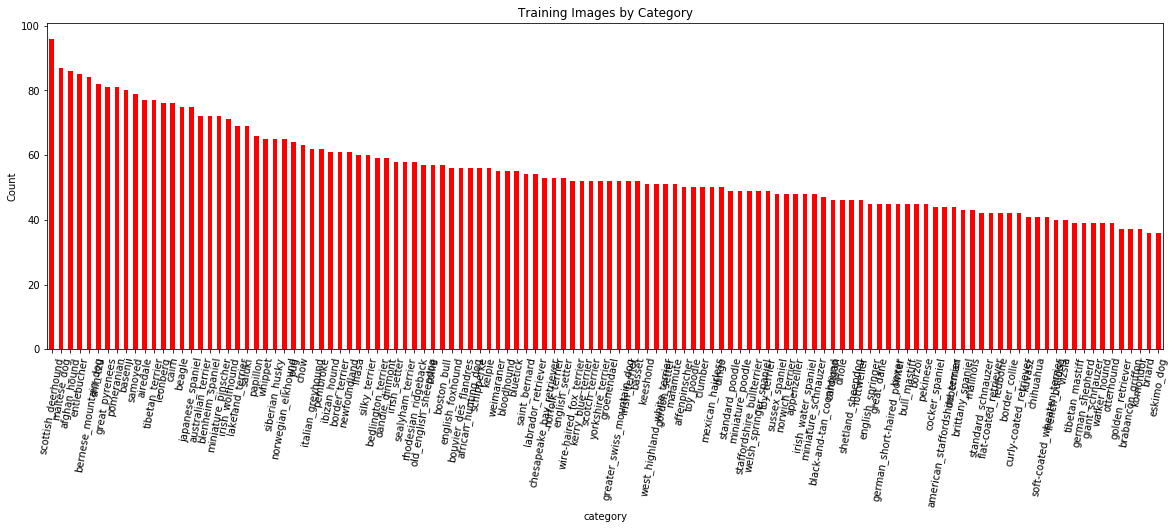

In [36]:
cat_df.set_index('category')['n_train'].plot.bar(
    color='r', figsize=(20, 6))
plt.xticks(rotation=80)
plt.ylabel('Count')
plt.title('Training Images by Category')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Training Images by Category')

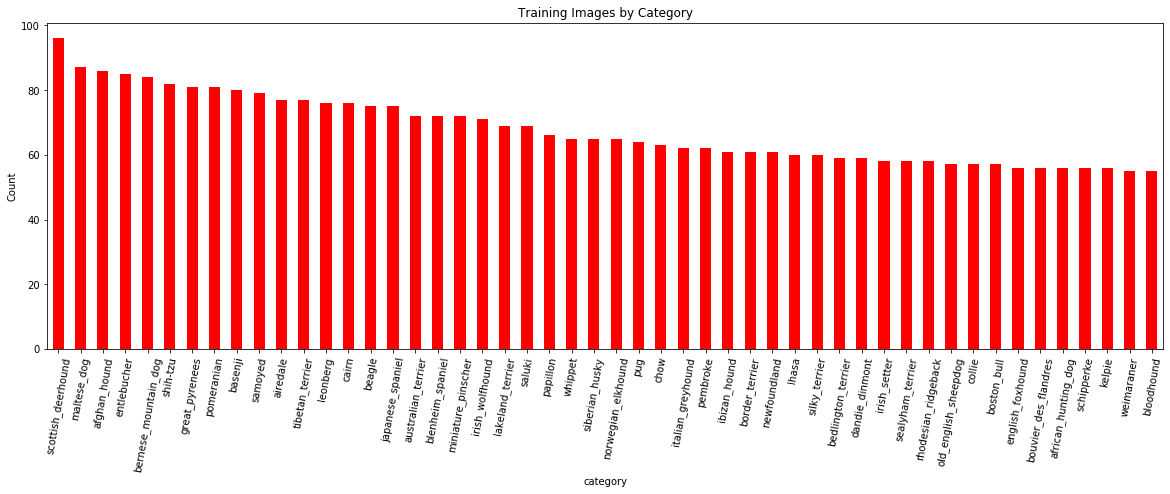

In [37]:
# Only top 50 categories
cat_df.set_index('category').iloc[:50]['n_train'].plot.bar(
    color='r', figsize=(20, 6))
plt.xticks(rotation=80)
plt.ylabel('Count')
plt.title('Training Images by Category')

### Distribution of Images Sizes
The images themselves have vastly different shapes. We can see this by looking at the stats of images sizes by category.

In [38]:
img_dsc = image_df.groupby('category').describe()
img_dsc.head()

height                                         \
                                count        mean         std    min     25%   
category                                                                       
affenpinscher                    50.0  343.720000  149.093320  120.0  232.00   
afghan_hound                     86.0  440.104651   87.594793  225.0  360.00   
african_hunting_dog              56.0  347.321429  120.205446  138.0  302.25   
airedale                         77.0  403.701299   70.255748  242.0  374.00   
american_staffordshire_terrier   44.0  383.977273   77.943775  197.0  333.00   

                                                    width              \
                                  50%    75%    max count        mean   
category                                                                
affenpinscher                   332.5  432.0  894.0  50.0  362.900000   
afghan_hound                    500.0  500.0  794.0  86.0  428.116279   
african_hunting_dog             333.0  375.0  844.0  56.0  464.214286   
airedale                        375.0  500.0  500.0  77.0  448.298701   
american_staffordshire_terrier  375.0  425.0  500.0  44.0  444.613636   

                                                                         \
                                       std    min     25%    50%    75%   
category                                                                  
affenpinscher                   140.819649  103.0  247.25  346.0  500.0   
afghan_hound                     87.551990  193.0  343.00  448.5  500.0   
african_hunting_dog             170.226450  132.0  380.00  500.0  500.0   
airedale                         72.252311  274.0  375.00  500.0  500.0   
american_staffordshire_terrier   86.708605  166.0  375.00  500.0  500.0   

                                        
                                   max  
category                                
affenpinscher                    805.0  
afghan_hound                     800.0  
african_hunting_dog             1280.0  
airedale                         500.0  
american_staffordshire_terrier   500.0

<Figure size 720x432 with 0 Axes>

Text(0.5, 0, 'Pixels')

Text(0, 0.5, 'Density')

Text(0.5, 1.0, 'Average Size Distribution')

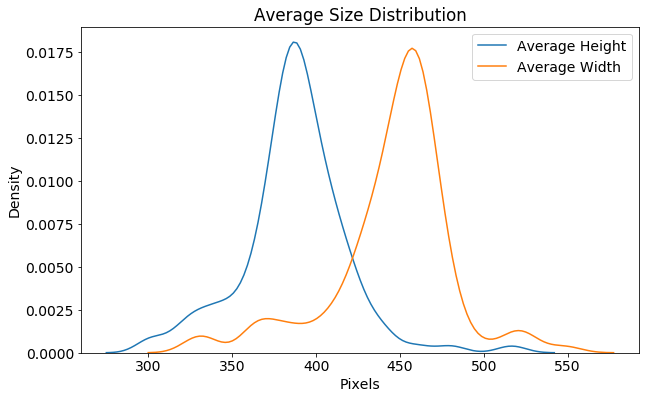

In [41]:
plt.figure(figsize=(10, 6))
sns.kdeplot(
    img_dsc['height']['mean'], label='Average Height')
sns.kdeplot(
    img_dsc['width']['mean'], label='Average Width')
plt.xlabel('Pixels')
plt.ylabel('Density')
plt.title('Average Size Distribution')

(500, 400, 3)

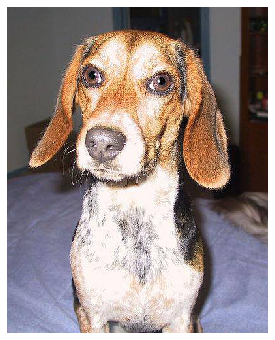

In [42]:
def imshow(image):
    """Display image"""
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Example image
x = Image.open(traindir + 'beagle/4bb8d3ce941405a50a75b1a7b3b831d3.jpg')
np.array(x).shape
imshow(x)

(500, 333, 3)

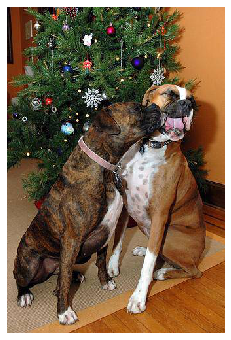

In [43]:
x = Image.open(traindir + 'boxer/1831f3ce615ffe27a78c5baa362ac677.jpg')
np.array(x).shape
imshow(x)

### Image Preprocessing
To prepare the images for our network, we have to resize them to 224 x 224 and normalize each color channel by subtracting a mean value and dividing by a standard deviation. We will also augment our training data in this stage. These operations are done using image transforms, which prepare our data for a neural network.

### Data Augmentation
Because there are a limited number of images in some categories, we can use image augmentation to artificially increase the number of images "seen" by the network. This means for training, we randomly resize and crop the images and also flip them horizontally. A different random transformation is applied each epoch (while training), so the network effectively sees many different versions of the same image. All of the data is also converted to Torch Tensors before normalization. The validation and testing data is not augmented but is only resized and normalized. The normalization values are standardized for Imagenet.

In [44]:
# Image transformations
image_transforms = {
    # Train uses data augmentation
    'train':
    transforms.Compose([
        transforms.RandomResizedCrop(size=256, scale=(0.8, 1.0)),
        transforms.RandomRotation(degrees=15),
        transforms.ColorJitter(),
        transforms.RandomHorizontalFlip(),
        transforms.CenterCrop(size=224),  # Image net standards
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])  # Imagenet standards
    ]),
    # Validation does not use augmentation
    'val':
    transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    # Test does not use augmentation
    'test':
    transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

### Examples of Augmentation
To show how augmentation works, we need to write a function that will plot a tensor as an image.

In [45]:
def imshow_tensor(image, ax=None, title=None):
    """Imshow for Tensor."""

    if ax is None:
        fig, ax = plt.subplots()

    # Set the color channel as the third dimension
    image = image.numpy().transpose((1, 2, 0))

    # Reverse the preprocessing steps
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean

    # Clip the image pixel values
    image = np.clip(image, 0, 1)

    ax.imshow(image)
    plt.axis('off')

    return ax, image

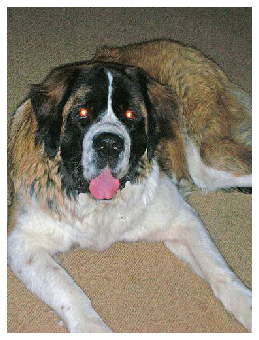

In [46]:
ex_img = Image.open('/home/gabriel/Dropbox/Dataset/dog-breed-identification/train_test_validate/valid/saint_bernard/e562d56214836fc2621f01d53f25c44f.jpg')
imshow(ex_img)

<Figure size 1728x1728 with 0 Axes>

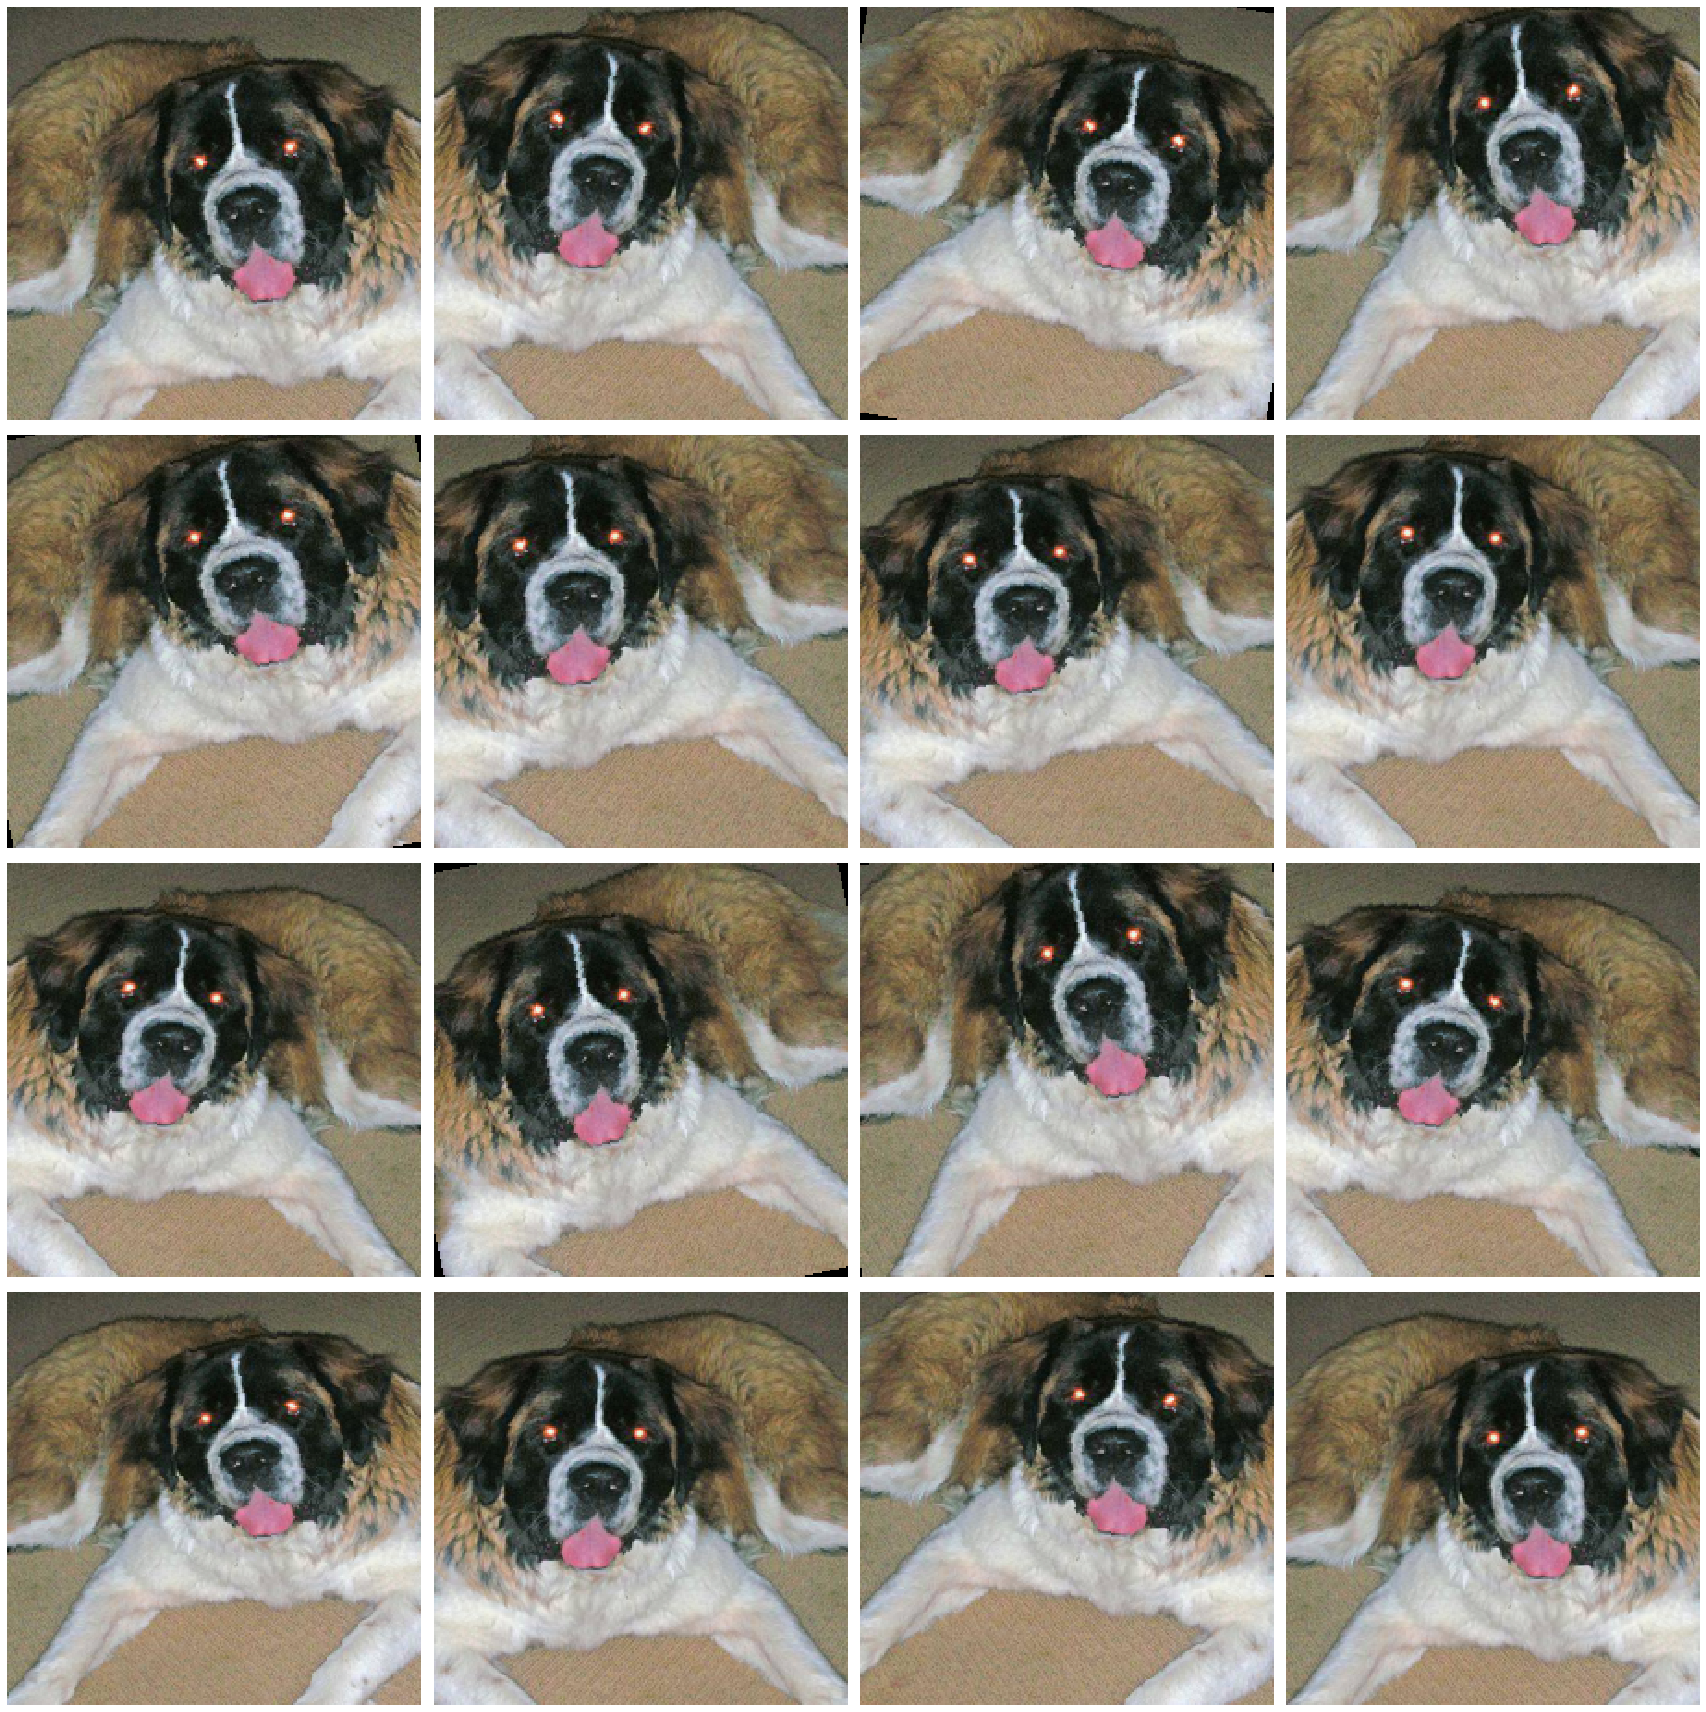

In [47]:
t = image_transforms['train']
plt.figure(figsize=(24, 24))

for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    _ = imshow_tensor(t(ex_img), ax=ax)

plt.tight_layout()

### Data Iterators
To avoid loading all of the data into memory at once, we use training DataLoaders. First, we create a dataset object from the image folders, and then we pass these to a DataLoader. At training time, the DataLoader will load the images from disk, apply the transformations, and yield a batch. To train and validation, we'll iterate through all the batches in the respective DataLoader.<br>
One crucial aspect is to shuffle the data before passing it to the network. This means that the ordering of the image categories changes on each pass through the data (one pass through the data is one training epoch).

In [48]:
# Datasets from each folder
data = {
    'train':
    datasets.ImageFolder(root=traindir, transform=image_transforms['train']),
    'val':
    datasets.ImageFolder(root=validdir, transform=image_transforms['val']),
    'test':
    datasets.ImageFolder(root=testdir, transform=image_transforms['test'])
}

# Dataloader iterators
dataloaders = {
    'train': DataLoader(data['train'], batch_size=batch_size, shuffle=True),
    'val': DataLoader(data['val'], batch_size=batch_size, shuffle=True),
    'test': DataLoader(data['test'], batch_size=batch_size, shuffle=True)
}

In [49]:
trainiter = iter(dataloaders['train'])
features, labels = next(trainiter)
features.shape, labels.shape

(torch.Size([128, 3, 224, 224]), torch.Size([128]))

In [50]:
n_classes = len(cat_df)
print(f'There are {n_classes} different classes.')

len(data['train'].classes)

There are 120 different classes.


120

We can iterate through the DataLoaders when doing training, validation, and testing. This construction avoids the need to load all the data into memory and also will automatically apply the transformations to each batch. On each epoch, the Random transformations will be different so the network will essentially see multiple versions of each training image.

### Pre-Trained Models for Image Classification
PyTorch has many pretrained models we can use. All of these models have been trained on Imagenet which consists of millions of images across 1000 categories. What we want to do with pretrained models is freeze the early layers, and replace the classification module with our own.
### Approach
The approach for using a pre-trained image recognition model is well-established:
1. Load in pre-trained weights from a network trained on a large dataset
2. Freeze all the weights in the lower (convolutional) layers
Layers to freeze can be adjusted depending on similarity of task to large training dataset
3. Replace the classifier (fully connected) part of the network with a custom classifier
Number of outputs must be set equal to the number of classes
4. Train only the custom classifier (fully connected) layers for the task
Optimizer model classifier for smaller dataset

The idea behind pre-training is the early convolutional layers of a cnn extract features that are relevant for many image recognition tasks. The later, fully-connected layers, specialize to the specific dataset by learning higher-level features. Therefore, we can use the already trained convolutional layers while training only the fully-connected layers on our own dataset. Pre-trained networks have proven to be reasonably successful for a variety of tasks, and result in a significant reduction in training time and usually increases in performance.
The models available in PyTorch are listed below with the corresponding number of parameters.

In [53]:
model_options = pd.read_csv('/home/gabriel/Documents/Repos/udacity_nanodegree_secure_and_private_ai_pytorch/final_project/models.csv')
model_options

model     params
0         AlexNet   61100840
1        DenseNet    7978856
2      Inception3   27161264
3      SqueezeNet    1248424
4         alexnet   61100840
5     densenet121    7978856
6     densenet161   28681000
7     densenet169   14149480
8     densenet201   20013928
9    inception_v3   27161264
10      resnet101   44549160
11      resnet152   60192808
12       resnet18   11689512
13       resnet34   21797672
14       resnet50   25557032
15  squeezenet1_0    1248424
16  squeezenet1_1    1235496
17          vgg11  132863336
18       vgg11_bn  132868840
19          vgg13  133047848
20       vgg13_bn  133053736
21          vgg16  138357544
22       vgg16_bn  138365992
23          vgg19  143667240
24       vgg19_bn  143678248

We'll be using the vgg16 although the code also has support for the resnet50. You can modify the code to use a different network quite easily. The VGG networks had very good performance without taking a long time to train.

### Process to Use Pre-Trained Model
We'll illustrate the process by using one model, vgg16.
First off, load in the model with pretrained weights.

In [54]:
model = models.vgg16(pretrained=True)
model

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /home/gabriel/.cache/torch/checkpoints/vgg16-397923af.pth
100.0%


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

The classifier is the part of the model that we'll train. However, for the vgg, we'll only need to train the last few layers in the classifier and not even all of the fully connected layers.

In [55]:
# Freeze early layers
for param in model.parameters():
    param.requires_grad = False

### Add on Custom Classifier
We'll train a classifier consisting of the following layers
Fully connected with ReLU activation (n_inputs, 256)
Dropout with 40% chance of dropping
Fully connected with log softmax output (256, n_classes)
To build our custom classifier, we use the nn.Sequential() module which allows us to specify each layer one after the other. We assign our custom classifier to the final classifier layer in the already trained vgg network. When we add on the extra layers, they are set to require_grad=True by default. These will be the only layers that are trained.

In [56]:
n_inputs = model.classifier[6].in_features

# Add on classifier
model.classifier[6] = nn.Sequential(
    nn.Linear(n_inputs, 256), nn.ReLU(), nn.Dropout(0.4),
    nn.Linear(256, n_classes), nn.LogSoftmax(dim=1))

model.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace)
  (2): Dropout(p=0.5)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace)
  (5): Dropout(p=0.5)
  (6): Sequential(
    (0): Linear(in_features=4096, out_features=256, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.4)
    (3): Linear(in_features=256, out_features=120, bias=True)
    (4): LogSoftmax()
  )
)

In [57]:
total_params = sum(p.numel() for p in model.parameters())
print(f'{total_params:,} total parameters.')
total_trainable_params = sum(
    p.numel() for p in model.parameters() if p.requires_grad)
print(f'{total_trainable_params:,} training parameters.')

135,340,216 total parameters.
1,079,672 training parameters.


Even with only a few layers set to trainable, there are still over a million parameters (weights) that will be updated during training. In effect, we are fine-tuning the model to work on our problem. We already know it works well on Imagenet, and because our images are relatively similar, we should expect the model to easily transfer its knowledge from Imagenet to our dataset.
### Move to GPU
To use a gpu in PyTorch, we simply move the whole model onto the gpu. Later we'll have to move the data to gpus in our training loop.
Since I am using multiple gpus, I also distribute the model across both of them with nn.DataParallel.

In [63]:
multi_gpu = False
if train_on_gpu:
    model = model.to('cuda')

if multi_gpu:
    model = nn.DataParallel(model)

In [65]:
def get_pretrained_model(model_name):
    """Retrieve a pre-trained model from torchvision

    Params
    -------
        model_name (str): name of the model (currently only accepts vgg16 and resnet50)

    Return
    --------
        model (PyTorch model): cnn

    """

    if model_name == 'vgg16':
        model = models.vgg16(pretrained=True)

        # Freeze early layers
        for param in model.parameters():
            param.requires_grad = False
        n_inputs = model.classifier[6].in_features

        # Add on classifier
        model.classifier[6] = nn.Sequential(
            nn.Linear(n_inputs, 256), nn.ReLU(), nn.Dropout(0.2),
            nn.Linear(256, n_classes), nn.LogSoftmax(dim=1))

    elif model_name == 'resnet50':
        model = models.resnet50(pretrained=True)

        for param in model.parameters():
            param.requires_grad = False

        n_inputs = model.fc.in_features
        model.fc = nn.Sequential(
            nn.Linear(n_inputs, 256), nn.ReLU(), nn.Dropout(0.2),
            nn.Linear(256, n_classes), nn.LogSoftmax(dim=1))

    # Move to gpu and parallelize
    if train_on_gpu:
        model = model.to('cuda')

    if multi_gpu:
        model = nn.DataParallel(model)

    return model

In [67]:
model = get_pretrained_model('vgg16')
if multi_gpu:
    summary(
        model.module,
        input_size=(3, 224, 224),
        batch_size=batch_size,
        device='cuda')
else:
    summary(
        model, input_size=(3, 224, 224), batch_size=batch_size, device='cuda')

NameError: name 'summary' is not defined

We can see that the model is quite large and training all of the layers would take a considerable time. Even with only a few layers to train, this can still take a while to train. You might need to decrease the batch_size if this is not fitting on your gpu (hopefully you have one).

In [68]:
if multi_gpu:
    print(model.module.classifier[6])
else:
    print(model.classifier[6])

Sequential(
  (0): Linear(in_features=4096, out_features=256, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.2)
  (3): Linear(in_features=256, out_features=120, bias=True)
  (4): LogSoftmax()
)


### Mapping of Classes to Indexes
To keep track of the predictions made by the model, we create a mapping of classes to indexes and indexes to classes. This will let us know the actual class for a given prediction.

In [69]:
model.class_to_idx = data['train'].class_to_idx
model.idx_to_class = {
    idx: class_
    for class_, idx in model.class_to_idx.items()
}

list(model.idx_to_class.items())[:10]

[(0, 'affenpinscher'),
 (1, 'afghan_hound'),
 (2, 'african_hunting_dog'),
 (3, 'airedale'),
 (4, 'american_staffordshire_terrier'),
 (5, 'appenzeller'),
 (6, 'australian_terrier'),
 (7, 'basenji'),
 (8, 'basset'),
 (9, 'beagle')]

### Training Loss and Optimizer
The loss is the negative log likelihood and the optimizer is the Adam optimizer. The negative log likelihood in PyTorch expects log probabilities so we need to pass it the raw output from the log softmax in our model's final layer. The optimizer is told to optimizer the model parameters (only a few of which require a gradient).
* Loss (criterion): keeps track of the loss itself and the gradients of the loss with respect to the model parameters (weights)
* Optimizer: updates the parameters (weights) with the gradients

In [70]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters())

Below we can look at the parameters (weights) that will be updated by the optimizer during training.


In [71]:
for p in optimizer.param_groups[0]['params']:
    if p.requires_grad:
        print(p.shape)

torch.Size([256, 4096])
torch.Size([256])
torch.Size([120, 256])
torch.Size([120])


## Training
For training, we iterate through the train DataLoader, each time passing one batch through the model. One complete pass through the training data is known as an epoch, and we train for a set number of epochs or until early stopping kicks in (more below). After each batch, we calculate the loss (with criterion(output, targets)) and then calculate the gradients of the loss with respect to the model parameters with loss.backward(). This uses autodifferentiation and backpropagation to calculate the gradients.
After calculating the gradients, we call optimizer.step() to update the model parameters with the gradients. This is done on every training batch so we are implementing stochastic gradient descent (or rather a version of it with momentum known as Adam). For each batch, we also compute the accuracy for monitoring and after the training loop has completed, we start the validation loop. This will be used to carry out early stopping.
### Early Stopping
Early stopping halts the training when the validation loss has not decreased for a number of epochs. Each time the validation loss does decrease, the model weights are saved so we can later load in the best model. Early stopping is an effective method to prevent overfitting on the training data. If we continue training, the training loss will continue to decrease, but the validation loss will increase because the model is starting to memorize the training data. Early stopping prevents this from happening, and, if we save the model each epoch when the validation loss decreases, we are able to retrieve the model that does best on the validation data.
Early stopping is implemented by iterating through the validation data at the end of each training epoch and calculating the loss. We use the complete validation data every time and record whether or not the loss has decreased. If it has not for a number of epochs, we stop training, retrieve the best weights, and return them. When in the validation loop, we make sure not to update the model parameters.
### Training Function
The below function trains the network while monitoring a number of different parameters. We train with early stopping on the validation set. There are a number of parameters that I've tried to explain in the doc string. Hopefully, the comments and background make things somewhat understandable!

In [73]:
def train(model,
          criterion,
          optimizer,
          train_loader,
          valid_loader,
          save_file_name,
          max_epochs_stop=3,
          n_epochs=20,
          print_every=2):
    """Train a PyTorch Model

    Params
    --------
        model (PyTorch model): cnn to train
        criterion (PyTorch loss): objective to minimize
        optimizer (PyTorch optimizier): optimizer to compute gradients of model parameters
        train_loader (PyTorch dataloader): training dataloader to iterate through
        valid_loader (PyTorch dataloader): validation dataloader used for early stopping
        save_file_name (str ending in '.pt'): file path to save the model state dict
        max_epochs_stop (int): maximum number of epochs with no improvement in validation loss for early stopping
        n_epochs (int): maximum number of training epochs
        print_every (int): frequency of epochs to print training stats

    Returns
    --------
        model (PyTorch model): trained cnn with best weights
        history (DataFrame): history of train and validation loss and accuracy
    """

    # Early stopping intialization
    epochs_no_improve = 0
    valid_loss_min = np.Inf

    valid_max_acc = 0
    history = []

    # Number of epochs already trained (if using loaded in model weights)
    try:
        print(f'Model has been trained for: {model.epochs} epochs.\n')
    except:
        model.epochs = 0
        print(f'Starting Training from Scratch.\n')

    overall_start = timer()

    # Main loop
    for epoch in range(n_epochs):

        # keep track of training and validation loss each epoch
        train_loss = 0.0
        valid_loss = 0.0

        train_acc = 0
        valid_acc = 0

        # Set to training
        model.train()
        start = timer()

        # Training loop
        for ii, (data, target) in enumerate(train_loader):
            # Tensors to gpu
            if train_on_gpu:
                data, target = data.cuda(), target.cuda()

            # Clear gradients
            optimizer.zero_grad()
            # Predicted outputs are log probabilities
            output = model(data)

            # Loss and backpropagation of gradients
            loss = criterion(output, target)
            loss.backward()

            # Update the parameters
            optimizer.step()

            # Track train loss by multiplying average loss by number of examples in batch
            train_loss += loss.item() * data.size(0)

            # Calculate accuracy by finding max log probability
            _, pred = torch.max(output, dim=1)
            correct_tensor = pred.eq(target.data.view_as(pred))
            # Need to convert correct tensor from int to float to average
            accuracy = torch.mean(correct_tensor.type(torch.FloatTensor))
            # Multiply average accuracy times the number of examples in batch
            train_acc += accuracy.item() * data.size(0)

            # Track training progress
            print(
                f'Epoch: {epoch}\t{100 * (ii + 1) / len(train_loader):.2f}% complete. {timer() - start:.2f} seconds elapsed in epoch.',
                end='\r')

        # After training loops ends, start validation
        else:
            model.epochs += 1

            # Don't need to keep track of gradients
            with torch.no_grad():
                # Set to evaluation mode
                model.eval()

                # Validation loop
                for data, target in valid_loader:
                    # Tensors to gpu
                    if train_on_gpu:
                        data, target = data.cuda(), target.cuda()

                    # Forward pass
                    output = model(data)

                    # Validation loss
                    loss = criterion(output, target)
                    # Multiply average loss times the number of examples in batch
                    valid_loss += loss.item() * data.size(0)

                    # Calculate validation accuracy
                    _, pred = torch.max(output, dim=1)
                    correct_tensor = pred.eq(target.data.view_as(pred))
                    accuracy = torch.mean(
                        correct_tensor.type(torch.FloatTensor))
                    # Multiply average accuracy times the number of examples
                    valid_acc += accuracy.item() * data.size(0)

                # Calculate average losses
                train_loss = train_loss / len(train_loader.dataset)
                valid_loss = valid_loss / len(valid_loader.dataset)

                # Calculate average accuracy
                train_acc = train_acc / len(train_loader.dataset)
                valid_acc = valid_acc / len(valid_loader.dataset)

                history.append([train_loss, valid_loss, train_acc, valid_acc])

                # Print training and validation results
                if (epoch + 1) % print_every == 0:
                    print(
                        f'\nEpoch: {epoch} \tTraining Loss: {train_loss:.4f} \tValidation Loss: {valid_loss:.4f}'
                    )
                    print(
                        f'\t\tTraining Accuracy: {100 * train_acc:.2f}%\t Validation Accuracy: {100 * valid_acc:.2f}%'
                    )

                # Save the model if validation loss decreases
                if valid_loss < valid_loss_min:
                    # Save model
                    torch.save(model.state_dict(), save_file_name)
                    # Track improvement
                    epochs_no_improve = 0
                    valid_loss_min = valid_loss
                    valid_best_acc = valid_acc
                    best_epoch = epoch

                # Otherwise increment count of epochs with no improvement
                else:
                    epochs_no_improve += 1
                    # Trigger early stopping
                    if epochs_no_improve >= max_epochs_stop:
                        print(
                            f'\nEarly Stopping! Total epochs: {epoch}. Best epoch: {best_epoch} with loss: {valid_loss_min:.2f} and acc: {100 * valid_acc:.2f}%'
                        )
                        total_time = timer() - overall_start
                        print(
                            f'{total_time:.2f} total seconds elapsed. {total_time / (epoch+1):.2f} seconds per epoch.'
                        )

                        # Load the best state dict
                        model.load_state_dict(torch.load(save_file_name))
                        # Attach the optimizer
                        model.optimizer = optimizer

                        # Format history
                        history = pd.DataFrame(
                            history,
                            columns=[
                                'train_loss', 'valid_loss', 'train_acc',
                                'valid_acc'
                            ])
                        return model, history

    # Attach the optimizer
    model.optimizer = optimizer
    # Record overall time and print out stats
    total_time = timer() - overall_start
    print(
        f'\nBest epoch: {best_epoch} with loss: {valid_loss_min:.2f} and acc: {100 * valid_acc:.2f}%'
    )
    print(
        f'{total_time:.2f} total seconds elapsed. {total_time / (epoch):.2f} seconds per epoch.'
    )
    # Format history
    history = pd.DataFrame(
        history,
        columns=['train_loss', 'valid_loss', 'train_acc', 'valid_acc'])
    return model, history

In [74]:
model, history = train(
    model,
    criterion,
    optimizer,
    dataloaders['train'],
    dataloaders['val'],
    save_file_name=save_file_name,
    max_epochs_stop=5,
    n_epochs=1,
    print_every=2)

Starting Training from Scratch.



KeyboardInterrupt: 

## Training Results
We can inspect the training progress by looking at the history.

In [ ]:
plt.figure(figsize=(8, 6))
for c in ['train_loss', 'valid_loss']:
    plt.plot(
        history[c], label=c)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Average Negative Log Likelihood')
plt.title('Training and Validation Losses')

In [ ]:
plt.figure(figsize=(8, 6))
for c in ['train_acc', 'valid_acc']:
    plt.plot(
        100 * history[c], label=c)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Average Accuracy')
plt.title('Training and Validation Accuracy')

### Saving Model
The train function saves the best model state_dict() which are the weights of the model. To save more information about the model, we use the below function.

In [ ]:
def save_checkpoint(model, path):
    """Save a PyTorch model checkpoint

    Params
    --------
        model (PyTorch model): model to save
        path (str): location to save model. Must start with `model_name-` and end in '.pth'

    Returns
    --------
        None, save the `model` to `path`

    """

    model_name = path.split('-')[0]
    assert (model_name in ['vgg16', 'resnet50'
                           ]), "Path must have the correct model name"

    # Basic details
    checkpoint = {
        'class_to_idx': model.class_to_idx,
        'idx_to_class': model.idx_to_class,
        'epochs': model.epochs,
    }

    # Extract the final classifier and the state dictionary
    if model_name == 'vgg16':
        # Check to see if model was parallelized
        if multi_gpu:
            checkpoint['classifier'] = model.module.classifier
            checkpoint['state_dict'] = model.module.state_dict()
        else:
            checkpoint['classifier'] = model.classifier
            checkpoint['state_dict'] = model.state_dict()

    elif model_name == 'resnet50':
        if multi_gpu:
            checkpoint['fc'] = model.module.fc
            checkpoint['state_dict'] = model.module.state_dict()
        else:
            checkpoint['fc'] = model.fc
            checkpoint['state_dict'] = model.state_dict()

    # Add the optimizer
    checkpoint['optimizer'] = model.optimizer
    checkpoint['optimizer_state_dict'] = model.optimizer.state_dict()

    # Save the data to the path
    torch.save(checkpoint, path)

In [ ]:
save_checkpoint(model, path=checkpoint_path)

### Load in a Checkpoint
Now we need to write the function to load in the checkpoint. This just takes in a path and returns a model from a saved checkpoint.

In [75]:
def load_checkpoint(path):
    """Load a PyTorch model checkpoint

    Params
    --------
        path (str): saved model checkpoint. Must start with `model_name-` and end in '.pth'

    Returns
    --------
        None, save the `model` to `path`

    """

    # Get the model name
    model_name = path.split('-')[0]
    assert (model_name in ['vgg16', 'resnet50'
                           ]), "Path must have the correct model name"

    # Load in checkpoint
    checkpoint = torch.load(path)

    if model_name == 'vgg16':
        model = models.vgg16(pretrained=True)
        # Make sure to set parameters as not trainable
        for param in model.parameters():
            param.requires_grad = False
        model.classifier = checkpoint['classifier']

    elif model_name == 'resnet50':
        model = models.resnet50(pretrained=True)
        # Make sure to set parameters as not trainable
        for param in model.parameters():
            param.requires_grad = False
        model.fc = checkpoint['fc']

    # Load in the state dict
    model.load_state_dict(checkpoint['state_dict'])

    total_params = sum(p.numel() for p in model.parameters())
    print(f'{total_params:,} total parameters.')
    total_trainable_params = sum(
        p.numel() for p in model.parameters() if p.requires_grad)
    print(f'{total_trainable_params:,} total gradient parameters.')

    # Move to gpu
    if multi_gpu:
        model = nn.DataParallel(model)

    if train_on_gpu:
        model = model.to('cuda')

    # Model basics
    model.class_to_idx = checkpoint['class_to_idx']
    model.idx_to_class = checkpoint['idx_to_class']
    model.epochs = checkpoint['epochs']

    # Optimizer
    optimizer = checkpoint['optimizer']
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

    return model, optimizer

In [ ]:
model, optimizer = load_checkpoint(path=checkpoint_path)

if multi_gpu:
    summary(model.module, input_size=(3, 224, 224), batch_size=batch_size)
else:
    summary(model, input_size=(3, 224, 224), batch_size=batch_size)

We can now use these two functions to save and load in a complete model. We can use this model to continue training.

In [ ]:
model, history = train(
    model,
    criterion,
    optimizer,
    dataloaders['train'],
    dataloaders['val'],
    save_file_name=save_file_name,
    max_epochs_stop=5,
    n_epochs=30,
    print_every=2)
